In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
%matplotlib inline
import io 
from numpy import array
from numpy import hstack
from statsmodels.tools.eval_measures import mse,rmse,meanabs
import statsmodels.api as sm
import matplotlib.pyplot as plt
import datetime
#from tsmoothie.utils_func import sim_randomwalk
#from tsmoothie.smoother import *
import seaborn as sns
#import mpl_scatter_density # adds projection='scatter_density'
from matplotlib.colors import LinearSegmentedColormap
import optuna
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import graphviz
import optuna
from optuna.integration import KerasPruningCallback
import sklearn
from sklearn.model_selection import KFold
from sklearn.model_selection import TimeSeriesSplit
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.layers.convolutional import MaxPooling1D
import tensorflow as tf
from keras.layers import BatchNormalization
import keras.backend as K
from keras.models import Model
from tensorflow.keras import regularizers
import keras.backend as K
from keras.models import Model
from tensorflow.keras import regularizers
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
import os
from matplotlib import pyplot
from keras.models import load_model
from tensorflow.keras import initializers

In [ ]:
# pip install optuna 

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# df1=pd.read_csv('gdrive/My Drive/Colab Notebooks/Industrial/Mannix_Corrected.csv',index_col='Date',parse_dates=True,na_values = ['NaN'],dayfirst=True)
df1=pd.read_csv('gdrive/My Drive/Colab Notebooks/Industrial/Mannix_Corrected_outlier.csv',index_col='Date',parse_dates=True,na_values = ['NaN'],dayfirst=True)

In [ ]:
# df = pd.concat([df1,df2])
# df.index

In [ ]:
df1.columns

Index(['SO2 (ppb)', 'T ( C) 45m', 'RH (%) 45m', 'Std. Dev. of Wind Direction',
       'Std. Dev. of Wind Speed', 'Wind Direction', 'Wind Speed',
       'Incoming Solar Rad. (W/m2)', 'Precip. (mm)', 'hol', 'hour',
       'dayofweek_num', 'Day-year', 'trend', 'score'],
      dtype='object')

In [ ]:
def wind (df, radius):
  dff = df.copy()
  a = 'sin'
  b =  'cos'
  dff[a]=np.sin(dff[radius]*np.pi/180)
  dff[b]=np.cos(dff[radius]*np.pi/180)
  #dff[a] = dff[a] * dff[speed]
  #dff[b] = dff[b] * dff[speed]
  # dff.drop(columns=[radius],inplace = True)
  return dff


def lag_maker(df,column, num):
    for i in  range(num):
        df[column+ '-lag' + str(i+1)] = df[column].shift(i+1)
        df[column+ '-lag' + str(i+1)] = df[column+ '-lag' + str(i+1)]

def lag(df_reg, num):
    for i in c:
        lag_maker(df_reg,i,num)
        
    df_reg = df_reg.iloc[num:]
    return df_reg        




# df2 = lag(df1,1)
df1_w = wind(df1,'Wind Direction')

In [ ]:
df1_w.columns

Index(['SO2 (ppb)', 'T ( C) 45m', 'RH (%) 45m', 'Std. Dev. of Wind Direction',
       'Std. Dev. of Wind Speed', 'Wind Direction', 'Wind Speed',
       'Incoming Solar Rad. (W/m2)', 'Precip. (mm)', 'hol', 'hour',
       'dayofweek_num', 'Day-year', 'trend', 'score', 'sin', 'cos'],
      dtype='object')

In [ ]:
df1_w= df1_w[[ 'SO2 (ppb)', 'T ( C) 45m', 'RH (%) 45m', 'Std. Dev. of Wind Direction',
       'Std. Dev. of Wind Speed', 'Wind Direction', 'Wind Speed',
       'Incoming Solar Rad. (W/m2)', 'Precip. (mm)', 'hol', 'hour',
       'dayofweek_num', 'Day-year', 'trend', 'score'
       ]]


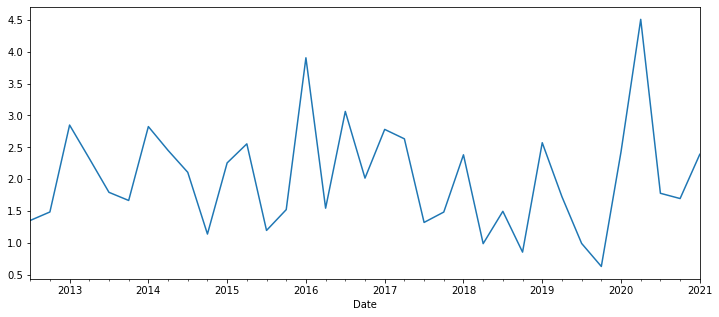

In [ ]:
df1_w['SO2 (ppb)'].resample('Q').mean().plot(figsize = (12,5))

In [ ]:
avg = df1_w['score'].mean()
std = df1_w['score'].std()

In [ ]:
avg + 2 * std

16.028985252747308

In [ ]:
print(len(df1_w[df1_w['score']>avg + 5*std])/len(df1_w)* 100, '%')

0.6503952295104701 %


In [ ]:
df1_w

SO2 (ppb)  T ( C) 45m  ...      trend     score
Date                                        ...                     
2012-09-01 00:00:00        0.0        14.7  ...  12.666667  1.576923
2012-09-01 01:00:00        0.5        13.5  ...  12.666781  2.541667
2012-09-01 02:00:00        1.0        12.8  ...  12.666894  2.341965
2012-09-01 03:00:00        1.0        12.9  ...  12.667008  2.842395
2012-09-01 04:00:00        1.0        12.7  ...  12.667122  4.242857
...                        ...         ...  ...        ...       ...
2021-03-31 19:00:00        0.0         8.7  ...  21.245332  4.000000
2021-03-31 20:00:00        0.0         7.4  ...  21.245446  2.083333
2021-03-31 21:00:00        0.0         6.4  ...  21.245560  2.222009
2021-03-31 22:00:00        0.0         6.2  ...  21.245674  1.920395
2021-03-31 23:00:00        0.0         5.2  ...  21.245788  3.770833

[72110 rows x 15 columns]

In [ ]:
df1_w.isna().sum()

SO2 (ppb)                      0
T ( C) 45m                     0
RH (%) 45m                     0
Std. Dev. of Wind Direction    0
Std. Dev. of Wind Speed        0
Wind Direction                 0
Wind Speed                     0
Incoming Solar Rad. (W/m2)     0
Precip. (mm)                   0
hol                            0
hour                           0
dayofweek_num                  0
Day-year                       0
trend                          0
score                          0
dtype: int64

In [ ]:
df1_w_c = df1_w[['SO2 (ppb)', 'T ( C) 45m', 'RH (%) 45m', 'Std. Dev. of Wind Direction',
       'Std. Dev. of Wind Speed', 'Wind Direction', 'Wind Speed',
       'Incoming Solar Rad. (W/m2)', 'Precip. (mm)', 'hol', 'hour',
       'dayofweek_num', 'Day-year', 'trend'
       ]].copy()
df1_w_c.dropna(inplace = True)
Y = df1_w_c['SO2 (ppb)']
Y = np.array(Y).reshape(-1,1)
X = np.array(df1_w_c[df1_w_c.columns[1:]])

maximum_epochs = 250
early_stop_epochs= 60
learning_rate_epochs = 30
optimizer_direction = 'minimize'
number_of_random_points = 30  # random searches to start opt process
maximum_time = 8*60*60  # seconds

In [ ]:
def objectivee(trial):    
        #  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.01, random_state = 42)
        # df2 = df1_w[df1_w['score'] >avg  ]
        # Y = df2['SO2 (ppb)']
        # Y = np.array(Y).reshape(-1,1)
        # X = np.array(df2[df2.columns[1:]])
        param = {
        "objective": "reg:squarederror",
        "eval_metric": "rmse",
        "booster": trial.suggest_categorical("booster", ["gbtree"]), #",,""gblinear" , "dart"
        "lambda": trial.suggest_loguniform("lambda", 0.1, 1000000.0),
        "alpha": trial.suggest_loguniform("alpha", 0.1, 1000000.0),
          'score' : trial.suggest_float( 'score', avg + 2 * std, avg + 5 * std )
        }
        # if param["booster"] == "gbtree" :
        #     param["n_estimators"] =  trial.suggest_int("n_estimators" , 1, 10000)


        if param["booster"] == "gbtree" or param["booster"] == "dart":
            param["max_depth"] = trial.suggest_int("max_depth", 1, 10)
            param["eta"] = trial.suggest_loguniform("eta", 0.1, 100000.0)
            param["gamma"] = trial.suggest_loguniform("gamma", 0.1, 100000.0)
            param["grow_policy"] = tria guniform("rate_drop", 1e-3, 1.0)
            param["skip_drop"] = trial.suggest_loguniform("skip_drop", 1e-3, 1.0)
        
        df_xg =  df1_w[df1_w['score'] < param["score"]].copy()
        df_xg.drop(columns = ['score'], inplace = True)
        Y =  df_xg['SO2 (ppb)']
        Y = np.array(Y).reshape(-1,1)
        X = np.array( df_xg[ df_xg.columns[1:]])
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.000000001, random_state = 42)

        kf = KFold(n_splits=5)
        acc = 0 
        for train_index, test_index in kf.split(X_train):   
                X_tr, X_tes = X_train[train_index], X_train[test_index]
                y_tr, y_tes =  y_train[train_index],  y_train[test_index]    
                # fit the model
                X_tra, X_val, y_tra, y_val = train_test_split(X_tr, y_tr, test_size=0.2, random_state = 42)
    
                dtrain = xgb.DMatrix(X_tra, label=y_tra)
                dval = xgb.DMatrix(X_val, label=y_val)
                dtest = xgb.DMatrix(X_tes, label=y_tes)
                
                pruning_callback = optuna.integration.XGBoostPruningCallback(trial, "validation-rmse")
                bst = xgb.train(param, dtrain, evals=[(dval, "validation")],  early_stopping_rounds=30,
                                callbacks=[pruning_callback],
                               # verbose_eval = False
                               )
                preds = bst.predict(dtest)
                accuracy = mean_squared_error(y_tes, preds)
                acc = acc + accuracy/5
                
        print(acc)
        return acc    

study2 = optuna.create_study()
study2.optimize(objectivee, n_trials=10000)
print(study2.best_trial)

[I 2021-05-11 18:00:32,706] A new study created in memory with name: no-name-8a0660e1-ebc3-4272-b2fa-e2cefd3f8d40


[0]	validation-rmse:5.22049
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.10915
[2]	validation-rmse:5.06281
[3]	validation-rmse:5.03388
[4]	validation-rmse:5.00766
[5]	validation-rmse:4.99192
[6]	validation-rmse:4.99195
[7]	validation-rmse:4.99194
[8]	validation-rmse:4.99194
[9]	validation-rmse:4.99194
[0]	validation-rmse:4.98823
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.8898
[2]	validation-rmse:4.84274
[3]	validation-rmse:4.8384
[4]	validation-rmse:4.8133
[5]	validation-rmse:4.76761
[6]	validation-rmse:4.72538
[7]	validation-rmse:4.72534
[8]	validation-rmse:4.72534
[9]	validation-rmse:4.72534
[0]	validation-rmse:4.86633
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.76496
[2]	validation-rmse:4.75416
[3]	validation-rmse:4.69178
[4]	validation-rmse:4.67235
[5]	validation-rmse:4.65833
[6]	validation-rmse:4.65827
[7]	validation-rmse:4.65823
[8]	validation-rmse:4.65824
[9

[I 2021-05-11 18:00:34,280] Trial 0 finished with value: 22.54710746399199 and parameters: {'booster': 'gbtree', 'lambda': 612.4092542979467, 'alpha': 6.152110031450578, 'score': 16.9677288827032, 'max_depth': 3, 'eta': 1.3487496593341428, 'gamma': 1647.2387890165207, 'grow_policy': 'depthwise'}. Best is trial 0 with value: 22.54710746399199.


22.54710746399199
[0]	validation-rmse:3737.87
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.32726e+06
[2]	validation-rmse:3.03458e+09
[3]	validation-rmse:2.82389e+12
[4]	validation-rmse:2.6366e+15
[5]	validation-rmse:inf
[6]	validation-rmse:inf
[7]	validation-rmse:inf
[8]	validation-rmse:inf
[9]	validation-rmse:inf
[0]	validation-rmse:3808.53
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.45991e+06
[2]	validation-rmse:3.20377e+09
[3]	validation-rmse:2.99053e+12
[4]	validation-rmse:2.81866e+15
[5]	validation-rmse:inf
[6]	validation-rmse:inf
[7]	validation-rmse:inf
[8]	validation-rmse:inf
[9]	validation-rmse:inf
[0]	validation-rmse:3781.93
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.54961e+06
[2]	validation-rmse:3.17651e+09
[3]	validation-rmse:2.97694e+12
[4]	validation-rmse:2.81139e+15
[5]	validation-rmse:inf
[6]	validation-rmse:inf
[7]	validation-rmse:inf
[8]	validation

[I 2021-05-11 18:00:37,029] Trial 1 finished with value: 7.3100277510128e+59 and parameters: {'booster': 'gbtree', 'lambda': 0.9734735691892366, 'alpha': 0.7028177908471819, 'score': 29.68114036786698, 'max_depth': 8, 'eta': 964.0881469377392, 'gamma': 89.42415499727487, 'grow_policy': 'lossguide'}. Best is trial 0 with value: 22.54710746399199.


[0]	validation-rmse:5.27009
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.22696
[2]	validation-rmse:5.18922
[3]	validation-rmse:5.1694
[4]	validation-rmse:5.14097
[5]	validation-rmse:5.13218
[6]	validation-rmse:5.10332
[7]	validation-rmse:5.10186
[8]	validation-rmse:5.09284
[9]	validation-rmse:5.07829
[0]	validation-rmse:5.09521
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.02636
[2]	validation-rmse:4.99519
[3]	validation-rmse:4.97695
[4]	validation-rmse:4.95695
[5]	validation-rmse:4.94925
[6]	validation-rmse:4.91926
[7]	validation-rmse:4.91735
[8]	validation-rmse:4.91353
[9]	validation-rmse:4.89281
[0]	validation-rmse:4.99545
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.95784
[2]	validation-rmse:4.91398
[3]	validation-rmse:4.88948
[4]	validation-rmse:4.88381
[5]	validation-rmse:4.85863
[6]	validation-rmse:4.84413
[7]	validation-rmse:4.80693
[8]	validation-rmse:4.78522


[I 2021-05-11 18:00:39,399] Trial 2 finished with value: 22.529520427644883 and parameters: {'booster': 'gbtree', 'lambda': 4.061837285060314, 'alpha': 1071.9270837982722, 'score': 18.960973121932156, 'max_depth': 5, 'eta': 1.2398119415916173, 'gamma': 0.311219869699289, 'grow_policy': 'depthwise'}. Best is trial 2 with value: 22.529520427644883.


22.529520427644883
[0]	validation-rmse:274.477
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:66191.7
[2]	validation-rmse:1.59987e+07
[3]	validation-rmse:3.86696e+09
[4]	validation-rmse:9.3466e+11
[5]	validation-rmse:2.25911e+14
[6]	validation-rmse:5.46036e+16
[7]	validation-rmse:inf
[8]	validation-rmse:inf
[9]	validation-rmse:inf
[0]	validation-rmse:273.233
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:65917.9
[2]	validation-rmse:1.5936e+07
[3]	validation-rmse:3.85261e+09
[4]	validation-rmse:9.31392e+11
[5]	validation-rmse:2.25169e+14
[6]	validation-rmse:5.4436e+16
[7]	validation-rmse:inf
[8]	validation-rmse:inf
[9]	validation-rmse:inf
[0]	validation-rmse:276.749
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:66740.1
[2]	validation-rmse:1.61284e+07
[3]	validation-rmse:3.89761e+09
[4]	validation-rmse:9.41902e+11
[5]	validation-rmse:2.27621e+14
[6]	validation-rmse:5.50072e+16
[7]

[I 2021-05-11 18:00:41,834] Trial 3 finished with value: 4.8260359581240116e+47 and parameters: {'booster': 'gbtree', 'lambda': 536.4213120858285, 'alpha': 16095.163690936675, 'score': 22.582238949834554, 'max_depth': 8, 'eta': 246.1943433755079, 'gamma': 3.911581633921998, 'grow_policy': 'lossguide'}. Best is trial 2 with value: 22.529520427644883.


4.8260359581240116e+47
[0]	validation-rmse:5.78718
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.68754
[2]	validation-rmse:5.6024
[3]	validation-rmse:5.52849
[4]	validation-rmse:5.46404
[5]	validation-rmse:5.40998
[6]	validation-rmse:5.36164
[7]	validation-rmse:5.31764
[8]	validation-rmse:5.27672
[9]	validation-rmse:5.24348
[0]	validation-rmse:5.70031
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.6033
[2]	validation-rmse:5.52031
[3]	validation-rmse:5.4471
[4]	validation-rmse:5.38604
[5]	validation-rmse:5.3281
[6]	validation-rmse:5.2793
[7]	validation-rmse:5.23821
[8]	validation-rmse:5.19921
[9]	validation-rmse:5.1635
[0]	validation-rmse:6.03861
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.94052
[2]	validation-rmse:5.85621
[3]	validation-rmse:5.78143
[4]	validation-rmse:5.71546
[5]	validation-rmse:5.65751
[6]	validation-rmse:5.60675
[7]	validation-rmse:5.56133
[8]	valida

[I 2021-05-11 18:00:47,388] Trial 4 finished with value: 28.035146251598462 and parameters: {'booster': 'gbtree', 'lambda': 1304.1442093388694, 'alpha': 0.6119148076706531, 'score': 24.496182172164133, 'max_depth': 10, 'eta': 0.12593283435437488, 'gamma': 36.263748660389005, 'grow_policy': 'lossguide'}. Best is trial 2 with value: 22.529520427644883.


28.035146251598462


[I 2021-05-11 18:00:47,488] Trial 5 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.71378
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.61633
[2]	validation-rmse:5.57687
[3]	validation-rmse:5.51225


[I 2021-05-11 18:00:47,647] Trial 6 pruned. Trial was pruned at iteration 4.


[0]	validation-rmse:5.64051
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.47831
[2]	validation-rmse:5.43377
[3]	validation-rmse:5.3854
[4]	validation-rmse:5.35843
[5]	validation-rmse:5.31675
[6]	validation-rmse:5.30569
[7]	validation-rmse:5.27907
[8]	validation-rmse:5.2648
[9]	validation-rmse:5.23536
[0]	validation-rmse:5.50526
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.35438
[2]	validation-rmse:5.30234
[3]	validation-rmse:5.28379
[4]	validation-rmse:5.26237
[5]	validation-rmse:5.26278
[6]	validation-rmse:5.24835
[7]	validation-rmse:5.23604
[8]	validation-rmse:5.21529
[9]	validation-rmse:5.19688
[0]	validation-rmse:5.51493
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.36301
[2]	validation-rmse:5.30698
[3]	validation-rmse:5.27316
[4]	validation-rmse:5.25157
[5]	validation-rmse:5.23918
[6]	validation-rmse:5.23967
[7]	validation-rmse:5.22147
[8]	validation-rmse:5.24523
[

[I 2021-05-11 18:00:49,272] Trial 7 finished with value: 25.14729400072314 and parameters: {'booster': 'gbtree', 'lambda': 0.14773649661967378, 'alpha': 9.844347205793104, 'score': 28.739304866232576, 'max_depth': 3, 'eta': 0.8363918458031794, 'gamma': 0.45819175469767887, 'grow_policy': 'depthwise'}. Best is trial 2 with value: 22.529520427644883.
[I 2021-05-11 18:00:49,452] Trial 8 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:00:49,566] Trial 9 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:00:49,692] Trial 10 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:00:49,829] Trial 11 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:00:49,971] Trial 12 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:00:50,095] Trial 13 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.24249
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.78922
[2]	validation-rmse:4.85429
[3]	validation-rmse:4.56341
[4]	validation-rmse:4.64309
[5]	validation-rmse:4.60223
[6]	validation-rmse:4.71853
[7]	validation-rmse:4.72349
[8]	validation-rmse:4.95263
[9]	validation-rmse:5.1311
[0]	validation-rmse:5.88248
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.82356
[2]	validation-rmse:5.63802
[3]	validation-rmse:5.53727
[4]	validation-rmse:5.50542
[5]	validation-rmse:5.44746
[6]	validation-rmse:5.42268
[7]	validation-rmse:5.4084
[8]	validation-rmse:5.39441
[9]	validation-rmse:5.38603
[0]	validation-rmse:5.56848
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.3517
[2]	validation-rmse:5.23384
[3]	validation-rmse:5.08989
[4]	validation-rmse:5.073
[5]	validation-rmse:5.04589
[6]	validation-rmse:4.98654
[7]	validation-rmse:4.92918
[8]	validation-rmse:4.92593
[9]	

[I 2021-05-11 18:00:52,404] Trial 14 finished with value: 29.699722536717985 and parameters: {'booster': 'gbtree', 'lambda': 68.13952298726029, 'alpha': 6633.171883011981, 'score': 16.036798364198763, 'max_depth': 6, 'eta': 2.6708223090006054, 'gamma': 625.624466234244, 'grow_policy': 'depthwise'}. Best is trial 2 with value: 22.529520427644883.


29.699722536717985
[0]	validation-rmse:5.56791
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.44546
[2]	validation-rmse:5.34787
[3]	validation-rmse:5.2729
[4]	validation-rmse:5.21354
[5]	validation-rmse:5.16477
[6]	validation-rmse:5.12537
[7]	validation-rmse:5.09584
[8]	validation-rmse:5.07356
[9]	validation-rmse:5.06297
[0]	validation-rmse:5.51117
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.38508
[2]	validation-rmse:5.29371
[3]	validation-rmse:5.22066
[4]	validation-rmse:5.1652
[5]	validation-rmse:5.11895
[6]	validation-rmse:5.08222
[7]	validation-rmse:5.05066
[8]	validation-rmse:5.0312
[9]	validation-rmse:5.02057
[0]	validation-rmse:5.45353
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.32858
[2]	validation-rmse:5.22776
[3]	validation-rmse:5.14928
[4]	validation-rmse:5.08285
[5]	validation-rmse:5.03288
[6]	validation-rmse:4.99309
[7]	validation-rmse:4.96078
[8]	validat

[I 2021-05-11 18:00:53,930] Trial 15 finished with value: 26.346659817835413 and parameters: {'booster': 'gbtree', 'lambda': 0.4523053441321915, 'alpha': 58.89283373552762, 'score': 20.99073184636526, 'max_depth': 3, 'eta': 0.11709473972178541, 'gamma': 15271.249694450387, 'grow_policy': 'depthwise'}. Best is trial 2 with value: 22.529520427644883.


26.346659817835413


[I 2021-05-11 18:00:54,036] Trial 16 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:00:54,143] Trial 17 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:00:54,296] Trial 18 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:00:54,422] Trial 19 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:00:54,525] Trial 20 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.57597
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.36282
[2]	validation-rmse:5.3081
[3]	validation-rmse:5.26797
[4]	validation-rmse:5.23697
[5]	validation-rmse:5.22513


[I 2021-05-11 18:00:54,789] Trial 21 pruned. Trial was pruned at iteration 6.
[I 2021-05-11 18:00:54,915] Trial 22 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.07201
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.81013
[2]	validation-rmse:4.67618
[3]	validation-rmse:4.60113
[4]	validation-rmse:4.5538
[5]	validation-rmse:4.51284
[6]	validation-rmse:4.48819
[7]	validation-rmse:4.46932
[8]	validation-rmse:4.45749
[9]	validation-rmse:4.44044
[0]	validation-rmse:5.41605
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.1416
[2]	validation-rmse:5.00142
[3]	validation-rmse:4.92858
[4]	validation-rmse:4.85777
[5]	validation-rmse:4.82648
[6]	validation-rmse:4.78668
[7]	validation-rmse:4.7573
[8]	validation-rmse:4.73938
[9]	validation-rmse:4.72827
[0]	validation-rmse:5.49588
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.24473
[2]	validation-rmse:5.10473
[3]	validation-rmse:5.02703
[4]	validation-rmse:4.96319
[5]	validation-rmse:4.93391
[6]	validation-rmse:4.91444
[7]	validation-rmse:4.8916
[8]	validation-rmse:4.86494
[9]

[I 2021-05-11 18:00:56,513] Trial 23 finished with value: 25.147637932277576 and parameters: {'booster': 'gbtree', 'lambda': 0.41466115741278897, 'alpha': 13.880014967781289, 'score': 27.2336325578055, 'max_depth': 3, 'eta': 0.32745479379066145, 'gamma': 0.1028292723238152, 'grow_policy': 'depthwise'}. Best is trial 2 with value: 22.529520427644883.


25.147637932277576


[I 2021-05-11 18:00:56,630] Trial 24 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:00:56,743] Trial 25 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:00:56,867] Trial 26 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.38259
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.1954
[2]	validation-rmse:5.11152
[3]	validation-rmse:5.06298
[4]	validation-rmse:5.03748
[5]	validation-rmse:4.98268
[6]	validation-rmse:4.94395
[7]	validation-rmse:4.91752
[8]	validation-rmse:4.89632
[9]	validation-rmse:4.87248
[0]	validation-rmse:5.31685
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.12429
[2]	validation-rmse:5.02113
[3]	validation-rmse:4.98442
[4]	validation-rmse:4.97
[5]	validation-rmse:4.93109
[6]	validation-rmse:4.89324
[7]	validation-rmse:4.87578
[8]	validation-rmse:4.85541
[9]	validation-rmse:4.82883
[0]	validation-rmse:5.3406
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.15793
[2]	validation-rmse:5.08972
[3]	validation-rmse:5.04689
[4]	validation-rmse:5.0244
[5]	validation-rmse:4.99444
[6]	validation-rmse:4.95472
[7]	validation-rmse:4.94113
[8]	validation-rmse:4.93336
[9]	v

[I 2021-05-11 18:00:59,731] Trial 27 finished with value: 23.442733165423583 and parameters: {'booster': 'gbtree', 'lambda': 268.50658580633313, 'alpha': 289.5074595000467, 'score': 28.394662714690735, 'max_depth': 6, 'eta': 0.9457900129413793, 'gamma': 0.10793743690335454, 'grow_policy': 'depthwise'}. Best is trial 2 with value: 22.529520427644883.


23.442733165423583


[I 2021-05-11 18:00:59,879] Trial 28 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:01:00,036] Trial 29 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.45275
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-11 18:01:00,206] Trial 30 pruned. Trial was pruned at iteration 1.
[I 2021-05-11 18:01:00,335] Trial 31 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:01:00,503] Trial 32 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.192
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.10063
[2]	validation-rmse:5.08229
[3]	validation-rmse:5.04004
[4]	validation-rmse:5.01107
[5]	validation-rmse:5.00061
[6]	validation-rmse:4.98966
[7]	validation-rmse:4.98695
[8]	validation-rmse:4.98561
[9]	validation-rmse:4.98561
[0]	validation-rmse:5.15376
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.06509
[2]	validation-rmse:5.0401
[3]	validation-rmse:4.9873
[4]	validation-rmse:4.97039
[5]	validation-rmse:4.95965
[6]	validation-rmse:4.94838
[7]	validation-rmse:4.93724
[8]	validation-rmse:4.93392
[9]	validation-rmse:4.93257
[0]	validation-rmse:5.14795
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.06121
[2]	validation-rmse:5.03734
[3]	validation-rmse:5.01736
[4]	validation-rmse:4.9894
[5]	validation-rmse:4.97968
[6]	validation-rmse:4.97703
[7]	validation-rmse:4.97454
[8]	validation-rmse:4.97291
[9]	

[I 2021-05-11 18:01:02,317] Trial 33 finished with value: 26.01968110811835 and parameters: {'booster': 'gbtree', 'lambda': 11.782668285408363, 'alpha': 2333.624981628399, 'score': 28.248147089626563, 'max_depth': 4, 'eta': 1.003248247084452, 'gamma': 9.32633070710898, 'grow_policy': 'depthwise'}. Best is trial 2 with value: 22.529520427644883.


26.01968110811835


[I 2021-05-11 18:01:02,440] Trial 34 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:01:02,599] Trial 35 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:01:02,775] Trial 36 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:01:02,892] Trial 37 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:01:03,003] Trial 38 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:01:03,183] Trial 39 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:01:03,311] Trial 40 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:01:03,434] Trial 41 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:01:03,550] Trial 42 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:01:03,674] Trial 43 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:01:03,793] Trial 44 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:01:03,919] Trial 45 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.15655
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.03432
[2]	validation-rmse:4.99214
[3]	validation-rmse:4.97132
[4]	validation-rmse:4.95596
[5]	validation-rmse:4.93072
[6]	validation-rmse:4.9363
[7]	validation-rmse:4.93241
[8]	validation-rmse:4.89708
[9]	validation-rmse:4.89142
[0]	validation-rmse:5.26392
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.1455
[2]	validation-rmse:5.11824
[3]	validation-rmse:5.08487
[4]	validation-rmse:5.06612
[5]	validation-rmse:5.04677
[6]	validation-rmse:5.04663
[7]	validation-rmse:5.02815
[8]	validation-rmse:5.03526
[9]	validation-rmse:5.01993
[0]	validation-rmse:5.36025
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.25833
[2]	validation-rmse:5.24664
[3]	validation-rmse:5.19758
[4]	validation-rmse:5.19166
[5]	validation-rmse:5.18025
[6]	validation-rmse:5.17748
[7]	validation-rmse:5.16482
[8]	validation-rmse:5.15491
[

[I 2021-05-11 18:01:05,508] Trial 46 finished with value: 23.960035471516477 and parameters: {'booster': 'gbtree', 'lambda': 0.6561359295137197, 'alpha': 75.40588107244984, 'score': 24.38901622192302, 'max_depth': 3, 'eta': 0.9286690671268651, 'gamma': 0.22531957105734826, 'grow_policy': 'depthwise'}. Best is trial 2 with value: 22.529520427644883.


23.960035471516477


[I 2021-05-11 18:01:05,621] Trial 47 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:01:05,761] Trial 48 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:01:05,894] Trial 49 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:01:06,030] Trial 50 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.27105
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.15128
[2]	validation-rmse:5.12913
[3]	validation-rmse:5.07351
[4]	validation-rmse:5.06358
[5]	validation-rmse:5.02731
[6]	validation-rmse:5.0178
[7]	validation-rmse:5.01559
[8]	validation-rmse:5.00638
[9]	validation-rmse:5.00121
[0]	validation-rmse:5.43994
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.30085
[2]	validation-rmse:5.26467
[3]	validation-rmse:5.2106
[4]	validation-rmse:5.175
[5]	validation-rmse:5.16465
[6]	validation-rmse:5.15424
[7]	validation-rmse:5.14662
[8]	validation-rmse:5.14448
[9]	validation-rmse:5.13262
[0]	validation-rmse:5.12006
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.02469
[2]	validation-rmse:5.00214
[3]	validation-rmse:4.95786
[4]	validation-rmse:4.91927
[5]	validation-rmse:4.85841
[6]	validation-rmse:4.85686
[7]	validation-rmse:4.86971
[8]	validation-rmse:4.86536
[9]

[I 2021-05-11 18:01:07,619] Trial 51 finished with value: 24.06522475861754 and parameters: {'booster': 'gbtree', 'lambda': 0.26680027020375796, 'alpha': 53.61456901773765, 'score': 25.04277816053267, 'max_depth': 3, 'eta': 0.9191340459119417, 'gamma': 0.56375757119643, 'grow_policy': 'depthwise'}. Best is trial 2 with value: 22.529520427644883.


[0]	validation-rmse:4.95622
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.90992
[2]	validation-rmse:4.8566
[3]	validation-rmse:4.84751
[4]	validation-rmse:4.83416
[5]	validation-rmse:4.81731
[6]	validation-rmse:4.82179
[7]	validation-rmse:4.80689
[8]	validation-rmse:4.77939
[9]	validation-rmse:4.77836
[0]	validation-rmse:5.37123
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.30566
[2]	validation-rmse:5.21974
[3]	validation-rmse:5.20927
[4]	validation-rmse:5.19684
[5]	validation-rmse:5.18141
[6]	validation-rmse:5.15639
[7]	validation-rmse:5.14518
[8]	validation-rmse:5.13898
[9]	validation-rmse:5.13704
[0]	validation-rmse:5.3328
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.2582
[2]	validation-rmse:5.1848
[3]	validation-rmse:5.162
[4]	validation-rmse:5.14737
[5]	validation-rmse:5.1509
[6]	validation-rmse:5.14296
[7]	validation-rmse:5.14209
[8]	validation-rmse:5.13953
[9]	va

[I 2021-05-11 18:01:08,911] Trial 52 finished with value: 25.319268147973496 and parameters: {'booster': 'gbtree', 'lambda': 0.18349612910881902, 'alpha': 62.45917932375908, 'score': 23.783338711195732, 'max_depth': 2, 'eta': 0.8470802154423783, 'gamma': 0.6580966061042136, 'grow_policy': 'depthwise'}. Best is trial 2 with value: 22.529520427644883.


25.319268147973496


[I 2021-05-11 18:01:09,031] Trial 53 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:01:09,157] Trial 54 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:01:09,268] Trial 55 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.14588
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.04927
[2]	validation-rmse:4.97971
[3]	validation-rmse:4.92729
[4]	validation-rmse:4.91223
[5]	validation-rmse:4.91215
[6]	validation-rmse:4.89957
[7]	validation-rmse:4.87956
[8]	validation-rmse:4.87428
[9]	validation-rmse:4.86057
[0]	validation-rmse:5.08551
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.98036
[2]	validation-rmse:4.93129
[3]	validation-rmse:4.86411
[4]	validation-rmse:4.82718
[5]	validation-rmse:4.8214
[6]	validation-rmse:4.81892
[7]	validation-rmse:4.79754
[8]	validation-rmse:4.78644
[9]	validation-rmse:4.76802
[0]	validation-rmse:5.05536
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.974
[2]	validation-rmse:4.9294
[3]	validation-rmse:4.91159
[4]	validation-rmse:4.9089
[5]	validation-rmse:4.88237
[6]	validation-rmse:4.87724
[7]	validation-rmse:4.82841
[8]	validation-rmse:4.83219
[9]	

[I 2021-05-11 18:01:10,887] Trial 56 finished with value: 24.252741000490644 and parameters: {'booster': 'gbtree', 'lambda': 0.28260761317886907, 'alpha': 471.8111154627042, 'score': 23.97902443659476, 'max_depth': 3, 'eta': 1.1900558743248604, 'gamma': 1.0356454491353366, 'grow_policy': 'depthwise'}. Best is trial 2 with value: 22.529520427644883.


24.252741000490644
[0]	validation-rmse:5.25059
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-11 18:01:11,063] Trial 57 pruned. Trial was pruned at iteration 1.
[I 2021-05-11 18:01:11,188] Trial 58 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:01:11,305] Trial 59 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:01:11,433] Trial 60 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.15289
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.00145
[2]	validation-rmse:4.96575
[3]	validation-rmse:4.93805
[4]	validation-rmse:4.90445
[5]	validation-rmse:4.92478
[6]	validation-rmse:4.91696
[7]	validation-rmse:4.89222
[8]	validation-rmse:4.88484
[9]	validation-rmse:4.87617
[0]	validation-rmse:4.88307
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.77064
[2]	validation-rmse:4.75351
[3]	validation-rmse:4.7092
[4]	validation-rmse:4.69273
[5]	validation-rmse:4.66344
[6]	validation-rmse:4.65653
[7]	validation-rmse:4.64156
[8]	validation-rmse:4.63478
[9]	validation-rmse:4.62438
[0]	validation-rmse:4.80178
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.69582
[2]	validation-rmse:4.65568
[3]	validation-rmse:4.62634
[4]	validation-rmse:4.61429
[5]	validation-rmse:4.60697
[6]	validation-rmse:4.58846
[7]	validation-rmse:4.58107
[8]	validation-rmse:4.57247


[I 2021-05-11 18:01:13,040] Trial 61 finished with value: 24.186485007352218 and parameters: {'booster': 'gbtree', 'lambda': 0.10722006195659343, 'alpha': 5.266241324922967, 'score': 25.28675348404933, 'max_depth': 3, 'eta': 0.8127057209808571, 'gamma': 0.37864127948578924, 'grow_policy': 'depthwise'}. Best is trial 2 with value: 22.529520427644883.
[I 2021-05-11 18:01:13,156] Trial 62 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.9164
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.76214
[2]	validation-rmse:4.73325
[3]	validation-rmse:4.81357
[4]	validation-rmse:4.7804
[5]	validation-rmse:4.78062
[6]	validation-rmse:4.77941
[7]	validation-rmse:4.77472
[8]	validation-rmse:4.80592
[9]	validation-rmse:4.80447
[0]	validation-rmse:5.12438
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.96055
[2]	validation-rmse:4.93684
[3]	validation-rmse:4.89016
[4]	validation-rmse:4.87838
[5]	validation-rmse:4.84598
[6]	validation-rmse:4.83315
[7]	validation-rmse:4.82153
[8]	validation-rmse:4.81134
[9]	validation-rmse:4.81497
[0]	validation-rmse:5.14135
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.9772
[2]	validation-rmse:4.93995
[3]	validation-rmse:4.90734
[4]	validation-rmse:4.88461
[5]	validation-rmse:4.87197
[6]	validation-rmse:4.82408
[7]	validation-rmse:4.81074
[8]	validation-rmse:4.8052
[9]

[I 2021-05-11 18:01:14,763] Trial 63 finished with value: 24.49323448814097 and parameters: {'booster': 'gbtree', 'lambda': 0.10107898965304246, 'alpha': 4.757677158680252, 'score': 24.348846234517737, 'max_depth': 3, 'eta': 0.8457398359813737, 'gamma': 0.17354994226506476, 'grow_policy': 'depthwise'}. Best is trial 2 with value: 22.529520427644883.


24.49323448814097


[I 2021-05-11 18:01:14,874] Trial 64 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:01:14,995] Trial 65 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:01:15,119] Trial 66 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:01:15,263] Trial 67 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:01:15,377] Trial 68 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.99505
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.79383
[2]	validation-rmse:4.70443
[3]	validation-rmse:4.6691
[4]	validation-rmse:4.65257
[5]	validation-rmse:4.63484
[6]	validation-rmse:4.62141
[7]	validation-rmse:4.60649
[8]	validation-rmse:4.59922
[9]	validation-rmse:4.60107
[0]	validation-rmse:4.87942
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.69227
[2]	validation-rmse:4.6286
[3]	validation-rmse:4.6063
[4]	validation-rmse:4.59297
[5]	validation-rmse:4.54914
[6]	validation-rmse:4.51343
[7]	validation-rmse:4.51628
[8]	validation-rmse:4.5207
[9]	validation-rmse:4.50122
[0]	validation-rmse:4.78677
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.6043
[2]	validation-rmse:4.5214
[3]	validation-rmse:4.47352
[4]	validation-rmse:4.45484
[5]	validation-rmse:4.43519
[6]	validation-rmse:4.39649
[7]	validation-rmse:4.36395
[8]	validation-rmse:4.3514
[9]	va

[I 2021-05-11 18:01:17,775] Trial 69 finished with value: 21.671963682396715 and parameters: {'booster': 'gbtree', 'lambda': 101.3002871803606, 'alpha': 3.109930577531924, 'score': 20.26449479363333, 'max_depth': 5, 'eta': 0.7027930286155203, 'gamma': 298.2324045144041, 'grow_policy': 'depthwise'}. Best is trial 69 with value: 21.671963682396715.


21.671963682396715
[0]	validation-rmse:5.00629
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.81676
[2]	validation-rmse:4.76655
[3]	validation-rmse:4.68108
[4]	validation-rmse:4.64622
[5]	validation-rmse:4.61429
[6]	validation-rmse:4.5946
[7]	validation-rmse:4.58873
[8]	validation-rmse:4.58889
[9]	validation-rmse:4.58207
[0]	validation-rmse:5.22865
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.01888
[2]	validation-rmse:4.9522
[3]	validation-rmse:4.91913
[4]	validation-rmse:4.91045
[5]	validation-rmse:4.88105
[6]	validation-rmse:4.84781
[7]	validation-rmse:4.8351
[8]	validation-rmse:4.82595
[9]	validation-rmse:4.81354
[0]	validation-rmse:5.19755
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.00502
[2]	validation-rmse:4.93987
[3]	validation-rmse:4.89031
[4]	validation-rmse:4.87644
[5]	validation-rmse:4.86008
[6]	validation-rmse:4.83611
[7]	validation-rmse:4.8374
[8]	validati

[I 2021-05-11 18:01:20,175] Trial 70 finished with value: 21.641494524875455 and parameters: {'booster': 'gbtree', 'lambda': 79.49376572970671, 'alpha': 2.530450735268788, 'score': 20.4823226575874, 'max_depth': 5, 'eta': 0.7281805992810901, 'gamma': 389.5623195367273, 'grow_policy': 'depthwise'}. Best is trial 70 with value: 21.641494524875455.


21.641494524875455
[0]	validation-rmse:4.92476
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.70905
[2]	validation-rmse:4.62225
[3]	validation-rmse:4.56046
[4]	validation-rmse:4.52959
[5]	validation-rmse:4.50776
[6]	validation-rmse:4.49134
[7]	validation-rmse:4.48978
[8]	validation-rmse:4.4817
[9]	validation-rmse:4.47247
[0]	validation-rmse:5.19873
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.9759
[2]	validation-rmse:4.90028
[3]	validation-rmse:4.84144
[4]	validation-rmse:4.8067
[5]	validation-rmse:4.78074
[6]	validation-rmse:4.7621
[7]	validation-rmse:4.75441
[8]	validation-rmse:4.73011
[9]	validation-rmse:4.72168
[0]	validation-rmse:5.42572
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.2295
[2]	validation-rmse:5.14711
[3]	validation-rmse:5.09903
[4]	validation-rmse:5.05173
[5]	validation-rmse:5.034
[6]	validation-rmse:5.01216
[7]	validation-rmse:5.01315
[8]	validation-

[I 2021-05-11 18:01:22,587] Trial 71 finished with value: 21.580912534212395 and parameters: {'booster': 'gbtree', 'lambda': 128.37280460435335, 'alpha': 2.207281820394786, 'score': 20.128585989132525, 'max_depth': 5, 'eta': 0.6756981642017031, 'gamma': 289.9243705269094, 'grow_policy': 'depthwise'}. Best is trial 71 with value: 21.580912534212395.


21.580912534212395


[I 2021-05-11 18:01:22,721] Trial 72 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:01:22,859] Trial 73 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.65338
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.47991
[2]	validation-rmse:4.38585
[3]	validation-rmse:4.37265
[4]	validation-rmse:4.34222
[5]	validation-rmse:4.31427
[6]	validation-rmse:4.29526
[7]	validation-rmse:4.27774
[8]	validation-rmse:4.28063
[9]	validation-rmse:4.28088
[0]	validation-rmse:5.03921
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.8513
[2]	validation-rmse:4.77038
[3]	validation-rmse:4.75331
[4]	validation-rmse:4.73248
[5]	validation-rmse:4.70048
[6]	validation-rmse:4.69394
[7]	validation-rmse:4.69406
[8]	validation-rmse:4.69412
[9]	validation-rmse:4.69415
[0]	validation-rmse:5.29575
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.08509
[2]	validation-rmse:5.01618
[3]	validation-rmse:4.97072
[4]	validation-rmse:4.9412
[5]	validation-rmse:4.93279
[6]	validation-rmse:4.92549
[7]	validation-rmse:4.92554
[8]	validation-rmse:4.92556
[

[I 2021-05-11 18:01:25,774] Trial 74 finished with value: 22.51818172088246 and parameters: {'booster': 'gbtree', 'lambda': 185.5705376564268, 'alpha': 1.276017901718091, 'score': 20.443637420394914, 'max_depth': 6, 'eta': 0.6247512275346335, 'gamma': 1626.6392963838348, 'grow_policy': 'depthwise'}. Best is trial 71 with value: 21.580912534212395.


22.51818172088246
[0]	validation-rmse:5.17552
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.95015
[2]	validation-rmse:4.82281
[3]	validation-rmse:4.80386
[4]	validation-rmse:4.77541
[5]	validation-rmse:4.75475
[6]	validation-rmse:4.7383
[7]	validation-rmse:4.73806
[8]	validation-rmse:4.73798
[9]	validation-rmse:4.73795
[0]	validation-rmse:5.3734
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.1264
[2]	validation-rmse:5.03529
[3]	validation-rmse:4.97231
[4]	validation-rmse:4.93795
[5]	validation-rmse:4.924
[6]	validation-rmse:4.91554
[7]	validation-rmse:4.91542
[8]	validation-rmse:4.91537
[9]	validation-rmse:4.91536
[0]	validation-rmse:5.3526
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.12519
[2]	validation-rmse:5.02912
[3]	validation-rmse:4.98943
[4]	validation-rmse:4.955
[5]	validation-rmse:4.91839
[6]	validation-rmse:4.9077
[7]	validation-rmse:4.89144
[8]	validation-rms

[I 2021-05-11 18:01:28,677] Trial 75 finished with value: 22.510682304873256 and parameters: {'booster': 'gbtree', 'lambda': 154.36744662016028, 'alpha': 0.8493604747133198, 'score': 20.491078715613426, 'max_depth': 6, 'eta': 0.5992719010083287, 'gamma': 1708.837165311505, 'grow_policy': 'depthwise'}. Best is trial 71 with value: 21.580912534212395.


22.510682304873256
[0]	validation-rmse:4.89449
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.65972
[2]	validation-rmse:4.54566
[3]	validation-rmse:4.48809
[4]	validation-rmse:4.45943
[5]	validation-rmse:4.4476
[6]	validation-rmse:4.41666
[7]	validation-rmse:4.40836
[8]	validation-rmse:4.40321
[9]	validation-rmse:4.38835
[0]	validation-rmse:5.25251
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.00657
[2]	validation-rmse:4.89243
[3]	validation-rmse:4.85092
[4]	validation-rmse:4.81604
[5]	validation-rmse:4.78078
[6]	validation-rmse:4.7641
[7]	validation-rmse:4.75439
[8]	validation-rmse:4.74363
[9]	validation-rmse:4.74333
[0]	validation-rmse:5.2107
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.95612
[2]	validation-rmse:4.857
[3]	validation-rmse:4.78617
[4]	validation-rmse:4.7504
[5]	validation-rmse:4.72159
[6]	validation-rmse:4.70698
[7]	validation-rmse:4.68307
[8]	validation

[I 2021-05-11 18:01:31,553] Trial 76 finished with value: 22.22203401475509 and parameters: {'booster': 'gbtree', 'lambda': 169.73046048163516, 'alpha': 0.8147735333188165, 'score': 20.45690483802878, 'max_depth': 6, 'eta': 0.5150389373037523, 'gamma': 1244.614013713273, 'grow_policy': 'lossguide'}. Best is trial 71 with value: 21.580912534212395.


22.22203401475509
[0]	validation-rmse:5.09
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.89281
[2]	validation-rmse:4.81778
[3]	validation-rmse:4.77969
[4]	validation-rmse:4.75568
[5]	validation-rmse:4.7291
[6]	validation-rmse:4.7299
[7]	validation-rmse:4.7159
[8]	validation-rmse:4.71295
[9]	validation-rmse:4.71432
[0]	validation-rmse:5.11679
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.88528
[2]	validation-rmse:4.78028
[3]	validation-rmse:4.74375
[4]	validation-rmse:4.69893
[5]	validation-rmse:4.67439
[6]	validation-rmse:4.65988
[7]	validation-rmse:4.64755
[8]	validation-rmse:4.64321
[9]	validation-rmse:4.61921
[0]	validation-rmse:4.934
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.70802
[2]	validation-rmse:4.62961
[3]	validation-rmse:4.58075
[4]	validation-rmse:4.53381
[5]	validation-rmse:4.5103
[6]	validation-rmse:4.5068
[7]	validation-rmse:4.49382
[8]	validation-rmse

[I 2021-05-11 18:01:34,389] Trial 77 finished with value: 22.377282638642548 and parameters: {'booster': 'gbtree', 'lambda': 179.52474326361312, 'alpha': 0.7736088007171357, 'score': 20.239990972583897, 'max_depth': 6, 'eta': 0.5569527591066314, 'gamma': 1381.8365821416908, 'grow_policy': 'lossguide'}. Best is trial 71 with value: 21.580912534212395.


22.377282638642548


[I 2021-05-11 18:01:34,536] Trial 78 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:01:34,687] Trial 79 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:01:34,835] Trial 80 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:01:34,975] Trial 81 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.89198
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.68827
[2]	validation-rmse:4.53936
[3]	validation-rmse:4.43553
[4]	validation-rmse:4.35419
[5]	validation-rmse:4.29639
[6]	validation-rmse:4.24866
[7]	validation-rmse:4.21318
[8]	validation-rmse:4.19393
[9]	validation-rmse:4.17009
[0]	validation-rmse:4.85257
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.65058
[2]	validation-rmse:4.49961
[3]	validation-rmse:4.38049
[4]	validation-rmse:4.30457
[5]	validation-rmse:4.24791
[6]	validation-rmse:4.20204
[7]	validation-rmse:4.16417
[8]	validation-rmse:4.13592
[9]	validation-rmse:4.11895
[0]	validation-rmse:5.24426
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.04253
[2]	validation-rmse:4.89327
[3]	validation-rmse:4.77832
[4]	validation-rmse:4.69459
[5]	validation-rmse:4.63301
[6]	validation-rmse:4.57253
[7]	validation-rmse:4.53103
[8]	validation-rmse:4.50111

[I 2021-05-11 18:01:38,323] Trial 82 finished with value: 22.96852757157989 and parameters: {'booster': 'gbtree', 'lambda': 23.657790635572162, 'alpha': 0.525519735120581, 'score': 18.629637390715533, 'max_depth': 7, 'eta': 0.1605603367104798, 'gamma': 2953.019483786025, 'grow_policy': 'lossguide'}. Best is trial 71 with value: 21.580912534212395.


22.96852757157989


[I 2021-05-11 18:01:38,464] Trial 83 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.84355
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.69462
[2]	validation-rmse:4.59331
[3]	validation-rmse:4.52984
[4]	validation-rmse:4.53031
[5]	validation-rmse:4.51683
[6]	validation-rmse:4.51579
[7]	validation-rmse:4.51595
[8]	validation-rmse:4.5158
[9]	validation-rmse:4.51589
[0]	validation-rmse:5.18535
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.96699
[2]	validation-rmse:4.92707
[3]	validation-rmse:4.87336
[4]	validation-rmse:4.85846
[5]	validation-rmse:4.86059
[6]	validation-rmse:4.85388
[7]	validation-rmse:4.84448
[8]	validation-rmse:4.85031
[9]	validation-rmse:4.82934
[0]	validation-rmse:5.15593
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.97938
[2]	validation-rmse:4.85501
[3]	validation-rmse:4.78523
[4]	validation-rmse:4.78631
[5]	validation-rmse:4.78309
[6]	validation-rmse:4.76058
[7]	validation-rmse:4.7397
[8]	validation-rmse:4.73869
[

[I 2021-05-11 18:01:41,330] Trial 84 finished with value: 23.288643094451782 and parameters: {'booster': 'gbtree', 'lambda': 281.30481254321813, 'alpha': 1.746084096965183, 'score': 20.458247131854232, 'max_depth': 6, 'eta': 1.743083270487689, 'gamma': 1205.9187894406682, 'grow_policy': 'lossguide'}. Best is trial 71 with value: 21.580912534212395.


[0]	validation-rmse:4.8281
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.61747
[2]	validation-rmse:4.54024
[3]	validation-rmse:4.50528
[4]	validation-rmse:4.47229
[5]	validation-rmse:4.45503
[6]	validation-rmse:4.44182
[7]	validation-rmse:4.43183
[8]	validation-rmse:4.40716
[9]	validation-rmse:4.37766
[0]	validation-rmse:5.25206
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.07075
[2]	validation-rmse:4.995
[3]	validation-rmse:4.94773
[4]	validation-rmse:4.92506
[5]	validation-rmse:4.90516
[6]	validation-rmse:4.88157
[7]	validation-rmse:4.86071
[8]	validation-rmse:4.85383
[9]	validation-rmse:4.8439
[0]	validation-rmse:4.8696
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.69056
[2]	validation-rmse:4.59487
[3]	validation-rmse:4.55126
[4]	validation-rmse:4.51917
[5]	validation-rmse:4.47578
[6]	validation-rmse:4.46072
[7]	validation-rmse:4.44733
[8]	validation-rmse:4.42686
[9]	

[I 2021-05-11 18:01:43,679] Trial 85 finished with value: 21.425632843266715 and parameters: {'booster': 'gbtree', 'lambda': 146.38176318776118, 'alpha': 0.6421294924731885, 'score': 18.97558242987544, 'max_depth': 5, 'eta': 0.5952402640375293, 'gamma': 176.72534813134348, 'grow_policy': 'lossguide'}. Best is trial 85 with value: 21.425632843266715.


21.425632843266715


[I 2021-05-11 18:01:43,817] Trial 86 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:01:43,951] Trial 87 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.77114
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.64943
[2]	validation-rmse:4.62209
[3]	validation-rmse:4.61975
[4]	validation-rmse:4.61432
[5]	validation-rmse:4.58571
[6]	validation-rmse:4.59151
[7]	validation-rmse:4.5828
[8]	validation-rmse:4.57681
[9]	validation-rmse:4.58062
[0]	validation-rmse:4.6001
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.43199
[2]	validation-rmse:4.37953
[3]	validation-rmse:4.33556
[4]	validation-rmse:4.30822
[5]	validation-rmse:4.30329
[6]	validation-rmse:4.31206
[7]	validation-rmse:4.31514
[8]	validation-rmse:4.32683
[9]	validation-rmse:4.31611
[0]	validation-rmse:4.70491
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.56288
[2]	validation-rmse:4.49078
[3]	validation-rmse:4.45975
[4]	validation-rmse:4.43635
[5]	validation-rmse:4.38545
[6]	validation-rmse:4.3795
[7]	validation-rmse:4.3903
[8]	validation-rmse:4.38471
[9]

[I 2021-05-11 18:01:46,833] Trial 88 finished with value: 22.277185490430156 and parameters: {'booster': 'gbtree', 'lambda': 70.08582076683199, 'alpha': 0.7669246739106041, 'score': 18.25237533313515, 'max_depth': 6, 'eta': 1.345149176625056, 'gamma': 524.3865803495191, 'grow_policy': 'lossguide'}. Best is trial 85 with value: 21.425632843266715.


22.277185490430156
[0]	validation-rmse:5.08577
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.86337
[2]	validation-rmse:4.74396
[3]	validation-rmse:4.65256
[4]	validation-rmse:4.59774
[5]	validation-rmse:4.57312
[6]	validation-rmse:4.54742
[7]	validation-rmse:4.52075
[8]	validation-rmse:4.50713
[9]	validation-rmse:4.49235
[0]	validation-rmse:5.50179
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.27705
[2]	validation-rmse:5.14443
[3]	validation-rmse:5.07582
[4]	validation-rmse:5.02079
[5]	validation-rmse:4.98531
[6]	validation-rmse:4.97338
[7]	validation-rmse:4.9656
[8]	validation-rmse:4.94486
[9]	validation-rmse:4.93393
[0]	validation-rmse:5.33819
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.0947
[2]	validation-rmse:4.96805
[3]	validation-rmse:4.89218
[4]	validation-rmse:4.84162
[5]	validation-rmse:4.80331
[6]	validation-rmse:4.77142
[7]	validation-rmse:4.73747
[8]	valida

[I 2021-05-11 18:01:49,705] Trial 89 finished with value: 20.932948798241775 and parameters: {'booster': 'gbtree', 'lambda': 73.57009889921015, 'alpha': 0.6740308558153222, 'score': 18.14867113198258, 'max_depth': 6, 'eta': 0.38057389799570984, 'gamma': 413.8755740452836, 'grow_policy': 'lossguide'}. Best is trial 89 with value: 20.932948798241775.


20.932948798241775
[0]	validation-rmse:5.01863
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.79026
[2]	validation-rmse:4.66223
[3]	validation-rmse:4.59356
[4]	validation-rmse:4.53008
[5]	validation-rmse:4.49435
[6]	validation-rmse:4.46827
[7]	validation-rmse:4.44612
[8]	validation-rmse:4.43596
[9]	validation-rmse:4.42348
[0]	validation-rmse:4.9961
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.74433
[2]	validation-rmse:4.59842
[3]	validation-rmse:4.51358
[4]	validation-rmse:4.44475
[5]	validation-rmse:4.40102
[6]	validation-rmse:4.36666
[7]	validation-rmse:4.34644
[8]	validation-rmse:4.33139
[9]	validation-rmse:4.32039
[0]	validation-rmse:5.18837
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.95254
[2]	validation-rmse:4.80557
[3]	validation-rmse:4.70228
[4]	validation-rmse:4.66001
[5]	validation-rmse:4.61831
[6]	validation-rmse:4.58298
[7]	validation-rmse:4.56191
[8]	valid

[I 2021-05-11 18:01:52,550] Trial 90 finished with value: 20.781179421034743 and parameters: {'booster': 'gbtree', 'lambda': 75.08486746944769, 'alpha': 0.8805589974207616, 'score': 18.06196795909861, 'max_depth': 6, 'eta': 0.35350612442310453, 'gamma': 412.2760813663143, 'grow_policy': 'lossguide'}. Best is trial 90 with value: 20.781179421034743.


20.781179421034743


[I 2021-05-11 18:01:52,698] Trial 91 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:01:52,852] Trial 92 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:01:52,999] Trial 93 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:01:53,138] Trial 94 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.50226
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.34073
[2]	validation-rmse:4.29333
[3]	validation-rmse:4.2423
[4]	validation-rmse:4.22189
[5]	validation-rmse:4.20676
[6]	validation-rmse:4.20435
[7]	validation-rmse:4.20224
[8]	validation-rmse:4.20233
[9]	validation-rmse:4.20236
[0]	validation-rmse:4.44438
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.25737
[2]	validation-rmse:4.15459
[3]	validation-rmse:4.1057
[4]	validation-rmse:4.09345
[5]	validation-rmse:4.07348
[6]	validation-rmse:4.07105
[7]	validation-rmse:4.03993
[8]	validation-rmse:4.03998
[9]	validation-rmse:4.04
[0]	validation-rmse:4.93931
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.76075
[2]	validation-rmse:4.72596
[3]	validation-rmse:4.68313
[4]	validation-rmse:4.65626
[5]	validation-rmse:4.655
[6]	validation-rmse:4.65048
[7]	validation-rmse:4.64831
[8]	validation-rmse:4.63483
[9]	va

[I 2021-05-11 18:01:55,474] Trial 95 finished with value: 21.37860022334446 and parameters: {'booster': 'gbtree', 'lambda': 16.209809922335086, 'alpha': 0.2090265641511136, 'score': 18.263558139809202, 'max_depth': 5, 'eta': 0.6816214428876545, 'gamma': 954.3780129432187, 'grow_policy': 'lossguide'}. Best is trial 90 with value: 20.781179421034743.


21.37860022334446


[I 2021-05-11 18:01:55,619] Trial 96 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:5.03753
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.79883
[2]	validation-rmse:4.62824
[3]	validation-rmse:4.51715
[4]	validation-rmse:4.43426
[5]	validation-rmse:4.37638
[6]	validation-rmse:4.32684
[7]	validation-rmse:4.28656
[8]	validation-rmse:4.25839
[9]	validation-rmse:4.23595
[0]	validation-rmse:5.02019
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.78383
[2]	validation-rmse:4.61738
[3]	validation-rmse:4.50894
[4]	validation-rmse:4.4306
[5]	validation-rmse:4.36088
[6]	validation-rmse:4.31524
[7]	validation-rmse:4.27979
[8]	validation-rmse:4.25057
[9]	validation-rmse:4.22792
[0]	validation-rmse:4.87408
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.65462
[2]	validation-rmse:4.49531
[3]	validation-rmse:4.37936
[4]	validation-rmse:4.299
[5]	validation-rmse:4.24313
[6]	validation-rmse:4.20306
[7]	validation-rmse:4.1657
[8]	validation-rmse:4.14246
[9]

[I 2021-05-11 18:01:57,990] Trial 97 finished with value: 20.851785951462077 and parameters: {'booster': 'gbtree', 'lambda': 10.86694371587342, 'alpha': 0.3711490175616581, 'score': 16.687737107583402, 'max_depth': 5, 'eta': 0.21246353269750268, 'gamma': 214.1686563789554, 'grow_policy': 'lossguide'}. Best is trial 90 with value: 20.781179421034743.


20.851785951462077


[I 2021-05-11 18:01:58,128] Trial 98 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.79942
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.73502
[2]	validation-rmse:4.71173
[3]	validation-rmse:4.70696
[4]	validation-rmse:4.7346
[5]	validation-rmse:4.72804
[6]	validation-rmse:4.74119
[7]	validation-rmse:4.75244
[8]	validation-rmse:4.76861
[9]	validation-rmse:4.78707
[0]	validation-rmse:5.06199
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.98093
[2]	validation-rmse:4.97613
[3]	validation-rmse:4.95079
[4]	validation-rmse:4.94769
[5]	validation-rmse:4.95099
[6]	validation-rmse:4.96575
[7]	validation-rmse:4.9672
[8]	validation-rmse:4.96944
[9]	validation-rmse:5.01219
[0]	validation-rmse:5.31123
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.24597
[2]	validation-rmse:5.2319
[3]	validation-rmse:5.2215
[4]	validation-rmse:5.20605
[5]	validation-rmse:5.25079
[6]	validation-rmse:5.27687
[7]	validation-rmse:5.25364
[8]	validation-rmse:5.2437
[9]	

[I 2021-05-11 18:02:00,511] Trial 99 finished with value: 22.06820507165866 and parameters: {'booster': 'gbtree', 'lambda': 7.695857271415223, 'alpha': 0.37345985379409496, 'score': 17.136722857956997, 'max_depth': 5, 'eta': 1.2001295812971728, 'gamma': 37.63262954977558, 'grow_policy': 'lossguide'}. Best is trial 90 with value: 20.781179421034743.


22.06820507165866


[I 2021-05-11 18:02:00,647] Trial 100 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.88785
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.80688
[2]	validation-rmse:4.71969
[3]	validation-rmse:4.7387
[4]	validation-rmse:4.72705
[5]	validation-rmse:4.71533
[6]	validation-rmse:4.73031
[7]	validation-rmse:4.71113
[8]	validation-rmse:4.70967
[9]	validation-rmse:4.6994
[0]	validation-rmse:4.85407
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.76187
[2]	validation-rmse:4.72917
[3]	validation-rmse:4.73583
[4]	validation-rmse:4.71309
[5]	validation-rmse:4.67942
[6]	validation-rmse:4.66054
[7]	validation-rmse:4.63912
[8]	validation-rmse:4.63115
[9]	validation-rmse:4.64225
[0]	validation-rmse:4.90774
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.85394
[2]	validation-rmse:4.82527
[3]	validation-rmse:4.81827
[4]	validation-rmse:4.77962
[5]	validation-rmse:4.75695
[6]	validation-rmse:4.74559
[7]	validation-rmse:4.73817
[8]	validation-rmse:4.70933
[

[I 2021-05-11 18:02:02,996] Trial 101 finished with value: 21.941595172607872 and parameters: {'booster': 'gbtree', 'lambda': 43.08444361832988, 'alpha': 0.4190839042561252, 'score': 17.180055974639078, 'max_depth': 5, 'eta': 1.2812172379577442, 'gamma': 98.26013397370444, 'grow_policy': 'lossguide'}. Best is trial 90 with value: 20.781179421034743.
[I 2021-05-11 18:02:03,135] Trial 102 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:02:03,266] Trial 103 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:02:03,393] Trial 104 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.99408
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-11 18:02:03,573] Trial 105 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:4.99404
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.75761
[2]	validation-rmse:4.65704
[3]	validation-rmse:4.61088
[4]	validation-rmse:4.59266
[5]	validation-rmse:4.56397
[6]	validation-rmse:4.5546
[7]	validation-rmse:4.5379
[8]	validation-rmse:4.53001
[9]	validation-rmse:4.52133
[0]	validation-rmse:5.43327
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.24314
[2]	validation-rmse:5.13917
[3]	validation-rmse:5.08167
[4]	validation-rmse:5.05674
[5]	validation-rmse:5.04076
[6]	validation-rmse:5.02192
[7]	validation-rmse:4.99627
[8]	validation-rmse:4.97249
[9]	validation-rmse:4.94839
[0]	validation-rmse:5.25035
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.00394
[2]	validation-rmse:4.89332
[3]	validation-rmse:4.82766
[4]	validation-rmse:4.79296
[5]	validation-rmse:4.76069
[6]	validation-rmse:4.7297
[7]	validation-rmse:4.72993
[8]	validation-rmse:4.70829
[9

[I 2021-05-11 18:02:05,950] Trial 106 finished with value: 20.81286252543849 and parameters: {'booster': 'gbtree', 'lambda': 4.2107998723298055, 'alpha': 0.2657138948091337, 'score': 18.14772847218647, 'max_depth': 5, 'eta': 0.4315233929688515, 'gamma': 26.545692116867873, 'grow_policy': 'lossguide'}. Best is trial 90 with value: 20.781179421034743.


20.81286252543849


[I 2021-05-11 18:02:06,079] Trial 107 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:02:06,211] Trial 108 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.77766
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.61172
[2]	validation-rmse:4.58182
[3]	validation-rmse:4.54636
[4]	validation-rmse:4.51797
[5]	validation-rmse:4.49412
[6]	validation-rmse:4.48574
[7]	validation-rmse:4.46835
[8]	validation-rmse:4.44873
[9]	validation-rmse:4.43086
[0]	validation-rmse:4.69067
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.59
[2]	validation-rmse:4.54
[3]	validation-rmse:4.52224
[4]	validation-rmse:4.52393
[5]	validation-rmse:4.48652
[6]	validation-rmse:4.48999
[7]	validation-rmse:4.48671
[8]	validation-rmse:4.47395
[9]	validation-rmse:4.46169
[0]	validation-rmse:5.15616
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.98791
[2]	validation-rmse:4.92423
[3]	validation-rmse:4.8787
[4]	validation-rmse:4.8411
[5]	validation-rmse:4.83892
[6]	validation-rmse:4.82939
[7]	validation-rmse:4.82449
[8]	validation-rmse:4.80816
[9]	val

[I 2021-05-11 18:02:08,575] Trial 109 finished with value: 21.470539973309258 and parameters: {'booster': 'gbtree', 'lambda': 12.027165236850323, 'alpha': 2.3050327411891063, 'score': 19.032606533940655, 'max_depth': 5, 'eta': 0.733465517550359, 'gamma': 74.4402733117903, 'grow_policy': 'lossguide'}. Best is trial 90 with value: 20.781179421034743.


21.470539973309258
[0]	validation-rmse:4.83782
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.66982
[2]	validation-rmse:4.60132
[3]	validation-rmse:4.55637
[4]	validation-rmse:4.55535
[5]	validation-rmse:4.5486
[6]	validation-rmse:4.53694
[7]	validation-rmse:4.53678
[8]	validation-rmse:4.52152
[9]	validation-rmse:4.50997
[0]	validation-rmse:4.76395
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.58886
[2]	validation-rmse:4.56419
[3]	validation-rmse:4.54797
[4]	validation-rmse:4.54857
[5]	validation-rmse:4.53814
[6]	validation-rmse:4.49084
[7]	validation-rmse:4.47711
[8]	validation-rmse:4.48024
[9]	validation-rmse:4.4756
[0]	validation-rmse:5.2082
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.10118
[2]	validation-rmse:5.06049
[3]	validation-rmse:4.97859
[4]	validation-rmse:4.93264
[5]	validation-rmse:4.9244
[6]	validation-rmse:4.89871
[7]	validation-rmse:4.88014
[8]	validati

[I 2021-05-11 18:02:10,533] Trial 110 finished with value: 21.857909042084085 and parameters: {'booster': 'gbtree', 'lambda': 30.73130686387173, 'alpha': 2.167526119841098, 'score': 19.024871208615174, 'max_depth': 4, 'eta': 0.7776412433115265, 'gamma': 86.33349927832982, 'grow_policy': 'lossguide'}. Best is trial 90 with value: 20.781179421034743.


[0]	validation-rmse:4.96019
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.78066
[2]	validation-rmse:4.73517
[3]	validation-rmse:4.70081
[4]	validation-rmse:4.67649
[5]	validation-rmse:4.65865
[6]	validation-rmse:4.66559
[7]	validation-rmse:4.65907
[8]	validation-rmse:4.65611
[9]	validation-rmse:4.6506
[0]	validation-rmse:4.9223
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.76664
[2]	validation-rmse:4.72029
[3]	validation-rmse:4.68449
[4]	validation-rmse:4.66404
[5]	validation-rmse:4.6418
[6]	validation-rmse:4.63194
[7]	validation-rmse:4.62341
[8]	validation-rmse:4.61647
[9]	validation-rmse:4.59298
[0]	validation-rmse:4.96691
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.81555
[2]	validation-rmse:4.75655
[3]	validation-rmse:4.73461
[4]	validation-rmse:4.72057
[5]	validation-rmse:4.71648
[6]	validation-rmse:4.70836
[7]	validation-rmse:4.69646
[8]	validation-rmse:4.66151
[9

[I 2021-05-11 18:02:12,483] Trial 111 finished with value: 21.873365362702415 and parameters: {'booster': 'gbtree', 'lambda': 23.050286708421865, 'alpha': 2.261067929367739, 'score': 19.00645516817375, 'max_depth': 4, 'eta': 0.7442012123340886, 'gamma': 77.46393325362587, 'grow_policy': 'lossguide'}. Best is trial 90 with value: 20.781179421034743.


21.873365362702415
[0]	validation-rmse:4.62852
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.46464
[2]	validation-rmse:4.40998
[3]	validation-rmse:4.36923
[4]	validation-rmse:4.32206
[5]	validation-rmse:4.31403
[6]	validation-rmse:4.32683
[7]	validation-rmse:4.32387
[8]	validation-rmse:4.28686
[9]	validation-rmse:4.2881
[0]	validation-rmse:4.71334
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.56602
[2]	validation-rmse:4.50787
[3]	validation-rmse:4.4421
[4]	validation-rmse:4.4382
[5]	validation-rmse:4.42991
[6]	validation-rmse:4.40336
[7]	validation-rmse:4.397
[8]	validation-rmse:4.39138
[9]	validation-rmse:4.38723
[0]	validation-rmse:5.28113
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.13226
[2]	validation-rmse:5.09732
[3]	validation-rmse:5.06801
[4]	validation-rmse:5.04596
[5]	validation-rmse:5.04543
[6]	validation-rmse:5.03119
[7]	validation-rmse:5.00638
[8]	validatio

[I 2021-05-11 18:02:14,450] Trial 112 finished with value: 21.7866739981349 and parameters: {'booster': 'gbtree', 'lambda': 21.096095058240785, 'alpha': 3.8816468505193256, 'score': 19.793970635945087, 'max_depth': 4, 'eta': 0.7450986851358178, 'gamma': 55.99684478891062, 'grow_policy': 'lossguide'}. Best is trial 90 with value: 20.781179421034743.


21.7866739981349


[I 2021-05-11 18:02:14,581] Trial 113 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:02:14,706] Trial 114 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:02:14,845] Trial 115 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:02:14,974] Trial 116 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:02:15,107] Trial 117 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.99328
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-11 18:02:15,285] Trial 118 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:4.97943
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.70445
[2]	validation-rmse:4.56905
[3]	validation-rmse:4.48565
[4]	validation-rmse:4.43391
[5]	validation-rmse:4.40226
[6]	validation-rmse:4.39074
[7]	validation-rmse:4.37859
[8]	validation-rmse:4.37357
[9]	validation-rmse:4.37021
[0]	validation-rmse:5.20388
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.94525
[2]	validation-rmse:4.80691
[3]	validation-rmse:4.72132
[4]	validation-rmse:4.67828
[5]	validation-rmse:4.64475
[6]	validation-rmse:4.62432
[7]	validation-rmse:4.61055
[8]	validation-rmse:4.59248
[9]	validation-rmse:4.57668
[0]	validation-rmse:5.32343
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.05614
[2]	validation-rmse:4.91089
[3]	validation-rmse:4.82682
[4]	validation-rmse:4.78012
[5]	validation-rmse:4.75797
[6]	validation-rmse:4.73455
[7]	validation-rmse:4.72499
[8]	validation-rmse:4.72582

[I 2021-05-11 18:02:17,669] Trial 119 finished with value: 21.155154232867712 and parameters: {'booster': 'gbtree', 'lambda': 4.5050261656395, 'alpha': 1.0041856063200993, 'score': 18.845047976048395, 'max_depth': 5, 'eta': 0.32924892603952244, 'gamma': 185.4836971677543, 'grow_policy': 'lossguide'}. Best is trial 90 with value: 20.781179421034743.


21.155154232867712


[I 2021-05-11 18:02:17,810] Trial 120 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:02:17,943] Trial 121 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:02:18,080] Trial 122 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.94442
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-11 18:02:18,258] Trial 123 pruned. Trial was pruned at iteration 1.
[I 2021-05-11 18:02:18,393] Trial 124 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:02:18,520] Trial 125 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:02:18,657] Trial 126 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:02:18,787] Trial 127 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.95549
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.71975
[2]	validation-rmse:4.5642
[3]	validation-rmse:4.45509
[4]	validation-rmse:4.36508
[5]	validation-rmse:4.31329
[6]	validation-rmse:4.28227
[7]	validation-rmse:4.2598
[8]	validation-rmse:4.24384
[9]	validation-rmse:4.2218
[0]	validation-rmse:5.20967
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.98592
[2]	validation-rmse:4.83174
[3]	validation-rmse:4.72603
[4]	validation-rmse:4.64606
[5]	validation-rmse:4.59467
[6]	validation-rmse:4.55257
[7]	validation-rmse:4.51809
[8]	validation-rmse:4.49503
[9]	validation-rmse:4.47388
[0]	validation-rmse:5.38723
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.1533
[2]	validation-rmse:4.99604
[3]	validation-rmse:4.866
[4]	validation-rmse:4.78686
[5]	validation-rmse:4.72185
[6]	validation-rmse:4.68077
[7]	validation-rmse:4.64853
[8]	validation-rmse:4.62225
[9]	v

[I 2021-05-11 18:02:21,158] Trial 128 finished with value: 21.100553610219542 and parameters: {'booster': 'gbtree', 'lambda': 13.912355845467172, 'alpha': 0.5937983274289251, 'score': 17.58155513381541, 'max_depth': 5, 'eta': 0.22546337752541118, 'gamma': 32.49624039399421, 'grow_policy': 'lossguide'}. Best is trial 90 with value: 20.781179421034743.


21.100553610219542


[I 2021-05-11 18:02:21,305] Trial 129 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:02:21,444] Trial 130 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:02:21,580] Trial 131 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.79797
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.7644


[I 2021-05-11 18:02:21,796] Trial 132 pruned. Trial was pruned at iteration 2.
[I 2021-05-11 18:02:21,928] Trial 133 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:02:22,080] Trial 134 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.68703
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.50473
[2]	validation-rmse:4.42601
[3]	validation-rmse:4.39486
[4]	validation-rmse:4.37888
[5]	validation-rmse:4.35214
[6]	validation-rmse:4.32997
[7]	validation-rmse:4.33367
[8]	validation-rmse:4.32963
[9]	validation-rmse:4.31948
[0]	validation-rmse:4.77336
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.57437
[2]	validation-rmse:4.51862
[3]	validation-rmse:4.49208
[4]	validation-rmse:4.46072
[5]	validation-rmse:4.45473
[6]	validation-rmse:4.44441
[7]	validation-rmse:4.4292
[8]	validation-rmse:4.41498
[9]	validation-rmse:4.41314
[0]	validation-rmse:5.00735
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.82818
[2]	validation-rmse:4.7343
[3]	validation-rmse:4.6762
[4]	validation-rmse:4.64048
[5]	validation-rmse:4.59471
[6]	validation-rmse:4.57062
[7]	validation-rmse:4.52954
[8]	validation-rmse:4.52552
[9

[I 2021-05-11 18:02:24,453] Trial 135 finished with value: 20.5429914504378 and parameters: {'booster': 'gbtree', 'lambda': 113.91355044528761, 'alpha': 0.5577668956055998, 'score': 16.887471800029253, 'max_depth': 5, 'eta': 0.6414363900323725, 'gamma': 361.6785340126034, 'grow_policy': 'lossguide'}. Best is trial 135 with value: 20.5429914504378.


20.5429914504378


[I 2021-05-11 18:02:24,593] Trial 136 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:02:24,736] Trial 137 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:02:24,885] Trial 138 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:02:25,020] Trial 139 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:02:25,168] Trial 140 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:02:25,315] Trial 141 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.58412
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.54371
[2]	validation-rmse:4.49765
[3]	validation-rmse:4.48509
[4]	validation-rmse:4.47832
[5]	validation-rmse:4.45527
[6]	validation-rmse:4.46219
[7]	validation-rmse:4.45823
[8]	validation-rmse:4.46145
[9]	validation-rmse:4.45705
[0]	validation-rmse:4.6185
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.58678
[2]	validation-rmse:4.56996
[3]	validation-rmse:4.59733
[4]	validation-rmse:4.57865
[5]	validation-rmse:4.57644
[6]	validation-rmse:4.6042
[7]	validation-rmse:4.60903
[8]	validation-rmse:4.66785
[9]	validation-rmse:4.64959
[0]	validation-rmse:4.77894
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.65897
[2]	validation-rmse:4.68405
[3]	validation-rmse:4.6604
[4]	validation-rmse:4.64114
[5]	validation-rmse:4.6248
[6]	validation-rmse:4.63283
[7]	validation-rmse:4.58635
[8]	validation-rmse:4.583
[9]	v

[I 2021-05-11 18:02:27,780] Trial 142 finished with value: 22.322551556595684 and parameters: {'booster': 'gbtree', 'lambda': 10.759641434456762, 'alpha': 1.0503509850603112, 'score': 19.564201150122795, 'max_depth': 5, 'eta': 0.994180064566498, 'gamma': 162.33587866068504, 'grow_policy': 'lossguide'}. Best is trial 135 with value: 20.5429914504378.


22.322551556595684


[I 2021-05-11 18:02:27,922] Trial 143 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.84958
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.67038
[2]	validation-rmse:4.60607
[3]	validation-rmse:4.56121
[4]	validation-rmse:4.5483
[5]	validation-rmse:4.51975
[6]	validation-rmse:4.51909
[7]	validation-rmse:4.50852
[8]	validation-rmse:4.50139
[9]	validation-rmse:4.49004
[0]	validation-rmse:4.94051
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.76774
[2]	validation-rmse:4.71073
[3]	validation-rmse:4.6833
[4]	validation-rmse:4.67595
[5]	validation-rmse:4.64609
[6]	validation-rmse:4.63882
[7]	validation-rmse:4.62125
[8]	validation-rmse:4.60471
[9]	validation-rmse:4.59278
[0]	validation-rmse:4.84015
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.68033
[2]	validation-rmse:4.62263
[3]	validation-rmse:4.53967
[4]	validation-rmse:4.53519
[5]	validation-rmse:4.53065
[6]	validation-rmse:4.52041
[7]	validation-rmse:4.51478
[8]	validation-rmse:4.50476
[

[I 2021-05-11 18:02:29,967] Trial 144 finished with value: 21.501655787317837 and parameters: {'booster': 'gbtree', 'lambda': 18.42336121065265, 'alpha': 1.5954135773209712, 'score': 18.562083672474404, 'max_depth': 4, 'eta': 0.7226730795186932, 'gamma': 19.780198984947724, 'grow_policy': 'lossguide'}. Best is trial 135 with value: 20.5429914504378.


21.501655787317837
[0]	validation-rmse:4.8832
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.65343
[2]	validation-rmse:4.53375
[3]	validation-rmse:4.49787
[4]	validation-rmse:4.45427
[5]	validation-rmse:4.45283
[6]	validation-rmse:4.45121
[7]	validation-rmse:4.45045
[8]	validation-rmse:4.43663
[9]	validation-rmse:4.42792
[0]	validation-rmse:4.81793
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.56418
[2]	validation-rmse:4.45505
[3]	validation-rmse:4.38886
[4]	validation-rmse:4.35366
[5]	validation-rmse:4.3294
[6]	validation-rmse:4.29689
[7]	validation-rmse:4.29188
[8]	validation-rmse:4.2776
[9]	validation-rmse:4.27752
[0]	validation-rmse:4.94743
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.69696
[2]	validation-rmse:4.59193
[3]	validation-rmse:4.54795
[4]	validation-rmse:4.53222
[5]	validation-rmse:4.49002
[6]	validation-rmse:4.47004
[7]	validation-rmse:4.45799
[8]	validat

[I 2021-05-11 18:02:32,347] Trial 145 finished with value: 20.434371165524983 and parameters: {'booster': 'gbtree', 'lambda': 7.706965100939506, 'alpha': 0.6511771523995934, 'score': 17.70799205699034, 'max_depth': 5, 'eta': 0.49686321601479394, 'gamma': 10.312412209731795, 'grow_policy': 'lossguide'}. Best is trial 145 with value: 20.434371165524983.


20.434371165524983


[I 2021-05-11 18:02:32,482] Trial 146 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.8863
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.62612
[2]	validation-rmse:4.54065
[3]	validation-rmse:4.48885
[4]	validation-rmse:4.44049
[5]	validation-rmse:4.42416
[6]	validation-rmse:4.41515
[7]	validation-rmse:4.42028
[8]	validation-rmse:4.40714
[9]	validation-rmse:4.39661
[0]	validation-rmse:4.86725
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.62813
[2]	validation-rmse:4.53453
[3]	validation-rmse:4.48505
[4]	validation-rmse:4.44019
[5]	validation-rmse:4.41954
[6]	validation-rmse:4.40127
[7]	validation-rmse:4.3755
[8]	validation-rmse:4.37995
[9]	validation-rmse:4.34231
[0]	validation-rmse:4.84123
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.66402
[2]	validation-rmse:4.57062
[3]	validation-rmse:4.51267
[4]	validation-rmse:4.47914
[5]	validation-rmse:4.44787
[6]	validation-rmse:4.4156
[7]	validation-rmse:4.41486
[8]	validation-rmse:4.4038
[9]

[I 2021-05-11 18:02:34,850] Trial 147 finished with value: 20.530829788659688 and parameters: {'booster': 'gbtree', 'lambda': 6.8534524570295625, 'alpha': 0.18529967540224812, 'score': 17.782128362098746, 'max_depth': 5, 'eta': 0.4878201312770338, 'gamma': 19.681176894238167, 'grow_policy': 'lossguide'}. Best is trial 145 with value: 20.434371165524983.
[I 2021-05-11 18:02:34,989] Trial 148 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.71278
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.41439
[2]	validation-rmse:4.30586
[3]	validation-rmse:4.27244
[4]	validation-rmse:4.21071
[5]	validation-rmse:4.18079
[6]	validation-rmse:4.15379
[7]	validation-rmse:4.14598
[8]	validation-rmse:4.14193
[9]	validation-rmse:4.13142
[0]	validation-rmse:4.85484
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.58521
[2]	validation-rmse:4.48795
[3]	validation-rmse:4.43034
[4]	validation-rmse:4.40752
[5]	validation-rmse:4.40445
[6]	validation-rmse:4.37513
[7]	validation-rmse:4.36722
[8]	validation-rmse:4.37169
[9]	validation-rmse:4.36748
[0]	validation-rmse:4.80581
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.52601
[2]	validation-rmse:4.41701
[3]	validation-rmse:4.36187
[4]	validation-rmse:4.33751
[5]	validation-rmse:4.32407
[6]	validation-rmse:4.29829
[7]	validation-rmse:4.28903
[8]	validation-rmse:4.28415

[I 2021-05-11 18:02:37,786] Trial 149 finished with value: 20.318705414262553 and parameters: {'booster': 'gbtree', 'lambda': 5.651541813653095, 'alpha': 0.10508314058425187, 'score': 18.120498082539793, 'max_depth': 6, 'eta': 0.4960026963138725, 'gamma': 5.49243779791901, 'grow_policy': 'lossguide'}. Best is trial 149 with value: 20.318705414262553.


20.318705414262553


[I 2021-05-11 18:02:37,933] Trial 150 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:02:38,085] Trial 151 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:02:38,229] Trial 152 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.82435
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.62081
[2]	validation-rmse:4.47286
[3]	validation-rmse:4.37677
[4]	validation-rmse:4.30876
[5]	validation-rmse:4.25922
[6]	validation-rmse:4.22263
[7]	validation-rmse:4.20067
[8]	validation-rmse:4.18311
[9]	validation-rmse:4.16184
[0]	validation-rmse:4.90612
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.69791
[2]	validation-rmse:4.5575
[3]	validation-rmse:4.44654
[4]	validation-rmse:4.3696
[5]	validation-rmse:4.32009
[6]	validation-rmse:4.27929
[7]	validation-rmse:4.25516
[8]	validation-rmse:4.23844
[9]	validation-rmse:4.21707
[0]	validation-rmse:4.90298
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.70182
[2]	validation-rmse:4.56091
[3]	validation-rmse:4.47004
[4]	validation-rmse:4.40992
[5]	validation-rmse:4.3555
[6]	validation-rmse:4.31723
[7]	validation-rmse:4.29866
[8]	validation-rmse:4.27743
[9

[I 2021-05-11 18:02:40,604] Trial 153 finished with value: 21.132397341340656 and parameters: {'booster': 'gbtree', 'lambda': 7.108544689062147, 'alpha': 0.30166950536704373, 'score': 17.146737573482277, 'max_depth': 5, 'eta': 0.19423233902757034, 'gamma': 3.135582051273102, 'grow_policy': 'lossguide'}. Best is trial 149 with value: 20.318705414262553.


21.132397341340656


[I 2021-05-11 18:02:40,744] Trial 154 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:02:40,891] Trial 155 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:02:41,026] Trial 156 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.93027
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.70863
[2]	validation-rmse:4.62129
[3]	validation-rmse:4.57631
[4]	validation-rmse:4.55831
[5]	validation-rmse:4.54451
[6]	validation-rmse:4.54613
[7]	validation-rmse:4.54347
[8]	validation-rmse:4.53565
[9]	validation-rmse:4.53183
[0]	validation-rmse:4.98543
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.79396
[2]	validation-rmse:4.68145
[3]	validation-rmse:4.63187
[4]	validation-rmse:4.61052
[5]	validation-rmse:4.5905
[6]	validation-rmse:4.58959
[7]	validation-rmse:4.56721
[8]	validation-rmse:4.56969
[9]	validation-rmse:4.55973
[0]	validation-rmse:5.03013
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.78127
[2]	validation-rmse:4.6989
[3]	validation-rmse:4.61542
[4]	validation-rmse:4.59676
[5]	validation-rmse:4.56541
[6]	validation-rmse:4.5462
[7]	validation-rmse:4.53676
[8]	validation-rmse:4.51733
[9

[I 2021-05-11 18:02:43,383] Trial 157 finished with value: 19.93942706500054 and parameters: {'booster': 'gbtree', 'lambda': 7.534954578135809, 'alpha': 0.31643008022086283, 'score': 16.47335364366638, 'max_depth': 5, 'eta': 0.4963597617747913, 'gamma': 11.788303342817665, 'grow_policy': 'lossguide'}. Best is trial 157 with value: 19.93942706500054.


[0]	validation-rmse:4.90064
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.65104
[2]	validation-rmse:4.54828
[3]	validation-rmse:4.51586
[4]	validation-rmse:4.51353
[5]	validation-rmse:4.5272
[6]	validation-rmse:4.54669
[7]	validation-rmse:4.53895
[8]	validation-rmse:4.53423
[9]	validation-rmse:4.53269
[0]	validation-rmse:4.8054
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.54011
[2]	validation-rmse:4.47393
[3]	validation-rmse:4.44946
[4]	validation-rmse:4.43257
[5]	validation-rmse:4.41474
[6]	validation-rmse:4.44003
[7]	validation-rmse:4.42163
[8]	validation-rmse:4.4163
[9]	validation-rmse:4.41503
[0]	validation-rmse:4.62801
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.41338
[2]	validation-rmse:4.31052
[3]	validation-rmse:4.26153
[4]	validation-rmse:4.22701
[5]	validation-rmse:4.25373
[6]	validation-rmse:4.24665
[7]	validation-rmse:4.25386
[8]	validation-rmse:4.23062
[9

[I 2021-05-11 18:02:46,222] Trial 158 finished with value: 19.893619054482084 and parameters: {'booster': 'gbtree', 'lambda': 5.495818914167391, 'alpha': 0.11943784336747017, 'score': 16.27345537279276, 'max_depth': 6, 'eta': 0.5116282849500242, 'gamma': 4.265454923288108, 'grow_policy': 'lossguide'}. Best is trial 158 with value: 19.893619054482084.


19.893619054482084


[I 2021-05-11 18:02:46,366] Trial 159 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:02:46,508] Trial 160 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:02:46,658] Trial 161 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.85234
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.6248
[2]	validation-rmse:4.54268
[3]	validation-rmse:4.50849
[4]	validation-rmse:4.49879
[5]	validation-rmse:4.48107
[6]	validation-rmse:4.47984
[7]	validation-rmse:4.4592
[8]	validation-rmse:4.45694
[9]	validation-rmse:4.44692
[0]	validation-rmse:4.89765
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.65667
[2]	validation-rmse:4.58478
[3]	validation-rmse:4.58254
[4]	validation-rmse:4.54346
[5]	validation-rmse:4.52798
[6]	validation-rmse:4.50253
[7]	validation-rmse:4.48328
[8]	validation-rmse:4.47992
[9]	validation-rmse:4.47729
[0]	validation-rmse:4.96802
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.7155
[2]	validation-rmse:4.62516
[3]	validation-rmse:4.58743
[4]	validation-rmse:4.54019
[5]	validation-rmse:4.52689
[6]	validation-rmse:4.52807
[7]	validation-rmse:4.52088
[8]	validation-rmse:4.52221
[9

[I 2021-05-11 18:02:49,016] Trial 162 finished with value: 20.09773469609806 and parameters: {'booster': 'gbtree', 'lambda': 4.002106268284238, 'alpha': 0.13061400883415464, 'score': 16.179465031384, 'max_depth': 5, 'eta': 0.5292996144377913, 'gamma': 5.901209256441304, 'grow_policy': 'lossguide'}. Best is trial 158 with value: 19.893619054482084.


20.09773469609806


[I 2021-05-11 18:02:49,152] Trial 163 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:02:49,287] Trial 164 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:02:49,422] Trial 165 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:02:49,557] Trial 166 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:02:49,690] Trial 167 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:02:49,834] Trial 168 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.84914
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-11 18:02:50,010] Trial 169 pruned. Trial was pruned at iteration 1.
[I 2021-05-11 18:02:50,152] Trial 170 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:02:50,295] Trial 171 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:02:50,430] Trial 172 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.77293
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.74048


[I 2021-05-11 18:02:50,678] Trial 173 pruned. Trial was pruned at iteration 2.


[0]	validation-rmse:4.88951
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.63356
[2]	validation-rmse:4.48466
[3]	validation-rmse:4.41633
[4]	validation-rmse:4.38051
[5]	validation-rmse:4.35813
[6]	validation-rmse:4.345
[7]	validation-rmse:4.3052
[8]	validation-rmse:4.28599
[9]	validation-rmse:4.28286
[0]	validation-rmse:4.84643
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.58953
[2]	validation-rmse:4.4693
[3]	validation-rmse:4.40649
[4]	validation-rmse:4.37443
[5]	validation-rmse:4.34469
[6]	validation-rmse:4.33483
[7]	validation-rmse:4.31351
[8]	validation-rmse:4.29128
[9]	validation-rmse:4.28984
[0]	validation-rmse:4.89164
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.65382
[2]	validation-rmse:4.53376
[3]	validation-rmse:4.45619
[4]	validation-rmse:4.41522
[5]	validation-rmse:4.3953
[6]	validation-rmse:4.36886
[7]	validation-rmse:4.34274
[8]	validation-rmse:4.33197
[9]	

[I 2021-05-11 18:02:53,102] Trial 174 finished with value: 20.656166956550457 and parameters: {'booster': 'gbtree', 'lambda': 7.138252007268974, 'alpha': 0.5014093126305131, 'score': 17.88739145999579, 'max_depth': 5, 'eta': 0.37555616941291436, 'gamma': 1.539037526871958, 'grow_policy': 'lossguide'}. Best is trial 158 with value: 19.893619054482084.


20.656166956550457


[I 2021-05-11 18:02:53,240] Trial 175 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:02:53,373] Trial 176 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:02:53,512] Trial 177 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.9088
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.66281
[2]	validation-rmse:4.59614
[3]	validation-rmse:4.52114
[4]	validation-rmse:4.48906
[5]	validation-rmse:4.4874
[6]	validation-rmse:4.47147
[7]	validation-rmse:4.46656
[8]	validation-rmse:4.46012
[9]	validation-rmse:4.4497
[0]	validation-rmse:5.0633
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.79577
[2]	validation-rmse:4.67479
[3]	validation-rmse:4.6317
[4]	validation-rmse:4.57836
[5]	validation-rmse:4.55111
[6]	validation-rmse:4.54983
[7]	validation-rmse:4.53977
[8]	validation-rmse:4.51488
[9]	validation-rmse:4.51035
[0]	validation-rmse:4.74761
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.5459
[2]	validation-rmse:4.45193
[3]	validation-rmse:4.41263
[4]	validation-rmse:4.38591
[5]	validation-rmse:4.36781
[6]	validation-rmse:4.34006
[7]	validation-rmse:4.3311
[8]	validation-rmse:4.31609
[9]	va

[I 2021-05-11 18:02:55,886] Trial 178 finished with value: 20.330096880315104 and parameters: {'booster': 'gbtree', 'lambda': 9.792081030713545, 'alpha': 0.1814452943271522, 'score': 16.67328613251651, 'max_depth': 5, 'eta': 0.5448009611771171, 'gamma': 3.0084526119881327, 'grow_policy': 'lossguide'}. Best is trial 158 with value: 19.893619054482084.


20.330096880315104


[I 2021-05-11 18:02:56,027] Trial 179 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.44249
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.27858
[2]	validation-rmse:4.20926
[3]	validation-rmse:4.19935
[4]	validation-rmse:4.21471
[5]	validation-rmse:4.1794
[6]	validation-rmse:4.16779
[7]	validation-rmse:4.16133
[8]	validation-rmse:4.13467
[9]	validation-rmse:4.13732
[0]	validation-rmse:4.51531
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.33626
[2]	validation-rmse:4.26353
[3]	validation-rmse:4.22075
[4]	validation-rmse:4.23111
[5]	validation-rmse:4.23304
[6]	validation-rmse:4.22621
[7]	validation-rmse:4.21083
[8]	validation-rmse:4.21757
[9]	validation-rmse:4.21749
[0]	validation-rmse:4.51125
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.32992
[2]	validation-rmse:4.26326
[3]	validation-rmse:4.24917
[4]	validation-rmse:4.22705
[5]	validation-rmse:4.2057
[6]	validation-rmse:4.20778
[7]	validation-rmse:4.20493
[8]	validation-rmse:4.20069
[

[I 2021-05-11 18:02:58,881] Trial 180 finished with value: 20.38692302945855 and parameters: {'booster': 'gbtree', 'lambda': 4.38691350322135, 'alpha': 0.14507063537468612, 'score': 17.141348297022596, 'max_depth': 6, 'eta': 0.530134346895367, 'gamma': 2.365922287982436, 'grow_policy': 'lossguide'}. Best is trial 158 with value: 19.893619054482084.


20.38692302945855
[0]	validation-rmse:4.60679
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.36484
[2]	validation-rmse:4.26005
[3]	validation-rmse:4.22018
[4]	validation-rmse:4.21581
[5]	validation-rmse:4.19075
[6]	validation-rmse:4.18991
[7]	validation-rmse:4.18753
[8]	validation-rmse:4.17658
[9]	validation-rmse:4.15919
[0]	validation-rmse:4.67267
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.46275
[2]	validation-rmse:4.38321
[3]	validation-rmse:4.36386
[4]	validation-rmse:4.31391
[5]	validation-rmse:4.31536
[6]	validation-rmse:4.30077
[7]	validation-rmse:4.29565
[8]	validation-rmse:4.29455
[9]	validation-rmse:4.29281
[0]	validation-rmse:4.88741
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.6635
[2]	validation-rmse:4.57922
[3]	validation-rmse:4.50951
[4]	validation-rmse:4.48209
[5]	validation-rmse:4.4798
[6]	validation-rmse:4.47304
[7]	validation-rmse:4.46237
[8]	validat

[I 2021-05-11 18:03:01,731] Trial 181 finished with value: 20.169394371598088 and parameters: {'booster': 'gbtree', 'lambda': 1.92295151994986, 'alpha': 0.10369567623440179, 'score': 16.98312397630193, 'max_depth': 6, 'eta': 0.5460160173486799, 'gamma': 2.2062920485678252, 'grow_policy': 'lossguide'}. Best is trial 158 with value: 19.893619054482084.


20.169394371598088
[0]	validation-rmse:4.74491
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.50672
[2]	validation-rmse:4.41172
[3]	validation-rmse:4.36564
[4]	validation-rmse:4.31904
[5]	validation-rmse:4.34014
[6]	validation-rmse:4.34023
[7]	validation-rmse:4.3443
[8]	validation-rmse:4.34586
[9]	validation-rmse:4.34057
[0]	validation-rmse:4.9142
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.67763
[2]	validation-rmse:4.60993
[3]	validation-rmse:4.57113
[4]	validation-rmse:4.56607
[5]	validation-rmse:4.5598
[6]	validation-rmse:4.54373
[7]	validation-rmse:4.54322
[8]	validation-rmse:4.53631
[9]	validation-rmse:4.51396
[0]	validation-rmse:4.90962
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.64972
[2]	validation-rmse:4.57195
[3]	validation-rmse:4.50862
[4]	validation-rmse:4.48964
[5]	validation-rmse:4.4667
[6]	validation-rmse:4.4643
[7]	validation-rmse:4.45122
[8]	validatio

[I 2021-05-11 18:03:04,619] Trial 182 finished with value: 20.63854736566892 and parameters: {'booster': 'gbtree', 'lambda': 1.2588080887477686, 'alpha': 0.11197095826069992, 'score': 16.948280022681505, 'max_depth': 6, 'eta': 0.5560446203413738, 'gamma': 2.4691927779604836, 'grow_policy': 'lossguide'}. Best is trial 158 with value: 19.893619054482084.


20.63854736566892
[0]	validation-rmse:4.79172
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.52584
[2]	validation-rmse:4.47757
[3]	validation-rmse:4.46202
[4]	validation-rmse:4.45468
[5]	validation-rmse:4.43266
[6]	validation-rmse:4.4291
[7]	validation-rmse:4.41685
[8]	validation-rmse:4.3969
[9]	validation-rmse:4.40794
[0]	validation-rmse:4.90443
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.65289
[2]	validation-rmse:4.52823
[3]	validation-rmse:4.49018
[4]	validation-rmse:4.45167
[5]	validation-rmse:4.46148
[6]	validation-rmse:4.44863
[7]	validation-rmse:4.49181
[8]	validation-rmse:4.49098
[9]	validation-rmse:4.48207
[0]	validation-rmse:4.95117
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.634
[2]	validation-rmse:4.57048
[3]	validation-rmse:4.53442
[4]	validation-rmse:4.5175
[5]	validation-rmse:4.50113
[6]	validation-rmse:4.4863
[7]	validation-rmse:4.48774
[8]	validation-

[I 2021-05-11 18:03:07,973] Trial 183 finished with value: 20.0096909568692 and parameters: {'booster': 'gbtree', 'lambda': 1.7495060986804722, 'alpha': 0.10620409632734243, 'score': 16.9410658726231, 'max_depth': 7, 'eta': 0.4931833876923411, 'gamma': 2.30672022436194, 'grow_policy': 'lossguide'}. Best is trial 158 with value: 19.893619054482084.


20.0096909568692
[0]	validation-rmse:4.51073
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.31112
[2]	validation-rmse:4.24862
[3]	validation-rmse:4.22177
[4]	validation-rmse:4.21603
[5]	validation-rmse:4.21357
[6]	validation-rmse:4.22135
[7]	validation-rmse:4.23367
[8]	validation-rmse:4.22308
[9]	validation-rmse:4.2166
[0]	validation-rmse:4.69092
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.514
[2]	validation-rmse:4.43887
[3]	validation-rmse:4.42496
[4]	validation-rmse:4.43243
[5]	validation-rmse:4.43808
[6]	validation-rmse:4.4448
[7]	validation-rmse:4.44881
[8]	validation-rmse:4.45697
[9]	validation-rmse:4.44783
[0]	validation-rmse:4.97679
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.79616
[2]	validation-rmse:4.71265
[3]	validation-rmse:4.72143
[4]	validation-rmse:4.71568
[5]	validation-rmse:4.72091
[6]	validation-rmse:4.72859
[7]	validation-rmse:4.7294
[8]	validation-

[I 2021-05-11 18:03:11,317] Trial 184 finished with value: 20.481973634537813 and parameters: {'booster': 'gbtree', 'lambda': 1.881210802291723, 'alpha': 0.11400906489962633, 'score': 17.00737412033135, 'max_depth': 7, 'eta': 0.5563392746242473, 'gamma': 2.1883108448162965, 'grow_policy': 'lossguide'}. Best is trial 158 with value: 19.893619054482084.


20.481973634537813
[0]	validation-rmse:4.79924
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.48552
[2]	validation-rmse:4.36492
[3]	validation-rmse:4.35203
[4]	validation-rmse:4.32339
[5]	validation-rmse:4.34282
[6]	validation-rmse:4.34549
[7]	validation-rmse:4.34605
[8]	validation-rmse:4.34574
[9]	validation-rmse:4.33976
[0]	validation-rmse:4.53059
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.29957
[2]	validation-rmse:4.20329
[3]	validation-rmse:4.18877
[4]	validation-rmse:4.16165
[5]	validation-rmse:4.15396
[6]	validation-rmse:4.13221
[7]	validation-rmse:4.13259
[8]	validation-rmse:4.13452
[9]	validation-rmse:4.14433
[0]	validation-rmse:4.98432
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.76044
[2]	validation-rmse:4.64036
[3]	validation-rmse:4.62044
[4]	validation-rmse:4.59257
[5]	validation-rmse:4.57355
[6]	validation-rmse:4.56957
[7]	validation-rmse:4.5467
[8]	valid

[I 2021-05-11 18:03:14,676] Trial 185 finished with value: 20.48906480289563 and parameters: {'booster': 'gbtree', 'lambda': 1.7586722458820998, 'alpha': 0.10123445237446563, 'score': 16.858193953184596, 'max_depth': 7, 'eta': 0.5212068328287193, 'gamma': 2.2117079132957924, 'grow_policy': 'lossguide'}. Best is trial 158 with value: 19.893619054482084.


20.48906480289563
[0]	validation-rmse:4.52339
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.3191
[2]	validation-rmse:4.3036
[3]	validation-rmse:4.30504
[4]	validation-rmse:4.30551
[5]	validation-rmse:4.30869
[6]	validation-rmse:4.3228
[7]	validation-rmse:4.31914
[8]	validation-rmse:4.29603
[9]	validation-rmse:4.295
[0]	validation-rmse:4.81141
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.64301
[2]	validation-rmse:4.5586
[3]	validation-rmse:4.5237
[4]	validation-rmse:4.5121
[5]	validation-rmse:4.51302
[6]	validation-rmse:4.52215
[7]	validation-rmse:4.52185
[8]	validation-rmse:4.53205
[9]	validation-rmse:4.52938
[0]	validation-rmse:4.58671
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.33473
[2]	validation-rmse:4.2629
[3]	validation-rmse:4.25783
[4]	validation-rmse:4.24122
[5]	validation-rmse:4.25469
[6]	validation-rmse:4.22948
[7]	validation-rmse:4.23349
[8]	validation-rms

[I 2021-05-11 18:03:18,550] Trial 186 finished with value: 20.089880493279964 and parameters: {'booster': 'gbtree', 'lambda': 1.1656761076831177, 'alpha': 0.10355410017720604, 'score': 16.28824006776593, 'max_depth': 8, 'eta': 0.4946804219600538, 'gamma': 2.088050762144324, 'grow_policy': 'lossguide'}. Best is trial 158 with value: 19.893619054482084.


20.089880493279964
[0]	validation-rmse:4.64656
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.40655
[2]	validation-rmse:4.373
[3]	validation-rmse:4.36662
[4]	validation-rmse:4.36988
[5]	validation-rmse:4.34701
[6]	validation-rmse:4.34842
[7]	validation-rmse:4.35477
[8]	validation-rmse:4.35658
[9]	validation-rmse:4.34711
[0]	validation-rmse:4.62925
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.41321
[2]	validation-rmse:4.39036
[3]	validation-rmse:4.37054
[4]	validation-rmse:4.33771
[5]	validation-rmse:4.35382
[6]	validation-rmse:4.36671
[7]	validation-rmse:4.3804
[8]	validation-rmse:4.3432
[9]	validation-rmse:4.35236
[0]	validation-rmse:4.50092
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.30194
[2]	validation-rmse:4.2679
[3]	validation-rmse:4.26638
[4]	validation-rmse:4.26314
[5]	validation-rmse:4.234
[6]	validation-rmse:4.23111
[7]	validation-rmse:4.22641
[8]	validation-

[I 2021-05-11 18:03:22,473] Trial 187 finished with value: 20.581657895604454 and parameters: {'booster': 'gbtree', 'lambda': 1.0187476008127447, 'alpha': 0.10604318306410088, 'score': 16.26032446660951, 'max_depth': 8, 'eta': 0.5219496742415727, 'gamma': 2.1729662609278844, 'grow_policy': 'lossguide'}. Best is trial 158 with value: 19.893619054482084.


20.581657895604454


[I 2021-05-11 18:03:22,641] Trial 188 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.65993
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.43174
[2]	validation-rmse:4.35948
[3]	validation-rmse:4.38946
[4]	validation-rmse:4.345
[5]	validation-rmse:4.33901
[6]	validation-rmse:4.33151
[7]	validation-rmse:4.31855
[8]	validation-rmse:4.32803
[9]	validation-rmse:4.33119
[0]	validation-rmse:4.74902
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.53509
[2]	validation-rmse:4.50431
[3]	validation-rmse:4.46403
[4]	validation-rmse:4.44897
[5]	validation-rmse:4.4231
[6]	validation-rmse:4.43744
[7]	validation-rmse:4.43053
[8]	validation-rmse:4.41347
[9]	validation-rmse:4.41877
[0]	validation-rmse:5.14776
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.92615
[2]	validation-rmse:4.91373
[3]	validation-rmse:4.86713
[4]	validation-rmse:4.84844
[5]	validation-rmse:4.83585
[6]	validation-rmse:4.84051
[7]	validation-rmse:4.83875
[8]	validation-rmse:4.82318
[9

[I 2021-05-11 18:03:26,547] Trial 189 finished with value: 21.032158583765025 and parameters: {'booster': 'gbtree', 'lambda': 0.7546654672042711, 'alpha': 0.11370522865707067, 'score': 16.916048201749625, 'max_depth': 8, 'eta': 0.5394064395343551, 'gamma': 1.4816842832628165, 'grow_policy': 'lossguide'}. Best is trial 158 with value: 19.893619054482084.


21.032158583765025


[I 2021-05-11 18:03:26,721] Trial 190 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:03:26,879] Trial 191 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:03:26,988] Trial 192 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.48633
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.49825
[2]	validation-rmse:4.52144
[3]	validation-rmse:4.51472
[4]	validation-rmse:4.52015
[5]	validation-rmse:4.54482
[6]	validation-rmse:4.55636
[7]	validation-rmse:4.5632
[8]	validation-rmse:4.58051


[I 2021-05-11 18:03:27,675] Trial 193 pruned. Trial was pruned at iteration 9.
[I 2021-05-11 18:03:27,841] Trial 194 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.72594
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.60916
[2]	validation-rmse:4.61178


[I 2021-05-11 18:03:28,193] Trial 195 pruned. Trial was pruned at iteration 3.


[0]	validation-rmse:4.44965
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.40581
[2]	validation-rmse:4.37057
[3]	validation-rmse:4.41204
[4]	validation-rmse:4.43078
[5]	validation-rmse:4.42584
[6]	validation-rmse:4.43161
[7]	validation-rmse:4.44146
[8]	validation-rmse:4.46319
[9]	validation-rmse:4.44021
[0]	validation-rmse:4.61588
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.57678
[2]	validation-rmse:4.5988
[3]	validation-rmse:4.61347
[4]	validation-rmse:4.61359
[5]	validation-rmse:4.61348
[6]	validation-rmse:4.6425
[7]	validation-rmse:4.6445
[8]	validation-rmse:4.70765
[9]	validation-rmse:4.70635
[0]	validation-rmse:4.7528
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.7006
[2]	validation-rmse:4.70814
[3]	validation-rmse:4.7065
[4]	validation-rmse:4.71936
[5]	validation-rmse:4.76277
[6]	validation-rmse:4.7556
[7]	validation-rmse:4.81152
[8]	validation-rmse:4.83553
[9]	va

[I 2021-05-11 18:03:31,583] Trial 196 finished with value: 22.997405156378427 and parameters: {'booster': 'gbtree', 'lambda': 2.1296188048169657, 'alpha': 0.10338333870851009, 'score': 17.315524678542154, 'max_depth': 7, 'eta': 0.9562593898253837, 'gamma': 1.890877508972972, 'grow_policy': 'lossguide'}. Best is trial 158 with value: 19.893619054482084.


22.997405156378427


[I 2021-05-11 18:03:31,768] Trial 197 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:03:31,937] Trial 198 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.32081
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.09613
[2]	validation-rmse:4.08748
[3]	validation-rmse:4.07695
[4]	validation-rmse:4.11513
[5]	validation-rmse:4.09497
[6]	validation-rmse:4.09406
[7]	validation-rmse:4.08421
[8]	validation-rmse:4.05836
[9]	validation-rmse:4.06061
[0]	validation-rmse:4.28574
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.07313
[2]	validation-rmse:4.0086
[3]	validation-rmse:3.96134
[4]	validation-rmse:3.95214
[5]	validation-rmse:3.9368
[6]	validation-rmse:3.94112
[7]	validation-rmse:3.93777
[8]	validation-rmse:3.93974
[9]	validation-rmse:3.95546
[0]	validation-rmse:4.69661
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.48185
[2]	validation-rmse:4.38757
[3]	validation-rmse:4.34961
[4]	validation-rmse:4.33585
[5]	validation-rmse:4.34034
[6]	validation-rmse:4.3431
[7]	validation-rmse:4.35291
[8]	validation-rmse:4.32912
[9

[I 2021-05-11 18:03:35,898] Trial 199 finished with value: 19.427645863709216 and parameters: {'booster': 'gbtree', 'lambda': 3.0484457748145593, 'alpha': 0.1021711387673278, 'score': 16.034553435017607, 'max_depth': 8, 'eta': 0.5188766370526919, 'gamma': 1.4433790366575476, 'grow_policy': 'lossguide'}. Best is trial 199 with value: 19.427645863709216.


19.427645863709216
[0]	validation-rmse:4.52408
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.38125
[2]	validation-rmse:4.34036
[3]	validation-rmse:4.30645
[4]	validation-rmse:4.32273
[5]	validation-rmse:4.32504
[6]	validation-rmse:4.32885
[7]	validation-rmse:4.35355
[8]	validation-rmse:4.35426
[9]	validation-rmse:4.34796
[0]	validation-rmse:4.98797
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.82958
[2]	validation-rmse:4.75578
[3]	validation-rmse:4.77014
[4]	validation-rmse:4.7684
[5]	validation-rmse:4.77987
[6]	validation-rmse:4.78113
[7]	validation-rmse:4.76841
[8]	validation-rmse:4.77201
[9]	validation-rmse:4.78164
[0]	validation-rmse:5.04598
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.96472
[2]	validation-rmse:4.93674
[3]	validation-rmse:4.90702
[4]	validation-rmse:4.9091
[5]	validation-rmse:4.92169
[6]	validation-rmse:4.92741
[7]	validation-rmse:4.92457
[8]	valida

[I 2021-05-11 18:03:39,866] Trial 200 finished with value: 21.034627777457626 and parameters: {'booster': 'gbtree', 'lambda': 2.7975215697952396, 'alpha': 0.10563746004279992, 'score': 16.043479142045292, 'max_depth': 8, 'eta': 0.7179136010229163, 'gamma': 1.5298788864675712, 'grow_policy': 'lossguide'}. Best is trial 199 with value: 19.427645863709216.


21.034627777457626


[I 2021-05-11 18:03:40,041] Trial 201 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.75179
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.47545
[2]	validation-rmse:4.36154
[3]	validation-rmse:4.28655
[4]	validation-rmse:4.26598
[5]	validation-rmse:4.24646
[6]	validation-rmse:4.24115
[7]	validation-rmse:4.24301
[8]	validation-rmse:4.22304
[9]	validation-rmse:4.21905
[0]	validation-rmse:4.97599
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.67053
[2]	validation-rmse:4.52298
[3]	validation-rmse:4.47954
[4]	validation-rmse:4.45315
[5]	validation-rmse:4.44242
[6]	validation-rmse:4.43098
[7]	validation-rmse:4.42948
[8]	validation-rmse:4.38528
[9]	validation-rmse:4.38045
[0]	validation-rmse:5.28937
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.02079
[2]	validation-rmse:4.88472
[3]	validation-rmse:4.81378
[4]	validation-rmse:4.793
[5]	validation-rmse:4.78971
[6]	validation-rmse:4.76719
[7]	validation-rmse:4.75201
[8]	validation-rmse:4.75073
[

[I 2021-05-11 18:03:43,489] Trial 202 finished with value: 20.336719361643247 and parameters: {'booster': 'gbtree', 'lambda': 0.4489893576068149, 'alpha': 0.1016110698154101, 'score': 16.881148387504183, 'max_depth': 7, 'eta': 0.41233852653633907, 'gamma': 1.1810110353490562, 'grow_policy': 'lossguide'}. Best is trial 199 with value: 19.427645863709216.


20.336719361643247


[I 2021-05-11 18:03:43,648] Trial 203 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:03:43,812] Trial 204 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.0895
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.037
[2]	validation-rmse:4.04549
[3]	validation-rmse:4.01996
[4]	validation-rmse:4.00579
[5]	validation-rmse:4.00199
[6]	validation-rmse:4.02218
[7]	validation-rmse:4.02016
[8]	validation-rmse:4.00612
[9]	validation-rmse:4.019
[0]	validation-rmse:5.16244
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.07747
[2]	validation-rmse:5.05073
[3]	validation-rmse:5.01952
[4]	validation-rmse:5.01007
[5]	validation-rmse:4.9832
[6]	validation-rmse:4.9878
[7]	validation-rmse:4.98761
[8]	validation-rmse:4.99446
[9]	validation-rmse:5.0039
[0]	validation-rmse:4.66299
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.52342
[2]	validation-rmse:4.45389
[3]	validation-rmse:4.5219
[4]	validation-rmse:4.52289
[5]	validation-rmse:4.5072
[6]	validation-rmse:4.51783
[7]	validation-rmse:4.52199
[8]	validation-rmse:4.53448
[9]	valid

[I 2021-05-11 18:03:47,115] Trial 205 finished with value: 20.894791163292727 and parameters: {'booster': 'gbtree', 'lambda': 2.4830261218263523, 'alpha': 0.10113075080971175, 'score': 16.04034790653779, 'max_depth': 7, 'eta': 0.7956333463919303, 'gamma': 1.499689088123675, 'grow_policy': 'lossguide'}. Best is trial 199 with value: 19.427645863709216.


20.894791163292727
[0]	validation-rmse:4.57385
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.29131
[2]	validation-rmse:4.18796
[3]	validation-rmse:4.12999
[4]	validation-rmse:4.04644
[5]	validation-rmse:4.00591
[6]	validation-rmse:3.99125
[7]	validation-rmse:3.97153
[8]	validation-rmse:3.9733
[9]	validation-rmse:3.97063
[0]	validation-rmse:4.49842
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.21191
[2]	validation-rmse:4.07927
[3]	validation-rmse:3.98195
[4]	validation-rmse:3.94849
[5]	validation-rmse:3.93547
[6]	validation-rmse:3.93872
[7]	validation-rmse:3.9228
[8]	validation-rmse:3.93407
[9]	validation-rmse:3.95708
[0]	validation-rmse:5.09155
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.82939
[2]	validation-rmse:4.66537
[3]	validation-rmse:4.57757
[4]	validation-rmse:4.52122
[5]	validation-rmse:4.45239
[6]	validation-rmse:4.44674
[7]	validation-rmse:4.43416
[8]	valida

[I 2021-05-11 18:03:51,113] Trial 206 finished with value: 19.472815765909445 and parameters: {'booster': 'gbtree', 'lambda': 3.293447897763754, 'alpha': 0.2068497607360959, 'score': 16.33713987061042, 'max_depth': 8, 'eta': 0.3899705539844194, 'gamma': 0.8066844348005261, 'grow_policy': 'lossguide'}. Best is trial 199 with value: 19.427645863709216.


19.472815765909445


[I 2021-05-11 18:03:51,291] Trial 207 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.81332
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.56392
[2]	validation-rmse:4.5109
[3]	validation-rmse:4.49164
[4]	validation-rmse:4.48079
[5]	validation-rmse:4.48574
[6]	validation-rmse:4.47939
[7]	validation-rmse:4.46672
[8]	validation-rmse:4.44991


[I 2021-05-11 18:03:52,235] Trial 208 pruned. Trial was pruned at iteration 9.


[0]	validation-rmse:4.79327
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-11 18:03:52,478] Trial 209 pruned. Trial was pruned at iteration 1.
[I 2021-05-11 18:03:52,640] Trial 210 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:03:52,808] Trial 211 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.85954
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.67698


[I 2021-05-11 18:03:53,092] Trial 212 pruned. Trial was pruned at iteration 2.
[I 2021-05-11 18:03:53,260] Trial 213 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.85929
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-11 18:03:53,502] Trial 214 pruned. Trial was pruned at iteration 1.
[I 2021-05-11 18:03:53,670] Trial 215 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:03:53,819] Trial 216 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:03:53,995] Trial 217 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.7492
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.47725
[2]	validation-rmse:4.38378
[3]	validation-rmse:4.32706
[4]	validation-rmse:4.33066
[5]	validation-rmse:4.3125
[6]	validation-rmse:4.29663
[7]	validation-rmse:4.29976
[8]	validation-rmse:4.28503
[9]	validation-rmse:4.29336
[0]	validation-rmse:5.08371
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.85512
[2]	validation-rmse:4.78206
[3]	validation-rmse:4.74748
[4]	validation-rmse:4.74798
[5]	validation-rmse:4.72665
[6]	validation-rmse:4.73648
[7]	validation-rmse:4.72021
[8]	validation-rmse:4.73712
[9]	validation-rmse:4.74777
[0]	validation-rmse:5.13729
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.90883
[2]	validation-rmse:4.80159
[3]	validation-rmse:4.78193
[4]	validation-rmse:4.74132
[5]	validation-rmse:4.72319
[6]	validation-rmse:4.7112
[7]	validation-rmse:4.69672
[8]	validation-rmse:4.68215
[9

[I 2021-05-11 18:03:57,413] Trial 218 finished with value: 19.586512253630467 and parameters: {'booster': 'gbtree', 'lambda': 2.9014018103661496, 'alpha': 0.13855701899158107, 'score': 16.73873441366279, 'max_depth': 7, 'eta': 0.4363324886130246, 'gamma': 1.3424270485111047, 'grow_policy': 'lossguide'}. Best is trial 199 with value: 19.427645863709216.


19.586512253630467
[0]	validation-rmse:4.1429
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.12433
[2]	validation-rmse:4.056
[3]	validation-rmse:4.04268
[4]	validation-rmse:4.072
[5]	validation-rmse:4.06445
[6]	validation-rmse:4.07267
[7]	validation-rmse:4.06287
[8]	validation-rmse:4.09647
[9]	validation-rmse:4.11962
[0]	validation-rmse:4.15905
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.08575
[2]	validation-rmse:4.09468
[3]	validation-rmse:4.06928
[4]	validation-rmse:4.0732
[5]	validation-rmse:4.0489
[6]	validation-rmse:4.06411
[7]	validation-rmse:4.06968
[8]	validation-rmse:4.06844
[9]	validation-rmse:4.10681
[0]	validation-rmse:4.57777
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.4427
[2]	validation-rmse:4.45558
[3]	validation-rmse:4.46279
[4]	validation-rmse:4.44874
[5]	validation-rmse:4.44725
[6]	validation-rmse:4.44772
[7]	validation-rmse:4.42976
[8]	validation-r

[I 2021-05-11 18:04:00,746] Trial 219 finished with value: 21.41700832929291 and parameters: {'booster': 'gbtree', 'lambda': 2.5042439330062676, 'alpha': 0.137345736515076, 'score': 16.034825981309567, 'max_depth': 7, 'eta': 0.8313634241297231, 'gamma': 1.1866785331193566, 'grow_policy': 'lossguide'}. Best is trial 199 with value: 19.427645863709216.


21.41700832929291
[0]	validation-rmse:4.86303
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.56218
[2]	validation-rmse:4.43722
[3]	validation-rmse:4.36801
[4]	validation-rmse:4.34117
[5]	validation-rmse:4.34584
[6]	validation-rmse:4.3639
[7]	validation-rmse:4.36685
[8]	validation-rmse:4.35259
[9]	validation-rmse:4.34602
[0]	validation-rmse:5.10238
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.8056
[2]	validation-rmse:4.70871
[3]	validation-rmse:4.63943
[4]	validation-rmse:4.63224
[5]	validation-rmse:4.62638
[6]	validation-rmse:4.57337
[7]	validation-rmse:4.58223
[8]	validation-rmse:4.57035
[9]	validation-rmse:4.57397
[0]	validation-rmse:4.9405
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.68357
[2]	validation-rmse:4.61582
[3]	validation-rmse:4.58015
[4]	validation-rmse:4.59809
[5]	validation-rmse:4.6226
[6]	validation-rmse:4.6149
[7]	validation-rmse:4.59739
[8]	validation

[I 2021-05-11 18:04:04,125] Trial 220 finished with value: 20.00591992867892 and parameters: {'booster': 'gbtree', 'lambda': 1.685243980478659, 'alpha': 0.1021240280797362, 'score': 16.709181680059018, 'max_depth': 7, 'eta': 0.5088416238082991, 'gamma': 1.6964738207165295, 'grow_policy': 'lossguide'}. Best is trial 199 with value: 19.427645863709216.


20.00591992867892
[0]	validation-rmse:4.65083
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.3823
[2]	validation-rmse:4.31322
[3]	validation-rmse:4.26303
[4]	validation-rmse:4.22788
[5]	validation-rmse:4.23348
[6]	validation-rmse:4.24287
[7]	validation-rmse:4.23051
[8]	validation-rmse:4.22556
[9]	validation-rmse:4.21563
[0]	validation-rmse:4.61476
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.33955
[2]	validation-rmse:4.21644
[3]	validation-rmse:4.16224
[4]	validation-rmse:4.15034
[5]	validation-rmse:4.14085
[6]	validation-rmse:4.14138
[7]	validation-rmse:4.13869
[8]	validation-rmse:4.13118
[9]	validation-rmse:4.12648
[0]	validation-rmse:4.52952
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.29248
[2]	validation-rmse:4.19215
[3]	validation-rmse:4.1609
[4]	validation-rmse:4.15684
[5]	validation-rmse:4.16117
[6]	validation-rmse:4.15239
[7]	validation-rmse:4.17176
[8]	validat

[I 2021-05-11 18:04:07,460] Trial 221 finished with value: 20.111644676994143 and parameters: {'booster': 'gbtree', 'lambda': 1.6646000395266993, 'alpha': 0.10194886019157087, 'score': 16.693522998053954, 'max_depth': 7, 'eta': 0.48086406535189175, 'gamma': 1.5978682265008979, 'grow_policy': 'lossguide'}. Best is trial 199 with value: 19.427645863709216.


20.111644676994143
[0]	validation-rmse:4.67395
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.44635
[2]	validation-rmse:4.39435
[3]	validation-rmse:4.39368
[4]	validation-rmse:4.39186
[5]	validation-rmse:4.38658
[6]	validation-rmse:4.34361
[7]	validation-rmse:4.34968
[8]	validation-rmse:4.33816
[9]	validation-rmse:4.33805
[0]	validation-rmse:5.06136
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.86742
[2]	validation-rmse:4.80562
[3]	validation-rmse:4.7894
[4]	validation-rmse:4.79321
[5]	validation-rmse:4.78877
[6]	validation-rmse:4.77997
[7]	validation-rmse:4.74793
[8]	validation-rmse:4.73
[9]	validation-rmse:4.73784
[0]	validation-rmse:4.6601
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.38547
[2]	validation-rmse:4.32311
[3]	validation-rmse:4.3231
[4]	validation-rmse:4.32238
[5]	validation-rmse:4.32911
[6]	validation-rmse:4.33086
[7]	validation-rmse:4.3413
[8]	validation-

[I 2021-05-11 18:04:10,912] Trial 222 finished with value: 20.51390046223232 and parameters: {'booster': 'gbtree', 'lambda': 1.6519480630495187, 'alpha': 0.10445696496502899, 'score': 16.632695974057334, 'max_depth': 7, 'eta': 0.5732448992292932, 'gamma': 1.6457681708363097, 'grow_policy': 'lossguide'}. Best is trial 199 with value: 19.427645863709216.


20.51390046223232
[0]	validation-rmse:4.45127
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.26879
[2]	validation-rmse:4.25181
[3]	validation-rmse:4.25356
[4]	validation-rmse:4.25602
[5]	validation-rmse:4.25341
[6]	validation-rmse:4.24139
[7]	validation-rmse:4.25094
[8]	validation-rmse:4.23777
[9]	validation-rmse:4.2229
[0]	validation-rmse:4.6543
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.4727
[2]	validation-rmse:4.44452
[3]	validation-rmse:4.4356
[4]	validation-rmse:4.45888
[5]	validation-rmse:4.48332
[6]	validation-rmse:4.48896
[7]	validation-rmse:4.47021
[8]	validation-rmse:4.4516
[9]	validation-rmse:4.4454
[0]	validation-rmse:4.50821
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.36219
[2]	validation-rmse:4.29477
[3]	validation-rmse:4.31606
[4]	validation-rmse:4.30183
[5]	validation-rmse:4.30544
[6]	validation-rmse:4.30742
[7]	validation-rmse:4.3048
[8]	validation-r

[I 2021-05-11 18:04:14,252] Trial 223 finished with value: 20.7334185869012 and parameters: {'booster': 'gbtree', 'lambda': 1.5698428953394294, 'alpha': 0.13308701373869822, 'score': 16.71609021786863, 'max_depth': 7, 'eta': 0.6174701598870683, 'gamma': 1.987194961770619, 'grow_policy': 'lossguide'}. Best is trial 199 with value: 19.427645863709216.


20.7334185869012


[I 2021-05-11 18:04:14,413] Trial 224 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:04:14,572] Trial 225 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.86503
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-11 18:04:14,796] Trial 226 pruned. Trial was pruned at iteration 1.
[I 2021-05-11 18:04:14,957] Trial 227 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.55168
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.38353
[2]	validation-rmse:4.37067
[3]	validation-rmse:4.40289
[4]	validation-rmse:4.4317
[5]	validation-rmse:4.44025
[6]	validation-rmse:4.44797
[7]	validation-rmse:4.44591
[8]	validation-rmse:4.44149
[9]	validation-rmse:4.44324
[0]	validation-rmse:4.97231
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.88808
[2]	validation-rmse:4.87316
[3]	validation-rmse:4.85173
[4]	validation-rmse:4.84344
[5]	validation-rmse:4.85638
[6]	validation-rmse:4.84702
[7]	validation-rmse:4.8532
[8]	validation-rmse:4.8538
[9]	validation-rmse:4.8559
[0]	validation-rmse:4.87139
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.74415
[2]	validation-rmse:4.75086
[3]	validation-rmse:4.7685
[4]	validation-rmse:4.77886
[5]	validation-rmse:4.77656
[6]	validation-rmse:4.78073
[7]	validation-rmse:4.78708
[8]	validation-rmse:4.77149
[9]	

[I 2021-05-11 18:04:18,268] Trial 228 finished with value: 21.783359290689273 and parameters: {'booster': 'gbtree', 'lambda': 0.8098181708345958, 'alpha': 0.10117157596814336, 'score': 16.59391246990708, 'max_depth': 7, 'eta': 0.6717885052193825, 'gamma': 5.5040684470002, 'grow_policy': 'lossguide'}. Best is trial 199 with value: 19.427645863709216.


21.783359290689273


[I 2021-05-11 18:04:18,428] Trial 229 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.5552
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.51539
[2]	validation-rmse:4.50753
[3]	validation-rmse:4.49577


[I 2021-05-11 18:04:18,826] Trial 230 pruned. Trial was pruned at iteration 4.


[0]	validation-rmse:4.58347
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.32529
[2]	validation-rmse:4.22335
[3]	validation-rmse:4.19496
[4]	validation-rmse:4.16437
[5]	validation-rmse:4.18508
[6]	validation-rmse:4.18793
[7]	validation-rmse:4.15704
[8]	validation-rmse:4.14787
[9]	validation-rmse:4.14438
[0]	validation-rmse:4.6554
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.38841
[2]	validation-rmse:4.2823
[3]	validation-rmse:4.22887
[4]	validation-rmse:4.20141
[5]	validation-rmse:4.18237
[6]	validation-rmse:4.17792
[7]	validation-rmse:4.18015
[8]	validation-rmse:4.18664
[9]	validation-rmse:4.19135
[0]	validation-rmse:4.64924
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.42212
[2]	validation-rmse:4.30144
[3]	validation-rmse:4.25131
[4]	validation-rmse:4.22414
[5]	validation-rmse:4.22122
[6]	validation-rmse:4.21911
[7]	validation-rmse:4.22255
[8]	validation-rmse:4.21924
[

[I 2021-05-11 18:04:22,281] Trial 231 finished with value: 19.872815331210198 and parameters: {'booster': 'gbtree', 'lambda': 2.9196131438777693, 'alpha': 0.13657193038636453, 'score': 17.150422222042998, 'max_depth': 7, 'eta': 0.3701733417317038, 'gamma': 1.6068749196111927, 'grow_policy': 'lossguide'}. Best is trial 199 with value: 19.427645863709216.


19.872815331210198
[0]	validation-rmse:4.57093
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.33424
[2]	validation-rmse:4.2171
[3]	validation-rmse:4.18018
[4]	validation-rmse:4.14906
[5]	validation-rmse:4.12676
[6]	validation-rmse:4.11773
[7]	validation-rmse:4.10571
[8]	validation-rmse:4.13102
[9]	validation-rmse:4.13318
[0]	validation-rmse:4.65286
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.38582
[2]	validation-rmse:4.26825
[3]	validation-rmse:4.18152
[4]	validation-rmse:4.15056
[5]	validation-rmse:4.12465
[6]	validation-rmse:4.11947
[7]	validation-rmse:4.11357
[8]	validation-rmse:4.10391
[9]	validation-rmse:4.12148
[0]	validation-rmse:4.64555
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.40205
[2]	validation-rmse:4.29336
[3]	validation-rmse:4.24095
[4]	validation-rmse:4.22881
[5]	validation-rmse:4.22232
[6]	validation-rmse:4.22613
[7]	validation-rmse:4.22834
[8]	valid

[I 2021-05-11 18:04:25,688] Trial 232 finished with value: 19.93599023268638 and parameters: {'booster': 'gbtree', 'lambda': 3.1697892201625644, 'alpha': 0.10117222132413374, 'score': 17.14298393637218, 'max_depth': 7, 'eta': 0.3733216209444424, 'gamma': 1.4725706273414734, 'grow_policy': 'lossguide'}. Best is trial 199 with value: 19.427645863709216.


19.93599023268638


[I 2021-05-11 18:04:25,851] Trial 233 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.28771
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.00468
[2]	validation-rmse:3.87323
[3]	validation-rmse:3.80141
[4]	validation-rmse:3.76878
[5]	validation-rmse:3.76096
[6]	validation-rmse:3.75796
[7]	validation-rmse:3.77046
[8]	validation-rmse:3.76884
[9]	validation-rmse:3.78039
[0]	validation-rmse:4.21193
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.95204
[2]	validation-rmse:3.81813
[3]	validation-rmse:3.74777
[4]	validation-rmse:3.71511
[5]	validation-rmse:3.70291
[6]	validation-rmse:3.7067
[7]	validation-rmse:3.70194
[8]	validation-rmse:3.70822
[9]	validation-rmse:3.70603
[0]	validation-rmse:4.52694
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.18631
[2]	validation-rmse:4.0654
[3]	validation-rmse:4.00321
[4]	validation-rmse:3.9728
[5]	validation-rmse:3.96637
[6]	validation-rmse:3.95935
[7]	validation-rmse:3.96233
[8]	validation-rmse:3.96711
[9

[I 2021-05-11 18:04:29,422] Trial 234 finished with value: 19.62593549689195 and parameters: {'booster': 'gbtree', 'lambda': 3.187021156394591, 'alpha': 0.100561438431039, 'score': 16.72826601004912, 'max_depth': 7, 'eta': 0.38254404869285874, 'gamma': 1.5145731313388247, 'grow_policy': 'lossguide'}. Best is trial 199 with value: 19.427645863709216.


19.62593549689195
[0]	validation-rmse:4.71331
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.41492
[2]	validation-rmse:4.26142
[3]	validation-rmse:4.18094
[4]	validation-rmse:4.14811
[5]	validation-rmse:4.1114
[6]	validation-rmse:4.09973
[7]	validation-rmse:4.0822
[8]	validation-rmse:4.08155
[9]	validation-rmse:4.07384
[0]	validation-rmse:4.89335
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.58216
[2]	validation-rmse:4.4365
[3]	validation-rmse:4.38269
[4]	validation-rmse:4.35606
[5]	validation-rmse:4.33334
[6]	validation-rmse:4.30693
[7]	validation-rmse:4.31258
[8]	validation-rmse:4.29591
[9]	validation-rmse:4.27582
[0]	validation-rmse:4.75754
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.49474
[2]	validation-rmse:4.37698
[3]	validation-rmse:4.31191
[4]	validation-rmse:4.28045
[5]	validation-rmse:4.26184
[6]	validation-rmse:4.25365
[7]	validation-rmse:4.25504
[8]	validati

[I 2021-05-11 18:04:32,868] Trial 235 finished with value: 19.550323809606343 and parameters: {'booster': 'gbtree', 'lambda': 3.301362066813186, 'alpha': 0.20541432049609962, 'score': 16.723591274378872, 'max_depth': 7, 'eta': 0.38772952920460013, 'gamma': 1.4857464717574094, 'grow_policy': 'lossguide'}. Best is trial 199 with value: 19.427645863709216.
[I 2021-05-11 18:04:33,030] Trial 236 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:04:33,184] Trial 237 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:04:33,341] Trial 238 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:04:33,512] Trial 239 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:04:33,677] Trial 240 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.75786
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.46389
[2]	validation-rmse:4.28446
[3]	validation-rmse:4.20829
[4]	validation-rmse:4.16972
[5]	validation-rmse:4.13662
[6]	validation-rmse:4.11749
[7]	validation-rmse:4.11206
[8]	validation-rmse:4.09368
[9]	validation-rmse:4.09861
[0]	validation-rmse:4.96576
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.64878
[2]	validation-rmse:4.48593
[3]	validation-rmse:4.42899
[4]	validation-rmse:4.39433
[5]	validation-rmse:4.38438
[6]	validation-rmse:4.37523
[7]	validation-rmse:4.35668
[8]	validation-rmse:4.34765
[9]	validation-rmse:4.3555
[0]	validation-rmse:5.14479
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.81872
[2]	validation-rmse:4.68823
[3]	validation-rmse:4.62777
[4]	validation-rmse:4.60173
[5]	validation-rmse:4.59301
[6]	validation-rmse:4.58426
[7]	validation-rmse:4.57666
[8]	validation-rmse:4.55193


[I 2021-05-11 18:04:37,083] Trial 241 finished with value: 19.8334517787145 and parameters: {'booster': 'gbtree', 'lambda': 4.264628418912425, 'alpha': 0.10135271020528544, 'score': 16.943869383166327, 'max_depth': 7, 'eta': 0.4373970589978351, 'gamma': 1.0403307764265366, 'grow_policy': 'lossguide'}. Best is trial 199 with value: 19.427645863709216.


19.8334517787145
[0]	validation-rmse:4.66174
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.37612
[2]	validation-rmse:4.22008
[3]	validation-rmse:4.17809
[4]	validation-rmse:4.14943
[5]	validation-rmse:4.13778
[6]	validation-rmse:4.13773
[7]	validation-rmse:4.10628
[8]	validation-rmse:4.10053
[9]	validation-rmse:4.10058
[0]	validation-rmse:4.66113
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.39865
[2]	validation-rmse:4.26334
[3]	validation-rmse:4.18541
[4]	validation-rmse:4.16008
[5]	validation-rmse:4.16106
[6]	validation-rmse:4.14368
[7]	validation-rmse:4.15147
[8]	validation-rmse:4.16222
[9]	validation-rmse:4.14469
[0]	validation-rmse:4.50514
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.22109
[2]	validation-rmse:4.13413
[3]	validation-rmse:4.10784
[4]	validation-rmse:4.07909
[5]	validation-rmse:4.06631
[6]	validation-rmse:4.05379
[7]	validation-rmse:4.03947
[8]	valida

[I 2021-05-11 18:04:40,507] Trial 242 finished with value: 19.876129580531217 and parameters: {'booster': 'gbtree', 'lambda': 4.557983015854668, 'alpha': 0.14342279011484263, 'score': 16.69259378369691, 'max_depth': 7, 'eta': 0.45570719255039877, 'gamma': 1.3014280253034174, 'grow_policy': 'lossguide'}. Best is trial 199 with value: 19.427645863709216.


19.876129580531217


[I 2021-05-11 18:04:40,675] Trial 243 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:04:40,836] Trial 244 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:04:41,003] Trial 245 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:04:41,166] Trial 246 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:04:41,338] Trial 247 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:04:41,494] Trial 248 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:04:41,658] Trial 249 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.41184
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.34523
[2]	validation-rmse:4.32706
[3]	validation-rmse:4.33546
[4]	validation-rmse:4.36759
[5]	validation-rmse:4.3692
[6]	validation-rmse:4.36961
[7]	validation-rmse:4.35927
[8]	validation-rmse:4.36426
[9]	validation-rmse:4.37057
[0]	validation-rmse:4.89818
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.79127
[2]	validation-rmse:4.80323
[3]	validation-rmse:4.79883
[4]	validation-rmse:4.79033
[5]	validation-rmse:4.79605
[6]	validation-rmse:4.79774
[7]	validation-rmse:4.81238
[8]	validation-rmse:4.80673
[9]	validation-rmse:4.82871
[0]	validation-rmse:5.01305
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.86313
[2]	validation-rmse:4.84211
[3]	validation-rmse:4.86211
[4]	validation-rmse:4.85526
[5]	validation-rmse:4.86061
[6]	validation-rmse:4.88631
[7]	validation-rmse:4.91875
[8]	validation-rmse:4.87779


[I 2021-05-11 18:04:45,002] Trial 250 finished with value: 21.85296586767266 and parameters: {'booster': 'gbtree', 'lambda': 1.6609195598120274, 'alpha': 0.2672725272398856, 'score': 17.09004625257146, 'max_depth': 7, 'eta': 0.7548445883485686, 'gamma': 2.9017437421709245, 'grow_policy': 'lossguide'}. Best is trial 199 with value: 19.427645863709216.


21.85296586767266
[0]	validation-rmse:4.61205
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.37205
[2]	validation-rmse:4.26365
[3]	validation-rmse:4.23314
[4]	validation-rmse:4.23819
[5]	validation-rmse:4.23704
[6]	validation-rmse:4.23028
[7]	validation-rmse:4.23301
[8]	validation-rmse:4.2347
[9]	validation-rmse:4.22103
[0]	validation-rmse:4.44348
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.23196
[2]	validation-rmse:4.13403
[3]	validation-rmse:4.09287
[4]	validation-rmse:4.10722
[5]	validation-rmse:4.10662
[6]	validation-rmse:4.10685
[7]	validation-rmse:4.12024
[8]	validation-rmse:4.12165
[9]	validation-rmse:4.11381
[0]	validation-rmse:4.48411
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.27252
[2]	validation-rmse:4.19026
[3]	validation-rmse:4.18386
[4]	validation-rmse:4.16528
[5]	validation-rmse:4.14013
[6]	validation-rmse:4.1298
[7]	validation-rmse:4.12868
[8]	validat

[I 2021-05-11 18:04:48,371] Trial 251 finished with value: 19.958912073295707 and parameters: {'booster': 'gbtree', 'lambda': 5.762637970350224, 'alpha': 0.10138958276005017, 'score': 16.41046229481244, 'max_depth': 7, 'eta': 0.5401384064190035, 'gamma': 1.3478220298858268, 'grow_policy': 'lossguide'}. Best is trial 199 with value: 19.427645863709216.


19.958912073295707


[I 2021-05-11 18:04:48,530] Trial 252 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.80852
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.57704
[2]	validation-rmse:4.48746
[3]	validation-rmse:4.42102
[4]	validation-rmse:4.39876
[5]	validation-rmse:4.38502
[6]	validation-rmse:4.38558
[7]	validation-rmse:4.39434
[8]	validation-rmse:4.39658
[9]	validation-rmse:4.37232
[0]	validation-rmse:4.92232
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.68066
[2]	validation-rmse:4.58019
[3]	validation-rmse:4.49562
[4]	validation-rmse:4.48649
[5]	validation-rmse:4.47204
[6]	validation-rmse:4.47425
[7]	validation-rmse:4.47441
[8]	validation-rmse:4.45808
[9]	validation-rmse:4.45236
[0]	validation-rmse:4.97808
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.75702
[2]	validation-rmse:4.64964
[3]	validation-rmse:4.60507
[4]	validation-rmse:4.6279
[5]	validation-rmse:4.60739
[6]	validation-rmse:4.59493
[7]	validation-rmse:4.58623
[8]	validation-rmse:4.5773
[

[I 2021-05-11 18:04:51,944] Trial 253 finished with value: 19.249814345352615 and parameters: {'booster': 'gbtree', 'lambda': 4.012405794673552, 'alpha': 0.15058976351797349, 'score': 16.049597471319288, 'max_depth': 7, 'eta': 0.49815322433647047, 'gamma': 0.9174404107156717, 'grow_policy': 'lossguide'}. Best is trial 253 with value: 19.249814345352615.


19.249814345352615


[I 2021-05-11 18:04:52,101] Trial 254 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:04:52,266] Trial 255 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.77937
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.58425
[2]	validation-rmse:4.48767


[I 2021-05-11 18:04:52,602] Trial 256 pruned. Trial was pruned at iteration 3.
[I 2021-05-11 18:04:52,764] Trial 257 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:04:52,920] Trial 258 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:04:53,082] Trial 259 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:04:53,280] Trial 260 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:04:53,448] Trial 261 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:04:53,607] Trial 262 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:04:53,779] Trial 263 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.73245
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.47906
[2]	validation-rmse:4.42502
[3]	validation-rmse:4.40254
[4]	validation-rmse:4.36674
[5]	validation-rmse:4.37301
[6]	validation-rmse:4.33346
[7]	validation-rmse:4.32192
[8]	validation-rmse:4.32832
[9]	validation-rmse:4.31886
[0]	validation-rmse:4.84632
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.61035
[2]	validation-rmse:4.52857
[3]	validation-rmse:4.49805
[4]	validation-rmse:4.48557
[5]	validation-rmse:4.48046
[6]	validation-rmse:4.51178
[7]	validation-rmse:4.5046
[8]	validation-rmse:4.49921
[9]	validation-rmse:4.50393
[0]	validation-rmse:4.92672
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.70329
[2]	validation-rmse:4.63291
[3]	validation-rmse:4.6112
[4]	validation-rmse:4.58053
[5]	validation-rmse:4.58909
[6]	validation-rmse:4.59287
[7]	validation-rmse:4.58929
[8]	validation-rmse:4.56858
[

[I 2021-05-11 18:04:57,102] Trial 264 finished with value: 19.68064531480252 and parameters: {'booster': 'gbtree', 'lambda': 2.439991329655564, 'alpha': 0.1002449390002467, 'score': 16.049736641352894, 'max_depth': 7, 'eta': 0.5616969327499969, 'gamma': 1.679888990113207, 'grow_policy': 'lossguide'}. Best is trial 253 with value: 19.249814345352615.


19.68064531480252
[0]	validation-rmse:4.7495
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.4433
[2]	validation-rmse:4.3103
[3]	validation-rmse:4.26069
[4]	validation-rmse:4.23071
[5]	validation-rmse:4.19112
[6]	validation-rmse:4.17622
[7]	validation-rmse:4.15725
[8]	validation-rmse:4.15761
[9]	validation-rmse:4.15693
[0]	validation-rmse:5.11638
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.85064
[2]	validation-rmse:4.72386
[3]	validation-rmse:4.65628
[4]	validation-rmse:4.59406
[5]	validation-rmse:4.57804
[6]	validation-rmse:4.55089
[7]	validation-rmse:4.55084
[8]	validation-rmse:4.53579
[9]	validation-rmse:4.54322
[0]	validation-rmse:4.98117
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.71003
[2]	validation-rmse:4.58642
[3]	validation-rmse:4.47827
[4]	validation-rmse:4.41367
[5]	validation-rmse:4.39132
[6]	validation-rmse:4.37219
[7]	validation-rmse:4.35143
[8]	validati

[I 2021-05-11 18:05:00,497] Trial 265 finished with value: 19.65551354957292 and parameters: {'booster': 'gbtree', 'lambda': 3.013666016541824, 'alpha': 0.10075837175254916, 'score': 16.10805133046945, 'max_depth': 7, 'eta': 0.3850947756502435, 'gamma': 0.9006139988655998, 'grow_policy': 'lossguide'}. Best is trial 253 with value: 19.249814345352615.


19.65551354957292


[I 2021-05-11 18:05:00,661] Trial 266 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.80405
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.53323
[2]	validation-rmse:4.38102
[3]	validation-rmse:4.26735
[4]	validation-rmse:4.20842
[5]	validation-rmse:4.1403
[6]	validation-rmse:4.12112
[7]	validation-rmse:4.10588
[8]	validation-rmse:4.07411
[9]	validation-rmse:4.07629
[0]	validation-rmse:5.10026
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.84987
[2]	validation-rmse:4.68582
[3]	validation-rmse:4.58222
[4]	validation-rmse:4.50948
[5]	validation-rmse:4.46282
[6]	validation-rmse:4.42797
[7]	validation-rmse:4.40598
[8]	validation-rmse:4.39773
[9]	validation-rmse:4.39862
[0]	validation-rmse:5.41519
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.16858
[2]	validation-rmse:5.01383
[3]	validation-rmse:4.89144
[4]	validation-rmse:4.83102
[5]	validation-rmse:4.78783
[6]	validation-rmse:4.76286
[7]	validation-rmse:4.7268
[8]	validation-rmse:4.69505
[

[I 2021-05-11 18:05:04,131] Trial 267 finished with value: 19.360052334286692 and parameters: {'booster': 'gbtree', 'lambda': 4.009131094646458, 'alpha': 0.13634121680913738, 'score': 16.075669875938605, 'max_depth': 7, 'eta': 0.2618276082444798, 'gamma': 1.5730820610891396, 'grow_policy': 'lossguide'}. Best is trial 253 with value: 19.249814345352615.


19.360052334286692


[I 2021-05-11 18:05:04,299] Trial 268 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:05:04,470] Trial 269 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:05:04,585] Trial 270 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:05:04,752] Trial 271 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.81023
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.50973
[2]	validation-rmse:4.38685
[3]	validation-rmse:4.31224
[4]	validation-rmse:4.27933
[5]	validation-rmse:4.26087
[6]	validation-rmse:4.25107
[7]	validation-rmse:4.22717
[8]	validation-rmse:4.22162
[9]	validation-rmse:4.21415
[0]	validation-rmse:4.95253
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.68506
[2]	validation-rmse:4.55797
[3]	validation-rmse:4.46908
[4]	validation-rmse:4.42405
[5]	validation-rmse:4.40593
[6]	validation-rmse:4.39452
[7]	validation-rmse:4.39892
[8]	validation-rmse:4.39118
[9]	validation-rmse:4.38943
[0]	validation-rmse:5.03478
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.76293
[2]	validation-rmse:4.62973
[3]	validation-rmse:4.58144
[4]	validation-rmse:4.54791
[5]	validation-rmse:4.52059
[6]	validation-rmse:4.51648
[7]	validation-rmse:4.49799
[8]	validation-rmse:4.50129

[I 2021-05-11 18:05:08,207] Trial 272 finished with value: 19.936391425566207 and parameters: {'booster': 'gbtree', 'lambda': 2.3301212237224376, 'alpha': 0.13472591157107253, 'score': 16.39463835269531, 'max_depth': 7, 'eta': 0.4010045252435317, 'gamma': 1.6752724205315745, 'grow_policy': 'lossguide'}. Best is trial 253 with value: 19.249814345352615.


19.936391425566207


[I 2021-05-11 18:05:08,370] Trial 273 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:05:08,555] Trial 274 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:05:08,711] Trial 275 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:05:08,879] Trial 276 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.76858
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-11 18:05:09,107] Trial 277 pruned. Trial was pruned at iteration 1.
[I 2021-05-11 18:05:09,278] Trial 278 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.63702
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.38944
[2]	validation-rmse:4.27214
[3]	validation-rmse:4.23987
[4]	validation-rmse:4.20007
[5]	validation-rmse:4.16448
[6]	validation-rmse:4.16844
[7]	validation-rmse:4.17024
[8]	validation-rmse:4.17775
[9]	validation-rmse:4.17413
[0]	validation-rmse:4.97067
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.68038
[2]	validation-rmse:4.55876
[3]	validation-rmse:4.48716
[4]	validation-rmse:4.4711
[5]	validation-rmse:4.44861
[6]	validation-rmse:4.42506
[7]	validation-rmse:4.42482
[8]	validation-rmse:4.41754
[9]	validation-rmse:4.4147
[0]	validation-rmse:4.95227
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.69626
[2]	validation-rmse:4.58976
[3]	validation-rmse:4.56077
[4]	validation-rmse:4.53778
[5]	validation-rmse:4.526
[6]	validation-rmse:4.51464
[7]	validation-rmse:4.52313
[8]	validation-rmse:4.51736
[9]

[I 2021-05-11 18:05:12,661] Trial 279 finished with value: 19.762029631962847 and parameters: {'booster': 'gbtree', 'lambda': 6.4351385364006, 'alpha': 0.17918242976532692, 'score': 16.313094534863914, 'max_depth': 7, 'eta': 0.47245916629520535, 'gamma': 1.3356489664806948, 'grow_policy': 'lossguide'}. Best is trial 253 with value: 19.249814345352615.


19.762029631962847
[0]	validation-rmse:4.58249
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.37251
[2]	validation-rmse:4.28655
[3]	validation-rmse:4.24626
[4]	validation-rmse:4.2391
[5]	validation-rmse:4.23742
[6]	validation-rmse:4.22528
[7]	validation-rmse:4.22184
[8]	validation-rmse:4.20242
[9]	validation-rmse:4.18994
[0]	validation-rmse:4.8988
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.69982
[2]	validation-rmse:4.57375
[3]	validation-rmse:4.5421
[4]	validation-rmse:4.52278
[5]	validation-rmse:4.51081
[6]	validation-rmse:4.48649
[7]	validation-rmse:4.48795
[8]	validation-rmse:4.48729
[9]	validation-rmse:4.47467
[0]	validation-rmse:4.66952
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.38956
[2]	validation-rmse:4.27789
[3]	validation-rmse:4.21584
[4]	validation-rmse:4.19605
[5]	validation-rmse:4.19505
[6]	validation-rmse:4.18906
[7]	validation-rmse:4.17156
[8]	validat

[I 2021-05-11 18:05:16,129] Trial 280 finished with value: 19.7936214116699 and parameters: {'booster': 'gbtree', 'lambda': 1.4662986739676536, 'alpha': 0.14209439122668924, 'score': 16.288041049925294, 'max_depth': 7, 'eta': 0.4268842699208655, 'gamma': 1.2101577852282916, 'grow_policy': 'lossguide'}. Best is trial 253 with value: 19.249814345352615.


19.7936214116699


[I 2021-05-11 18:05:16,295] Trial 281 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:05:16,457] Trial 282 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:05:16,621] Trial 283 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.66216
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.51755


[I 2021-05-11 18:05:16,912] Trial 284 pruned. Trial was pruned at iteration 2.
[I 2021-05-11 18:05:17,084] Trial 285 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:05:17,238] Trial 286 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:05:17,405] Trial 287 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:05:17,581] Trial 288 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:05:17,764] Trial 289 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:05:17,922] Trial 290 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.68926
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.47581
[2]	validation-rmse:4.36792
[3]	validation-rmse:4.32956
[4]	validation-rmse:4.29719
[5]	validation-rmse:4.27673
[6]	validation-rmse:4.2841
[7]	validation-rmse:4.28606
[8]	validation-rmse:4.2661
[9]	validation-rmse:4.27438
[0]	validation-rmse:4.79806
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.54453
[2]	validation-rmse:4.45787
[3]	validation-rmse:4.39884
[4]	validation-rmse:4.38622
[5]	validation-rmse:4.41819
[6]	validation-rmse:4.43357
[7]	validation-rmse:4.44869
[8]	validation-rmse:4.44663
[9]	validation-rmse:4.44324
[0]	validation-rmse:4.85547
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.61309
[2]	validation-rmse:4.4907
[3]	validation-rmse:4.43108
[4]	validation-rmse:4.41075
[5]	validation-rmse:4.40281
[6]	validation-rmse:4.40398
[7]	validation-rmse:4.36287
[8]	validation-rmse:4.36621
[9

[I 2021-05-11 18:05:21,313] Trial 291 finished with value: 19.791660982502194 and parameters: {'booster': 'gbtree', 'lambda': 2.1907773277926057, 'alpha': 0.31634790269277646, 'score': 16.319511898273404, 'max_depth': 7, 'eta': 0.45032607980725625, 'gamma': 1.3518910694237085, 'grow_policy': 'lossguide'}. Best is trial 253 with value: 19.249814345352615.


19.791660982502194


[I 2021-05-11 18:05:21,480] Trial 292 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:05:21,644] Trial 293 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:05:21,818] Trial 294 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:05:21,983] Trial 295 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.58598
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.28502
[2]	validation-rmse:4.13126
[3]	validation-rmse:4.04778
[4]	validation-rmse:3.98174
[5]	validation-rmse:3.9472
[6]	validation-rmse:3.9235
[7]	validation-rmse:3.92052
[8]	validation-rmse:3.91161
[9]	validation-rmse:3.91892
[0]	validation-rmse:5.11455
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.80629
[2]	validation-rmse:4.63861
[3]	validation-rmse:4.53362
[4]	validation-rmse:4.47434
[5]	validation-rmse:4.44932
[6]	validation-rmse:4.4298
[7]	validation-rmse:4.40605
[8]	validation-rmse:4.38996
[9]	validation-rmse:4.37976
[0]	validation-rmse:4.95583
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.67039
[2]	validation-rmse:4.52343
[3]	validation-rmse:4.43325
[4]	validation-rmse:4.40867
[5]	validation-rmse:4.38077
[6]	validation-rmse:4.35976
[7]	validation-rmse:4.35666
[8]	validation-rmse:4.34458
[9

[I 2021-05-11 18:05:25,484] Trial 296 finished with value: 19.614782092464658 and parameters: {'booster': 'gbtree', 'lambda': 3.1056726890067967, 'alpha': 0.23133853407930702, 'score': 16.695049575207452, 'max_depth': 7, 'eta': 0.3280165806982175, 'gamma': 1.7741397025877346, 'grow_policy': 'lossguide'}. Best is trial 253 with value: 19.249814345352615.
[I 2021-05-11 18:05:25,640] Trial 297 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:05:25,804] Trial 298 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:05:25,981] Trial 299 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.67659
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.4649
[2]	validation-rmse:4.40761
[3]	validation-rmse:4.41317
[4]	validation-rmse:4.40448


[I 2021-05-11 18:05:26,457] Trial 300 pruned. Trial was pruned at iteration 5.
[I 2021-05-11 18:05:26,639] Trial 301 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.35928
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.11052
[2]	validation-rmse:4.02141
[3]	validation-rmse:3.97222
[4]	validation-rmse:3.95041
[5]	validation-rmse:3.94538
[6]	validation-rmse:3.96498
[7]	validation-rmse:3.92556
[8]	validation-rmse:3.89962
[9]	validation-rmse:3.89211
[0]	validation-rmse:4.30811
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.10403
[2]	validation-rmse:3.99744
[3]	validation-rmse:3.95867
[4]	validation-rmse:3.94431
[5]	validation-rmse:3.93827
[6]	validation-rmse:3.93183
[7]	validation-rmse:3.91474
[8]	validation-rmse:3.91444
[9]	validation-rmse:3.91296
[0]	validation-rmse:4.72061
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.47757
[2]	validation-rmse:4.37968
[3]	validation-rmse:4.32853
[4]	validation-rmse:4.30865
[5]	validation-rmse:4.32279
[6]	validation-rmse:4.3203
[7]	validation-rmse:4.32048
[8]	validation-rmse:4.30442


[I 2021-05-11 18:05:30,141] Trial 302 finished with value: 19.67202589486321 and parameters: {'booster': 'gbtree', 'lambda': 6.48587745914516, 'alpha': 0.19896438359431948, 'score': 16.034321294964577, 'max_depth': 7, 'eta': 0.4825128029477704, 'gamma': 0.980845938001239, 'grow_policy': 'lossguide'}. Best is trial 253 with value: 19.249814345352615.


19.67202589486321


[I 2021-05-11 18:05:30,307] Trial 303 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:05:30,475] Trial 304 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.67422
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-11 18:05:30,697] Trial 305 pruned. Trial was pruned at iteration 1.
[I 2021-05-11 18:05:30,875] Trial 306 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:05:31,053] Trial 307 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.79686
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.59277


[I 2021-05-11 18:05:31,396] Trial 308 pruned. Trial was pruned at iteration 2.


[0]	validation-rmse:4.70307
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.43789
[2]	validation-rmse:4.32927
[3]	validation-rmse:4.29397
[4]	validation-rmse:4.28587
[5]	validation-rmse:4.28595
[6]	validation-rmse:4.29829
[7]	validation-rmse:4.30449
[8]	validation-rmse:4.29831
[9]	validation-rmse:4.30726
[0]	validation-rmse:5.01936
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.78768
[2]	validation-rmse:4.65031
[3]	validation-rmse:4.59339
[4]	validation-rmse:4.55363
[5]	validation-rmse:4.53989
[6]	validation-rmse:4.51963
[7]	validation-rmse:4.51394
[8]	validation-rmse:4.49637
[9]	validation-rmse:4.49937
[0]	validation-rmse:5.00372
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.76633
[2]	validation-rmse:4.65002
[3]	validation-rmse:4.62644
[4]	validation-rmse:4.61608
[5]	validation-rmse:4.62204
[6]	validation-rmse:4.60346
[7]	validation-rmse:4.60266
[8]	validation-rmse:4.5982


[I 2021-05-11 18:05:34,902] Trial 309 finished with value: 19.70756341162447 and parameters: {'booster': 'gbtree', 'lambda': 1.8969714692394524, 'alpha': 0.17405669129988477, 'score': 16.313275214221157, 'max_depth': 7, 'eta': 0.43893142379379546, 'gamma': 1.2868577417984408, 'grow_policy': 'lossguide'}. Best is trial 253 with value: 19.249814345352615.


19.70756341162447


[I 2021-05-11 18:05:35,066] Trial 310 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.80359
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.47871
[2]	validation-rmse:4.32985
[3]	validation-rmse:4.27303
[4]	validation-rmse:4.25867
[5]	validation-rmse:4.21534
[6]	validation-rmse:4.20756
[7]	validation-rmse:4.20407
[8]	validation-rmse:4.20848
[9]	validation-rmse:4.19237
[0]	validation-rmse:4.85772
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.56855
[2]	validation-rmse:4.44095
[3]	validation-rmse:4.3563
[4]	validation-rmse:4.33322
[5]	validation-rmse:4.29861
[6]	validation-rmse:4.27128
[7]	validation-rmse:4.2584
[8]	validation-rmse:4.24754
[9]	validation-rmse:4.24172
[0]	validation-rmse:5.29127
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.98995
[2]	validation-rmse:4.8354
[3]	validation-rmse:4.7581
[4]	validation-rmse:4.69155
[5]	validation-rmse:4.64426
[6]	validation-rmse:4.62122
[7]	validation-rmse:4.59638
[8]	validation-rmse:4.5922
[9]	

[I 2021-05-11 18:05:38,619] Trial 311 finished with value: 19.916696425627507 and parameters: {'booster': 'gbtree', 'lambda': 4.023509257460335, 'alpha': 0.1853112843053122, 'score': 16.917713418001785, 'max_depth': 7, 'eta': 0.4102276095585657, 'gamma': 1.1907368271209036, 'grow_policy': 'lossguide'}. Best is trial 253 with value: 19.249814345352615.


19.916696425627507


[I 2021-05-11 18:05:38,789] Trial 312 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:05:38,953] Trial 313 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:05:39,125] Trial 314 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:05:39,285] Trial 315 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.64831
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.45413
[2]	validation-rmse:4.31578
[3]	validation-rmse:4.20835
[4]	validation-rmse:4.12633
[5]	validation-rmse:4.06871
[6]	validation-rmse:4.02388
[7]	validation-rmse:3.98744
[8]	validation-rmse:3.95141
[9]	validation-rmse:3.92958
[0]	validation-rmse:5.82997
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.61311
[2]	validation-rmse:5.45565
[3]	validation-rmse:5.32164
[4]	validation-rmse:5.21176
[5]	validation-rmse:5.12274
[6]	validation-rmse:5.04527
[7]	validation-rmse:4.98728
[8]	validation-rmse:4.94384
[9]	validation-rmse:4.90166
[0]	validation-rmse:5.31123
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.10046
[2]	validation-rmse:4.92997
[3]	validation-rmse:4.79414
[4]	validation-rmse:4.69229
[5]	validation-rmse:4.61774
[6]	validation-rmse:4.5603
[7]	validation-rmse:4.51701
[8]	validation-rmse:4.47702


[I 2021-05-11 18:05:42,732] Trial 316 finished with value: 20.208293006430765 and parameters: {'booster': 'gbtree', 'lambda': 3.3440962548791693, 'alpha': 0.23551010999869515, 'score': 16.038327276453277, 'max_depth': 7, 'eta': 0.15658345764269332, 'gamma': 0.615012849811932, 'grow_policy': 'lossguide'}. Best is trial 253 with value: 19.249814345352615.


20.208293006430765
[0]	validation-rmse:4.57578
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.28752
[2]	validation-rmse:4.09292
[3]	validation-rmse:4.00082
[4]	validation-rmse:3.95566
[5]	validation-rmse:3.90838
[6]	validation-rmse:3.87478
[7]	validation-rmse:3.8452
[8]	validation-rmse:3.84485
[9]	validation-rmse:3.83925
[0]	validation-rmse:4.51258
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.27185
[2]	validation-rmse:4.15097
[3]	validation-rmse:4.06705
[4]	validation-rmse:4.01783
[5]	validation-rmse:3.98482
[6]	validation-rmse:3.97801
[7]	validation-rmse:3.97199
[8]	validation-rmse:3.96509
[9]	validation-rmse:3.974
[0]	validation-rmse:4.90312
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.67585
[2]	validation-rmse:4.54502
[3]	validation-rmse:4.45756
[4]	validation-rmse:4.41416
[5]	validation-rmse:4.3841
[6]	validation-rmse:4.36959
[7]	validation-rmse:4.35271
[8]	validati

[I 2021-05-11 18:05:46,142] Trial 317 finished with value: 19.27416145509267 and parameters: {'booster': 'gbtree', 'lambda': 4.44069183808345, 'alpha': 0.16732154184575884, 'score': 16.03537184010195, 'max_depth': 7, 'eta': 0.2939390851548823, 'gamma': 0.42967643957953594, 'grow_policy': 'lossguide'}. Best is trial 253 with value: 19.249814345352615.


19.27416145509267


[I 2021-05-11 18:05:46,298] Trial 318 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:05:46,455] Trial 319 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:05:46,611] Trial 320 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:05:46,778] Trial 321 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:05:46,940] Trial 322 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:05:47,121] Trial 323 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:05:47,297] Trial 324 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.678
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.5004
[2]	validation-rmse:4.35186
[3]	validation-rmse:4.24984
[4]	validation-rmse:4.16502
[5]	validation-rmse:4.10029
[6]	validation-rmse:4.04983
[7]	validation-rmse:4.01506
[8]	validation-rmse:3.98079
[9]	validation-rmse:3.95912
[0]	validation-rmse:5.8506
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.65631
[2]	validation-rmse:5.50691
[3]	validation-rmse:5.38429
[4]	validation-rmse:5.28516
[5]	validation-rmse:5.19383
[6]	validation-rmse:5.12687
[7]	validation-rmse:5.0587
[8]	validation-rmse:5.0134
[9]	validation-rmse:4.96666
[0]	validation-rmse:5.34239
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.14483
[2]	validation-rmse:4.98121
[3]	validation-rmse:4.85527
[4]	validation-rmse:4.75058
[5]	validation-rmse:4.66916
[6]	validation-rmse:4.60814
[7]	validation-rmse:4.56738
[8]	validation-rmse:4.53251
[9]	v

[I 2021-05-11 18:05:50,798] Trial 325 finished with value: 20.566144201047624 and parameters: {'booster': 'gbtree', 'lambda': 3.8349715695782076, 'alpha': 0.1864269063516154, 'score': 16.039430040977987, 'max_depth': 7, 'eta': 0.13908874951029895, 'gamma': 0.588618665070064, 'grow_policy': 'lossguide'}. Best is trial 253 with value: 19.249814345352615.


20.566144201047624


[I 2021-05-11 18:05:50,959] Trial 326 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:05:51,120] Trial 327 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:05:51,284] Trial 328 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:05:51,432] Trial 329 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:05:51,588] Trial 330 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:05:51,750] Trial 331 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:05:51,921] Trial 332 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.75561
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.49143
[2]	validation-rmse:4.41674
[3]	validation-rmse:4.36165
[4]	validation-rmse:4.3344
[5]	validation-rmse:4.28953
[6]	validation-rmse:4.28929
[7]	validation-rmse:4.2756
[8]	validation-rmse:4.26535
[9]	validation-rmse:4.2692
[0]	validation-rmse:4.90142
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.62377
[2]	validation-rmse:4.47542
[3]	validation-rmse:4.43165
[4]	validation-rmse:4.39397
[5]	validation-rmse:4.40502
[6]	validation-rmse:4.40022
[7]	validation-rmse:4.40239
[8]	validation-rmse:4.39361
[9]	validation-rmse:4.39799
[0]	validation-rmse:5.06747
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.79658
[2]	validation-rmse:4.68632
[3]	validation-rmse:4.64091
[4]	validation-rmse:4.61523
[5]	validation-rmse:4.62124
[6]	validation-rmse:4.57809
[7]	validation-rmse:4.58036
[8]	validation-rmse:4.5848
[9]

[I 2021-05-11 18:05:55,314] Trial 333 finished with value: 20.033530577217967 and parameters: {'booster': 'gbtree', 'lambda': 4.110972956252176, 'alpha': 0.18530888693506062, 'score': 16.785493813912066, 'max_depth': 7, 'eta': 0.5162916124046706, 'gamma': 0.3230231023184848, 'grow_policy': 'lossguide'}. Best is trial 253 with value: 19.249814345352615.


20.033530577217967


[I 2021-05-11 18:05:55,503] Trial 334 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.46269
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.33607
[2]	validation-rmse:4.33496
[3]	validation-rmse:4.36794
[4]	validation-rmse:4.37493
[5]	validation-rmse:4.37336
[6]	validation-rmse:4.39074
[7]	validation-rmse:4.38833
[8]	validation-rmse:4.34704
[9]	validation-rmse:4.35736
[0]	validation-rmse:4.63774
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.50605
[2]	validation-rmse:4.45072
[3]	validation-rmse:4.46093
[4]	validation-rmse:4.46479
[5]	validation-rmse:4.47764
[6]	validation-rmse:4.48492
[7]	validation-rmse:4.52146
[8]	validation-rmse:4.52826
[9]	validation-rmse:4.56485
[0]	validation-rmse:4.62572
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.48142
[2]	validation-rmse:4.512
[3]	validation-rmse:4.50888
[4]	validation-rmse:4.53377
[5]	validation-rmse:4.54222
[6]	validation-rmse:4.52452
[7]	validation-rmse:4.52815
[8]	validation-rmse:4.53388
[

[I 2021-05-11 18:05:58,801] Trial 335 finished with value: 20.700205924857016 and parameters: {'booster': 'gbtree', 'lambda': 3.1839554258159946, 'alpha': 0.4104139324044248, 'score': 16.321962078696412, 'max_depth': 7, 'eta': 0.73052225247819, 'gamma': 0.1479572825972534, 'grow_policy': 'lossguide'}. Best is trial 253 with value: 19.249814345352615.


20.700205924857016
[0]	validation-rmse:4.67416
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-11 18:05:59,033] Trial 336 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:4.43386
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.15094
[2]	validation-rmse:4.01856
[3]	validation-rmse:3.9375
[4]	validation-rmse:3.87756
[5]	validation-rmse:3.86478
[6]	validation-rmse:3.85972
[7]	validation-rmse:3.86424
[8]	validation-rmse:3.84942
[9]	validation-rmse:3.8453
[0]	validation-rmse:4.38213
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.12205
[2]	validation-rmse:4.0207
[3]	validation-rmse:3.96496
[4]	validation-rmse:3.93776
[5]	validation-rmse:3.94102
[6]	validation-rmse:3.94495
[7]	validation-rmse:3.95496
[8]	validation-rmse:3.95044
[9]	validation-rmse:3.92159
[0]	validation-rmse:4.7521
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.50654
[2]	validation-rmse:4.40847
[3]	validation-rmse:4.35558
[4]	validation-rmse:4.31433
[5]	validation-rmse:4.27894
[6]	validation-rmse:4.27495
[7]	validation-rmse:4.25258
[8]	validation-rmse:4.24414
[9]

[I 2021-05-11 18:06:03,018] Trial 337 finished with value: 19.17574869994946 and parameters: {'booster': 'gbtree', 'lambda': 9.30687823652127, 'alpha': 0.10010624366924512, 'score': 16.034846196591968, 'max_depth': 8, 'eta': 0.4110035581403119, 'gamma': 1.7976119810905111, 'grow_policy': 'lossguide'}. Best is trial 337 with value: 19.17574869994946.


19.17574869994946


[I 2021-05-11 18:06:03,201] Trial 338 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:06:03,379] Trial 339 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:06:03,560] Trial 340 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:06:03,738] Trial 341 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:06:03,912] Trial 342 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:06:04,088] Trial 343 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.77302
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-11 18:06:04,318] Trial 344 pruned. Trial was pruned at iteration 1.
[I 2021-05-11 18:06:04,478] Trial 345 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:06:04,634] Trial 346 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:06:04,794] Trial 347 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:06:04,971] Trial 348 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:06:05,131] Trial 349 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:06:05,279] Trial 350 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.54632
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.39375
[2]	validation-rmse:4.36525
[3]	validation-rmse:4.34738
[4]	validation-rmse:4.36356
[5]	validation-rmse:4.36226
[6]	validation-rmse:4.36205
[7]	validation-rmse:4.35969
[8]	validation-rmse:4.34723
[9]	validation-rmse:4.27922
[0]	validation-rmse:5.04513
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.89905
[2]	validation-rmse:4.82075
[3]	validation-rmse:4.82881
[4]	validation-rmse:4.79183
[5]	validation-rmse:4.79493
[6]	validation-rmse:4.7748
[7]	validation-rmse:4.78348
[8]	validation-rmse:4.76123
[9]	validation-rmse:4.77485
[0]	validation-rmse:5.02548
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.90448
[2]	validation-rmse:4.87537
[3]	validation-rmse:4.87872
[4]	validation-rmse:4.88192
[5]	validation-rmse:4.87828
[6]	validation-rmse:4.88289
[7]	validation-rmse:4.8078
[8]	validation-rmse:4.80343
[

[I 2021-05-11 18:06:08,619] Trial 351 finished with value: 20.371676641135572 and parameters: {'booster': 'gbtree', 'lambda': 4.430547392276864, 'alpha': 0.10088009108248486, 'score': 16.042908445624164, 'max_depth': 7, 'eta': 0.7257003849574637, 'gamma': 2.1238312662349026, 'grow_policy': 'lossguide'}. Best is trial 337 with value: 19.17574869994946.


20.371676641135572
[0]	validation-rmse:4.75352
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.49696
[2]	validation-rmse:4.3486
[3]	validation-rmse:4.25896
[4]	validation-rmse:4.21975
[5]	validation-rmse:4.16479
[6]	validation-rmse:4.14983
[7]	validation-rmse:4.13181
[8]	validation-rmse:4.12613
[9]	validation-rmse:4.13002
[0]	validation-rmse:5.08235
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.82999
[2]	validation-rmse:4.66573
[3]	validation-rmse:4.56979
[4]	validation-rmse:4.50347
[5]	validation-rmse:4.45479
[6]	validation-rmse:4.44312
[7]	validation-rmse:4.43601
[8]	validation-rmse:4.42611
[9]	validation-rmse:4.42016
[0]	validation-rmse:4.85605
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.59247
[2]	validation-rmse:4.44642
[3]	validation-rmse:4.36081
[4]	validation-rmse:4.29099
[5]	validation-rmse:4.24423
[6]	validation-rmse:4.21859
[7]	validation-rmse:4.20312
[8]	valid

[I 2021-05-11 18:06:12,126] Trial 352 finished with value: 19.629835071848337 and parameters: {'booster': 'gbtree', 'lambda': 1.3887420517559572, 'alpha': 0.13366583341972765, 'score': 16.28766487906614, 'max_depth': 7, 'eta': 0.2756816025281441, 'gamma': 0.9386574656019303, 'grow_policy': 'lossguide'}. Best is trial 337 with value: 19.17574869994946.


[0]	validation-rmse:4.41064
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.18226
[2]	validation-rmse:4.07476
[3]	validation-rmse:4.00076
[4]	validation-rmse:3.96337
[5]	validation-rmse:3.94385
[6]	validation-rmse:3.94222
[7]	validation-rmse:3.93908
[8]	validation-rmse:3.93938
[9]	validation-rmse:3.93775
[0]	validation-rmse:5.55227
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.25859
[2]	validation-rmse:5.04329
[3]	validation-rmse:4.88382
[4]	validation-rmse:4.84986
[5]	validation-rmse:4.7777
[6]	validation-rmse:4.73664
[7]	validation-rmse:4.70357
[8]	validation-rmse:4.68195
[9]	validation-rmse:4.66223
[0]	validation-rmse:5.02424
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.75868
[2]	validation-rmse:4.58
[3]	validation-rmse:4.5075
[4]	validation-rmse:4.46475
[5]	validation-rmse:4.4232
[6]	validation-rmse:4.4299
[7]	validation-rmse:4.41994
[8]	validation-rmse:4.41032
[9]	va

[I 2021-05-11 18:06:15,632] Trial 353 finished with value: 19.630076775135894 and parameters: {'booster': 'gbtree', 'lambda': 1.1704107894388394, 'alpha': 0.1573698450755051, 'score': 16.036495389078503, 'max_depth': 7, 'eta': 0.3334913118141817, 'gamma': 0.9101276289516451, 'grow_policy': 'lossguide'}. Best is trial 337 with value: 19.17574869994946.


19.630076775135894


[I 2021-05-11 18:06:15,798] Trial 354 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:06:15,952] Trial 355 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:06:16,130] Trial 356 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:06:16,311] Trial 357 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:06:16,484] Trial 358 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:06:16,636] Trial 359 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:06:16,796] Trial 360 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:06:16,964] Trial 361 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:06:17,138] Trial 362 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:06:17,302] Trial 363 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:06:17,462] Trial 364 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.67881
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.42962
[2]	validation-rmse:4.31341
[3]	validation-rmse:4.21216
[4]	validation-rmse:4.20971
[5]	validation-rmse:4.19107
[6]	validation-rmse:4.19426
[7]	validation-rmse:4.18591
[8]	validation-rmse:4.2003
[9]	validation-rmse:4.19938
[0]	validation-rmse:5.01429
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.76018
[2]	validation-rmse:4.61624
[3]	validation-rmse:4.52285
[4]	validation-rmse:4.47447
[5]	validation-rmse:4.45264
[6]	validation-rmse:4.43737
[7]	validation-rmse:4.4165
[8]	validation-rmse:4.42619
[9]	validation-rmse:4.43289
[0]	validation-rmse:4.77575
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.50892
[2]	validation-rmse:4.37593
[3]	validation-rmse:4.30622
[4]	validation-rmse:4.23625
[5]	validation-rmse:4.22757
[6]	validation-rmse:4.19757
[7]	validation-rmse:4.20551
[8]	validation-rmse:4.2074
[9

[I 2021-05-11 18:06:20,922] Trial 365 finished with value: 19.542662209630883 and parameters: {'booster': 'gbtree', 'lambda': 1.9517984506878718, 'alpha': 0.10123979736790413, 'score': 16.28833996765035, 'max_depth': 7, 'eta': 0.33454852121916623, 'gamma': 1.4460646615019204, 'grow_policy': 'lossguide'}. Best is trial 337 with value: 19.17574869994946.


19.542662209630883


[I 2021-05-11 18:06:21,093] Trial 366 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:06:21,260] Trial 367 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:06:21,446] Trial 368 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:06:21,632] Trial 369 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:06:21,807] Trial 370 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:06:21,969] Trial 371 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.54893
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.33513
[2]	validation-rmse:4.19303
[3]	validation-rmse:4.10315
[4]	validation-rmse:4.04104
[5]	validation-rmse:3.99203
[6]	validation-rmse:3.97184
[7]	validation-rmse:3.97056
[8]	validation-rmse:3.96004
[9]	validation-rmse:3.95974
[0]	validation-rmse:5.71272
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.43452
[2]	validation-rmse:5.23562
[3]	validation-rmse:5.09612
[4]	validation-rmse:4.99375
[5]	validation-rmse:4.91558
[6]	validation-rmse:4.85298
[7]	validation-rmse:4.81751
[8]	validation-rmse:4.79476
[9]	validation-rmse:4.78482
[0]	validation-rmse:5.18403
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.91249
[2]	validation-rmse:4.74843
[3]	validation-rmse:4.63848
[4]	validation-rmse:4.54041
[5]	validation-rmse:4.49869
[6]	validation-rmse:4.44593
[7]	validation-rmse:4.42046
[8]	validation-rmse:4.40135

[I 2021-05-11 18:06:25,434] Trial 372 finished with value: 19.696651389987572 and parameters: {'booster': 'gbtree', 'lambda': 1.1055759642301468, 'alpha': 0.13097578112385, 'score': 16.03619801675812, 'max_depth': 7, 'eta': 0.22544033250197165, 'gamma': 1.0463678592854788, 'grow_policy': 'lossguide'}. Best is trial 337 with value: 19.17574869994946.


19.696651389987572


[I 2021-05-11 18:06:25,618] Trial 373 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:06:25,788] Trial 374 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:06:25,949] Trial 375 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:06:26,115] Trial 376 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:06:26,282] Trial 377 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:06:26,436] Trial 378 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:06:26,628] Trial 379 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.63769
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.48132


[I 2021-05-11 18:06:26,922] Trial 380 pruned. Trial was pruned at iteration 2.
[I 2021-05-11 18:06:27,100] Trial 381 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:06:27,266] Trial 382 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:06:27,433] Trial 383 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.26959
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.98788
[2]	validation-rmse:3.89376
[3]	validation-rmse:3.82674
[4]	validation-rmse:3.80968
[5]	validation-rmse:3.80592
[6]	validation-rmse:3.79494
[7]	validation-rmse:3.8006
[8]	validation-rmse:3.79884
[9]	validation-rmse:3.80122
[0]	validation-rmse:4.17276
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.91041
[2]	validation-rmse:3.78514
[3]	validation-rmse:3.7367
[4]	validation-rmse:3.71587
[5]	validation-rmse:3.70588
[6]	validation-rmse:3.70382
[7]	validation-rmse:3.72385
[8]	validation-rmse:3.74124
[9]	validation-rmse:3.72832
[0]	validation-rmse:4.51912
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.22201
[2]	validation-rmse:4.10256
[3]	validation-rmse:4.03041
[4]	validation-rmse:4.00196
[5]	validation-rmse:3.99824
[6]	validation-rmse:3.99121
[7]	validation-rmse:3.99226
[8]	validation-rmse:4.00002
[

[I 2021-05-11 18:06:30,853] Trial 384 finished with value: 19.65708162794295 and parameters: {'booster': 'gbtree', 'lambda': 5.133384572922858, 'alpha': 0.3532774318658456, 'score': 16.731962075329914, 'max_depth': 7, 'eta': 0.40709924419542215, 'gamma': 1.7865403574621572, 'grow_policy': 'lossguide'}. Best is trial 337 with value: 19.17574869994946.


19.65708162794295


[I 2021-05-11 18:06:31,041] Trial 385 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:06:31,211] Trial 386 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:06:31,380] Trial 387 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:06:31,584] Trial 388 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:06:31,744] Trial 389 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:06:31,916] Trial 390 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:06:32,088] Trial 391 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:06:32,257] Trial 392 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:06:32,421] Trial 393 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:06:32,582] Trial 394 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.41277
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.26734
[2]	validation-rmse:4.20323
[3]	validation-rmse:4.18785
[4]	validation-rmse:4.17752
[5]	validation-rmse:4.1724
[6]	validation-rmse:4.16912
[7]	validation-rmse:4.17751
[8]	validation-rmse:4.15187
[9]	validation-rmse:4.16464
[0]	validation-rmse:4.47236
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.30893
[2]	validation-rmse:4.24133
[3]	validation-rmse:4.23073
[4]	validation-rmse:4.2432
[5]	validation-rmse:4.25812
[6]	validation-rmse:4.27268
[7]	validation-rmse:4.28091
[8]	validation-rmse:4.28432
[9]	validation-rmse:4.30727
[0]	validation-rmse:4.46519
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.28715
[2]	validation-rmse:4.25783
[3]	validation-rmse:4.27245
[4]	validation-rmse:4.27922
[5]	validation-rmse:4.2872
[6]	validation-rmse:4.27624
[7]	validation-rmse:4.26989
[8]	validation-rmse:4.26293
[9

[I 2021-05-11 18:06:36,006] Trial 395 finished with value: 20.188437418687577 and parameters: {'booster': 'gbtree', 'lambda': 3.831109581021874, 'alpha': 0.19339254157314315, 'score': 17.150364968343823, 'max_depth': 7, 'eta': 0.5621769610757885, 'gamma': 0.5807571563632745, 'grow_policy': 'lossguide'}. Best is trial 337 with value: 19.17574869994946.
[I 2021-05-11 18:06:36,177] Trial 396 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:06:36,352] Trial 397 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.09127
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.07333
[2]	validation-rmse:4.05471
[3]	validation-rmse:4.06214
[4]	validation-rmse:4.06073
[5]	validation-rmse:4.04551
[6]	validation-rmse:4.06732
[7]	validation-rmse:4.06392
[8]	validation-rmse:4.0787
[9]	validation-rmse:4.0805
[0]	validation-rmse:5.15704
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.06078
[2]	validation-rmse:4.9841
[3]	validation-rmse:4.98171
[4]	validation-rmse:5.04943
[5]	validation-rmse:5.04764
[6]	validation-rmse:5.05079
[7]	validation-rmse:5.06305
[8]	validation-rmse:5.09267
[9]	validation-rmse:5.09007
[0]	validation-rmse:4.64895
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.58041
[2]	validation-rmse:4.58704
[3]	validation-rmse:4.59447
[4]	validation-rmse:4.5673
[5]	validation-rmse:4.56342
[6]	validation-rmse:4.50229
[7]	validation-rmse:4.47927
[8]	validation-rmse:4.49678
[9]

[I 2021-05-11 18:06:39,717] Trial 398 finished with value: 21.471227906532338 and parameters: {'booster': 'gbtree', 'lambda': 2.157586007375503, 'alpha': 0.10106380707333566, 'score': 16.040523802019695, 'max_depth': 7, 'eta': 0.8520117796646691, 'gamma': 1.9652484384467386, 'grow_policy': 'lossguide'}. Best is trial 337 with value: 19.17574869994946.


21.471227906532338


[I 2021-05-11 18:06:39,899] Trial 399 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:06:40,062] Trial 400 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:06:40,221] Trial 401 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:06:40,401] Trial 402 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:06:40,563] Trial 403 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:06:40,730] Trial 404 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:06:40,903] Trial 405 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:06:41,067] Trial 406 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:06:41,243] Trial 407 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:06:41,420] Trial 408 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:06:41,588] Trial 409 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:06:41,761] Trial 410 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:06:41,934] Trial 411 pruned. Trial 

[0]	validation-rmse:4.5983
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.41157
[2]	validation-rmse:4.38807
[3]	validation-rmse:4.42002


[I 2021-05-11 18:06:42,868] Trial 415 pruned. Trial was pruned at iteration 4.
[I 2021-05-11 18:06:43,033] Trial 416 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.52069
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.27003
[2]	validation-rmse:4.20958
[3]	validation-rmse:4.17119
[4]	validation-rmse:4.16336
[5]	validation-rmse:4.14511
[6]	validation-rmse:4.13805
[7]	validation-rmse:4.10952
[8]	validation-rmse:4.10672
[9]	validation-rmse:4.10817
[0]	validation-rmse:4.598
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.39462
[2]	validation-rmse:4.31841
[3]	validation-rmse:4.26865
[4]	validation-rmse:4.23599
[5]	validation-rmse:4.24594
[6]	validation-rmse:4.2384
[7]	validation-rmse:4.21373
[8]	validation-rmse:4.23173
[9]	validation-rmse:4.22901
[0]	validation-rmse:4.89296
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.65059
[2]	validation-rmse:4.53366
[3]	validation-rmse:4.474
[4]	validation-rmse:4.45622
[5]	validation-rmse:4.45032
[6]	validation-rmse:4.43514
[7]	validation-rmse:4.43761
[8]	validation-rmse:4.43823
[9]	

[I 2021-05-11 18:06:45,941] Trial 417 finished with value: 20.141681914750365 and parameters: {'booster': 'gbtree', 'lambda': 8.012189147104808, 'alpha': 0.14495690710678144, 'score': 17.331913205677864, 'max_depth': 6, 'eta': 0.5261169764404218, 'gamma': 0.7366180330076, 'grow_policy': 'lossguide'}. Best is trial 337 with value: 19.17574869994946.


20.141681914750365


[I 2021-05-11 18:06:46,111] Trial 418 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.69325
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.37571
[2]	validation-rmse:4.25327
[3]	validation-rmse:4.18156
[4]	validation-rmse:4.13873
[5]	validation-rmse:4.08534
[6]	validation-rmse:4.07239
[7]	validation-rmse:4.06064
[8]	validation-rmse:4.0621
[9]	validation-rmse:4.05234
[0]	validation-rmse:4.81231
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.54982
[2]	validation-rmse:4.40843
[3]	validation-rmse:4.33765
[4]	validation-rmse:4.32096
[5]	validation-rmse:4.30036
[6]	validation-rmse:4.27861
[7]	validation-rmse:4.27956
[8]	validation-rmse:4.27225
[9]	validation-rmse:4.27114
[0]	validation-rmse:5.13986
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.87644
[2]	validation-rmse:4.73506
[3]	validation-rmse:4.64975
[4]	validation-rmse:4.602
[5]	validation-rmse:4.57108
[6]	validation-rmse:4.55711
[7]	validation-rmse:4.55581
[8]	validation-rmse:4.54054
[9

[I 2021-05-11 18:06:50,163] Trial 419 finished with value: 19.620167898139574 and parameters: {'booster': 'gbtree', 'lambda': 4.686021252381909, 'alpha': 0.3407530071174802, 'score': 17.012588440836346, 'max_depth': 8, 'eta': 0.38847880894589853, 'gamma': 1.3846089530787236, 'grow_policy': 'lossguide'}. Best is trial 337 with value: 19.17574869994946.


19.620167898139574


[I 2021-05-11 18:06:50,342] Trial 420 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:06:50,519] Trial 421 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:06:50,706] Trial 422 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:06:50,892] Trial 423 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:06:51,078] Trial 424 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:06:51,253] Trial 425 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:06:51,448] Trial 426 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:06:51,627] Trial 427 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.44555
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.4377


[I 2021-05-11 18:06:51,920] Trial 428 pruned. Trial was pruned at iteration 2.
[I 2021-05-11 18:06:52,116] Trial 429 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.71064
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.41763
[2]	validation-rmse:4.29432
[3]	validation-rmse:4.20647
[4]	validation-rmse:4.16289
[5]	validation-rmse:4.13094
[6]	validation-rmse:4.1175
[7]	validation-rmse:4.11423
[8]	validation-rmse:4.12256
[9]	validation-rmse:4.10798
[0]	validation-rmse:4.83781
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.56641
[2]	validation-rmse:4.44687
[3]	validation-rmse:4.38014
[4]	validation-rmse:4.34116
[5]	validation-rmse:4.32696
[6]	validation-rmse:4.32572
[7]	validation-rmse:4.3247
[8]	validation-rmse:4.32683
[9]	validation-rmse:4.33177
[0]	validation-rmse:4.79955
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.50222
[2]	validation-rmse:4.34031
[3]	validation-rmse:4.28055
[4]	validation-rmse:4.23311
[5]	validation-rmse:4.20088
[6]	validation-rmse:4.20146
[7]	validation-rmse:4.19733
[8]	validation-rmse:4.19489
[

[I 2021-05-11 18:06:55,607] Trial 430 finished with value: 19.581916226589566 and parameters: {'booster': 'gbtree', 'lambda': 3.7814473073915447, 'alpha': 0.49015863032220663, 'score': 16.64427179689244, 'max_depth': 7, 'eta': 0.360272974918022, 'gamma': 1.7370832466281951, 'grow_policy': 'lossguide'}. Best is trial 337 with value: 19.17574869994946.


19.581916226589566


[I 2021-05-11 18:06:55,782] Trial 431 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:06:55,950] Trial 432 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:06:56,117] Trial 433 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:06:56,294] Trial 434 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:06:56,452] Trial 435 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:06:56,618] Trial 436 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:06:56,800] Trial 437 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:06:56,972] Trial 438 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:06:57,146] Trial 439 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.75238
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-11 18:06:57,380] Trial 440 pruned. Trial was pruned at iteration 1.
[I 2021-05-11 18:06:57,546] Trial 441 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:06:57,709] Trial 442 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:06:57,867] Trial 443 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:06:58,046] Trial 444 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:06:58,215] Trial 445 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.57328
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.29605
[2]	validation-rmse:4.14215
[3]	validation-rmse:4.05262
[4]	validation-rmse:3.98928
[5]	validation-rmse:3.95106
[6]	validation-rmse:3.93059
[7]	validation-rmse:3.90833
[8]	validation-rmse:3.89848
[9]	validation-rmse:3.88796
[0]	validation-rmse:4.49718
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.2456
[2]	validation-rmse:4.13432
[3]	validation-rmse:4.07101
[4]	validation-rmse:4.0377
[5]	validation-rmse:4.01723
[6]	validation-rmse:3.99355
[7]	validation-rmse:3.98041
[8]	validation-rmse:3.97037
[9]	validation-rmse:3.94416
[0]	validation-rmse:4.87592
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.63279
[2]	validation-rmse:4.51854
[3]	validation-rmse:4.43345
[4]	validation-rmse:4.39276
[5]	validation-rmse:4.38122
[6]	validation-rmse:4.35269
[7]	validation-rmse:4.33315
[8]	validation-rmse:4.30735
[

[I 2021-05-11 18:07:01,093] Trial 446 finished with value: 19.552570478758273 and parameters: {'booster': 'gbtree', 'lambda': 5.04938501944435, 'alpha': 0.4089900706799262, 'score': 16.03513182057251, 'max_depth': 6, 'eta': 0.3118656690709243, 'gamma': 2.3055845393746126, 'grow_policy': 'lossguide'}. Best is trial 337 with value: 19.17574869994946.


19.552570478758273


[I 2021-05-11 18:07:01,250] Trial 447 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:07:01,405] Trial 448 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:07:01,559] Trial 449 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:07:01,743] Trial 450 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:07:01,902] Trial 451 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:07:02,068] Trial 452 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:07:02,250] Trial 453 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:07:02,412] Trial 454 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:07:02,589] Trial 455 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:07:02,753] Trial 456 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.61071
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-11 18:07:03,007] Trial 457 pruned. Trial was pruned at iteration 1.
[I 2021-05-11 18:07:03,176] Trial 458 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:07:03,346] Trial 459 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:07:03,503] Trial 460 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:07:03,698] Trial 461 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.41301
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.29418
[2]	validation-rmse:4.28374
[3]	validation-rmse:4.24876
[4]	validation-rmse:4.25759
[5]	validation-rmse:4.25454
[6]	validation-rmse:4.24805
[7]	validation-rmse:4.25975
[8]	validation-rmse:4.23815
[9]	validation-rmse:4.22962
[0]	validation-rmse:4.29666
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.14975
[2]	validation-rmse:4.10487
[3]	validation-rmse:4.12384
[4]	validation-rmse:4.1092
[5]	validation-rmse:4.14425
[6]	validation-rmse:4.16336
[7]	validation-rmse:4.13421
[8]	validation-rmse:4.12914
[9]	validation-rmse:4.13116
[0]	validation-rmse:4.71636
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.50535
[2]	validation-rmse:4.48833
[3]	validation-rmse:4.45096
[4]	validation-rmse:4.43451
[5]	validation-rmse:4.44519
[6]	validation-rmse:4.45958
[7]	validation-rmse:4.48011
[8]	validation-rmse:4.4717
[

[I 2021-05-11 18:07:07,050] Trial 462 finished with value: 20.958274425469963 and parameters: {'booster': 'gbtree', 'lambda': 0.795190693412531, 'alpha': 0.35829951915794456, 'score': 16.86395814833784, 'max_depth': 7, 'eta': 0.6197835736822361, 'gamma': 1.2738965345889792, 'grow_policy': 'depthwise'}. Best is trial 337 with value: 19.17574869994946.


20.958274425469963


[I 2021-05-11 18:07:07,245] Trial 463 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:07:07,409] Trial 464 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:07:07,576] Trial 465 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:07:07,759] Trial 466 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:07:07,946] Trial 467 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:07:08,117] Trial 468 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:07:08,281] Trial 469 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:07:08,444] Trial 470 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.74497
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-11 18:07:08,656] Trial 471 pruned. Trial was pruned at iteration 1.
[I 2021-05-11 18:07:08,825] Trial 472 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:07:08,999] Trial 473 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:07:09,168] Trial 474 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:07:09,335] Trial 475 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:07:09,501] Trial 476 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:07:09,668] Trial 477 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:07:09,851] Trial 478 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.59104
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.484


[I 2021-05-11 18:07:10,151] Trial 479 pruned. Trial was pruned at iteration 2.


[0]	validation-rmse:4.64637
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.42191
[2]	validation-rmse:4.33415
[3]	validation-rmse:4.26011
[4]	validation-rmse:4.24635
[5]	validation-rmse:4.24963
[6]	validation-rmse:4.24331
[7]	validation-rmse:4.23048
[8]	validation-rmse:4.21372
[9]	validation-rmse:4.21224
[0]	validation-rmse:4.79457
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.53052
[2]	validation-rmse:4.40199
[3]	validation-rmse:4.32923
[4]	validation-rmse:4.3124
[5]	validation-rmse:4.32009
[6]	validation-rmse:4.3112
[7]	validation-rmse:4.31734
[8]	validation-rmse:4.30156
[9]	validation-rmse:4.27946
[0]	validation-rmse:4.96082
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.66901
[2]	validation-rmse:4.53044
[3]	validation-rmse:4.47736
[4]	validation-rmse:4.44476
[5]	validation-rmse:4.45069
[6]	validation-rmse:4.46867
[7]	validation-rmse:4.46966
[8]	validation-rmse:4.45686
[

[I 2021-05-11 18:07:13,626] Trial 480 finished with value: 20.57394001740243 and parameters: {'booster': 'gbtree', 'lambda': 1.8689439173728475, 'alpha': 0.10023920124035093, 'score': 17.311938481959064, 'max_depth': 7, 'eta': 0.5124419345430594, 'gamma': 0.5335022016038246, 'grow_policy': 'lossguide'}. Best is trial 337 with value: 19.17574869994946.


20.57394001740243


[I 2021-05-11 18:07:13,812] Trial 481 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.27844
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.01737
[2]	validation-rmse:3.90044
[3]	validation-rmse:3.83716
[4]	validation-rmse:3.8161
[5]	validation-rmse:3.79188
[6]	validation-rmse:3.78094
[7]	validation-rmse:3.78217
[8]	validation-rmse:3.78881
[9]	validation-rmse:3.79628
[0]	validation-rmse:4.18363
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.92923
[2]	validation-rmse:3.81803
[3]	validation-rmse:3.76517
[4]	validation-rmse:3.76117
[5]	validation-rmse:3.73787
[6]	validation-rmse:3.73971
[7]	validation-rmse:3.73718
[8]	validation-rmse:3.73462
[9]	validation-rmse:3.72267
[0]	validation-rmse:4.50519
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.24351
[2]	validation-rmse:4.12101
[3]	validation-rmse:4.04861
[4]	validation-rmse:4.00523
[5]	validation-rmse:3.97998
[6]	validation-rmse:3.97128
[7]	validation-rmse:3.96955
[8]	validation-rmse:3.97118


[I 2021-05-11 18:07:16,751] Trial 482 finished with value: 19.90221082854965 and parameters: {'booster': 'gbtree', 'lambda': 10.788157536765032, 'alpha': 0.1390178695160985, 'score': 16.733427850581723, 'max_depth': 6, 'eta': 0.4202433010123914, 'gamma': 0.8121862344335056, 'grow_policy': 'lossguide'}. Best is trial 337 with value: 19.17574869994946.


19.90221082854965


[I 2021-05-11 18:07:16,923] Trial 483 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:07:17,092] Trial 484 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.35752
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.14083
[2]	validation-rmse:4.05121
[3]	validation-rmse:3.99187
[4]	validation-rmse:3.96292
[5]	validation-rmse:3.94671
[6]	validation-rmse:3.94308
[7]	validation-rmse:3.92662
[8]	validation-rmse:3.90563
[9]	validation-rmse:3.89723
[0]	validation-rmse:5.51012
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.22344
[2]	validation-rmse:5.05478
[3]	validation-rmse:4.9854
[4]	validation-rmse:4.91653
[5]	validation-rmse:4.86507
[6]	validation-rmse:4.83683
[7]	validation-rmse:4.8294
[8]	validation-rmse:4.76835
[9]	validation-rmse:4.77533
[0]	validation-rmse:4.99158
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.688
[2]	validation-rmse:4.58201
[3]	validation-rmse:4.51618
[4]	validation-rmse:4.48467
[5]	validation-rmse:4.45742
[6]	validation-rmse:4.42761
[7]	validation-rmse:4.39959
[8]	validation-rmse:4.39859
[9]

[I 2021-05-11 18:07:20,548] Trial 485 finished with value: 19.303167197370286 and parameters: {'booster': 'gbtree', 'lambda': 3.0665893198808662, 'alpha': 0.3764428084134603, 'score': 16.037621095308655, 'max_depth': 7, 'eta': 0.37668685811673697, 'gamma': 1.1775600377801831, 'grow_policy': 'lossguide'}. Best is trial 337 with value: 19.17574869994946.


19.303167197370286


[I 2021-05-11 18:07:20,723] Trial 486 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:07:20,910] Trial 487 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:07:21,082] Trial 488 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:07:21,261] Trial 489 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:07:21,451] Trial 490 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:07:21,613] Trial 491 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:07:21,791] Trial 492 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:07:21,957] Trial 493 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:07:22,122] Trial 494 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:07:22,306] Trial 495 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.63264
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.35745
[2]	validation-rmse:4.18914
[3]	validation-rmse:4.09415
[4]	validation-rmse:4.02935
[5]	validation-rmse:3.98819
[6]	validation-rmse:3.95841
[7]	validation-rmse:3.93707
[8]	validation-rmse:3.93093
[9]	validation-rmse:3.91921
[0]	validation-rmse:4.56311
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.31433
[2]	validation-rmse:4.16959
[3]	validation-rmse:4.0772
[4]	validation-rmse:4.01765
[5]	validation-rmse:3.97401
[6]	validation-rmse:3.95286
[7]	validation-rmse:3.94034
[8]	validation-rmse:3.92202
[9]	validation-rmse:3.89869
[0]	validation-rmse:4.94156
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.72737
[2]	validation-rmse:4.60242
[3]	validation-rmse:4.50655
[4]	validation-rmse:4.42855
[5]	validation-rmse:4.3918
[6]	validation-rmse:4.37449
[7]	validation-rmse:4.35443
[8]	validation-rmse:4.34511
[

[I 2021-05-11 18:07:25,787] Trial 496 finished with value: 19.47682670005945 and parameters: {'booster': 'gbtree', 'lambda': 5.223015219555796, 'alpha': 0.47340688332629033, 'score': 16.034945614727686, 'max_depth': 7, 'eta': 0.25550586733882547, 'gamma': 0.4899912931424829, 'grow_policy': 'lossguide'}. Best is trial 337 with value: 19.17574869994946.


19.47682670005945


[I 2021-05-11 18:07:25,955] Trial 497 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:07:26,126] Trial 498 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:07:26,294] Trial 499 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:07:26,451] Trial 500 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:07:26,627] Trial 501 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:07:26,815] Trial 502 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:07:26,990] Trial 503 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:07:27,162] Trial 504 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:07:27,330] Trial 505 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:07:27,536] Trial 506 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:07:27,710] Trial 507 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:07:27,905] Trial 508 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.56825
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.29143
[2]	validation-rmse:4.13879
[3]	validation-rmse:4.05055
[4]	validation-rmse:3.98471
[5]	validation-rmse:3.94657
[6]	validation-rmse:3.908
[7]	validation-rmse:3.89412
[8]	validation-rmse:3.87828
[9]	validation-rmse:3.87713
[0]	validation-rmse:4.49526
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.25456
[2]	validation-rmse:4.108
[3]	validation-rmse:4.03108
[4]	validation-rmse:3.97664
[5]	validation-rmse:3.94213
[6]	validation-rmse:3.9374
[7]	validation-rmse:3.93536
[8]	validation-rmse:3.93987
[9]	validation-rmse:3.93919
[0]	validation-rmse:4.88632
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.65017
[2]	validation-rmse:4.51682
[3]	validation-rmse:4.46275
[4]	validation-rmse:4.38342
[5]	validation-rmse:4.35484
[6]	validation-rmse:4.3386
[7]	validation-rmse:4.32886
[8]	validation-rmse:4.32149
[9]	v

[I 2021-05-11 18:07:31,381] Trial 509 finished with value: 19.363537526490052 and parameters: {'booster': 'gbtree', 'lambda': 7.16315358845559, 'alpha': 0.2501508391755742, 'score': 16.035165269703217, 'max_depth': 7, 'eta': 0.30887496202850606, 'gamma': 0.7820260243996823, 'grow_policy': 'lossguide'}. Best is trial 337 with value: 19.17574869994946.


19.363537526490052


[I 2021-05-11 18:07:31,508] Trial 510 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:07:31,677] Trial 511 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:07:31,851] Trial 512 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:07:32,016] Trial 513 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:07:32,203] Trial 514 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:07:32,369] Trial 515 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:07:32,541] Trial 516 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:07:32,710] Trial 517 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:07:32,897] Trial 518 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:07:33,058] Trial 519 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:07:33,239] Trial 520 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:07:33,423] Trial 521 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:07:33,604] Trial 522 pruned. Trial 

[0]	validation-rmse:4.61636
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.31971
[2]	validation-rmse:4.23686
[3]	validation-rmse:4.18821
[4]	validation-rmse:4.20016
[5]	validation-rmse:4.20516
[6]	validation-rmse:4.18597
[7]	validation-rmse:4.1821
[8]	validation-rmse:4.18234
[9]	validation-rmse:4.17823
[0]	validation-rmse:4.73446
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.49143
[2]	validation-rmse:4.40121
[3]	validation-rmse:4.33657
[4]	validation-rmse:4.31699
[5]	validation-rmse:4.28866
[6]	validation-rmse:4.29205
[7]	validation-rmse:4.29668
[8]	validation-rmse:4.2667
[9]	validation-rmse:4.26734
[0]	validation-rmse:4.90597
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.67291
[2]	validation-rmse:4.54247
[3]	validation-rmse:4.45644
[4]	validation-rmse:4.43522
[5]	validation-rmse:4.43386
[6]	validation-rmse:4.42618
[7]	validation-rmse:4.42772
[8]	validation-rmse:4.43021
[

[I 2021-05-11 18:07:37,188] Trial 527 finished with value: 20.350648130237612 and parameters: {'booster': 'gbtree', 'lambda': 7.068016688446796, 'alpha': 0.1687028963470798, 'score': 17.32655899488498, 'max_depth': 6, 'eta': 0.5735245192384912, 'gamma': 2.4775687658180767, 'grow_policy': 'lossguide'}. Best is trial 337 with value: 19.17574869994946.


20.350648130237612


[I 2021-05-11 18:07:37,359] Trial 528 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.41319
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.41143


[I 2021-05-11 18:07:37,652] Trial 529 pruned. Trial was pruned at iteration 2.
[I 2021-05-11 18:07:37,778] Trial 530 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.68736
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-11 18:07:38,061] Trial 531 pruned. Trial was pruned at iteration 1.
[I 2021-05-11 18:07:38,228] Trial 532 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.30445
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.11705
[2]	validation-rmse:4.05529
[3]	validation-rmse:4.03147
[4]	validation-rmse:4.01283
[5]	validation-rmse:4.01975
[6]	validation-rmse:4.01353
[7]	validation-rmse:4.01771
[8]	validation-rmse:4.03247
[9]	validation-rmse:4.03259
[0]	validation-rmse:4.27716
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.04076
[2]	validation-rmse:3.99154
[3]	validation-rmse:3.98258
[4]	validation-rmse:3.99194
[5]	validation-rmse:4.00024
[6]	validation-rmse:4.00697
[7]	validation-rmse:4.00221
[8]	validation-rmse:3.98969
[9]	validation-rmse:3.99773
[0]	validation-rmse:4.67007
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.48826
[2]	validation-rmse:4.41043
[3]	validation-rmse:4.38234
[4]	validation-rmse:4.36389
[5]	validation-rmse:4.36589
[6]	validation-rmse:4.36442
[7]	validation-rmse:4.33267
[8]	validation-rmse:4.34411

[I 2021-05-11 18:07:41,647] Trial 533 finished with value: 20.300897350012285 and parameters: {'booster': 'gbtree', 'lambda': 0.771861118279406, 'alpha': 0.1343259368154418, 'score': 16.034398216115527, 'max_depth': 7, 'eta': 0.5048314715086502, 'gamma': 0.5585725750669428, 'grow_policy': 'lossguide'}. Best is trial 337 with value: 19.17574869994946.


20.300897350012285
[0]	validation-rmse:4.62629
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.39055
[2]	validation-rmse:4.308
[3]	validation-rmse:4.31882
[4]	validation-rmse:4.32561
[5]	validation-rmse:4.3441
[6]	validation-rmse:4.3506
[7]	validation-rmse:4.35128


[I 2021-05-11 18:07:42,323] Trial 534 pruned. Trial was pruned at iteration 8.
[I 2021-05-11 18:07:42,506] Trial 535 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:07:42,685] Trial 536 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:07:42,859] Trial 537 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:07:43,022] Trial 538 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:07:43,186] Trial 539 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:07:43,361] Trial 540 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.56597
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.30588
[2]	validation-rmse:4.15059
[3]	validation-rmse:4.10671
[4]	validation-rmse:4.06275
[5]	validation-rmse:4.02419
[6]	validation-rmse:4.01322
[7]	validation-rmse:4.00592
[8]	validation-rmse:3.99722
[9]	validation-rmse:4.00365
[0]	validation-rmse:4.50643
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.23023
[2]	validation-rmse:4.06196
[3]	validation-rmse:3.97682
[4]	validation-rmse:3.94012
[5]	validation-rmse:3.92206
[6]	validation-rmse:3.89727
[7]	validation-rmse:3.88304
[8]	validation-rmse:3.86836
[9]	validation-rmse:3.8768
[0]	validation-rmse:5.089
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.82663
[2]	validation-rmse:4.68303
[3]	validation-rmse:4.60219
[4]	validation-rmse:4.56618
[5]	validation-rmse:4.53091
[6]	validation-rmse:4.52522
[7]	validation-rmse:4.50901
[8]	validation-rmse:4.51239
[9

[I 2021-05-11 18:07:46,858] Trial 541 finished with value: 19.66696233723426 and parameters: {'booster': 'gbtree', 'lambda': 3.3001087227646857, 'alpha': 0.17625767014980057, 'score': 16.337317200112697, 'max_depth': 7, 'eta': 0.3889447748677642, 'gamma': 1.0781773655354172, 'grow_policy': 'lossguide'}. Best is trial 337 with value: 19.17574869994946.


19.66696233723426


[I 2021-05-11 18:07:47,034] Trial 542 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:07:47,217] Trial 543 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:07:47,386] Trial 544 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:07:47,553] Trial 545 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:07:47,722] Trial 546 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:07:47,916] Trial 547 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:07:48,076] Trial 548 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:07:48,247] Trial 549 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.66092
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.47769


[I 2021-05-11 18:07:48,546] Trial 550 pruned. Trial was pruned at iteration 2.
[I 2021-05-11 18:07:48,718] Trial 551 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:07:48,888] Trial 552 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.43823
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.18771
[2]	validation-rmse:4.0613
[3]	validation-rmse:3.99246
[4]	validation-rmse:3.94502
[5]	validation-rmse:3.92713
[6]	validation-rmse:3.91904
[7]	validation-rmse:3.91761
[8]	validation-rmse:3.91841
[9]	validation-rmse:3.91978
[0]	validation-rmse:5.6005
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.27731
[2]	validation-rmse:5.10061
[3]	validation-rmse:4.97314
[4]	validation-rmse:4.89479
[5]	validation-rmse:4.84044
[6]	validation-rmse:4.79574
[7]	validation-rmse:4.77449
[8]	validation-rmse:4.7576
[9]	validation-rmse:4.74413
[0]	validation-rmse:5.08327
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.77182
[2]	validation-rmse:4.60638
[3]	validation-rmse:4.50427
[4]	validation-rmse:4.45455
[5]	validation-rmse:4.40493
[6]	validation-rmse:4.39084
[7]	validation-rmse:4.38344
[8]	validation-rmse:4.37084
[9

[I 2021-05-11 18:07:53,037] Trial 553 finished with value: 19.16564565208806 and parameters: {'booster': 'gbtree', 'lambda': 2.3153013974970564, 'alpha': 0.13800996579912098, 'score': 16.03629107998914, 'max_depth': 8, 'eta': 0.29785201444595366, 'gamma': 1.3101497708231042, 'grow_policy': 'lossguide'}. Best is trial 553 with value: 19.16564565208806.


19.16564565208806
[0]	validation-rmse:4.60111
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.37954
[2]	validation-rmse:4.30108
[3]	validation-rmse:4.29113
[4]	validation-rmse:4.27684
[5]	validation-rmse:4.2763
[6]	validation-rmse:4.27771
[7]	validation-rmse:4.27388
[8]	validation-rmse:4.27034
[9]	validation-rmse:4.26074
[0]	validation-rmse:4.73241
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.49646
[2]	validation-rmse:4.44996
[3]	validation-rmse:4.44499
[4]	validation-rmse:4.48099
[5]	validation-rmse:4.47764
[6]	validation-rmse:4.48916
[7]	validation-rmse:4.5003
[8]	validation-rmse:4.49503
[9]	validation-rmse:4.51908
[0]	validation-rmse:4.80082
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.57516
[2]	validation-rmse:4.48215
[3]	validation-rmse:4.46914
[4]	validation-rmse:4.45185
[5]	validation-rmse:4.46263
[6]	validation-rmse:4.45052
[7]	validation-rmse:4.44292
[8]	validat

[I 2021-05-11 18:07:56,985] Trial 554 finished with value: 19.986482602924518 and parameters: {'booster': 'gbtree', 'lambda': 2.5967064698859987, 'alpha': 0.29929631692483216, 'score': 16.323549174712998, 'max_depth': 8, 'eta': 0.5350722724231028, 'gamma': 2.5720269559336564, 'grow_policy': 'lossguide'}. Best is trial 553 with value: 19.16564565208806.


19.986482602924518
[0]	validation-rmse:4.7084
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.38031
[2]	validation-rmse:4.2364
[3]	validation-rmse:4.1588
[4]	validation-rmse:4.10314
[5]	validation-rmse:4.07944
[6]	validation-rmse:4.05443
[7]	validation-rmse:4.05361
[8]	validation-rmse:4.05933
[9]	validation-rmse:4.05428
[0]	validation-rmse:4.87268
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.60586
[2]	validation-rmse:4.44624
[3]	validation-rmse:4.37908
[4]	validation-rmse:4.35598
[5]	validation-rmse:4.34562
[6]	validation-rmse:4.33775
[7]	validation-rmse:4.33616
[8]	validation-rmse:4.34453
[9]	validation-rmse:4.33602
[0]	validation-rmse:4.82059
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.53289
[2]	validation-rmse:4.38885
[3]	validation-rmse:4.31621
[4]	validation-rmse:4.27557
[5]	validation-rmse:4.25359
[6]	validation-rmse:4.24719
[7]	validation-rmse:4.24283
[8]	validat

[I 2021-05-11 18:08:01,084] Trial 555 finished with value: 19.64431362348337 and parameters: {'booster': 'gbtree', 'lambda': 3.256487803535606, 'alpha': 0.17876145939225227, 'score': 16.642820659605743, 'max_depth': 8, 'eta': 0.33157413431969424, 'gamma': 1.5479649793405617, 'grow_policy': 'lossguide'}. Best is trial 553 with value: 19.16564565208806.


19.64431362348337


[I 2021-05-11 18:08:01,278] Trial 556 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:08:01,460] Trial 557 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:08:01,652] Trial 558 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:08:01,845] Trial 559 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:08:02,038] Trial 560 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:08:02,234] Trial 561 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:08:02,427] Trial 562 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:08:02,627] Trial 563 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.70057
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.40672
[2]	validation-rmse:4.29788
[3]	validation-rmse:4.23801
[4]	validation-rmse:4.21059
[5]	validation-rmse:4.16526
[6]	validation-rmse:4.1544
[7]	validation-rmse:4.15522
[8]	validation-rmse:4.1551
[9]	validation-rmse:4.15634
[0]	validation-rmse:4.81796
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.55055
[2]	validation-rmse:4.43907
[3]	validation-rmse:4.41262
[4]	validation-rmse:4.39714
[5]	validation-rmse:4.39306
[6]	validation-rmse:4.37275
[7]	validation-rmse:4.3769
[8]	validation-rmse:4.38442
[9]	validation-rmse:4.40041
[0]	validation-rmse:4.91939
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.61986
[2]	validation-rmse:4.46636
[3]	validation-rmse:4.41918
[4]	validation-rmse:4.40352
[5]	validation-rmse:4.36553
[6]	validation-rmse:4.35582
[7]	validation-rmse:4.35725
[8]	validation-rmse:4.34769
[9

[I 2021-05-11 18:08:06,735] Trial 564 finished with value: 19.48162919215642 and parameters: {'booster': 'gbtree', 'lambda': 3.3662587791531324, 'alpha': 0.1435546740965233, 'score': 16.32302205650488, 'max_depth': 8, 'eta': 0.41958436280780675, 'gamma': 1.5291640064875645, 'grow_policy': 'lossguide'}. Best is trial 553 with value: 19.16564565208806.


19.48162919215642


[I 2021-05-11 18:08:06,923] Trial 565 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:08:07,104] Trial 566 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:08:07,287] Trial 567 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:08:07,475] Trial 568 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:08:07,656] Trial 569 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:08:07,840] Trial 570 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:08:08,023] Trial 571 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:08:08,210] Trial 572 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:08:08,404] Trial 573 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:08:08,582] Trial 574 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.67972
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.41386
[2]	validation-rmse:4.30458
[3]	validation-rmse:4.28288
[4]	validation-rmse:4.22801
[5]	validation-rmse:4.24369
[6]	validation-rmse:4.24169
[7]	validation-rmse:4.24411
[8]	validation-rmse:4.24944
[9]	validation-rmse:4.26189
[0]	validation-rmse:4.64522
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.3968
[2]	validation-rmse:4.29003
[3]	validation-rmse:4.25378
[4]	validation-rmse:4.23962
[5]	validation-rmse:4.2439
[6]	validation-rmse:4.22323
[7]	validation-rmse:4.23562
[8]	validation-rmse:4.22777
[9]	validation-rmse:4.22982
[0]	validation-rmse:4.52904
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.30916
[2]	validation-rmse:4.2224
[3]	validation-rmse:4.16705
[4]	validation-rmse:4.16312
[5]	validation-rmse:4.15758
[6]	validation-rmse:4.16162
[7]	validation-rmse:4.16213
[8]	validation-rmse:4.16708
[9

[I 2021-05-11 18:08:12,627] Trial 575 finished with value: 19.40592792169771 and parameters: {'booster': 'gbtree', 'lambda': 4.838932484772236, 'alpha': 0.12937484095495502, 'score': 16.257931727134302, 'max_depth': 8, 'eta': 0.4857909797253762, 'gamma': 1.1102494480966718, 'grow_policy': 'lossguide'}. Best is trial 553 with value: 19.16564565208806.


19.40592792169771
[0]	validation-rmse:4.1306
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.97608
[2]	validation-rmse:3.94699
[3]	validation-rmse:3.9766
[4]	validation-rmse:3.97395
[5]	validation-rmse:3.98337
[6]	validation-rmse:3.98516
[7]	validation-rmse:3.9805
[8]	validation-rmse:3.97786
[9]	validation-rmse:3.9802
[0]	validation-rmse:5.21293
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.98769
[2]	validation-rmse:4.90695
[3]	validation-rmse:4.89296
[4]	validation-rmse:4.86312
[5]	validation-rmse:4.87056
[6]	validation-rmse:4.86166
[7]	validation-rmse:4.81176
[8]	validation-rmse:4.82501
[9]	validation-rmse:4.81553
[0]	validation-rmse:4.78034
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.56904
[2]	validation-rmse:4.53208
[3]	validation-rmse:4.51239
[4]	validation-rmse:4.4925
[5]	validation-rmse:4.4833
[6]	validation-rmse:4.48594
[7]	validation-rmse:4.48121
[8]	validation-

[I 2021-05-11 18:08:16,613] Trial 576 finished with value: 20.068631369699386 and parameters: {'booster': 'gbtree', 'lambda': 5.8845979637820705, 'alpha': 0.12049176577299563, 'score': 16.039571680567082, 'max_depth': 8, 'eta': 0.6377539245104642, 'gamma': 2.3322730377707255, 'grow_policy': 'lossguide'}. Best is trial 553 with value: 19.16564565208806.


20.068631369699386
[0]	validation-rmse:4.68723
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-11 18:08:16,879] Trial 577 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:4.54134
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.32465
[2]	validation-rmse:4.23641
[3]	validation-rmse:4.16621
[4]	validation-rmse:4.15701
[5]	validation-rmse:4.15707
[6]	validation-rmse:4.15245
[7]	validation-rmse:4.15275
[8]	validation-rmse:4.14424
[9]	validation-rmse:4.14839
[0]	validation-rmse:4.87683
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.62801
[2]	validation-rmse:4.51996
[3]	validation-rmse:4.46238
[4]	validation-rmse:4.41024
[5]	validation-rmse:4.38588
[6]	validation-rmse:4.37138
[7]	validation-rmse:4.36549
[8]	validation-rmse:4.36576
[9]	validation-rmse:4.36465
[0]	validation-rmse:4.62278
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.37049
[2]	validation-rmse:4.30106
[3]	validation-rmse:4.24402
[4]	validation-rmse:4.22309
[5]	validation-rmse:4.19183
[6]	validation-rmse:4.16845
[7]	validation-rmse:4.16235
[8]	validation-rmse:4.14819

[I 2021-05-11 18:08:20,887] Trial 578 finished with value: 19.393071748579743 and parameters: {'booster': 'gbtree', 'lambda': 7.169445290298628, 'alpha': 0.10179953168076598, 'score': 16.288379748710447, 'max_depth': 8, 'eta': 0.48907013210228506, 'gamma': 1.9417784235206956, 'grow_policy': 'lossguide'}. Best is trial 553 with value: 19.16564565208806.


19.393071748579743
[0]	validation-rmse:4.67617
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.43319
[2]	validation-rmse:4.34579
[3]	validation-rmse:4.29729
[4]	validation-rmse:4.27875
[5]	validation-rmse:4.25513
[6]	validation-rmse:4.23729
[7]	validation-rmse:4.2117
[8]	validation-rmse:4.20764
[9]	validation-rmse:4.21183
[0]	validation-rmse:4.62432
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.3786
[2]	validation-rmse:4.31822
[3]	validation-rmse:4.25384
[4]	validation-rmse:4.22071
[5]	validation-rmse:4.18975
[6]	validation-rmse:4.15988
[7]	validation-rmse:4.1589
[8]	validation-rmse:4.14065
[9]	validation-rmse:4.155
[0]	validation-rmse:4.56379
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.33235
[2]	validation-rmse:4.24081
[3]	validation-rmse:4.21435
[4]	validation-rmse:4.17586
[5]	validation-rmse:4.15358
[6]	validation-rmse:4.14733
[7]	validation-rmse:4.14444
[8]	validatio

[I 2021-05-11 18:08:24,963] Trial 579 finished with value: 19.3830221084602 and parameters: {'booster': 'gbtree', 'lambda': 17.125524342866548, 'alpha': 0.10379031429082285, 'score': 16.259757635473928, 'max_depth': 8, 'eta': 0.5365604125577992, 'gamma': 0.8774177459504819, 'grow_policy': 'lossguide'}. Best is trial 553 with value: 19.16564565208806.


19.3830221084602


[I 2021-05-11 18:08:25,150] Trial 580 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:08:25,334] Trial 581 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:08:25,525] Trial 582 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.65719
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-11 18:08:25,794] Trial 583 pruned. Trial was pruned at iteration 1.
[I 2021-05-11 18:08:25,982] Trial 584 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.23282
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.04405
[2]	validation-rmse:3.97557
[3]	validation-rmse:3.92829
[4]	validation-rmse:3.91959
[5]	validation-rmse:3.91933
[6]	validation-rmse:3.91443
[7]	validation-rmse:3.90989
[8]	validation-rmse:3.919
[9]	validation-rmse:3.92318
[0]	validation-rmse:5.34905
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.07329
[2]	validation-rmse:4.96776
[3]	validation-rmse:4.93743
[4]	validation-rmse:4.88174
[5]	validation-rmse:4.83861
[6]	validation-rmse:4.82677
[7]	validation-rmse:4.80157
[8]	validation-rmse:4.80167
[9]	validation-rmse:4.80272
[0]	validation-rmse:4.86045
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.59265
[2]	validation-rmse:4.52782
[3]	validation-rmse:4.49483
[4]	validation-rmse:4.47975
[5]	validation-rmse:4.46273
[6]	validation-rmse:4.45041
[7]	validation-rmse:4.44302
[8]	validation-rmse:4.45026
[

[I 2021-05-11 18:08:30,697] Trial 585 finished with value: 19.277595516034037 and parameters: {'booster': 'gbtree', 'lambda': 12.96615685468696, 'alpha': 0.146799115258036, 'score': 16.040055363583548, 'max_depth': 9, 'eta': 0.5369665688225572, 'gamma': 1.3985218608242254, 'grow_policy': 'lossguide'}. Best is trial 553 with value: 19.16564565208806.


19.277595516034037


[I 2021-05-11 18:08:30,910] Trial 586 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:08:31,110] Trial 587 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:08:31,307] Trial 588 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:08:31,517] Trial 589 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:08:31,711] Trial 590 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:08:31,881] Trial 591 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:08:32,102] Trial 592 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:08:32,309] Trial 593 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.63629
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.38131
[2]	validation-rmse:4.27551
[3]	validation-rmse:4.23567
[4]	validation-rmse:4.2015
[5]	validation-rmse:4.20238
[6]	validation-rmse:4.20419
[7]	validation-rmse:4.20636
[8]	validation-rmse:4.21319
[9]	validation-rmse:4.21427
[0]	validation-rmse:4.73547
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.48682
[2]	validation-rmse:4.38671
[3]	validation-rmse:4.34676
[4]	validation-rmse:4.31764
[5]	validation-rmse:4.3166
[6]	validation-rmse:4.32743
[7]	validation-rmse:4.34044
[8]	validation-rmse:4.34107
[9]	validation-rmse:4.34993
[0]	validation-rmse:4.88905
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.60883
[2]	validation-rmse:4.4637
[3]	validation-rmse:4.40038
[4]	validation-rmse:4.36085
[5]	validation-rmse:4.34024
[6]	validation-rmse:4.33342
[7]	validation-rmse:4.3339
[8]	validation-rmse:4.32369
[9]

[I 2021-05-11 18:08:36,366] Trial 594 finished with value: 19.60352445328098 and parameters: {'booster': 'gbtree', 'lambda': 9.923039872171081, 'alpha': 0.10183203161256456, 'score': 16.32151075822439, 'max_depth': 8, 'eta': 0.48005573527573503, 'gamma': 2.7652105824000697, 'grow_policy': 'lossguide'}. Best is trial 553 with value: 19.16564565208806.


19.60352445328098


[I 2021-05-11 18:08:36,568] Trial 595 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:08:36,767] Trial 596 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.6389
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.36777
[2]	validation-rmse:4.23541
[3]	validation-rmse:4.171
[4]	validation-rmse:4.15195
[5]	validation-rmse:4.13383
[6]	validation-rmse:4.13933
[7]	validation-rmse:4.13384
[8]	validation-rmse:4.11519
[9]	validation-rmse:4.11085
[0]	validation-rmse:4.7541
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.51078
[2]	validation-rmse:4.40875
[3]	validation-rmse:4.3646
[4]	validation-rmse:4.32256
[5]	validation-rmse:4.30585
[6]	validation-rmse:4.30275
[7]	validation-rmse:4.29117
[8]	validation-rmse:4.29575
[9]	validation-rmse:4.30152
[0]	validation-rmse:4.87285
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.61831
[2]	validation-rmse:4.47741
[3]	validation-rmse:4.39871
[4]	validation-rmse:4.38972
[5]	validation-rmse:4.37074
[6]	validation-rmse:4.37207
[7]	validation-rmse:4.35361
[8]	validation-rmse:4.34911
[9]	

[I 2021-05-11 18:08:40,872] Trial 597 finished with value: 19.37603878046859 and parameters: {'booster': 'gbtree', 'lambda': 17.093551626073914, 'alpha': 0.10019086397548509, 'score': 16.320253055524095, 'max_depth': 8, 'eta': 0.48963607923091657, 'gamma': 2.6966667428049664, 'grow_policy': 'lossguide'}. Best is trial 553 with value: 19.16564565208806.


19.37603878046859


[I 2021-05-11 18:08:41,068] Trial 598 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:08:41,252] Trial 599 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:08:41,434] Trial 600 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:08:41,621] Trial 601 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:08:41,806] Trial 602 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:08:42,014] Trial 603 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:08:42,205] Trial 604 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.24342
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.01012
[2]	validation-rmse:3.9514
[3]	validation-rmse:3.91174
[4]	validation-rmse:3.90413
[5]	validation-rmse:3.89639
[6]	validation-rmse:3.90222
[7]	validation-rmse:3.90884
[8]	validation-rmse:3.90897
[9]	validation-rmse:3.89995
[0]	validation-rmse:5.32146
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.02998
[2]	validation-rmse:4.89509
[3]	validation-rmse:4.86482
[4]	validation-rmse:4.81834
[5]	validation-rmse:4.80126
[6]	validation-rmse:4.79294
[7]	validation-rmse:4.78592
[8]	validation-rmse:4.78022
[9]	validation-rmse:4.77297
[0]	validation-rmse:4.89126
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.61894
[2]	validation-rmse:4.52748
[3]	validation-rmse:4.46308
[4]	validation-rmse:4.47075
[5]	validation-rmse:4.47063
[6]	validation-rmse:4.45927
[7]	validation-rmse:4.46115
[8]	validation-rmse:4.46538


[I 2021-05-11 18:08:46,933] Trial 605 finished with value: 19.122451766253235 and parameters: {'booster': 'gbtree', 'lambda': 8.130003013623828, 'alpha': 0.1007222332920728, 'score': 16.039481620501768, 'max_depth': 9, 'eta': 0.5013783316037179, 'gamma': 2.2626921866527936, 'grow_policy': 'lossguide'}. Best is trial 605 with value: 19.122451766253235.


19.122451766253235


[I 2021-05-11 18:08:47,135] Trial 606 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:08:47,325] Trial 607 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:08:47,529] Trial 608 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:08:47,736] Trial 609 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:08:47,931] Trial 610 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:08:48,137] Trial 611 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:08:48,337] Trial 612 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.37881
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.10684
[2]	validation-rmse:4.03059
[3]	validation-rmse:3.9821
[4]	validation-rmse:3.94985
[5]	validation-rmse:3.92962
[6]	validation-rmse:3.9474
[7]	validation-rmse:3.92363
[8]	validation-rmse:3.93508
[9]	validation-rmse:3.93208
[0]	validation-rmse:4.32616
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.09695
[2]	validation-rmse:4.00548
[3]	validation-rmse:3.98242
[4]	validation-rmse:3.97356
[5]	validation-rmse:3.97448
[6]	validation-rmse:3.98583
[7]	validation-rmse:3.97746
[8]	validation-rmse:3.96706
[9]	validation-rmse:3.96247
[0]	validation-rmse:4.71639
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.47407
[2]	validation-rmse:4.37353
[3]	validation-rmse:4.32904
[4]	validation-rmse:4.30856
[5]	validation-rmse:4.29876
[6]	validation-rmse:4.30799
[7]	validation-rmse:4.30388
[8]	validation-rmse:4.30633
[

[I 2021-05-11 18:08:53,054] Trial 613 finished with value: 19.34920114258839 and parameters: {'booster': 'gbtree', 'lambda': 7.777105307922874, 'alpha': 0.26458235142210657, 'score': 16.03491370917701, 'max_depth': 9, 'eta': 0.46758512300392896, 'gamma': 6.8694549841184, 'grow_policy': 'lossguide'}. Best is trial 605 with value: 19.122451766253235.


19.34920114258839
[0]	validation-rmse:4.59945
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.42439


[I 2021-05-11 18:08:53,425] Trial 614 pruned. Trial was pruned at iteration 2.
[I 2021-05-11 18:08:53,635] Trial 615 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:08:53,837] Trial 616 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:08:54,037] Trial 617 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:08:54,240] Trial 618 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:08:54,440] Trial 619 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.12081
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.04639
[2]	validation-rmse:4.00068
[3]	validation-rmse:4.01992
[4]	validation-rmse:4.0327
[5]	validation-rmse:4.03105
[6]	validation-rmse:4.05309
[7]	validation-rmse:4.06755
[8]	validation-rmse:4.06142
[9]	validation-rmse:4.05905
[0]	validation-rmse:5.1259
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.99102
[2]	validation-rmse:4.95994
[3]	validation-rmse:4.96431
[4]	validation-rmse:4.9323
[5]	validation-rmse:4.93015
[6]	validation-rmse:4.92707
[7]	validation-rmse:4.88468
[8]	validation-rmse:4.87497
[9]	validation-rmse:4.87007
[0]	validation-rmse:4.72713
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.59167
[2]	validation-rmse:4.59049
[3]	validation-rmse:4.57628
[4]	validation-rmse:4.57989
[5]	validation-rmse:4.57912
[6]	validation-rmse:4.57519
[7]	validation-rmse:4.57938
[8]	validation-rmse:4.56914
[9

[I 2021-05-11 18:08:59,623] Trial 620 finished with value: 20.806488440717587 and parameters: {'booster': 'gbtree', 'lambda': 10.573530044040945, 'alpha': 0.16758888379359266, 'score': 16.038659891145304, 'max_depth': 10, 'eta': 0.8042565835085368, 'gamma': 5.104681264892409, 'grow_policy': 'lossguide'}. Best is trial 605 with value: 19.122451766253235.


20.806488440717587


[I 2021-05-11 18:08:59,827] Trial 621 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:09:00,031] Trial 622 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:09:00,243] Trial 623 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:09:00,442] Trial 624 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.25798
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.08397
[2]	validation-rmse:4.00801
[3]	validation-rmse:3.98164
[4]	validation-rmse:3.96845
[5]	validation-rmse:3.96768
[6]	validation-rmse:3.96458
[7]	validation-rmse:3.94991
[8]	validation-rmse:3.9585
[9]	validation-rmse:3.96214
[0]	validation-rmse:4.23601
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.04256
[2]	validation-rmse:3.99677
[3]	validation-rmse:3.9856
[4]	validation-rmse:3.94704
[5]	validation-rmse:3.93088
[6]	validation-rmse:3.91744
[7]	validation-rmse:3.92478
[8]	validation-rmse:3.93584
[9]	validation-rmse:3.92578
[0]	validation-rmse:4.56762
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.4161
[2]	validation-rmse:4.3384
[3]	validation-rmse:4.29463
[4]	validation-rmse:4.30326
[5]	validation-rmse:4.31288
[6]	validation-rmse:4.29865
[7]	validation-rmse:4.28757
[8]	validation-rmse:4.29998
[9]

[I 2021-05-11 18:09:04,421] Trial 625 finished with value: 19.680713550753556 and parameters: {'booster': 'gbtree', 'lambda': 10.96714952003678, 'alpha': 0.13170142910678118, 'score': 16.034671693758725, 'max_depth': 8, 'eta': 0.6148960266874515, 'gamma': 2.392977531786537, 'grow_policy': 'lossguide'}. Best is trial 605 with value: 19.122451766253235.


19.680713550753556


[I 2021-05-11 18:09:04,633] Trial 626 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:09:04,819] Trial 627 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:09:05,017] Trial 628 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:09:05,232] Trial 629 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:09:05,431] Trial 630 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.27562
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.05166
[2]	validation-rmse:3.99649
[3]	validation-rmse:3.93728
[4]	validation-rmse:3.90299
[5]	validation-rmse:3.90816
[6]	validation-rmse:3.91995
[7]	validation-rmse:3.91188
[8]	validation-rmse:3.90921
[9]	validation-rmse:3.89749
[0]	validation-rmse:5.40605
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.13298
[2]	validation-rmse:5.03522
[3]	validation-rmse:4.93505
[4]	validation-rmse:4.90507
[5]	validation-rmse:4.9033
[6]	validation-rmse:4.87459
[7]	validation-rmse:4.8689
[8]	validation-rmse:4.86281
[9]	validation-rmse:4.86188
[0]	validation-rmse:4.91435
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.63024
[2]	validation-rmse:4.5149
[3]	validation-rmse:4.4363
[4]	validation-rmse:4.41234
[5]	validation-rmse:4.39447
[6]	validation-rmse:4.37668
[7]	validation-rmse:4.37244
[8]	validation-rmse:4.36519
[9]

[I 2021-05-11 18:09:09,508] Trial 631 finished with value: 18.935574183219686 and parameters: {'booster': 'gbtree', 'lambda': 12.457183601509369, 'alpha': 0.20853913276517697, 'score': 16.040293849930542, 'max_depth': 8, 'eta': 0.47910426280741714, 'gamma': 9.448883981436188, 'grow_policy': 'lossguide'}. Best is trial 631 with value: 18.935574183219686.


18.935574183219686


[I 2021-05-11 18:09:09,699] Trial 632 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:09:09,890] Trial 633 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:09:10,072] Trial 634 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:09:10,256] Trial 635 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.09885
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.026
[2]	validation-rmse:3.96953
[3]	validation-rmse:3.97782
[4]	validation-rmse:3.96181
[5]	validation-rmse:3.97932
[6]	validation-rmse:4.0013
[7]	validation-rmse:4.01289
[8]	validation-rmse:4.02598
[9]	validation-rmse:4.02072
[0]	validation-rmse:5.15812
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.02166
[2]	validation-rmse:4.99869
[3]	validation-rmse:4.96677
[4]	validation-rmse:4.95124
[5]	validation-rmse:4.95298
[6]	validation-rmse:4.92811
[7]	validation-rmse:4.91575
[8]	validation-rmse:4.88257
[9]	validation-rmse:4.89485
[0]	validation-rmse:4.66617
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.5712
[2]	validation-rmse:4.52678
[3]	validation-rmse:4.52295
[4]	validation-rmse:4.50953
[5]	validation-rmse:4.47042
[6]	validation-rmse:4.47884
[7]	validation-rmse:4.47786
[8]	validation-rmse:4.47461
[9]

[I 2021-05-11 18:09:14,318] Trial 636 finished with value: 21.12243834314326 and parameters: {'booster': 'gbtree', 'lambda': 32.273863067554586, 'alpha': 0.1909560045952334, 'score': 16.037681160865773, 'max_depth': 8, 'eta': 1.0255503739280438, 'gamma': 23.337982847526693, 'grow_policy': 'lossguide'}. Best is trial 631 with value: 18.935574183219686.


21.12243834314326


[I 2021-05-11 18:09:14,499] Trial 637 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:09:14,694] Trial 638 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:09:14,897] Trial 639 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:09:15,090] Trial 640 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:09:15,283] Trial 641 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:09:15,482] Trial 642 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:09:15,670] Trial 643 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:09:15,855] Trial 644 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.6289
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-11 18:09:16,125] Trial 645 pruned. Trial was pruned at iteration 1.
[I 2021-05-11 18:09:16,312] Trial 646 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:09:16,522] Trial 647 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:09:16,709] Trial 648 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:09:16,901] Trial 649 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.55165
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.27055
[2]	validation-rmse:4.13302
[3]	validation-rmse:4.02646
[4]	validation-rmse:3.98185
[5]	validation-rmse:3.94544
[6]	validation-rmse:3.9389
[7]	validation-rmse:3.91081
[8]	validation-rmse:3.89389
[9]	validation-rmse:3.88846
[0]	validation-rmse:4.49696
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.2465
[2]	validation-rmse:4.11296
[3]	validation-rmse:4.04895
[4]	validation-rmse:4.00207
[5]	validation-rmse:3.98271
[6]	validation-rmse:3.96924
[7]	validation-rmse:3.96002
[8]	validation-rmse:3.95881
[9]	validation-rmse:3.96441
[0]	validation-rmse:4.86651
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.6355
[2]	validation-rmse:4.51396
[3]	validation-rmse:4.429
[4]	validation-rmse:4.3913
[5]	validation-rmse:4.35958
[6]	validation-rmse:4.31349
[7]	validation-rmse:4.31136
[8]	validation-rmse:4.31083
[9]	v

[I 2021-05-11 18:09:21,067] Trial 650 finished with value: 19.115971762749616 and parameters: {'booster': 'gbtree', 'lambda': 5.438559593489803, 'alpha': 0.13557606303906175, 'score': 16.034607318797093, 'max_depth': 8, 'eta': 0.3083386446191195, 'gamma': 1.14239124590086, 'grow_policy': 'lossguide'}. Best is trial 631 with value: 18.935574183219686.


19.115971762749616
[0]	validation-rmse:4.49312
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.22648
[2]	validation-rmse:4.05741
[3]	validation-rmse:3.93896
[4]	validation-rmse:3.86283
[5]	validation-rmse:3.81816
[6]	validation-rmse:3.78287
[7]	validation-rmse:3.76745
[8]	validation-rmse:3.75461
[9]	validation-rmse:3.75172
[0]	validation-rmse:4.39644
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.14021
[2]	validation-rmse:3.95053
[3]	validation-rmse:3.84501
[4]	validation-rmse:3.76161
[5]	validation-rmse:3.72452
[6]	validation-rmse:3.6968
[7]	validation-rmse:3.67716
[8]	validation-rmse:3.6689
[9]	validation-rmse:3.65508
[0]	validation-rmse:4.72656
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.46762
[2]	validation-rmse:4.28973
[3]	validation-rmse:4.14909
[4]	validation-rmse:4.06956
[5]	validation-rmse:3.99441
[6]	validation-rmse:3.94609
[7]	validation-rmse:3.90525
[8]	valida

[I 2021-05-11 18:09:25,179] Trial 651 finished with value: 19.590208161191743 and parameters: {'booster': 'gbtree', 'lambda': 5.467899565861899, 'alpha': 0.3331561246580299, 'score': 16.73243361135854, 'max_depth': 8, 'eta': 0.23419040068702918, 'gamma': 1.0815875831708075, 'grow_policy': 'lossguide'}. Best is trial 631 with value: 18.935574183219686.


19.590208161191743


[I 2021-05-11 18:09:25,376] Trial 652 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:09:25,582] Trial 653 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:09:25,768] Trial 654 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:09:25,957] Trial 655 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.50048
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.20284
[2]	validation-rmse:4.05229
[3]	validation-rmse:3.96906
[4]	validation-rmse:3.93183
[5]	validation-rmse:3.89804
[6]	validation-rmse:3.87842
[7]	validation-rmse:3.86424
[8]	validation-rmse:3.86102
[9]	validation-rmse:3.86372
[0]	validation-rmse:4.42063
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.16437
[2]	validation-rmse:4.07101
[3]	validation-rmse:4.01053
[4]	validation-rmse:3.98199
[5]	validation-rmse:3.96896
[6]	validation-rmse:3.96434
[7]	validation-rmse:3.94606
[8]	validation-rmse:3.94442
[9]	validation-rmse:3.93515
[0]	validation-rmse:4.82913
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.59612
[2]	validation-rmse:4.48083
[3]	validation-rmse:4.41409
[4]	validation-rmse:4.35872
[5]	validation-rmse:4.3446
[6]	validation-rmse:4.32625
[7]	validation-rmse:4.30495
[8]	validation-rmse:4.31199


[I 2021-05-11 18:09:31,412] Trial 656 finished with value: 19.100543663261867 and parameters: {'booster': 'gbtree', 'lambda': 7.105558298589105, 'alpha': 0.20797727040615827, 'score': 16.035228776860723, 'max_depth': 10, 'eta': 0.35819495742901897, 'gamma': 1.3885827246380018, 'grow_policy': 'lossguide'}. Best is trial 631 with value: 18.935574183219686.


19.100543663261867


[I 2021-05-11 18:09:31,625] Trial 657 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:09:31,843] Trial 658 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:09:32,055] Trial 659 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:09:32,269] Trial 660 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:09:32,453] Trial 661 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:09:32,669] Trial 662 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:09:32,886] Trial 663 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.51202
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.2777
[2]	validation-rmse:4.13574
[3]	validation-rmse:4.03035
[4]	validation-rmse:3.97227
[5]	validation-rmse:3.9356
[6]	validation-rmse:3.91698
[7]	validation-rmse:3.8949
[8]	validation-rmse:3.88729
[9]	validation-rmse:3.87292
[0]	validation-rmse:5.69236
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.42094
[2]	validation-rmse:5.25761
[3]	validation-rmse:5.12143
[4]	validation-rmse:5.00972
[5]	validation-rmse:4.92694
[6]	validation-rmse:4.8861
[7]	validation-rmse:4.86296
[8]	validation-rmse:4.84418
[9]	validation-rmse:4.79705
[0]	validation-rmse:5.17834
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.90864
[2]	validation-rmse:4.73587
[3]	validation-rmse:4.60698
[4]	validation-rmse:4.52499
[5]	validation-rmse:4.47702
[6]	validation-rmse:4.44766
[7]	validation-rmse:4.41127
[8]	validation-rmse:4.39649
[9]

[I 2021-05-11 18:09:36,979] Trial 664 finished with value: 19.2986513068286 and parameters: {'booster': 'gbtree', 'lambda': 5.086219974900147, 'alpha': 0.28210238565778656, 'score': 16.038191321484554, 'max_depth': 8, 'eta': 0.2407012141165209, 'gamma': 0.9730347639957291, 'grow_policy': 'lossguide'}. Best is trial 631 with value: 18.935574183219686.


19.2986513068286


[I 2021-05-11 18:09:37,170] Trial 665 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:09:37,358] Trial 666 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:09:37,543] Trial 667 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:09:37,733] Trial 668 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:09:37,920] Trial 669 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:09:38,116] Trial 670 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:09:38,326] Trial 671 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:09:38,531] Trial 672 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.62172
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.34888
[2]	validation-rmse:4.16267
[3]	validation-rmse:4.05937
[4]	validation-rmse:3.9999
[5]	validation-rmse:3.95552
[6]	validation-rmse:3.92936
[7]	validation-rmse:3.9016
[8]	validation-rmse:3.8871
[9]	validation-rmse:3.88595
[0]	validation-rmse:4.55635
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.30213
[2]	validation-rmse:4.14881
[3]	validation-rmse:4.06739
[4]	validation-rmse:4.01048
[5]	validation-rmse:3.97776
[6]	validation-rmse:3.95697
[7]	validation-rmse:3.93926
[8]	validation-rmse:3.94129
[9]	validation-rmse:3.92819
[0]	validation-rmse:4.92023
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.69722
[2]	validation-rmse:4.56146
[3]	validation-rmse:4.46839
[4]	validation-rmse:4.40157
[5]	validation-rmse:4.37461
[6]	validation-rmse:4.34775
[7]	validation-rmse:4.33735
[8]	validation-rmse:4.30825
[9

[I 2021-05-11 18:09:42,794] Trial 673 finished with value: 19.27227832014791 and parameters: {'booster': 'gbtree', 'lambda': 4.995469808017233, 'alpha': 0.19118154569303258, 'score': 16.035974042578196, 'max_depth': 8, 'eta': 0.26137847542210096, 'gamma': 0.22089639554164098, 'grow_policy': 'lossguide'}. Best is trial 631 with value: 18.935574183219686.


19.27227832014791


[I 2021-05-11 18:09:42,982] Trial 674 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:09:43,175] Trial 675 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:09:43,364] Trial 676 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:09:43,551] Trial 677 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:09:43,738] Trial 678 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:09:43,937] Trial 679 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:09:44,120] Trial 680 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:09:44,315] Trial 681 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.61412
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.4033
[2]	validation-rmse:4.2609
[3]	validation-rmse:4.16551
[4]	validation-rmse:4.08734
[5]	validation-rmse:4.02578
[6]	validation-rmse:3.98568
[7]	validation-rmse:3.96145
[8]	validation-rmse:3.93124
[9]	validation-rmse:3.90849
[0]	validation-rmse:5.79269
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.5644
[2]	validation-rmse:5.38506
[3]	validation-rmse:5.26548
[4]	validation-rmse:5.15902
[5]	validation-rmse:5.07482
[6]	validation-rmse:5.01184
[7]	validation-rmse:4.95568
[8]	validation-rmse:4.90801
[9]	validation-rmse:4.86844
[0]	validation-rmse:5.29138
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.06872
[2]	validation-rmse:4.89134
[3]	validation-rmse:4.75605
[4]	validation-rmse:4.6512
[5]	validation-rmse:4.57507
[6]	validation-rmse:4.52611
[7]	validation-rmse:4.48768
[8]	validation-rmse:4.45607
[9]

[I 2021-05-11 18:09:48,342] Trial 682 finished with value: 19.80552298988959 and parameters: {'booster': 'gbtree', 'lambda': 6.054561836544917, 'alpha': 0.24469868347619295, 'score': 16.037024706653867, 'max_depth': 8, 'eta': 0.17517049351125707, 'gamma': 0.22058464724414184, 'grow_policy': 'lossguide'}. Best is trial 631 with value: 18.935574183219686.


19.80552298988959


[I 2021-05-11 18:09:48,525] Trial 683 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:09:48,723] Trial 684 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:09:48,910] Trial 685 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:09:49,114] Trial 686 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.31835
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.09181
[2]	validation-rmse:3.96933
[3]	validation-rmse:3.93216
[4]	validation-rmse:3.90561
[5]	validation-rmse:3.8947
[6]	validation-rmse:3.88774
[7]	validation-rmse:3.87983
[8]	validation-rmse:3.88751
[9]	validation-rmse:3.88899
[0]	validation-rmse:5.46648
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.1834
[2]	validation-rmse:5.03028
[3]	validation-rmse:4.91167
[4]	validation-rmse:4.87047
[5]	validation-rmse:4.81124
[6]	validation-rmse:4.79514
[7]	validation-rmse:4.77512
[8]	validation-rmse:4.75831
[9]	validation-rmse:4.73801
[0]	validation-rmse:4.99342
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.69668
[2]	validation-rmse:4.53866
[3]	validation-rmse:4.46676
[4]	validation-rmse:4.42735
[5]	validation-rmse:4.41263
[6]	validation-rmse:4.40401
[7]	validation-rmse:4.40606
[8]	validation-rmse:4.39273
[

[I 2021-05-11 18:09:53,169] Trial 687 finished with value: 19.08095158430224 and parameters: {'booster': 'gbtree', 'lambda': 6.3267010521635685, 'alpha': 0.1025498157618938, 'score': 16.04006187238781, 'max_depth': 8, 'eta': 0.39485967483232387, 'gamma': 0.5236146698347345, 'grow_policy': 'lossguide'}. Best is trial 631 with value: 18.935574183219686.


19.08095158430224


[I 2021-05-11 18:09:53,356] Trial 688 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:09:53,540] Trial 689 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:09:53,729] Trial 690 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.63307
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-11 18:09:54,006] Trial 691 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:4.42739
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.1741
[2]	validation-rmse:4.03773
[3]	validation-rmse:3.95303
[4]	validation-rmse:3.92683
[5]	validation-rmse:3.9011
[6]	validation-rmse:3.87002
[7]	validation-rmse:3.85369
[8]	validation-rmse:3.84717
[9]	validation-rmse:3.84124
[0]	validation-rmse:5.5709
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.28333
[2]	validation-rmse:5.11165
[3]	validation-rmse:5.02171
[4]	validation-rmse:4.94821
[5]	validation-rmse:4.90171
[6]	validation-rmse:4.85811
[7]	validation-rmse:4.84327
[8]	validation-rmse:4.82979
[9]	validation-rmse:4.7958
[0]	validation-rmse:5.08489
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.79561
[2]	validation-rmse:4.61082
[3]	validation-rmse:4.4923
[4]	validation-rmse:4.4328
[5]	validation-rmse:4.39718
[6]	validation-rmse:4.38524
[7]	validation-rmse:4.37303
[8]	validation-rmse:4.36628
[9]	v

[I 2021-05-11 18:09:58,039] Trial 692 finished with value: 18.99902308798127 and parameters: {'booster': 'gbtree', 'lambda': 10.047562116721426, 'alpha': 0.16648381984519856, 'score': 16.036506718053918, 'max_depth': 8, 'eta': 0.3220774267111609, 'gamma': 0.2527270448449888, 'grow_policy': 'lossguide'}. Best is trial 631 with value: 18.935574183219686.


18.99902308798127


[I 2021-05-11 18:09:58,228] Trial 693 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:09:58,418] Trial 694 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:09:58,607] Trial 695 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.37571
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.12384
[2]	validation-rmse:3.98976
[3]	validation-rmse:3.90721
[4]	validation-rmse:3.87058
[5]	validation-rmse:3.8654
[6]	validation-rmse:3.8509
[7]	validation-rmse:3.85654
[8]	validation-rmse:3.85618
[9]	validation-rmse:3.8626
[0]	validation-rmse:4.32301
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.09329
[2]	validation-rmse:3.99946
[3]	validation-rmse:3.95971
[4]	validation-rmse:3.93926
[5]	validation-rmse:3.93581
[6]	validation-rmse:3.93937
[7]	validation-rmse:3.92325
[8]	validation-rmse:3.91753
[9]	validation-rmse:3.90034
[0]	validation-rmse:4.69853
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.48833
[2]	validation-rmse:4.41138
[3]	validation-rmse:4.33579
[4]	validation-rmse:4.30505
[5]	validation-rmse:4.29937
[6]	validation-rmse:4.27143
[7]	validation-rmse:4.27753
[8]	validation-rmse:4.27445
[9

[I 2021-05-11 18:10:02,644] Trial 696 finished with value: 19.30221157786426 and parameters: {'booster': 'gbtree', 'lambda': 9.14787148164377, 'alpha': 0.164562632929299, 'score': 16.034374220117286, 'max_depth': 8, 'eta': 0.4728456638264727, 'gamma': 0.27436640876258167, 'grow_policy': 'lossguide'}. Best is trial 631 with value: 18.935574183219686.


19.30221157786426


[I 2021-05-11 18:10:02,834] Trial 697 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:10:03,022] Trial 698 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.55401
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.32201
[2]	validation-rmse:4.17185
[3]	validation-rmse:4.06532
[4]	validation-rmse:4.00456
[5]	validation-rmse:3.94684
[6]	validation-rmse:3.92321
[7]	validation-rmse:3.89926
[8]	validation-rmse:3.87989
[9]	validation-rmse:3.86615
[0]	validation-rmse:5.72043
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.47672
[2]	validation-rmse:5.28078
[3]	validation-rmse:5.15878
[4]	validation-rmse:5.06384
[5]	validation-rmse:5.01094
[6]	validation-rmse:4.9628
[7]	validation-rmse:4.92607
[8]	validation-rmse:4.89439
[9]	validation-rmse:4.8843
[0]	validation-rmse:5.22533
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.96821
[2]	validation-rmse:4.79286
[3]	validation-rmse:4.65603
[4]	validation-rmse:4.57548
[5]	validation-rmse:4.51285
[6]	validation-rmse:4.46234
[7]	validation-rmse:4.43068
[8]	validation-rmse:4.40467
[

[I 2021-05-11 18:10:07,141] Trial 699 finished with value: 19.36211082269866 and parameters: {'booster': 'gbtree', 'lambda': 9.621900174801128, 'alpha': 0.10004563522053901, 'score': 16.03642031884072, 'max_depth': 8, 'eta': 0.22310498491078545, 'gamma': 0.3520330279157277, 'grow_policy': 'lossguide'}. Best is trial 631 with value: 18.935574183219686.


19.36211082269866


[I 2021-05-11 18:10:07,333] Trial 700 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.67425
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-11 18:10:07,600] Trial 701 pruned. Trial was pruned at iteration 1.
[I 2021-05-11 18:10:07,792] Trial 702 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:10:07,985] Trial 703 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.66972
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-11 18:10:08,263] Trial 704 pruned. Trial was pruned at iteration 1.
[I 2021-05-11 18:10:08,461] Trial 705 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.27498
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.04706
[2]	validation-rmse:4.00025
[3]	validation-rmse:3.96358
[4]	validation-rmse:3.93319
[5]	validation-rmse:3.93785
[6]	validation-rmse:3.9396
[7]	validation-rmse:3.92679
[8]	validation-rmse:3.92464
[9]	validation-rmse:3.92177
[0]	validation-rmse:5.40529
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.12294
[2]	validation-rmse:5.03008
[3]	validation-rmse:4.92652
[4]	validation-rmse:4.89339
[5]	validation-rmse:4.87065
[6]	validation-rmse:4.84987
[7]	validation-rmse:4.84402
[8]	validation-rmse:4.84335
[9]	validation-rmse:4.8392
[0]	validation-rmse:4.91071
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.62793
[2]	validation-rmse:4.50934
[3]	validation-rmse:4.41809
[4]	validation-rmse:4.37897
[5]	validation-rmse:4.37786
[6]	validation-rmse:4.37071
[7]	validation-rmse:4.35136
[8]	validation-rmse:4.34624
[

[I 2021-05-11 18:10:12,530] Trial 706 finished with value: 19.29234918246422 and parameters: {'booster': 'gbtree', 'lambda': 12.973901730996863, 'alpha': 0.10333624339453559, 'score': 16.03642694649589, 'max_depth': 8, 'eta': 0.4826667304170468, 'gamma': 0.31846116405399666, 'grow_policy': 'lossguide'}. Best is trial 631 with value: 18.935574183219686.


19.29234918246422
[0]	validation-rmse:4.16577
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.0713
[2]	validation-rmse:4.05645
[3]	validation-rmse:4.04716
[4]	validation-rmse:4.05178
[5]	validation-rmse:4.07165
[6]	validation-rmse:4.08913
[7]	validation-rmse:4.08678
[8]	validation-rmse:4.06961
[9]	validation-rmse:4.07386
[0]	validation-rmse:4.15573
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.07405
[2]	validation-rmse:4.06663
[3]	validation-rmse:4.01183
[4]	validation-rmse:4.00691
[5]	validation-rmse:4.0143
[6]	validation-rmse:4.0247
[7]	validation-rmse:4.01723
[8]	validation-rmse:4.00018
[9]	validation-rmse:4.01586
[0]	validation-rmse:4.48
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.40248
[2]	validation-rmse:4.41725
[3]	validation-rmse:4.45834
[4]	validation-rmse:4.46965
[5]	validation-rmse:4.46984
[6]	validation-rmse:4.46666
[7]	validation-rmse:4.47629
[8]	validation-

[I 2021-05-11 18:10:16,511] Trial 707 finished with value: 20.659422355325564 and parameters: {'booster': 'gbtree', 'lambda': 14.244837134420639, 'alpha': 0.10228361248918183, 'score': 16.035386883401134, 'max_depth': 8, 'eta': 0.8476871742182305, 'gamma': 0.3539009006512127, 'grow_policy': 'lossguide'}. Best is trial 631 with value: 18.935574183219686.


20.659422355325564


[I 2021-05-11 18:10:16,642] Trial 708 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:10:16,829] Trial 709 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:10:17,015] Trial 710 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:10:17,206] Trial 711 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:10:17,380] Trial 712 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:10:17,555] Trial 713 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:10:17,748] Trial 714 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:10:17,966] Trial 715 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:10:18,155] Trial 716 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:10:18,343] Trial 717 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:10:18,547] Trial 718 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.62548
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-11 18:10:18,819] Trial 719 pruned. Trial was pruned at iteration 1.
[I 2021-05-11 18:10:19,006] Trial 720 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:10:19,210] Trial 721 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:10:19,420] Trial 722 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:10:19,614] Trial 723 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:10:19,822] Trial 724 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.64547
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.39827
[2]	validation-rmse:4.26985
[3]	validation-rmse:4.18488
[4]	validation-rmse:4.15727
[5]	validation-rmse:4.13901
[6]	validation-rmse:4.12621
[7]	validation-rmse:4.11618
[8]	validation-rmse:4.12214
[9]	validation-rmse:4.12518
[0]	validation-rmse:4.64374
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.39025
[2]	validation-rmse:4.26306
[3]	validation-rmse:4.17947
[4]	validation-rmse:4.12765
[5]	validation-rmse:4.10336
[6]	validation-rmse:4.0911
[7]	validation-rmse:4.08411
[8]	validation-rmse:4.06384
[9]	validation-rmse:4.06371
[0]	validation-rmse:4.78686
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.50831
[2]	validation-rmse:4.33929
[3]	validation-rmse:4.26276
[4]	validation-rmse:4.2243
[5]	validation-rmse:4.20279
[6]	validation-rmse:4.17441
[7]	validation-rmse:4.16981
[8]	validation-rmse:4.1645
[9

[I 2021-05-11 18:10:23,916] Trial 725 finished with value: 19.159449757595397 and parameters: {'booster': 'gbtree', 'lambda': 6.891258260806619, 'alpha': 0.10141864101184454, 'score': 16.735497178507092, 'max_depth': 8, 'eta': 0.34555939012991416, 'gamma': 0.35231360238512555, 'grow_policy': 'lossguide'}. Best is trial 631 with value: 18.935574183219686.


19.159449757595397


[I 2021-05-11 18:10:24,105] Trial 726 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:10:24,294] Trial 727 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:10:24,497] Trial 728 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:10:24,686] Trial 729 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.62856
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-11 18:10:24,966] Trial 730 pruned. Trial was pruned at iteration 1.
[I 2021-05-11 18:10:25,179] Trial 731 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:10:25,361] Trial 732 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:10:25,563] Trial 733 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:10:25,761] Trial 734 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:10:25,965] Trial 735 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:10:26,157] Trial 736 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:10:26,347] Trial 737 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:10:26,547] Trial 738 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:10:26,741] Trial 739 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:10:26,951] Trial 740 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:10:27,152] Trial 741 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:10:27,349] Trial 742 pruned. Trial 

[0]	validation-rmse:4.31977
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.07169
[2]	validation-rmse:3.96741
[3]	validation-rmse:3.9254
[4]	validation-rmse:3.91136
[5]	validation-rmse:3.89308
[6]	validation-rmse:3.89223
[7]	validation-rmse:3.88387
[8]	validation-rmse:3.88195
[9]	validation-rmse:3.8842
[0]	validation-rmse:5.4631
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.17164
[2]	validation-rmse:5.01684
[3]	validation-rmse:4.93545
[4]	validation-rmse:4.8958
[5]	validation-rmse:4.86223
[6]	validation-rmse:4.81209
[7]	validation-rmse:4.79495
[8]	validation-rmse:4.79282
[9]	validation-rmse:4.76521
[0]	validation-rmse:4.96758
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.66619
[2]	validation-rmse:4.52102
[3]	validation-rmse:4.43923
[4]	validation-rmse:4.40053
[5]	validation-rmse:4.38714
[6]	validation-rmse:4.3851
[7]	validation-rmse:4.36525
[8]	validation-rmse:4.34885
[9]	

[I 2021-05-11 18:10:32,013] Trial 746 finished with value: 19.22757803608023 and parameters: {'booster': 'gbtree', 'lambda': 11.194166789404562, 'alpha': 0.253639232329154, 'score': 16.03695375146896, 'max_depth': 8, 'eta': 0.42158996532300036, 'gamma': 0.1944712955532515, 'grow_policy': 'depthwise'}. Best is trial 631 with value: 18.935574183219686.


19.22757803608023


[I 2021-05-11 18:10:32,251] Trial 747 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.49073
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.28388
[2]	validation-rmse:4.1601
[3]	validation-rmse:4.08917
[4]	validation-rmse:4.03869
[5]	validation-rmse:4.02014
[6]	validation-rmse:3.9981
[7]	validation-rmse:3.9834
[8]	validation-rmse:3.96151
[9]	validation-rmse:3.95335
[0]	validation-rmse:5.66051
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.4011
[2]	validation-rmse:5.26583
[3]	validation-rmse:5.16717
[4]	validation-rmse:5.10467
[5]	validation-rmse:5.06005
[6]	validation-rmse:5.03485
[7]	validation-rmse:5.0112
[8]	validation-rmse:4.99641
[9]	validation-rmse:4.98596
[0]	validation-rmse:5.1288
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.89463
[2]	validation-rmse:4.76479
[3]	validation-rmse:4.68081
[4]	validation-rmse:4.6278
[5]	validation-rmse:4.59315
[6]	validation-rmse:4.55131
[7]	validation-rmse:4.53962
[8]	validation-rmse:4.50986
[9]	va

[I 2021-05-11 18:10:36,303] Trial 748 finished with value: 20.221437778676837 and parameters: {'booster': 'gbtree', 'lambda': 13.766829239430685, 'alpha': 484.41965226031283, 'score': 16.037152498381662, 'max_depth': 8, 'eta': 0.3614510679681783, 'gamma': 0.2983199647213025, 'grow_policy': 'depthwise'}. Best is trial 631 with value: 18.935574183219686.


20.221437778676837


[I 2021-05-11 18:10:36,492] Trial 749 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:10:36,712] Trial 750 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:10:36,902] Trial 751 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:10:37,095] Trial 752 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.60065
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.331
[2]	validation-rmse:4.16892
[3]	validation-rmse:4.07136
[4]	validation-rmse:3.99932
[5]	validation-rmse:3.96034
[6]	validation-rmse:3.93398
[7]	validation-rmse:3.91276
[8]	validation-rmse:3.89597
[9]	validation-rmse:3.88105
[0]	validation-rmse:4.52297
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.26515
[2]	validation-rmse:4.10951
[3]	validation-rmse:4.02994
[4]	validation-rmse:3.98561
[5]	validation-rmse:3.96138
[6]	validation-rmse:3.94231
[7]	validation-rmse:3.92342
[8]	validation-rmse:3.91154
[9]	validation-rmse:3.91473
[0]	validation-rmse:4.89195
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.64978
[2]	validation-rmse:4.49355
[3]	validation-rmse:4.4261
[4]	validation-rmse:4.37045
[5]	validation-rmse:4.32917
[6]	validation-rmse:4.30134
[7]	validation-rmse:4.28707
[8]	validation-rmse:4.27018
[9

[I 2021-05-11 18:10:41,883] Trial 753 finished with value: 19.065621190000428 and parameters: {'booster': 'gbtree', 'lambda': 17.24003687071036, 'alpha': 0.21828942314427816, 'score': 16.03514565237589, 'max_depth': 9, 'eta': 0.2919150960459148, 'gamma': 0.2555096128635321, 'grow_policy': 'depthwise'}. Best is trial 631 with value: 18.935574183219686.


19.065621190000428


[I 2021-05-11 18:10:42,093] Trial 754 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:10:42,289] Trial 755 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:10:42,493] Trial 756 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:10:42,699] Trial 757 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:10:42,913] Trial 758 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:10:43,116] Trial 759 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:10:43,315] Trial 760 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.49507
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.23685
[2]	validation-rmse:4.09498
[3]	validation-rmse:4.00726
[4]	validation-rmse:3.94367
[5]	validation-rmse:3.91766
[6]	validation-rmse:3.89432
[7]	validation-rmse:3.85719
[8]	validation-rmse:3.84852
[9]	validation-rmse:3.83523
[0]	validation-rmse:5.65976
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.38302
[2]	validation-rmse:5.22035
[3]	validation-rmse:5.0983
[4]	validation-rmse:5.0268
[5]	validation-rmse:4.95448
[6]	validation-rmse:4.91404
[7]	validation-rmse:4.87334
[8]	validation-rmse:4.84603
[9]	validation-rmse:4.81858
[0]	validation-rmse:5.15045
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.88797
[2]	validation-rmse:4.72097
[3]	validation-rmse:4.60842
[4]	validation-rmse:4.51975
[5]	validation-rmse:4.46467
[6]	validation-rmse:4.43061
[7]	validation-rmse:4.38891
[8]	validation-rmse:4.3665
[9

[I 2021-05-11 18:10:48,239] Trial 761 finished with value: 19.27527428017889 and parameters: {'booster': 'gbtree', 'lambda': 28.05639537240062, 'alpha': 0.18549512381277658, 'score': 16.03851535508586, 'max_depth': 9, 'eta': 0.29491345312870537, 'gamma': 0.2690955722392481, 'grow_policy': 'depthwise'}. Best is trial 631 with value: 18.935574183219686.


19.27527428017889


[I 2021-05-11 18:10:48,445] Trial 762 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:10:48,655] Trial 763 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:10:48,856] Trial 764 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:10:49,058] Trial 765 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:10:49,260] Trial 766 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:10:49,483] Trial 767 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:10:49,693] Trial 768 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:10:49,902] Trial 769 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.41355
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.14993
[2]	validation-rmse:4.01558
[3]	validation-rmse:3.95841
[4]	validation-rmse:3.92345
[5]	validation-rmse:3.9014
[6]	validation-rmse:3.88263
[7]	validation-rmse:3.87241
[8]	validation-rmse:3.87185
[9]	validation-rmse:3.87138
[0]	validation-rmse:5.55005
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.2462
[2]	validation-rmse:5.0692
[3]	validation-rmse:4.94982
[4]	validation-rmse:4.87033
[5]	validation-rmse:4.82712
[6]	validation-rmse:4.79794
[7]	validation-rmse:4.76405
[8]	validation-rmse:4.74545
[9]	validation-rmse:4.73834
[0]	validation-rmse:5.07808
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.78035
[2]	validation-rmse:4.58736
[3]	validation-rmse:4.48873
[4]	validation-rmse:4.43163
[5]	validation-rmse:4.38682
[6]	validation-rmse:4.36489
[7]	validation-rmse:4.358
[8]	validation-rmse:4.34166
[9]	

[I 2021-05-11 18:10:54,677] Trial 770 finished with value: 19.07932551231729 and parameters: {'booster': 'gbtree', 'lambda': 9.072432877309321, 'alpha': 0.17630602937085738, 'score': 16.03953346300214, 'max_depth': 9, 'eta': 0.33210957886498144, 'gamma': 0.11963219196375773, 'grow_policy': 'depthwise'}. Best is trial 631 with value: 18.935574183219686.


19.07932551231729


[I 2021-05-11 18:10:54,887] Trial 771 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:10:55,091] Trial 772 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:10:55,293] Trial 773 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:10:55,495] Trial 774 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:10:55,706] Trial 775 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:10:55,930] Trial 776 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:10:56,132] Trial 777 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:10:56,332] Trial 778 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:10:56,532] Trial 779 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:10:56,739] Trial 780 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:10:56,949] Trial 781 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:10:57,160] Trial 782 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.35551
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.12549
[2]	validation-rmse:4.00216
[3]	validation-rmse:3.93742
[4]	validation-rmse:3.90559
[5]	validation-rmse:3.90843
[6]	validation-rmse:3.90692
[7]	validation-rmse:3.91206
[8]	validation-rmse:3.91204
[9]	validation-rmse:3.91189
[0]	validation-rmse:5.51466
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.22792
[2]	validation-rmse:5.05286
[3]	validation-rmse:4.97919
[4]	validation-rmse:4.93211
[5]	validation-rmse:4.90599
[6]	validation-rmse:4.86558
[7]	validation-rmse:4.84478
[8]	validation-rmse:4.83511
[9]	validation-rmse:4.82653
[0]	validation-rmse:4.99309
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.69398
[2]	validation-rmse:4.5163
[3]	validation-rmse:4.43548
[4]	validation-rmse:4.40224
[5]	validation-rmse:4.37622
[6]	validation-rmse:4.34827
[7]	validation-rmse:4.34507
[8]	validation-rmse:4.34031


[I 2021-05-11 18:11:01,857] Trial 783 finished with value: 18.94198001523045 and parameters: {'booster': 'gbtree', 'lambda': 5.78112459312086, 'alpha': 0.18178616501400546, 'score': 16.04036091565475, 'max_depth': 9, 'eta': 0.3680909072803048, 'gamma': 0.43132187770821817, 'grow_policy': 'depthwise'}. Best is trial 631 with value: 18.935574183219686.


18.94198001523045


[I 2021-05-11 18:11:02,060] Trial 784 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:11:02,267] Trial 785 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:11:02,469] Trial 786 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.63094
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.35124
[2]	validation-rmse:4.15823
[3]	validation-rmse:4.03553
[4]	validation-rmse:3.97307
[5]	validation-rmse:3.91754
[6]	validation-rmse:3.87533
[7]	validation-rmse:3.84833
[8]	validation-rmse:3.84591
[9]	validation-rmse:3.83005
[0]	validation-rmse:4.55598
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.31668
[2]	validation-rmse:4.15469
[3]	validation-rmse:4.06998
[4]	validation-rmse:4.0131
[5]	validation-rmse:3.98298
[6]	validation-rmse:3.9598
[7]	validation-rmse:3.94215
[8]	validation-rmse:3.92488
[9]	validation-rmse:3.92433
[0]	validation-rmse:4.93093
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.7083
[2]	validation-rmse:4.56905
[3]	validation-rmse:4.48444
[4]	validation-rmse:4.41925
[5]	validation-rmse:4.37526
[6]	validation-rmse:4.34497
[7]	validation-rmse:4.32851
[8]	validation-rmse:4.3093
[9]

[I 2021-05-11 18:11:07,203] Trial 787 finished with value: 19.242406771405133 and parameters: {'booster': 'gbtree', 'lambda': 8.075355304171948, 'alpha': 0.14394896767379056, 'score': 16.03610627047503, 'max_depth': 9, 'eta': 0.26013806011619506, 'gamma': 0.2700566869877377, 'grow_policy': 'depthwise'}. Best is trial 631 with value: 18.935574183219686.


19.242406771405133


[I 2021-05-11 18:11:07,417] Trial 788 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:11:07,617] Trial 789 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:11:07,821] Trial 790 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:11:08,029] Trial 791 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:11:08,239] Trial 792 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:11:08,447] Trial 793 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:11:08,653] Trial 794 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:11:08,787] Trial 795 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:11:09,004] Trial 796 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:11:09,226] Trial 797 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:11:09,456] Trial 798 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:11:09,666] Trial 799 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.13576
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.00435
[2]	validation-rmse:4.01054
[3]	validation-rmse:3.99868
[4]	validation-rmse:3.99565
[5]	validation-rmse:3.98867
[6]	validation-rmse:3.99203
[7]	validation-rmse:3.9954
[8]	validation-rmse:3.99236
[9]	validation-rmse:3.9871
[0]	validation-rmse:5.18528
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.96675
[2]	validation-rmse:4.90835
[3]	validation-rmse:4.883
[4]	validation-rmse:4.8714
[5]	validation-rmse:4.88738
[6]	validation-rmse:4.85849
[7]	validation-rmse:4.8492
[8]	validation-rmse:4.85471
[9]	validation-rmse:4.85783
[0]	validation-rmse:4.78381
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.56734
[2]	validation-rmse:4.51504
[3]	validation-rmse:4.4735
[4]	validation-rmse:4.49433
[5]	validation-rmse:4.49685
[6]	validation-rmse:4.50244
[7]	validation-rmse:4.48759
[8]	validation-rmse:4.49982
[9]	va

[I 2021-05-11 18:11:14,229] Trial 800 finished with value: 20.136059050826155 and parameters: {'booster': 'gbtree', 'lambda': 6.39151707921856, 'alpha': 0.138841962189846, 'score': 16.038205789928284, 'max_depth': 9, 'eta': 0.6250419497580377, 'gamma': 0.4115517246696712, 'grow_policy': 'depthwise'}. Best is trial 631 with value: 18.935574183219686.


20.136059050826155


[I 2021-05-11 18:11:14,429] Trial 801 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:11:14,619] Trial 802 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:11:14,842] Trial 803 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:11:15,055] Trial 804 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.18532
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.00849
[2]	validation-rmse:3.96041
[3]	validation-rmse:3.94346
[4]	validation-rmse:3.93392
[5]	validation-rmse:3.92707
[6]	validation-rmse:3.92652
[7]	validation-rmse:3.9409
[8]	validation-rmse:3.94402
[9]	validation-rmse:3.94746
[0]	validation-rmse:5.29776
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.05035
[2]	validation-rmse:4.98322
[3]	validation-rmse:4.95328
[4]	validation-rmse:4.91199
[5]	validation-rmse:4.89622
[6]	validation-rmse:4.89396
[7]	validation-rmse:4.9013
[8]	validation-rmse:4.90954
[9]	validation-rmse:4.89713
[0]	validation-rmse:4.82276
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.60069
[2]	validation-rmse:4.52786
[3]	validation-rmse:4.4768
[4]	validation-rmse:4.45518
[5]	validation-rmse:4.46773
[6]	validation-rmse:4.4657
[7]	validation-rmse:4.44782
[8]	validation-rmse:4.43953
[9]

[I 2021-05-11 18:11:19,708] Trial 805 finished with value: 19.547190197397946 and parameters: {'booster': 'gbtree', 'lambda': 11.99019370547769, 'alpha': 0.29032776207156585, 'score': 16.036612598586554, 'max_depth': 9, 'eta': 0.5817237486530757, 'gamma': 0.29004233379316163, 'grow_policy': 'depthwise'}. Best is trial 631 with value: 18.935574183219686.


19.547190197397946


[I 2021-05-11 18:11:19,916] Trial 806 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:11:20,123] Trial 807 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:11:20,350] Trial 808 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:11:20,550] Trial 809 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.56103
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.31642
[2]	validation-rmse:4.28785


[I 2021-05-11 18:11:21,022] Trial 810 pruned. Trial was pruned at iteration 3.
[I 2021-05-11 18:11:21,225] Trial 811 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:11:21,426] Trial 812 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:11:21,629] Trial 813 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:11:21,846] Trial 814 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:11:22,063] Trial 815 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:11:22,267] Trial 816 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:11:22,477] Trial 817 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.34202
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.08116
[2]	validation-rmse:3.99398
[3]	validation-rmse:3.93824
[4]	validation-rmse:3.906
[5]	validation-rmse:3.89478
[6]	validation-rmse:3.88915
[7]	validation-rmse:3.87517
[8]	validation-rmse:3.87194
[9]	validation-rmse:3.87071
[0]	validation-rmse:5.48622
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.16847
[2]	validation-rmse:5.01002
[3]	validation-rmse:4.92743
[4]	validation-rmse:4.86904
[5]	validation-rmse:4.84177
[6]	validation-rmse:4.80907
[7]	validation-rmse:4.79458
[8]	validation-rmse:4.78686
[9]	validation-rmse:4.7681
[0]	validation-rmse:5.00329
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.70415
[2]	validation-rmse:4.53044
[3]	validation-rmse:4.45057
[4]	validation-rmse:4.38325
[5]	validation-rmse:4.3554
[6]	validation-rmse:4.35645
[7]	validation-rmse:4.34049
[8]	validation-rmse:4.32312
[9]

[I 2021-05-11 18:11:27,223] Trial 818 finished with value: 19.02538916613236 and parameters: {'booster': 'gbtree', 'lambda': 11.402822701795953, 'alpha': 0.3576829198601916, 'score': 16.040263710100078, 'max_depth': 9, 'eta': 0.3994277805725541, 'gamma': 0.2895202146952075, 'grow_policy': 'depthwise'}. Best is trial 631 with value: 18.935574183219686.


19.02538916613236


[I 2021-05-11 18:11:27,430] Trial 819 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:11:27,643] Trial 820 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:11:27,859] Trial 821 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:11:28,065] Trial 822 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:11:28,268] Trial 823 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:11:28,475] Trial 824 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:11:28,687] Trial 825 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:11:28,909] Trial 826 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:11:29,123] Trial 827 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.05782
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.02363
[2]	validation-rmse:4.05228
[3]	validation-rmse:4.07242
[4]	validation-rmse:4.10949
[5]	validation-rmse:4.14404
[6]	validation-rmse:4.16138
[7]	validation-rmse:4.19069
[8]	validation-rmse:4.18734
[9]	validation-rmse:4.18769
[0]	validation-rmse:5.03825
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.92165
[2]	validation-rmse:4.94467
[3]	validation-rmse:4.9363
[4]	validation-rmse:4.93746
[5]	validation-rmse:4.85835
[6]	validation-rmse:4.86221
[7]	validation-rmse:4.83688
[8]	validation-rmse:4.82351
[9]	validation-rmse:4.84862
[0]	validation-rmse:4.70184
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.63776
[2]	validation-rmse:4.68201
[3]	validation-rmse:4.65048
[4]	validation-rmse:4.66055
[5]	validation-rmse:4.66966
[6]	validation-rmse:4.68142
[7]	validation-rmse:4.68688
[8]	validation-rmse:4.67723


[I 2021-05-11 18:11:33,677] Trial 828 finished with value: 21.177680399252118 and parameters: {'booster': 'gbtree', 'lambda': 8.602200448695749, 'alpha': 0.30410832672353477, 'score': 16.03722574704737, 'max_depth': 9, 'eta': 0.9004591922288108, 'gamma': 0.40120095640098885, 'grow_policy': 'depthwise'}. Best is trial 631 with value: 18.935574183219686.


21.177680399252118


[I 2021-05-11 18:11:33,886] Trial 829 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:11:34,093] Trial 830 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:11:34,225] Trial 831 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.28895
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.06623
[2]	validation-rmse:3.977
[3]	validation-rmse:3.94027
[4]	validation-rmse:3.92596
[5]	validation-rmse:3.89837
[6]	validation-rmse:3.90378
[7]	validation-rmse:3.89499
[8]	validation-rmse:3.90073
[9]	validation-rmse:3.88605
[0]	validation-rmse:5.40171
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.11472
[2]	validation-rmse:4.97861
[3]	validation-rmse:4.92016
[4]	validation-rmse:4.90027
[5]	validation-rmse:4.85621
[6]	validation-rmse:4.84542
[7]	validation-rmse:4.83104
[8]	validation-rmse:4.82437
[9]	validation-rmse:4.82034
[0]	validation-rmse:4.95394
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.64634
[2]	validation-rmse:4.52763
[3]	validation-rmse:4.43156
[4]	validation-rmse:4.42153
[5]	validation-rmse:4.4127
[6]	validation-rmse:4.38855
[7]	validation-rmse:4.37713
[8]	validation-rmse:4.38164
[9

[I 2021-05-11 18:11:38,930] Trial 832 finished with value: 19.144249032313425 and parameters: {'booster': 'gbtree', 'lambda': 7.556940226060712, 'alpha': 0.21669231764996016, 'score': 16.039263073768932, 'max_depth': 9, 'eta': 0.4339299319575432, 'gamma': 0.2195179691276961, 'grow_policy': 'depthwise'}. Best is trial 631 with value: 18.935574183219686.


19.144249032313425


[I 2021-05-11 18:11:39,137] Trial 833 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:11:39,353] Trial 834 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:11:39,561] Trial 835 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:11:39,770] Trial 836 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:11:39,990] Trial 837 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:11:40,201] Trial 838 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:11:40,402] Trial 839 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:11:40,619] Trial 840 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:11:40,827] Trial 841 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:11:41,033] Trial 842 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:11:41,214] Trial 843 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:11:41,405] Trial 844 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:11:41,594] Trial 845 pruned. Trial 

[0]	validation-rmse:4.29029
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.08528
[2]	validation-rmse:3.98864
[3]	validation-rmse:3.95168
[4]	validation-rmse:3.92423
[5]	validation-rmse:3.89564
[6]	validation-rmse:3.88078
[7]	validation-rmse:3.88752
[8]	validation-rmse:3.87527
[9]	validation-rmse:3.88137
[0]	validation-rmse:5.41921
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.15557
[2]	validation-rmse:5.05178
[3]	validation-rmse:4.96465
[4]	validation-rmse:4.91654
[5]	validation-rmse:4.88952
[6]	validation-rmse:4.85718
[7]	validation-rmse:4.8519
[8]	validation-rmse:4.84387
[9]	validation-rmse:4.84658
[0]	validation-rmse:4.9106
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.66406
[2]	validation-rmse:4.53709
[3]	validation-rmse:4.46349
[4]	validation-rmse:4.41247
[5]	validation-rmse:4.41455
[6]	validation-rmse:4.40418
[7]	validation-rmse:4.38971
[8]	validation-rmse:4.36638
[

[I 2021-05-11 18:11:49,888] Trial 867 finished with value: 19.207063207428092 and parameters: {'booster': 'gbtree', 'lambda': 55.141631768886896, 'alpha': 0.28303606510740587, 'score': 16.037012418528025, 'max_depth': 8, 'eta': 0.5493743068104562, 'gamma': 0.2056722548114717, 'grow_policy': 'depthwise'}. Best is trial 631 with value: 18.935574183219686.


19.207063207428092
[0]	validation-rmse:4.18947
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.05192
[2]	validation-rmse:3.9955
[3]	validation-rmse:3.99093
[4]	validation-rmse:3.9763
[5]	validation-rmse:3.97159
[6]	validation-rmse:3.95591
[7]	validation-rmse:3.96173
[8]	validation-rmse:3.95291
[9]	validation-rmse:3.94251
[0]	validation-rmse:5.26789
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.0893
[2]	validation-rmse:5.02874
[3]	validation-rmse:4.98366
[4]	validation-rmse:4.94944
[5]	validation-rmse:4.92547
[6]	validation-rmse:4.90767
[7]	validation-rmse:4.86992
[8]	validation-rmse:4.86056
[9]	validation-rmse:4.867
[0]	validation-rmse:4.76436
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.59881
[2]	validation-rmse:4.51181
[3]	validation-rmse:4.43144
[4]	validation-rmse:4.4085
[5]	validation-rmse:4.37891
[6]	validation-rmse:4.36714
[7]	validation-rmse:4.37643
[8]	validation

[I 2021-05-11 18:11:54,025] Trial 868 finished with value: 19.637262096059306 and parameters: {'booster': 'gbtree', 'lambda': 91.75683245597757, 'alpha': 0.23550704116356225, 'score': 16.03710773919464, 'max_depth': 8, 'eta': 0.8749680040153445, 'gamma': 0.1932799646378544, 'grow_policy': 'depthwise'}. Best is trial 631 with value: 18.935574183219686.


19.637262096059306


[I 2021-05-11 18:11:54,228] Trial 869 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:11:54,418] Trial 870 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:11:54,610] Trial 871 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:11:54,807] Trial 872 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:11:54,999] Trial 873 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:11:55,196] Trial 874 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.57137
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.34165
[2]	validation-rmse:4.25755
[3]	validation-rmse:4.18492
[4]	validation-rmse:4.15079
[5]	validation-rmse:4.1487
[6]	validation-rmse:4.12668
[7]	validation-rmse:4.11879
[8]	validation-rmse:4.10975
[9]	validation-rmse:4.09447
[0]	validation-rmse:4.6869
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.48635
[2]	validation-rmse:4.39161
[3]	validation-rmse:4.33427
[4]	validation-rmse:4.28314
[5]	validation-rmse:4.27643
[6]	validation-rmse:4.24165
[7]	validation-rmse:4.21249
[8]	validation-rmse:4.19361
[9]	validation-rmse:4.18211
[0]	validation-rmse:4.62294
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.39561
[2]	validation-rmse:4.30145
[3]	validation-rmse:4.24194
[4]	validation-rmse:4.22444
[5]	validation-rmse:4.22122
[6]	validation-rmse:4.22389
[7]	validation-rmse:4.20369
[8]	validation-rmse:4.19798
[

[I 2021-05-11 18:11:59,275] Trial 875 finished with value: 19.490982483765887 and parameters: {'booster': 'gbtree', 'lambda': 71.86270843027097, 'alpha': 0.13213738335682318, 'score': 16.64389249200503, 'max_depth': 8, 'eta': 0.6177545391774918, 'gamma': 0.2381758715158391, 'grow_policy': 'depthwise'}. Best is trial 631 with value: 18.935574183219686.


19.490982483765887


[I 2021-05-11 18:11:59,471] Trial 876 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:11:59,667] Trial 877 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:11:59,872] Trial 878 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:12:00,074] Trial 879 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:12:00,281] Trial 880 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:12:00,477] Trial 881 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:12:00,667] Trial 882 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:12:00,893] Trial 883 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:12:01,093] Trial 884 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:12:01,288] Trial 885 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:12:01,503] Trial 886 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.3161
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.05338
[2]	validation-rmse:3.96503
[3]	validation-rmse:3.9216
[4]	validation-rmse:3.90283
[5]	validation-rmse:3.89096
[6]	validation-rmse:3.88328
[7]	validation-rmse:3.8907
[8]	validation-rmse:3.90293
[9]	validation-rmse:3.88509
[0]	validation-rmse:5.45527
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.19135
[2]	validation-rmse:5.04431
[3]	validation-rmse:4.94979
[4]	validation-rmse:4.90564
[5]	validation-rmse:4.87947
[6]	validation-rmse:4.8596
[7]	validation-rmse:4.85363
[8]	validation-rmse:4.86255
[9]	validation-rmse:4.86463
[0]	validation-rmse:4.9682
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.67539
[2]	validation-rmse:4.56227
[3]	validation-rmse:4.47584
[4]	validation-rmse:4.43417
[5]	validation-rmse:4.42968
[6]	validation-rmse:4.43047
[7]	validation-rmse:4.41791
[8]	validation-rmse:4.42168
[9]	

[I 2021-05-11 18:12:05,596] Trial 887 finished with value: 19.146077012122344 and parameters: {'booster': 'gbtree', 'lambda': 16.121369664329304, 'alpha': 0.16652750009478262, 'score': 16.03948588806918, 'max_depth': 8, 'eta': 0.4479324401443421, 'gamma': 0.24842208954767878, 'grow_policy': 'depthwise'}. Best is trial 631 with value: 18.935574183219686.


19.146077012122344


[I 2021-05-11 18:12:05,796] Trial 888 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:12:06,010] Trial 889 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:12:06,215] Trial 890 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:12:06,407] Trial 891 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:12:06,601] Trial 892 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:12:06,814] Trial 893 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:12:07,017] Trial 894 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:12:07,220] Trial 895 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.21403
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.02923
[2]	validation-rmse:3.94543
[3]	validation-rmse:3.91733
[4]	validation-rmse:3.91852
[5]	validation-rmse:3.87928
[6]	validation-rmse:3.87529
[7]	validation-rmse:3.88177
[8]	validation-rmse:3.88323
[9]	validation-rmse:3.89326
[0]	validation-rmse:5.35717
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.10025
[2]	validation-rmse:4.99476
[3]	validation-rmse:4.91679
[4]	validation-rmse:4.87651
[5]	validation-rmse:4.84324
[6]	validation-rmse:4.81129
[7]	validation-rmse:4.8051
[8]	validation-rmse:4.79205
[9]	validation-rmse:4.78909
[0]	validation-rmse:4.86034
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.6124
[2]	validation-rmse:4.5214
[3]	validation-rmse:4.4642
[4]	validation-rmse:4.43253
[5]	validation-rmse:4.39718
[6]	validation-rmse:4.38505
[7]	validation-rmse:4.37996
[8]	validation-rmse:4.38762
[9]

[I 2021-05-11 18:12:12,564] Trial 896 finished with value: 19.26284088717844 and parameters: {'booster': 'gbtree', 'lambda': 25.768904084591746, 'alpha': 0.23099031282351004, 'score': 16.037188915192836, 'max_depth': 10, 'eta': 0.5709114724995736, 'gamma': 0.36540267790753883, 'grow_policy': 'depthwise'}. Best is trial 631 with value: 18.935574183219686.


19.26284088717844
[0]	validation-rmse:4.54197
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-11 18:12:12,890] Trial 897 pruned. Trial was pruned at iteration 1.
[I 2021-05-11 18:12:13,115] Trial 898 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:12:13,334] Trial 899 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:12:13,561] Trial 900 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:12:13,777] Trial 901 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:12:14,005] Trial 902 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:12:14,215] Trial 903 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.32853
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.09788
[2]	validation-rmse:3.98202
[3]	validation-rmse:3.91466
[4]	validation-rmse:3.88254
[5]	validation-rmse:3.86862
[6]	validation-rmse:3.85639
[7]	validation-rmse:3.85091
[8]	validation-rmse:3.84251
[9]	validation-rmse:3.8418
[0]	validation-rmse:5.48019
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.1936
[2]	validation-rmse:5.04934
[3]	validation-rmse:4.95013
[4]	validation-rmse:4.89984
[5]	validation-rmse:4.8681
[6]	validation-rmse:4.8638
[7]	validation-rmse:4.85891
[8]	validation-rmse:4.84814
[9]	validation-rmse:4.82804
[0]	validation-rmse:4.95473
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.69724
[2]	validation-rmse:4.529
[3]	validation-rmse:4.47037
[4]	validation-rmse:4.41671
[5]	validation-rmse:4.37792
[6]	validation-rmse:4.36853
[7]	validation-rmse:4.36309
[8]	validation-rmse:4.361
[9]	val

[I 2021-05-11 18:12:19,696] Trial 904 finished with value: 18.875167116823746 and parameters: {'booster': 'gbtree', 'lambda': 31.53923044187191, 'alpha': 0.170254037820842, 'score': 16.037696259803603, 'max_depth': 10, 'eta': 0.460924196682362, 'gamma': 0.20328061893854052, 'grow_policy': 'depthwise'}. Best is trial 904 with value: 18.875167116823746.


18.875167116823746


[I 2021-05-11 18:12:19,922] Trial 905 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:12:20,146] Trial 906 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:12:20,363] Trial 907 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:12:20,585] Trial 908 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:12:20,795] Trial 909 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:12:21,020] Trial 910 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:12:21,198] Trial 911 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:12:21,421] Trial 912 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:12:21,648] Trial 913 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:12:21,876] Trial 914 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:12:22,105] Trial 915 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:12:22,334] Trial 916 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:12:22,559] Trial 917 pruned. Trial 

[0]	validation-rmse:4.24953
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.06283
[2]	validation-rmse:3.95694
[3]	validation-rmse:3.93354
[4]	validation-rmse:3.90424
[5]	validation-rmse:3.89658
[6]	validation-rmse:3.88946
[7]	validation-rmse:3.88144
[8]	validation-rmse:3.86063
[9]	validation-rmse:3.86537
[0]	validation-rmse:5.38084
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.15129
[2]	validation-rmse:5.0428
[3]	validation-rmse:4.98576
[4]	validation-rmse:4.95053
[5]	validation-rmse:4.93308
[6]	validation-rmse:4.88639
[7]	validation-rmse:4.87438
[8]	validation-rmse:4.85346
[9]	validation-rmse:4.83509
[0]	validation-rmse:4.86509
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.61516
[2]	validation-rmse:4.48512
[3]	validation-rmse:4.42545
[4]	validation-rmse:4.38765
[5]	validation-rmse:4.35189
[6]	validation-rmse:4.33698
[7]	validation-rmse:4.31442
[8]	validation-rmse:4.30645


[I 2021-05-11 18:12:28,947] Trial 922 finished with value: 19.029346512252488 and parameters: {'booster': 'gbtree', 'lambda': 92.23581992118694, 'alpha': 0.24481662606706703, 'score': 16.038045440089807, 'max_depth': 10, 'eta': 0.6556857255969996, 'gamma': 0.3962478775685156, 'grow_policy': 'depthwise'}. Best is trial 904 with value: 18.875167116823746.


19.029346512252488


[I 2021-05-11 18:12:29,175] Trial 923 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:12:29,396] Trial 924 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:12:29,623] Trial 925 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:12:29,852] Trial 926 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:12:30,075] Trial 927 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:12:30,294] Trial 928 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:12:30,515] Trial 929 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:12:30,742] Trial 930 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:12:30,966] Trial 931 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:12:31,196] Trial 932 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:12:31,416] Trial 933 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:12:31,643] Trial 934 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:12:31,871] Trial 935 pruned. Trial 

[0]	validation-rmse:4.55905
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-11 18:12:34,086] Trial 945 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:4.23571
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.00774
[2]	validation-rmse:3.93014
[3]	validation-rmse:3.89618
[4]	validation-rmse:3.86249
[5]	validation-rmse:3.86169
[6]	validation-rmse:3.859
[7]	validation-rmse:3.86976
[8]	validation-rmse:3.86081
[9]	validation-rmse:3.86846
[0]	validation-rmse:5.38169
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.13306
[2]	validation-rmse:4.9996
[3]	validation-rmse:4.96061
[4]	validation-rmse:4.93902
[5]	validation-rmse:4.90317
[6]	validation-rmse:4.90689
[7]	validation-rmse:4.88662
[8]	validation-rmse:4.88554
[9]	validation-rmse:4.87683
[0]	validation-rmse:4.88692
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.62634
[2]	validation-rmse:4.50909
[3]	validation-rmse:4.45142
[4]	validation-rmse:4.42717
[5]	validation-rmse:4.40386
[6]	validation-rmse:4.39898
[7]	validation-rmse:4.39159
[8]	validation-rmse:4.40166
[9

[I 2021-05-11 18:12:39,462] Trial 946 finished with value: 19.03023960695628 and parameters: {'booster': 'gbtree', 'lambda': 22.942139199596017, 'alpha': 0.131612370992331, 'score': 16.036416970569768, 'max_depth': 10, 'eta': 0.5333257931573785, 'gamma': 0.3657997002552819, 'grow_policy': 'depthwise'}. Best is trial 904 with value: 18.875167116823746.


19.03023960695628
[0]	validation-rmse:4.09737
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.017
[2]	validation-rmse:4.0423
[3]	validation-rmse:4.04317
[4]	validation-rmse:4.04387
[5]	validation-rmse:4.06024
[6]	validation-rmse:4.0547
[7]	validation-rmse:4.05124
[8]	validation-rmse:4.05516
[9]	validation-rmse:4.06166
[0]	validation-rmse:5.18789
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.99137
[2]	validation-rmse:4.9349
[3]	validation-rmse:4.90215
[4]	validation-rmse:4.85477
[5]	validation-rmse:4.86619
[6]	validation-rmse:4.85209
[7]	validation-rmse:4.84216
[8]	validation-rmse:4.83839
[9]	validation-rmse:4.81567
[0]	validation-rmse:4.71232
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.51454
[2]	validation-rmse:4.51226
[3]	validation-rmse:4.50401
[4]	validation-rmse:4.49259
[5]	validation-rmse:4.47259
[6]	validation-rmse:4.45282
[7]	validation-rmse:4.45344
[8]	validation

[I 2021-05-11 18:12:44,720] Trial 947 finished with value: 20.44016200138039 and parameters: {'booster': 'gbtree', 'lambda': 19.668897387837916, 'alpha': 0.12776781063623888, 'score': 16.03984187948014, 'max_depth': 10, 'eta': 0.7979249787954659, 'gamma': 0.5310114775955214, 'grow_policy': 'depthwise'}. Best is trial 904 with value: 18.875167116823746.


20.44016200138039


[I 2021-05-11 18:12:44,947] Trial 948 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:12:45,171] Trial 949 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:12:45,393] Trial 950 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:12:45,616] Trial 951 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:12:45,851] Trial 952 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:12:46,086] Trial 953 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:12:46,312] Trial 954 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:12:46,533] Trial 955 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:12:46,763] Trial 956 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.41866
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.16914
[2]	validation-rmse:4.03308
[3]	validation-rmse:3.97499
[4]	validation-rmse:3.94036
[5]	validation-rmse:3.92981
[6]	validation-rmse:3.9043
[7]	validation-rmse:3.90056
[8]	validation-rmse:3.88873
[9]	validation-rmse:3.89056
[0]	validation-rmse:4.35535
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.08546
[2]	validation-rmse:3.9773
[3]	validation-rmse:3.93705
[4]	validation-rmse:3.89321
[5]	validation-rmse:3.88256
[6]	validation-rmse:3.86383
[7]	validation-rmse:3.8601
[8]	validation-rmse:3.84607
[9]	validation-rmse:3.8331
[0]	validation-rmse:4.71132
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.5036
[2]	validation-rmse:4.39681
[3]	validation-rmse:4.3196
[4]	validation-rmse:4.26468
[5]	validation-rmse:4.24212
[6]	validation-rmse:4.24075
[7]	validation-rmse:4.23108
[8]	validation-rmse:4.23063
[9]	v

[I 2021-05-11 18:12:52,185] Trial 957 finished with value: 19.126232456121468 and parameters: {'booster': 'gbtree', 'lambda': 11.03585652338466, 'alpha': 0.6232641748698656, 'score': 16.034721127594118, 'max_depth': 10, 'eta': 0.4345058966316946, 'gamma': 0.3994869611154951, 'grow_policy': 'depthwise'}. Best is trial 904 with value: 18.875167116823746.


19.126232456121468


[I 2021-05-11 18:12:52,416] Trial 958 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:12:52,652] Trial 959 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.53431
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.31677
[2]	validation-rmse:4.18298
[3]	validation-rmse:4.13647
[4]	validation-rmse:4.10117
[5]	validation-rmse:4.08631
[6]	validation-rmse:4.06417
[7]	validation-rmse:4.06009
[8]	validation-rmse:4.05744
[9]	validation-rmse:4.05603
[0]	validation-rmse:4.6833
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.45587
[2]	validation-rmse:4.37133
[3]	validation-rmse:4.3433
[4]	validation-rmse:4.30321
[5]	validation-rmse:4.32587
[6]	validation-rmse:4.30638
[7]	validation-rmse:4.29973
[8]	validation-rmse:4.29534
[9]	validation-rmse:4.29138
[0]	validation-rmse:4.55656
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.37346
[2]	validation-rmse:4.2938
[3]	validation-rmse:4.25204
[4]	validation-rmse:4.24941
[5]	validation-rmse:4.24734
[6]	validation-rmse:4.24321
[7]	validation-rmse:4.24866
[8]	validation-rmse:4.24439
[9

[I 2021-05-11 18:12:58,008] Trial 960 finished with value: 19.704339632766104 and parameters: {'booster': 'gbtree', 'lambda': 22.884567346163347, 'alpha': 0.4478261797872042, 'score': 16.71992213395082, 'max_depth': 10, 'eta': 0.6715947651990787, 'gamma': 0.1863359500407039, 'grow_policy': 'depthwise'}. Best is trial 904 with value: 18.875167116823746.


19.704339632766104


[I 2021-05-11 18:12:58,251] Trial 961 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:12:58,470] Trial 962 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.33211
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.09274
[2]	validation-rmse:4.00695
[3]	validation-rmse:3.9726
[4]	validation-rmse:3.93855
[5]	validation-rmse:3.90232
[6]	validation-rmse:3.90752
[7]	validation-rmse:3.89334
[8]	validation-rmse:3.89333
[9]	validation-rmse:3.87893
[0]	validation-rmse:5.47972
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.18998
[2]	validation-rmse:5.04747
[3]	validation-rmse:4.96185
[4]	validation-rmse:4.91927
[5]	validation-rmse:4.90149
[6]	validation-rmse:4.89116
[7]	validation-rmse:4.89136
[8]	validation-rmse:4.8831
[9]	validation-rmse:4.88173
[0]	validation-rmse:4.97755
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.71233
[2]	validation-rmse:4.54484
[3]	validation-rmse:4.48604
[4]	validation-rmse:4.44562
[5]	validation-rmse:4.40915
[6]	validation-rmse:4.38098
[7]	validation-rmse:4.37597
[8]	validation-rmse:4.38367
[

[I 2021-05-11 18:13:03,912] Trial 963 finished with value: 18.879521097777523 and parameters: {'booster': 'gbtree', 'lambda': 18.60663192437682, 'alpha': 0.60280829165404, 'score': 16.037381492933967, 'max_depth': 10, 'eta': 0.427304741694829, 'gamma': 0.3130406208823436, 'grow_policy': 'depthwise'}. Best is trial 904 with value: 18.875167116823746.


18.879521097777523


[I 2021-05-11 18:13:04,143] Trial 964 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:13:04,373] Trial 965 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:13:04,592] Trial 966 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:13:04,811] Trial 967 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:13:05,041] Trial 968 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:13:05,267] Trial 969 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:13:05,494] Trial 970 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:13:05,721] Trial 971 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:13:05,962] Trial 972 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:13:06,184] Trial 973 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:13:06,422] Trial 974 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:13:06,659] Trial 975 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:13:06,880] Trial 976 pruned. Trial 

[0]	validation-rmse:4.33704
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.08511
[2]	validation-rmse:3.99279
[3]	validation-rmse:3.95592
[4]	validation-rmse:3.93827
[5]	validation-rmse:3.92359
[6]	validation-rmse:3.92049
[7]	validation-rmse:3.91535
[8]	validation-rmse:3.91064
[9]	validation-rmse:3.91859
[0]	validation-rmse:5.4686
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.18504
[2]	validation-rmse:5.02391
[3]	validation-rmse:4.96743
[4]	validation-rmse:4.89965
[5]	validation-rmse:4.8656
[6]	validation-rmse:4.84645
[7]	validation-rmse:4.82299
[8]	validation-rmse:4.81391
[9]	validation-rmse:4.7994
[0]	validation-rmse:4.9605
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.68433
[2]	validation-rmse:4.5329
[3]	validation-rmse:4.46466
[4]	validation-rmse:4.41084
[5]	validation-rmse:4.4024
[6]	validation-rmse:4.39598
[7]	validation-rmse:4.38366
[8]	validation-rmse:4.36816
[9]	v

[I 2021-05-11 18:13:15,276] Trial 990 finished with value: 19.13692924043348 and parameters: {'booster': 'gbtree', 'lambda': 12.882270682163469, 'alpha': 0.27664696402802813, 'score': 16.038736168670695, 'max_depth': 10, 'eta': 0.4358440741551405, 'gamma': 0.6088705687645608, 'grow_policy': 'depthwise'}. Best is trial 904 with value: 18.875167116823746.
[I 2021-05-11 18:13:15,508] Trial 991 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:13:15,741] Trial 992 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:13:15,966] Trial 993 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:13:16,206] Trial 994 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:13:16,446] Trial 995 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.62058
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.32642
[2]	validation-rmse:4.15176
[3]	validation-rmse:4.05635
[4]	validation-rmse:3.97865
[5]	validation-rmse:3.91536
[6]	validation-rmse:3.89512
[7]	validation-rmse:3.87138
[8]	validation-rmse:3.85327
[9]	validation-rmse:3.84228
[0]	validation-rmse:5.13426
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.825
[2]	validation-rmse:4.62112
[3]	validation-rmse:4.49837
[4]	validation-rmse:4.44435
[5]	validation-rmse:4.38628
[6]	validation-rmse:4.34946
[7]	validation-rmse:4.32074
[8]	validation-rmse:4.31921
[9]	validation-rmse:4.30496
[0]	validation-rmse:4.94567
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.65767
[2]	validation-rmse:4.5164
[3]	validation-rmse:4.39442
[4]	validation-rmse:4.34967
[5]	validation-rmse:4.33617
[6]	validation-rmse:4.33115
[7]	validation-rmse:4.32259
[8]	validation-rmse:4.31508
[9

[I 2021-05-11 18:13:21,285] Trial 996 finished with value: 19.30056155451866 and parameters: {'booster': 'gbtree', 'lambda': 9.760954839348267, 'alpha': 0.39208214033115985, 'score': 16.69957410878542, 'max_depth': 9, 'eta': 0.33490108981921063, 'gamma': 0.6839850810932084, 'grow_policy': 'depthwise'}. Best is trial 904 with value: 18.875167116823746.


19.30056155451866


[I 2021-05-11 18:13:21,498] Trial 997 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:13:21,735] Trial 998 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:13:21,949] Trial 999 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:13:22,170] Trial 1000 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:13:22,399] Trial 1001 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:13:22,641] Trial 1002 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:13:22,864] Trial 1003 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:13:23,092] Trial 1004 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:13:23,298] Trial 1005 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:13:23,511] Trial 1006 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:13:23,714] Trial 1007 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:13:23,947] Trial 1008 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:13:24,172] Trial 1009 prun

[0]	validation-rmse:4.61896
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-11 18:13:24,912] Trial 1012 pruned. Trial was pruned at iteration 1.
[I 2021-05-11 18:13:25,118] Trial 1013 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:13:25,350] Trial 1014 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:13:25,564] Trial 1015 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:13:25,764] Trial 1016 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.6208
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.35567
[2]	validation-rmse:4.18155
[3]	validation-rmse:4.0931
[4]	validation-rmse:4.02409
[5]	validation-rmse:3.97132
[6]	validation-rmse:3.94676
[7]	validation-rmse:3.92681
[8]	validation-rmse:3.90154
[9]	validation-rmse:3.89219
[0]	validation-rmse:4.5571
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.30598
[2]	validation-rmse:4.15068
[3]	validation-rmse:4.05807
[4]	validation-rmse:3.98265
[5]	validation-rmse:3.95107
[6]	validation-rmse:3.91948
[7]	validation-rmse:3.89271
[8]	validation-rmse:3.87621
[9]	validation-rmse:3.87528
[0]	validation-rmse:4.90658
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.67554
[2]	validation-rmse:4.53296
[3]	validation-rmse:4.45216
[4]	validation-rmse:4.38679
[5]	validation-rmse:4.34019
[6]	validation-rmse:4.30278
[7]	validation-rmse:4.28416
[8]	validation-rmse:4.26715
[9

[I 2021-05-11 18:13:30,105] Trial 1017 finished with value: 19.149203991702734 and parameters: {'booster': 'gbtree', 'lambda': 15.009660844733556, 'alpha': 0.4710005302829049, 'score': 16.03509248146823, 'max_depth': 8, 'eta': 0.27267980358959065, 'gamma': 0.22443608633917297, 'grow_policy': 'depthwise'}. Best is trial 904 with value: 18.875167116823746.


19.149203991702734


[I 2021-05-11 18:13:30,313] Trial 1018 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:13:30,516] Trial 1019 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:13:30,715] Trial 1020 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:13:30,917] Trial 1021 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:13:31,078] Trial 1022 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.47604
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.21957
[2]	validation-rmse:4.06114
[3]	validation-rmse:3.97914
[4]	validation-rmse:3.93346
[5]	validation-rmse:3.88982
[6]	validation-rmse:3.87517
[7]	validation-rmse:3.85471
[8]	validation-rmse:3.83784
[9]	validation-rmse:3.82045
[0]	validation-rmse:5.63786
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.3517
[2]	validation-rmse:5.16964
[3]	validation-rmse:5.05226
[4]	validation-rmse:4.98209
[5]	validation-rmse:4.94777
[6]	validation-rmse:4.89134
[7]	validation-rmse:4.854
[8]	validation-rmse:4.83016
[9]	validation-rmse:4.81769
[0]	validation-rmse:5.13511
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.86958
[2]	validation-rmse:4.69382
[3]	validation-rmse:4.58556
[4]	validation-rmse:4.51264
[5]	validation-rmse:4.46381
[6]	validation-rmse:4.43446
[7]	validation-rmse:4.41068
[8]	validation-rmse:4.39404
[9

[I 2021-05-11 18:13:35,289] Trial 1023 finished with value: 19.094189344085514 and parameters: {'booster': 'gbtree', 'lambda': 18.661033532306785, 'alpha': 0.6355932918172595, 'score': 16.036570393675106, 'max_depth': 8, 'eta': 0.29926931561400644, 'gamma': 0.1498882293122858, 'grow_policy': 'depthwise'}. Best is trial 904 with value: 18.875167116823746.


19.094189344085514


[I 2021-05-11 18:13:35,495] Trial 1024 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:13:35,701] Trial 1025 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:13:35,910] Trial 1026 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:13:36,111] Trial 1027 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:13:36,315] Trial 1028 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:13:36,512] Trial 1029 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:13:36,725] Trial 1030 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:13:36,939] Trial 1031 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:13:37,145] Trial 1032 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:13:37,342] Trial 1033 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:13:37,535] Trial 1034 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:13:37,737] Trial 1035 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.46957
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.21445
[2]	validation-rmse:4.07463
[3]	validation-rmse:3.99573
[4]	validation-rmse:3.94081
[5]	validation-rmse:3.91703
[6]	validation-rmse:3.8984
[7]	validation-rmse:3.88095
[8]	validation-rmse:3.85704
[9]	validation-rmse:3.84011
[0]	validation-rmse:5.63654
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.35217
[2]	validation-rmse:5.18325
[3]	validation-rmse:5.06339
[4]	validation-rmse:4.97826
[5]	validation-rmse:4.93112
[6]	validation-rmse:4.91
[7]	validation-rmse:4.8852
[8]	validation-rmse:4.86567
[9]	validation-rmse:4.8487
[0]	validation-rmse:5.1348
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.87433
[2]	validation-rmse:4.69816
[3]	validation-rmse:4.57246
[4]	validation-rmse:4.49722
[5]	validation-rmse:4.45034
[6]	validation-rmse:4.42189
[7]	validation-rmse:4.37088
[8]	validation-rmse:4.34754
[9]	va

[I 2021-05-11 18:13:42,003] Trial 1036 finished with value: 19.08699647004995 and parameters: {'booster': 'gbtree', 'lambda': 22.90855908253629, 'alpha': 0.6511463812068768, 'score': 16.038471022422332, 'max_depth': 8, 'eta': 0.30584086978225966, 'gamma': 0.2768994672865096, 'grow_policy': 'depthwise'}. Best is trial 904 with value: 18.875167116823746.


19.08699647004995


[I 2021-05-11 18:13:42,219] Trial 1037 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:13:42,426] Trial 1038 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.6121
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-11 18:13:42,718] Trial 1039 pruned. Trial was pruned at iteration 1.
[I 2021-05-11 18:13:42,916] Trial 1040 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:13:43,119] Trial 1041 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:13:43,352] Trial 1042 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:13:43,556] Trial 1043 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:13:43,782] Trial 1044 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:13:43,985] Trial 1045 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:13:44,186] Trial 1046 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:13:44,415] Trial 1047 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:13:44,620] Trial 1048 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.28985
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.10857
[2]	validation-rmse:4.01122
[3]	validation-rmse:4.00462
[4]	validation-rmse:3.98756
[5]	validation-rmse:3.97724
[6]	validation-rmse:3.96127
[7]	validation-rmse:3.95189
[8]	validation-rmse:3.94123
[9]	validation-rmse:3.94055
[0]	validation-rmse:4.25859
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.07063
[2]	validation-rmse:4.01672
[3]	validation-rmse:4.00641
[4]	validation-rmse:3.99405
[5]	validation-rmse:3.99157
[6]	validation-rmse:3.99925
[7]	validation-rmse:4.01004
[8]	validation-rmse:4.00333
[9]	validation-rmse:3.99534
[0]	validation-rmse:4.6112
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.41004
[2]	validation-rmse:4.32142
[3]	validation-rmse:4.30163
[4]	validation-rmse:4.26926
[5]	validation-rmse:4.27276
[6]	validation-rmse:4.2711
[7]	validation-rmse:4.23164
[8]	validation-rmse:4.22167
[

[I 2021-05-11 18:13:48,728] Trial 1049 finished with value: 19.539844588698134 and parameters: {'booster': 'gbtree', 'lambda': 15.910130601866342, 'alpha': 1.3482718166719942, 'score': 16.034487136413585, 'max_depth': 8, 'eta': 0.5769339826459968, 'gamma': 0.21079943928411227, 'grow_policy': 'depthwise'}. Best is trial 904 with value: 18.875167116823746.


19.539844588698134


[I 2021-05-11 18:13:48,964] Trial 1050 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:13:49,169] Trial 1051 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:13:49,395] Trial 1052 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:13:49,596] Trial 1053 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.37211
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.11837
[2]	validation-rmse:3.9974
[3]	validation-rmse:3.9617
[4]	validation-rmse:3.92379
[5]	validation-rmse:3.90006
[6]	validation-rmse:3.8805
[7]	validation-rmse:3.8736
[8]	validation-rmse:3.87142
[9]	validation-rmse:3.87159
[0]	validation-rmse:5.51294
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.21164
[2]	validation-rmse:5.05007
[3]	validation-rmse:4.98158
[4]	validation-rmse:4.90985
[5]	validation-rmse:4.86067
[6]	validation-rmse:4.81715
[7]	validation-rmse:4.80678
[8]	validation-rmse:4.79569
[9]	validation-rmse:4.77304
[0]	validation-rmse:5.00933
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.72344
[2]	validation-rmse:4.57031
[3]	validation-rmse:4.48789
[4]	validation-rmse:4.43355
[5]	validation-rmse:4.41563
[6]	validation-rmse:4.40591
[7]	validation-rmse:4.38994
[8]	validation-rmse:4.37233
[9]

[I 2021-05-11 18:13:55,152] Trial 1054 finished with value: 18.844697094464006 and parameters: {'booster': 'gbtree', 'lambda': 13.251837450903631, 'alpha': 0.5768702041366058, 'score': 16.03731570351848, 'max_depth': 10, 'eta': 0.3998740572309985, 'gamma': 0.22633160939418073, 'grow_policy': 'depthwise'}. Best is trial 1054 with value: 18.844697094464006.


18.844697094464006


[I 2021-05-11 18:13:55,411] Trial 1055 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:13:55,640] Trial 1056 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:13:55,870] Trial 1057 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.39776
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.12042
[2]	validation-rmse:4.00885
[3]	validation-rmse:3.93885
[4]	validation-rmse:3.90993
[5]	validation-rmse:3.88401
[6]	validation-rmse:3.8617
[7]	validation-rmse:3.84864
[8]	validation-rmse:3.84435
[9]	validation-rmse:3.84415
[0]	validation-rmse:5.52314
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.24924
[2]	validation-rmse:5.06489
[3]	validation-rmse:4.9564
[4]	validation-rmse:4.89949
[5]	validation-rmse:4.87355
[6]	validation-rmse:4.835
[7]	validation-rmse:4.81686
[8]	validation-rmse:4.79427
[9]	validation-rmse:4.77929
[0]	validation-rmse:5.04435
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.74693
[2]	validation-rmse:4.55708
[3]	validation-rmse:4.47344
[4]	validation-rmse:4.42914
[5]	validation-rmse:4.39232
[6]	validation-rmse:4.37365
[7]	validation-rmse:4.35886
[8]	validation-rmse:4.35696
[9]

[I 2021-05-11 18:14:01,319] Trial 1058 finished with value: 18.989109673547546 and parameters: {'booster': 'gbtree', 'lambda': 10.715445745125955, 'alpha': 0.5026882462967874, 'score': 16.038405150227593, 'max_depth': 10, 'eta': 0.3667433172265306, 'gamma': 0.2288174979237302, 'grow_policy': 'depthwise'}. Best is trial 1054 with value: 18.844697094464006.


18.989109673547546


[I 2021-05-11 18:14:01,548] Trial 1059 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:14:01,773] Trial 1060 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:14:02,002] Trial 1061 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:14:02,285] Trial 1062 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:14:02,529] Trial 1063 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:14:02,788] Trial 1064 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:14:03,045] Trial 1065 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:14:03,280] Trial 1066 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:14:03,519] Trial 1067 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:14:03,753] Trial 1068 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:14:03,983] Trial 1069 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:14:04,217] Trial 1070 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:14:04,470] Trial 1071 p

[0]	validation-rmse:4.51745
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.27636
[2]	validation-rmse:4.11996
[3]	validation-rmse:4.02039
[4]	validation-rmse:3.96764
[5]	validation-rmse:3.93367
[6]	validation-rmse:3.90681
[7]	validation-rmse:3.88548
[8]	validation-rmse:3.87268
[9]	validation-rmse:3.85977
[0]	validation-rmse:5.67618
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.41295
[2]	validation-rmse:5.24196
[3]	validation-rmse:5.11578
[4]	validation-rmse:5.02161
[5]	validation-rmse:4.9664
[6]	validation-rmse:4.91716
[7]	validation-rmse:4.88247
[8]	validation-rmse:4.85866
[9]	validation-rmse:4.82896
[0]	validation-rmse:5.16086
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.88257
[2]	validation-rmse:4.69909
[3]	validation-rmse:4.57368
[4]	validation-rmse:4.50093
[5]	validation-rmse:4.44046
[6]	validation-rmse:4.39737
[7]	validation-rmse:4.36999
[8]	validation-rmse:4.35816


[I 2021-05-11 18:14:09,979] Trial 1072 finished with value: 19.117070141123826 and parameters: {'booster': 'gbtree', 'lambda': 13.156587290886753, 'alpha': 0.4345930177113683, 'score': 16.040213306857293, 'max_depth': 10, 'eta': 0.2705151924703772, 'gamma': 0.40433700855637983, 'grow_policy': 'depthwise'}. Best is trial 1054 with value: 18.844697094464006.


19.117070141123826


[I 2021-05-11 18:14:10,213] Trial 1073 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:14:10,438] Trial 1074 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:14:10,668] Trial 1075 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:14:10,897] Trial 1076 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:14:11,130] Trial 1077 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:14:11,355] Trial 1078 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:14:11,577] Trial 1079 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:14:11,804] Trial 1080 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:14:12,035] Trial 1081 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:14:12,281] Trial 1082 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:14:12,510] Trial 1083 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:14:12,739] Trial 1084 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.50295
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.32677
[2]	validation-rmse:4.27069


[I 2021-05-11 18:14:13,262] Trial 1085 pruned. Trial was pruned at iteration 3.
[I 2021-05-11 18:14:13,492] Trial 1086 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:14:13,730] Trial 1087 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.46336
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.20264
[2]	validation-rmse:4.05037
[3]	validation-rmse:3.97409
[4]	validation-rmse:3.93461
[5]	validation-rmse:3.90724
[6]	validation-rmse:3.8849
[7]	validation-rmse:3.88593
[8]	validation-rmse:3.88819
[9]	validation-rmse:3.8896
[0]	validation-rmse:5.60565
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.31102
[2]	validation-rmse:5.14595
[3]	validation-rmse:5.02805
[4]	validation-rmse:4.95977
[5]	validation-rmse:4.9024
[6]	validation-rmse:4.87179
[7]	validation-rmse:4.82133
[8]	validation-rmse:4.79494
[9]	validation-rmse:4.76947
[0]	validation-rmse:5.1134
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.81827
[2]	validation-rmse:4.6491
[3]	validation-rmse:4.52702
[4]	validation-rmse:4.44658
[5]	validation-rmse:4.40874
[6]	validation-rmse:4.38555
[7]	validation-rmse:4.37664
[8]	validation-rmse:4.35205
[9]	

[I 2021-05-11 18:14:19,249] Trial 1088 finished with value: 19.148134716875862 and parameters: {'booster': 'gbtree', 'lambda': 11.036770842211626, 'alpha': 0.3985332036354669, 'score': 16.037858522322896, 'max_depth': 10, 'eta': 0.31056596175670353, 'gamma': 0.27736193119209607, 'grow_policy': 'depthwise'}. Best is trial 1054 with value: 18.844697094464006.


19.148134716875862


[I 2021-05-11 18:14:19,482] Trial 1089 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:14:19,710] Trial 1090 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:14:19,944] Trial 1091 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:14:20,173] Trial 1092 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:14:20,414] Trial 1093 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:14:20,647] Trial 1094 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:14:20,874] Trial 1095 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:14:21,108] Trial 1096 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.53588
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.30658
[2]	validation-rmse:4.24176
[3]	validation-rmse:4.21739
[4]	validation-rmse:4.19344


[I 2021-05-11 18:14:21,826] Trial 1097 pruned. Trial was pruned at iteration 5.
[I 2021-05-11 18:14:22,059] Trial 1098 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:14:22,302] Trial 1099 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:14:22,532] Trial 1100 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:14:22,756] Trial 1101 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:14:22,981] Trial 1102 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:14:23,213] Trial 1103 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:14:23,439] Trial 1104 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:14:23,673] Trial 1105 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:14:23,908] Trial 1106 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:14:24,138] Trial 1107 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:14:24,367] Trial 1108 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:14:24,597] Trial 1109 p

[0]	validation-rmse:4.50344
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.26227
[2]	validation-rmse:4.12333
[3]	validation-rmse:4.02878
[4]	validation-rmse:3.96114
[5]	validation-rmse:3.92213
[6]	validation-rmse:3.90144
[7]	validation-rmse:3.88597
[8]	validation-rmse:3.86946
[9]	validation-rmse:3.85563
[0]	validation-rmse:5.65029
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.38618
[2]	validation-rmse:5.18638
[3]	validation-rmse:5.05898
[4]	validation-rmse:4.97671
[5]	validation-rmse:4.92089
[6]	validation-rmse:4.87237
[7]	validation-rmse:4.83006
[8]	validation-rmse:4.8061
[9]	validation-rmse:4.78991
[0]	validation-rmse:5.17795
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.88747
[2]	validation-rmse:4.72011
[3]	validation-rmse:4.60362
[4]	validation-rmse:4.53209
[5]	validation-rmse:4.47425
[6]	validation-rmse:4.45323
[7]	validation-rmse:4.43477
[8]	validation-rmse:4.42417


[I 2021-05-11 18:14:30,629] Trial 1112 finished with value: 19.01707294477427 and parameters: {'booster': 'gbtree', 'lambda': 7.518674539344555, 'alpha': 1.0581458542370126, 'score': 16.040319163334107, 'max_depth': 10, 'eta': 0.26008196286425717, 'gamma': 0.37567847395200027, 'grow_policy': 'depthwise'}. Best is trial 1054 with value: 18.844697094464006.


19.01707294477427


[I 2021-05-11 18:14:30,869] Trial 1113 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:14:31,106] Trial 1114 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:14:31,335] Trial 1115 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:14:31,567] Trial 1116 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:14:31,801] Trial 1117 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:14:32,036] Trial 1118 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:14:32,266] Trial 1119 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:14:32,496] Trial 1120 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:14:32,723] Trial 1121 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:14:32,961] Trial 1122 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:14:33,122] Trial 1123 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:14:33,347] Trial 1124 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:14:33,573] Trial 1125 p

[0]	validation-rmse:4.44636
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.18888
[2]	validation-rmse:4.05169
[3]	validation-rmse:3.98518
[4]	validation-rmse:3.93598
[5]	validation-rmse:3.91057
[6]	validation-rmse:3.90008
[7]	validation-rmse:3.87898
[8]	validation-rmse:3.87362
[9]	validation-rmse:3.87613
[0]	validation-rmse:5.57916
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.29082
[2]	validation-rmse:5.11271
[3]	validation-rmse:5.00977
[4]	validation-rmse:4.95285
[5]	validation-rmse:4.90425
[6]	validation-rmse:4.87876
[7]	validation-rmse:4.85862
[8]	validation-rmse:4.85398
[9]	validation-rmse:4.83279
[0]	validation-rmse:5.10678
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.81679
[2]	validation-rmse:4.66004
[3]	validation-rmse:4.55879
[4]	validation-rmse:4.47997
[5]	validation-rmse:4.44973
[6]	validation-rmse:4.41841
[7]	validation-rmse:4.41141
[8]	validation-rmse:4.4036


[I 2021-05-11 18:14:40,683] Trial 1133 finished with value: 19.008513932772317 and parameters: {'booster': 'gbtree', 'lambda': 9.025915604727537, 'alpha': 0.5302995779899591, 'score': 16.039766850163588, 'max_depth': 10, 'eta': 0.31383079965540733, 'gamma': 0.6721715526221345, 'grow_policy': 'depthwise'}. Best is trial 1054 with value: 18.844697094464006.


19.008513932772317


[I 2021-05-11 18:14:40,926] Trial 1134 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:14:41,169] Trial 1135 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:14:41,406] Trial 1136 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:14:41,635] Trial 1137 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:14:41,866] Trial 1138 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:14:42,100] Trial 1139 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:14:42,331] Trial 1140 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:14:42,557] Trial 1141 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.34925
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.10431
[2]	validation-rmse:3.9652
[3]	validation-rmse:3.9098
[4]	validation-rmse:3.86993
[5]	validation-rmse:3.87362
[6]	validation-rmse:3.8851
[7]	validation-rmse:3.88187
[8]	validation-rmse:3.87802
[9]	validation-rmse:3.87573
[0]	validation-rmse:5.46165
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.16275
[2]	validation-rmse:4.97981
[3]	validation-rmse:4.9019
[4]	validation-rmse:4.85261
[5]	validation-rmse:4.8092
[6]	validation-rmse:4.7786
[7]	validation-rmse:4.74821
[8]	validation-rmse:4.74137
[9]	validation-rmse:4.73267
[0]	validation-rmse:5.01295
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.69543
[2]	validation-rmse:4.55258
[3]	validation-rmse:4.48988
[4]	validation-rmse:4.43469
[5]	validation-rmse:4.41708
[6]	validation-rmse:4.41328
[7]	validation-rmse:4.41676
[8]	validation-rmse:4.39276
[9]	v

[I 2021-05-11 18:14:48,000] Trial 1142 finished with value: 19.03378483963997 and parameters: {'booster': 'gbtree', 'lambda': 7.033046241990266, 'alpha': 1.052828390038471, 'score': 16.039926840449894, 'max_depth': 10, 'eta': 0.3919675885565858, 'gamma': 0.7806874467604615, 'grow_policy': 'depthwise'}. Best is trial 1054 with value: 18.844697094464006.


19.03378483963997


[I 2021-05-11 18:14:48,241] Trial 1143 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:14:48,471] Trial 1144 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:14:48,704] Trial 1145 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:14:48,946] Trial 1146 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:14:49,173] Trial 1147 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:14:49,405] Trial 1148 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:14:49,644] Trial 1149 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.47941
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.24645
[2]	validation-rmse:4.09939
[3]	validation-rmse:4.02133
[4]	validation-rmse:3.97757
[5]	validation-rmse:3.94919
[6]	validation-rmse:3.9305
[7]	validation-rmse:3.91211
[8]	validation-rmse:3.89384
[9]	validation-rmse:3.88265
[0]	validation-rmse:5.6508
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.3617
[2]	validation-rmse:5.17626
[3]	validation-rmse:5.0593
[4]	validation-rmse:4.97112
[5]	validation-rmse:4.90114
[6]	validation-rmse:4.85381
[7]	validation-rmse:4.8345
[8]	validation-rmse:4.83303
[9]	validation-rmse:4.81462
[0]	validation-rmse:5.14103
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.85672
[2]	validation-rmse:4.67671
[3]	validation-rmse:4.54969
[4]	validation-rmse:4.47946
[5]	validation-rmse:4.43172
[6]	validation-rmse:4.42326
[7]	validation-rmse:4.40655
[8]	validation-rmse:4.40318
[9]	

[I 2021-05-11 18:14:55,121] Trial 1150 finished with value: 19.262167129362645 and parameters: {'booster': 'gbtree', 'lambda': 4.905633208016784, 'alpha': 1.680850062465932, 'score': 16.0365840084894, 'max_depth': 10, 'eta': 0.2683987704062341, 'gamma': 0.7814712400379572, 'grow_policy': 'depthwise'}. Best is trial 1054 with value: 18.844697094464006.


19.262167129362645


[I 2021-05-11 18:14:55,354] Trial 1151 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.47061
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.2632
[2]	validation-rmse:4.20969
[3]	validation-rmse:4.13941
[4]	validation-rmse:4.12842
[5]	validation-rmse:4.11967
[6]	validation-rmse:4.13294
[7]	validation-rmse:4.14567
[8]	validation-rmse:4.14829
[9]	validation-rmse:4.1431
[0]	validation-rmse:4.36973
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.18351
[2]	validation-rmse:4.082
[3]	validation-rmse:4.02483
[4]	validation-rmse:4.00308
[5]	validation-rmse:4.02174
[6]	validation-rmse:4.03327
[7]	validation-rmse:4.04649
[8]	validation-rmse:4.04685
[9]	validation-rmse:4.06015
[0]	validation-rmse:4.93484
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.72346
[2]	validation-rmse:4.60701
[3]	validation-rmse:4.57246
[4]	validation-rmse:4.57774
[5]	validation-rmse:4.57691
[6]	validation-rmse:4.55609
[7]	validation-rmse:4.55773
[8]	validation-rmse:4.56576
[9]

[I 2021-05-11 18:15:00,698] Trial 1152 finished with value: 19.86063335323631 and parameters: {'booster': 'gbtree', 'lambda': 6.864002979308948, 'alpha': 1.4889088744110603, 'score': 16.337123093024992, 'max_depth': 10, 'eta': 0.562661013226399, 'gamma': 0.5302695264682202, 'grow_policy': 'depthwise'}. Best is trial 1054 with value: 18.844697094464006.


19.86063335323631


[I 2021-05-11 18:15:00,944] Trial 1153 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:15:01,173] Trial 1154 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:15:01,414] Trial 1155 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:15:01,651] Trial 1156 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:15:01,884] Trial 1157 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.561
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-11 18:15:02,217] Trial 1158 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:4.41707
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.30552
[2]	validation-rmse:4.22581


[I 2021-05-11 18:15:02,699] Trial 1159 pruned. Trial was pruned at iteration 3.
[I 2021-05-11 18:15:02,931] Trial 1160 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:15:03,180] Trial 1161 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:15:03,401] Trial 1162 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:15:03,634] Trial 1163 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:15:03,847] Trial 1164 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:15:04,081] Trial 1165 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:15:04,289] Trial 1166 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:15:04,526] Trial 1167 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:15:04,750] Trial 1168 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:15:04,991] Trial 1169 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:15:05,213] Trial 1170 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:15:05,441] Trial 1171 p

[0]	validation-rmse:4.4341
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.17483
[2]	validation-rmse:4.02091
[3]	validation-rmse:3.95532
[4]	validation-rmse:3.93166
[5]	validation-rmse:3.9198
[6]	validation-rmse:3.91124
[7]	validation-rmse:3.88307
[8]	validation-rmse:3.87906
[9]	validation-rmse:3.87379
[0]	validation-rmse:4.36996
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.11864
[2]	validation-rmse:4.01762
[3]	validation-rmse:3.98478
[4]	validation-rmse:3.94749
[5]	validation-rmse:3.92631
[6]	validation-rmse:3.9213
[7]	validation-rmse:3.9146
[8]	validation-rmse:3.91457
[9]	validation-rmse:3.92029
[0]	validation-rmse:4.75218
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.54355
[2]	validation-rmse:4.41983
[3]	validation-rmse:4.3487
[4]	validation-rmse:4.31093
[5]	validation-rmse:4.27917
[6]	validation-rmse:4.27207
[7]	validation-rmse:4.26587
[8]	validation-rmse:4.26368
[9]	

[I 2021-05-11 18:15:12,099] Trial 1177 finished with value: 19.12146118173094 and parameters: {'booster': 'gbtree', 'lambda': 17.194601243548302, 'alpha': 0.31260533400730073, 'score': 16.034971207262455, 'max_depth': 10, 'eta': 0.4315729133475673, 'gamma': 0.10075888115142748, 'grow_policy': 'depthwise'}. Best is trial 1054 with value: 18.844697094464006.
[I 2021-05-11 18:15:12,342] Trial 1178 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:15:12,574] Trial 1179 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:15:12,806] Trial 1180 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.53768
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.25714
[2]	validation-rmse:4.09701
[3]	validation-rmse:4.02125
[4]	validation-rmse:3.95974
[5]	validation-rmse:3.90877
[6]	validation-rmse:3.8812
[7]	validation-rmse:3.86642
[8]	validation-rmse:3.8508
[9]	validation-rmse:3.84197
[0]	validation-rmse:4.45715
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.2019
[2]	validation-rmse:4.05882
[3]	validation-rmse:3.97655
[4]	validation-rmse:3.93034
[5]	validation-rmse:3.91203
[6]	validation-rmse:3.88369
[7]	validation-rmse:3.88566
[8]	validation-rmse:3.88162
[9]	validation-rmse:3.86183
[0]	validation-rmse:4.83785
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.62496
[2]	validation-rmse:4.48127
[3]	validation-rmse:4.40708
[4]	validation-rmse:4.36986
[5]	validation-rmse:4.3426
[6]	validation-rmse:4.32339
[7]	validation-rmse:4.29683
[8]	validation-rmse:4.28496
[9]

[I 2021-05-11 18:15:18,327] Trial 1181 finished with value: 18.995410178036582 and parameters: {'booster': 'gbtree', 'lambda': 19.40852830610522, 'alpha': 0.331742955716229, 'score': 16.035463205431917, 'max_depth': 10, 'eta': 0.3504366322650902, 'gamma': 0.10030778668802308, 'grow_policy': 'depthwise'}. Best is trial 1054 with value: 18.844697094464006.


18.995410178036582


[I 2021-05-11 18:15:18,561] Trial 1182 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:15:18,788] Trial 1183 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:15:19,020] Trial 1184 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.60252
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-11 18:15:19,371] Trial 1185 pruned. Trial was pruned at iteration 1.
[I 2021-05-11 18:15:19,605] Trial 1186 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:15:19,836] Trial 1187 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:15:20,080] Trial 1188 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:15:20,318] Trial 1189 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:15:20,555] Trial 1190 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:15:20,791] Trial 1191 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:15:21,026] Trial 1192 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:15:21,256] Trial 1193 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:15:21,492] Trial 1194 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:15:21,731] Trial 1195 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:15:21,972] Trial 1196 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:15:22,208] Trial 1197 p

[0]	validation-rmse:4.54907
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.33192
[2]	validation-rmse:4.24534
[3]	validation-rmse:4.19288


[I 2021-05-11 18:15:22,852] Trial 1198 pruned. Trial was pruned at iteration 4.
[I 2021-05-11 18:15:23,094] Trial 1199 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:15:23,335] Trial 1200 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:15:23,578] Trial 1201 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:15:23,824] Trial 1202 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.39916
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.12293
[2]	validation-rmse:4.00578
[3]	validation-rmse:3.93567
[4]	validation-rmse:3.88582
[5]	validation-rmse:3.86638
[6]	validation-rmse:3.85591
[7]	validation-rmse:3.85236
[8]	validation-rmse:3.85178
[9]	validation-rmse:3.84837
[0]	validation-rmse:5.53656
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.25397
[2]	validation-rmse:5.08095
[3]	validation-rmse:4.95189
[4]	validation-rmse:4.91214
[5]	validation-rmse:4.85817
[6]	validation-rmse:4.81831
[7]	validation-rmse:4.79514
[8]	validation-rmse:4.76396
[9]	validation-rmse:4.74832
[0]	validation-rmse:5.05375
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.75505
[2]	validation-rmse:4.57937
[3]	validation-rmse:4.49203
[4]	validation-rmse:4.41264
[5]	validation-rmse:4.38289
[6]	validation-rmse:4.36204
[7]	validation-rmse:4.34456
[8]	validation-rmse:4.32874

[I 2021-05-11 18:15:29,460] Trial 1203 finished with value: 18.76042633225821 and parameters: {'booster': 'gbtree', 'lambda': 11.178371805405103, 'alpha': 0.8114182351363983, 'score': 16.036636461568225, 'max_depth': 10, 'eta': 0.35943430434161633, 'gamma': 37.159764297613, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


18.76042633225821


[I 2021-05-11 18:15:29,662] Trial 1204 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:15:29,899] Trial 1205 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:15:30,134] Trial 1206 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:15:30,391] Trial 1207 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:15:30,652] Trial 1208 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:15:30,911] Trial 1209 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:15:31,145] Trial 1210 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:15:31,376] Trial 1211 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:15:31,620] Trial 1212 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:15:31,859] Trial 1213 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:15:32,100] Trial 1214 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:15:32,334] Trial 1215 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.24389
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.0647
[2]	validation-rmse:4.00726
[3]	validation-rmse:4.02154
[4]	validation-rmse:4.03068
[5]	validation-rmse:4.02854
[6]	validation-rmse:4.02544
[7]	validation-rmse:4.00933
[8]	validation-rmse:4.01503
[9]	validation-rmse:4.02632
[0]	validation-rmse:4.18784
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.01805
[2]	validation-rmse:3.9606
[3]	validation-rmse:3.96065
[4]	validation-rmse:3.93388
[5]	validation-rmse:3.9283
[6]	validation-rmse:3.9078
[7]	validation-rmse:3.90998
[8]	validation-rmse:3.91413
[9]	validation-rmse:3.94372
[0]	validation-rmse:4.58532
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.44589
[2]	validation-rmse:4.3699
[3]	validation-rmse:4.34874
[4]	validation-rmse:4.32346
[5]	validation-rmse:4.31799
[6]	validation-rmse:4.31972
[7]	validation-rmse:4.31774
[8]	validation-rmse:4.31452
[9]	

[I 2021-05-11 18:15:37,703] Trial 1216 finished with value: 19.773984403554223 and parameters: {'booster': 'gbtree', 'lambda': 18.006586415039564, 'alpha': 0.5517771800945999, 'score': 16.03510164997739, 'max_depth': 10, 'eta': 0.657037784511697, 'gamma': 31.60755955759007, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.773984403554223


[I 2021-05-11 18:15:37,948] Trial 1217 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:15:38,186] Trial 1218 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:15:38,449] Trial 1219 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:15:38,692] Trial 1220 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:15:38,932] Trial 1221 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:15:39,175] Trial 1222 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:15:39,395] Trial 1223 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:15:39,628] Trial 1224 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.16178
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.07596
[2]	validation-rmse:4.09138
[3]	validation-rmse:4.06592
[4]	validation-rmse:4.06797
[5]	validation-rmse:4.07476
[6]	validation-rmse:4.08988
[7]	validation-rmse:4.08713
[8]	validation-rmse:4.09468
[9]	validation-rmse:4.1021
[0]	validation-rmse:5.232
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.00448
[2]	validation-rmse:4.95451
[3]	validation-rmse:4.93669
[4]	validation-rmse:4.90041
[5]	validation-rmse:4.84734
[6]	validation-rmse:4.85376
[7]	validation-rmse:4.83931
[8]	validation-rmse:4.83493
[9]	validation-rmse:4.82981
[0]	validation-rmse:4.71725
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.57897
[2]	validation-rmse:4.5267
[3]	validation-rmse:4.54344
[4]	validation-rmse:4.52258
[5]	validation-rmse:4.54447
[6]	validation-rmse:4.56982
[7]	validation-rmse:4.57736
[8]	validation-rmse:4.57401
[9]

[I 2021-05-11 18:15:44,878] Trial 1225 finished with value: 20.85743139819428 and parameters: {'booster': 'gbtree', 'lambda': 4.265692559947467, 'alpha': 0.26162472946881843, 'score': 16.03883125427471, 'max_depth': 10, 'eta': 0.7345859365898084, 'gamma': 0.17605493523325919, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


20.85743139819428


[I 2021-05-11 18:15:45,110] Trial 1226 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:15:45,353] Trial 1227 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:15:45,593] Trial 1228 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:15:45,832] Trial 1229 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:15:45,998] Trial 1230 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:15:46,225] Trial 1231 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:15:46,465] Trial 1232 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:15:46,706] Trial 1233 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.24545
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.02505
[2]	validation-rmse:3.96703
[3]	validation-rmse:3.92208
[4]	validation-rmse:3.90087
[5]	validation-rmse:3.91098
[6]	validation-rmse:3.91782
[7]	validation-rmse:3.92215
[8]	validation-rmse:3.91892
[9]	validation-rmse:3.92351
[0]	validation-rmse:5.38255
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.09297
[2]	validation-rmse:4.96426
[3]	validation-rmse:4.90008
[4]	validation-rmse:4.89509
[5]	validation-rmse:4.85646
[6]	validation-rmse:4.82214
[7]	validation-rmse:4.79092
[8]	validation-rmse:4.78756
[9]	validation-rmse:4.78718
[0]	validation-rmse:4.8666
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.55542
[2]	validation-rmse:4.43709
[3]	validation-rmse:4.40032
[4]	validation-rmse:4.37643
[5]	validation-rmse:4.36886
[6]	validation-rmse:4.37608
[7]	validation-rmse:4.38024
[8]	validation-rmse:4.38824


[I 2021-05-11 18:15:51,420] Trial 1234 finished with value: 19.280305386523914 and parameters: {'booster': 'gbtree', 'lambda': 5.498896704435271, 'alpha': 0.7089546538951123, 'score': 16.036689974926038, 'max_depth': 9, 'eta': 0.47524237016993875, 'gamma': 30.004700077708733, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.280305386523914


[I 2021-05-11 18:15:51,660] Trial 1235 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:15:51,908] Trial 1236 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:15:52,134] Trial 1237 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:15:52,303] Trial 1238 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:15:52,559] Trial 1239 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:15:52,816] Trial 1240 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.2016
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.99259
[2]	validation-rmse:3.96512
[3]	validation-rmse:3.93894
[4]	validation-rmse:3.93471
[5]	validation-rmse:3.95682
[6]	validation-rmse:3.94578
[7]	validation-rmse:3.94852
[8]	validation-rmse:3.96031
[9]	validation-rmse:3.96054
[0]	validation-rmse:5.29769
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.04189
[2]	validation-rmse:4.97366
[3]	validation-rmse:4.93178
[4]	validation-rmse:4.90471
[5]	validation-rmse:4.85905
[6]	validation-rmse:4.84535
[7]	validation-rmse:4.83549
[8]	validation-rmse:4.81901
[9]	validation-rmse:4.81556
[0]	validation-rmse:4.86366
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.56663
[2]	validation-rmse:4.44804
[3]	validation-rmse:4.42763
[4]	validation-rmse:4.42098
[5]	validation-rmse:4.42142
[6]	validation-rmse:4.41365
[7]	validation-rmse:4.42589
[8]	validation-rmse:4.43887


[I 2021-05-11 18:15:57,579] Trial 1241 finished with value: 19.393073087366027 and parameters: {'booster': 'gbtree', 'lambda': 7.050146550975643, 'alpha': 0.6058709425457405, 'score': 16.039385791844197, 'max_depth': 9, 'eta': 0.5226710403632977, 'gamma': 0.3433911300538122, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.393073087366027


[I 2021-05-11 18:15:57,842] Trial 1242 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:15:58,076] Trial 1243 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:15:58,314] Trial 1244 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:15:58,559] Trial 1245 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.4661
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.20764
[2]	validation-rmse:4.0564
[3]	validation-rmse:3.98039
[4]	validation-rmse:3.92272
[5]	validation-rmse:3.89589
[6]	validation-rmse:3.86708
[7]	validation-rmse:3.85519
[8]	validation-rmse:3.84488
[9]	validation-rmse:3.83267
[0]	validation-rmse:5.6124
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.33488
[2]	validation-rmse:5.16518
[3]	validation-rmse:5.04391
[4]	validation-rmse:4.9665
[5]	validation-rmse:4.88875
[6]	validation-rmse:4.86179
[7]	validation-rmse:4.84736
[8]	validation-rmse:4.79591
[9]	validation-rmse:4.77671
[0]	validation-rmse:5.1348
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.85243
[2]	validation-rmse:4.70293
[3]	validation-rmse:4.58682
[4]	validation-rmse:4.52461
[5]	validation-rmse:4.48313
[6]	validation-rmse:4.45195
[7]	validation-rmse:4.42265
[8]	validation-rmse:4.40135
[9]	

[I 2021-05-11 18:16:04,086] Trial 1246 finished with value: 19.129746858196373 and parameters: {'booster': 'gbtree', 'lambda': 9.001912850801325, 'alpha': 0.3830868077378375, 'score': 16.039452273404944, 'max_depth': 10, 'eta': 0.28944513384188675, 'gamma': 268.5112433639472, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.129746858196373


[I 2021-05-11 18:16:04,325] Trial 1247 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:16:04,551] Trial 1248 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:16:04,797] Trial 1249 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.10115
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.06359
[2]	validation-rmse:4.0381
[3]	validation-rmse:4.0623
[4]	validation-rmse:4.06108
[5]	validation-rmse:4.07154
[6]	validation-rmse:4.08824
[7]	validation-rmse:4.09044
[8]	validation-rmse:4.08375
[9]	validation-rmse:4.09721
[0]	validation-rmse:5.13512
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.00863
[2]	validation-rmse:4.96741
[3]	validation-rmse:4.93801
[4]	validation-rmse:4.93961
[5]	validation-rmse:4.92594
[6]	validation-rmse:4.93007
[7]	validation-rmse:4.92431
[8]	validation-rmse:4.9134
[9]	validation-rmse:4.91081
[0]	validation-rmse:4.6926
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.5301
[2]	validation-rmse:4.51647
[3]	validation-rmse:4.48568
[4]	validation-rmse:4.48574
[5]	validation-rmse:4.48491
[6]	validation-rmse:4.48982
[7]	validation-rmse:4.50427
[8]	validation-rmse:4.51836
[9]	

[I 2021-05-11 18:16:10,101] Trial 1250 finished with value: 21.100326500739435 and parameters: {'booster': 'gbtree', 'lambda': 25.82375658561683, 'alpha': 8.765657589686754, 'score': 16.038665226552933, 'max_depth': 10, 'eta': 1.0446385959682527, 'gamma': 64.64225898295099, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


21.100326500739435


[I 2021-05-11 18:16:10,324] Trial 1251 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:16:10,568] Trial 1252 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:16:10,719] Trial 1253 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.23278
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.00013
[2]	validation-rmse:4.02817
[3]	validation-rmse:4.01497
[4]	validation-rmse:4.01717
[5]	validation-rmse:4.00127
[6]	validation-rmse:4.01308
[7]	validation-rmse:4.00843
[8]	validation-rmse:4.01564
[9]	validation-rmse:4.01719
[0]	validation-rmse:4.22823
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.12869
[2]	validation-rmse:4.10312
[3]	validation-rmse:4.09909
[4]	validation-rmse:4.1108
[5]	validation-rmse:4.12447
[6]	validation-rmse:4.11907
[7]	validation-rmse:4.11355
[8]	validation-rmse:4.12245
[9]	validation-rmse:4.13274
[0]	validation-rmse:4.60318
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.45726
[2]	validation-rmse:4.44069
[3]	validation-rmse:4.45833
[4]	validation-rmse:4.46078
[5]	validation-rmse:4.46262
[6]	validation-rmse:4.4498
[7]	validation-rmse:4.45998
[8]	validation-rmse:4.45625
[

[I 2021-05-11 18:16:15,433] Trial 1254 finished with value: 20.610387214319946 and parameters: {'booster': 'gbtree', 'lambda': 4.271709507708387, 'alpha': 0.24649990651742976, 'score': 16.035869243699697, 'max_depth': 9, 'eta': 0.6620159019142771, 'gamma': 17.39232648487805, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


20.610387214319946


[I 2021-05-11 18:16:15,700] Trial 1255 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:16:15,961] Trial 1256 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:16:16,189] Trial 1257 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:16:16,421] Trial 1258 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:16:16,575] Trial 1259 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:16:16,806] Trial 1260 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:16:17,026] Trial 1261 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:16:17,268] Trial 1262 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:16:17,502] Trial 1263 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:16:17,740] Trial 1264 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.35323
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.12774
[2]	validation-rmse:4.02929
[3]	validation-rmse:3.9936
[4]	validation-rmse:3.96959
[5]	validation-rmse:3.9529
[6]	validation-rmse:3.9388
[7]	validation-rmse:3.93935
[8]	validation-rmse:3.93368
[9]	validation-rmse:3.92423
[0]	validation-rmse:4.29556
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.07283
[2]	validation-rmse:3.96287
[3]	validation-rmse:3.93562
[4]	validation-rmse:3.91872
[5]	validation-rmse:3.92613
[6]	validation-rmse:3.91621
[7]	validation-rmse:3.90667
[8]	validation-rmse:3.88977
[9]	validation-rmse:3.89682
[0]	validation-rmse:4.66408
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.45648
[2]	validation-rmse:4.3604
[3]	validation-rmse:4.30299
[4]	validation-rmse:4.27276
[5]	validation-rmse:4.24556
[6]	validation-rmse:4.24056
[7]	validation-rmse:4.24782
[8]	validation-rmse:4.22524
[9]

[I 2021-05-11 18:16:22,499] Trial 1265 finished with value: 18.991692864650798 and parameters: {'booster': 'gbtree', 'lambda': 15.732493064175024, 'alpha': 0.8161055904559369, 'score': 16.034868537064266, 'max_depth': 9, 'eta': 0.50632907818195, 'gamma': 0.1291254282532003, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


18.991692864650798


[I 2021-05-11 18:16:22,742] Trial 1266 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:16:22,971] Trial 1267 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:16:23,199] Trial 1268 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:16:23,434] Trial 1269 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:16:23,673] Trial 1270 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:16:23,917] Trial 1271 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:16:24,161] Trial 1272 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:16:24,377] Trial 1273 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:16:24,596] Trial 1274 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:16:24,836] Trial 1275 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:16:25,071] Trial 1276 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:16:25,307] Trial 1277 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:16:25,546] Trial 1278 p

[0]	validation-rmse:4.45024
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.21124
[2]	validation-rmse:4.07183
[3]	validation-rmse:3.99214
[4]	validation-rmse:3.93767
[5]	validation-rmse:3.91844
[6]	validation-rmse:3.8992
[7]	validation-rmse:3.88297
[8]	validation-rmse:3.884
[9]	validation-rmse:3.88146
[0]	validation-rmse:5.60679
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.31829
[2]	validation-rmse:5.14593
[3]	validation-rmse:5.00518
[4]	validation-rmse:4.91367
[5]	validation-rmse:4.86886
[6]	validation-rmse:4.81729
[7]	validation-rmse:4.77582
[8]	validation-rmse:4.74772
[9]	validation-rmse:4.73188
[0]	validation-rmse:5.11458
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.82275
[2]	validation-rmse:4.64651
[3]	validation-rmse:4.51705
[4]	validation-rmse:4.48095
[5]	validation-rmse:4.44125
[6]	validation-rmse:4.41673
[7]	validation-rmse:4.41235
[8]	validation-rmse:4.40493
[9

[I 2021-05-11 18:16:38,257] Trial 1309 finished with value: 19.207060429304896 and parameters: {'booster': 'gbtree', 'lambda': 5.984849893731555, 'alpha': 0.23269925637845362, 'score': 16.03980173901283, 'max_depth': 10, 'eta': 0.2981241288413785, 'gamma': 0.13601977207614427, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.207060429304896


[I 2021-05-11 18:16:38,495] Trial 1310 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:16:38,723] Trial 1311 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:16:38,937] Trial 1312 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:16:39,179] Trial 1313 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:16:39,429] Trial 1314 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:16:39,653] Trial 1315 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:16:39,893] Trial 1316 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:16:40,132] Trial 1317 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:16:40,363] Trial 1318 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:16:40,609] Trial 1319 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:16:40,849] Trial 1320 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:16:41,082] Trial 1321 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:16:41,325] Trial 1322 p

[0]	validation-rmse:4.31993
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.10236
[2]	validation-rmse:4.02148
[3]	validation-rmse:3.97467
[4]	validation-rmse:3.95471
[5]	validation-rmse:3.95136
[6]	validation-rmse:3.94147
[7]	validation-rmse:3.94149
[8]	validation-rmse:3.94634
[9]	validation-rmse:3.94978
[0]	validation-rmse:5.47803
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.16719
[2]	validation-rmse:4.99045
[3]	validation-rmse:4.91455
[4]	validation-rmse:4.87016
[5]	validation-rmse:4.80694
[6]	validation-rmse:4.76114
[7]	validation-rmse:4.74044
[8]	validation-rmse:4.72528
[9]	validation-rmse:4.72845
[0]	validation-rmse:4.96197
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.66317
[2]	validation-rmse:4.48185
[3]	validation-rmse:4.41872
[4]	validation-rmse:4.41016
[5]	validation-rmse:4.40239
[6]	validation-rmse:4.4005
[7]	validation-rmse:4.40181
[8]	validation-rmse:4.39967


[I 2021-05-11 18:16:46,598] Trial 1325 finished with value: 19.262301420645528 and parameters: {'booster': 'gbtree', 'lambda': 5.33005680636011, 'alpha': 0.22601064082369743, 'score': 16.037289610226363, 'max_depth': 9, 'eta': 0.39569999578778436, 'gamma': 0.19737927206491088, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.262301420645528


[I 2021-05-11 18:16:46,851] Trial 1326 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:16:47,095] Trial 1327 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:16:47,324] Trial 1328 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:16:47,562] Trial 1329 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:16:47,806] Trial 1330 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:16:48,046] Trial 1331 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:16:48,319] Trial 1332 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:16:48,566] Trial 1333 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:16:48,829] Trial 1334 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:16:49,064] Trial 1335 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:16:49,306] Trial 1336 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:16:49,557] Trial 1337 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:16:49,793] Trial 1338 p

[0]	validation-rmse:4.20738
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.02151
[2]	validation-rmse:3.95421
[3]	validation-rmse:3.93545
[4]	validation-rmse:3.93253
[5]	validation-rmse:3.9498
[6]	validation-rmse:3.93234
[7]	validation-rmse:3.93431
[8]	validation-rmse:3.94358
[9]	validation-rmse:3.9344
[0]	validation-rmse:5.31607
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.0769
[2]	validation-rmse:4.94164
[3]	validation-rmse:4.90731
[4]	validation-rmse:4.85561
[5]	validation-rmse:4.84596
[6]	validation-rmse:4.82152
[7]	validation-rmse:4.81124
[8]	validation-rmse:4.79944
[9]	validation-rmse:4.79685
[0]	validation-rmse:4.84546
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.58845
[2]	validation-rmse:4.4995
[3]	validation-rmse:4.43734
[4]	validation-rmse:4.40841
[5]	validation-rmse:4.41021
[6]	validation-rmse:4.3873
[7]	validation-rmse:4.35796
[8]	validation-rmse:4.34533
[9]	

[I 2021-05-11 18:16:55,726] Trial 1344 finished with value: 19.306985432795134 and parameters: {'booster': 'gbtree', 'lambda': 12.524844355991998, 'alpha': 1.1078379221652646, 'score': 16.037831565501477, 'max_depth': 9, 'eta': 0.5711694108514699, 'gamma': 0.6240131749862798, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.306985432795134


[I 2021-05-11 18:16:55,977] Trial 1345 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:16:56,220] Trial 1346 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:16:56,457] Trial 1347 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:16:56,686] Trial 1348 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:16:56,932] Trial 1349 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:16:57,172] Trial 1350 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:16:57,391] Trial 1351 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.52044
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.27462
[2]	validation-rmse:4.11848
[3]	validation-rmse:4.02741
[4]	validation-rmse:3.96051
[5]	validation-rmse:3.92561
[6]	validation-rmse:3.89231
[7]	validation-rmse:3.86795
[8]	validation-rmse:3.84047
[9]	validation-rmse:3.82786
[0]	validation-rmse:5.68992
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.41566
[2]	validation-rmse:5.24512
[3]	validation-rmse:5.12911
[4]	validation-rmse:5.04021
[5]	validation-rmse:4.98161
[6]	validation-rmse:4.93769
[7]	validation-rmse:4.89653
[8]	validation-rmse:4.85738
[9]	validation-rmse:4.83682
[0]	validation-rmse:5.17463
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.92677
[2]	validation-rmse:4.75261
[3]	validation-rmse:4.62049
[4]	validation-rmse:4.5379
[5]	validation-rmse:4.46641
[6]	validation-rmse:4.42408
[7]	validation-rmse:4.39182
[8]	validation-rmse:4.36547


[I 2021-05-11 18:17:03,000] Trial 1352 finished with value: 19.109606183730072 and parameters: {'booster': 'gbtree', 'lambda': 20.1539892212118, 'alpha': 0.5764365966486825, 'score': 16.038041396330406, 'max_depth': 10, 'eta': 0.2661476726029681, 'gamma': 0.7905737917501572, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.109606183730072


[I 2021-05-11 18:17:03,248] Trial 1353 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:17:03,481] Trial 1354 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:17:03,727] Trial 1355 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:17:03,984] Trial 1356 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:17:04,179] Trial 1357 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.55603
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.32056
[2]	validation-rmse:4.16381
[3]	validation-rmse:4.04593
[4]	validation-rmse:3.97789
[5]	validation-rmse:3.92891
[6]	validation-rmse:3.89451
[7]	validation-rmse:3.86647
[8]	validation-rmse:3.83877
[9]	validation-rmse:3.82214
[0]	validation-rmse:5.71869
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.4406
[2]	validation-rmse:5.27006
[3]	validation-rmse:5.13935
[4]	validation-rmse:5.0511
[5]	validation-rmse:4.97994
[6]	validation-rmse:4.92735
[7]	validation-rmse:4.88814
[8]	validation-rmse:4.86031
[9]	validation-rmse:4.84372
[0]	validation-rmse:5.20657
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.94807
[2]	validation-rmse:4.78028
[3]	validation-rmse:4.64217
[4]	validation-rmse:4.55504
[5]	validation-rmse:4.48878
[6]	validation-rmse:4.43817
[7]	validation-rmse:4.40223
[8]	validation-rmse:4.37969
[

[I 2021-05-11 18:17:09,778] Trial 1358 finished with value: 19.066744714255837 and parameters: {'booster': 'gbtree', 'lambda': 13.61246985875949, 'alpha': 1.4896906629501556, 'score': 16.038684403341062, 'max_depth': 10, 'eta': 0.24050728254308856, 'gamma': 0.945761090989734, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.066744714255837


[I 2021-05-11 18:17:10,039] Trial 1359 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:17:10,303] Trial 1360 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:17:10,542] Trial 1361 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:17:10,786] Trial 1362 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:17:11,021] Trial 1363 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:17:11,247] Trial 1364 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:17:11,485] Trial 1365 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:17:11,730] Trial 1366 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:17:11,970] Trial 1367 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.47647
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.21925
[2]	validation-rmse:4.07971
[3]	validation-rmse:3.99269
[4]	validation-rmse:3.94753
[5]	validation-rmse:3.91663
[6]	validation-rmse:3.89646
[7]	validation-rmse:3.87247
[8]	validation-rmse:3.87738
[9]	validation-rmse:3.8799
[0]	validation-rmse:5.63905
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.34886
[2]	validation-rmse:5.16694
[3]	validation-rmse:5.04673
[4]	validation-rmse:4.96638
[5]	validation-rmse:4.92273
[6]	validation-rmse:4.8976
[7]	validation-rmse:4.86372
[8]	validation-rmse:4.83688
[9]	validation-rmse:4.80959
[0]	validation-rmse:5.13282
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.85423
[2]	validation-rmse:4.68123
[3]	validation-rmse:4.54
[4]	validation-rmse:4.47898
[5]	validation-rmse:4.44379
[6]	validation-rmse:4.40028
[7]	validation-rmse:4.36949
[8]	validation-rmse:4.35418
[9]	

[I 2021-05-11 18:17:17,592] Trial 1368 finished with value: 19.03275309706709 and parameters: {'booster': 'gbtree', 'lambda': 17.227304924870868, 'alpha': 1.2593725501135389, 'score': 16.038386779551818, 'max_depth': 10, 'eta': 0.2981746188630835, 'gamma': 0.6210326364715183, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.03275309706709


[I 2021-05-11 18:17:17,837] Trial 1369 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:17:18,084] Trial 1370 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:17:18,324] Trial 1371 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:17:18,557] Trial 1372 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:17:18,810] Trial 1373 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.45002
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.19517
[2]	validation-rmse:4.06574
[3]	validation-rmse:3.97708
[4]	validation-rmse:3.92896
[5]	validation-rmse:3.90179
[6]	validation-rmse:3.87261
[7]	validation-rmse:3.85919
[8]	validation-rmse:3.83718
[9]	validation-rmse:3.82351
[0]	validation-rmse:5.62488
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.33905
[2]	validation-rmse:5.1905
[3]	validation-rmse:5.08573
[4]	validation-rmse:5.00669
[5]	validation-rmse:4.96222
[6]	validation-rmse:4.9124
[7]	validation-rmse:4.89021
[8]	validation-rmse:4.86973
[9]	validation-rmse:4.86354
[0]	validation-rmse:5.10446
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.8448
[2]	validation-rmse:4.68057
[3]	validation-rmse:4.558
[4]	validation-rmse:4.47778
[5]	validation-rmse:4.42859
[6]	validation-rmse:4.40306
[7]	validation-rmse:4.38166
[8]	validation-rmse:4.36316
[9]	

[I 2021-05-11 18:17:24,539] Trial 1374 finished with value: 18.969483235165725 and parameters: {'booster': 'gbtree', 'lambda': 29.659809730185138, 'alpha': 1.3328548508304068, 'score': 16.0361861618668, 'max_depth': 10, 'eta': 0.3331618703146554, 'gamma': 0.5103447823405279, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


18.969483235165725


[I 2021-05-11 18:17:24,793] Trial 1375 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:17:25,042] Trial 1376 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:17:25,290] Trial 1377 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:17:25,524] Trial 1378 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:17:25,761] Trial 1379 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:17:26,007] Trial 1380 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:17:26,277] Trial 1381 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:17:26,517] Trial 1382 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:17:26,765] Trial 1383 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:17:27,005] Trial 1384 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:17:27,251] Trial 1385 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:17:27,514] Trial 1386 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:17:27,798] Trial 1387 p

[0]	validation-rmse:4.29702
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.06418
[2]	validation-rmse:3.98189
[3]	validation-rmse:3.95901
[4]	validation-rmse:3.94789
[5]	validation-rmse:3.94265
[6]	validation-rmse:3.93893
[7]	validation-rmse:3.94369
[8]	validation-rmse:3.94219
[9]	validation-rmse:3.93442
[0]	validation-rmse:5.42266
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.1478
[2]	validation-rmse:5.01912
[3]	validation-rmse:4.94527
[4]	validation-rmse:4.90995
[5]	validation-rmse:4.86935
[6]	validation-rmse:4.8629
[7]	validation-rmse:4.86093
[8]	validation-rmse:4.84903
[9]	validation-rmse:4.84654
[0]	validation-rmse:4.9213
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.64005
[2]	validation-rmse:4.51596
[3]	validation-rmse:4.43583
[4]	validation-rmse:4.40486
[5]	validation-rmse:4.36708
[6]	validation-rmse:4.3518
[7]	validation-rmse:4.35547
[8]	validation-rmse:4.3571
[9]	

[I 2021-05-11 18:17:34,041] Trial 1391 finished with value: 18.94574297787401 and parameters: {'booster': 'gbtree', 'lambda': 13.506909093632792, 'alpha': 1.1965351228737378, 'score': 16.039303727912774, 'max_depth': 10, 'eta': 0.48157994667282, 'gamma': 0.7025604660810596, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


18.94574297787401
[0]	validation-rmse:4.19566
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.00297
[2]	validation-rmse:3.93772
[3]	validation-rmse:3.91737
[4]	validation-rmse:3.93856
[5]	validation-rmse:3.94227
[6]	validation-rmse:3.94591
[7]	validation-rmse:3.94998
[8]	validation-rmse:3.96149
[9]	validation-rmse:3.96326
[0]	validation-rmse:5.32822
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.06915
[2]	validation-rmse:4.97939
[3]	validation-rmse:4.94612
[4]	validation-rmse:4.88202
[5]	validation-rmse:4.8682
[6]	validation-rmse:4.85551
[7]	validation-rmse:4.8516
[8]	validation-rmse:4.83554
[9]	validation-rmse:4.83709
[0]	validation-rmse:4.81562
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.57764
[2]	validation-rmse:4.50622
[3]	validation-rmse:4.43418
[4]	validation-rmse:4.40733
[5]	validation-rmse:4.38711
[6]	validation-rmse:4.3943
[7]	validation-rmse:4.38142
[8]	validati

[I 2021-05-11 18:17:39,491] Trial 1392 finished with value: 19.351492895950287 and parameters: {'booster': 'gbtree', 'lambda': 29.236034503352542, 'alpha': 1.4082191393028647, 'score': 16.037030534697852, 'max_depth': 10, 'eta': 0.6301674111630805, 'gamma': 0.5970471157431422, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.351492895950287


[I 2021-05-11 18:17:39,721] Trial 1393 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:17:39,961] Trial 1394 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.45508
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.26627


[I 2021-05-11 18:17:40,406] Trial 1395 pruned. Trial was pruned at iteration 2.
[I 2021-05-11 18:17:40,648] Trial 1396 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:17:40,876] Trial 1397 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:17:41,113] Trial 1398 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:17:41,342] Trial 1399 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:17:41,602] Trial 1400 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:17:41,848] Trial 1401 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:17:42,073] Trial 1402 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:17:42,319] Trial 1403 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:17:42,574] Trial 1404 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.12846
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.99419
[2]	validation-rmse:3.96376
[3]	validation-rmse:3.96769
[4]	validation-rmse:3.96571
[5]	validation-rmse:3.96861
[6]	validation-rmse:3.97945
[7]	validation-rmse:3.97882
[8]	validation-rmse:3.98159
[9]	validation-rmse:3.97631
[0]	validation-rmse:5.23357
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.01037
[2]	validation-rmse:4.93255
[3]	validation-rmse:4.91039
[4]	validation-rmse:4.85639
[5]	validation-rmse:4.85112
[6]	validation-rmse:4.83704
[7]	validation-rmse:4.81894
[8]	validation-rmse:4.81539
[9]	validation-rmse:4.79406
[0]	validation-rmse:4.7439
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.54023
[2]	validation-rmse:4.50478
[3]	validation-rmse:4.47932
[4]	validation-rmse:4.49475
[5]	validation-rmse:4.49416
[6]	validation-rmse:4.49148
[7]	validation-rmse:4.50697
[8]	validation-rmse:4.48956


[I 2021-05-11 18:17:47,967] Trial 1405 finished with value: 19.960668429747464 and parameters: {'booster': 'gbtree', 'lambda': 27.247719425521144, 'alpha': 1.0079489325461326, 'score': 16.0382819282091, 'max_depth': 10, 'eta': 0.7561962245643709, 'gamma': 0.443907860573291, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.960668429747464


[I 2021-05-11 18:17:48,208] Trial 1406 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:17:48,450] Trial 1407 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:17:48,690] Trial 1408 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.46924
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.21616
[2]	validation-rmse:4.06386
[3]	validation-rmse:3.98823
[4]	validation-rmse:3.93659
[5]	validation-rmse:3.89736
[6]	validation-rmse:3.86548
[7]	validation-rmse:3.85523
[8]	validation-rmse:3.84758
[9]	validation-rmse:3.84215
[0]	validation-rmse:5.62719
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.35063
[2]	validation-rmse:5.16336
[3]	validation-rmse:5.05147
[4]	validation-rmse:4.96475
[5]	validation-rmse:4.91896
[6]	validation-rmse:4.87414
[7]	validation-rmse:4.85018
[8]	validation-rmse:4.82839
[9]	validation-rmse:4.8074
[0]	validation-rmse:5.1262
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.84166
[2]	validation-rmse:4.65639
[3]	validation-rmse:4.53932
[4]	validation-rmse:4.46633
[5]	validation-rmse:4.42238
[6]	validation-rmse:4.38764
[7]	validation-rmse:4.3697
[8]	validation-rmse:4.36053
[9

[I 2021-05-11 18:17:54,266] Trial 1409 finished with value: 19.108878633193907 and parameters: {'booster': 'gbtree', 'lambda': 11.611789180271986, 'alpha': 0.9778077186385759, 'score': 16.037160603637243, 'max_depth': 10, 'eta': 0.3005441041723981, 'gamma': 0.5129589791172966, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.108878633193907


[I 2021-05-11 18:17:54,522] Trial 1410 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:17:54,781] Trial 1411 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:17:55,024] Trial 1412 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:17:55,276] Trial 1413 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:17:55,546] Trial 1414 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.39797
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.156
[2]	validation-rmse:4.03011
[3]	validation-rmse:3.99639
[4]	validation-rmse:3.95729
[5]	validation-rmse:3.92196
[6]	validation-rmse:3.93016
[7]	validation-rmse:3.9127
[8]	validation-rmse:3.91087
[9]	validation-rmse:3.88674
[0]	validation-rmse:4.32513
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.11265
[2]	validation-rmse:3.99753
[3]	validation-rmse:3.96712
[4]	validation-rmse:3.95754
[5]	validation-rmse:3.93923
[6]	validation-rmse:3.93933
[7]	validation-rmse:3.91368
[8]	validation-rmse:3.88193
[9]	validation-rmse:3.87144
[0]	validation-rmse:4.71925
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.50048
[2]	validation-rmse:4.38669
[3]	validation-rmse:4.33367
[4]	validation-rmse:4.29731
[5]	validation-rmse:4.29359
[6]	validation-rmse:4.28633
[7]	validation-rmse:4.28159
[8]	validation-rmse:4.28547
[9

[I 2021-05-11 18:18:01,058] Trial 1415 finished with value: 19.191917562719887 and parameters: {'booster': 'gbtree', 'lambda': 19.023866751317534, 'alpha': 2.2134000146192223, 'score': 16.035167750728, 'max_depth': 10, 'eta': 0.48286221456394823, 'gamma': 0.2998829645270483, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.191917562719887
[0]	validation-rmse:4.28378
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.06828
[2]	validation-rmse:3.98884
[3]	validation-rmse:3.95502
[4]	validation-rmse:3.94511
[5]	validation-rmse:3.91913
[6]	validation-rmse:3.91897
[7]	validation-rmse:3.91536
[8]	validation-rmse:3.90914
[9]	validation-rmse:3.91576
[0]	validation-rmse:4.23469
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.07976
[2]	validation-rmse:4.02644
[3]	validation-rmse:4.02881
[4]	validation-rmse:4.04431
[5]	validation-rmse:4.05584
[6]	validation-rmse:4.04839
[7]	validation-rmse:4.05155
[8]	validation-rmse:4.0285
[9]	validation-rmse:3.99971
[0]	validation-rmse:4.58373
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.43849
[2]	validation-rmse:4.35542
[3]	validation-rmse:4.32763
[4]	validation-rmse:4.33266
[5]	validation-rmse:4.33362
[6]	validation-rmse:4.33045
[7]	validation-rmse:4.33034
[8]	valid

[I 2021-05-11 18:18:05,749] Trial 1416 finished with value: 19.564198353294714 and parameters: {'booster': 'gbtree', 'lambda': 32.91464006071991, 'alpha': 1.5712465030405711, 'score': 16.03610721478595, 'max_depth': 9, 'eta': 0.6341423563974428, 'gamma': 0.3831064146322412, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.564198353294714
[0]	validation-rmse:4.49394
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.21372
[2]	validation-rmse:4.08907
[3]	validation-rmse:3.98732
[4]	validation-rmse:3.95873
[5]	validation-rmse:3.94049
[6]	validation-rmse:3.92227
[7]	validation-rmse:3.91061
[8]	validation-rmse:3.88747
[9]	validation-rmse:3.89206
[0]	validation-rmse:4.42469
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.17241
[2]	validation-rmse:4.06219
[3]	validation-rmse:3.98252
[4]	validation-rmse:3.93465
[5]	validation-rmse:3.94368
[6]	validation-rmse:3.92486
[7]	validation-rmse:3.91624
[8]	validation-rmse:3.90574
[9]	validation-rmse:3.90555
[0]	validation-rmse:4.8098
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.55288
[2]	validation-rmse:4.42356
[3]	validation-rmse:4.35441
[4]	validation-rmse:4.30592
[5]	validation-rmse:4.27634
[6]	validation-rmse:4.25124
[7]	validation-rmse:4.23981
[8]	valid

[I 2021-05-11 18:18:11,327] Trial 1417 finished with value: 18.911531621284396 and parameters: {'booster': 'gbtree', 'lambda': 9.822058648779583, 'alpha': 1.2821079472375838, 'score': 16.034866664606373, 'max_depth': 10, 'eta': 0.3603739834014354, 'gamma': 0.532376123393827, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


18.911531621284396


[I 2021-05-11 18:18:11,572] Trial 1418 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:18:11,826] Trial 1419 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:18:12,074] Trial 1420 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:18:12,328] Trial 1421 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.20829
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.03695
[2]	validation-rmse:4.02132
[3]	validation-rmse:4.06647
[4]	validation-rmse:4.08259
[5]	validation-rmse:4.06331
[6]	validation-rmse:4.07464
[7]	validation-rmse:4.07173
[8]	validation-rmse:4.08627
[9]	validation-rmse:4.10906
[0]	validation-rmse:4.17215
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.05135
[2]	validation-rmse:4.0624
[3]	validation-rmse:4.06237
[4]	validation-rmse:4.04028
[5]	validation-rmse:4.04396
[6]	validation-rmse:4.05374
[7]	validation-rmse:4.03764
[8]	validation-rmse:4.0219
[9]	validation-rmse:4.03101
[0]	validation-rmse:4.53021
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.409
[2]	validation-rmse:4.41149
[3]	validation-rmse:4.41274
[4]	validation-rmse:4.39874
[5]	validation-rmse:4.39238
[6]	validation-rmse:4.39174
[7]	validation-rmse:4.39451
[8]	validation-rmse:4.41171
[9]

[I 2021-05-11 18:18:17,679] Trial 1422 finished with value: 19.66197124526797 and parameters: {'booster': 'gbtree', 'lambda': 11.173055139244852, 'alpha': 1.4993692446441529, 'score': 16.034679507242064, 'max_depth': 10, 'eta': 0.7186711576851306, 'gamma': 0.5573212682507916, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.66197124526797


[I 2021-05-11 18:18:17,933] Trial 1423 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:18:18,175] Trial 1424 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:18:18,420] Trial 1425 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:18:18,665] Trial 1426 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:18:18,927] Trial 1427 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:18:19,181] Trial 1428 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:18:19,430] Trial 1429 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.22101
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.02975
[2]	validation-rmse:3.98456
[3]	validation-rmse:3.97059
[4]	validation-rmse:3.95027
[5]	validation-rmse:3.96161
[6]	validation-rmse:3.97776
[7]	validation-rmse:3.97778
[8]	validation-rmse:3.96358
[9]	validation-rmse:3.97344
[0]	validation-rmse:5.3039
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.04411
[2]	validation-rmse:4.94187
[3]	validation-rmse:4.87391
[4]	validation-rmse:4.82711
[5]	validation-rmse:4.82431
[6]	validation-rmse:4.80401
[7]	validation-rmse:4.81116
[8]	validation-rmse:4.78819
[9]	validation-rmse:4.78175
[0]	validation-rmse:4.86664
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.58706
[2]	validation-rmse:4.48003
[3]	validation-rmse:4.42887
[4]	validation-rmse:4.41148
[5]	validation-rmse:4.39405
[6]	validation-rmse:4.37799
[7]	validation-rmse:4.36326
[8]	validation-rmse:4.36042


[I 2021-05-11 18:18:24,866] Trial 1430 finished with value: 19.54743820226895 and parameters: {'booster': 'gbtree', 'lambda': 7.813365386827123, 'alpha': 2.584770355307814, 'score': 16.037667122517867, 'max_depth': 10, 'eta': 0.5325931724513735, 'gamma': 0.8470314612636015, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.54743820226895


[I 2021-05-11 18:18:25,116] Trial 1431 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:18:25,361] Trial 1432 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:18:25,603] Trial 1433 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:18:25,846] Trial 1434 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:18:26,089] Trial 1435 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:18:26,361] Trial 1436 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:18:26,625] Trial 1437 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:18:26,888] Trial 1438 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:18:27,135] Trial 1439 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:18:27,386] Trial 1440 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:18:27,646] Trial 1441 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.1846
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.99748
[2]	validation-rmse:3.93408
[3]	validation-rmse:3.91957
[4]	validation-rmse:3.92694
[5]	validation-rmse:3.94792
[6]	validation-rmse:3.95336
[7]	validation-rmse:3.96315
[8]	validation-rmse:3.95888
[9]	validation-rmse:3.95966
[0]	validation-rmse:5.28939
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.02793
[2]	validation-rmse:4.96538
[3]	validation-rmse:4.92207
[4]	validation-rmse:4.90951
[5]	validation-rmse:4.916
[6]	validation-rmse:4.91147
[7]	validation-rmse:4.92744
[8]	validation-rmse:4.87717
[9]	validation-rmse:4.89193
[0]	validation-rmse:4.81847
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.53919
[2]	validation-rmse:4.44285
[3]	validation-rmse:4.41362
[4]	validation-rmse:4.39466
[5]	validation-rmse:4.40666
[6]	validation-rmse:4.41439
[7]	validation-rmse:4.39892
[8]	validation-rmse:4.39557
[9

[I 2021-05-11 18:18:32,440] Trial 1442 finished with value: 19.84856029850985 and parameters: {'booster': 'gbtree', 'lambda': 13.368147181432604, 'alpha': 2.6466146045351633, 'score': 16.04019993231988, 'max_depth': 9, 'eta': 0.6011539487317438, 'gamma': 34.056768919484114, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.84856029850985


[I 2021-05-11 18:18:32,683] Trial 1443 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:18:32,923] Trial 1444 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:18:33,159] Trial 1445 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:18:33,397] Trial 1446 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:18:33,635] Trial 1447 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:18:33,892] Trial 1448 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:18:34,138] Trial 1449 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:18:34,398] Trial 1450 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.48717
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.2028
[2]	validation-rmse:4.0473
[3]	validation-rmse:3.9668
[4]	validation-rmse:3.92362
[5]	validation-rmse:3.90264
[6]	validation-rmse:3.87621
[7]	validation-rmse:3.87986
[8]	validation-rmse:3.87163
[9]	validation-rmse:3.87374
[0]	validation-rmse:4.41746
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.15404
[2]	validation-rmse:4.04348
[3]	validation-rmse:3.99264
[4]	validation-rmse:3.95278
[5]	validation-rmse:3.93499
[6]	validation-rmse:3.91168
[7]	validation-rmse:3.90111
[8]	validation-rmse:3.89389
[9]	validation-rmse:3.89095
[0]	validation-rmse:4.80096
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.56181
[2]	validation-rmse:4.47066
[3]	validation-rmse:4.38503
[4]	validation-rmse:4.33549
[5]	validation-rmse:4.31831
[6]	validation-rmse:4.31035
[7]	validation-rmse:4.29824
[8]	validation-rmse:4.30319
[9

[I 2021-05-11 18:18:40,000] Trial 1451 finished with value: 19.05275527427619 and parameters: {'booster': 'gbtree', 'lambda': 8.547185562140097, 'alpha': 3.233676940347542, 'score': 16.03541013523331, 'max_depth': 10, 'eta': 0.3738910931818627, 'gamma': 0.2434516675941763, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.05275527427619


[I 2021-05-11 18:18:40,254] Trial 1452 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.15103
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.2702
[2]	validation-rmse:4.31154
[3]	validation-rmse:4.34034


[I 2021-05-11 18:18:40,898] Trial 1453 pruned. Trial was pruned at iteration 4.
[I 2021-05-11 18:18:41,149] Trial 1454 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:18:41,390] Trial 1455 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:18:41,638] Trial 1456 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:18:41,884] Trial 1457 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:18:42,131] Trial 1458 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:18:42,371] Trial 1459 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:18:42,618] Trial 1460 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:18:42,854] Trial 1461 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:18:43,099] Trial 1462 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:18:43,347] Trial 1463 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:18:43,581] Trial 1464 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:18:43,817] Trial 1465 p

[0]	validation-rmse:4.13284
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.00342
[2]	validation-rmse:3.93966
[3]	validation-rmse:3.95213
[4]	validation-rmse:3.94655
[5]	validation-rmse:3.93686
[6]	validation-rmse:3.93611
[7]	validation-rmse:3.94867
[8]	validation-rmse:3.95232
[9]	validation-rmse:3.94901
[0]	validation-rmse:5.215
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.99837
[2]	validation-rmse:4.92006
[3]	validation-rmse:4.89594
[4]	validation-rmse:4.88666
[5]	validation-rmse:4.89477
[6]	validation-rmse:4.89742
[7]	validation-rmse:4.88723
[8]	validation-rmse:4.87057
[9]	validation-rmse:4.85496
[0]	validation-rmse:4.77771
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.58546
[2]	validation-rmse:4.54662
[3]	validation-rmse:4.51211
[4]	validation-rmse:4.4592
[5]	validation-rmse:4.45922
[6]	validation-rmse:4.46168
[7]	validation-rmse:4.47509
[8]	validation-rmse:4.47455
[9

[I 2021-05-11 18:18:50,700] Trial 1475 finished with value: 19.983037967639994 and parameters: {'booster': 'gbtree', 'lambda': 11.026111568051562, 'alpha': 0.7116299369868981, 'score': 16.037264142187333, 'max_depth': 9, 'eta': 0.6603171472129834, 'gamma': 0.366116000709208, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.983037967639994


[I 2021-05-11 18:18:50,914] Trial 1476 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:18:51,154] Trial 1477 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:18:51,414] Trial 1478 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:18:51,656] Trial 1479 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:18:51,902] Trial 1480 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:18:52,158] Trial 1481 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:18:52,381] Trial 1482 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:18:52,629] Trial 1483 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:18:52,874] Trial 1484 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:18:53,119] Trial 1485 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:18:53,388] Trial 1486 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:18:53,656] Trial 1487 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:18:53,910] Trial 1488 p

[0]	validation-rmse:4.24815
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.03331
[2]	validation-rmse:3.95283
[3]	validation-rmse:3.93334
[4]	validation-rmse:3.92488
[5]	validation-rmse:3.92543
[6]	validation-rmse:3.90971
[7]	validation-rmse:3.89977
[8]	validation-rmse:3.89225
[9]	validation-rmse:3.88818
[0]	validation-rmse:5.37275
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.09952
[2]	validation-rmse:5.01706
[3]	validation-rmse:4.9317
[4]	validation-rmse:4.90234
[5]	validation-rmse:4.87119
[6]	validation-rmse:4.84658
[7]	validation-rmse:4.82435
[8]	validation-rmse:4.81402
[9]	validation-rmse:4.79921
[0]	validation-rmse:4.87557
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.57147
[2]	validation-rmse:4.45803
[3]	validation-rmse:4.36517
[4]	validation-rmse:4.34898
[5]	validation-rmse:4.36112
[6]	validation-rmse:4.36307
[7]	validation-rmse:4.34849
[8]	validation-rmse:4.3511
[

[I 2021-05-11 18:18:59,795] Trial 1491 finished with value: 19.389858962059925 and parameters: {'booster': 'gbtree', 'lambda': 13.655053239338208, 'alpha': 2.3129151533193317, 'score': 16.040264146102366, 'max_depth': 10, 'eta': 0.5311302457141737, 'gamma': 0.23200330108738149, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.389858962059925


[I 2021-05-11 18:19:00,049] Trial 1492 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:19:00,316] Trial 1493 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:19:00,565] Trial 1494 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:19:00,819] Trial 1495 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:19:01,076] Trial 1496 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:19:01,338] Trial 1497 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.46276
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.19909
[2]	validation-rmse:4.05097
[3]	validation-rmse:3.96809
[4]	validation-rmse:3.92324
[5]	validation-rmse:3.88818
[6]	validation-rmse:3.87219
[7]	validation-rmse:3.84671
[8]	validation-rmse:3.83752
[9]	validation-rmse:3.81789
[0]	validation-rmse:5.61797
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.32299
[2]	validation-rmse:5.15481
[3]	validation-rmse:5.0478
[4]	validation-rmse:4.97312
[5]	validation-rmse:4.91663
[6]	validation-rmse:4.86815
[7]	validation-rmse:4.84084
[8]	validation-rmse:4.8213
[9]	validation-rmse:4.81404
[0]	validation-rmse:5.11831
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.84437
[2]	validation-rmse:4.67246
[3]	validation-rmse:4.55048
[4]	validation-rmse:4.48315
[5]	validation-rmse:4.42568
[6]	validation-rmse:4.39604
[7]	validation-rmse:4.37704
[8]	validation-rmse:4.36105
[

[I 2021-05-11 18:19:06,252] Trial 1498 finished with value: 18.960161263918682 and parameters: {'booster': 'gbtree', 'lambda': 18.392780581478892, 'alpha': 0.8941788480354622, 'score': 16.03984226170769, 'max_depth': 9, 'eta': 0.309362095998534, 'gamma': 1.0087450341040318, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


18.960161263918682


[I 2021-05-11 18:19:06,498] Trial 1499 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:19:06,735] Trial 1500 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:19:06,970] Trial 1501 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:19:07,204] Trial 1502 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:19:07,424] Trial 1503 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:19:07,660] Trial 1504 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:19:07,898] Trial 1505 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.50147
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.24678
[2]	validation-rmse:4.08807
[3]	validation-rmse:3.98168
[4]	validation-rmse:3.9221
[5]	validation-rmse:3.87909
[6]	validation-rmse:3.85837
[7]	validation-rmse:3.83636
[8]	validation-rmse:3.83107
[9]	validation-rmse:3.82034
[0]	validation-rmse:5.66167
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.37138
[2]	validation-rmse:5.19571
[3]	validation-rmse:5.07102
[4]	validation-rmse:4.97006
[5]	validation-rmse:4.91444
[6]	validation-rmse:4.87453
[7]	validation-rmse:4.85458
[8]	validation-rmse:4.82713
[9]	validation-rmse:4.81083
[0]	validation-rmse:5.1597
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.88704
[2]	validation-rmse:4.70942
[3]	validation-rmse:4.58421
[4]	validation-rmse:4.50301
[5]	validation-rmse:4.4437
[6]	validation-rmse:4.40601
[7]	validation-rmse:4.38136
[8]	validation-rmse:4.36773
[9

[I 2021-05-11 18:19:12,720] Trial 1506 finished with value: 19.01054080663799 and parameters: {'booster': 'gbtree', 'lambda': 15.93894724706884, 'alpha': 1.610777182954263, 'score': 16.037928510006402, 'max_depth': 9, 'eta': 0.28068448614677033, 'gamma': 0.7496376252416705, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.01054080663799


[I 2021-05-11 18:19:12,961] Trial 1507 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:19:13,194] Trial 1508 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:19:13,425] Trial 1509 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:19:13,661] Trial 1510 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:19:13,896] Trial 1511 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:19:14,122] Trial 1512 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:19:14,361] Trial 1513 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:19:14,595] Trial 1514 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:19:14,834] Trial 1515 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:19:15,078] Trial 1516 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:19:15,319] Trial 1517 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:19:15,572] Trial 1518 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:19:15,823] Trial 1519 p

[0]	validation-rmse:4.42222
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.14748
[2]	validation-rmse:3.97488
[3]	validation-rmse:3.88359
[4]	validation-rmse:3.82061
[5]	validation-rmse:3.77429
[6]	validation-rmse:3.73819
[7]	validation-rmse:3.7169
[8]	validation-rmse:3.69388
[9]	validation-rmse:3.67982
[0]	validation-rmse:4.32655
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.05279
[2]	validation-rmse:3.88411
[3]	validation-rmse:3.79179
[4]	validation-rmse:3.72758
[5]	validation-rmse:3.67925
[6]	validation-rmse:3.64369
[7]	validation-rmse:3.62584
[8]	validation-rmse:3.61462
[9]	validation-rmse:3.60785
[0]	validation-rmse:4.65102
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.37369
[2]	validation-rmse:4.21029
[3]	validation-rmse:4.09846
[4]	validation-rmse:4.02295
[5]	validation-rmse:3.97061
[6]	validation-rmse:3.93648
[7]	validation-rmse:3.91314
[8]	validation-rmse:3.89859


[I 2021-05-11 18:19:21,401] Trial 1523 finished with value: 19.285304833302988 and parameters: {'booster': 'gbtree', 'lambda': 15.015543527141705, 'alpha': 0.9451829606910842, 'score': 16.729527749414206, 'max_depth': 9, 'eta': 0.3020060817812074, 'gamma': 0.47426230366102895, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.285304833302988


[I 2021-05-11 18:19:21,657] Trial 1524 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:19:21,921] Trial 1525 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:19:22,170] Trial 1526 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:19:22,408] Trial 1527 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:19:22,663] Trial 1528 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:19:22,911] Trial 1529 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:19:23,163] Trial 1530 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.52083
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.27648
[2]	validation-rmse:4.11425
[3]	validation-rmse:4.00763
[4]	validation-rmse:3.93885
[5]	validation-rmse:3.90431
[6]	validation-rmse:3.87745
[7]	validation-rmse:3.86517
[8]	validation-rmse:3.84964
[9]	validation-rmse:3.8313
[0]	validation-rmse:5.68186
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.39672
[2]	validation-rmse:5.22826
[3]	validation-rmse:5.10815
[4]	validation-rmse:5.01067
[5]	validation-rmse:4.94647
[6]	validation-rmse:4.89314
[7]	validation-rmse:4.85227
[8]	validation-rmse:4.82644
[9]	validation-rmse:4.80674
[0]	validation-rmse:5.18114
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.9153
[2]	validation-rmse:4.7436
[3]	validation-rmse:4.60843
[4]	validation-rmse:4.51664
[5]	validation-rmse:4.45061
[6]	validation-rmse:4.40176
[7]	validation-rmse:4.37399
[8]	validation-rmse:4.35112
[9

[I 2021-05-11 18:19:28,177] Trial 1531 finished with value: 19.101401748301694 and parameters: {'booster': 'gbtree', 'lambda': 15.50228210165549, 'alpha': 0.6438798242825617, 'score': 16.038488885660417, 'max_depth': 9, 'eta': 0.2624108169835192, 'gamma': 17.982131617294392, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.101401748301694


[I 2021-05-11 18:19:28,449] Trial 1532 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.5286
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.2517
[2]	validation-rmse:4.0987
[3]	validation-rmse:4.02393
[4]	validation-rmse:3.95672
[5]	validation-rmse:3.92352
[6]	validation-rmse:3.90329
[7]	validation-rmse:3.89406
[8]	validation-rmse:3.86644
[9]	validation-rmse:3.85258
[0]	validation-rmse:4.45735
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.17317
[2]	validation-rmse:4.04269
[3]	validation-rmse:3.97459
[4]	validation-rmse:3.93083
[5]	validation-rmse:3.90818
[6]	validation-rmse:3.89034
[7]	validation-rmse:3.88977
[8]	validation-rmse:3.87782
[9]	validation-rmse:3.8724
[0]	validation-rmse:4.81729
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.58465
[2]	validation-rmse:4.44771
[3]	validation-rmse:4.3653
[4]	validation-rmse:4.32987
[5]	validation-rmse:4.30385
[6]	validation-rmse:4.27623
[7]	validation-rmse:4.26514
[8]	validation-rmse:4.26785
[9]	

[I 2021-05-11 18:19:34,070] Trial 1533 finished with value: 18.959127089084266 and parameters: {'booster': 'gbtree', 'lambda': 11.836439444819662, 'alpha': 1.6486105961812887, 'score': 16.034549608966003, 'max_depth': 10, 'eta': 0.3409454148530001, 'gamma': 0.8428333599003599, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


18.959127089084266
[0]	validation-rmse:4.2954
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.1018
[2]	validation-rmse:4.00477
[3]	validation-rmse:3.97046
[4]	validation-rmse:3.93578
[5]	validation-rmse:3.91813
[6]	validation-rmse:3.9029
[7]	validation-rmse:3.87561
[8]	validation-rmse:3.87062
[9]	validation-rmse:3.85629
[0]	validation-rmse:5.45864
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.21088
[2]	validation-rmse:5.08851
[3]	validation-rmse:5.0174
[4]	validation-rmse:4.9956
[5]	validation-rmse:4.95829
[6]	validation-rmse:4.93841
[7]	validation-rmse:4.902
[8]	validation-rmse:4.8756
[9]	validation-rmse:4.84296
[0]	validation-rmse:4.91514
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.70982
[2]	validation-rmse:4.62498
[3]	validation-rmse:4.54748
[4]	validation-rmse:4.49772
[5]	validation-rmse:4.46373
[6]	validation-rmse:4.44804
[7]	validation-rmse:4.42849
[8]	validation-r

[I 2021-05-11 18:19:39,721] Trial 1534 finished with value: 19.196308271318824 and parameters: {'booster': 'gbtree', 'lambda': 147.68703145872755, 'alpha': 3.3069344553964717, 'score': 16.03739460967421, 'max_depth': 10, 'eta': 0.6136506075307581, 'gamma': 0.5482749351272529, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.196308271318824


[I 2021-05-11 18:19:39,933] Trial 1535 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:19:40,186] Trial 1536 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:19:40,430] Trial 1537 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:19:40,678] Trial 1538 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:19:40,933] Trial 1539 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:19:41,178] Trial 1540 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:19:41,431] Trial 1541 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:19:41,671] Trial 1542 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:19:41,922] Trial 1543 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:19:42,180] Trial 1544 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:19:42,436] Trial 1545 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:19:42,706] Trial 1546 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:19:42,959] Trial 1547 p

[0]	validation-rmse:4.43073
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.16359
[2]	validation-rmse:4.10422
[3]	validation-rmse:4.07043
[4]	validation-rmse:4.03472
[5]	validation-rmse:4.04412
[6]	validation-rmse:4.04287
[7]	validation-rmse:4.03398
[8]	validation-rmse:4.04659
[9]	validation-rmse:4.05226
[0]	validation-rmse:4.86199
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.61734
[2]	validation-rmse:4.48213
[3]	validation-rmse:4.46378
[4]	validation-rmse:4.44955
[5]	validation-rmse:4.44561
[6]	validation-rmse:4.4362
[7]	validation-rmse:4.43909
[8]	validation-rmse:4.44242
[9]	validation-rmse:4.46199
[0]	validation-rmse:4.68729
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.44358
[2]	validation-rmse:4.36941
[3]	validation-rmse:4.36029
[4]	validation-rmse:4.3627
[5]	validation-rmse:4.36612
[6]	validation-rmse:4.36472
[7]	validation-rmse:4.36367
[8]	validation-rmse:4.36894
[

[I 2021-05-11 18:19:54,774] Trial 1574 finished with value: 19.910962771718587 and parameters: {'booster': 'gbtree', 'lambda': 7.545714259124242, 'alpha': 0.7241367868773412, 'score': 16.701006507575553, 'max_depth': 10, 'eta': 0.5721706994501824, 'gamma': 0.18641864638018088, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.910962771718587
[0]	validation-rmse:4.40494
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-11 18:19:55,110] Trial 1575 pruned. Trial was pruned at iteration 1.
[I 2021-05-11 18:19:55,364] Trial 1576 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:19:55,619] Trial 1577 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:19:55,873] Trial 1578 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:19:56,109] Trial 1579 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:19:56,361] Trial 1580 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:19:56,605] Trial 1581 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:19:56,880] Trial 1582 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.24912
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.04267
[2]	validation-rmse:3.97815
[3]	validation-rmse:3.92923
[4]	validation-rmse:3.91983
[5]	validation-rmse:3.92096
[6]	validation-rmse:3.91947
[7]	validation-rmse:3.92729
[8]	validation-rmse:3.92241
[9]	validation-rmse:3.91593
[0]	validation-rmse:5.34817
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.07906
[2]	validation-rmse:4.93205
[3]	validation-rmse:4.84695
[4]	validation-rmse:4.79818
[5]	validation-rmse:4.77946
[6]	validation-rmse:4.75921
[7]	validation-rmse:4.75873
[8]	validation-rmse:4.76497
[9]	validation-rmse:4.74657
[0]	validation-rmse:4.9094
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.64204
[2]	validation-rmse:4.48226
[3]	validation-rmse:4.42247
[4]	validation-rmse:4.4089
[5]	validation-rmse:4.35743
[6]	validation-rmse:4.3589
[7]	validation-rmse:4.36313
[8]	validation-rmse:4.36281
[9

[I 2021-05-11 18:20:01,743] Trial 1583 finished with value: 19.1909280954424 and parameters: {'booster': 'gbtree', 'lambda': 6.657175820318552, 'alpha': 0.5476411692512463, 'score': 16.03964596423875, 'max_depth': 9, 'eta': 0.4693317820429112, 'gamma': 0.30351101800210806, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.1909280954424


[I 2021-05-11 18:20:02,003] Trial 1584 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:20:02,255] Trial 1585 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:20:02,495] Trial 1586 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:20:02,743] Trial 1587 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:20:03,001] Trial 1588 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:20:03,247] Trial 1589 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:20:03,497] Trial 1590 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:20:03,757] Trial 1591 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:20:04,001] Trial 1592 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:20:04,256] Trial 1593 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:20:04,432] Trial 1594 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:20:04,684] Trial 1595 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.34397
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.09307
[2]	validation-rmse:3.96106
[3]	validation-rmse:3.90771
[4]	validation-rmse:3.87013
[5]	validation-rmse:3.84681
[6]	validation-rmse:3.85575
[7]	validation-rmse:3.85362
[8]	validation-rmse:3.84571
[9]	validation-rmse:3.83946
[0]	validation-rmse:5.48643
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.19113
[2]	validation-rmse:5.04521
[3]	validation-rmse:4.97109
[4]	validation-rmse:4.91859
[5]	validation-rmse:4.90469
[6]	validation-rmse:4.86791
[7]	validation-rmse:4.85686
[8]	validation-rmse:4.85385
[9]	validation-rmse:4.85259
[0]	validation-rmse:4.99628
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.70817
[2]	validation-rmse:4.56379
[3]	validation-rmse:4.49388
[4]	validation-rmse:4.43691
[5]	validation-rmse:4.42649
[6]	validation-rmse:4.4226
[7]	validation-rmse:4.42469
[8]	validation-rmse:4.40953


[I 2021-05-11 18:20:09,614] Trial 1596 finished with value: 18.87609116133321 and parameters: {'booster': 'gbtree', 'lambda': 15.784954516845318, 'alpha': 1.0985596182521686, 'score': 16.037542613469302, 'max_depth': 9, 'eta': 0.4184201253393473, 'gamma': 0.18545368151085892, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


18.87609116133321


[I 2021-05-11 18:20:09,877] Trial 1597 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:20:10,130] Trial 1598 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:20:10,379] Trial 1599 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:20:10,634] Trial 1600 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.1572
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.0583
[2]	validation-rmse:4.02458
[3]	validation-rmse:3.97875
[4]	validation-rmse:4.00247
[5]	validation-rmse:4.01039
[6]	validation-rmse:3.99398
[7]	validation-rmse:4.00198
[8]	validation-rmse:3.99968
[9]	validation-rmse:4.00204
[0]	validation-rmse:5.2294
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.01649
[2]	validation-rmse:4.95513
[3]	validation-rmse:4.91607
[4]	validation-rmse:4.89462
[5]	validation-rmse:4.86073
[6]	validation-rmse:4.86565
[7]	validation-rmse:4.85446
[8]	validation-rmse:4.84725
[9]	validation-rmse:4.85286
[0]	validation-rmse:4.76837
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.53415
[2]	validation-rmse:4.4454
[3]	validation-rmse:4.41897
[4]	validation-rmse:4.41538
[5]	validation-rmse:4.42532
[6]	validation-rmse:4.42
[7]	validation-rmse:4.42783
[8]	validation-rmse:4.42094
[9]	va

[I 2021-05-11 18:20:15,965] Trial 1601 finished with value: 20.113638285511925 and parameters: {'booster': 'gbtree', 'lambda': 11.21540375527549, 'alpha': 0.9461728742522343, 'score': 16.039699284333413, 'max_depth': 10, 'eta': 0.6796734401694645, 'gamma': 0.14118967032429816, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


20.113638285511925


[I 2021-05-11 18:20:16,209] Trial 1602 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:20:16,471] Trial 1603 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:20:16,726] Trial 1604 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:20:16,975] Trial 1605 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:20:17,217] Trial 1606 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:20:17,475] Trial 1607 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:20:17,729] Trial 1608 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.53609
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.28289
[2]	validation-rmse:4.16262
[3]	validation-rmse:4.10076
[4]	validation-rmse:4.06121
[5]	validation-rmse:4.03733
[6]	validation-rmse:4.01366
[7]	validation-rmse:4.01096
[8]	validation-rmse:4.00354
[9]	validation-rmse:3.99507
[0]	validation-rmse:4.60591
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.35434
[2]	validation-rmse:4.24144
[3]	validation-rmse:4.14545
[4]	validation-rmse:4.12209
[5]	validation-rmse:4.09917
[6]	validation-rmse:4.08293
[7]	validation-rmse:4.07724
[8]	validation-rmse:4.06985
[9]	validation-rmse:4.07161
[0]	validation-rmse:4.64374
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.39351
[2]	validation-rmse:4.26955
[3]	validation-rmse:4.21201
[4]	validation-rmse:4.15629
[5]	validation-rmse:4.11756
[6]	validation-rmse:4.10472
[7]	validation-rmse:4.10006
[8]	validation-rmse:4.08954

[I 2021-05-11 18:20:22,634] Trial 1609 finished with value: 19.38278727308884 and parameters: {'booster': 'gbtree', 'lambda': 21.167631607496762, 'alpha': 2.5344627932045425, 'score': 17.143596281555777, 'max_depth': 9, 'eta': 0.4074252215590517, 'gamma': 0.21436873650707275, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.38278727308884


[I 2021-05-11 18:20:22,893] Trial 1610 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:20:23,157] Trial 1611 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:20:23,397] Trial 1612 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:20:23,654] Trial 1613 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:20:23,904] Trial 1614 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:20:24,159] Trial 1615 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:20:24,400] Trial 1616 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.49362
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.26559
[2]	validation-rmse:4.14662
[3]	validation-rmse:4.07422
[4]	validation-rmse:4.03741
[5]	validation-rmse:4.00348
[6]	validation-rmse:3.99402
[7]	validation-rmse:3.97821
[8]	validation-rmse:3.96018
[9]	validation-rmse:3.95276
[0]	validation-rmse:5.64879
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.38662
[2]	validation-rmse:5.24897
[3]	validation-rmse:5.16613
[4]	validation-rmse:5.09876
[5]	validation-rmse:5.05711
[6]	validation-rmse:5.0207
[7]	validation-rmse:4.99516
[8]	validation-rmse:4.99451
[9]	validation-rmse:4.97754
[0]	validation-rmse:5.13821
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.8823
[2]	validation-rmse:4.74177
[3]	validation-rmse:4.65378
[4]	validation-rmse:4.61953
[5]	validation-rmse:4.57314
[6]	validation-rmse:4.52945
[7]	validation-rmse:4.50436
[8]	validation-rmse:4.49815
[

[I 2021-05-11 18:20:30,129] Trial 1617 finished with value: 20.309673531306498 and parameters: {'booster': 'gbtree', 'lambda': 45.77487941987858, 'alpha': 1.548236626115163, 'score': 16.037875323896586, 'max_depth': 10, 'eta': 0.33265714376338146, 'gamma': 1430.921703642424, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


20.309673531306498
[0]	validation-rmse:4.23677
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.02479
[2]	validation-rmse:3.92899
[3]	validation-rmse:3.89845
[4]	validation-rmse:3.87841
[5]	validation-rmse:3.86332
[6]	validation-rmse:3.85698
[7]	validation-rmse:3.84917
[8]	validation-rmse:3.83664
[9]	validation-rmse:3.84336
[0]	validation-rmse:5.36785
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.11566
[2]	validation-rmse:5.02301
[3]	validation-rmse:4.96323
[4]	validation-rmse:4.92691
[5]	validation-rmse:4.89251
[6]	validation-rmse:4.87474
[7]	validation-rmse:4.84668
[8]	validation-rmse:4.82371
[9]	validation-rmse:4.81177
[0]	validation-rmse:4.87858
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.57768
[2]	validation-rmse:4.44329
[3]	validation-rmse:4.39123
[4]	validation-rmse:4.35113
[5]	validation-rmse:4.3223
[6]	validation-rmse:4.32208
[7]	validation-rmse:4.30352
[8]	valid

[I 2021-05-11 18:20:35,609] Trial 1618 finished with value: 18.961988941417456 and parameters: {'booster': 'gbtree', 'lambda': 14.681451863491509, 'alpha': 0.693745258989115, 'score': 16.03708418140982, 'max_depth': 10, 'eta': 0.5294202566424709, 'gamma': 0.4685121582470929, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


18.961988941417456
[0]	validation-rmse:4.53677
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-11 18:20:35,982] Trial 1619 pruned. Trial was pruned at iteration 1.
[I 2021-05-11 18:20:36,231] Trial 1620 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.40634
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.24696


[I 2021-05-11 18:20:36,694] Trial 1621 pruned. Trial was pruned at iteration 2.


[0]	validation-rmse:4.12058
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.05199
[2]	validation-rmse:4.0509
[3]	validation-rmse:4.07024
[4]	validation-rmse:4.06611
[5]	validation-rmse:4.08738
[6]	validation-rmse:4.11423
[7]	validation-rmse:4.1211
[8]	validation-rmse:4.13032
[9]	validation-rmse:4.13528
[0]	validation-rmse:5.17861
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.06926
[2]	validation-rmse:5.06391
[3]	validation-rmse:5.02969
[4]	validation-rmse:5.02595
[5]	validation-rmse:5.03439
[6]	validation-rmse:5.03736
[7]	validation-rmse:5.01713
[8]	validation-rmse:5.02149
[9]	validation-rmse:5.03032
[0]	validation-rmse:4.672
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.49931
[2]	validation-rmse:4.49116
[3]	validation-rmse:4.46519
[4]	validation-rmse:4.46304
[5]	validation-rmse:4.48193
[6]	validation-rmse:4.46485
[7]	validation-rmse:4.49927
[8]	validation-rmse:4.50187
[9]

[I 2021-05-11 18:20:42,203] Trial 1622 finished with value: 21.196274974197106 and parameters: {'booster': 'gbtree', 'lambda': 31.483326397907952, 'alpha': 0.7121982159323546, 'score': 16.036717841614177, 'max_depth': 10, 'eta': 1.096024318987002, 'gamma': 0.6527166363845217, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


21.196274974197106


[I 2021-05-11 18:20:42,457] Trial 1623 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.49341
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-11 18:20:42,833] Trial 1624 pruned. Trial was pruned at iteration 1.
[I 2021-05-11 18:20:43,096] Trial 1625 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:20:43,333] Trial 1626 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:20:43,584] Trial 1627 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:20:43,843] Trial 1628 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:20:44,092] Trial 1629 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:20:44,334] Trial 1630 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:20:44,605] Trial 1631 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.40597
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.25848


[I 2021-05-11 18:20:45,077] Trial 1632 pruned. Trial was pruned at iteration 2.
[I 2021-05-11 18:20:45,318] Trial 1633 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.30481
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.28284


[I 2021-05-11 18:20:45,778] Trial 1634 pruned. Trial was pruned at iteration 2.
[I 2021-05-11 18:20:46,027] Trial 1635 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:20:46,270] Trial 1636 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:20:46,519] Trial 1637 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:20:46,777] Trial 1638 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:20:47,021] Trial 1639 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.43678
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.24165
[2]	validation-rmse:4.12304
[3]	validation-rmse:4.08314


[I 2021-05-11 18:20:47,687] Trial 1640 pruned. Trial was pruned at iteration 4.
[I 2021-05-11 18:20:47,956] Trial 1641 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:20:48,194] Trial 1642 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:20:48,447] Trial 1643 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:20:48,696] Trial 1644 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:20:48,950] Trial 1645 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:20:49,190] Trial 1646 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:20:49,442] Trial 1647 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:20:49,700] Trial 1648 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:20:49,940] Trial 1649 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.18986
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.07841
[2]	validation-rmse:4.11674
[3]	validation-rmse:4.13483


[I 2021-05-11 18:20:50,610] Trial 1650 pruned. Trial was pruned at iteration 4.
[I 2021-05-11 18:20:50,862] Trial 1651 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.22945
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.07435
[2]	validation-rmse:4.02108
[3]	validation-rmse:3.99621
[4]	validation-rmse:4.00392
[5]	validation-rmse:3.99709
[6]	validation-rmse:3.98976
[7]	validation-rmse:3.98181
[8]	validation-rmse:3.98769
[9]	validation-rmse:3.98645
[0]	validation-rmse:4.18426
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.04814
[2]	validation-rmse:4.00103
[3]	validation-rmse:4.00752
[4]	validation-rmse:4.00441
[5]	validation-rmse:3.9905
[6]	validation-rmse:3.98831
[7]	validation-rmse:3.97002
[8]	validation-rmse:3.96802
[9]	validation-rmse:3.96821
[0]	validation-rmse:4.56067
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.38324
[2]	validation-rmse:4.28568
[3]	validation-rmse:4.2616
[4]	validation-rmse:4.26081
[5]	validation-rmse:4.23986
[6]	validation-rmse:4.23606
[7]	validation-rmse:4.23604
[8]	validation-rmse:4.23115
[

[I 2021-05-11 18:20:56,231] Trial 1652 finished with value: 19.89510063472099 and parameters: {'booster': 'gbtree', 'lambda': 10.7589836906172, 'alpha': 0.42566029565528263, 'score': 16.034614106928036, 'max_depth': 10, 'eta': 0.6435013917077695, 'gamma': 484.72237840685153, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.89510063472099


[I 2021-05-11 18:20:56,478] Trial 1653 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:20:56,739] Trial 1654 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:20:56,993] Trial 1655 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:20:57,249] Trial 1656 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:20:57,489] Trial 1657 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.48208
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-11 18:20:57,858] Trial 1658 pruned. Trial was pruned at iteration 1.
[I 2021-05-11 18:20:58,111] Trial 1659 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:20:58,366] Trial 1660 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:20:58,600] Trial 1661 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:20:58,778] Trial 1662 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:20:59,041] Trial 1663 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:20:59,276] Trial 1664 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:20:59,525] Trial 1665 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:20:59,777] Trial 1666 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:21:00,031] Trial 1667 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:21:00,239] Trial 1668 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:21:00,499] Trial 1669 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:21:00,750] Trial 1670 p

[0]	validation-rmse:4.40178
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.13363
[2]	validation-rmse:4.01674
[3]	validation-rmse:3.95187
[4]	validation-rmse:3.89901
[5]	validation-rmse:3.86217
[6]	validation-rmse:3.85288
[7]	validation-rmse:3.83632
[8]	validation-rmse:3.83907
[9]	validation-rmse:3.84192
[0]	validation-rmse:5.55058
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.26625
[2]	validation-rmse:5.10712
[3]	validation-rmse:4.99851
[4]	validation-rmse:4.901
[5]	validation-rmse:4.85416
[6]	validation-rmse:4.83754
[7]	validation-rmse:4.83358
[8]	validation-rmse:4.82583
[9]	validation-rmse:4.81136
[0]	validation-rmse:5.05426
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.76325
[2]	validation-rmse:4.59393
[3]	validation-rmse:4.48334
[4]	validation-rmse:4.42143
[5]	validation-rmse:4.38002
[6]	validation-rmse:4.35545
[7]	validation-rmse:4.3495
[8]	validation-rmse:4.33905
[9

[I 2021-05-11 18:21:05,912] Trial 1672 finished with value: 18.895529729695912 and parameters: {'booster': 'gbtree', 'lambda': 13.496723083754507, 'alpha': 0.482289906229911, 'score': 16.036176200729262, 'max_depth': 9, 'eta': 0.3593480613664456, 'gamma': 11.43196349990908, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


18.895529729695912


[I 2021-05-11 18:21:06,162] Trial 1673 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:21:06,399] Trial 1674 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:21:06,645] Trial 1675 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:21:06,881] Trial 1676 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:21:07,129] Trial 1677 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:21:07,374] Trial 1678 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:21:07,620] Trial 1679 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:21:07,861] Trial 1680 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:21:08,113] Trial 1681 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:21:08,378] Trial 1682 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:21:08,625] Trial 1683 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:21:08,865] Trial 1684 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:21:09,113] Trial 1685 p

[0]	validation-rmse:4.48853
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-11 18:21:09,438] Trial 1686 pruned. Trial was pruned at iteration 1.
[I 2021-05-11 18:21:09,698] Trial 1687 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:21:09,941] Trial 1688 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.26288
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.05114
[2]	validation-rmse:3.98452
[3]	validation-rmse:3.91816
[4]	validation-rmse:3.9034
[5]	validation-rmse:3.87369
[6]	validation-rmse:3.86346
[7]	validation-rmse:3.84457
[8]	validation-rmse:3.83165
[9]	validation-rmse:3.83428
[0]	validation-rmse:5.40699
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.13627
[2]	validation-rmse:5.0198
[3]	validation-rmse:4.92745
[4]	validation-rmse:4.88404
[5]	validation-rmse:4.88066
[6]	validation-rmse:4.86033
[7]	validation-rmse:4.84816
[8]	validation-rmse:4.84975
[9]	validation-rmse:4.84955
[0]	validation-rmse:4.91829
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.65092
[2]	validation-rmse:4.49389
[3]	validation-rmse:4.4465
[4]	validation-rmse:4.4125
[5]	validation-rmse:4.38263
[6]	validation-rmse:4.3658
[7]	validation-rmse:4.35488
[8]	validation-rmse:4.35367
[9]	

[I 2021-05-11 18:21:14,824] Trial 1689 finished with value: 18.891013679362096 and parameters: {'booster': 'gbtree', 'lambda': 21.815644948892718, 'alpha': 0.44616009096172876, 'score': 16.03881899389639, 'max_depth': 9, 'eta': 0.49636479642368403, 'gamma': 5.0429895832230525, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


18.891013679362096


[I 2021-05-11 18:21:15,067] Trial 1690 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:21:15,309] Trial 1691 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:21:15,548] Trial 1692 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:21:15,793] Trial 1693 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:21:16,035] Trial 1694 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:21:16,276] Trial 1695 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.10101
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.04965
[2]	validation-rmse:4.05264
[3]	validation-rmse:4.08725
[4]	validation-rmse:4.09841
[5]	validation-rmse:4.1109
[6]	validation-rmse:4.14381
[7]	validation-rmse:4.175
[8]	validation-rmse:4.15903
[9]	validation-rmse:4.14787
[0]	validation-rmse:5.11909
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.01313
[2]	validation-rmse:4.90359
[3]	validation-rmse:4.9323
[4]	validation-rmse:4.93833
[5]	validation-rmse:4.93842
[6]	validation-rmse:4.91047
[7]	validation-rmse:4.92741
[8]	validation-rmse:4.92668
[9]	validation-rmse:4.9121
[0]	validation-rmse:4.68803
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.5891
[2]	validation-rmse:4.57461
[3]	validation-rmse:4.57128
[4]	validation-rmse:4.6044
[5]	validation-rmse:4.61479
[6]	validation-rmse:4.62129
[7]	validation-rmse:4.62735
[8]	validation-rmse:4.62095
[9]	va

[I 2021-05-11 18:21:20,913] Trial 1696 finished with value: 20.928381165830558 and parameters: {'booster': 'gbtree', 'lambda': 12.90879485540143, 'alpha': 0.4128781177343909, 'score': 16.039794148157775, 'max_depth': 9, 'eta': 0.9365313875187892, 'gamma': 5.618588779739012, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


20.928381165830558


[I 2021-05-11 18:21:21,164] Trial 1697 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:21:21,412] Trial 1698 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:21:21,644] Trial 1699 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:21:21,885] Trial 1700 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:21:22,126] Trial 1701 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:21:22,375] Trial 1702 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:21:22,611] Trial 1703 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:21:22,854] Trial 1704 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:21:23,094] Trial 1705 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:21:23,364] Trial 1706 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.39437
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.15423
[2]	validation-rmse:4.04418
[3]	validation-rmse:3.97733
[4]	validation-rmse:3.93626
[5]	validation-rmse:3.91281
[6]	validation-rmse:3.90097
[7]	validation-rmse:3.89098
[8]	validation-rmse:3.88164
[9]	validation-rmse:3.86908
[0]	validation-rmse:5.55176
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.28374
[2]	validation-rmse:5.15749
[3]	validation-rmse:5.06444
[4]	validation-rmse:4.9925
[5]	validation-rmse:4.95076
[6]	validation-rmse:4.90983
[7]	validation-rmse:4.89117
[8]	validation-rmse:4.87694
[9]	validation-rmse:4.86062
[0]	validation-rmse:5.03672
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.76666
[2]	validation-rmse:4.6239
[3]	validation-rmse:4.51685
[4]	validation-rmse:4.45432
[5]	validation-rmse:4.42535
[6]	validation-rmse:4.40276
[7]	validation-rmse:4.36645
[8]	validation-rmse:4.35176
[

[I 2021-05-11 18:21:28,404] Trial 1707 finished with value: 19.16903377116369 and parameters: {'booster': 'gbtree', 'lambda': 72.19615738415801, 'alpha': 0.6580212127314778, 'score': 16.03621879376048, 'max_depth': 9, 'eta': 0.4326314427218984, 'gamma': 5.2948371480517045, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.16903377116369


[I 2021-05-11 18:21:28,660] Trial 1708 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:21:28,919] Trial 1709 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:21:29,160] Trial 1710 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:21:29,408] Trial 1711 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:21:29,646] Trial 1712 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:21:29,891] Trial 1713 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:21:30,122] Trial 1714 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:21:30,370] Trial 1715 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:21:30,620] Trial 1716 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:21:30,870] Trial 1717 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:21:31,111] Trial 1718 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:21:31,350] Trial 1719 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:21:31,597] Trial 1720 p

[0]	validation-rmse:4.46704
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.25335
[2]	validation-rmse:4.13149
[3]	validation-rmse:4.05473
[4]	validation-rmse:4.00213
[5]	validation-rmse:3.96756
[6]	validation-rmse:3.93536
[7]	validation-rmse:3.91817
[8]	validation-rmse:3.90396
[9]	validation-rmse:3.88959
[0]	validation-rmse:5.64496
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.40962
[2]	validation-rmse:5.26117
[3]	validation-rmse:5.1575
[4]	validation-rmse:5.09259
[5]	validation-rmse:5.04438
[6]	validation-rmse:5.00913
[7]	validation-rmse:4.98281
[8]	validation-rmse:4.95197
[9]	validation-rmse:4.92798
[0]	validation-rmse:5.11635
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.88138
[2]	validation-rmse:4.74021
[3]	validation-rmse:4.65408
[4]	validation-rmse:4.58726
[5]	validation-rmse:4.52818
[6]	validation-rmse:4.4842
[7]	validation-rmse:4.45033
[8]	validation-rmse:4.43242
[

[I 2021-05-11 18:21:40,162] Trial 1736 finished with value: 19.671509910907517 and parameters: {'booster': 'gbtree', 'lambda': 172.3240290450436, 'alpha': 0.8931303391992916, 'score': 16.036742850732406, 'max_depth': 9, 'eta': 0.39228858257650406, 'gamma': 11.730355975174632, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.671509910907517


[I 2021-05-11 18:21:40,421] Trial 1737 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:21:40,661] Trial 1738 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:21:40,901] Trial 1739 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:21:41,149] Trial 1740 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:21:41,386] Trial 1741 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:21:41,623] Trial 1742 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:21:41,867] Trial 1743 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:21:42,113] Trial 1744 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:21:42,357] Trial 1745 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:21:42,619] Trial 1746 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.25184
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.14248
[2]	validation-rmse:4.11689


[I 2021-05-11 18:21:43,111] Trial 1747 pruned. Trial was pruned at iteration 3.
[I 2021-05-11 18:21:43,374] Trial 1748 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:21:43,635] Trial 1749 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:21:43,906] Trial 1750 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:21:44,153] Trial 1751 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:21:44,406] Trial 1752 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:21:44,665] Trial 1753 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.20751
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.06691
[2]	validation-rmse:4.08819
[3]	validation-rmse:4.05718
[4]	validation-rmse:4.06181
[5]	validation-rmse:4.04346
[6]	validation-rmse:4.03482
[7]	validation-rmse:4.0282
[8]	validation-rmse:4.04927
[9]	validation-rmse:4.04737
[0]	validation-rmse:4.15157
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.06518
[2]	validation-rmse:4.04156
[3]	validation-rmse:4.00045
[4]	validation-rmse:4.02223
[5]	validation-rmse:4.02915
[6]	validation-rmse:4.01143
[7]	validation-rmse:4.012
[8]	validation-rmse:4.0102
[9]	validation-rmse:4.00798
[0]	validation-rmse:4.49454
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.45963
[2]	validation-rmse:4.46769
[3]	validation-rmse:4.43669
[4]	validation-rmse:4.43176
[5]	validation-rmse:4.43558
[6]	validation-rmse:4.4143
[7]	validation-rmse:4.39692
[8]	validation-rmse:4.40168
[9]	

[I 2021-05-11 18:21:50,152] Trial 1754 finished with value: 20.445725995031037 and parameters: {'booster': 'gbtree', 'lambda': 34.9421956042761, 'alpha': 0.5277199001528977, 'score': 16.035159310963323, 'max_depth': 10, 'eta': 0.8759598758420967, 'gamma': 0.3343739663896736, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


20.445725995031037


[I 2021-05-11 18:21:50,414] Trial 1755 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:21:50,653] Trial 1756 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:21:50,909] Trial 1757 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:21:51,158] Trial 1758 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:21:51,430] Trial 1759 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:21:51,685] Trial 1760 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:21:51,949] Trial 1761 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:21:52,171] Trial 1762 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:21:52,421] Trial 1763 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:21:52,679] Trial 1764 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:21:52,934] Trial 1765 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:21:53,192] Trial 1766 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:21:53,459] Trial 1767 p

[0]	validation-rmse:4.26228
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.07778
[2]	validation-rmse:4.01844
[3]	validation-rmse:4.00696
[4]	validation-rmse:3.97314
[5]	validation-rmse:3.96192
[6]	validation-rmse:3.93244
[7]	validation-rmse:3.93792
[8]	validation-rmse:3.94702
[9]	validation-rmse:3.9552
[0]	validation-rmse:4.18911
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.00934
[2]	validation-rmse:3.99001
[3]	validation-rmse:4.02233
[4]	validation-rmse:4.02142
[5]	validation-rmse:3.9933
[6]	validation-rmse:3.99985
[7]	validation-rmse:4.01308
[8]	validation-rmse:4.02343
[9]	validation-rmse:4.03728
[0]	validation-rmse:4.57726
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.43446
[2]	validation-rmse:4.35863
[3]	validation-rmse:4.35602
[4]	validation-rmse:4.35565
[5]	validation-rmse:4.3426
[6]	validation-rmse:4.35571
[7]	validation-rmse:4.34372
[8]	validation-rmse:4.34894
[9

[I 2021-05-11 18:22:01,680] Trial 1779 finished with value: 19.79393791495852 and parameters: {'booster': 'gbtree', 'lambda': 22.06885243825674, 'alpha': 1.9570610424123498, 'score': 16.03502545858102, 'max_depth': 10, 'eta': 0.693310230110625, 'gamma': 0.4308302347221739, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.79393791495852


[I 2021-05-11 18:22:01,936] Trial 1780 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:22:02,202] Trial 1781 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.25688
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.00849
[2]	validation-rmse:3.93193
[3]	validation-rmse:3.89065
[4]	validation-rmse:3.87189
[5]	validation-rmse:3.85737
[6]	validation-rmse:3.84564
[7]	validation-rmse:3.84063
[8]	validation-rmse:3.8317
[9]	validation-rmse:3.829
[0]	validation-rmse:5.37899
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.13579
[2]	validation-rmse:5.01394
[3]	validation-rmse:4.94717
[4]	validation-rmse:4.9403
[5]	validation-rmse:4.90473
[6]	validation-rmse:4.87355
[7]	validation-rmse:4.85755
[8]	validation-rmse:4.84951
[9]	validation-rmse:4.8239
[0]	validation-rmse:4.88868
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.60084
[2]	validation-rmse:4.48305
[3]	validation-rmse:4.44057
[4]	validation-rmse:4.4403
[5]	validation-rmse:4.42501
[6]	validation-rmse:4.41677
[7]	validation-rmse:4.4171
[8]	validation-rmse:4.41023
[9]	va

[I 2021-05-11 18:22:07,699] Trial 1782 finished with value: 19.203724887071054 and parameters: {'booster': 'gbtree', 'lambda': 16.097789549253722, 'alpha': 1.091335811428498, 'score': 16.038314163831963, 'max_depth': 10, 'eta': 0.5275942950776481, 'gamma': 0.24408326793893245, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.203724887071054


[I 2021-05-11 18:22:07,949] Trial 1783 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.36533
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.26821


[I 2021-05-11 18:22:08,428] Trial 1784 pruned. Trial was pruned at iteration 2.
[I 2021-05-11 18:22:08,666] Trial 1785 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:22:08,844] Trial 1786 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:22:09,106] Trial 1787 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:22:09,370] Trial 1788 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:22:09,608] Trial 1789 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:22:09,876] Trial 1790 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.38013
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-11 18:22:10,232] Trial 1791 pruned. Trial was pruned at iteration 1.
[I 2021-05-11 18:22:10,478] Trial 1792 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.06377
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.0564
[2]	validation-rmse:4.0371
[3]	validation-rmse:4.02713
[4]	validation-rmse:4.04309
[5]	validation-rmse:4.06845
[6]	validation-rmse:4.06253
[7]	validation-rmse:4.08324
[8]	validation-rmse:4.09657
[9]	validation-rmse:4.10238
[0]	validation-rmse:5.13654
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.03454
[2]	validation-rmse:5.02179
[3]	validation-rmse:4.91772
[4]	validation-rmse:4.94511
[5]	validation-rmse:4.92931
[6]	validation-rmse:4.91916
[7]	validation-rmse:4.92929
[8]	validation-rmse:4.95507
[9]	validation-rmse:4.91657
[0]	validation-rmse:4.70101
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.59551
[2]	validation-rmse:4.57127
[3]	validation-rmse:4.56687
[4]	validation-rmse:4.56836
[5]	validation-rmse:4.5877
[6]	validation-rmse:4.60098
[7]	validation-rmse:4.5937
[8]	validation-rmse:4.58888
[9]

[I 2021-05-11 18:22:15,824] Trial 1793 finished with value: 21.357726410553763 and parameters: {'booster': 'gbtree', 'lambda': 23.68253037165876, 'alpha': 0.8781321333524218, 'score': 16.037429971455435, 'max_depth': 10, 'eta': 1.0157906863442285, 'gamma': 5.733858368366154, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


21.357726410553763


[I 2021-05-11 18:22:16,074] Trial 1794 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:22:16,331] Trial 1795 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:22:16,585] Trial 1796 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:22:16,837] Trial 1797 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:22:17,100] Trial 1798 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:22:17,358] Trial 1799 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:22:17,614] Trial 1800 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:22:17,871] Trial 1801 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:22:18,125] Trial 1802 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:22:18,367] Trial 1803 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:22:18,620] Trial 1804 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:22:18,873] Trial 1805 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:22:19,050] Trial 1806 p

[0]	validation-rmse:4.49057
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.19739
[2]	validation-rmse:4.02942
[3]	validation-rmse:3.92477
[4]	validation-rmse:3.87977
[5]	validation-rmse:3.87019
[6]	validation-rmse:3.86795
[7]	validation-rmse:3.88579
[8]	validation-rmse:3.88355
[9]	validation-rmse:3.88674
[0]	validation-rmse:4.44817
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.21898
[2]	validation-rmse:4.10751
[3]	validation-rmse:4.05412
[4]	validation-rmse:4.01896
[5]	validation-rmse:3.99689
[6]	validation-rmse:3.96963
[7]	validation-rmse:3.95226
[8]	validation-rmse:3.95328
[9]	validation-rmse:3.94813
[0]	validation-rmse:4.81904
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.57393
[2]	validation-rmse:4.43522
[3]	validation-rmse:4.37076
[4]	validation-rmse:4.32425
[5]	validation-rmse:4.30363
[6]	validation-rmse:4.27188
[7]	validation-rmse:4.29068
[8]	validation-rmse:4.28285

[I 2021-05-11 18:22:25,908] Trial 1812 finished with value: 19.30167455708409 and parameters: {'booster': 'gbtree', 'lambda': 5.177899202670682, 'alpha': 0.5079506581898589, 'score': 16.03527411535309, 'max_depth': 10, 'eta': 0.35246308459747366, 'gamma': 0.3368262590837808, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.30167455708409


[I 2021-05-11 18:22:26,155] Trial 1813 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:22:26,424] Trial 1814 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.48412
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.2406
[2]	validation-rmse:4.08567
[3]	validation-rmse:3.98487
[4]	validation-rmse:3.92801
[5]	validation-rmse:3.87647
[6]	validation-rmse:3.84249
[7]	validation-rmse:3.82383
[8]	validation-rmse:3.81337
[9]	validation-rmse:3.80754
[0]	validation-rmse:5.64743
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.36722
[2]	validation-rmse:5.1833
[3]	validation-rmse:5.07243
[4]	validation-rmse:5.00461
[5]	validation-rmse:4.92828
[6]	validation-rmse:4.89851
[7]	validation-rmse:4.86076
[8]	validation-rmse:4.83321
[9]	validation-rmse:4.80737
[0]	validation-rmse:5.14263
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.86346
[2]	validation-rmse:4.70332
[3]	validation-rmse:4.58486
[4]	validation-rmse:4.51738
[5]	validation-rmse:4.4653
[6]	validation-rmse:4.42972
[7]	validation-rmse:4.40738
[8]	validation-rmse:4.37971
[9

[I 2021-05-11 18:22:32,105] Trial 1815 finished with value: 19.12276045548467 and parameters: {'booster': 'gbtree', 'lambda': 14.684232473841924, 'alpha': 0.7990548357409936, 'score': 16.03668590660851, 'max_depth': 10, 'eta': 0.2895887334634606, 'gamma': 0.5657307976499557, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.12276045548467


[I 2021-05-11 18:22:32,351] Trial 1816 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:22:32,608] Trial 1817 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.30617
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.07176
[2]	validation-rmse:4.00107
[3]	validation-rmse:3.96075
[4]	validation-rmse:3.93938
[5]	validation-rmse:3.92724
[6]	validation-rmse:3.92112
[7]	validation-rmse:3.91991
[8]	validation-rmse:3.92008
[9]	validation-rmse:3.92059
[0]	validation-rmse:5.43926
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.11001
[2]	validation-rmse:4.9193
[3]	validation-rmse:4.84388
[4]	validation-rmse:4.79005
[5]	validation-rmse:4.74956
[6]	validation-rmse:4.72922
[7]	validation-rmse:4.72349
[8]	validation-rmse:4.71816
[9]	validation-rmse:4.72051
[0]	validation-rmse:4.94432
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.63734
[2]	validation-rmse:4.51192
[3]	validation-rmse:4.43544
[4]	validation-rmse:4.39444
[5]	validation-rmse:4.37917
[6]	validation-rmse:4.39525
[7]	validation-rmse:4.39746
[8]	validation-rmse:4.39964


[I 2021-05-11 18:22:37,463] Trial 1818 finished with value: 19.252172367262727 and parameters: {'booster': 'gbtree', 'lambda': 4.06532662247839, 'alpha': 0.18014402525068904, 'score': 16.039445576270545, 'max_depth': 9, 'eta': 0.4177078094369779, 'gamma': 0.19312652640321737, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.252172367262727


[I 2021-05-11 18:22:37,729] Trial 1819 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:22:37,994] Trial 1820 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:22:38,272] Trial 1821 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:22:38,555] Trial 1822 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:22:38,815] Trial 1823 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:22:39,063] Trial 1824 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:22:39,319] Trial 1825 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:22:39,565] Trial 1826 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:22:39,829] Trial 1827 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.28254
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.07628
[2]	validation-rmse:3.97798
[3]	validation-rmse:3.93291
[4]	validation-rmse:3.91444
[5]	validation-rmse:3.90091
[6]	validation-rmse:3.89288
[7]	validation-rmse:3.90024
[8]	validation-rmse:3.89555
[9]	validation-rmse:3.89904
[0]	validation-rmse:5.40198
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.12024
[2]	validation-rmse:5.01658
[3]	validation-rmse:4.92887
[4]	validation-rmse:4.88068
[5]	validation-rmse:4.85781
[6]	validation-rmse:4.821
[7]	validation-rmse:4.81807
[8]	validation-rmse:4.80456
[9]	validation-rmse:4.80239
[0]	validation-rmse:4.90008
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.61614
[2]	validation-rmse:4.52089
[3]	validation-rmse:4.4455
[4]	validation-rmse:4.44172
[5]	validation-rmse:4.42695
[6]	validation-rmse:4.43157
[7]	validation-rmse:4.43233
[8]	validation-rmse:4.42263
[9

[I 2021-05-11 18:22:45,370] Trial 1828 finished with value: 19.52108273901479 and parameters: {'booster': 'gbtree', 'lambda': 5.636452903323473, 'alpha': 0.31472998854523254, 'score': 16.03801911562369, 'max_depth': 10, 'eta': 0.46625049266116675, 'gamma': 0.6457548591504073, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.52108273901479


[I 2021-05-11 18:22:45,644] Trial 1829 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:22:45,854] Trial 1830 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:22:46,127] Trial 1831 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:22:46,411] Trial 1832 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:22:46,679] Trial 1833 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:22:46,944] Trial 1834 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:22:47,204] Trial 1835 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:22:47,464] Trial 1836 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:22:47,744] Trial 1837 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:22:48,008] Trial 1838 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:22:48,254] Trial 1839 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:22:48,513] Trial 1840 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:22:48,755] Trial 1841 p

[0]	validation-rmse:4.50407
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-11 18:22:53,754] Trial 1860 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:4.35141
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.11374
[2]	validation-rmse:4.00026
[3]	validation-rmse:3.93615
[4]	validation-rmse:3.91927
[5]	validation-rmse:3.93114
[6]	validation-rmse:3.91105
[7]	validation-rmse:3.91333
[8]	validation-rmse:3.92036
[9]	validation-rmse:3.91793
[0]	validation-rmse:5.49257
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.16364
[2]	validation-rmse:4.99654
[3]	validation-rmse:4.90388
[4]	validation-rmse:4.85225
[5]	validation-rmse:4.8201
[6]	validation-rmse:4.78019
[7]	validation-rmse:4.75866
[8]	validation-rmse:4.7467
[9]	validation-rmse:4.74065
[0]	validation-rmse:4.99518
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.6861
[2]	validation-rmse:4.51036
[3]	validation-rmse:4.45998
[4]	validation-rmse:4.40194
[5]	validation-rmse:4.36249
[6]	validation-rmse:4.36045
[7]	validation-rmse:4.34567
[8]	validation-rmse:4.35013
[9

[I 2021-05-11 18:22:58,624] Trial 1861 finished with value: 19.333175566183225 and parameters: {'booster': 'gbtree', 'lambda': 4.158241037924888, 'alpha': 0.17309971594764428, 'score': 16.040511120472868, 'max_depth': 9, 'eta': 0.3756780019624741, 'gamma': 0.6413619226663275, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.333175566183225


[I 2021-05-11 18:22:58,893] Trial 1862 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:22:59,157] Trial 1863 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:22:59,399] Trial 1864 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:22:59,578] Trial 1865 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:22:59,857] Trial 1866 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:23:00,133] Trial 1867 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:23:00,381] Trial 1868 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:23:00,651] Trial 1869 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:23:00,926] Trial 1870 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:23:01,179] Trial 1871 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:23:01,454] Trial 1872 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:23:01,702] Trial 1873 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:23:01,966] Trial 1874 p

[0]	validation-rmse:4.40435
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.18227
[2]	validation-rmse:4.11717


[I 2021-05-11 18:23:02,787] Trial 1876 pruned. Trial was pruned at iteration 3.
[I 2021-05-11 18:23:03,080] Trial 1877 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:23:03,372] Trial 1878 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:23:03,628] Trial 1879 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:23:03,890] Trial 1880 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:23:04,138] Trial 1881 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:23:04,398] Trial 1882 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:23:04,640] Trial 1883 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:23:04,896] Trial 1884 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:23:05,158] Trial 1885 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:23:05,411] Trial 1886 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:23:05,676] Trial 1887 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:23:05,944] Trial 1888 p

[0]	validation-rmse:4.48261
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.23784
[2]	validation-rmse:4.09345
[3]	validation-rmse:4.00669
[4]	validation-rmse:3.95777
[5]	validation-rmse:3.92395
[6]	validation-rmse:3.89601
[7]	validation-rmse:3.87676
[8]	validation-rmse:3.85736
[9]	validation-rmse:3.84794
[0]	validation-rmse:5.64076
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.34927
[2]	validation-rmse:5.18247
[3]	validation-rmse:5.05249
[4]	validation-rmse:4.96626
[5]	validation-rmse:4.92447
[6]	validation-rmse:4.86613
[7]	validation-rmse:4.84495
[8]	validation-rmse:4.81118
[9]	validation-rmse:4.80106
[0]	validation-rmse:5.13911
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.86303
[2]	validation-rmse:4.67779
[3]	validation-rmse:4.54939
[4]	validation-rmse:4.45333
[5]	validation-rmse:4.40231
[6]	validation-rmse:4.3711
[7]	validation-rmse:4.3478
[8]	validation-rmse:4.33085
[

[I 2021-05-11 18:23:22,862] Trial 1935 finished with value: 19.076550624609975 and parameters: {'booster': 'gbtree', 'lambda': 17.62125461616805, 'alpha': 0.14271281045728013, 'score': 16.037805769243928, 'max_depth': 9, 'eta': 0.2934313979373064, 'gamma': 0.32065726767649066, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.076550624609975


[I 2021-05-11 18:23:23,137] Trial 1936 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:23:23,384] Trial 1937 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:23:23,656] Trial 1938 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:23:23,923] Trial 1939 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:23:24,174] Trial 1940 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:23:24,465] Trial 1941 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.4328
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.17397
[2]	validation-rmse:4.03584
[3]	validation-rmse:3.96237
[4]	validation-rmse:3.90285
[5]	validation-rmse:3.88124
[6]	validation-rmse:3.85366
[7]	validation-rmse:3.84532
[8]	validation-rmse:3.83023
[9]	validation-rmse:3.82379
[0]	validation-rmse:5.58907
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.29579
[2]	validation-rmse:5.13944
[3]	validation-rmse:5.0246
[4]	validation-rmse:4.94489
[5]	validation-rmse:4.90563
[6]	validation-rmse:4.86299
[7]	validation-rmse:4.83536
[8]	validation-rmse:4.80507
[9]	validation-rmse:4.80227
[0]	validation-rmse:5.08193
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.81512
[2]	validation-rmse:4.62988
[3]	validation-rmse:4.53144
[4]	validation-rmse:4.46946
[5]	validation-rmse:4.42906
[6]	validation-rmse:4.38278
[7]	validation-rmse:4.3618
[8]	validation-rmse:4.3468
[9]

[I 2021-05-11 18:23:30,196] Trial 1942 finished with value: 18.93661067436996 and parameters: {'booster': 'gbtree', 'lambda': 19.384893201791975, 'alpha': 0.7498684369359641, 'score': 16.039639275878486, 'max_depth': 10, 'eta': 0.33733989053431607, 'gamma': 0.3652833724989784, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


18.93661067436996


[I 2021-05-11 18:23:30,455] Trial 1943 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:23:30,718] Trial 1944 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:23:30,990] Trial 1945 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:23:31,251] Trial 1946 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:23:31,493] Trial 1947 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.49169
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.25172
[2]	validation-rmse:4.09003
[3]	validation-rmse:3.98528
[4]	validation-rmse:3.93123
[5]	validation-rmse:3.90121
[6]	validation-rmse:3.87569
[7]	validation-rmse:3.85222
[8]	validation-rmse:3.83335
[9]	validation-rmse:3.82348
[0]	validation-rmse:5.65612
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.36766
[2]	validation-rmse:5.20272
[3]	validation-rmse:5.09584
[4]	validation-rmse:5.01947
[5]	validation-rmse:4.96153
[6]	validation-rmse:4.91018
[7]	validation-rmse:4.87464
[8]	validation-rmse:4.82904
[9]	validation-rmse:4.81883
[0]	validation-rmse:5.15121
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.87681
[2]	validation-rmse:4.69605
[3]	validation-rmse:4.56948
[4]	validation-rmse:4.51463
[5]	validation-rmse:4.47096
[6]	validation-rmse:4.42614
[7]	validation-rmse:4.40941
[8]	validation-rmse:4.38464

[I 2021-05-11 18:23:37,186] Trial 1948 finished with value: 19.009933649720434 and parameters: {'booster': 'gbtree', 'lambda': 15.082494670472283, 'alpha': 0.5897791477257511, 'score': 16.040580948629028, 'max_depth': 10, 'eta': 0.28324308854509256, 'gamma': 9.214436885674852, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.009933649720434


[I 2021-05-11 18:23:37,454] Trial 1949 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:23:37,705] Trial 1950 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:23:37,984] Trial 1951 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:23:38,236] Trial 1952 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:23:38,440] Trial 1953 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:23:38,711] Trial 1954 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:23:38,966] Trial 1955 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:23:39,257] Trial 1956 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:23:39,540] Trial 1957 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:23:39,798] Trial 1958 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:23:40,067] Trial 1959 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:23:40,345] Trial 1960 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:23:40,596] Trial 1961 p

[0]	validation-rmse:4.46598
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.27793


[I 2021-05-11 18:23:49,954] Trial 1996 pruned. Trial was pruned at iteration 2.
[I 2021-05-11 18:23:50,214] Trial 1997 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:23:50,485] Trial 1998 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:23:50,765] Trial 1999 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.42636
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.14399
[2]	validation-rmse:4.02256
[3]	validation-rmse:3.95688
[4]	validation-rmse:3.93667
[5]	validation-rmse:3.91867
[6]	validation-rmse:3.92027
[7]	validation-rmse:3.89749
[8]	validation-rmse:3.89381
[9]	validation-rmse:3.88532
[0]	validation-rmse:4.35679
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.10558
[2]	validation-rmse:4.01912
[3]	validation-rmse:3.9803
[4]	validation-rmse:3.95335
[5]	validation-rmse:3.94823
[6]	validation-rmse:3.92777
[7]	validation-rmse:3.92715
[8]	validation-rmse:3.93196
[9]	validation-rmse:3.92137
[0]	validation-rmse:4.77059
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.54976
[2]	validation-rmse:4.41979
[3]	validation-rmse:4.37002
[4]	validation-rmse:4.33361
[5]	validation-rmse:4.30002
[6]	validation-rmse:4.29098
[7]	validation-rmse:4.28468
[8]	validation-rmse:4.28103


[I 2021-05-11 18:23:55,654] Trial 2000 finished with value: 19.14108956039325 and parameters: {'booster': 'gbtree', 'lambda': 6.931750160767651, 'alpha': 2.5596354755664983, 'score': 16.03582425011153, 'max_depth': 9, 'eta': 0.4186124810226998, 'gamma': 17.84650931788743, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.14108956039325


[I 2021-05-11 18:23:55,941] Trial 2001 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:23:56,210] Trial 2002 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:23:56,479] Trial 2003 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:23:56,770] Trial 2004 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.43028
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.16726
[2]	validation-rmse:4.03951
[3]	validation-rmse:3.97141
[4]	validation-rmse:3.91959
[5]	validation-rmse:3.87963
[6]	validation-rmse:3.86601
[7]	validation-rmse:3.85798
[8]	validation-rmse:3.84849
[9]	validation-rmse:3.83997
[0]	validation-rmse:5.57904
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.28507
[2]	validation-rmse:5.12449
[3]	validation-rmse:5.01328
[4]	validation-rmse:4.96208
[5]	validation-rmse:4.90215
[6]	validation-rmse:4.854
[7]	validation-rmse:4.80917
[8]	validation-rmse:4.78989
[9]	validation-rmse:4.7748
[0]	validation-rmse:5.07632
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.78633
[2]	validation-rmse:4.62087
[3]	validation-rmse:4.49845
[4]	validation-rmse:4.44894
[5]	validation-rmse:4.42165
[6]	validation-rmse:4.38711
[7]	validation-rmse:4.36522
[8]	validation-rmse:4.36031
[9

[I 2021-05-11 18:24:02,502] Trial 2005 finished with value: 18.821771304639807 and parameters: {'booster': 'gbtree', 'lambda': 15.872170510555828, 'alpha': 0.45762618886539536, 'score': 16.037846523218892, 'max_depth': 10, 'eta': 0.34481510717044606, 'gamma': 0.19009639948713727, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


18.821771304639807


[I 2021-05-11 18:24:02,783] Trial 2006 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:24:03,065] Trial 2007 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:24:03,347] Trial 2008 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:24:03,617] Trial 2009 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:24:03,895] Trial 2010 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:24:04,161] Trial 2011 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:24:04,431] Trial 2012 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:24:04,705] Trial 2013 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:24:04,971] Trial 2014 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:24:05,242] Trial 2015 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.3687
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.10958
[2]	validation-rmse:4.01013
[3]	validation-rmse:3.95694
[4]	validation-rmse:3.92191
[5]	validation-rmse:3.88385
[6]	validation-rmse:3.87725
[7]	validation-rmse:3.87677
[8]	validation-rmse:3.86782
[9]	validation-rmse:3.85852
[0]	validation-rmse:5.51022
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.21701
[2]	validation-rmse:5.08334
[3]	validation-rmse:4.98854
[4]	validation-rmse:4.928
[5]	validation-rmse:4.8746
[6]	validation-rmse:4.84034
[7]	validation-rmse:4.81785
[8]	validation-rmse:4.79316
[9]	validation-rmse:4.7923
[0]	validation-rmse:5.01232
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.72332
[2]	validation-rmse:4.56909
[3]	validation-rmse:4.46667
[4]	validation-rmse:4.43742
[5]	validation-rmse:4.4091
[6]	validation-rmse:4.39182
[7]	validation-rmse:4.37929
[8]	validation-rmse:4.37687
[9]	v

[I 2021-05-11 18:24:10,840] Trial 2016 finished with value: 18.97314803994641 and parameters: {'booster': 'gbtree', 'lambda': 15.895961416835993, 'alpha': 1.1013695026105998, 'score': 16.037079934778486, 'max_depth': 10, 'eta': 0.40245377698296264, 'gamma': 0.10079016482299163, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


18.97314803994641


[I 2021-05-11 18:24:11,124] Trial 2017 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.29728
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.05546
[2]	validation-rmse:3.9326
[3]	validation-rmse:3.86471
[4]	validation-rmse:3.81984
[5]	validation-rmse:3.78777
[6]	validation-rmse:3.77905
[7]	validation-rmse:3.7803
[8]	validation-rmse:3.77543
[9]	validation-rmse:3.78222
[0]	validation-rmse:5.45128
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.16902
[2]	validation-rmse:5.04861
[3]	validation-rmse:4.94514
[4]	validation-rmse:4.89133
[5]	validation-rmse:4.86282
[6]	validation-rmse:4.82769
[7]	validation-rmse:4.81743
[8]	validation-rmse:4.81908
[9]	validation-rmse:4.80148
[0]	validation-rmse:4.95492
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.70409
[2]	validation-rmse:4.54765
[3]	validation-rmse:4.49255
[4]	validation-rmse:4.46169
[5]	validation-rmse:4.43158
[6]	validation-rmse:4.41982
[7]	validation-rmse:4.41134
[8]	validation-rmse:4.38012
[

[I 2021-05-11 18:24:16,691] Trial 2018 finished with value: 19.000357666636532 and parameters: {'booster': 'gbtree', 'lambda': 23.577670705131926, 'alpha': 1.1441396590808517, 'score': 16.040128359817764, 'max_depth': 10, 'eta': 0.46364689769055545, 'gamma': 11.767649346808033, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.000357666636532


[I 2021-05-11 18:24:16,964] Trial 2019 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:24:17,238] Trial 2020 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:24:17,420] Trial 2021 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:24:17,692] Trial 2022 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.36044
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.12164
[2]	validation-rmse:3.99648
[3]	validation-rmse:3.94652
[4]	validation-rmse:3.91609
[5]	validation-rmse:3.88161
[6]	validation-rmse:3.86843
[7]	validation-rmse:3.87975
[8]	validation-rmse:3.88258
[9]	validation-rmse:3.8868
[0]	validation-rmse:4.29719
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.08071
[2]	validation-rmse:4.01669
[3]	validation-rmse:3.97088
[4]	validation-rmse:3.92407
[5]	validation-rmse:3.92298
[6]	validation-rmse:3.91514
[7]	validation-rmse:3.89046
[8]	validation-rmse:3.88482
[9]	validation-rmse:3.86742
[0]	validation-rmse:4.66148
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.44517
[2]	validation-rmse:4.33077
[3]	validation-rmse:4.29543
[4]	validation-rmse:4.26228
[5]	validation-rmse:4.26165
[6]	validation-rmse:4.23842
[7]	validation-rmse:4.24001
[8]	validation-rmse:4.23755


[I 2021-05-11 18:24:23,217] Trial 2023 finished with value: 19.264624225731506 and parameters: {'booster': 'gbtree', 'lambda': 24.770874943508016, 'alpha': 0.5591548225109019, 'score': 16.03572789739055, 'max_depth': 10, 'eta': 0.5334596645291739, 'gamma': 17.064081698884383, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.264624225731506


[I 2021-05-11 18:24:23,501] Trial 2024 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:24:23,795] Trial 2025 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:24:24,073] Trial 2026 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:24:24,349] Trial 2027 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:24:24,622] Trial 2028 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:24:24,891] Trial 2029 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:24:25,171] Trial 2030 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:24:25,446] Trial 2031 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.35947
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.11003
[2]	validation-rmse:3.99312
[3]	validation-rmse:3.94108
[4]	validation-rmse:3.90553
[5]	validation-rmse:3.8665
[6]	validation-rmse:3.8526
[7]	validation-rmse:3.84136
[8]	validation-rmse:3.84202
[9]	validation-rmse:3.85569
[0]	validation-rmse:5.51108
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.22479
[2]	validation-rmse:5.08684
[3]	validation-rmse:4.98538
[4]	validation-rmse:4.90034
[5]	validation-rmse:4.86874
[6]	validation-rmse:4.83651
[7]	validation-rmse:4.82289
[8]	validation-rmse:4.81419
[9]	validation-rmse:4.80502
[0]	validation-rmse:5.0061
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.7255
[2]	validation-rmse:4.56537
[3]	validation-rmse:4.49137
[4]	validation-rmse:4.45162
[5]	validation-rmse:4.42437
[6]	validation-rmse:4.40967
[7]	validation-rmse:4.38019
[8]	validation-rmse:4.3645
[9]	

[I 2021-05-11 18:24:31,242] Trial 2032 finished with value: 18.84851307929612 and parameters: {'booster': 'gbtree', 'lambda': 18.785724352049055, 'alpha': 0.7184725493202437, 'score': 16.037288518989403, 'max_depth': 10, 'eta': 0.4009456108208763, 'gamma': 8.573139856903003, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


18.84851307929612
[0]	validation-rmse:4.47543
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-11 18:24:31,628] Trial 2033 pruned. Trial was pruned at iteration 1.
[I 2021-05-11 18:24:31,903] Trial 2034 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:24:32,180] Trial 2035 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:24:32,448] Trial 2036 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:24:32,721] Trial 2037 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:24:32,994] Trial 2038 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.35848
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.09494
[2]	validation-rmse:3.98375
[3]	validation-rmse:3.90943
[4]	validation-rmse:3.86735
[5]	validation-rmse:3.83385
[6]	validation-rmse:3.81459
[7]	validation-rmse:3.80097
[8]	validation-rmse:3.79893
[9]	validation-rmse:3.78716
[0]	validation-rmse:5.5083
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.22825
[2]	validation-rmse:5.08807
[3]	validation-rmse:4.97747
[4]	validation-rmse:4.92259
[5]	validation-rmse:4.86988
[6]	validation-rmse:4.85055
[7]	validation-rmse:4.83462
[8]	validation-rmse:4.81738
[9]	validation-rmse:4.8043
[0]	validation-rmse:4.99929
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.73191
[2]	validation-rmse:4.56956
[3]	validation-rmse:4.45989
[4]	validation-rmse:4.40867
[5]	validation-rmse:4.37312
[6]	validation-rmse:4.35762
[7]	validation-rmse:4.34083
[8]	validation-rmse:4.33965
[

[I 2021-05-11 18:24:38,683] Trial 2039 finished with value: 18.851462259636268 and parameters: {'booster': 'gbtree', 'lambda': 26.466277236851948, 'alpha': 0.9516167065824255, 'score': 16.036227977615304, 'max_depth': 10, 'eta': 0.42163663194328765, 'gamma': 6.321805401942049, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


18.851462259636268


[I 2021-05-11 18:24:38,973] Trial 2040 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:24:39,243] Trial 2041 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:24:39,516] Trial 2042 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.21843
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.02487
[2]	validation-rmse:3.96821
[3]	validation-rmse:3.93044
[4]	validation-rmse:3.92738
[5]	validation-rmse:3.90228
[6]	validation-rmse:3.89254
[7]	validation-rmse:3.90228
[8]	validation-rmse:3.88668
[9]	validation-rmse:3.87654
[0]	validation-rmse:5.36896
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.13038
[2]	validation-rmse:5.00414
[3]	validation-rmse:4.98049
[4]	validation-rmse:4.94264
[5]	validation-rmse:4.90654
[6]	validation-rmse:4.87602
[7]	validation-rmse:4.85849
[8]	validation-rmse:4.84945
[9]	validation-rmse:4.84383
[0]	validation-rmse:4.83012
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.57393
[2]	validation-rmse:4.48436
[3]	validation-rmse:4.42434
[4]	validation-rmse:4.41609
[5]	validation-rmse:4.40209
[6]	validation-rmse:4.37769
[7]	validation-rmse:4.3854
[8]	validation-rmse:4.36149


[I 2021-05-11 18:24:45,072] Trial 2043 finished with value: 19.262444670536375 and parameters: {'booster': 'gbtree', 'lambda': 40.617028024137966, 'alpha': 1.1190271363273288, 'score': 16.039474906553515, 'max_depth': 10, 'eta': 0.6130136885763191, 'gamma': 4.147615672627236, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.262444670536375
[0]	validation-rmse:4.32454
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.09416
[2]	validation-rmse:3.97483
[3]	validation-rmse:3.89088
[4]	validation-rmse:3.86004
[5]	validation-rmse:3.82558
[6]	validation-rmse:3.81453
[7]	validation-rmse:3.82888
[8]	validation-rmse:3.82638
[9]	validation-rmse:3.82301
[0]	validation-rmse:5.48571
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.20531
[2]	validation-rmse:5.07803
[3]	validation-rmse:4.97425
[4]	validation-rmse:4.92954
[5]	validation-rmse:4.91125
[6]	validation-rmse:4.88939
[7]	validation-rmse:4.86371
[8]	validation-rmse:4.84931
[9]	validation-rmse:4.84861
[0]	validation-rmse:4.95241
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.65921
[2]	validation-rmse:4.51932
[3]	validation-rmse:4.43985
[4]	validation-rmse:4.38806
[5]	validation-rmse:4.34289
[6]	validation-rmse:4.31675
[7]	validation-rmse:4.3072
[8]	valid

[I 2021-05-11 18:24:50,762] Trial 2044 finished with value: 18.90101911092819 and parameters: {'booster': 'gbtree', 'lambda': 32.693292135072475, 'alpha': 1.0747101575239413, 'score': 16.036327783774258, 'max_depth': 10, 'eta': 0.4684351976442279, 'gamma': 4.351744395147207, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


18.90101911092819


[I 2021-05-11 18:24:51,048] Trial 2045 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:24:51,316] Trial 2046 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:24:51,595] Trial 2047 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.49382
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.22103
[2]	validation-rmse:4.06891
[3]	validation-rmse:4.00495
[4]	validation-rmse:3.95684
[5]	validation-rmse:3.94423
[6]	validation-rmse:3.93582
[7]	validation-rmse:3.90863
[8]	validation-rmse:3.89818
[9]	validation-rmse:3.89008
[0]	validation-rmse:4.40136
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.14157
[2]	validation-rmse:4.04271
[3]	validation-rmse:3.95708
[4]	validation-rmse:3.9328
[5]	validation-rmse:3.91556
[6]	validation-rmse:3.89731
[7]	validation-rmse:3.88294
[8]	validation-rmse:3.85243
[9]	validation-rmse:3.84895
[0]	validation-rmse:4.75677
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.53339
[2]	validation-rmse:4.41941
[3]	validation-rmse:4.37236
[4]	validation-rmse:4.32302
[5]	validation-rmse:4.30545
[6]	validation-rmse:4.27871
[7]	validation-rmse:4.2827
[8]	validation-rmse:4.27557
[

[I 2021-05-11 18:24:57,327] Trial 2048 finished with value: 18.953027936334333 and parameters: {'booster': 'gbtree', 'lambda': 56.618790349045625, 'alpha': 1.4378954124911552, 'score': 16.03536542752731, 'max_depth': 10, 'eta': 0.44667106702246084, 'gamma': 3.605512931524873, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


18.953027936334333


[I 2021-05-11 18:24:57,618] Trial 2049 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.46613
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-11 18:24:58,001] Trial 2050 pruned. Trial was pruned at iteration 1.
[I 2021-05-11 18:24:58,288] Trial 2051 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:24:58,562] Trial 2052 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:24:58,836] Trial 2053 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:24:59,116] Trial 2054 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:24:59,389] Trial 2055 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.24621
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.02641
[2]	validation-rmse:3.93038
[3]	validation-rmse:3.88535
[4]	validation-rmse:3.87037
[5]	validation-rmse:3.86925
[6]	validation-rmse:3.86817
[7]	validation-rmse:3.86283
[8]	validation-rmse:3.84874
[9]	validation-rmse:3.85176
[0]	validation-rmse:5.40625
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.15303
[2]	validation-rmse:5.03652
[3]	validation-rmse:4.99416
[4]	validation-rmse:4.93925
[5]	validation-rmse:4.92133
[6]	validation-rmse:4.89309
[7]	validation-rmse:4.86812
[8]	validation-rmse:4.85344
[9]	validation-rmse:4.8419
[0]	validation-rmse:4.86945
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.59316
[2]	validation-rmse:4.49541
[3]	validation-rmse:4.45315
[4]	validation-rmse:4.40271
[5]	validation-rmse:4.39168
[6]	validation-rmse:4.38073
[7]	validation-rmse:4.37776
[8]	validation-rmse:4.3876
[

[I 2021-05-11 18:25:05,030] Trial 2056 finished with value: 18.973823485779533 and parameters: {'booster': 'gbtree', 'lambda': 36.00475242042774, 'alpha': 1.8590865179429323, 'score': 16.03642572380697, 'max_depth': 10, 'eta': 0.565721537979345, 'gamma': 4.601762026033612, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


18.973823485779533


[I 2021-05-11 18:25:05,314] Trial 2057 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:25:05,593] Trial 2058 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:25:05,866] Trial 2059 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:25:06,153] Trial 2060 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.48903
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-11 18:25:06,547] Trial 2061 pruned. Trial was pruned at iteration 1.
[I 2021-05-11 18:25:06,825] Trial 2062 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:25:07,103] Trial 2063 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:25:07,380] Trial 2064 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:25:07,645] Trial 2065 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:25:07,913] Trial 2066 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:25:08,197] Trial 2067 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:25:08,463] Trial 2068 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:25:08,733] Trial 2069 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:25:09,006] Trial 2070 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:25:09,291] Trial 2071 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:25:09,565] Trial 2072 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:25:09,842] Trial 2073 p

[0]	validation-rmse:4.18844
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.04812
[2]	validation-rmse:4.00265
[3]	validation-rmse:3.97514
[4]	validation-rmse:3.96493
[5]	validation-rmse:3.97824
[6]	validation-rmse:3.97292
[7]	validation-rmse:3.97789
[8]	validation-rmse:3.9599
[9]	validation-rmse:3.96024
[0]	validation-rmse:5.27577
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.07994
[2]	validation-rmse:4.99293
[3]	validation-rmse:4.94457
[4]	validation-rmse:4.90531
[5]	validation-rmse:4.8738
[6]	validation-rmse:4.86246
[7]	validation-rmse:4.85993
[8]	validation-rmse:4.82538
[9]	validation-rmse:4.82546
[0]	validation-rmse:4.77944
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.57206
[2]	validation-rmse:4.46755
[3]	validation-rmse:4.39281
[4]	validation-rmse:4.3651
[5]	validation-rmse:4.35683
[6]	validation-rmse:4.34233
[7]	validation-rmse:4.33313
[8]	validation-rmse:4.32337
[9

[I 2021-05-11 18:25:15,341] Trial 2074 finished with value: 19.43973293415914 and parameters: {'booster': 'gbtree', 'lambda': 62.50842715579842, 'alpha': 2.5969760410301928, 'score': 16.03843671091273, 'max_depth': 10, 'eta': 0.7606729812833668, 'gamma': 4.265705212610985, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.43973293415914
[0]	validation-rmse:4.2495
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.98914
[2]	validation-rmse:3.86732
[3]	validation-rmse:3.81434
[4]	validation-rmse:3.7972
[5]	validation-rmse:3.7812
[6]	validation-rmse:3.78137
[7]	validation-rmse:3.76378
[8]	validation-rmse:3.77251
[9]	validation-rmse:3.77905
[0]	validation-rmse:4.15491
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.90139
[2]	validation-rmse:3.78766
[3]	validation-rmse:3.71862
[4]	validation-rmse:3.67956
[5]	validation-rmse:3.66726
[6]	validation-rmse:3.65689
[7]	validation-rmse:3.65033
[8]	validation-rmse:3.65228
[9]	validation-rmse:3.64645
[0]	validation-rmse:4.47527
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.24343
[2]	validation-rmse:4.13321
[3]	validation-rmse:4.06003
[4]	validation-rmse:4.0198
[5]	validation-rmse:3.98073
[6]	validation-rmse:3.97552
[7]	validation-rmse:3.95956
[8]	validatio

[I 2021-05-11 18:25:20,946] Trial 2075 finished with value: 19.482362157806236 and parameters: {'booster': 'gbtree', 'lambda': 33.351469244197624, 'alpha': 1.2943827595772341, 'score': 16.734050868877038, 'max_depth': 10, 'eta': 0.48043500731665845, 'gamma': 2.81933737668568, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.482362157806236


[I 2021-05-11 18:25:21,235] Trial 2076 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:25:21,509] Trial 2077 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.16406
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.98254
[2]	validation-rmse:3.90929
[3]	validation-rmse:3.90354
[4]	validation-rmse:3.90687
[5]	validation-rmse:3.89226
[6]	validation-rmse:3.87424
[7]	validation-rmse:3.88445
[8]	validation-rmse:3.90115
[9]	validation-rmse:3.90434
[0]	validation-rmse:5.28075
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.05864
[2]	validation-rmse:4.95509
[3]	validation-rmse:4.9174
[4]	validation-rmse:4.87935
[5]	validation-rmse:4.8636
[6]	validation-rmse:4.84698
[7]	validation-rmse:4.85376
[8]	validation-rmse:4.85009
[9]	validation-rmse:4.83799
[0]	validation-rmse:4.77825
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.5486
[2]	validation-rmse:4.46702
[3]	validation-rmse:4.43701
[4]	validation-rmse:4.40169
[5]	validation-rmse:4.37969
[6]	validation-rmse:4.36788
[7]	validation-rmse:4.38037
[8]	validation-rmse:4.39559
[9

[I 2021-05-11 18:25:27,016] Trial 2078 finished with value: 19.290784725076797 and parameters: {'booster': 'gbtree', 'lambda': 27.575899488429222, 'alpha': 5.533110874580052, 'score': 16.039302027306864, 'max_depth': 10, 'eta': 0.6844837662914671, 'gamma': 4.620187222811245, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.290784725076797


[I 2021-05-11 18:25:27,294] Trial 2079 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:25:27,567] Trial 2080 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:25:27,843] Trial 2081 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:25:28,130] Trial 2082 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:25:28,421] Trial 2083 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:25:28,701] Trial 2084 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:25:28,991] Trial 2085 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:25:29,255] Trial 2086 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:25:29,523] Trial 2087 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:25:29,800] Trial 2088 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:25:30,084] Trial 2089 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:25:30,373] Trial 2090 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:25:30,666] Trial 2091 p

[0]	validation-rmse:4.20809
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.04073
[2]	validation-rmse:3.99433
[3]	validation-rmse:3.94774
[4]	validation-rmse:3.90514
[5]	validation-rmse:3.90031
[6]	validation-rmse:3.88982
[7]	validation-rmse:3.89037
[8]	validation-rmse:3.89315
[9]	validation-rmse:3.89186
[0]	validation-rmse:5.34677
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.1072
[2]	validation-rmse:4.98867
[3]	validation-rmse:4.95095
[4]	validation-rmse:4.90406
[5]	validation-rmse:4.88106
[6]	validation-rmse:4.86031
[7]	validation-rmse:4.83333
[8]	validation-rmse:4.81798
[9]	validation-rmse:4.81
[0]	validation-rmse:4.82778
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.57302
[2]	validation-rmse:4.47793
[3]	validation-rmse:4.43542
[4]	validation-rmse:4.39807
[5]	validation-rmse:4.39781
[6]	validation-rmse:4.38375
[7]	validation-rmse:4.3616
[8]	validation-rmse:4.36551
[9]	

[I 2021-05-11 18:25:42,117] Trial 2113 finished with value: 19.187092008107218 and parameters: {'booster': 'gbtree', 'lambda': 45.40459826064453, 'alpha': 0.8071459377442907, 'score': 16.03895808330596, 'max_depth': 10, 'eta': 0.6474477493528612, 'gamma': 7.358855921191144, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.187092008107218


[I 2021-05-11 18:25:42,396] Trial 2114 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:25:42,666] Trial 2115 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:25:42,930] Trial 2116 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:25:43,212] Trial 2117 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.30265
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.09816
[2]	validation-rmse:4.00916
[3]	validation-rmse:3.95922
[4]	validation-rmse:3.91969
[5]	validation-rmse:3.89676
[6]	validation-rmse:3.88937
[7]	validation-rmse:3.88279
[8]	validation-rmse:3.8804
[9]	validation-rmse:3.88134
[0]	validation-rmse:5.4479
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.18863
[2]	validation-rmse:5.08089
[3]	validation-rmse:4.99436
[4]	validation-rmse:4.94165
[5]	validation-rmse:4.90405
[6]	validation-rmse:4.89286
[7]	validation-rmse:4.87434
[8]	validation-rmse:4.85818
[9]	validation-rmse:4.83871
[0]	validation-rmse:4.93544
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.6674
[2]	validation-rmse:4.52251
[3]	validation-rmse:4.46326
[4]	validation-rmse:4.41341
[5]	validation-rmse:4.40373
[6]	validation-rmse:4.37356
[7]	validation-rmse:4.35559
[8]	validation-rmse:4.33153
[9

[I 2021-05-11 18:25:48,849] Trial 2118 finished with value: 18.968397006118366 and parameters: {'booster': 'gbtree', 'lambda': 79.59012910698597, 'alpha': 1.4169533747762595, 'score': 16.039486005573334, 'max_depth': 10, 'eta': 0.5497414262381024, 'gamma': 4.3553860679475305, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


18.968397006118366


[I 2021-05-11 18:25:49,140] Trial 2119 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:25:49,424] Trial 2120 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:25:49,709] Trial 2121 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:25:49,976] Trial 2122 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:25:50,255] Trial 2123 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:25:50,527] Trial 2124 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:25:50,812] Trial 2125 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:25:51,084] Trial 2126 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:25:51,368] Trial 2127 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.31089
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.13035
[2]	validation-rmse:4.05456
[3]	validation-rmse:3.99597
[4]	validation-rmse:3.9777
[5]	validation-rmse:3.94188
[6]	validation-rmse:3.93916
[7]	validation-rmse:3.94697
[8]	validation-rmse:3.93038
[9]	validation-rmse:3.93039
[0]	validation-rmse:4.21741
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.06619
[2]	validation-rmse:4.00553
[3]	validation-rmse:3.97357
[4]	validation-rmse:3.95976
[5]	validation-rmse:3.95523
[6]	validation-rmse:3.95804
[7]	validation-rmse:3.9575
[8]	validation-rmse:3.94501
[9]	validation-rmse:3.93812
[0]	validation-rmse:4.56597
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.46049
[2]	validation-rmse:4.40693
[3]	validation-rmse:4.38728
[4]	validation-rmse:4.36585
[5]	validation-rmse:4.34311
[6]	validation-rmse:4.33707
[7]	validation-rmse:4.32235
[8]	validation-rmse:4.31181
[

[I 2021-05-11 18:25:56,909] Trial 2128 finished with value: 19.44421541199687 and parameters: {'booster': 'gbtree', 'lambda': 67.04559740906032, 'alpha': 5.094561396039875, 'score': 16.035218909944426, 'max_depth': 10, 'eta': 0.7344107383010838, 'gamma': 6.155617931098592, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.44421541199687


[I 2021-05-11 18:25:57,181] Trial 2129 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.45396
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.20495
[2]	validation-rmse:4.07823
[3]	validation-rmse:3.9887
[4]	validation-rmse:3.93716
[5]	validation-rmse:3.89766
[6]	validation-rmse:3.88168
[7]	validation-rmse:3.8789
[8]	validation-rmse:3.85633
[9]	validation-rmse:3.84404
[0]	validation-rmse:5.63154
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.36503
[2]	validation-rmse:5.19551
[3]	validation-rmse:5.08781
[4]	validation-rmse:5.0265
[5]	validation-rmse:4.97609
[6]	validation-rmse:4.92839
[7]	validation-rmse:4.89644
[8]	validation-rmse:4.87168
[9]	validation-rmse:4.85315
[0]	validation-rmse:5.09191
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.83469
[2]	validation-rmse:4.66789
[3]	validation-rmse:4.56517
[4]	validation-rmse:4.50564
[5]	validation-rmse:4.44564
[6]	validation-rmse:4.4066
[7]	validation-rmse:4.38365
[8]	validation-rmse:4.36686
[9]

[I 2021-05-11 18:26:02,996] Trial 2130 finished with value: 19.025549054082557 and parameters: {'booster': 'gbtree', 'lambda': 53.09783122802025, 'alpha': 1.5098073448496403, 'score': 16.039500421565574, 'max_depth': 10, 'eta': 0.3592973655080025, 'gamma': 6.47558463249191, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.025549054082557
[0]	validation-rmse:4.15085
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.9617
[2]	validation-rmse:3.875
[3]	validation-rmse:3.85093
[4]	validation-rmse:3.81065
[5]	validation-rmse:3.79391
[6]	validation-rmse:3.78614
[7]	validation-rmse:3.7608
[8]	validation-rmse:3.75031
[9]	validation-rmse:3.74765
[0]	validation-rmse:4.07281
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.856
[2]	validation-rmse:3.7791
[3]	validation-rmse:3.74788
[4]	validation-rmse:3.73162
[5]	validation-rmse:3.71749
[6]	validation-rmse:3.72009
[7]	validation-rmse:3.71553
[8]	validation-rmse:3.70144
[9]	validation-rmse:3.68367
[0]	validation-rmse:4.37889
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.16521
[2]	validation-rmse:4.06175
[3]	validation-rmse:4.00588
[4]	validation-rmse:3.97119
[5]	validation-rmse:3.9684
[6]	validation-rmse:3.95269
[7]	validation-rmse:3.94978
[8]	validation-r

[I 2021-05-11 18:26:08,675] Trial 2131 finished with value: 19.433563310285223 and parameters: {'booster': 'gbtree', 'lambda': 60.51769043967701, 'alpha': 1.7603550019222727, 'score': 16.730125512267865, 'max_depth': 10, 'eta': 0.616093445311718, 'gamma': 4.753001782036521, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.433563310285223


[I 2021-05-11 18:26:08,953] Trial 2132 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:26:09,238] Trial 2133 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:26:09,522] Trial 2134 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:26:09,807] Trial 2135 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.48203
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.25917


[I 2021-05-11 18:26:10,326] Trial 2136 pruned. Trial was pruned at iteration 2.
[I 2021-05-11 18:26:10,606] Trial 2137 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:26:10,877] Trial 2138 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:26:11,169] Trial 2139 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:26:11,447] Trial 2140 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.48683
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.22289
[2]	validation-rmse:4.07288
[3]	validation-rmse:3.99898
[4]	validation-rmse:3.96001
[5]	validation-rmse:3.92069
[6]	validation-rmse:3.88566
[7]	validation-rmse:3.87961
[8]	validation-rmse:3.86997
[9]	validation-rmse:3.8616
[0]	validation-rmse:4.39644
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.12892
[2]	validation-rmse:4.02167
[3]	validation-rmse:3.93606
[4]	validation-rmse:3.92731
[5]	validation-rmse:3.92353
[6]	validation-rmse:3.90407
[7]	validation-rmse:3.88804
[8]	validation-rmse:3.88996
[9]	validation-rmse:3.88054
[0]	validation-rmse:4.74802
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.52027
[2]	validation-rmse:4.38192
[3]	validation-rmse:4.31683
[4]	validation-rmse:4.29699
[5]	validation-rmse:4.27493
[6]	validation-rmse:4.24738
[7]	validation-rmse:4.23983
[8]	validation-rmse:4.21768


[I 2021-05-11 18:26:17,147] Trial 2141 finished with value: 18.941794036769775 and parameters: {'booster': 'gbtree', 'lambda': 48.64949507510274, 'alpha': 0.9610481939150467, 'score': 16.034436193843742, 'max_depth': 10, 'eta': 0.44205045059802034, 'gamma': 3.8708772160804648, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


18.941794036769775
[0]	validation-rmse:4.16429
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.05071
[2]	validation-rmse:4.02266
[3]	validation-rmse:3.99426
[4]	validation-rmse:3.97681
[5]	validation-rmse:3.97131
[6]	validation-rmse:3.97315
[7]	validation-rmse:3.95797
[8]	validation-rmse:3.94582
[9]	validation-rmse:3.94706
[0]	validation-rmse:5.22773
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.0388
[2]	validation-rmse:4.99183
[3]	validation-rmse:4.92192
[4]	validation-rmse:4.87957
[5]	validation-rmse:4.86678
[6]	validation-rmse:4.84251
[7]	validation-rmse:4.83611
[8]	validation-rmse:4.82659
[9]	validation-rmse:4.80301
[0]	validation-rmse:4.73894
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.58488
[2]	validation-rmse:4.49426
[3]	validation-rmse:4.41153
[4]	validation-rmse:4.38952
[5]	validation-rmse:4.40107
[6]	validation-rmse:4.39471
[7]	validation-rmse:4.39978
[8]	valid

[I 2021-05-11 18:26:22,695] Trial 2142 finished with value: 19.664529825787866 and parameters: {'booster': 'gbtree', 'lambda': 71.81649064825898, 'alpha': 1.5250765644749738, 'score': 16.038688913367487, 'max_depth': 10, 'eta': 0.902455132555883, 'gamma': 2.787528240976834, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.664529825787866


[I 2021-05-11 18:26:22,980] Trial 2143 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.43259
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.20188
[2]	validation-rmse:4.09455
[3]	validation-rmse:4.02463
[4]	validation-rmse:3.98566
[5]	validation-rmse:3.94301
[6]	validation-rmse:3.92879
[7]	validation-rmse:3.90536
[8]	validation-rmse:3.88076
[9]	validation-rmse:3.86042
[0]	validation-rmse:4.3188
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.1127
[2]	validation-rmse:4.02909
[3]	validation-rmse:3.97182
[4]	validation-rmse:3.93734
[5]	validation-rmse:3.91689
[6]	validation-rmse:3.89851
[7]	validation-rmse:3.89251
[8]	validation-rmse:3.88607
[9]	validation-rmse:3.86485
[0]	validation-rmse:4.70062
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.49604
[2]	validation-rmse:4.40545
[3]	validation-rmse:4.35109
[4]	validation-rmse:4.33286
[5]	validation-rmse:4.31404
[6]	validation-rmse:4.29981
[7]	validation-rmse:4.29382
[8]	validation-rmse:4.27387
[

[I 2021-05-11 18:26:28,710] Trial 2144 finished with value: 19.14217843313699 and parameters: {'booster': 'gbtree', 'lambda': 129.94802048892453, 'alpha': 1.903190401599851, 'score': 16.034886227776276, 'max_depth': 10, 'eta': 0.5639822341614211, 'gamma': 3.505572295702636, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.14217843313699


[I 2021-05-11 18:26:29,006] Trial 2145 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:26:29,280] Trial 2146 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:26:29,556] Trial 2147 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:26:29,830] Trial 2148 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:26:30,106] Trial 2149 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:26:30,389] Trial 2150 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:26:30,670] Trial 2151 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:26:30,948] Trial 2152 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:26:31,231] Trial 2153 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.39915
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.16123
[2]	validation-rmse:4.05017
[3]	validation-rmse:3.98944
[4]	validation-rmse:3.95228
[5]	validation-rmse:3.94164
[6]	validation-rmse:3.94732
[7]	validation-rmse:3.92813
[8]	validation-rmse:3.92137
[9]	validation-rmse:3.89894
[0]	validation-rmse:4.30188
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.1246
[2]	validation-rmse:4.05131
[3]	validation-rmse:3.99959
[4]	validation-rmse:3.97797
[5]	validation-rmse:3.95823
[6]	validation-rmse:3.9423
[7]	validation-rmse:3.9319
[8]	validation-rmse:3.90997
[9]	validation-rmse:3.90191
[0]	validation-rmse:4.66122
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.4818
[2]	validation-rmse:4.37423
[3]	validation-rmse:4.34154
[4]	validation-rmse:4.29477
[5]	validation-rmse:4.28264
[6]	validation-rmse:4.26274
[7]	validation-rmse:4.24308
[8]	validation-rmse:4.24787
[9]

[I 2021-05-11 18:26:36,841] Trial 2154 finished with value: 19.065078902551903 and parameters: {'booster': 'gbtree', 'lambda': 71.34485061628402, 'alpha': 1.3069612608712562, 'score': 16.034975072854877, 'max_depth': 10, 'eta': 0.5737605342572264, 'gamma': 3.5829797773396144, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.065078902551903


[I 2021-05-11 18:26:37,124] Trial 2155 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:26:37,413] Trial 2156 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:26:37,690] Trial 2157 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:26:37,973] Trial 2158 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:26:38,269] Trial 2159 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:26:38,562] Trial 2160 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:26:38,856] Trial 2161 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:26:39,131] Trial 2162 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:26:39,429] Trial 2163 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:26:39,723] Trial 2164 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:26:40,016] Trial 2165 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:26:40,288] Trial 2166 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:26:40,559] Trial 2167 p

[0]	validation-rmse:4.22528
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.04818
[2]	validation-rmse:3.96541
[3]	validation-rmse:3.91084
[4]	validation-rmse:3.90535
[5]	validation-rmse:3.88992
[6]	validation-rmse:3.88701
[7]	validation-rmse:3.88372
[8]	validation-rmse:3.87636
[9]	validation-rmse:3.85921
[0]	validation-rmse:5.36313
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.14049
[2]	validation-rmse:5.02956
[3]	validation-rmse:4.97786
[4]	validation-rmse:4.96153
[5]	validation-rmse:4.95703
[6]	validation-rmse:4.91045
[7]	validation-rmse:4.89225
[8]	validation-rmse:4.89066
[9]	validation-rmse:4.88454
[0]	validation-rmse:4.83003
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.60512
[2]	validation-rmse:4.52097
[3]	validation-rmse:4.4433
[4]	validation-rmse:4.41422
[5]	validation-rmse:4.38747
[6]	validation-rmse:4.37241
[7]	validation-rmse:4.365
[8]	validation-rmse:4.3574
[9]

[I 2021-05-11 18:26:49,532] Trial 2180 finished with value: 19.122709284308122 and parameters: {'booster': 'gbtree', 'lambda': 110.77407048397178, 'alpha': 1.2743303672350845, 'score': 16.036314758354223, 'max_depth': 10, 'eta': 0.7187842162603731, 'gamma': 5.925961921450939, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.122709284308122


[I 2021-05-11 18:26:49,827] Trial 2181 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:26:50,113] Trial 2182 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:26:50,389] Trial 2183 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:26:50,666] Trial 2184 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:26:50,943] Trial 2185 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:26:51,223] Trial 2186 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:26:51,500] Trial 2187 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:26:51,797] Trial 2188 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:26:52,087] Trial 2189 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:26:52,601] Trial 2190 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:26:52,888] Trial 2191 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:26:53,167] Trial 2192 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:26:53,455] Trial 2193 p

[0]	validation-rmse:4.36393
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.12427
[2]	validation-rmse:4.01926
[3]	validation-rmse:3.94881
[4]	validation-rmse:3.91078
[5]	validation-rmse:3.91671
[6]	validation-rmse:3.9106
[7]	validation-rmse:3.89094
[8]	validation-rmse:3.86465
[9]	validation-rmse:3.8581
[0]	validation-rmse:4.29002
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.07501
[2]	validation-rmse:3.96136
[3]	validation-rmse:3.91778
[4]	validation-rmse:3.89889
[5]	validation-rmse:3.88324
[6]	validation-rmse:3.86616
[7]	validation-rmse:3.84337
[8]	validation-rmse:3.85037
[9]	validation-rmse:3.84925
[0]	validation-rmse:4.65349
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.44509
[2]	validation-rmse:4.35482
[3]	validation-rmse:4.31754
[4]	validation-rmse:4.29662
[5]	validation-rmse:4.27947
[6]	validation-rmse:4.26728
[7]	validation-rmse:4.2615
[8]	validation-rmse:4.27038
[9

[I 2021-05-11 18:26:59,326] Trial 2195 finished with value: 19.090593884162715 and parameters: {'booster': 'gbtree', 'lambda': 38.98426854547983, 'alpha': 1.4252351772812892, 'score': 16.036109040764327, 'max_depth': 10, 'eta': 0.5491286641076369, 'gamma': 6.07311913625685, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.090593884162715


[I 2021-05-11 18:26:59,606] Trial 2196 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:26:59,886] Trial 2197 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:27:00,165] Trial 2198 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:27:00,437] Trial 2199 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:27:00,731] Trial 2200 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:27:01,014] Trial 2201 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:27:01,285] Trial 2202 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:27:01,557] Trial 2203 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:27:01,842] Trial 2204 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:27:02,124] Trial 2205 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:27:02,409] Trial 2206 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:27:02,691] Trial 2207 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:27:02,973] Trial 2208 p

[0]	validation-rmse:4.29795
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.10587
[2]	validation-rmse:4.04711
[3]	validation-rmse:4.04555


[I 2021-05-11 18:27:04,845] Trial 2213 pruned. Trial was pruned at iteration 4.


[0]	validation-rmse:4.40459
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.15292
[2]	validation-rmse:4.02892
[3]	validation-rmse:3.95058
[4]	validation-rmse:3.90868
[5]	validation-rmse:3.87997
[6]	validation-rmse:3.86335
[7]	validation-rmse:3.84982
[8]	validation-rmse:3.84646
[9]	validation-rmse:3.83876
[0]	validation-rmse:5.57472
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.27283
[2]	validation-rmse:5.13499
[3]	validation-rmse:5.0293
[4]	validation-rmse:4.97285
[5]	validation-rmse:4.91344
[6]	validation-rmse:4.87409
[7]	validation-rmse:4.8669
[8]	validation-rmse:4.84223
[9]	validation-rmse:4.83449
[0]	validation-rmse:5.06215
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.79447
[2]	validation-rmse:4.61729
[3]	validation-rmse:4.49958
[4]	validation-rmse:4.43909
[5]	validation-rmse:4.39514
[6]	validation-rmse:4.35735
[7]	validation-rmse:4.34603
[8]	validation-rmse:4.32801
[

[I 2021-05-11 18:27:10,517] Trial 2214 finished with value: 18.785703983821676 and parameters: {'booster': 'gbtree', 'lambda': 25.209654534792623, 'alpha': 2.0488675872111957, 'score': 16.039411478683615, 'max_depth': 10, 'eta': 0.36540563197942216, 'gamma': 5.377290324654524, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


18.785703983821676


[I 2021-05-11 18:27:10,802] Trial 2215 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:27:11,072] Trial 2216 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:27:11,344] Trial 2217 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:27:11,632] Trial 2218 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:27:11,908] Trial 2219 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.45748
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.19481
[2]	validation-rmse:4.02578
[3]	validation-rmse:3.93094
[4]	validation-rmse:3.86132
[5]	validation-rmse:3.78486
[6]	validation-rmse:3.74535
[7]	validation-rmse:3.72137
[8]	validation-rmse:3.70818
[9]	validation-rmse:3.69873
[0]	validation-rmse:4.36414
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.10043
[2]	validation-rmse:3.9164
[3]	validation-rmse:3.82113
[4]	validation-rmse:3.75702
[5]	validation-rmse:3.7008
[6]	validation-rmse:3.66071
[7]	validation-rmse:3.65104
[8]	validation-rmse:3.63349
[9]	validation-rmse:3.62164
[0]	validation-rmse:4.68566
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.41798
[2]	validation-rmse:4.24521
[3]	validation-rmse:4.13755
[4]	validation-rmse:4.06807
[5]	validation-rmse:3.99908
[6]	validation-rmse:3.96852
[7]	validation-rmse:3.93553
[8]	validation-rmse:3.91642
[

[I 2021-05-11 18:27:17,682] Trial 2220 finished with value: 19.44464387316074 and parameters: {'booster': 'gbtree', 'lambda': 18.461875423193227, 'alpha': 0.9270811902281499, 'score': 16.72960114222207, 'max_depth': 10, 'eta': 0.2829753651161133, 'gamma': 10.670401725782328, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.44464387316074


[I 2021-05-11 18:27:17,978] Trial 2221 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:27:18,272] Trial 2222 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.39677
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.13538
[2]	validation-rmse:4.0077
[3]	validation-rmse:3.94654
[4]	validation-rmse:3.91994
[5]	validation-rmse:3.90058
[6]	validation-rmse:3.88697
[7]	validation-rmse:3.86664
[8]	validation-rmse:3.85668
[9]	validation-rmse:3.86318
[0]	validation-rmse:5.55976
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.26866
[2]	validation-rmse:5.1191
[3]	validation-rmse:4.98988
[4]	validation-rmse:4.94329
[5]	validation-rmse:4.90116
[6]	validation-rmse:4.87171
[7]	validation-rmse:4.83854
[8]	validation-rmse:4.82834
[9]	validation-rmse:4.79703
[0]	validation-rmse:5.04681
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.76917
[2]	validation-rmse:4.61865
[3]	validation-rmse:4.50362
[4]	validation-rmse:4.44956
[5]	validation-rmse:4.40864
[6]	validation-rmse:4.36995
[7]	validation-rmse:4.34244
[8]	validation-rmse:4.33325
[

[I 2021-05-11 18:27:23,904] Trial 2223 finished with value: 18.799623537472616 and parameters: {'booster': 'gbtree', 'lambda': 20.03372651019493, 'alpha': 0.9073504100201667, 'score': 16.03717423280827, 'max_depth': 10, 'eta': 0.36610634215907, 'gamma': 10.969721531674626, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


18.799623537472616


[I 2021-05-11 18:27:24,190] Trial 2224 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:27:24,414] Trial 2225 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.441
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.18685
[2]	validation-rmse:4.04469
[3]	validation-rmse:3.97096
[4]	validation-rmse:3.9227
[5]	validation-rmse:3.88875
[6]	validation-rmse:3.85155
[7]	validation-rmse:3.82406
[8]	validation-rmse:3.81296
[9]	validation-rmse:3.80741
[0]	validation-rmse:5.59941
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.31104
[2]	validation-rmse:5.15832
[3]	validation-rmse:5.0551
[4]	validation-rmse:4.98498
[5]	validation-rmse:4.91677
[6]	validation-rmse:4.88841
[7]	validation-rmse:4.85899
[8]	validation-rmse:4.83766
[9]	validation-rmse:4.83833
[0]	validation-rmse:5.08981
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.82661
[2]	validation-rmse:4.65937
[3]	validation-rmse:4.55009
[4]	validation-rmse:4.47324
[5]	validation-rmse:4.4242
[6]	validation-rmse:4.3864
[7]	validation-rmse:4.35021
[8]	validation-rmse:4.3347
[9]	va

[I 2021-05-11 18:27:30,078] Trial 2226 finished with value: 18.907770235449753 and parameters: {'booster': 'gbtree', 'lambda': 27.908656106358798, 'alpha': 0.883987932967539, 'score': 16.03937799606003, 'max_depth': 10, 'eta': 0.3426118325398313, 'gamma': 12.878486480279378, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


18.907770235449753


[I 2021-05-11 18:27:30,364] Trial 2227 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:27:30,664] Trial 2228 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:27:30,949] Trial 2229 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:27:31,223] Trial 2230 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:27:31,500] Trial 2231 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:27:31,789] Trial 2232 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:27:32,074] Trial 2233 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:27:32,350] Trial 2234 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:27:32,622] Trial 2235 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:27:32,912] Trial 2236 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:27:33,186] Trial 2237 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:27:33,457] Trial 2238 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:27:33,730] Trial 2239 p

[0]	validation-rmse:4.46845
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.2075
[2]	validation-rmse:4.07687
[3]	validation-rmse:3.98258
[4]	validation-rmse:3.9296
[5]	validation-rmse:3.89635
[6]	validation-rmse:3.87336
[7]	validation-rmse:3.84822
[8]	validation-rmse:3.83503
[9]	validation-rmse:3.81306
[0]	validation-rmse:5.63232
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.35262
[2]	validation-rmse:5.17792
[3]	validation-rmse:5.06914
[4]	validation-rmse:4.99827
[5]	validation-rmse:4.941
[6]	validation-rmse:4.90157
[7]	validation-rmse:4.8747
[8]	validation-rmse:4.84782
[9]	validation-rmse:4.8298
[0]	validation-rmse:5.12293
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.86318
[2]	validation-rmse:4.68137
[3]	validation-rmse:4.56749
[4]	validation-rmse:4.49269
[5]	validation-rmse:4.42492
[6]	validation-rmse:4.38395
[7]	validation-rmse:4.3601
[8]	validation-rmse:4.34158
[9]	va

[I 2021-05-11 18:27:42,061] Trial 2249 finished with value: 19.008364171016332 and parameters: {'booster': 'gbtree', 'lambda': 23.983623417591932, 'alpha': 11.675536314266244, 'score': 16.036294667701412, 'max_depth': 10, 'eta': 0.31346004648917253, 'gamma': 18.408552028097954, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.008364171016332


[I 2021-05-11 18:27:42,350] Trial 2250 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:27:42,621] Trial 2251 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:27:42,909] Trial 2252 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:27:43,184] Trial 2253 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:27:43,490] Trial 2254 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:27:43,776] Trial 2255 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:27:44,061] Trial 2256 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:27:44,340] Trial 2257 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:27:44,614] Trial 2258 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:27:44,891] Trial 2259 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:27:45,183] Trial 2260 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:27:45,464] Trial 2261 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:27:45,749] Trial 2262 p

[0]	validation-rmse:4.10247
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.01155
[2]	validation-rmse:3.98175
[3]	validation-rmse:3.96576
[4]	validation-rmse:3.96231
[5]	validation-rmse:3.96995
[6]	validation-rmse:3.98854
[7]	validation-rmse:3.99189
[8]	validation-rmse:3.99504
[9]	validation-rmse:3.98345
[0]	validation-rmse:5.19638
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.03615
[2]	validation-rmse:4.96358
[3]	validation-rmse:4.92233
[4]	validation-rmse:4.89127
[5]	validation-rmse:4.86588
[6]	validation-rmse:4.85021
[7]	validation-rmse:4.83926
[8]	validation-rmse:4.82553
[9]	validation-rmse:4.82815
[0]	validation-rmse:4.72856
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.48474
[2]	validation-rmse:4.45186
[3]	validation-rmse:4.4435
[4]	validation-rmse:4.41924
[5]	validation-rmse:4.42976
[6]	validation-rmse:4.40733
[7]	validation-rmse:4.40232
[8]	validation-rmse:4.38479


[I 2021-05-11 18:27:53,944] Trial 2273 finished with value: 20.11806302726904 and parameters: {'booster': 'gbtree', 'lambda': 15.014672293892477, 'alpha': 0.4830605475473841, 'score': 16.03777107789686, 'max_depth': 10, 'eta': 0.7654206912667633, 'gamma': 5.12297225620333, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


20.11806302726904


[I 2021-05-11 18:27:54,238] Trial 2274 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:27:54,540] Trial 2275 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:27:54,817] Trial 2276 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:27:55,109] Trial 2277 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:27:55,389] Trial 2278 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:27:55,690] Trial 2279 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:27:55,975] Trial 2280 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:27:56,257] Trial 2281 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:27:56,539] Trial 2282 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:27:56,817] Trial 2283 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.3848
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.1319
[2]	validation-rmse:4.00325
[3]	validation-rmse:3.9201
[4]	validation-rmse:3.87597
[5]	validation-rmse:3.85503
[6]	validation-rmse:3.84136
[7]	validation-rmse:3.82137
[8]	validation-rmse:3.81829
[9]	validation-rmse:3.82419
[0]	validation-rmse:5.54499
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.25836
[2]	validation-rmse:5.12814
[3]	validation-rmse:5.02898
[4]	validation-rmse:4.9756
[5]	validation-rmse:4.92675
[6]	validation-rmse:4.90845
[7]	validation-rmse:4.89259
[8]	validation-rmse:4.8923
[9]	validation-rmse:4.8695
[0]	validation-rmse:5.04272
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.76196
[2]	validation-rmse:4.59079
[3]	validation-rmse:4.48156
[4]	validation-rmse:4.43746
[5]	validation-rmse:4.40524
[6]	validation-rmse:4.3836
[7]	validation-rmse:4.37862
[8]	validation-rmse:4.36641
[9]	va

[I 2021-05-11 18:28:02,517] Trial 2284 finished with value: 18.84440263287108 and parameters: {'booster': 'gbtree', 'lambda': 22.678978489293346, 'alpha': 0.6696260030256994, 'score': 16.0386962504232, 'max_depth': 10, 'eta': 0.3788338747785455, 'gamma': 16.661819166216286, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


18.84440263287108


[I 2021-05-11 18:28:02,818] Trial 2285 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:28:03,102] Trial 2286 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:28:03,385] Trial 2287 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:28:03,681] Trial 2288 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:28:03,963] Trial 2289 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.41892
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.15194
[2]	validation-rmse:4.01838
[3]	validation-rmse:3.95689
[4]	validation-rmse:3.90444
[5]	validation-rmse:3.87732
[6]	validation-rmse:3.85168
[7]	validation-rmse:3.84424
[8]	validation-rmse:3.83276
[9]	validation-rmse:3.82066
[0]	validation-rmse:5.57674
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.29398
[2]	validation-rmse:5.115
[3]	validation-rmse:5.03063
[4]	validation-rmse:4.94799
[5]	validation-rmse:4.891
[6]	validation-rmse:4.85477
[7]	validation-rmse:4.84223
[8]	validation-rmse:4.81465
[9]	validation-rmse:4.78975
[0]	validation-rmse:5.06923
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.78145
[2]	validation-rmse:4.61567
[3]	validation-rmse:4.50608
[4]	validation-rmse:4.45752
[5]	validation-rmse:4.41559
[6]	validation-rmse:4.38927
[7]	validation-rmse:4.3862
[8]	validation-rmse:4.37826
[9]	

[I 2021-05-11 18:28:09,575] Trial 2290 finished with value: 18.88892024100974 and parameters: {'booster': 'gbtree', 'lambda': 14.176394136187259, 'alpha': 0.6098819039935117, 'score': 16.038717532486533, 'max_depth': 10, 'eta': 0.345022773939047, 'gamma': 14.581336762021369, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


18.88892024100974


[I 2021-05-11 18:28:09,872] Trial 2291 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:28:10,165] Trial 2292 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:28:10,494] Trial 2293 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:28:10,803] Trial 2294 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:28:11,112] Trial 2295 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:28:11,439] Trial 2296 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:28:11,744] Trial 2297 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:28:12,048] Trial 2298 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:28:12,331] Trial 2299 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:28:12,612] Trial 2300 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:28:12,879] Trial 2301 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:28:13,160] Trial 2302 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:28:13,442] Trial 2303 p

[0]	validation-rmse:4.38546
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.13256
[2]	validation-rmse:4.02608
[3]	validation-rmse:3.94967
[4]	validation-rmse:3.90067
[5]	validation-rmse:3.8861
[6]	validation-rmse:3.86974
[7]	validation-rmse:3.86926
[8]	validation-rmse:3.85894
[9]	validation-rmse:3.85225
[0]	validation-rmse:5.54676
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.25358
[2]	validation-rmse:5.09167
[3]	validation-rmse:4.97396
[4]	validation-rmse:4.92368
[5]	validation-rmse:4.88293
[6]	validation-rmse:4.84653
[7]	validation-rmse:4.82071
[8]	validation-rmse:4.80804
[9]	validation-rmse:4.79579
[0]	validation-rmse:5.04746
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.77054
[2]	validation-rmse:4.5834
[3]	validation-rmse:4.491
[4]	validation-rmse:4.43439
[5]	validation-rmse:4.39603
[6]	validation-rmse:4.36799
[7]	validation-rmse:4.35309
[8]	validation-rmse:4.34242
[9]

[I 2021-05-11 18:28:19,517] Trial 2305 finished with value: 18.895734296395318 and parameters: {'booster': 'gbtree', 'lambda': 24.23595553579077, 'alpha': 0.56020933766231, 'score': 16.03979267042797, 'max_depth': 10, 'eta': 0.37891281876983396, 'gamma': 14.099232708190838, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


18.895734296395318


[I 2021-05-11 18:28:19,815] Trial 2306 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:28:20,100] Trial 2307 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:28:20,396] Trial 2308 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:28:20,706] Trial 2309 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:28:20,992] Trial 2310 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:28:21,272] Trial 2311 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:28:21,561] Trial 2312 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:28:21,837] Trial 2313 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:28:22,116] Trial 2314 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:28:22,406] Trial 2315 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:28:22,644] Trial 2316 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:28:22,954] Trial 2317 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:28:23,252] Trial 2318 p

[0]	validation-rmse:4.27917
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.0363
[2]	validation-rmse:3.91786
[3]	validation-rmse:3.87118
[4]	validation-rmse:3.8106
[5]	validation-rmse:3.80821
[6]	validation-rmse:3.79126
[7]	validation-rmse:3.77716
[8]	validation-rmse:3.76758
[9]	validation-rmse:3.76932
[0]	validation-rmse:5.43077
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.15139
[2]	validation-rmse:5.03428
[3]	validation-rmse:4.95991
[4]	validation-rmse:4.92433
[5]	validation-rmse:4.90173
[6]	validation-rmse:4.88708
[7]	validation-rmse:4.86521
[8]	validation-rmse:4.86224
[9]	validation-rmse:4.85351
[0]	validation-rmse:4.93029
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.65833
[2]	validation-rmse:4.49597
[3]	validation-rmse:4.42825
[4]	validation-rmse:4.41919
[5]	validation-rmse:4.39581
[6]	validation-rmse:4.39301
[7]	validation-rmse:4.38127
[8]	validation-rmse:4.37023
[

[I 2021-05-11 18:28:32,456] Trial 2332 finished with value: 19.123412412082853 and parameters: {'booster': 'gbtree', 'lambda': 24.80732135217176, 'alpha': 0.8734439347662023, 'score': 16.038784434245013, 'max_depth': 10, 'eta': 0.48766007178497045, 'gamma': 10.082937052212701, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.123412412082853


[I 2021-05-11 18:28:32,750] Trial 2333 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:28:33,061] Trial 2334 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:28:33,349] Trial 2335 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:28:33,643] Trial 2336 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:28:33,924] Trial 2337 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:28:34,209] Trial 2338 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:28:34,493] Trial 2339 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:28:34,774] Trial 2340 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:28:35,055] Trial 2341 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.45679
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.1917
[2]	validation-rmse:4.04387
[3]	validation-rmse:3.96761
[4]	validation-rmse:3.91421
[5]	validation-rmse:3.89055
[6]	validation-rmse:3.87677
[7]	validation-rmse:3.86163
[8]	validation-rmse:3.84652
[9]	validation-rmse:3.83968
[0]	validation-rmse:5.60791
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.32433
[2]	validation-rmse:5.15462
[3]	validation-rmse:5.04049
[4]	validation-rmse:4.93636
[5]	validation-rmse:4.89203
[6]	validation-rmse:4.85167
[7]	validation-rmse:4.82979
[8]	validation-rmse:4.81534
[9]	validation-rmse:4.79397
[0]	validation-rmse:5.09686
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.80808
[2]	validation-rmse:4.63329
[3]	validation-rmse:4.50751
[4]	validation-rmse:4.44563
[5]	validation-rmse:4.40098
[6]	validation-rmse:4.38024
[7]	validation-rmse:4.37065
[8]	validation-rmse:4.35931


[I 2021-05-11 18:28:40,815] Trial 2342 finished with value: 18.840443372743454 and parameters: {'booster': 'gbtree', 'lambda': 12.830284422853811, 'alpha': 0.40779468755698317, 'score': 16.03894300654385, 'max_depth': 10, 'eta': 0.3193183121163383, 'gamma': 9.397293221019485, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


18.840443372743454


[I 2021-05-11 18:28:41,108] Trial 2343 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:28:41,394] Trial 2344 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:28:41,678] Trial 2345 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:28:41,960] Trial 2346 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:28:42,238] Trial 2347 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:28:42,517] Trial 2348 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:28:42,795] Trial 2349 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:28:43,082] Trial 2350 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:28:43,360] Trial 2351 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:28:43,651] Trial 2352 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:28:43,934] Trial 2353 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:28:44,215] Trial 2354 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:28:44,517] Trial 2355 p

[0]	validation-rmse:4.31773
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.07305
[2]	validation-rmse:3.96229
[3]	validation-rmse:3.90295
[4]	validation-rmse:3.87175
[5]	validation-rmse:3.87047
[6]	validation-rmse:3.85919
[7]	validation-rmse:3.84218
[8]	validation-rmse:3.85405
[9]	validation-rmse:3.84175
[0]	validation-rmse:5.46992
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.19846
[2]	validation-rmse:5.05624
[3]	validation-rmse:4.97851
[4]	validation-rmse:4.94221
[5]	validation-rmse:4.90999
[6]	validation-rmse:4.87149
[7]	validation-rmse:4.85619
[8]	validation-rmse:4.85758
[9]	validation-rmse:4.84912
[0]	validation-rmse:4.96899
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.70114
[2]	validation-rmse:4.54865
[3]	validation-rmse:4.48337
[4]	validation-rmse:4.41385
[5]	validation-rmse:4.38223
[6]	validation-rmse:4.37437
[7]	validation-rmse:4.36627
[8]	validation-rmse:4.36244

[I 2021-05-11 18:28:56,794] Trial 2379 finished with value: 19.035007354112384 and parameters: {'booster': 'gbtree', 'lambda': 22.36339334856173, 'alpha': 0.27677744767023993, 'score': 16.03947084118673, 'max_depth': 10, 'eta': 0.44405184018533855, 'gamma': 6.910195680438991, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.035007354112384
[0]	validation-rmse:4.37316
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.11866
[2]	validation-rmse:4.00048
[3]	validation-rmse:3.95412
[4]	validation-rmse:3.91741
[5]	validation-rmse:3.88357
[6]	validation-rmse:3.8606
[7]	validation-rmse:3.85027
[8]	validation-rmse:3.84143
[9]	validation-rmse:3.84367
[0]	validation-rmse:5.52044
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.21089
[2]	validation-rmse:5.06405
[3]	validation-rmse:4.95022
[4]	validation-rmse:4.90037
[5]	validation-rmse:4.84448
[6]	validation-rmse:4.81969
[7]	validation-rmse:4.79752
[8]	validation-rmse:4.78265
[9]	validation-rmse:4.77888
[0]	validation-rmse:5.02247
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.73143
[2]	validation-rmse:4.57077
[3]	validation-rmse:4.50028
[4]	validation-rmse:4.45517
[5]	validation-rmse:4.40275
[6]	validation-rmse:4.39451
[7]	validation-rmse:4.3868
[8]	valida

[I 2021-05-11 18:29:02,475] Trial 2380 finished with value: 18.840793698885093 and parameters: {'booster': 'gbtree', 'lambda': 16.549736479743316, 'alpha': 0.47786803598830435, 'score': 16.03995655489729, 'max_depth': 10, 'eta': 0.391234259455887, 'gamma': 6.922892990176924, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


18.840793698885093


[I 2021-05-11 18:29:02,761] Trial 2381 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:29:03,053] Trial 2382 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:29:03,345] Trial 2383 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:29:03,604] Trial 2384 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:29:03,893] Trial 2385 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:29:04,174] Trial 2386 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:29:04,429] Trial 2387 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:29:04,719] Trial 2388 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:29:05,014] Trial 2389 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:29:05,301] Trial 2390 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:29:05,600] Trial 2391 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:29:05,820] Trial 2392 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:29:06,052] Trial 2393 p

[0]	validation-rmse:4.25145
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.05341
[2]	validation-rmse:3.99963
[3]	validation-rmse:3.97235
[4]	validation-rmse:3.94635
[5]	validation-rmse:3.9514
[6]	validation-rmse:3.94835
[7]	validation-rmse:3.97715
[8]	validation-rmse:3.96659
[9]	validation-rmse:3.97007
[0]	validation-rmse:4.20653
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.01782
[2]	validation-rmse:3.96903
[3]	validation-rmse:3.95978
[4]	validation-rmse:3.97771
[5]	validation-rmse:3.96591
[6]	validation-rmse:3.96817
[7]	validation-rmse:3.98418
[8]	validation-rmse:3.9646
[9]	validation-rmse:3.96312
[0]	validation-rmse:4.56419
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.38819
[2]	validation-rmse:4.30546
[3]	validation-rmse:4.27095
[4]	validation-rmse:4.29751
[5]	validation-rmse:4.29047
[6]	validation-rmse:4.29148
[7]	validation-rmse:4.29251
[8]	validation-rmse:4.29493
[

[I 2021-05-11 18:29:14,067] Trial 2403 finished with value: 19.7178689139022 and parameters: {'booster': 'gbtree', 'lambda': 10.969243026317477, 'alpha': 0.38708381966994626, 'score': 16.03445806292501, 'max_depth': 10, 'eta': 0.6301496861163783, 'gamma': 11.999786231458367, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.7178689139022


[I 2021-05-11 18:29:14,364] Trial 2404 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:29:14,653] Trial 2405 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:29:14,938] Trial 2406 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:29:15,221] Trial 2407 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:29:15,497] Trial 2408 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:29:15,785] Trial 2409 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:29:16,071] Trial 2410 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:29:16,366] Trial 2411 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:29:16,657] Trial 2412 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:29:16,955] Trial 2413 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:29:17,247] Trial 2414 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:29:17,549] Trial 2415 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:29:17,844] Trial 2416 p

[0]	validation-rmse:4.13782
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.99424
[2]	validation-rmse:3.94646
[3]	validation-rmse:3.91714
[4]	validation-rmse:3.91866
[5]	validation-rmse:3.93638
[6]	validation-rmse:3.95243
[7]	validation-rmse:3.95341
[8]	validation-rmse:3.9503
[9]	validation-rmse:3.96042
[0]	validation-rmse:5.19037
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.98588
[2]	validation-rmse:4.9078
[3]	validation-rmse:4.89955
[4]	validation-rmse:4.86745
[5]	validation-rmse:4.87584
[6]	validation-rmse:4.86353
[7]	validation-rmse:4.87457
[8]	validation-rmse:4.87133
[9]	validation-rmse:4.87621
[0]	validation-rmse:4.7798
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.60832
[2]	validation-rmse:4.52483
[3]	validation-rmse:4.50071
[4]	validation-rmse:4.48209
[5]	validation-rmse:4.46293
[6]	validation-rmse:4.43717
[7]	validation-rmse:4.42517
[8]	validation-rmse:4.42207
[9

[I 2021-05-11 18:29:33,082] Trial 2451 finished with value: 20.015634521478653 and parameters: {'booster': 'gbtree', 'lambda': 8.240166114041894, 'alpha': 0.6353856583960634, 'score': 16.038021608093985, 'max_depth': 10, 'eta': 0.6584473054227518, 'gamma': 10.991308401788077, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


20.015634521478653


[I 2021-05-11 18:29:33,367] Trial 2452 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:29:33,648] Trial 2453 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.08169
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.05054
[2]	validation-rmse:4.07402


[I 2021-05-11 18:29:34,256] Trial 2454 pruned. Trial was pruned at iteration 3.
[I 2021-05-11 18:29:34,541] Trial 2455 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:29:34,829] Trial 2456 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:29:35,117] Trial 2457 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:29:35,415] Trial 2458 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:29:35,702] Trial 2459 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:29:35,999] Trial 2460 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.33242
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.11813
[2]	validation-rmse:4.02489
[3]	validation-rmse:3.99349
[4]	validation-rmse:3.98114
[5]	validation-rmse:3.94604
[6]	validation-rmse:3.92658
[7]	validation-rmse:3.91838
[8]	validation-rmse:3.93015
[9]	validation-rmse:3.93802
[0]	validation-rmse:4.28284
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.04861
[2]	validation-rmse:3.9793
[3]	validation-rmse:3.97136
[4]	validation-rmse:3.93594
[5]	validation-rmse:3.92906
[6]	validation-rmse:3.9144
[7]	validation-rmse:3.91824
[8]	validation-rmse:3.89543
[9]	validation-rmse:3.85644
[0]	validation-rmse:4.64604
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.42657
[2]	validation-rmse:4.31879
[3]	validation-rmse:4.28085
[4]	validation-rmse:4.25708
[5]	validation-rmse:4.25728
[6]	validation-rmse:4.25927
[7]	validation-rmse:4.24876
[8]	validation-rmse:4.24526
[

[I 2021-05-11 18:29:41,616] Trial 2461 finished with value: 19.38220583535998 and parameters: {'booster': 'gbtree', 'lambda': 15.381270555571131, 'alpha': 0.4282991758001662, 'score': 16.035921027811458, 'max_depth': 10, 'eta': 0.5285599400786427, 'gamma': 77.53144338618623, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.38220583535998


[I 2021-05-11 18:29:41,912] Trial 2462 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:29:42,207] Trial 2463 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:29:42,503] Trial 2464 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:29:42,797] Trial 2465 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:29:43,079] Trial 2466 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:29:43,362] Trial 2467 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:29:43,648] Trial 2468 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:29:43,934] Trial 2469 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.21851
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.02043
[2]	validation-rmse:4.00596
[3]	validation-rmse:4.00919
[4]	validation-rmse:3.99589


[I 2021-05-11 18:29:44,740] Trial 2470 pruned. Trial was pruned at iteration 5.
[I 2021-05-11 18:29:45,023] Trial 2471 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:29:45,306] Trial 2472 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:29:45,598] Trial 2473 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:29:45,901] Trial 2474 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:29:46,187] Trial 2475 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:29:46,473] Trial 2476 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:29:46,758] Trial 2477 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:29:46,999] Trial 2478 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:29:47,310] Trial 2479 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.0912
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.01283
[2]	validation-rmse:3.97604
[3]	validation-rmse:3.99478
[4]	validation-rmse:3.99954
[5]	validation-rmse:4.00349


[I 2021-05-11 18:29:48,217] Trial 2480 pruned. Trial was pruned at iteration 6.
[I 2021-05-11 18:29:48,502] Trial 2481 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:29:48,808] Trial 2482 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:29:49,118] Trial 2483 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:29:49,400] Trial 2484 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:29:49,698] Trial 2485 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:29:49,984] Trial 2486 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:29:50,276] Trial 2487 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:29:50,560] Trial 2488 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:29:50,842] Trial 2489 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.09857
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.03997
[2]	validation-rmse:4.00259
[3]	validation-rmse:4.02769


[I 2021-05-11 18:29:51,551] Trial 2490 pruned. Trial was pruned at iteration 4.


[0]	validation-rmse:4.41869
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.16265
[2]	validation-rmse:4.04202
[3]	validation-rmse:3.95585
[4]	validation-rmse:3.91326
[5]	validation-rmse:3.88934
[6]	validation-rmse:3.86359
[7]	validation-rmse:3.86324
[8]	validation-rmse:3.84414
[9]	validation-rmse:3.83906
[0]	validation-rmse:5.58605
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.29204
[2]	validation-rmse:5.14428
[3]	validation-rmse:5.03532
[4]	validation-rmse:4.97337
[5]	validation-rmse:4.92079
[6]	validation-rmse:4.88969
[7]	validation-rmse:4.86799
[8]	validation-rmse:4.84821
[9]	validation-rmse:4.82568
[0]	validation-rmse:5.07705
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.81264
[2]	validation-rmse:4.63758
[3]	validation-rmse:4.53469
[4]	validation-rmse:4.46427
[5]	validation-rmse:4.40639
[6]	validation-rmse:4.37903
[7]	validation-rmse:4.35715
[8]	validation-rmse:4.34876

[I 2021-05-11 18:29:57,263] Trial 2491 finished with value: 18.897355530300892 and parameters: {'booster': 'gbtree', 'lambda': 25.79812815485911, 'alpha': 0.33767490609237105, 'score': 16.03966688875656, 'max_depth': 10, 'eta': 0.3526077284513488, 'gamma': 17.41635890542711, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


18.897355530300892


[I 2021-05-11 18:29:57,552] Trial 2492 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:29:57,846] Trial 2493 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:29:58,128] Trial 2494 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:29:58,426] Trial 2495 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:29:58,711] Trial 2496 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:29:58,995] Trial 2497 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:29:59,283] Trial 2498 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:29:59,568] Trial 2499 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:29:59,889] Trial 2500 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:30:00,189] Trial 2501 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:30:00,502] Trial 2502 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:30:00,828] Trial 2503 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:30:01,120] Trial 2504 p

[0]	validation-rmse:4.39639
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.13672
[2]	validation-rmse:4.01197
[3]	validation-rmse:3.93948
[4]	validation-rmse:3.91208
[5]	validation-rmse:3.89132
[6]	validation-rmse:3.88531
[7]	validation-rmse:3.86229
[8]	validation-rmse:3.83773
[9]	validation-rmse:3.83634
[0]	validation-rmse:5.55971
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.2648
[2]	validation-rmse:5.12622
[3]	validation-rmse:5.04006
[4]	validation-rmse:4.96201
[5]	validation-rmse:4.92115
[6]	validation-rmse:4.88735
[7]	validation-rmse:4.86347
[8]	validation-rmse:4.86185
[9]	validation-rmse:4.86226
[0]	validation-rmse:5.05043
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.78452
[2]	validation-rmse:4.60933
[3]	validation-rmse:4.49835
[4]	validation-rmse:4.43755
[5]	validation-rmse:4.39934
[6]	validation-rmse:4.37471
[7]	validation-rmse:4.36367
[8]	validation-rmse:4.35494


[I 2021-05-11 18:30:11,549] Trial 2521 finished with value: 18.766736370761606 and parameters: {'booster': 'gbtree', 'lambda': 26.1360627255933, 'alpha': 0.5363489501721553, 'score': 16.0365487938484, 'max_depth': 10, 'eta': 0.37573430917974204, 'gamma': 11.210825560329287, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


18.766736370761606


[I 2021-05-11 18:30:11,863] Trial 2522 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.39967
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.14084
[2]	validation-rmse:4.02541
[3]	validation-rmse:3.98039
[4]	validation-rmse:3.95881
[5]	validation-rmse:3.94256
[6]	validation-rmse:3.94002
[7]	validation-rmse:3.92474
[8]	validation-rmse:3.92575
[9]	validation-rmse:3.92223
[0]	validation-rmse:4.33032
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.08856
[2]	validation-rmse:3.96684
[3]	validation-rmse:3.91707
[4]	validation-rmse:3.88932
[5]	validation-rmse:3.88925
[6]	validation-rmse:3.87948
[7]	validation-rmse:3.87601
[8]	validation-rmse:3.8726
[9]	validation-rmse:3.86455
[0]	validation-rmse:4.68549
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.46
[2]	validation-rmse:4.34632
[3]	validation-rmse:4.30233
[4]	validation-rmse:4.28031
[5]	validation-rmse:4.26119
[6]	validation-rmse:4.24987
[7]	validation-rmse:4.23556
[8]	validation-rmse:4.22893
[9]

[I 2021-05-11 18:30:17,502] Trial 2523 finished with value: 18.99233822948995 and parameters: {'booster': 'gbtree', 'lambda': 37.127129811301465, 'alpha': 0.49607406668562026, 'score': 16.036041139546043, 'max_depth': 10, 'eta': 0.5044275907391971, 'gamma': 11.321915597092028, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


18.99233822948995


[I 2021-05-11 18:30:17,813] Trial 2524 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:30:18,116] Trial 2525 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:30:18,412] Trial 2526 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:30:18,708] Trial 2527 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:30:18,985] Trial 2528 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:30:19,275] Trial 2529 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:30:19,561] Trial 2530 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:30:19,858] Trial 2531 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:30:20,159] Trial 2532 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:30:20,456] Trial 2533 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.3785
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.12463
[2]	validation-rmse:3.99727
[3]	validation-rmse:3.92031
[4]	validation-rmse:3.87049
[5]	validation-rmse:3.84339
[6]	validation-rmse:3.8244
[7]	validation-rmse:3.80781
[8]	validation-rmse:3.80166
[9]	validation-rmse:3.79611
[0]	validation-rmse:5.53812
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.25039
[2]	validation-rmse:5.12097
[3]	validation-rmse:5.03379
[4]	validation-rmse:4.9622
[5]	validation-rmse:4.92774
[6]	validation-rmse:4.88946
[7]	validation-rmse:4.87528
[8]	validation-rmse:4.85793
[9]	validation-rmse:4.84329
[0]	validation-rmse:5.03618
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.76742
[2]	validation-rmse:4.59819
[3]	validation-rmse:4.50646
[4]	validation-rmse:4.46027
[5]	validation-rmse:4.41878
[6]	validation-rmse:4.38362
[7]	validation-rmse:4.35615
[8]	validation-rmse:4.34678
[9

[I 2021-05-11 18:30:26,247] Trial 2534 finished with value: 18.800815757832677 and parameters: {'booster': 'gbtree', 'lambda': 22.76026431175517, 'alpha': 0.4218360266043398, 'score': 16.038808730521527, 'max_depth': 10, 'eta': 0.38461349333459727, 'gamma': 16.689782279337532, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


18.800815757832677


[I 2021-05-11 18:30:26,551] Trial 2535 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:30:26,862] Trial 2536 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:30:27,148] Trial 2537 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:30:27,433] Trial 2538 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:30:27,730] Trial 2539 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:30:28,021] Trial 2540 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:30:28,327] Trial 2541 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:30:28,626] Trial 2542 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:30:28,910] Trial 2543 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:30:29,201] Trial 2544 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:30:29,510] Trial 2545 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:30:29,807] Trial 2546 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:30:30,094] Trial 2547 p

[0]	validation-rmse:4.33123
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.06902
[2]	validation-rmse:3.98118
[3]	validation-rmse:3.9249
[4]	validation-rmse:3.88015
[5]	validation-rmse:3.85548
[6]	validation-rmse:3.84888
[7]	validation-rmse:3.85437
[8]	validation-rmse:3.859
[9]	validation-rmse:3.85969
[0]	validation-rmse:5.48209
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.19292
[2]	validation-rmse:5.05233
[3]	validation-rmse:4.95412
[4]	validation-rmse:4.8903
[5]	validation-rmse:4.87161
[6]	validation-rmse:4.83833
[7]	validation-rmse:4.82072
[8]	validation-rmse:4.80579
[9]	validation-rmse:4.80007
[0]	validation-rmse:4.98085
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.69475
[2]	validation-rmse:4.53136
[3]	validation-rmse:4.44499
[4]	validation-rmse:4.40849
[5]	validation-rmse:4.38846
[6]	validation-rmse:4.38904
[7]	validation-rmse:4.35539
[8]	validation-rmse:4.33363
[9]

[I 2021-05-11 18:30:36,917] Trial 2552 finished with value: 18.80500653304729 and parameters: {'booster': 'gbtree', 'lambda': 14.650796516044062, 'alpha': 0.2790508313267995, 'score': 16.03929899274992, 'max_depth': 10, 'eta': 0.422264916137629, 'gamma': 16.84098360477656, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


18.80500653304729
[0]	validation-rmse:4.21422
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.04555
[2]	validation-rmse:4.01698
[3]	validation-rmse:3.98763
[4]	validation-rmse:4.00724


[I 2021-05-11 18:30:37,746] Trial 2553 pruned. Trial was pruned at iteration 5.
[I 2021-05-11 18:30:38,059] Trial 2554 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:30:38,347] Trial 2555 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.24734
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.03764
[2]	validation-rmse:3.9497
[3]	validation-rmse:3.90951
[4]	validation-rmse:3.9041
[5]	validation-rmse:3.90805
[6]	validation-rmse:3.90729
[7]	validation-rmse:3.89691
[8]	validation-rmse:3.8946
[9]	validation-rmse:3.89652
[0]	validation-rmse:5.36928
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.11164
[2]	validation-rmse:5.00864
[3]	validation-rmse:4.9321
[4]	validation-rmse:4.88543
[5]	validation-rmse:4.85982
[6]	validation-rmse:4.85611
[7]	validation-rmse:4.85793
[8]	validation-rmse:4.83972
[9]	validation-rmse:4.82348
[0]	validation-rmse:4.8718
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.57249
[2]	validation-rmse:4.45617
[3]	validation-rmse:4.38045
[4]	validation-rmse:4.37049
[5]	validation-rmse:4.34547
[6]	validation-rmse:4.30198
[7]	validation-rmse:4.29496
[8]	validation-rmse:4.2991
[9]	v

[I 2021-05-11 18:30:44,058] Trial 2556 finished with value: 19.143209939488838 and parameters: {'booster': 'gbtree', 'lambda': 14.133126281550746, 'alpha': 0.22191815598716547, 'score': 16.03898299273191, 'max_depth': 10, 'eta': 0.5326969810170381, 'gamma': 17.967236061071073, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.143209939488838


[I 2021-05-11 18:30:44,358] Trial 2557 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:30:44,644] Trial 2558 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:30:44,934] Trial 2559 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:30:45,226] Trial 2560 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:30:45,517] Trial 2561 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:30:45,829] Trial 2562 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:30:46,115] Trial 2563 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:30:46,421] Trial 2564 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:30:46,726] Trial 2565 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:30:47,007] Trial 2566 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:30:47,299] Trial 2567 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:30:47,592] Trial 2568 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:30:47,885] Trial 2569 p

[0]	validation-rmse:4.45556
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.19982
[2]	validation-rmse:4.04299
[3]	validation-rmse:3.97291
[4]	validation-rmse:3.91781
[5]	validation-rmse:3.88823
[6]	validation-rmse:3.85377
[7]	validation-rmse:3.82577
[8]	validation-rmse:3.80848
[9]	validation-rmse:3.79598
[0]	validation-rmse:5.62076
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.338
[2]	validation-rmse:5.18218
[3]	validation-rmse:5.07248
[4]	validation-rmse:5.00222
[5]	validation-rmse:4.94926
[6]	validation-rmse:4.91902
[7]	validation-rmse:4.8926
[8]	validation-rmse:4.87666
[9]	validation-rmse:4.86318
[0]	validation-rmse:5.10437
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.83983
[2]	validation-rmse:4.68578
[3]	validation-rmse:4.55525
[4]	validation-rmse:4.47611
[5]	validation-rmse:4.4322
[6]	validation-rmse:4.38616
[7]	validation-rmse:4.35883
[8]	validation-rmse:4.33114
[9]

[I 2021-05-11 18:30:53,609] Trial 2570 finished with value: 18.96110727682448 and parameters: {'booster': 'gbtree', 'lambda': 29.179671871605677, 'alpha': 0.3757847309055909, 'score': 16.036986718752097, 'max_depth': 10, 'eta': 0.33109540509623425, 'gamma': 23.144529176112314, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


18.96110727682448


[I 2021-05-11 18:30:53,915] Trial 2571 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:30:54,167] Trial 2572 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:30:54,464] Trial 2573 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:30:54,752] Trial 2574 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:30:55,033] Trial 2575 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.12005
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.98306
[2]	validation-rmse:3.95448
[3]	validation-rmse:3.94185
[4]	validation-rmse:3.95134
[5]	validation-rmse:3.94797
[6]	validation-rmse:3.94395
[7]	validation-rmse:3.93693
[8]	validation-rmse:3.93285
[9]	validation-rmse:3.93693
[0]	validation-rmse:5.24186
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.03189
[2]	validation-rmse:4.93453
[3]	validation-rmse:4.89672
[4]	validation-rmse:4.88766
[5]	validation-rmse:4.88249
[6]	validation-rmse:4.89971
[7]	validation-rmse:4.87583
[8]	validation-rmse:4.87529
[9]	validation-rmse:4.85981
[0]	validation-rmse:4.77128
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.54266
[2]	validation-rmse:4.48089
[3]	validation-rmse:4.45216
[4]	validation-rmse:4.43165
[5]	validation-rmse:4.42159
[6]	validation-rmse:4.431
[7]	validation-rmse:4.42031
[8]	validation-rmse:4.41973
[

[I 2021-05-11 18:31:00,596] Trial 2576 finished with value: 19.977725316654602 and parameters: {'booster': 'gbtree', 'lambda': 24.0756865878686, 'alpha': 0.39992786865165925, 'score': 16.036355723916188, 'max_depth': 10, 'eta': 0.7019264949439441, 'gamma': 19.382565824350046, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.977725316654602


[I 2021-05-11 18:31:00,912] Trial 2577 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:31:01,218] Trial 2578 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:31:01,520] Trial 2579 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:31:01,820] Trial 2580 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:31:02,117] Trial 2581 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:31:02,412] Trial 2582 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.31106
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.06761
[2]	validation-rmse:3.9896
[3]	validation-rmse:3.93894
[4]	validation-rmse:3.90859
[5]	validation-rmse:3.8754
[6]	validation-rmse:3.87069
[7]	validation-rmse:3.863
[8]	validation-rmse:3.87423
[9]	validation-rmse:3.87874
[0]	validation-rmse:5.45287
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.16913
[2]	validation-rmse:5.02004
[3]	validation-rmse:4.91825
[4]	validation-rmse:4.88478
[5]	validation-rmse:4.84827
[6]	validation-rmse:4.81539
[7]	validation-rmse:4.80657
[8]	validation-rmse:4.79054
[9]	validation-rmse:4.78708
[0]	validation-rmse:4.96133
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.65674
[2]	validation-rmse:4.53525
[3]	validation-rmse:4.47576
[4]	validation-rmse:4.44669
[5]	validation-rmse:4.43384
[6]	validation-rmse:4.42665
[7]	validation-rmse:4.42765
[8]	validation-rmse:4.41454
[9]

[I 2021-05-11 18:31:08,056] Trial 2583 finished with value: 19.055827364144413 and parameters: {'booster': 'gbtree', 'lambda': 14.851926758934237, 'alpha': 0.3675673335929315, 'score': 16.036279586966252, 'max_depth': 10, 'eta': 0.4420732029947549, 'gamma': 17.879774271122496, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.
[I 2021-05-11 18:31:08,379] Trial 2584 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:31:08,692] Trial 2585 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:31:08,940] Trial 2586 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:31:09,245] Trial 2587 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:31:09,531] Trial 2588 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:31:09,820] Trial 2589 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:31:10,111] Trial 2590 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:31:10,420] Trial 2591 pruned. Trial was pruned at iteration 0.
[I 

[0]	validation-rmse:4.15095
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.99948
[2]	validation-rmse:3.96579
[3]	validation-rmse:3.96676
[4]	validation-rmse:3.96221
[5]	validation-rmse:3.96617
[6]	validation-rmse:3.984


[I 2021-05-11 18:31:12,003] Trial 2594 pruned. Trial was pruned at iteration 7.
[I 2021-05-11 18:31:12,289] Trial 2595 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:31:12,577] Trial 2596 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:31:12,868] Trial 2597 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:31:13,188] Trial 2598 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:31:13,500] Trial 2599 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:31:13,782] Trial 2600 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:31:14,076] Trial 2601 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:31:14,375] Trial 2602 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:31:14,667] Trial 2603 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:31:14,966] Trial 2604 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:31:15,252] Trial 2605 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.14748
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.96488
[2]	validation-rmse:3.9258
[3]	validation-rmse:3.9237
[4]	validation-rmse:3.90603
[5]	validation-rmse:3.91323
[6]	validation-rmse:3.901
[7]	validation-rmse:3.89234
[8]	validation-rmse:3.90197
[9]	validation-rmse:3.90291
[0]	validation-rmse:5.27645
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.04462
[2]	validation-rmse:4.94374
[3]	validation-rmse:4.90222
[4]	validation-rmse:4.86928
[5]	validation-rmse:4.83937
[6]	validation-rmse:4.8276
[7]	validation-rmse:4.81711
[8]	validation-rmse:4.80358
[9]	validation-rmse:4.79919
[0]	validation-rmse:4.79643
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.56305
[2]	validation-rmse:4.50145
[3]	validation-rmse:4.43479
[4]	validation-rmse:4.4007
[5]	validation-rmse:4.41872
[6]	validation-rmse:4.43142
[7]	validation-rmse:4.44411
[8]	validation-rmse:4.42938
[9]	v

[I 2021-05-11 18:31:20,775] Trial 2606 finished with value: 19.756943669715003 and parameters: {'booster': 'gbtree', 'lambda': 23.35095338926334, 'alpha': 0.44946989217646816, 'score': 16.036967523059438, 'max_depth': 10, 'eta': 0.6551584164207942, 'gamma': 13.545627249672247, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.756943669715003


[I 2021-05-11 18:31:21,080] Trial 2607 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.29543
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.06194
[2]	validation-rmse:3.97865
[3]	validation-rmse:3.92909
[4]	validation-rmse:3.90263
[5]	validation-rmse:3.88028
[6]	validation-rmse:3.88241
[7]	validation-rmse:3.87873
[8]	validation-rmse:3.89013
[9]	validation-rmse:3.89326
[0]	validation-rmse:5.44121
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.17321
[2]	validation-rmse:5.0332
[3]	validation-rmse:4.96534
[4]	validation-rmse:4.90347
[5]	validation-rmse:4.87649
[6]	validation-rmse:4.86294
[7]	validation-rmse:4.84434
[8]	validation-rmse:4.83972
[9]	validation-rmse:4.83897
[0]	validation-rmse:4.93528
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.66671
[2]	validation-rmse:4.52178
[3]	validation-rmse:4.48387
[4]	validation-rmse:4.45657
[5]	validation-rmse:4.41532
[6]	validation-rmse:4.40422
[7]	validation-rmse:4.3813
[8]	validation-rmse:4.38001
[

[I 2021-05-11 18:31:26,815] Trial 2608 finished with value: 18.877844320107506 and parameters: {'booster': 'gbtree', 'lambda': 19.513425627392508, 'alpha': 0.3004706535935655, 'score': 16.040523702416387, 'max_depth': 10, 'eta': 0.46803880401972797, 'gamma': 12.527628096213437, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


18.877844320107506


[I 2021-05-11 18:31:27,044] Trial 2609 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:31:27,367] Trial 2610 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:31:27,670] Trial 2611 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:31:27,930] Trial 2612 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:31:28,224] Trial 2613 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:31:28,541] Trial 2614 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:31:28,848] Trial 2615 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:31:29,160] Trial 2616 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:31:29,471] Trial 2617 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:31:29,776] Trial 2618 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:31:30,076] Trial 2619 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:31:30,383] Trial 2620 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:31:30,595] Trial 2621 p

[0]	validation-rmse:4.33789
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.10678
[2]	validation-rmse:4.0234
[3]	validation-rmse:3.96638
[4]	validation-rmse:3.94439
[5]	validation-rmse:3.9255
[6]	validation-rmse:3.90239
[7]	validation-rmse:3.89737
[8]	validation-rmse:3.87847
[9]	validation-rmse:3.85832
[0]	validation-rmse:4.25193
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.07894
[2]	validation-rmse:4.00386
[3]	validation-rmse:3.98004
[4]	validation-rmse:3.96346
[5]	validation-rmse:3.96997
[6]	validation-rmse:3.95739
[7]	validation-rmse:3.95817
[8]	validation-rmse:3.94753
[9]	validation-rmse:3.93842
[0]	validation-rmse:4.60328
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.4187
[2]	validation-rmse:4.33914
[3]	validation-rmse:4.32096
[4]	validation-rmse:4.30465
[5]	validation-rmse:4.2802
[6]	validation-rmse:4.26605
[7]	validation-rmse:4.24165
[8]	validation-rmse:4.23292
[9]

[I 2021-05-11 18:31:37,137] Trial 2625 finished with value: 19.225949242937837 and parameters: {'booster': 'gbtree', 'lambda': 56.34959356274392, 'alpha': 0.6510195279184813, 'score': 16.034651914701556, 'max_depth': 10, 'eta': 0.6478539284569087, 'gamma': 20.190352892301778, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.225949242937837


[I 2021-05-11 18:31:37,443] Trial 2626 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:31:37,743] Trial 2627 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:31:38,038] Trial 2628 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:31:38,346] Trial 2629 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:31:38,656] Trial 2630 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:31:38,949] Trial 2631 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:31:39,238] Trial 2632 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:31:39,546] Trial 2633 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:31:39,841] Trial 2634 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:31:40,151] Trial 2635 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:31:40,475] Trial 2636 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:31:40,774] Trial 2637 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:31:41,065] Trial 2638 p

[0]	validation-rmse:4.39422
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.13682
[2]	validation-rmse:4.01742
[3]	validation-rmse:3.96717
[4]	validation-rmse:3.95239
[5]	validation-rmse:3.96459
[6]	validation-rmse:3.95483
[7]	validation-rmse:3.93976
[8]	validation-rmse:3.94036
[9]	validation-rmse:3.94728
[0]	validation-rmse:4.33785
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.07154
[2]	validation-rmse:3.97783
[3]	validation-rmse:3.93953
[4]	validation-rmse:3.92492
[5]	validation-rmse:3.91351
[6]	validation-rmse:3.89644
[7]	validation-rmse:3.88644
[8]	validation-rmse:3.88694
[9]	validation-rmse:3.86842
[0]	validation-rmse:4.69192
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.46646
[2]	validation-rmse:4.35963
[3]	validation-rmse:4.31308
[4]	validation-rmse:4.26885
[5]	validation-rmse:4.27066
[6]	validation-rmse:4.26045
[7]	validation-rmse:4.25531
[8]	validation-rmse:4.24589

[I 2021-05-11 18:31:51,564] Trial 2655 finished with value: 19.2110300044211 and parameters: {'booster': 'gbtree', 'lambda': 12.864178804820588, 'alpha': 0.3780221649268147, 'score': 16.035658666789704, 'max_depth': 10, 'eta': 0.4623095512558592, 'gamma': 21.957036076661794, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.2110300044211


[I 2021-05-11 18:31:51,835] Trial 2656 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:31:52,135] Trial 2657 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:31:52,430] Trial 2658 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:31:52,720] Trial 2659 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.18784
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.12498


[I 2021-05-11 18:31:53,234] Trial 2660 pruned. Trial was pruned at iteration 2.
[I 2021-05-11 18:31:53,538] Trial 2661 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:31:53,831] Trial 2662 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:31:54,135] Trial 2663 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:31:54,448] Trial 2664 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:31:54,754] Trial 2665 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:31:55,052] Trial 2666 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:31:55,355] Trial 2667 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:31:55,657] Trial 2668 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:31:55,949] Trial 2669 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:31:56,247] Trial 2670 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:31:56,555] Trial 2671 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:31:56,852] Trial 2672 p

[0]	validation-rmse:4.32073
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.10304
[2]	validation-rmse:4.016
[3]	validation-rmse:3.96357
[4]	validation-rmse:3.93308
[5]	validation-rmse:3.90773
[6]	validation-rmse:3.90108
[7]	validation-rmse:3.88462
[8]	validation-rmse:3.8856
[9]	validation-rmse:3.89295
[0]	validation-rmse:5.48472
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.21612
[2]	validation-rmse:5.09459
[3]	validation-rmse:5.03162
[4]	validation-rmse:4.98152
[5]	validation-rmse:4.94094
[6]	validation-rmse:4.89966
[7]	validation-rmse:4.88759
[8]	validation-rmse:4.86682
[9]	validation-rmse:4.85764
[0]	validation-rmse:4.9408
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.67265
[2]	validation-rmse:4.50538
[3]	validation-rmse:4.44428
[4]	validation-rmse:4.39594
[5]	validation-rmse:4.35686
[6]	validation-rmse:4.3475
[7]	validation-rmse:4.3307
[8]	validation-rmse:4.32366
[9]	v

[I 2021-05-11 18:32:02,843] Trial 2674 finished with value: 18.930866418198974 and parameters: {'booster': 'gbtree', 'lambda': 53.36252051979281, 'alpha': 0.44599220562881536, 'score': 16.038400765293, 'max_depth': 10, 'eta': 0.5079376769579864, 'gamma': 6.763993460827437, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


18.930866418198974


[I 2021-05-11 18:32:03,159] Trial 2675 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.41017
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.15592
[2]	validation-rmse:4.02538
[3]	validation-rmse:3.9504
[4]	validation-rmse:3.92204
[5]	validation-rmse:3.9
[6]	validation-rmse:3.86741
[7]	validation-rmse:3.85126
[8]	validation-rmse:3.83158
[9]	validation-rmse:3.82373
[0]	validation-rmse:5.56919
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.2788
[2]	validation-rmse:5.1422
[3]	validation-rmse:5.04267
[4]	validation-rmse:4.96822
[5]	validation-rmse:4.91988
[6]	validation-rmse:4.89995
[7]	validation-rmse:4.86443
[8]	validation-rmse:4.86122
[9]	validation-rmse:4.85404
[0]	validation-rmse:5.05838
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.7918
[2]	validation-rmse:4.62483
[3]	validation-rmse:4.51827
[4]	validation-rmse:4.46175
[5]	validation-rmse:4.41077
[6]	validation-rmse:4.38713
[7]	validation-rmse:4.37552
[8]	validation-rmse:4.37028
[9]	val

[I 2021-05-11 18:32:08,966] Trial 2676 finished with value: 19.013537339596905 and parameters: {'booster': 'gbtree', 'lambda': 27.441534266119053, 'alpha': 0.6056508488030442, 'score': 16.03637743989779, 'max_depth': 10, 'eta': 0.3698536553171016, 'gamma': 15.01208721254965, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.013537339596905


[I 2021-05-11 18:32:09,274] Trial 2677 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:32:09,583] Trial 2678 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:32:09,897] Trial 2679 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.08312
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.00748
[2]	validation-rmse:3.99122
[3]	validation-rmse:3.97971
[4]	validation-rmse:3.9801


[I 2021-05-11 18:32:10,715] Trial 2680 pruned. Trial was pruned at iteration 5.
[I 2021-05-11 18:32:11,039] Trial 2681 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:32:11,337] Trial 2682 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:32:11,604] Trial 2683 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:32:11,916] Trial 2684 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:32:12,243] Trial 2685 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:32:12,555] Trial 2686 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:32:12,879] Trial 2687 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:32:13,179] Trial 2688 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:32:13,494] Trial 2689 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.23964
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.06823
[2]	validation-rmse:4.01927
[3]	validation-rmse:4.02506


[I 2021-05-11 18:32:14,215] Trial 2690 pruned. Trial was pruned at iteration 4.
[I 2021-05-11 18:32:14,526] Trial 2691 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:32:14,825] Trial 2692 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:32:15,119] Trial 2693 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:32:15,416] Trial 2694 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:32:15,715] Trial 2695 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:32:16,018] Trial 2696 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:32:16,338] Trial 2697 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:32:16,643] Trial 2698 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:32:16,958] Trial 2699 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:32:17,263] Trial 2700 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:32:17,564] Trial 2701 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:32:17,872] Trial 2702 p

[0]	validation-rmse:4.06867
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.93842
[2]	validation-rmse:3.93403
[3]	validation-rmse:3.93723
[4]	validation-rmse:3.92014
[5]	validation-rmse:3.92356
[6]	validation-rmse:3.93203
[7]	validation-rmse:3.92994
[8]	validation-rmse:3.94021
[9]	validation-rmse:3.94254
[0]	validation-rmse:3.97965
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.86304
[2]	validation-rmse:3.82977
[3]	validation-rmse:3.83883
[4]	validation-rmse:3.83295
[5]	validation-rmse:3.83818
[6]	validation-rmse:3.83503
[7]	validation-rmse:3.84237
[8]	validation-rmse:3.85912
[9]	validation-rmse:3.8748
[0]	validation-rmse:4.2878
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.10251
[2]	validation-rmse:4.06658
[3]	validation-rmse:4.05704
[4]	validation-rmse:4.076
[5]	validation-rmse:4.08854
[6]	validation-rmse:4.09201
[7]	validation-rmse:4.0765
[8]	validation-rmse:4.07866
[9]	

[I 2021-05-11 18:32:23,357] Trial 2703 finished with value: 20.768957832906068 and parameters: {'booster': 'gbtree', 'lambda': 8.848649202048236, 'alpha': 0.4570450086913761, 'score': 16.72824995706559, 'max_depth': 10, 'eta': 0.6747815727449982, 'gamma': 6.042459536367595, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


20.768957832906068


[I 2021-05-11 18:32:23,667] Trial 2704 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:32:23,975] Trial 2705 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:32:24,289] Trial 2706 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:32:24,585] Trial 2707 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.35367
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.10287
[2]	validation-rmse:3.99428
[3]	validation-rmse:3.98893
[4]	validation-rmse:3.96659
[5]	validation-rmse:3.94247
[6]	validation-rmse:3.93469
[7]	validation-rmse:3.94105
[8]	validation-rmse:3.94475
[9]	validation-rmse:3.95256
[0]	validation-rmse:4.27766
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.05612
[2]	validation-rmse:4.00466
[3]	validation-rmse:3.95413
[4]	validation-rmse:3.94778
[5]	validation-rmse:3.926
[6]	validation-rmse:3.92632
[7]	validation-rmse:3.93313
[8]	validation-rmse:3.94768
[9]	validation-rmse:3.97505
[0]	validation-rmse:4.62979
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.45715
[2]	validation-rmse:4.38219
[3]	validation-rmse:4.36396
[4]	validation-rmse:4.34207
[5]	validation-rmse:4.3276
[6]	validation-rmse:4.31279
[7]	validation-rmse:4.31036
[8]	validation-rmse:4.31429
[9

[I 2021-05-11 18:32:30,322] Trial 2708 finished with value: 19.524986580120657 and parameters: {'booster': 'gbtree', 'lambda': 31.2011321668737, 'alpha': 0.17127187798917215, 'score': 16.034375407236176, 'max_depth': 10, 'eta': 0.5668064324767345, 'gamma': 10.604783765817418, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.524986580120657


[I 2021-05-11 18:32:30,628] Trial 2709 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:32:30,935] Trial 2710 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:32:31,238] Trial 2711 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:32:31,542] Trial 2712 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:32:31,860] Trial 2713 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.19556
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.01097
[2]	validation-rmse:3.93046
[3]	validation-rmse:3.90794
[4]	validation-rmse:3.89677
[5]	validation-rmse:3.89914
[6]	validation-rmse:3.90136
[7]	validation-rmse:3.89479
[8]	validation-rmse:3.88399
[9]	validation-rmse:3.88467
[0]	validation-rmse:5.33505
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.11487
[2]	validation-rmse:5.02693
[3]	validation-rmse:4.97872
[4]	validation-rmse:4.95531
[5]	validation-rmse:4.90921
[6]	validation-rmse:4.88012
[7]	validation-rmse:4.84719
[8]	validation-rmse:4.84171
[9]	validation-rmse:4.83813
[0]	validation-rmse:4.80728
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.56744
[2]	validation-rmse:4.49391
[3]	validation-rmse:4.45086
[4]	validation-rmse:4.42559
[5]	validation-rmse:4.39766
[6]	validation-rmse:4.37045
[7]	validation-rmse:4.3634
[8]	validation-rmse:4.34513


[I 2021-05-11 18:32:37,590] Trial 2714 finished with value: 19.197426343139202 and parameters: {'booster': 'gbtree', 'lambda': 42.4966524816761, 'alpha': 0.46318199329471305, 'score': 16.03976840086577, 'max_depth': 10, 'eta': 0.6537584122233101, 'gamma': 38.982653373959586, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.197426343139202


[I 2021-05-11 18:32:37,904] Trial 2715 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:32:38,217] Trial 2716 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:32:38,533] Trial 2717 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:32:38,849] Trial 2718 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:32:39,157] Trial 2719 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:32:39,466] Trial 2720 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:32:39,763] Trial 2721 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:32:40,077] Trial 2722 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:32:40,379] Trial 2723 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:32:40,681] Trial 2724 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:32:40,985] Trial 2725 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:32:41,292] Trial 2726 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:32:41,603] Trial 2727 p

[0]	validation-rmse:4.34698
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.0951
[2]	validation-rmse:3.984
[3]	validation-rmse:3.93611
[4]	validation-rmse:3.90625
[5]	validation-rmse:3.88915
[6]	validation-rmse:3.88225
[7]	validation-rmse:3.86461
[8]	validation-rmse:3.85838
[9]	validation-rmse:3.84481
[0]	validation-rmse:5.50641
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.22659
[2]	validation-rmse:5.08323
[3]	validation-rmse:5.01128
[4]	validation-rmse:4.94015
[5]	validation-rmse:4.88092
[6]	validation-rmse:4.85037
[7]	validation-rmse:4.84026
[8]	validation-rmse:4.83341
[9]	validation-rmse:4.81985
[0]	validation-rmse:5.00124
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.73279
[2]	validation-rmse:4.56498
[3]	validation-rmse:4.46515
[4]	validation-rmse:4.40045
[5]	validation-rmse:4.36431
[6]	validation-rmse:4.35139
[7]	validation-rmse:4.32814
[8]	validation-rmse:4.31933
[9

[I 2021-05-11 18:32:48,326] Trial 2731 finished with value: 18.844166619245154 and parameters: {'booster': 'gbtree', 'lambda': 21.312299787147108, 'alpha': 0.7226609352129173, 'score': 16.036180514722528, 'max_depth': 10, 'eta': 0.4106759869708645, 'gamma': 10.283902549310557, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


18.844166619245154


[I 2021-05-11 18:32:48,639] Trial 2732 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:32:48,947] Trial 2733 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:32:49,254] Trial 2734 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:32:49,518] Trial 2735 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:32:49,813] Trial 2736 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:32:50,110] Trial 2737 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:32:50,412] Trial 2738 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.19389
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.02028
[2]	validation-rmse:3.94817
[3]	validation-rmse:3.90067
[4]	validation-rmse:3.90764
[5]	validation-rmse:3.88251
[6]	validation-rmse:3.87436
[7]	validation-rmse:3.87436
[8]	validation-rmse:3.88644
[9]	validation-rmse:3.88219
[0]	validation-rmse:5.32786
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.08196
[2]	validation-rmse:5.02185
[3]	validation-rmse:4.96154
[4]	validation-rmse:4.94853
[5]	validation-rmse:4.90813
[6]	validation-rmse:4.89429
[7]	validation-rmse:4.87592
[8]	validation-rmse:4.86765
[9]	validation-rmse:4.85235
[0]	validation-rmse:4.80923
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.56016
[2]	validation-rmse:4.47241
[3]	validation-rmse:4.42528
[4]	validation-rmse:4.40219
[5]	validation-rmse:4.34674
[6]	validation-rmse:4.33712
[7]	validation-rmse:4.33101
[8]	validation-rmse:4.33719

[I 2021-05-11 18:32:55,937] Trial 2739 finished with value: 19.345690701764088 and parameters: {'booster': 'gbtree', 'lambda': 46.995843592514674, 'alpha': 0.6450287336802237, 'score': 16.03804490845632, 'max_depth': 10, 'eta': 0.6774813430039465, 'gamma': 16.275864245788682, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.345690701764088


[I 2021-05-11 18:32:56,250] Trial 2740 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.17049
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.04634
[2]	validation-rmse:4.03654


[I 2021-05-11 18:32:56,856] Trial 2741 pruned. Trial was pruned at iteration 3.
[I 2021-05-11 18:32:57,158] Trial 2742 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:32:57,464] Trial 2743 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.18874
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.9812
[2]	validation-rmse:3.94867
[3]	validation-rmse:3.95296
[4]	validation-rmse:3.95628
[5]	validation-rmse:3.93599
[6]	validation-rmse:3.93314
[7]	validation-rmse:3.92234
[8]	validation-rmse:3.92378
[9]	validation-rmse:3.9276
[0]	validation-rmse:5.32673
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.06532
[2]	validation-rmse:4.94923
[3]	validation-rmse:4.88623
[4]	validation-rmse:4.87071
[5]	validation-rmse:4.83836
[6]	validation-rmse:4.82336
[7]	validation-rmse:4.80937
[8]	validation-rmse:4.80039
[9]	validation-rmse:4.80091
[0]	validation-rmse:4.84331
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.5941
[2]	validation-rmse:4.4805
[3]	validation-rmse:4.42744
[4]	validation-rmse:4.40305
[5]	validation-rmse:4.40094
[6]	validation-rmse:4.39615
[7]	validation-rmse:4.40049
[8]	validation-rmse:4.39282
[9]

[I 2021-05-11 18:33:03,029] Trial 2744 finished with value: 19.423995750969492 and parameters: {'booster': 'gbtree', 'lambda': 23.864543563937513, 'alpha': 0.6882660963469176, 'score': 16.04014771174153, 'max_depth': 10, 'eta': 0.5915616909051253, 'gamma': 14.718947548124637, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.423995750969492


[I 2021-05-11 18:33:03,362] Trial 2745 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:33:03,661] Trial 2746 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:33:03,965] Trial 2747 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:33:04,260] Trial 2748 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:33:04,495] Trial 2749 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:33:04,792] Trial 2750 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:33:05,087] Trial 2751 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:33:05,380] Trial 2752 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:33:05,687] Trial 2753 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.39614
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-11 18:33:06,107] Trial 2754 pruned. Trial was pruned at iteration 1.
[I 2021-05-11 18:33:06,405] Trial 2755 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:33:06,700] Trial 2756 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:33:07,003] Trial 2757 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:33:07,299] Trial 2758 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:33:07,594] Trial 2759 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:33:07,903] Trial 2760 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.16061
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.9861
[2]	validation-rmse:3.92294
[3]	validation-rmse:3.90362
[4]	validation-rmse:3.87326
[5]	validation-rmse:3.86909
[6]	validation-rmse:3.85808
[7]	validation-rmse:3.85663
[8]	validation-rmse:3.86591
[9]	validation-rmse:3.89223
[0]	validation-rmse:5.30203
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.0564
[2]	validation-rmse:4.97465
[3]	validation-rmse:4.93281
[4]	validation-rmse:4.89883
[5]	validation-rmse:4.87277
[6]	validation-rmse:4.83635
[7]	validation-rmse:4.82392
[8]	validation-rmse:4.82038
[9]	validation-rmse:4.80767
[0]	validation-rmse:4.77166
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.53396
[2]	validation-rmse:4.47178
[3]	validation-rmse:4.44724
[4]	validation-rmse:4.4305
[5]	validation-rmse:4.42019
[6]	validation-rmse:4.40994
[7]	validation-rmse:4.40797
[8]	validation-rmse:4.40977
[9

[I 2021-05-11 18:33:13,481] Trial 2761 finished with value: 19.56278581482778 and parameters: {'booster': 'gbtree', 'lambda': 36.94498512346733, 'alpha': 0.37939888020367385, 'score': 16.038916746535172, 'max_depth': 10, 'eta': 0.7043815469389356, 'gamma': 5.889405505686903, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.56278581482778
[0]	validation-rmse:4.30243
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.06559
[2]	validation-rmse:3.97578
[3]	validation-rmse:3.92537
[4]	validation-rmse:3.91434
[5]	validation-rmse:3.89253
[6]	validation-rmse:3.87898
[7]	validation-rmse:3.87931
[8]	validation-rmse:3.87641
[9]	validation-rmse:3.87886
[0]	validation-rmse:5.44628
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.17716
[2]	validation-rmse:5.02227
[3]	validation-rmse:4.93656
[4]	validation-rmse:4.8937
[5]	validation-rmse:4.85733
[6]	validation-rmse:4.84653
[7]	validation-rmse:4.83523
[8]	validation-rmse:4.81817
[9]	validation-rmse:4.82052
[0]	validation-rmse:4.944
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.67819
[2]	validation-rmse:4.52349
[3]	validation-rmse:4.4772
[4]	validation-rmse:4.41644
[5]	validation-rmse:4.42217
[6]	validation-rmse:4.41031
[7]	validation-rmse:4.3888
[8]	validation

[I 2021-05-11 18:33:19,165] Trial 2762 finished with value: 18.949261008697526 and parameters: {'booster': 'gbtree', 'lambda': 18.88192464700932, 'alpha': 0.8366186645065374, 'score': 16.038838717558978, 'max_depth': 10, 'eta': 0.4582745169669515, 'gamma': 9.617637016457413, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


18.949261008697526


[I 2021-05-11 18:33:19,494] Trial 2763 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:33:19,813] Trial 2764 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:33:20,113] Trial 2765 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:33:20,414] Trial 2766 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:33:20,717] Trial 2767 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.07867
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.97556
[2]	validation-rmse:3.97937
[3]	validation-rmse:3.9702
[4]	validation-rmse:3.96729


[I 2021-05-11 18:33:21,515] Trial 2768 pruned. Trial was pruned at iteration 5.


[0]	validation-rmse:4.36857
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.10904
[2]	validation-rmse:3.99036
[3]	validation-rmse:3.92886
[4]	validation-rmse:3.87262
[5]	validation-rmse:3.86605
[6]	validation-rmse:3.84392
[7]	validation-rmse:3.8491
[8]	validation-rmse:3.85259
[9]	validation-rmse:3.85876
[0]	validation-rmse:5.50703
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.21909
[2]	validation-rmse:5.06964
[3]	validation-rmse:4.9845
[4]	validation-rmse:4.90551
[5]	validation-rmse:4.86367
[6]	validation-rmse:4.84421
[7]	validation-rmse:4.83175
[8]	validation-rmse:4.8053
[9]	validation-rmse:4.79913
[0]	validation-rmse:5.01028
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.72211
[2]	validation-rmse:4.57066
[3]	validation-rmse:4.46908
[4]	validation-rmse:4.40896
[5]	validation-rmse:4.37901
[6]	validation-rmse:4.3545
[7]	validation-rmse:4.33782
[8]	validation-rmse:4.32298
[9]

[I 2021-05-11 18:33:27,206] Trial 2769 finished with value: 18.949597535327104 and parameters: {'booster': 'gbtree', 'lambda': 15.772433900271212, 'alpha': 0.5712653780247482, 'score': 16.038872368831118, 'max_depth': 10, 'eta': 0.39957109549349107, 'gamma': 17.931498060356272, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


18.949597535327104


[I 2021-05-11 18:33:27,509] Trial 2770 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:33:27,819] Trial 2771 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:33:28,149] Trial 2772 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:33:28,479] Trial 2773 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:33:28,827] Trial 2774 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:33:29,152] Trial 2775 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:33:29,457] Trial 2776 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:33:29,767] Trial 2777 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:33:30,077] Trial 2778 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:33:30,395] Trial 2779 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:33:30,722] Trial 2780 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:33:31,049] Trial 2781 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:33:31,366] Trial 2782 p

[0]	validation-rmse:4.2489
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.06721
[2]	validation-rmse:3.97135
[3]	validation-rmse:3.94255
[4]	validation-rmse:3.94351
[5]	validation-rmse:3.9365
[6]	validation-rmse:3.92819
[7]	validation-rmse:3.92994
[8]	validation-rmse:3.92222
[9]	validation-rmse:3.90749
[0]	validation-rmse:5.35218
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.09186
[2]	validation-rmse:4.9978
[3]	validation-rmse:4.93528
[4]	validation-rmse:4.90718
[5]	validation-rmse:4.88488
[6]	validation-rmse:4.84814
[7]	validation-rmse:4.82205
[8]	validation-rmse:4.80399
[9]	validation-rmse:4.80021
[0]	validation-rmse:4.85917
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.60063
[2]	validation-rmse:4.46389
[3]	validation-rmse:4.42155
[4]	validation-rmse:4.39754
[5]	validation-rmse:4.35858
[6]	validation-rmse:4.34325
[7]	validation-rmse:4.32949
[8]	validation-rmse:4.31616
[9

[I 2021-05-11 18:33:43,929] Trial 2805 finished with value: 19.00899064765779 and parameters: {'booster': 'gbtree', 'lambda': 63.75916616156985, 'alpha': 0.23352241809267923, 'score': 16.0381540898464, 'max_depth': 10, 'eta': 0.6227045909882865, 'gamma': 12.698129909059347, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.00899064765779


[I 2021-05-11 18:33:44,173] Trial 2806 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:33:44,452] Trial 2807 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:33:44,756] Trial 2808 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:33:45,058] Trial 2809 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:33:45,362] Trial 2810 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:33:45,660] Trial 2811 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:33:45,958] Trial 2812 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:33:46,265] Trial 2813 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:33:46,560] Trial 2814 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:33:46,872] Trial 2815 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.26525
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.051
[2]	validation-rmse:3.94634
[3]	validation-rmse:3.87493
[4]	validation-rmse:3.84992
[5]	validation-rmse:3.83796
[6]	validation-rmse:3.82634
[7]	validation-rmse:3.8311
[8]	validation-rmse:3.83745
[9]	validation-rmse:3.83651
[0]	validation-rmse:5.40839
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.15047
[2]	validation-rmse:5.02502
[3]	validation-rmse:4.92882
[4]	validation-rmse:4.89487
[5]	validation-rmse:4.87296
[6]	validation-rmse:4.85223
[7]	validation-rmse:4.85288
[8]	validation-rmse:4.85791
[9]	validation-rmse:4.85364
[0]	validation-rmse:4.89573
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.63124
[2]	validation-rmse:4.50295
[3]	validation-rmse:4.4224
[4]	validation-rmse:4.39776
[5]	validation-rmse:4.37333
[6]	validation-rmse:4.35095
[7]	validation-rmse:4.34096
[8]	validation-rmse:4.32772
[9]

[I 2021-05-11 18:33:52,631] Trial 2816 finished with value: 19.16088383665823 and parameters: {'booster': 'gbtree', 'lambda': 28.64424362342402, 'alpha': 0.329734493142251, 'score': 16.03998417105088, 'max_depth': 10, 'eta': 0.5260182805360958, 'gamma': 9.792540549518106, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.16088383665823


[I 2021-05-11 18:33:52,956] Trial 2817 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:33:53,261] Trial 2818 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:33:53,575] Trial 2819 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:33:53,900] Trial 2820 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:33:54,199] Trial 2821 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:33:54,509] Trial 2822 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:33:54,820] Trial 2823 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:33:55,138] Trial 2824 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:33:55,435] Trial 2825 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:33:55,738] Trial 2826 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:33:56,046] Trial 2827 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:33:56,350] Trial 2828 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:33:56,647] Trial 2829 p

[0]	validation-rmse:4.24434
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.96688
[2]	validation-rmse:3.85412
[3]	validation-rmse:3.78857
[4]	validation-rmse:3.75524
[5]	validation-rmse:3.72796
[6]	validation-rmse:3.71688
[7]	validation-rmse:3.69222
[8]	validation-rmse:3.69098
[9]	validation-rmse:3.69266
[0]	validation-rmse:4.16577
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.9286
[2]	validation-rmse:3.80438
[3]	validation-rmse:3.72704
[4]	validation-rmse:3.69702
[5]	validation-rmse:3.67863
[6]	validation-rmse:3.64941
[7]	validation-rmse:3.64216
[8]	validation-rmse:3.64442
[9]	validation-rmse:3.64198
[0]	validation-rmse:4.47229
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.22366
[2]	validation-rmse:4.09578
[3]	validation-rmse:4.04564
[4]	validation-rmse:4.00758
[5]	validation-rmse:3.99086
[6]	validation-rmse:3.96832
[7]	validation-rmse:3.93423
[8]	validation-rmse:3.93266


[I 2021-05-11 18:34:05,401] Trial 2840 finished with value: 19.21422874047324 and parameters: {'booster': 'gbtree', 'lambda': 42.46222340991931, 'alpha': 0.3725927919660976, 'score': 16.730604571883852, 'max_depth': 10, 'eta': 0.48933158051090475, 'gamma': 15.925808397175333, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.21422874047324


[I 2021-05-11 18:34:05,700] Trial 2841 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:34:06,012] Trial 2842 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:34:06,320] Trial 2843 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:34:06,614] Trial 2844 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:34:06,913] Trial 2845 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:34:07,234] Trial 2846 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:34:07,560] Trial 2847 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:34:07,868] Trial 2848 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:34:08,185] Trial 2849 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:34:08,502] Trial 2850 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:34:08,809] Trial 2851 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:34:09,124] Trial 2852 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:34:09,426] Trial 2853 p

[0]	validation-rmse:4.29617
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.06676
[2]	validation-rmse:4.01041
[3]	validation-rmse:3.96875
[4]	validation-rmse:3.94669
[5]	validation-rmse:3.92008
[6]	validation-rmse:3.91958
[7]	validation-rmse:3.92687
[8]	validation-rmse:3.9218
[9]	validation-rmse:3.93337
[0]	validation-rmse:5.43916
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.16271
[2]	validation-rmse:5.01135
[3]	validation-rmse:4.95289
[4]	validation-rmse:4.88535
[5]	validation-rmse:4.85153
[6]	validation-rmse:4.8482
[7]	validation-rmse:4.84924
[8]	validation-rmse:4.84005
[9]	validation-rmse:4.84705
[0]	validation-rmse:4.93787
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.64706
[2]	validation-rmse:4.53994
[3]	validation-rmse:4.46168
[4]	validation-rmse:4.42968
[5]	validation-rmse:4.40745
[6]	validation-rmse:4.42019
[7]	validation-rmse:4.41935
[8]	validation-rmse:4.42474
[

[I 2021-05-11 18:34:17,121] Trial 2861 finished with value: 19.114144456997558 and parameters: {'booster': 'gbtree', 'lambda': 14.310390247823696, 'alpha': 0.19109625717688494, 'score': 16.038895524593812, 'max_depth': 10, 'eta': 0.4639753434472156, 'gamma': 6.3407608827563475, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.114144456997558


[I 2021-05-11 18:34:17,428] Trial 2862 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.14094
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.97577
[2]	validation-rmse:3.94158
[3]	validation-rmse:3.92807
[4]	validation-rmse:3.93461
[5]	validation-rmse:3.94558
[6]	validation-rmse:3.94514
[7]	validation-rmse:3.94751
[8]	validation-rmse:3.94399
[9]	validation-rmse:3.95695
[0]	validation-rmse:5.27036
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.06274
[2]	validation-rmse:4.95047
[3]	validation-rmse:4.92978
[4]	validation-rmse:4.90005
[5]	validation-rmse:4.87858
[6]	validation-rmse:4.86862
[7]	validation-rmse:4.83655
[8]	validation-rmse:4.82782
[9]	validation-rmse:4.83129
[0]	validation-rmse:4.77325
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.57012
[2]	validation-rmse:4.48057
[3]	validation-rmse:4.43224
[4]	validation-rmse:4.42022
[5]	validation-rmse:4.39266
[6]	validation-rmse:4.40829
[7]	validation-rmse:4.40245
[8]	validation-rmse:4.4003


[I 2021-05-11 18:34:22,965] Trial 2863 finished with value: 19.704330867040223 and parameters: {'booster': 'gbtree', 'lambda': 30.34481860631156, 'alpha': 0.47756125737955224, 'score': 16.036884306221694, 'max_depth': 10, 'eta': 0.7013475417344907, 'gamma': 32.47586092221005, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.
[I 2021-05-11 18:34:23,213] Trial 2864 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:34:23,513] Trial 2865 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:34:23,822] Trial 2866 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:34:24,132] Trial 2867 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:34:24,434] Trial 2868 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:34:24,772] Trial 2869 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:34:25,111] Trial 2870 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:34:25,415] Trial 2871 pruned. Trial was pruned at iteration 0.
[I 2

[0]	validation-rmse:4.41758
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.17906
[2]	validation-rmse:4.06696


[I 2021-05-11 18:34:27,263] Trial 2876 pruned. Trial was pruned at iteration 3.
[I 2021-05-11 18:34:27,576] Trial 2877 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:34:27,887] Trial 2878 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:34:28,194] Trial 2879 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.40047
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.14818
[2]	validation-rmse:4.04748
[3]	validation-rmse:3.98464
[4]	validation-rmse:3.96887
[5]	validation-rmse:3.94959
[6]	validation-rmse:3.9347
[7]	validation-rmse:3.90307
[8]	validation-rmse:3.91285
[9]	validation-rmse:3.90965
[0]	validation-rmse:4.30693
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.10455
[2]	validation-rmse:4.0211
[3]	validation-rmse:3.94587
[4]	validation-rmse:3.94286
[5]	validation-rmse:3.92471
[6]	validation-rmse:3.91778
[7]	validation-rmse:3.9072
[8]	validation-rmse:3.87702
[9]	validation-rmse:3.87833
[0]	validation-rmse:4.66356
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.47302
[2]	validation-rmse:4.37526
[3]	validation-rmse:4.33268
[4]	validation-rmse:4.31301
[5]	validation-rmse:4.28839
[6]	validation-rmse:4.28576
[7]	validation-rmse:4.27315
[8]	validation-rmse:4.2682
[9]

[I 2021-05-11 18:34:34,005] Trial 2880 finished with value: 19.140340057374125 and parameters: {'booster': 'gbtree', 'lambda': 49.751811321280165, 'alpha': 35.95047060893304, 'score': 16.034411235696258, 'max_depth': 10, 'eta': 0.5638161891682196, 'gamma': 7.673265073988349, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.140340057374125


[I 2021-05-11 18:34:34,331] Trial 2881 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:34:34,580] Trial 2882 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:34:34,885] Trial 2883 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:34:35,190] Trial 2884 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:34:35,499] Trial 2885 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:34:35,807] Trial 2886 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:34:36,113] Trial 2887 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:34:36,411] Trial 2888 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:34:36,714] Trial 2889 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:34:37,011] Trial 2890 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:34:37,326] Trial 2891 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:34:37,620] Trial 2892 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:34:37,919] Trial 2893 p

[0]	validation-rmse:4.32458
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.13751
[2]	validation-rmse:4.06246


[I 2021-05-11 18:34:39,097] Trial 2896 pruned. Trial was pruned at iteration 3.
[I 2021-05-11 18:34:39,410] Trial 2897 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:34:39,719] Trial 2898 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:34:40,028] Trial 2899 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:34:40,345] Trial 2900 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:34:40,655] Trial 2901 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:34:40,952] Trial 2902 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:34:41,254] Trial 2903 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:34:41,581] Trial 2904 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:34:41,883] Trial 2905 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:34:42,201] Trial 2906 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:34:42,537] Trial 2907 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:34:42,853] Trial 2908 p

[0]	validation-rmse:4.1129
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.9774
[2]	validation-rmse:3.94388
[3]	validation-rmse:3.89018
[4]	validation-rmse:3.90184
[5]	validation-rmse:3.93581
[6]	validation-rmse:3.95611
[7]	validation-rmse:3.95847
[8]	validation-rmse:3.9539
[9]	validation-rmse:3.95922
[0]	validation-rmse:5.23203
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.0126
[2]	validation-rmse:4.90508
[3]	validation-rmse:4.91037
[4]	validation-rmse:4.88998
[5]	validation-rmse:4.86694
[6]	validation-rmse:4.8508
[7]	validation-rmse:4.86345
[8]	validation-rmse:4.84517
[9]	validation-rmse:4.84926
[0]	validation-rmse:4.76067
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.5345
[2]	validation-rmse:4.4669
[3]	validation-rmse:4.44554
[4]	validation-rmse:4.44332
[5]	validation-rmse:4.43194
[6]	validation-rmse:4.44541
[7]	validation-rmse:4.46207
[8]	validation-rmse:4.45577
[9]	va

[I 2021-05-11 18:34:49,620] Trial 2913 finished with value: 19.961419676040816 and parameters: {'booster': 'gbtree', 'lambda': 24.30364406423421, 'alpha': 0.9311480771139448, 'score': 16.03730490865713, 'max_depth': 10, 'eta': 0.7228289747077873, 'gamma': 14.677965771226425, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.961419676040816


[I 2021-05-11 18:34:49,933] Trial 2914 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:34:50,237] Trial 2915 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:34:50,547] Trial 2916 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:34:50,854] Trial 2917 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:34:51,146] Trial 2918 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:34:51,451] Trial 2919 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:34:51,787] Trial 2920 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.27352
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.03685
[2]	validation-rmse:3.9764
[3]	validation-rmse:3.93619
[4]	validation-rmse:3.93026
[5]	validation-rmse:3.91218
[6]	validation-rmse:3.90802
[7]	validation-rmse:3.90911
[8]	validation-rmse:3.91172
[9]	validation-rmse:3.9251
[0]	validation-rmse:5.40201
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.14398
[2]	validation-rmse:5.00757
[3]	validation-rmse:4.91534
[4]	validation-rmse:4.88349
[5]	validation-rmse:4.85127
[6]	validation-rmse:4.8226
[7]	validation-rmse:4.80858
[8]	validation-rmse:4.81008
[9]	validation-rmse:4.80759
[0]	validation-rmse:4.91896
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.62427
[2]	validation-rmse:4.51439
[3]	validation-rmse:4.44724
[4]	validation-rmse:4.42803
[5]	validation-rmse:4.438
[6]	validation-rmse:4.42016
[7]	validation-rmse:4.40284
[8]	validation-rmse:4.38628
[9]	

[I 2021-05-11 18:34:57,436] Trial 2921 finished with value: 19.176213636042892 and parameters: {'booster': 'gbtree', 'lambda': 16.84259984141787, 'alpha': 0.41984046280851806, 'score': 16.038113306484828, 'max_depth': 10, 'eta': 0.4946548572177484, 'gamma': 19.29907303333727, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.176213636042892


[I 2021-05-11 18:34:57,778] Trial 2922 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:34:58,106] Trial 2923 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.11268
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.90182
[2]	validation-rmse:3.83019
[3]	validation-rmse:3.81157
[4]	validation-rmse:3.80697
[5]	validation-rmse:3.80544
[6]	validation-rmse:3.80383
[7]	validation-rmse:3.79518
[8]	validation-rmse:3.78452
[9]	validation-rmse:3.77697
[0]	validation-rmse:4.0309
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.8035
[2]	validation-rmse:3.74792
[3]	validation-rmse:3.74335
[4]	validation-rmse:3.73844
[5]	validation-rmse:3.75659
[6]	validation-rmse:3.75619
[7]	validation-rmse:3.74644
[8]	validation-rmse:3.75271
[9]	validation-rmse:3.74702
[0]	validation-rmse:4.36465
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.19428
[2]	validation-rmse:4.11491
[3]	validation-rmse:4.07166
[4]	validation-rmse:4.04644
[5]	validation-rmse:4.03198
[6]	validation-rmse:4.04947
[7]	validation-rmse:4.06438
[8]	validation-rmse:4.06819
[

[I 2021-05-11 18:35:03,053] Trial 2924 finished with value: 20.064427058543448 and parameters: {'booster': 'gbtree', 'lambda': 14.080899619354659, 'alpha': 0.33005041660653966, 'score': 16.734021593256738, 'max_depth': 9, 'eta': 0.5916042797838911, 'gamma': 11.470721447559107, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


20.064427058543448


[I 2021-05-11 18:35:03,376] Trial 2925 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.41169
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-11 18:35:03,781] Trial 2926 pruned. Trial was pruned at iteration 1.
[I 2021-05-11 18:35:04,092] Trial 2927 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:35:04,397] Trial 2928 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:35:04,699] Trial 2929 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:35:04,992] Trial 2930 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:35:05,302] Trial 2931 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:35:05,614] Trial 2932 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:35:05,927] Trial 2933 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:35:06,243] Trial 2934 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:35:06,533] Trial 2935 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:35:06,845] Trial 2936 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:35:07,164] Trial 2937 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:35:07,476] Trial 2938 p

[0]	validation-rmse:4.11577
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.98948
[2]	validation-rmse:3.96247
[3]	validation-rmse:3.95816
[4]	validation-rmse:3.97798


[I 2021-05-11 18:35:10,340] Trial 2946 pruned. Trial was pruned at iteration 5.
[I 2021-05-11 18:35:10,653] Trial 2947 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.436
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-11 18:35:11,075] Trial 2948 pruned. Trial was pruned at iteration 1.
[I 2021-05-11 18:35:11,377] Trial 2949 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:35:11,699] Trial 2950 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:35:12,018] Trial 2951 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:35:12,342] Trial 2952 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:35:12,650] Trial 2953 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:35:12,951] Trial 2954 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:35:13,262] Trial 2955 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:35:13,544] Trial 2956 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:35:13,858] Trial 2957 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:35:14,162] Trial 2958 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:35:14,471] Trial 2959 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:35:14,788] Trial 2960 p

[0]	validation-rmse:4.30682
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.06306
[2]	validation-rmse:3.99324
[3]	validation-rmse:3.9438
[4]	validation-rmse:3.92841
[5]	validation-rmse:3.91559
[6]	validation-rmse:3.92935
[7]	validation-rmse:3.92321
[8]	validation-rmse:3.93786
[9]	validation-rmse:3.94184
[0]	validation-rmse:5.39259
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.12656
[2]	validation-rmse:4.95537
[3]	validation-rmse:4.86669
[4]	validation-rmse:4.83341
[5]	validation-rmse:4.79878
[6]	validation-rmse:4.78261
[7]	validation-rmse:4.75748
[8]	validation-rmse:4.75041
[9]	validation-rmse:4.7401
[0]	validation-rmse:4.96417
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.65821
[2]	validation-rmse:4.50591
[3]	validation-rmse:4.42167
[4]	validation-rmse:4.40438
[5]	validation-rmse:4.3815
[6]	validation-rmse:4.39317
[7]	validation-rmse:4.38896
[8]	validation-rmse:4.37659
[9

[I 2021-05-11 18:35:22,257] Trial 2967 finished with value: 19.204458999693617 and parameters: {'booster': 'gbtree', 'lambda': 7.279035128250717, 'alpha': 0.616631448812337, 'score': 16.036782081957202, 'max_depth': 10, 'eta': 0.4380773250393491, 'gamma': 6.005297072965424, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.204458999693617


[I 2021-05-11 18:35:22,560] Trial 2968 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:35:22,883] Trial 2969 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:35:23,204] Trial 2970 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:35:23,526] Trial 2971 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:35:23,851] Trial 2972 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:35:24,153] Trial 2973 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:35:24,464] Trial 2974 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:35:24,758] Trial 2975 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:35:25,069] Trial 2976 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:35:25,378] Trial 2977 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:35:25,705] Trial 2978 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:35:26,046] Trial 2979 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:35:26,375] Trial 2980 p

[0]	validation-rmse:4.17926
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.96123
[2]	validation-rmse:3.89648
[3]	validation-rmse:3.88418
[4]	validation-rmse:3.8664
[5]	validation-rmse:3.86158
[6]	validation-rmse:3.86527
[7]	validation-rmse:3.85647
[8]	validation-rmse:3.86072
[9]	validation-rmse:3.85398
[0]	validation-rmse:5.29711
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.04071
[2]	validation-rmse:4.92938
[3]	validation-rmse:4.90845
[4]	validation-rmse:4.86068
[5]	validation-rmse:4.83759
[6]	validation-rmse:4.82344
[7]	validation-rmse:4.81386
[8]	validation-rmse:4.80662
[9]	validation-rmse:4.80355
[0]	validation-rmse:4.8112
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.57848
[2]	validation-rmse:4.47284
[3]	validation-rmse:4.45277
[4]	validation-rmse:4.41
[5]	validation-rmse:4.39738
[6]	validation-rmse:4.37895
[7]	validation-rmse:4.37692
[8]	validation-rmse:4.39537
[9]	

[I 2021-05-11 18:35:32,975] Trial 2984 finished with value: 19.461416410075007 and parameters: {'booster': 'gbtree', 'lambda': 18.676297201110664, 'alpha': 0.7003870245455278, 'score': 16.04010312301933, 'max_depth': 10, 'eta': 0.6095822621259087, 'gamma': 30.09647234128192, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.461416410075007


[I 2021-05-11 18:35:33,290] Trial 2985 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:35:33,601] Trial 2986 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:35:33,909] Trial 2987 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:35:34,197] Trial 2988 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:35:34,500] Trial 2989 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:35:34,837] Trial 2990 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:35:35,163] Trial 2991 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.36004
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.0872
[2]	validation-rmse:3.94028
[3]	validation-rmse:3.84996
[4]	validation-rmse:3.77255
[5]	validation-rmse:3.74212
[6]	validation-rmse:3.71263
[7]	validation-rmse:3.70602
[8]	validation-rmse:3.69394
[9]	validation-rmse:3.68991
[0]	validation-rmse:4.26187
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.96592
[2]	validation-rmse:3.80282
[3]	validation-rmse:3.70539
[4]	validation-rmse:3.67316
[5]	validation-rmse:3.63935
[6]	validation-rmse:3.6159
[7]	validation-rmse:3.60102
[8]	validation-rmse:3.59022
[9]	validation-rmse:3.58676
[0]	validation-rmse:4.58969
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.31589
[2]	validation-rmse:4.14798
[3]	validation-rmse:4.04568
[4]	validation-rmse:3.98628
[5]	validation-rmse:3.94826
[6]	validation-rmse:3.93104
[7]	validation-rmse:3.92068
[8]	validation-rmse:3.92311
[

[I 2021-05-11 18:35:41,078] Trial 2992 finished with value: 19.3812745269895 and parameters: {'booster': 'gbtree', 'lambda': 13.276220567900827, 'alpha': 1.2760447638992314, 'score': 16.73003824499931, 'max_depth': 10, 'eta': 0.34909871457953345, 'gamma': 7.363855367680197, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.3812745269895


[I 2021-05-11 18:35:41,385] Trial 2993 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:35:41,692] Trial 2994 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.08898
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.00056
[2]	validation-rmse:3.9641
[3]	validation-rmse:3.9758
[4]	validation-rmse:3.9821


[I 2021-05-11 18:35:42,525] Trial 2995 pruned. Trial was pruned at iteration 5.
[I 2021-05-11 18:35:42,827] Trial 2996 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:35:43,133] Trial 2997 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:35:43,459] Trial 2998 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:35:43,750] Trial 2999 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:35:44,067] Trial 3000 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:35:44,369] Trial 3001 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:35:44,679] Trial 3002 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:35:44,994] Trial 3003 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:35:45,306] Trial 3004 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:35:45,608] Trial 3005 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:35:45,913] Trial 3006 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:35:46,231] Trial 3007 p

[0]	validation-rmse:4.24596
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.04075
[2]	validation-rmse:3.97356
[3]	validation-rmse:3.925
[4]	validation-rmse:3.92743
[5]	validation-rmse:3.92329
[6]	validation-rmse:3.92876
[7]	validation-rmse:3.93423
[8]	validation-rmse:3.93525
[9]	validation-rmse:3.93383
[0]	validation-rmse:5.33472
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.05977
[2]	validation-rmse:4.93665
[3]	validation-rmse:4.8887
[4]	validation-rmse:4.83571
[5]	validation-rmse:4.80201
[6]	validation-rmse:4.80024
[7]	validation-rmse:4.78119
[8]	validation-rmse:4.76707
[9]	validation-rmse:4.7764
[0]	validation-rmse:4.87869
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.61118
[2]	validation-rmse:4.48244
[3]	validation-rmse:4.42177
[4]	validation-rmse:4.38866
[5]	validation-rmse:4.3634
[6]	validation-rmse:4.35602
[7]	validation-rmse:4.34552
[8]	validation-rmse:4.34144
[9]	

[I 2021-05-11 18:35:54,903] Trial 3018 finished with value: 19.352701853165946 and parameters: {'booster': 'gbtree', 'lambda': 10.725221833762918, 'alpha': 0.6896600159702657, 'score': 16.036662739648285, 'max_depth': 10, 'eta': 0.5277376498393599, 'gamma': 9.391617703433178, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.352701853165946


[I 2021-05-11 18:35:55,214] Trial 3019 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:35:55,522] Trial 3020 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:35:55,838] Trial 3021 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:35:56,161] Trial 3022 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:35:56,473] Trial 3023 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:35:56,790] Trial 3024 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:35:57,081] Trial 3025 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.44156
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.18056
[2]	validation-rmse:4.03632
[3]	validation-rmse:3.96597
[4]	validation-rmse:3.91734
[5]	validation-rmse:3.87272
[6]	validation-rmse:3.84464
[7]	validation-rmse:3.8255
[8]	validation-rmse:3.81567
[9]	validation-rmse:3.81781
[0]	validation-rmse:5.59755
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.30891
[2]	validation-rmse:5.1395
[3]	validation-rmse:5.02205
[4]	validation-rmse:4.91936
[5]	validation-rmse:4.85631
[6]	validation-rmse:4.80228
[7]	validation-rmse:4.78166
[8]	validation-rmse:4.76585
[9]	validation-rmse:4.76617
[0]	validation-rmse:5.09727
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.82736
[2]	validation-rmse:4.65087
[3]	validation-rmse:4.51651
[4]	validation-rmse:4.45688
[5]	validation-rmse:4.41817
[6]	validation-rmse:4.39587
[7]	validation-rmse:4.37464
[8]	validation-rmse:4.36
[9]	

[I 2021-05-11 18:36:02,899] Trial 3026 finished with value: 18.79150201534857 and parameters: {'booster': 'gbtree', 'lambda': 17.779592793904616, 'alpha': 0.8015841123103625, 'score': 16.038607483763236, 'max_depth': 10, 'eta': 0.3261121889667664, 'gamma': 14.805511105643628, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


18.79150201534857


[I 2021-05-11 18:36:03,265] Trial 3027 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:36:03,596] Trial 3028 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:36:03,915] Trial 3029 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:36:04,247] Trial 3030 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:36:04,571] Trial 3031 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:36:04,897] Trial 3032 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:36:05,223] Trial 3033 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:36:05,532] Trial 3034 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:36:05,838] Trial 3035 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:36:06,156] Trial 3036 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:36:06,463] Trial 3037 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:36:06,783] Trial 3038 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:36:07,088] Trial 3039 p

[0]	validation-rmse:4.41576
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.16029
[2]	validation-rmse:4.02943
[3]	validation-rmse:3.96518
[4]	validation-rmse:3.92918
[5]	validation-rmse:3.89108
[6]	validation-rmse:3.8755
[7]	validation-rmse:3.8631
[8]	validation-rmse:3.85395
[9]	validation-rmse:3.84915
[0]	validation-rmse:5.56745
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.26751
[2]	validation-rmse:5.11479
[3]	validation-rmse:5.02778
[4]	validation-rmse:4.94364
[5]	validation-rmse:4.89748
[6]	validation-rmse:4.87481
[7]	validation-rmse:4.8425
[8]	validation-rmse:4.80595
[9]	validation-rmse:4.79751
[0]	validation-rmse:5.0641
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.78303
[2]	validation-rmse:4.61818
[3]	validation-rmse:4.51755
[4]	validation-rmse:4.46823
[5]	validation-rmse:4.45365
[6]	validation-rmse:4.43383
[7]	validation-rmse:4.41756
[8]	validation-rmse:4.41234
[9]

[I 2021-05-11 18:36:19,590] Trial 3062 finished with value: 18.96656696232952 and parameters: {'booster': 'gbtree', 'lambda': 17.229188110996958, 'alpha': 0.4224199587916523, 'score': 16.038283399904035, 'max_depth': 10, 'eta': 0.35084264134747956, 'gamma': 6.100669403969598, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


18.96656696232952


[I 2021-05-11 18:36:19,897] Trial 3063 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:36:20,208] Trial 3064 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:36:20,520] Trial 3065 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:36:20,821] Trial 3066 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:36:21,128] Trial 3067 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.24993
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.01881
[2]	validation-rmse:3.96
[3]	validation-rmse:3.93419
[4]	validation-rmse:3.91879
[5]	validation-rmse:3.89908
[6]	validation-rmse:3.89076
[7]	validation-rmse:3.87504
[8]	validation-rmse:3.87001
[9]	validation-rmse:3.86888
[0]	validation-rmse:5.37704
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.1349
[2]	validation-rmse:4.97191
[3]	validation-rmse:4.93905
[4]	validation-rmse:4.93786
[5]	validation-rmse:4.92914
[6]	validation-rmse:4.88852
[7]	validation-rmse:4.8749
[8]	validation-rmse:4.87062
[9]	validation-rmse:4.86572
[0]	validation-rmse:4.88473
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.60175
[2]	validation-rmse:4.47093
[3]	validation-rmse:4.41765
[4]	validation-rmse:4.37533
[5]	validation-rmse:4.35665
[6]	validation-rmse:4.35944
[7]	validation-rmse:4.35375
[8]	validation-rmse:4.35048
[9]	

[I 2021-05-11 18:36:26,812] Trial 3068 finished with value: 19.265682198352728 and parameters: {'booster': 'gbtree', 'lambda': 17.120241930666552, 'alpha': 0.36836714864457093, 'score': 16.03683973934862, 'max_depth': 10, 'eta': 0.5192580095446174, 'gamma': 9.297083678033792, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.265682198352728


[I 2021-05-11 18:36:27,135] Trial 3069 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:36:27,448] Trial 3070 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:36:27,785] Trial 3071 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:36:28,105] Trial 3072 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:36:28,423] Trial 3073 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.26757
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.05492
[2]	validation-rmse:3.98465
[3]	validation-rmse:3.95841
[4]	validation-rmse:3.94818
[5]	validation-rmse:3.95427


[I 2021-05-11 18:36:29,410] Trial 3074 pruned. Trial was pruned at iteration 6.
[I 2021-05-11 18:36:29,706] Trial 3075 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:36:30,026] Trial 3076 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:36:30,250] Trial 3077 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:36:30,574] Trial 3078 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:36:30,903] Trial 3079 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:36:31,206] Trial 3080 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:36:31,510] Trial 3081 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:36:31,808] Trial 3082 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:36:32,128] Trial 3083 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:36:32,457] Trial 3084 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:36:32,807] Trial 3085 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:36:33,136] Trial 3086 p

[0]	validation-rmse:4.36859
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.113
[2]	validation-rmse:3.9987
[3]	validation-rmse:3.96671
[4]	validation-rmse:3.96781


[I 2021-05-11 18:36:38,806] Trial 3102 pruned. Trial was pruned at iteration 5.
[I 2021-05-11 18:36:39,115] Trial 3103 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:36:39,415] Trial 3104 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:36:39,731] Trial 3105 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:36:40,055] Trial 3106 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:36:40,349] Trial 3107 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:36:40,672] Trial 3108 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:36:40,983] Trial 3109 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.26527
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.05099
[2]	validation-rmse:3.99953
[3]	validation-rmse:3.9708
[4]	validation-rmse:3.93591
[5]	validation-rmse:3.94294
[6]	validation-rmse:3.9296
[7]	validation-rmse:3.91737
[8]	validation-rmse:3.89494
[9]	validation-rmse:3.90119
[0]	validation-rmse:4.2212
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.02698
[2]	validation-rmse:3.98441
[3]	validation-rmse:3.96061
[4]	validation-rmse:3.94033
[5]	validation-rmse:3.9371
[6]	validation-rmse:3.95525
[7]	validation-rmse:3.95639
[8]	validation-rmse:3.96258
[9]	validation-rmse:3.96841
[0]	validation-rmse:4.57721
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.39359
[2]	validation-rmse:4.3209
[3]	validation-rmse:4.33071
[4]	validation-rmse:4.3207
[5]	validation-rmse:4.31892
[6]	validation-rmse:4.30766
[7]	validation-rmse:4.3176
[8]	validation-rmse:4.30281
[9]	va

[I 2021-05-11 18:36:46,526] Trial 3110 finished with value: 19.44209351702267 and parameters: {'booster': 'gbtree', 'lambda': 11.98851561310433, 'alpha': 0.7568015056157738, 'score': 16.03441655922456, 'max_depth': 10, 'eta': 0.6100214971633388, 'gamma': 9.368879674801631, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.44209351702267


[I 2021-05-11 18:36:46,839] Trial 3111 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:36:47,149] Trial 3112 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:36:47,455] Trial 3113 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:36:47,781] Trial 3114 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:36:48,102] Trial 3115 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:36:48,423] Trial 3116 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:36:48,745] Trial 3117 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:36:49,060] Trial 3118 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:36:49,370] Trial 3119 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:36:49,685] Trial 3120 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:36:50,000] Trial 3121 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:36:50,270] Trial 3122 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:36:50,589] Trial 3123 p

[0]	validation-rmse:4.36421
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-11 18:36:52,878] Trial 3130 pruned. Trial was pruned at iteration 1.
[I 2021-05-11 18:36:53,216] Trial 3131 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:36:53,542] Trial 3132 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:36:53,880] Trial 3133 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:36:54,200] Trial 3134 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:36:54,514] Trial 3135 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:36:54,836] Trial 3136 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:36:55,147] Trial 3137 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:36:55,448] Trial 3138 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:36:55,761] Trial 3139 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:36:56,087] Trial 3140 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:36:56,418] Trial 3141 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:36:56,738] Trial 3142 p

[0]	validation-rmse:4.34427
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.09903
[2]	validation-rmse:3.98422
[3]	validation-rmse:3.92857
[4]	validation-rmse:3.89664
[5]	validation-rmse:3.87368
[6]	validation-rmse:3.85914
[7]	validation-rmse:3.85335
[8]	validation-rmse:3.8439
[9]	validation-rmse:3.83133
[0]	validation-rmse:5.49443
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.21257
[2]	validation-rmse:5.07608
[3]	validation-rmse:4.98214
[4]	validation-rmse:4.93279
[5]	validation-rmse:4.89022
[6]	validation-rmse:4.84427
[7]	validation-rmse:4.83331
[8]	validation-rmse:4.8271
[9]	validation-rmse:4.82282
[0]	validation-rmse:4.98763
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.7121
[2]	validation-rmse:4.5609
[3]	validation-rmse:4.50418
[4]	validation-rmse:4.44353
[5]	validation-rmse:4.40235
[6]	validation-rmse:4.37866
[7]	validation-rmse:4.35836
[8]	validation-rmse:4.35234
[9]

[I 2021-05-11 18:37:04,859] Trial 3150 finished with value: 18.896865024075243 and parameters: {'booster': 'gbtree', 'lambda': 19.79145205005713, 'alpha': 0.32876418206518876, 'score': 16.03924010981261, 'max_depth': 10, 'eta': 0.4185620730397554, 'gamma': 19.286695662343025, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


18.896865024075243


[I 2021-05-11 18:37:05,192] Trial 3151 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:37:05,495] Trial 3152 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:37:05,823] Trial 3153 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:37:06,139] Trial 3154 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:37:06,460] Trial 3155 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:37:06,780] Trial 3156 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:37:07,096] Trial 3157 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:37:07,393] Trial 3158 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:37:07,714] Trial 3159 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:37:08,048] Trial 3160 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:37:08,371] Trial 3161 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:37:08,679] Trial 3162 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:37:09,006] Trial 3163 p

[0]	validation-rmse:4.22383
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.02798
[2]	validation-rmse:3.98032
[3]	validation-rmse:3.97268
[4]	validation-rmse:3.96174


[I 2021-05-11 18:37:16,517] Trial 3185 pruned. Trial was pruned at iteration 5.
[I 2021-05-11 18:37:16,767] Trial 3186 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:37:17,083] Trial 3187 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.31514
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.06986
[2]	validation-rmse:3.96824
[3]	validation-rmse:3.8886
[4]	validation-rmse:3.85274
[5]	validation-rmse:3.8436
[6]	validation-rmse:3.83778
[7]	validation-rmse:3.83094
[8]	validation-rmse:3.82087
[9]	validation-rmse:3.81352
[0]	validation-rmse:5.46774
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.18089
[2]	validation-rmse:5.0372
[3]	validation-rmse:4.96162
[4]	validation-rmse:4.90968
[5]	validation-rmse:4.87132
[6]	validation-rmse:4.83685
[7]	validation-rmse:4.81886
[8]	validation-rmse:4.81758
[9]	validation-rmse:4.81148
[0]	validation-rmse:4.9683
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.6846
[2]	validation-rmse:4.53097
[3]	validation-rmse:4.44335
[4]	validation-rmse:4.41683
[5]	validation-rmse:4.39667
[6]	validation-rmse:4.36686
[7]	validation-rmse:4.35462
[8]	validation-rmse:4.35039
[9]	

[I 2021-05-11 18:37:22,752] Trial 3188 finished with value: 19.03819239435941 and parameters: {'booster': 'gbtree', 'lambda': 25.09628584164525, 'alpha': 0.473275532229234, 'score': 16.03625986624746, 'max_depth': 10, 'eta': 0.4500448653213871, 'gamma': 11.450961216358309, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.03819239435941


[I 2021-05-11 18:37:23,066] Trial 3189 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:37:23,396] Trial 3190 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:37:23,695] Trial 3191 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:37:24,010] Trial 3192 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:37:24,335] Trial 3193 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:37:24,648] Trial 3194 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:37:24,966] Trial 3195 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:37:25,295] Trial 3196 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:37:25,638] Trial 3197 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.38408
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.11719
[2]	validation-rmse:4.01034
[3]	validation-rmse:3.95023
[4]	validation-rmse:3.91142
[5]	validation-rmse:3.88716
[6]	validation-rmse:3.87019
[7]	validation-rmse:3.87356
[8]	validation-rmse:3.87533
[9]	validation-rmse:3.87653
[0]	validation-rmse:5.52022
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.22031
[2]	validation-rmse:5.07112
[3]	validation-rmse:4.97404
[4]	validation-rmse:4.90793
[5]	validation-rmse:4.87713
[6]	validation-rmse:4.84581
[7]	validation-rmse:4.82066
[8]	validation-rmse:4.8096
[9]	validation-rmse:4.8123
[0]	validation-rmse:5.02917
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.74678
[2]	validation-rmse:4.59429
[3]	validation-rmse:4.50664
[4]	validation-rmse:4.44321
[5]	validation-rmse:4.39034
[6]	validation-rmse:4.37091
[7]	validation-rmse:4.35447
[8]	validation-rmse:4.35205
[

[I 2021-05-11 18:37:31,431] Trial 3198 finished with value: 18.966983205241267 and parameters: {'booster': 'gbtree', 'lambda': 11.340242232839667, 'alpha': 0.5210394135277733, 'score': 16.040594359414115, 'max_depth': 10, 'eta': 0.3784213921943335, 'gamma': 11.938882474088972, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


18.966983205241267
[0]	validation-rmse:4.31485
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.08308
[2]	validation-rmse:3.97497
[3]	validation-rmse:3.93963
[4]	validation-rmse:3.9263
[5]	validation-rmse:3.89283
[6]	validation-rmse:3.90882
[7]	validation-rmse:3.91956
[8]	validation-rmse:3.91273
[9]	validation-rmse:3.91676
[0]	validation-rmse:4.29364
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.10459
[2]	validation-rmse:4.05198
[3]	validation-rmse:4.08193
[4]	validation-rmse:4.07846
[5]	validation-rmse:4.07688
[6]	validation-rmse:4.0869
[7]	validation-rmse:4.0739
[8]	validation-rmse:4.08073
[9]	validation-rmse:4.08786
[0]	validation-rmse:4.67263
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.46373
[2]	validation-rmse:4.4049
[3]	validation-rmse:4.39005
[4]	validation-rmse:4.3847
[5]	validation-rmse:4.37596
[6]	validation-rmse:4.36426
[7]	validation-rmse:4.33751
[8]	validatio

[I 2021-05-11 18:37:37,057] Trial 3199 finished with value: 19.8754296607815 and parameters: {'booster': 'gbtree', 'lambda': 5.548484162258311, 'alpha': 0.2392637910749571, 'score': 16.03572684459954, 'max_depth': 10, 'eta': 0.5160681132879719, 'gamma': 55.544867433715204, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.8754296607815


[I 2021-05-11 18:37:37,312] Trial 3200 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:37:37,633] Trial 3201 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:37:37,956] Trial 3202 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:37:38,282] Trial 3203 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:37:38,597] Trial 3204 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:37:38,913] Trial 3205 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:37:39,231] Trial 3206 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:37:39,559] Trial 3207 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:37:39,870] Trial 3208 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:37:40,197] Trial 3209 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:37:40,526] Trial 3210 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:37:40,849] Trial 3211 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:37:41,170] Trial 3212 p

[0]	validation-rmse:4.38675
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.10788
[2]	validation-rmse:3.94922
[3]	validation-rmse:3.86628
[4]	validation-rmse:3.80293
[5]	validation-rmse:3.76282
[6]	validation-rmse:3.74221
[7]	validation-rmse:3.72828
[8]	validation-rmse:3.70793
[9]	validation-rmse:3.69851
[0]	validation-rmse:4.28908
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.00887
[2]	validation-rmse:3.85962
[3]	validation-rmse:3.77195
[4]	validation-rmse:3.69968
[5]	validation-rmse:3.65641
[6]	validation-rmse:3.64233
[7]	validation-rmse:3.63037
[8]	validation-rmse:3.63477
[9]	validation-rmse:3.63005
[0]	validation-rmse:4.61797
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.33483
[2]	validation-rmse:4.16757
[3]	validation-rmse:4.07639
[4]	validation-rmse:4.00814
[5]	validation-rmse:3.9487
[6]	validation-rmse:3.92374
[7]	validation-rmse:3.90601
[8]	validation-rmse:3.898
[9

[I 2021-05-11 18:37:53,351] Trial 3235 finished with value: 19.37417744577568 and parameters: {'booster': 'gbtree', 'lambda': 15.255728155430967, 'alpha': 0.7242847025344571, 'score': 16.73314004674138, 'max_depth': 9, 'eta': 0.32892224846269724, 'gamma': 32.50691088489873, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.37417744577568


[I 2021-05-11 18:37:53,599] Trial 3236 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:37:53,923] Trial 3237 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:37:54,247] Trial 3238 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:37:54,568] Trial 3239 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:37:54,889] Trial 3240 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.17038
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.05386
[2]	validation-rmse:4.04667


[I 2021-05-11 18:37:55,522] Trial 3241 pruned. Trial was pruned at iteration 3.
[I 2021-05-11 18:37:55,829] Trial 3242 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:37:56,152] Trial 3243 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:37:56,476] Trial 3244 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:37:56,826] Trial 3245 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:37:57,163] Trial 3246 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:37:57,495] Trial 3247 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.39326
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.14293
[2]	validation-rmse:4.00579
[3]	validation-rmse:3.95293
[4]	validation-rmse:3.93143
[5]	validation-rmse:3.90383
[6]	validation-rmse:3.89067
[7]	validation-rmse:3.87737
[8]	validation-rmse:3.88099
[9]	validation-rmse:3.85256
[0]	validation-rmse:4.31024
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.08466
[2]	validation-rmse:4.01062
[3]	validation-rmse:3.98138
[4]	validation-rmse:3.9805
[5]	validation-rmse:3.95362
[6]	validation-rmse:3.93582
[7]	validation-rmse:3.92906
[8]	validation-rmse:3.92397
[9]	validation-rmse:3.91753
[0]	validation-rmse:4.7014
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.48357
[2]	validation-rmse:4.37209
[3]	validation-rmse:4.32966
[4]	validation-rmse:4.31452
[5]	validation-rmse:4.30735
[6]	validation-rmse:4.28052
[7]	validation-rmse:4.26355
[8]	validation-rmse:4.25995
[

[I 2021-05-11 18:38:02,541] Trial 3248 finished with value: 19.143349589578587 and parameters: {'booster': 'gbtree', 'lambda': 21.489640721100475, 'alpha': 0.6458696452804998, 'score': 16.03542388158379, 'max_depth': 9, 'eta': 0.48862159814302797, 'gamma': 8.50184586081649, 'grow_policy': 'depthwise'}. Best is trial 1203 with value: 18.76042633225821.


19.143349589578587


[I 2021-05-11 18:38:02,876] Trial 3249 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:38:03,195] Trial 3250 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:38:03,519] Trial 3251 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.3628
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.10488
[2]	validation-rmse:4.00693
[3]	validation-rmse:3.95218
[4]	validation-rmse:3.91169
[5]	validation-rmse:3.87488
[6]	validation-rmse:3.86019
[7]	validation-rmse:3.85016
[8]	validation-rmse:3.85315
[9]	validation-rmse:3.84621
[0]	validation-rmse:5.51012
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.21255
[2]	validation-rmse:5.09956
[3]	validation-rmse:4.98774
[4]	validation-rmse:4.93113
[5]	validation-rmse:4.87902
[6]	validation-rmse:4.8481
[7]	validation-rmse:4.81638
[8]	validation-rmse:4.8042
[9]	validation-rmse:4.78757
[0]	validation-rmse:5.01412
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.71335
[2]	validation-rmse:4.52589
[3]	validation-rmse:4.4514
[4]	validation-rmse:4.40616
[5]	validation-rmse:4.37156
[6]	validation-rmse:4.33765
[7]	validation-rmse:4.30856
[8]	validation-rmse:4.31107
[9]

[I 2021-05-11 18:38:09,286] Trial 3252 finished with value: 18.75543229100133 and parameters: {'booster': 'gbtree', 'lambda': 18.08545698411868, 'alpha': 0.5138798867233975, 'score': 16.0366440648091, 'max_depth': 10, 'eta': 0.3960799957078494, 'gamma': 15.568949436294574, 'grow_policy': 'depthwise'}. Best is trial 3252 with value: 18.75543229100133.


18.75543229100133


[I 2021-05-11 18:38:09,635] Trial 3253 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:38:09,965] Trial 3254 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:38:10,301] Trial 3255 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:38:10,655] Trial 3256 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:38:11,019] Trial 3257 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:38:11,334] Trial 3258 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:38:11,653] Trial 3259 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:38:11,998] Trial 3260 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:38:12,350] Trial 3261 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:38:12,670] Trial 3262 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:38:13,003] Trial 3263 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:38:13,335] Trial 3264 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:38:13,657] Trial 3265 p

[0]	validation-rmse:4.30903
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.0935


[I 2021-05-11 18:38:15,849] Trial 3271 pruned. Trial was pruned at iteration 2.
[I 2021-05-11 18:38:16,162] Trial 3272 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:38:16,469] Trial 3273 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:38:16,784] Trial 3274 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:38:17,110] Trial 3275 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:38:17,421] Trial 3276 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:38:17,754] Trial 3277 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:38:18,074] Trial 3278 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:38:18,392] Trial 3279 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:38:18,717] Trial 3280 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:38:19,034] Trial 3281 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:38:19,347] Trial 3282 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:38:19,663] Trial 3283 p

[0]	validation-rmse:4.27809
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.07705
[2]	validation-rmse:4.01811


[I 2021-05-11 18:38:21,545] Trial 3288 pruned. Trial was pruned at iteration 3.
[I 2021-05-11 18:38:21,873] Trial 3289 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:38:22,203] Trial 3290 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:38:22,517] Trial 3291 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:38:22,839] Trial 3292 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:38:23,161] Trial 3293 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:38:23,472] Trial 3294 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.3103
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.07159
[2]	validation-rmse:3.98403
[3]	validation-rmse:3.94664
[4]	validation-rmse:3.90338
[5]	validation-rmse:3.87358
[6]	validation-rmse:3.86448
[7]	validation-rmse:3.86295
[8]	validation-rmse:3.85888
[9]	validation-rmse:3.85223
[0]	validation-rmse:5.45123
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.16854
[2]	validation-rmse:5.0129
[3]	validation-rmse:4.95859
[4]	validation-rmse:4.91077
[5]	validation-rmse:4.88293
[6]	validation-rmse:4.86496
[7]	validation-rmse:4.83996
[8]	validation-rmse:4.85456
[9]	validation-rmse:4.85683
[0]	validation-rmse:4.94789
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.67322
[2]	validation-rmse:4.53893
[3]	validation-rmse:4.4652
[4]	validation-rmse:4.41628
[5]	validation-rmse:4.39296
[6]	validation-rmse:4.36138
[7]	validation-rmse:4.35584
[8]	validation-rmse:4.34448
[9

[I 2021-05-11 18:38:29,197] Trial 3295 finished with value: 18.94659038418764 and parameters: {'booster': 'gbtree', 'lambda': 28.23649271686928, 'alpha': 0.36461602493819223, 'score': 16.03845353917726, 'max_depth': 10, 'eta': 0.4706478083866034, 'gamma': 30.416020058582227, 'grow_policy': 'depthwise'}. Best is trial 3252 with value: 18.75543229100133.


18.94659038418764


[I 2021-05-11 18:38:29,541] Trial 3296 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.27081
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.05615
[2]	validation-rmse:3.97688
[3]	validation-rmse:3.99661


[I 2021-05-11 18:38:30,316] Trial 3297 pruned. Trial was pruned at iteration 4.
[I 2021-05-11 18:38:30,620] Trial 3298 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:38:30,944] Trial 3299 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:38:31,272] Trial 3300 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:38:31,583] Trial 3301 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:38:31,913] Trial 3302 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:38:32,221] Trial 3303 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:38:32,538] Trial 3304 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:38:32,866] Trial 3305 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:38:33,205] Trial 3306 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:38:33,550] Trial 3307 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.24897
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.05507
[2]	validation-rmse:4.00945
[3]	validation-rmse:3.99035


[I 2021-05-11 18:38:34,297] Trial 3308 pruned. Trial was pruned at iteration 4.
[I 2021-05-11 18:38:34,612] Trial 3309 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:38:34,933] Trial 3310 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:38:35,259] Trial 3311 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:38:35,580] Trial 3312 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:38:35,908] Trial 3313 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:38:36,228] Trial 3314 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:38:36,557] Trial 3315 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:38:36,895] Trial 3316 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:38:37,213] Trial 3317 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:38:37,533] Trial 3318 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:38:37,806] Trial 3319 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:38:38,124] Trial 3320 p

[0]	validation-rmse:4.12998
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.06689


[I 2021-05-11 18:38:47,434] Trial 3348 pruned. Trial was pruned at iteration 2.
[I 2021-05-11 18:38:47,762] Trial 3349 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:38:48,094] Trial 3350 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:38:48,403] Trial 3351 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:38:48,734] Trial 3352 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:38:49,065] Trial 3353 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:38:49,413] Trial 3354 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:38:49,758] Trial 3355 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:38:50,079] Trial 3356 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:38:50,438] Trial 3357 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:38:50,793] Trial 3358 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:38:51,123] Trial 3359 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:38:51,457] Trial 3360 p

[0]	validation-rmse:4.27648
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.01744
[2]	validation-rmse:3.93909
[3]	validation-rmse:3.90089
[4]	validation-rmse:3.87323
[5]	validation-rmse:3.855
[6]	validation-rmse:3.86135
[7]	validation-rmse:3.86307
[8]	validation-rmse:3.87096
[9]	validation-rmse:3.86819
[0]	validation-rmse:5.37296
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.10125
[2]	validation-rmse:4.93829
[3]	validation-rmse:4.89373
[4]	validation-rmse:4.86451
[5]	validation-rmse:4.84607
[6]	validation-rmse:4.84639
[7]	validation-rmse:4.85465
[8]	validation-rmse:4.86048
[9]	validation-rmse:4.86881
[0]	validation-rmse:4.92291
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.63708
[2]	validation-rmse:4.52759
[3]	validation-rmse:4.48675
[4]	validation-rmse:4.47493
[5]	validation-rmse:4.45582
[6]	validation-rmse:4.44965
[7]	validation-rmse:4.41256
[8]	validation-rmse:4.40721
[

[I 2021-05-11 18:39:03,884] Trial 3382 finished with value: 19.419681342672863 and parameters: {'booster': 'gbtree', 'lambda': 10.458310328825887, 'alpha': 0.257488969073822, 'score': 16.03755519852006, 'max_depth': 10, 'eta': 0.48546400939731005, 'gamma': 7.48040775189648, 'grow_policy': 'depthwise'}. Best is trial 3252 with value: 18.75543229100133.


19.419681342672863


[I 2021-05-11 18:39:04,248] Trial 3383 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:39:04,578] Trial 3384 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:39:04,911] Trial 3385 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:39:05,244] Trial 3386 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:39:05,568] Trial 3387 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:39:05,894] Trial 3388 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:39:06,221] Trial 3389 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:39:06,546] Trial 3390 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:39:06,870] Trial 3391 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:39:07,188] Trial 3392 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:39:07,511] Trial 3393 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:39:07,826] Trial 3394 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:39:08,151] Trial 3395 p

[0]	validation-rmse:4.23921
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.00946
[2]	validation-rmse:3.9097
[3]	validation-rmse:3.87623
[4]	validation-rmse:3.84174
[5]	validation-rmse:3.85456
[6]	validation-rmse:3.84471
[7]	validation-rmse:3.84524
[8]	validation-rmse:3.85079
[9]	validation-rmse:3.86246
[0]	validation-rmse:5.36349
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.11456
[2]	validation-rmse:4.98433
[3]	validation-rmse:4.94242
[4]	validation-rmse:4.90836
[5]	validation-rmse:4.91833
[6]	validation-rmse:4.88996
[7]	validation-rmse:4.89822
[8]	validation-rmse:4.88754
[9]	validation-rmse:4.88846
[0]	validation-rmse:4.87747
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.57599
[2]	validation-rmse:4.49186
[3]	validation-rmse:4.47807
[4]	validation-rmse:4.48245
[5]	validation-rmse:4.46952
[6]	validation-rmse:4.44705
[7]	validation-rmse:4.45087
[8]	validation-rmse:4.43924


[I 2021-05-11 18:39:15,462] Trial 3401 finished with value: 19.1060878358884 and parameters: {'booster': 'gbtree', 'lambda': 16.70619999270525, 'alpha': 0.3614639825081047, 'score': 16.038888978361864, 'max_depth': 10, 'eta': 0.5356323030599126, 'gamma': 13.88581700288163, 'grow_policy': 'depthwise'}. Best is trial 3252 with value: 18.75543229100133.


19.1060878358884


[I 2021-05-11 18:39:15,812] Trial 3402 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:39:16,137] Trial 3403 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:39:16,475] Trial 3404 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:39:16,812] Trial 3405 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:39:17,135] Trial 3406 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:39:17,465] Trial 3407 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.22114
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.01343
[2]	validation-rmse:3.92878
[3]	validation-rmse:3.89103
[4]	validation-rmse:3.88401
[5]	validation-rmse:3.88154
[6]	validation-rmse:3.8764
[7]	validation-rmse:3.88417
[8]	validation-rmse:3.87905
[9]	validation-rmse:3.88571
[0]	validation-rmse:5.35043
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.0874
[2]	validation-rmse:5.02281
[3]	validation-rmse:4.95291
[4]	validation-rmse:4.91485
[5]	validation-rmse:4.88401
[6]	validation-rmse:4.86744
[7]	validation-rmse:4.88118
[8]	validation-rmse:4.85484
[9]	validation-rmse:4.83364
[0]	validation-rmse:4.83226
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.58034
[2]	validation-rmse:4.47873
[3]	validation-rmse:4.44623
[4]	validation-rmse:4.40839
[5]	validation-rmse:4.38946
[6]	validation-rmse:4.36926
[7]	validation-rmse:4.36816
[8]	validation-rmse:4.37
[9]	

[I 2021-05-11 18:39:23,149] Trial 3408 finished with value: 19.2433084067115 and parameters: {'booster': 'gbtree', 'lambda': 31.354539800245696, 'alpha': 0.919490642676362, 'score': 16.037104864742442, 'max_depth': 10, 'eta': 0.5945820755346799, 'gamma': 16.805691290970763, 'grow_policy': 'depthwise'}. Best is trial 3252 with value: 18.75543229100133.


19.2433084067115


[I 2021-05-11 18:39:23,491] Trial 3409 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:39:23,844] Trial 3410 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.40754
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.14596
[2]	validation-rmse:4.04775
[3]	validation-rmse:3.96337
[4]	validation-rmse:3.9253
[5]	validation-rmse:3.92519
[6]	validation-rmse:3.89761
[7]	validation-rmse:3.89411
[8]	validation-rmse:3.88813
[9]	validation-rmse:3.87546
[0]	validation-rmse:4.33112
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.08789
[2]	validation-rmse:3.95792
[3]	validation-rmse:3.93115
[4]	validation-rmse:3.91227
[5]	validation-rmse:3.90077
[6]	validation-rmse:3.90187
[7]	validation-rmse:3.90933
[8]	validation-rmse:3.91082
[9]	validation-rmse:3.89617
[0]	validation-rmse:4.71583
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.49147
[2]	validation-rmse:4.35259
[3]	validation-rmse:4.31106
[4]	validation-rmse:4.25989
[5]	validation-rmse:4.23825
[6]	validation-rmse:4.23494
[7]	validation-rmse:4.22146
[8]	validation-rmse:4.22181


[I 2021-05-11 18:39:29,678] Trial 3411 finished with value: 18.83738533952856 and parameters: {'booster': 'gbtree', 'lambda': 21.589771460570002, 'alpha': 0.6540575176957878, 'score': 16.035464972148738, 'max_depth': 10, 'eta': 0.4768153818418251, 'gamma': 13.073614675642052, 'grow_policy': 'depthwise'}. Best is trial 3252 with value: 18.75543229100133.


18.83738533952856


[I 2021-05-11 18:39:30,033] Trial 3412 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:39:30,366] Trial 3413 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:39:30,716] Trial 3414 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:39:31,062] Trial 3415 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:39:31,367] Trial 3416 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:39:31,708] Trial 3417 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:39:32,033] Trial 3418 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:39:32,369] Trial 3419 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:39:32,710] Trial 3420 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:39:33,070] Trial 3421 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:39:33,406] Trial 3422 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:39:33,747] Trial 3423 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:39:34,076] Trial 3424 p

[0]	validation-rmse:4.16868
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.0309
[2]	validation-rmse:4.00066
[3]	validation-rmse:3.98124


[I 2021-05-11 18:39:37,814] Trial 3434 pruned. Trial was pruned at iteration 4.
[I 2021-05-11 18:39:38,155] Trial 3435 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:39:38,504] Trial 3436 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:39:38,837] Trial 3437 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:39:39,177] Trial 3438 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:39:39,509] Trial 3439 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:39:39,832] Trial 3440 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:39:40,164] Trial 3441 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:39:40,496] Trial 3442 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:39:40,843] Trial 3443 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:39:41,184] Trial 3444 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:39:41,505] Trial 3445 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:39:41,846] Trial 3446 p

[0]	validation-rmse:4.23948
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.00623
[2]	validation-rmse:3.92776
[3]	validation-rmse:3.89259
[4]	validation-rmse:3.8601
[5]	validation-rmse:3.85515
[6]	validation-rmse:3.86597
[7]	validation-rmse:3.87025
[8]	validation-rmse:3.86899
[9]	validation-rmse:3.86591
[0]	validation-rmse:5.37818
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.12034
[2]	validation-rmse:4.96542
[3]	validation-rmse:4.9103
[4]	validation-rmse:4.90785
[5]	validation-rmse:4.89075
[6]	validation-rmse:4.877
[7]	validation-rmse:4.85706
[8]	validation-rmse:4.8363
[9]	validation-rmse:4.83639
[0]	validation-rmse:4.87527
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.62359
[2]	validation-rmse:4.51128
[3]	validation-rmse:4.44577
[4]	validation-rmse:4.43068
[5]	validation-rmse:4.3614
[6]	validation-rmse:4.3429
[7]	validation-rmse:4.33495
[8]	validation-rmse:4.33134
[9]	va

[I 2021-05-11 18:39:47,902] Trial 3448 finished with value: 19.260729824815183 and parameters: {'booster': 'gbtree', 'lambda': 20.154672379217022, 'alpha': 1.0688120924297484, 'score': 16.037895748971053, 'max_depth': 10, 'eta': 0.5360630668824609, 'gamma': 0.10095846233403474, 'grow_policy': 'depthwise'}. Best is trial 3252 with value: 18.75543229100133.


19.260729824815183


[I 2021-05-11 18:39:48,260] Trial 3449 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:39:48,597] Trial 3450 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:39:48,941] Trial 3451 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:39:49,291] Trial 3452 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:39:49,625] Trial 3453 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.38555
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.12501
[2]	validation-rmse:4.00444
[3]	validation-rmse:3.95972
[4]	validation-rmse:3.91485
[5]	validation-rmse:3.89827
[6]	validation-rmse:3.8793
[7]	validation-rmse:3.86164
[8]	validation-rmse:3.84961
[9]	validation-rmse:3.84981
[0]	validation-rmse:5.5331
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.22904
[2]	validation-rmse:5.04891
[3]	validation-rmse:4.96286
[4]	validation-rmse:4.90929
[5]	validation-rmse:4.84769
[6]	validation-rmse:4.79894
[7]	validation-rmse:4.78007
[8]	validation-rmse:4.76438
[9]	validation-rmse:4.75271
[0]	validation-rmse:5.03188
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.73802
[2]	validation-rmse:4.59564
[3]	validation-rmse:4.52554
[4]	validation-rmse:4.4551
[5]	validation-rmse:4.40524
[6]	validation-rmse:4.38159
[7]	validation-rmse:4.37585
[8]	validation-rmse:4.36955
[9

[I 2021-05-11 18:39:55,551] Trial 3454 finished with value: 18.87733532772855 and parameters: {'booster': 'gbtree', 'lambda': 15.242074604030694, 'alpha': 0.5388721333184818, 'score': 16.04021951720263, 'max_depth': 10, 'eta': 0.37985727497033267, 'gamma': 7.85048203063662, 'grow_policy': 'depthwise'}. Best is trial 3252 with value: 18.75543229100133.


18.87733532772855


[I 2021-05-11 18:39:55,905] Trial 3455 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:39:56,264] Trial 3456 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:39:56,626] Trial 3457 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:39:56,965] Trial 3458 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:39:57,280] Trial 3459 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:39:57,615] Trial 3460 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:39:57,958] Trial 3461 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:39:58,292] Trial 3462 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:39:58,631] Trial 3463 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:39:58,963] Trial 3464 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:39:59,283] Trial 3465 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.23998
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.01385
[2]	validation-rmse:3.96709
[3]	validation-rmse:3.95425
[4]	validation-rmse:3.96825


[I 2021-05-11 18:40:00,143] Trial 3466 pruned. Trial was pruned at iteration 5.
[I 2021-05-11 18:40:00,490] Trial 3467 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:40:00,825] Trial 3468 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:40:01,170] Trial 3469 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:40:01,521] Trial 3470 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:40:01,843] Trial 3471 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:40:02,173] Trial 3472 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:40:02,514] Trial 3473 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:40:02,851] Trial 3474 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:40:03,184] Trial 3475 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:40:03,517] Trial 3476 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:40:03,866] Trial 3477 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:40:04,194] Trial 3478 p

[0]	validation-rmse:4.30931
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.08094
[2]	validation-rmse:3.99251
[3]	validation-rmse:3.97473
[4]	validation-rmse:3.94623
[5]	validation-rmse:3.92733
[6]	validation-rmse:3.91459
[7]	validation-rmse:3.93046
[8]	validation-rmse:3.93788
[9]	validation-rmse:3.94554
[0]	validation-rmse:4.27055
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.03137
[2]	validation-rmse:3.95567
[3]	validation-rmse:3.96085
[4]	validation-rmse:3.96416
[5]	validation-rmse:3.96035
[6]	validation-rmse:3.93595
[7]	validation-rmse:3.93657
[8]	validation-rmse:3.93325
[9]	validation-rmse:3.94019
[0]	validation-rmse:4.62465
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.44025
[2]	validation-rmse:4.37447
[3]	validation-rmse:4.31033
[4]	validation-rmse:4.29915
[5]	validation-rmse:4.28045
[6]	validation-rmse:4.29123
[7]	validation-rmse:4.29189
[8]	validation-rmse:4.30332

[I 2021-05-11 18:40:18,668] Trial 3508 finished with value: 19.319017906002962 and parameters: {'booster': 'gbtree', 'lambda': 13.397775337454494, 'alpha': 0.8408372890612991, 'score': 16.03524807706533, 'max_depth': 9, 'eta': 0.5490121585664857, 'gamma': 0.16370598031579722, 'grow_policy': 'depthwise'}. Best is trial 3252 with value: 18.75543229100133.


19.319017906002962


[I 2021-05-11 18:40:19,022] Trial 3509 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:40:19,373] Trial 3510 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:40:19,725] Trial 3511 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:40:20,060] Trial 3512 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:40:20,398] Trial 3513 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:40:20,737] Trial 3514 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:40:21,074] Trial 3515 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:40:21,402] Trial 3516 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:40:21,735] Trial 3517 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:40:22,074] Trial 3518 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:40:22,414] Trial 3519 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.18313
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.00115
[2]	validation-rmse:3.95893
[3]	validation-rmse:3.91837
[4]	validation-rmse:3.92789
[5]	validation-rmse:3.91103
[6]	validation-rmse:3.92163
[7]	validation-rmse:3.92077
[8]	validation-rmse:3.92787
[9]	validation-rmse:3.93559
[0]	validation-rmse:5.31775
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.05619
[2]	validation-rmse:4.95943
[3]	validation-rmse:4.91394
[4]	validation-rmse:4.89545
[5]	validation-rmse:4.8839
[6]	validation-rmse:4.86411
[7]	validation-rmse:4.84263
[8]	validation-rmse:4.84523
[9]	validation-rmse:4.84121
[0]	validation-rmse:4.82528
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.57899
[2]	validation-rmse:4.47359
[3]	validation-rmse:4.44143
[4]	validation-rmse:4.45038
[5]	validation-rmse:4.44824
[6]	validation-rmse:4.45604
[7]	validation-rmse:4.43028
[8]	validation-rmse:4.42746


[I 2021-05-11 18:40:28,107] Trial 3520 finished with value: 19.379312649048508 and parameters: {'booster': 'gbtree', 'lambda': 20.664129516117132, 'alpha': 1.02509897688487, 'score': 16.037683378268273, 'max_depth': 10, 'eta': 0.5986546177205434, 'gamma': 6.777187621820715, 'grow_policy': 'depthwise'}. Best is trial 3252 with value: 18.75543229100133.


19.379312649048508


[I 2021-05-11 18:40:28,478] Trial 3521 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:40:28,842] Trial 3522 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:40:29,215] Trial 3523 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:40:29,600] Trial 3524 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:40:29,953] Trial 3525 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:40:30,330] Trial 3526 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:40:30,690] Trial 3527 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:40:31,040] Trial 3528 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:40:31,377] Trial 3529 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:40:31,720] Trial 3530 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:40:32,060] Trial 3531 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:40:32,392] Trial 3532 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:40:32,722] Trial 3533 p

[0]	validation-rmse:4.34027
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.10726
[2]	validation-rmse:3.98109
[3]	validation-rmse:3.93577
[4]	validation-rmse:3.89197
[5]	validation-rmse:3.86958
[6]	validation-rmse:3.84904
[7]	validation-rmse:3.82873
[8]	validation-rmse:3.82135
[9]	validation-rmse:3.80939
[0]	validation-rmse:5.51003
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.2196
[2]	validation-rmse:5.09699
[3]	validation-rmse:5.01427
[4]	validation-rmse:4.9391
[5]	validation-rmse:4.90835
[6]	validation-rmse:4.89356
[7]	validation-rmse:4.87813
[8]	validation-rmse:4.86073
[9]	validation-rmse:4.86006
[0]	validation-rmse:4.97126
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.71325
[2]	validation-rmse:4.55275
[3]	validation-rmse:4.46759
[4]	validation-rmse:4.43293
[5]	validation-rmse:4.41007
[6]	validation-rmse:4.37703
[7]	validation-rmse:4.346
[8]	validation-rmse:4.34
[9]	va

[I 2021-05-11 18:40:38,971] Trial 3535 finished with value: 18.961707540538285 and parameters: {'booster': 'gbtree', 'lambda': 35.55388073841398, 'alpha': 0.6713398007991306, 'score': 16.037232060124005, 'max_depth': 10, 'eta': 0.4522753858127186, 'gamma': 101.15360163572936, 'grow_policy': 'depthwise'}. Best is trial 3252 with value: 18.75543229100133.


18.961707540538285


[I 2021-05-11 18:40:39,324] Trial 3536 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:40:39,673] Trial 3537 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:40:40,005] Trial 3538 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:40:40,292] Trial 3539 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:40:40,635] Trial 3540 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:40:40,964] Trial 3541 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:40:41,324] Trial 3542 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:40:41,658] Trial 3543 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:40:41,992] Trial 3544 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:40:42,324] Trial 3545 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:40:42,658] Trial 3546 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:40:42,976] Trial 3547 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:40:43,309] Trial 3548 p

[0]	validation-rmse:4.19734
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.00086
[2]	validation-rmse:3.93328
[3]	validation-rmse:3.86933
[4]	validation-rmse:3.88173
[5]	validation-rmse:3.88031
[6]	validation-rmse:3.86433
[7]	validation-rmse:3.86215
[8]	validation-rmse:3.83881
[9]	validation-rmse:3.851
[0]	validation-rmse:5.34474
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.08466
[2]	validation-rmse:5.0212
[3]	validation-rmse:4.95835
[4]	validation-rmse:4.93133
[5]	validation-rmse:4.90037
[6]	validation-rmse:4.88204
[7]	validation-rmse:4.87998
[8]	validation-rmse:4.87325
[9]	validation-rmse:4.87456
[0]	validation-rmse:4.83485
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.60341
[2]	validation-rmse:4.51417
[3]	validation-rmse:4.42986
[4]	validation-rmse:4.417
[5]	validation-rmse:4.38125
[6]	validation-rmse:4.35766
[7]	validation-rmse:4.36496
[8]	validation-rmse:4.37271
[9]	

[I 2021-05-11 18:40:49,971] Trial 3552 finished with value: 19.27558783586192 and parameters: {'booster': 'gbtree', 'lambda': 30.16229733517333, 'alpha': 0.21452776397721404, 'score': 16.039377829048735, 'max_depth': 10, 'eta': 0.60770385023289, 'gamma': 8.53439040627381, 'grow_policy': 'depthwise'}. Best is trial 3252 with value: 18.75543229100133.


19.27558783586192


[I 2021-05-11 18:40:50,285] Trial 3553 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:40:50,626] Trial 3554 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:40:50,962] Trial 3555 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:40:51,307] Trial 3556 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:40:51,649] Trial 3557 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:40:51,976] Trial 3558 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:40:52,320] Trial 3559 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:40:52,644] Trial 3560 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:40:52,971] Trial 3561 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.063
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.01902
[2]	validation-rmse:4.01253


[I 2021-05-11 18:40:53,660] Trial 3562 pruned. Trial was pruned at iteration 3.
[I 2021-05-11 18:40:53,997] Trial 3563 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:40:54,346] Trial 3564 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:40:54,679] Trial 3565 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:40:55,018] Trial 3566 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:40:55,337] Trial 3567 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:40:55,688] Trial 3568 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:40:56,018] Trial 3569 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:40:56,352] Trial 3570 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:40:56,699] Trial 3571 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:40:57,062] Trial 3572 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.31134
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.10914
[2]	validation-rmse:4.04851


[I 2021-05-11 18:40:57,725] Trial 3573 pruned. Trial was pruned at iteration 3.
[I 2021-05-11 18:40:58,064] Trial 3574 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:40:58,418] Trial 3575 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:40:58,764] Trial 3576 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:40:59,109] Trial 3577 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.25481
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.13848


[I 2021-05-11 18:40:59,664] Trial 3578 pruned. Trial was pruned at iteration 2.
[I 2021-05-11 18:41:00,006] Trial 3579 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:41:00,334] Trial 3580 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:41:00,668] Trial 3581 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:41:01,007] Trial 3582 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:41:01,365] Trial 3583 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:41:01,719] Trial 3584 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:41:02,075] Trial 3585 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:41:02,423] Trial 3586 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:41:02,769] Trial 3587 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:41:03,118] Trial 3588 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:41:03,462] Trial 3589 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:41:03,797] Trial 3590 p

[0]	validation-rmse:4.22822
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.03977
[2]	validation-rmse:4.02111


[I 2021-05-11 18:41:09,072] Trial 3605 pruned. Trial was pruned at iteration 3.
[I 2021-05-11 18:41:09,391] Trial 3606 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:41:09,735] Trial 3607 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:41:10,081] Trial 3608 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:41:10,415] Trial 3609 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:41:10,756] Trial 3610 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:41:11,081] Trial 3611 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:41:11,408] Trial 3612 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:41:11,753] Trial 3613 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:41:12,084] Trial 3614 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:41:12,419] Trial 3615 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:41:12,758] Trial 3616 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:41:13,023] Trial 3617 p

[0]	validation-rmse:4.40542
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.15554
[2]	validation-rmse:4.02261
[3]	validation-rmse:3.96949
[4]	validation-rmse:3.92969
[5]	validation-rmse:3.91941
[6]	validation-rmse:3.89336
[7]	validation-rmse:3.86611
[8]	validation-rmse:3.85486
[9]	validation-rmse:3.84155
[0]	validation-rmse:5.56963
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.28333
[2]	validation-rmse:5.13887
[3]	validation-rmse:5.0418
[4]	validation-rmse:4.97508
[5]	validation-rmse:4.9215
[6]	validation-rmse:4.88407
[7]	validation-rmse:4.86829
[8]	validation-rmse:4.84831
[9]	validation-rmse:4.82973
[0]	validation-rmse:5.04546
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.78869
[2]	validation-rmse:4.61261
[3]	validation-rmse:4.53238
[4]	validation-rmse:4.4771
[5]	validation-rmse:4.44165
[6]	validation-rmse:4.41695
[7]	validation-rmse:4.37934
[8]	validation-rmse:4.36753
[9

[I 2021-05-11 18:41:24,754] Trial 3635 finished with value: 18.89021733913757 and parameters: {'booster': 'gbtree', 'lambda': 34.051648176642786, 'alpha': 1.450463743475117, 'score': 16.036183395466246, 'max_depth': 10, 'eta': 0.3849754207342224, 'gamma': 25.14794504372023, 'grow_policy': 'depthwise'}. Best is trial 3252 with value: 18.75543229100133.


18.89021733913757
[0]	validation-rmse:4.19905
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.03785
[2]	validation-rmse:4.01205
[3]	validation-rmse:3.97761
[4]	validation-rmse:3.96053
[5]	validation-rmse:3.92513
[6]	validation-rmse:3.92293
[7]	validation-rmse:3.91563
[8]	validation-rmse:3.90073
[9]	validation-rmse:3.89716
[0]	validation-rmse:5.29981
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.09698
[2]	validation-rmse:4.99823
[3]	validation-rmse:4.94512
[4]	validation-rmse:4.92103
[5]	validation-rmse:4.88841
[6]	validation-rmse:4.86897
[7]	validation-rmse:4.85766
[8]	validation-rmse:4.82549
[9]	validation-rmse:4.78871
[0]	validation-rmse:4.79846
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.582
[2]	validation-rmse:4.49177
[3]	validation-rmse:4.44754
[4]	validation-rmse:4.42903
[5]	validation-rmse:4.40421
[6]	validation-rmse:4.38938
[7]	validation-rmse:4.38205
[8]	validat

[I 2021-05-11 18:41:30,511] Trial 3636 finished with value: 19.16119846545191 and parameters: {'booster': 'gbtree', 'lambda': 77.98971895550174, 'alpha': 2.808916515526666, 'score': 16.036313717196855, 'max_depth': 10, 'eta': 0.7596522111653663, 'gamma': 44.886933887425066, 'grow_policy': 'depthwise'}. Best is trial 3252 with value: 18.75543229100133.


19.16119846545191


[I 2021-05-11 18:41:30,870] Trial 3637 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.37942
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.15062
[2]	validation-rmse:4.04895


[I 2021-05-11 18:41:31,552] Trial 3638 pruned. Trial was pruned at iteration 3.
[I 2021-05-11 18:41:31,908] Trial 3639 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.19988
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.06514
[2]	validation-rmse:3.97944
[3]	validation-rmse:3.95999
[4]	validation-rmse:3.94781
[5]	validation-rmse:3.94168


[I 2021-05-11 18:41:32,880] Trial 3640 pruned. Trial was pruned at iteration 6.
[I 2021-05-11 18:41:33,230] Trial 3641 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:41:33,581] Trial 3642 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:41:33,944] Trial 3643 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:41:34,302] Trial 3644 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:41:34,657] Trial 3645 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:41:35,001] Trial 3646 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:41:35,341] Trial 3647 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:41:35,672] Trial 3648 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:41:36,019] Trial 3649 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:41:36,361] Trial 3650 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:41:36,700] Trial 3651 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:41:37,037] Trial 3652 p

[0]	validation-rmse:4.21145
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.08939


[I 2021-05-11 18:41:53,066] Trial 3698 pruned. Trial was pruned at iteration 2.
[I 2021-05-11 18:41:53,427] Trial 3699 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.29019
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.04705
[2]	validation-rmse:3.96134
[3]	validation-rmse:3.92345
[4]	validation-rmse:3.87183
[5]	validation-rmse:3.86059
[6]	validation-rmse:3.84253
[7]	validation-rmse:3.83881
[8]	validation-rmse:3.82385
[9]	validation-rmse:3.82227
[0]	validation-rmse:5.45148
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.17321
[2]	validation-rmse:5.01961
[3]	validation-rmse:4.9468
[4]	validation-rmse:4.89236
[5]	validation-rmse:4.866
[6]	validation-rmse:4.86089
[7]	validation-rmse:4.84961
[8]	validation-rmse:4.84272
[9]	validation-rmse:4.81195
[0]	validation-rmse:4.94389
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.66894
[2]	validation-rmse:4.5123
[3]	validation-rmse:4.42552
[4]	validation-rmse:4.39949
[5]	validation-rmse:4.37537
[6]	validation-rmse:4.37319
[7]	validation-rmse:4.37091
[8]	validation-rmse:4.37386
[9]

[I 2021-05-11 18:41:59,165] Trial 3700 finished with value: 18.90751408242541 and parameters: {'booster': 'gbtree', 'lambda': 25.283812510297913, 'alpha': 1.1179943453271506, 'score': 16.03715205208839, 'max_depth': 10, 'eta': 0.47565710342857775, 'gamma': 13.765143664878812, 'grow_policy': 'depthwise'}. Best is trial 3252 with value: 18.75543229100133.


18.90751408242541


[I 2021-05-11 18:41:59,523] Trial 3701 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:41:59,875] Trial 3702 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:42:00,221] Trial 3703 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:42:00,569] Trial 3704 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:42:00,903] Trial 3705 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:42:01,243] Trial 3706 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:42:01,580] Trial 3707 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:42:01,924] Trial 3708 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:42:02,274] Trial 3709 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:42:02,612] Trial 3710 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:42:02,969] Trial 3711 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:42:03,326] Trial 3712 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:42:03,671] Trial 3713 p

[0]	validation-rmse:4.4108
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-11 18:42:04,488] Trial 3715 pruned. Trial was pruned at iteration 1.
[I 2021-05-11 18:42:04,829] Trial 3716 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:42:05,172] Trial 3717 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:42:05,516] Trial 3718 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:42:05,866] Trial 3719 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:42:06,202] Trial 3720 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.32505
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.11445
[2]	validation-rmse:4.0269
[3]	validation-rmse:3.98249


[I 2021-05-11 18:42:06,953] Trial 3721 pruned. Trial was pruned at iteration 4.
[I 2021-05-11 18:42:07,313] Trial 3722 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:42:07,673] Trial 3723 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:42:08,037] Trial 3724 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:42:08,383] Trial 3725 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:42:08,706] Trial 3726 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:42:09,062] Trial 3727 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:42:09,404] Trial 3728 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:42:09,663] Trial 3729 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:42:10,012] Trial 3730 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:42:10,355] Trial 3731 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:42:10,705] Trial 3732 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:42:11,058] Trial 3733 p

[0]	validation-rmse:4.3464
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.12682
[2]	validation-rmse:4.02349
[3]	validation-rmse:3.97624
[4]	validation-rmse:3.95415
[5]	validation-rmse:3.93924
[6]	validation-rmse:3.93214
[7]	validation-rmse:3.92044
[8]	validation-rmse:3.90474
[9]	validation-rmse:3.89226
[0]	validation-rmse:4.29036
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.05624
[2]	validation-rmse:4.01886
[3]	validation-rmse:4.00009
[4]	validation-rmse:3.99358
[5]	validation-rmse:3.9823
[6]	validation-rmse:3.96586
[7]	validation-rmse:3.9578
[8]	validation-rmse:3.96092
[9]	validation-rmse:3.9528
[0]	validation-rmse:4.65564
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.4431
[2]	validation-rmse:4.33766
[3]	validation-rmse:4.30369
[4]	validation-rmse:4.28135
[5]	validation-rmse:4.26632
[6]	validation-rmse:4.24963
[7]	validation-rmse:4.24217
[8]	validation-rmse:4.23847
[9]	

[I 2021-05-11 18:42:20,496] Trial 3745 finished with value: 19.264681563987264 and parameters: {'booster': 'gbtree', 'lambda': 15.348388286615274, 'alpha': 0.28892497093027014, 'score': 16.03452820897719, 'max_depth': 10, 'eta': 0.5196388241348868, 'gamma': 0.10111268889739262, 'grow_policy': 'depthwise'}. Best is trial 3252 with value: 18.75543229100133.


19.264681563987264


[I 2021-05-11 18:42:20,854] Trial 3746 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:42:21,202] Trial 3747 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:42:21,540] Trial 3748 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:42:21,883] Trial 3749 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:42:22,227] Trial 3750 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:42:22,571] Trial 3751 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:42:22,923] Trial 3752 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:42:23,281] Trial 3753 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:42:23,632] Trial 3754 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:42:23,983] Trial 3755 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:42:24,335] Trial 3756 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:42:24,598] Trial 3757 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:42:24,942] Trial 3758 p

[0]	validation-rmse:4.39674
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-11 18:42:31,962] Trial 3778 pruned. Trial was pruned at iteration 1.
[I 2021-05-11 18:42:32,310] Trial 3779 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:42:32,665] Trial 3780 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.33735
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.08832
[2]	validation-rmse:3.98193
[3]	validation-rmse:3.93114
[4]	validation-rmse:3.88829
[5]	validation-rmse:3.86648
[6]	validation-rmse:3.86453
[7]	validation-rmse:3.86099
[8]	validation-rmse:3.8514
[9]	validation-rmse:3.84737
[0]	validation-rmse:5.48669
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.20708
[2]	validation-rmse:5.07203
[3]	validation-rmse:4.99585
[4]	validation-rmse:4.92542
[5]	validation-rmse:4.89943
[6]	validation-rmse:4.87718
[7]	validation-rmse:4.87637
[8]	validation-rmse:4.87755
[9]	validation-rmse:4.87796
[0]	validation-rmse:4.98689
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.72612
[2]	validation-rmse:4.57379
[3]	validation-rmse:4.50093
[4]	validation-rmse:4.44799
[5]	validation-rmse:4.40527
[6]	validation-rmse:4.38718
[7]	validation-rmse:4.3775
[8]	validation-rmse:4.35826
[

[I 2021-05-11 18:42:38,595] Trial 3781 finished with value: 18.8811611171458 and parameters: {'booster': 'gbtree', 'lambda': 19.353389792392285, 'alpha': 34.16667974736588, 'score': 16.0398389791967, 'max_depth': 10, 'eta': 0.4329507970900422, 'gamma': 0.23531571352716346, 'grow_policy': 'depthwise'}. Best is trial 3252 with value: 18.75543229100133.


18.8811611171458


[I 2021-05-11 18:42:38,962] Trial 3782 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:42:39,309] Trial 3783 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:42:39,666] Trial 3784 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:42:40,030] Trial 3785 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:42:40,389] Trial 3786 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:42:40,754] Trial 3787 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:42:41,126] Trial 3788 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:42:41,476] Trial 3789 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:42:41,839] Trial 3790 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:42:42,200] Trial 3791 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:42:42,524] Trial 3792 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:42:42,864] Trial 3793 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:42:43,216] Trial 3794 p

[0]	validation-rmse:4.12498
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.97226
[2]	validation-rmse:3.92745
[3]	validation-rmse:3.91506
[4]	validation-rmse:3.91506
[5]	validation-rmse:3.9115
[6]	validation-rmse:3.90982
[7]	validation-rmse:3.92037
[8]	validation-rmse:3.92488
[9]	validation-rmse:3.92657
[0]	validation-rmse:5.24496
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.00412
[2]	validation-rmse:4.9328
[3]	validation-rmse:4.91444
[4]	validation-rmse:4.89893
[5]	validation-rmse:4.88255
[6]	validation-rmse:4.90076
[7]	validation-rmse:4.89799
[8]	validation-rmse:4.89694
[9]	validation-rmse:4.90248
[0]	validation-rmse:4.76083
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.53437
[2]	validation-rmse:4.45135
[3]	validation-rmse:4.42478
[4]	validation-rmse:4.40909
[5]	validation-rmse:4.40713
[6]	validation-rmse:4.41627
[7]	validation-rmse:4.40537
[8]	validation-rmse:4.39358
[

[I 2021-05-11 18:42:54,039] Trial 3810 finished with value: 19.883716355213846 and parameters: {'booster': 'gbtree', 'lambda': 20.1476988947263, 'alpha': 2.088879794792065, 'score': 16.039014339748828, 'max_depth': 10, 'eta': 0.6992357488587609, 'gamma': 0.12231974198091188, 'grow_policy': 'depthwise'}. Best is trial 3252 with value: 18.75543229100133.


19.883716355213846


[I 2021-05-11 18:42:54,406] Trial 3811 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:42:54,770] Trial 3812 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:42:55,123] Trial 3813 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:42:55,467] Trial 3814 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:42:55,812] Trial 3815 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:42:56,174] Trial 3816 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:42:56,524] Trial 3817 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:42:56,875] Trial 3818 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.24804
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.01203
[2]	validation-rmse:3.92937
[3]	validation-rmse:3.90004
[4]	validation-rmse:3.90202
[5]	validation-rmse:3.89127
[6]	validation-rmse:3.8903
[7]	validation-rmse:3.88424
[8]	validation-rmse:3.86779
[9]	validation-rmse:3.88431
[0]	validation-rmse:5.38697
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.12803
[2]	validation-rmse:5.00413
[3]	validation-rmse:4.95945
[4]	validation-rmse:4.92835
[5]	validation-rmse:4.899
[6]	validation-rmse:4.86765
[7]	validation-rmse:4.86397
[8]	validation-rmse:4.85796
[9]	validation-rmse:4.85945
[0]	validation-rmse:4.88495
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.63825
[2]	validation-rmse:4.50508
[3]	validation-rmse:4.41995
[4]	validation-rmse:4.3888
[5]	validation-rmse:4.3716
[6]	validation-rmse:4.35713
[7]	validation-rmse:4.3519
[8]	validation-rmse:4.34606
[9]	v

[I 2021-05-11 18:43:02,567] Trial 3819 finished with value: 19.248973250233682 and parameters: {'booster': 'gbtree', 'lambda': 19.76074656789972, 'alpha': 2.709192390365281, 'score': 16.03913895220685, 'max_depth': 10, 'eta': 0.5259937204284858, 'gamma': 0.1588719947054141, 'grow_policy': 'depthwise'}. Best is trial 3252 with value: 18.75543229100133.


19.248973250233682


[I 2021-05-11 18:43:02,922] Trial 3820 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:43:03,284] Trial 3821 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:43:03,637] Trial 3822 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:43:03,991] Trial 3823 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:43:04,335] Trial 3824 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:43:04,673] Trial 3825 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:43:05,028] Trial 3826 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:43:05,363] Trial 3827 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:43:05,713] Trial 3828 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:43:06,057] Trial 3829 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:43:06,396] Trial 3830 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.20531
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.05682
[2]	validation-rmse:3.96713
[3]	validation-rmse:3.93159
[4]	validation-rmse:3.91273
[5]	validation-rmse:3.89936
[6]	validation-rmse:3.89472
[7]	validation-rmse:3.87679
[8]	validation-rmse:3.87295
[9]	validation-rmse:3.87157
[0]	validation-rmse:5.29496
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.09463
[2]	validation-rmse:5.02072
[3]	validation-rmse:4.95568
[4]	validation-rmse:4.93503
[5]	validation-rmse:4.92552
[6]	validation-rmse:4.91619
[7]	validation-rmse:4.89009
[8]	validation-rmse:4.86899
[9]	validation-rmse:4.86113
[0]	validation-rmse:4.8068
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.61111
[2]	validation-rmse:4.51856
[3]	validation-rmse:4.45603
[4]	validation-rmse:4.42202
[5]	validation-rmse:4.41456
[6]	validation-rmse:4.39856
[7]	validation-rmse:4.40619
[8]	validation-rmse:4.39047


[I 2021-05-11 18:43:12,242] Trial 3831 finished with value: 19.253579278240917 and parameters: {'booster': 'gbtree', 'lambda': 30.849386050320696, 'alpha': 147.1785207969809, 'score': 16.040589837898338, 'max_depth': 10, 'eta': 0.7225571722035842, 'gamma': 39.706388390026476, 'grow_policy': 'depthwise'}. Best is trial 3252 with value: 18.75543229100133.


19.253579278240917


[I 2021-05-11 18:43:12,617] Trial 3832 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:43:12,970] Trial 3833 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:43:13,314] Trial 3834 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:43:13,670] Trial 3835 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:43:14,035] Trial 3836 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:43:14,392] Trial 3837 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:43:14,747] Trial 3838 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:43:15,114] Trial 3839 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:43:15,451] Trial 3840 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:43:15,803] Trial 3841 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:43:16,143] Trial 3842 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:43:16,484] Trial 3843 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:43:16,835] Trial 3844 p

[0]	validation-rmse:4.22487
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.09475


[I 2021-05-11 18:43:22,276] Trial 3859 pruned. Trial was pruned at iteration 2.
[I 2021-05-11 18:43:22,625] Trial 3860 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:43:22,909] Trial 3861 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:43:23,254] Trial 3862 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:43:23,585] Trial 3863 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:43:23,941] Trial 3864 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:43:24,293] Trial 3865 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:43:24,644] Trial 3866 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:43:24,988] Trial 3867 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:43:25,354] Trial 3868 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:43:25,703] Trial 3869 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:43:26,062] Trial 3870 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.18576
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.03113
[2]	validation-rmse:3.9847
[3]	validation-rmse:3.94158
[4]	validation-rmse:3.93659
[5]	validation-rmse:3.9513


[I 2021-05-11 18:43:27,042] Trial 3871 pruned. Trial was pruned at iteration 6.
[I 2021-05-11 18:43:27,393] Trial 3872 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:43:27,753] Trial 3873 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:43:28,108] Trial 3874 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:43:28,449] Trial 3875 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:43:28,792] Trial 3876 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:43:29,168] Trial 3877 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:43:29,545] Trial 3878 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:43:29,909] Trial 3879 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:43:30,269] Trial 3880 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:43:30,635] Trial 3881 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:43:31,000] Trial 3882 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:43:31,350] Trial 3883 p

[0]	validation-rmse:4.27327
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.05485
[2]	validation-rmse:3.973
[3]	validation-rmse:3.95139
[4]	validation-rmse:3.94822


[I 2021-05-11 18:43:32,557] Trial 3885 pruned. Trial was pruned at iteration 5.
[I 2021-05-11 18:43:32,902] Trial 3886 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:43:33,257] Trial 3887 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:43:33,601] Trial 3888 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.17272
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.04865
[2]	validation-rmse:4.02038


[I 2021-05-11 18:43:34,265] Trial 3889 pruned. Trial was pruned at iteration 3.
[I 2021-05-11 18:43:34,625] Trial 3890 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:43:34,983] Trial 3891 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:43:35,342] Trial 3892 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:43:35,715] Trial 3893 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:43:36,009] Trial 3894 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:43:36,358] Trial 3895 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:43:36,707] Trial 3896 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:43:37,081] Trial 3897 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:43:37,435] Trial 3898 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:43:37,786] Trial 3899 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:43:38,144] Trial 3900 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.2051
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.05546
[2]	validation-rmse:4.0377


[I 2021-05-11 18:43:38,826] Trial 3901 pruned. Trial was pruned at iteration 3.
[I 2021-05-11 18:43:39,182] Trial 3902 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:43:39,537] Trial 3903 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:43:39,897] Trial 3904 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:43:40,250] Trial 3905 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:43:40,600] Trial 3906 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:43:40,943] Trial 3907 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:43:41,290] Trial 3908 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:43:41,637] Trial 3909 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:43:41,993] Trial 3910 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.22217
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-11 18:43:42,453] Trial 3911 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:4.19128
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.00066
[2]	validation-rmse:3.93799
[3]	validation-rmse:3.92723
[4]	validation-rmse:3.9095
[5]	validation-rmse:3.8971
[6]	validation-rmse:3.89106
[7]	validation-rmse:3.90309
[8]	validation-rmse:3.91023
[9]	validation-rmse:3.91336
[0]	validation-rmse:5.26406
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.03481
[2]	validation-rmse:4.95303
[3]	validation-rmse:4.91387
[4]	validation-rmse:4.87892
[5]	validation-rmse:4.88671
[6]	validation-rmse:4.86948
[7]	validation-rmse:4.83932
[8]	validation-rmse:4.81109
[9]	validation-rmse:4.80118
[0]	validation-rmse:4.83929
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.57643
[2]	validation-rmse:4.48147
[3]	validation-rmse:4.46349
[4]	validation-rmse:4.44615
[5]	validation-rmse:4.43154
[6]	validation-rmse:4.41064
[7]	validation-rmse:4.40579
[8]	validation-rmse:4.42508
[

[I 2021-05-11 18:43:48,232] Trial 3912 finished with value: 19.487525187338836 and parameters: {'booster': 'gbtree', 'lambda': 8.989105279675663, 'alpha': 0.5858712829561106, 'score': 16.037366529588, 'max_depth': 10, 'eta': 0.577904654658441, 'gamma': 0.12839700867352496, 'grow_policy': 'depthwise'}. Best is trial 3252 with value: 18.75543229100133.


19.487525187338836


[I 2021-05-11 18:43:48,601] Trial 3913 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:43:48,957] Trial 3914 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:43:49,308] Trial 3915 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:43:49,660] Trial 3916 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:43:50,001] Trial 3917 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:43:50,355] Trial 3918 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:43:50,721] Trial 3919 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:43:51,072] Trial 3920 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:43:51,423] Trial 3921 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:43:51,788] Trial 3922 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:43:52,147] Trial 3923 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.3335
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.11997
[2]	validation-rmse:4.02887
[3]	validation-rmse:3.98316


[I 2021-05-11 18:43:52,922] Trial 3924 pruned. Trial was pruned at iteration 4.


[0]	validation-rmse:4.33917
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.08608
[2]	validation-rmse:3.98482
[3]	validation-rmse:3.93857
[4]	validation-rmse:3.90082
[5]	validation-rmse:3.86835
[6]	validation-rmse:3.85087
[7]	validation-rmse:3.84501
[8]	validation-rmse:3.83566
[9]	validation-rmse:3.83817
[0]	validation-rmse:5.48819
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.21187
[2]	validation-rmse:5.05222
[3]	validation-rmse:4.9636
[4]	validation-rmse:4.91458
[5]	validation-rmse:4.86339
[6]	validation-rmse:4.84571
[7]	validation-rmse:4.82845
[8]	validation-rmse:4.82535
[9]	validation-rmse:4.80216
[0]	validation-rmse:4.99199
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.70871
[2]	validation-rmse:4.56005
[3]	validation-rmse:4.50098
[4]	validation-rmse:4.4527
[5]	validation-rmse:4.43311
[6]	validation-rmse:4.40738
[7]	validation-rmse:4.39736
[8]	validation-rmse:4.39176
[

[I 2021-05-11 18:43:58,696] Trial 3925 finished with value: 18.917835436386547 and parameters: {'booster': 'gbtree', 'lambda': 20.60727712233294, 'alpha': 0.5246153432540673, 'score': 16.03886488302107, 'max_depth': 10, 'eta': 0.41721017138954813, 'gamma': 67.4734254831404, 'grow_policy': 'depthwise'}. Best is trial 3252 with value: 18.75543229100133.


18.917835436386547


[I 2021-05-11 18:43:59,065] Trial 3926 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:43:59,404] Trial 3927 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:43:59,760] Trial 3928 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:44:00,121] Trial 3929 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:44:00,465] Trial 3930 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:44:00,849] Trial 3931 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:44:01,200] Trial 3932 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.12269
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.03195
[2]	validation-rmse:4.0307


[I 2021-05-11 18:44:01,859] Trial 3933 pruned. Trial was pruned at iteration 3.
[I 2021-05-11 18:44:02,213] Trial 3934 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:44:02,563] Trial 3935 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:44:02,946] Trial 3936 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:44:03,300] Trial 3937 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:44:03,637] Trial 3938 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:44:03,972] Trial 3939 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:44:04,315] Trial 3940 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:44:04,663] Trial 3941 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:44:05,019] Trial 3942 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:44:05,324] Trial 3943 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:44:05,676] Trial 3944 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:44:06,027] Trial 3945 p

[0]	validation-rmse:4.34421
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.10979
[2]	validation-rmse:3.98752
[3]	validation-rmse:3.93333
[4]	validation-rmse:3.90815
[5]	validation-rmse:3.89106
[6]	validation-rmse:3.90022
[7]	validation-rmse:3.89707
[8]	validation-rmse:3.88571
[9]	validation-rmse:3.88387
[0]	validation-rmse:5.45622
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.16409
[2]	validation-rmse:4.96785
[3]	validation-rmse:4.90266
[4]	validation-rmse:4.8731
[5]	validation-rmse:4.8327
[6]	validation-rmse:4.80764
[7]	validation-rmse:4.7833
[8]	validation-rmse:4.76946
[9]	validation-rmse:4.749
[0]	validation-rmse:5.01113
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.69679
[2]	validation-rmse:4.55775
[3]	validation-rmse:4.46935
[4]	validation-rmse:4.42522
[5]	validation-rmse:4.41031
[6]	validation-rmse:4.39921
[7]	validation-rmse:4.39135
[8]	validation-rmse:4.39098
[9]	

[I 2021-05-11 18:44:13,538] Trial 3951 finished with value: 19.02316073362964 and parameters: {'booster': 'gbtree', 'lambda': 7.3850912053267255, 'alpha': 0.747055659212019, 'score': 16.03626896735445, 'max_depth': 10, 'eta': 0.3936833607361326, 'gamma': 11.729622777733718, 'grow_policy': 'depthwise'}. Best is trial 3252 with value: 18.75543229100133.


19.02316073362964


[I 2021-05-11 18:44:13,908] Trial 3952 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:44:14,269] Trial 3953 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:44:14,626] Trial 3954 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:44:14,995] Trial 3955 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:44:15,340] Trial 3956 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:44:15,684] Trial 3957 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:44:16,061] Trial 3958 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:44:16,406] Trial 3959 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:44:16,751] Trial 3960 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:44:17,111] Trial 3961 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.36292
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.14121
[2]	validation-rmse:4.00358
[3]	validation-rmse:3.96683
[4]	validation-rmse:3.93002
[5]	validation-rmse:3.91913
[6]	validation-rmse:3.91924
[7]	validation-rmse:3.91581
[8]	validation-rmse:3.92774
[9]	validation-rmse:3.92929
[0]	validation-rmse:5.50409
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.19819
[2]	validation-rmse:5.05127
[3]	validation-rmse:4.89504
[4]	validation-rmse:4.86738
[5]	validation-rmse:4.80846
[6]	validation-rmse:4.78507
[7]	validation-rmse:4.75096
[8]	validation-rmse:4.74538
[9]	validation-rmse:4.7262
[0]	validation-rmse:4.99891
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.70383
[2]	validation-rmse:4.54488
[3]	validation-rmse:4.44023
[4]	validation-rmse:4.41365
[5]	validation-rmse:4.40887
[6]	validation-rmse:4.40501
[7]	validation-rmse:4.39794
[8]	validation-rmse:4.38418


[I 2021-05-11 18:44:23,002] Trial 3962 finished with value: 19.24082450446252 and parameters: {'booster': 'gbtree', 'lambda': 5.506897140069942, 'alpha': 0.16371819172148355, 'score': 16.039981077311797, 'max_depth': 10, 'eta': 0.375797478781555, 'gamma': 16.886462852906906, 'grow_policy': 'depthwise'}. Best is trial 3252 with value: 18.75543229100133.


19.24082450446252


[I 2021-05-11 18:44:23,382] Trial 3963 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:44:23,715] Trial 3964 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:44:24,095] Trial 3965 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:44:24,442] Trial 3966 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:44:24,796] Trial 3967 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:44:25,159] Trial 3968 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:44:25,520] Trial 3969 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:44:25,869] Trial 3970 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:44:26,227] Trial 3971 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.08438
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.00119
[2]	validation-rmse:3.98452
[3]	validation-rmse:4.00657


[I 2021-05-11 18:44:27,022] Trial 3972 pruned. Trial was pruned at iteration 4.
[I 2021-05-11 18:44:27,383] Trial 3973 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:44:27,743] Trial 3974 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:44:28,114] Trial 3975 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:44:28,468] Trial 3976 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.40531
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.14147
[2]	validation-rmse:4.01354
[3]	validation-rmse:3.96384
[4]	validation-rmse:3.91878
[5]	validation-rmse:3.90618
[6]	validation-rmse:3.88681
[7]	validation-rmse:3.88064
[8]	validation-rmse:3.89384
[9]	validation-rmse:3.88799
[0]	validation-rmse:4.33239
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.09023
[2]	validation-rmse:3.96483
[3]	validation-rmse:3.90345
[4]	validation-rmse:3.88262
[5]	validation-rmse:3.87149
[6]	validation-rmse:3.86851
[7]	validation-rmse:3.86539
[8]	validation-rmse:3.86206
[9]	validation-rmse:3.86846
[0]	validation-rmse:4.69072
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.46749
[2]	validation-rmse:4.36232
[3]	validation-rmse:4.3102
[4]	validation-rmse:4.29059
[5]	validation-rmse:4.25212
[6]	validation-rmse:4.25403
[7]	validation-rmse:4.24261
[8]	validation-rmse:4.24299


[I 2021-05-11 18:44:34,325] Trial 3977 finished with value: 19.072287124114542 and parameters: {'booster': 'gbtree', 'lambda': 37.86747516151271, 'alpha': 0.6738151312015709, 'score': 16.03566679286971, 'max_depth': 10, 'eta': 0.5004303115962825, 'gamma': 9.589802331767771, 'grow_policy': 'depthwise'}. Best is trial 3252 with value: 18.75543229100133.


19.072287124114542


[I 2021-05-11 18:44:34,692] Trial 3978 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.17018
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.00677
[2]	validation-rmse:3.98222
[3]	validation-rmse:3.96924


[I 2021-05-11 18:44:35,477] Trial 3979 pruned. Trial was pruned at iteration 4.
[I 2021-05-11 18:44:35,843] Trial 3980 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:44:36,189] Trial 3981 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:44:36,566] Trial 3982 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:44:36,937] Trial 3983 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:44:37,294] Trial 3984 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:44:37,651] Trial 3985 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:44:38,006] Trial 3986 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:44:38,366] Trial 3987 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.21237
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.15635


[I 2021-05-11 18:44:38,943] Trial 3988 pruned. Trial was pruned at iteration 2.
[I 2021-05-11 18:44:39,335] Trial 3989 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:44:39,694] Trial 3990 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:44:40,052] Trial 3991 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:44:40,404] Trial 3992 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:44:40,764] Trial 3993 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:44:41,143] Trial 3994 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:44:41,501] Trial 3995 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:44:41,841] Trial 3996 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:44:42,213] Trial 3997 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:44:42,570] Trial 3998 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:44:42,916] Trial 3999 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.2365
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.0801


[I 2021-05-11 18:44:43,492] Trial 4000 pruned. Trial was pruned at iteration 2.
[I 2021-05-11 18:44:43,858] Trial 4001 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:44:44,213] Trial 4002 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:44:44,581] Trial 4003 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:44:44,944] Trial 4004 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:44:45,309] Trial 4005 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:44:45,662] Trial 4006 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:44:46,029] Trial 4007 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:44:46,396] Trial 4008 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:44:46,751] Trial 4009 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:44:47,105] Trial 4010 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:44:47,468] Trial 4011 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:44:47,839] Trial 4012 p

[0]	validation-rmse:4.15415
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.89564
[2]	validation-rmse:3.8464
[3]	validation-rmse:3.82987
[4]	validation-rmse:3.84318
[5]	validation-rmse:3.84891
[6]	validation-rmse:3.85383
[7]	validation-rmse:3.85064
[8]	validation-rmse:3.81977
[9]	validation-rmse:3.82228
[0]	validation-rmse:4.05495
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.81816
[2]	validation-rmse:3.76672
[3]	validation-rmse:3.77156
[4]	validation-rmse:3.7809
[5]	validation-rmse:3.79599
[6]	validation-rmse:3.80874
[7]	validation-rmse:3.80776
[8]	validation-rmse:3.80713
[9]	validation-rmse:3.81431
[0]	validation-rmse:4.38224
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.11553
[2]	validation-rmse:4.02864
[3]	validation-rmse:3.9972
[4]	validation-rmse:4.00889
[5]	validation-rmse:3.99479
[6]	validation-rmse:3.99285
[7]	validation-rmse:3.98161
[8]	validation-rmse:3.99653
[9

[I 2021-05-11 18:44:53,642] Trial 4013 finished with value: 20.22145821836021 and parameters: {'booster': 'gbtree', 'lambda': 6.86626996573371, 'alpha': 0.32143159462978405, 'score': 16.72921891414564, 'max_depth': 10, 'eta': 0.5230659301398727, 'gamma': 17.094437792755134, 'grow_policy': 'depthwise'}. Best is trial 3252 with value: 18.75543229100133.


20.22145821836021


[I 2021-05-11 18:44:54,016] Trial 4014 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:44:54,382] Trial 4015 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:44:54,746] Trial 4016 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:44:55,116] Trial 4017 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:44:55,476] Trial 4018 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:44:55,819] Trial 4019 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:44:56,178] Trial 4020 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:44:56,526] Trial 4021 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:44:56,885] Trial 4022 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:44:57,242] Trial 4023 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.21606
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.03775
[2]	validation-rmse:3.96964
[3]	validation-rmse:3.90653
[4]	validation-rmse:3.87768
[5]	validation-rmse:3.86723
[6]	validation-rmse:3.8824
[7]	validation-rmse:3.8695
[8]	validation-rmse:3.84649
[9]	validation-rmse:3.84806
[0]	validation-rmse:5.35098
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.10412
[2]	validation-rmse:5.03249
[3]	validation-rmse:4.94848
[4]	validation-rmse:4.93228
[5]	validation-rmse:4.91544
[6]	validation-rmse:4.88622
[7]	validation-rmse:4.88394
[8]	validation-rmse:4.86453
[9]	validation-rmse:4.82713
[0]	validation-rmse:4.84314
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.60633
[2]	validation-rmse:4.47672
[3]	validation-rmse:4.42576
[4]	validation-rmse:4.39863
[5]	validation-rmse:4.38984
[6]	validation-rmse:4.38564
[7]	validation-rmse:4.35273
[8]	validation-rmse:4.32697
[

[I 2021-05-11 18:45:02,973] Trial 4024 finished with value: 19.096644083797592 and parameters: {'booster': 'gbtree', 'lambda': 28.93760948445453, 'alpha': 0.5922223992739833, 'score': 16.039346361721293, 'max_depth': 10, 'eta': 0.5908868465756625, 'gamma': 16.492686836592696, 'grow_policy': 'depthwise'}. Best is trial 3252 with value: 18.75543229100133.


19.096644083797592


[I 2021-05-11 18:45:03,342] Trial 4025 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:45:03,705] Trial 4026 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:45:04,066] Trial 4027 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:45:04,431] Trial 4028 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:45:04,782] Trial 4029 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:45:05,140] Trial 4030 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:45:05,495] Trial 4031 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:45:05,858] Trial 4032 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:45:06,220] Trial 4033 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:45:06,578] Trial 4034 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:45:06,931] Trial 4035 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:45:07,289] Trial 4036 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.18966
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.03144
[2]	validation-rmse:4.02734


[I 2021-05-11 18:45:07,984] Trial 4037 pruned. Trial was pruned at iteration 3.
[I 2021-05-11 18:45:08,343] Trial 4038 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.28959
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.04635
[2]	validation-rmse:3.91701
[3]	validation-rmse:3.87403
[4]	validation-rmse:3.84248
[5]	validation-rmse:3.82448
[6]	validation-rmse:3.81942
[7]	validation-rmse:3.81069
[8]	validation-rmse:3.82038
[9]	validation-rmse:3.82627
[0]	validation-rmse:5.44078
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.16119
[2]	validation-rmse:5.03897
[3]	validation-rmse:4.92877
[4]	validation-rmse:4.89422
[5]	validation-rmse:4.86787
[6]	validation-rmse:4.83593
[7]	validation-rmse:4.82698
[8]	validation-rmse:4.8073
[9]	validation-rmse:4.81183
[0]	validation-rmse:4.94252
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.66149
[2]	validation-rmse:4.50291
[3]	validation-rmse:4.41062
[4]	validation-rmse:4.37954
[5]	validation-rmse:4.33509
[6]	validation-rmse:4.32874
[7]	validation-rmse:4.32237
[8]	validation-rmse:4.31911


[I 2021-05-11 18:45:14,088] Trial 4039 finished with value: 18.94830277922775 and parameters: {'booster': 'gbtree', 'lambda': 25.170664015853834, 'alpha': 0.5566814721480394, 'score': 16.03837902618801, 'max_depth': 10, 'eta': 0.4755151127405829, 'gamma': 15.787011947102133, 'grow_policy': 'lossguide'}. Best is trial 3252 with value: 18.75543229100133.


18.94830277922775


[I 2021-05-11 18:45:14,472] Trial 4040 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:45:14,761] Trial 4041 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:45:15,125] Trial 4042 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:45:15,507] Trial 4043 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:45:15,887] Trial 4044 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:45:16,261] Trial 4045 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:45:16,641] Trial 4046 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:45:17,022] Trial 4047 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:45:17,392] Trial 4048 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:45:17,758] Trial 4049 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:45:18,113] Trial 4050 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:45:18,494] Trial 4051 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.39913
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-11 18:45:19,012] Trial 4052 pruned. Trial was pruned at iteration 1.
[I 2021-05-11 18:45:19,419] Trial 4053 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:45:19,810] Trial 4054 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:45:20,197] Trial 4055 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.11674
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.07093


[I 2021-05-11 18:45:20,790] Trial 4056 pruned. Trial was pruned at iteration 2.
[I 2021-05-11 18:45:21,168] Trial 4057 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.21755
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.06548


[I 2021-05-11 18:45:21,733] Trial 4058 pruned. Trial was pruned at iteration 2.
[I 2021-05-11 18:45:22,089] Trial 4059 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:45:22,451] Trial 4060 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:45:22,810] Trial 4061 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:45:23,186] Trial 4062 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:45:23,554] Trial 4063 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:45:23,909] Trial 4064 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:45:24,266] Trial 4065 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:45:24,626] Trial 4066 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.1291
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.01784
[2]	validation-rmse:3.97847
[3]	validation-rmse:3.98012


[I 2021-05-11 18:45:25,422] Trial 4067 pruned. Trial was pruned at iteration 4.
[I 2021-05-11 18:45:25,796] Trial 4068 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:45:26,155] Trial 4069 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:45:26,510] Trial 4070 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:45:26,876] Trial 4071 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:45:27,233] Trial 4072 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.39041
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-11 18:45:27,725] Trial 4073 pruned. Trial was pruned at iteration 1.
[I 2021-05-11 18:45:28,082] Trial 4074 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.34431
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.1333


[I 2021-05-11 18:45:28,667] Trial 4075 pruned. Trial was pruned at iteration 2.


[0]	validation-rmse:4.38991
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.1559
[2]	validation-rmse:4.04404
[3]	validation-rmse:3.98739


[I 2021-05-11 18:45:29,489] Trial 4076 pruned. Trial was pruned at iteration 4.
[I 2021-05-11 18:45:29,872] Trial 4077 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:45:30,260] Trial 4078 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.38223
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.13807
[2]	validation-rmse:4.02596
[3]	validation-rmse:3.98078
[4]	validation-rmse:3.93949
[5]	validation-rmse:3.92978
[6]	validation-rmse:3.89681
[7]	validation-rmse:3.87477
[8]	validation-rmse:3.87037
[9]	validation-rmse:3.86345
[0]	validation-rmse:5.52961
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.22702
[2]	validation-rmse:5.06269
[3]	validation-rmse:4.99069
[4]	validation-rmse:4.92171
[5]	validation-rmse:4.85587
[6]	validation-rmse:4.83975
[7]	validation-rmse:4.82449
[8]	validation-rmse:4.82194
[9]	validation-rmse:4.81265
[0]	validation-rmse:5.02792
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.73268
[2]	validation-rmse:4.58641
[3]	validation-rmse:4.48884
[4]	validation-rmse:4.41633
[5]	validation-rmse:4.38841
[6]	validation-rmse:4.34622
[7]	validation-rmse:4.34561
[8]	validation-rmse:4.33892

[I 2021-05-11 18:45:36,186] Trial 4079 finished with value: 18.768766871686275 and parameters: {'booster': 'gbtree', 'lambda': 17.16316032130656, 'alpha': 0.27681193608486976, 'score': 16.039056280695206, 'max_depth': 10, 'eta': 0.3810850353637365, 'gamma': 5.562699926456945, 'grow_policy': 'depthwise'}. Best is trial 3252 with value: 18.75543229100133.


18.768766871686275


[I 2021-05-11 18:45:36,573] Trial 4080 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:45:36,948] Trial 4081 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:45:37,331] Trial 4082 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:45:37,693] Trial 4083 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:45:38,006] Trial 4084 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:45:38,374] Trial 4085 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:45:38,743] Trial 4086 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:45:39,106] Trial 4087 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:45:39,455] Trial 4088 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:45:39,827] Trial 4089 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.4068
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.13495
[2]	validation-rmse:4.0123
[3]	validation-rmse:3.95842
[4]	validation-rmse:3.92571
[5]	validation-rmse:3.90797
[6]	validation-rmse:3.90433
[7]	validation-rmse:3.90666
[8]	validation-rmse:3.89811
[9]	validation-rmse:3.9014
[0]	validation-rmse:5.5293
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.23128
[2]	validation-rmse:5.05786
[3]	validation-rmse:4.96221
[4]	validation-rmse:4.8945
[5]	validation-rmse:4.85251
[6]	validation-rmse:4.82477
[7]	validation-rmse:4.80268
[8]	validation-rmse:4.78862
[9]	validation-rmse:4.77797
[0]	validation-rmse:5.05921
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.76487
[2]	validation-rmse:4.59412
[3]	validation-rmse:4.50061
[4]	validation-rmse:4.44699
[5]	validation-rmse:4.41192
[6]	validation-rmse:4.38587
[7]	validation-rmse:4.37685
[8]	validation-rmse:4.3746
[9]	v

[I 2021-05-11 18:45:45,620] Trial 4090 finished with value: 19.0571211525334 and parameters: {'booster': 'gbtree', 'lambda': 9.277542023658727, 'alpha': 0.15241815529734576, 'score': 16.03981302373663, 'max_depth': 10, 'eta': 0.352158420263767, 'gamma': 3.7975143491353043, 'grow_policy': 'depthwise'}. Best is trial 3252 with value: 18.75543229100133.


19.0571211525334


[I 2021-05-11 18:45:45,993] Trial 4091 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:45:46,365] Trial 4092 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:45:46,708] Trial 4093 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:45:47,081] Trial 4094 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:45:47,451] Trial 4095 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:45:47,827] Trial 4096 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.18752
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.10687


[I 2021-05-11 18:45:48,397] Trial 4097 pruned. Trial was pruned at iteration 2.
[I 2021-05-11 18:45:48,763] Trial 4098 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:45:49,130] Trial 4099 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:45:49,494] Trial 4100 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:45:49,873] Trial 4101 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:45:50,236] Trial 4102 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:45:50,584] Trial 4103 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:45:50,952] Trial 4104 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:45:51,316] Trial 4105 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.16322
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.02801
[2]	validation-rmse:3.9946


[I 2021-05-11 18:45:51,978] Trial 4106 pruned. Trial was pruned at iteration 3.
[I 2021-05-11 18:45:52,340] Trial 4107 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:45:52,690] Trial 4108 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:45:53,053] Trial 4109 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:45:53,419] Trial 4110 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:45:53,772] Trial 4111 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:45:54,136] Trial 4112 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.18786
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.01171
[2]	validation-rmse:3.98562
[3]	validation-rmse:3.94865
[4]	validation-rmse:3.94986


[I 2021-05-11 18:45:55,015] Trial 4113 pruned. Trial was pruned at iteration 5.
[I 2021-05-11 18:45:55,379] Trial 4114 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:45:55,730] Trial 4115 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:45:56,004] Trial 4116 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:45:56,352] Trial 4117 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:45:56,716] Trial 4118 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:45:57,088] Trial 4119 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:45:57,440] Trial 4120 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:45:57,827] Trial 4121 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:45:58,225] Trial 4122 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:45:58,608] Trial 4123 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:45:59,011] Trial 4124 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:45:59,372] Trial 4125 p

[0]	validation-rmse:4.31763
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.10473
[2]	validation-rmse:4.01638
[3]	validation-rmse:3.97707


[I 2021-05-11 18:46:01,628] Trial 4130 pruned. Trial was pruned at iteration 4.
[I 2021-05-11 18:46:02,000] Trial 4131 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.40395
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.14602
[2]	validation-rmse:4.02157
[3]	validation-rmse:3.95006
[4]	validation-rmse:3.91778
[5]	validation-rmse:3.88259
[6]	validation-rmse:3.86721
[7]	validation-rmse:3.84866
[8]	validation-rmse:3.84316
[9]	validation-rmse:3.83962
[0]	validation-rmse:5.56805
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.28104
[2]	validation-rmse:5.13882
[3]	validation-rmse:5.01893
[4]	validation-rmse:4.96016
[5]	validation-rmse:4.90621
[6]	validation-rmse:4.86954
[7]	validation-rmse:4.8354
[8]	validation-rmse:4.82115
[9]	validation-rmse:4.80574
[0]	validation-rmse:5.06023
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.78805
[2]	validation-rmse:4.60696
[3]	validation-rmse:4.50816
[4]	validation-rmse:4.44629
[5]	validation-rmse:4.40979
[6]	validation-rmse:4.37821
[7]	validation-rmse:4.35039
[8]	validation-rmse:4.3391
[

[I 2021-05-11 18:46:07,834] Trial 4132 finished with value: 18.973807560980376 and parameters: {'booster': 'gbtree', 'lambda': 21.993200791146922, 'alpha': 0.19928159832640216, 'score': 16.036336208577335, 'max_depth': 10, 'eta': 0.3605803146754209, 'gamma': 2.6201894381613684, 'grow_policy': 'depthwise'}. Best is trial 3252 with value: 18.75543229100133.


18.973807560980376


[I 2021-05-11 18:46:08,218] Trial 4133 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.29937
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.0857
[2]	validation-rmse:3.97659
[3]	validation-rmse:3.93308
[4]	validation-rmse:3.91122
[5]	validation-rmse:3.90731
[6]	validation-rmse:3.88695
[7]	validation-rmse:3.8716
[8]	validation-rmse:3.85953
[9]	validation-rmse:3.85502
[0]	validation-rmse:5.45681
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.21061
[2]	validation-rmse:5.05957
[3]	validation-rmse:5.00181
[4]	validation-rmse:4.94138
[5]	validation-rmse:4.90866
[6]	validation-rmse:4.88704
[7]	validation-rmse:4.8929
[8]	validation-rmse:4.86493
[9]	validation-rmse:4.85529
[0]	validation-rmse:4.95231
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.67068
[2]	validation-rmse:4.55075
[3]	validation-rmse:4.47936
[4]	validation-rmse:4.46586
[5]	validation-rmse:4.45997
[6]	validation-rmse:4.44505
[7]	validation-rmse:4.4383
[8]	validation-rmse:4.43482
[9]

[I 2021-05-11 18:46:11,557] Trial 4134 finished with value: 19.35811798800496 and parameters: {'booster': 'gbtree', 'lambda': 13.951361764034889, 'alpha': 0.3016671788007415, 'score': 16.036399428324096, 'max_depth': 6, 'eta': 0.4647787599305363, 'gamma': 7.634289406421587, 'grow_policy': 'depthwise'}. Best is trial 3252 with value: 18.75543229100133.


19.35811798800496


[I 2021-05-11 18:46:11,851] Trial 4135 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:46:12,216] Trial 4136 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:46:12,592] Trial 4137 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.17227
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.02399
[2]	validation-rmse:4.0493


[I 2021-05-11 18:46:13,281] Trial 4138 pruned. Trial was pruned at iteration 3.
[I 2021-05-11 18:46:13,650] Trial 4139 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:46:14,017] Trial 4140 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:46:14,387] Trial 4141 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:46:14,774] Trial 4142 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:46:15,148] Trial 4143 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:46:15,533] Trial 4144 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:46:15,892] Trial 4145 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:46:16,250] Trial 4146 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:46:16,605] Trial 4147 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:46:16,971] Trial 4148 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:46:17,339] Trial 4149 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:46:17,695] Trial 4150 p

[0]	validation-rmse:4.36041
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.09711
[2]	validation-rmse:3.98666
[3]	validation-rmse:3.9406
[4]	validation-rmse:3.9056
[5]	validation-rmse:3.88963
[6]	validation-rmse:3.88905
[7]	validation-rmse:3.88278
[8]	validation-rmse:3.87859
[9]	validation-rmse:3.88912
[0]	validation-rmse:5.47237
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.18049
[2]	validation-rmse:5.01609
[3]	validation-rmse:4.90938
[4]	validation-rmse:4.83821
[5]	validation-rmse:4.78558
[6]	validation-rmse:4.76248
[7]	validation-rmse:4.73945
[8]	validation-rmse:4.73607
[9]	validation-rmse:4.72893
[0]	validation-rmse:5.01026
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.71216
[2]	validation-rmse:4.51708
[3]	validation-rmse:4.41358
[4]	validation-rmse:4.37172
[5]	validation-rmse:4.34406
[6]	validation-rmse:4.34611
[7]	validation-rmse:4.33041
[8]	validation-rmse:4.3153
[9

[I 2021-05-11 18:46:32,100] Trial 4174 finished with value: 18.80691546141292 and parameters: {'booster': 'gbtree', 'lambda': 9.371615496774789, 'alpha': 0.17498075900622115, 'score': 16.039625826144402, 'max_depth': 10, 'eta': 0.3957151899240495, 'gamma': 0.10364234701690109, 'grow_policy': 'lossguide'}. Best is trial 3252 with value: 18.75543229100133.


18.80691546141292


[I 2021-05-11 18:46:32,487] Trial 4175 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.14094
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.22047


[I 2021-05-11 18:46:33,071] Trial 4176 pruned. Trial was pruned at iteration 2.
[I 2021-05-11 18:46:33,362] Trial 4177 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:46:33,730] Trial 4178 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:46:34,100] Trial 4179 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.20509
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.05344


[I 2021-05-11 18:46:34,672] Trial 4180 pruned. Trial was pruned at iteration 2.


[0]	validation-rmse:4.21729
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.0053
[2]	validation-rmse:3.97319
[3]	validation-rmse:3.94013
[4]	validation-rmse:3.94674
[5]	validation-rmse:3.95101


[I 2021-05-11 18:46:35,701] Trial 4181 pruned. Trial was pruned at iteration 6.
[I 2021-05-11 18:46:36,078] Trial 4182 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:46:36,437] Trial 4183 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:46:36,799] Trial 4184 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:46:37,158] Trial 4185 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:46:37,530] Trial 4186 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.35776
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.13214
[2]	validation-rmse:4.01306
[3]	validation-rmse:3.97703
[4]	validation-rmse:3.93937
[5]	validation-rmse:3.91045
[6]	validation-rmse:3.89958
[7]	validation-rmse:3.90246
[8]	validation-rmse:3.91028
[9]	validation-rmse:3.90863
[0]	validation-rmse:5.49743
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.1805
[2]	validation-rmse:5.02603
[3]	validation-rmse:4.93285
[4]	validation-rmse:4.88318
[5]	validation-rmse:4.84421
[6]	validation-rmse:4.8199
[7]	validation-rmse:4.80704
[8]	validation-rmse:4.78897
[9]	validation-rmse:4.78028
[0]	validation-rmse:4.99135
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.69442
[2]	validation-rmse:4.5171
[3]	validation-rmse:4.4448
[4]	validation-rmse:4.42476
[5]	validation-rmse:4.41628
[6]	validation-rmse:4.39599
[7]	validation-rmse:4.38439
[8]	validation-rmse:4.38288
[9]

[I 2021-05-11 18:46:43,324] Trial 4187 finished with value: 19.088976092605176 and parameters: {'booster': 'gbtree', 'lambda': 5.423033778156106, 'alpha': 0.1933394953702735, 'score': 16.03820600320847, 'max_depth': 10, 'eta': 0.38126789305160064, 'gamma': 5.284175633756446, 'grow_policy': 'lossguide'}. Best is trial 3252 with value: 18.75543229100133.


19.088976092605176


[I 2021-05-11 18:46:43,700] Trial 4188 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:46:44,058] Trial 4189 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.37371
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.1217
[2]	validation-rmse:3.99027
[3]	validation-rmse:3.92722
[4]	validation-rmse:3.89251
[5]	validation-rmse:3.87964
[6]	validation-rmse:3.86127
[7]	validation-rmse:3.86309
[8]	validation-rmse:3.85957
[9]	validation-rmse:3.87412
[0]	validation-rmse:5.50589
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.21187
[2]	validation-rmse:5.03062
[3]	validation-rmse:4.94262
[4]	validation-rmse:4.88985
[5]	validation-rmse:4.85854
[6]	validation-rmse:4.83547
[7]	validation-rmse:4.81023
[8]	validation-rmse:4.80767
[9]	validation-rmse:4.80216
[0]	validation-rmse:5.04082
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.74447
[2]	validation-rmse:4.56078
[3]	validation-rmse:4.48121
[4]	validation-rmse:4.42532
[5]	validation-rmse:4.4069
[6]	validation-rmse:4.38421
[7]	validation-rmse:4.34611
[8]	validation-rmse:4.34041
[

[I 2021-05-11 18:46:49,810] Trial 4190 finished with value: 19.024622620141763 and parameters: {'booster': 'gbtree', 'lambda': 8.781131509110754, 'alpha': 0.16191164865104404, 'score': 16.03928698776371, 'max_depth': 10, 'eta': 0.36591605973931157, 'gamma': 0.22016939416851905, 'grow_policy': 'lossguide'}. Best is trial 3252 with value: 18.75543229100133.


19.024622620141763


[I 2021-05-11 18:46:50,192] Trial 4191 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:46:50,546] Trial 4192 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:46:50,905] Trial 4193 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:46:51,263] Trial 4194 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:46:51,620] Trial 4195 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:46:51,990] Trial 4196 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:46:52,372] Trial 4197 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:46:52,744] Trial 4198 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:46:53,102] Trial 4199 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:46:53,469] Trial 4200 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:46:53,827] Trial 4201 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:46:54,209] Trial 4202 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:46:54,596] Trial 4203 p

[0]	validation-rmse:4.3564
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.09859
[2]	validation-rmse:4.00831
[3]	validation-rmse:3.96152
[4]	validation-rmse:3.95589


[I 2021-05-11 18:46:55,501] Trial 4204 pruned. Trial was pruned at iteration 5.
[I 2021-05-11 18:46:55,886] Trial 4205 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:46:56,251] Trial 4206 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:46:56,613] Trial 4207 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:46:56,966] Trial 4208 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:46:57,336] Trial 4209 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:46:57,704] Trial 4210 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:46:58,072] Trial 4211 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:46:58,430] Trial 4212 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:46:58,718] Trial 4213 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:46:59,084] Trial 4214 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:46:59,445] Trial 4215 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:46:59,763] Trial 4216 p

[0]	validation-rmse:4.39676
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.14828
[2]	validation-rmse:4.03812
[3]	validation-rmse:3.9734
[4]	validation-rmse:3.92667
[5]	validation-rmse:3.8935
[6]	validation-rmse:3.86994
[7]	validation-rmse:3.84921
[8]	validation-rmse:3.83234
[9]	validation-rmse:3.8231
[0]	validation-rmse:5.56027
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.26974
[2]	validation-rmse:5.12784
[3]	validation-rmse:5.02381
[4]	validation-rmse:4.95969
[5]	validation-rmse:4.92471
[6]	validation-rmse:4.9049
[7]	validation-rmse:4.88689
[8]	validation-rmse:4.85514
[9]	validation-rmse:4.84565
[0]	validation-rmse:5.05603
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.77788
[2]	validation-rmse:4.5905
[3]	validation-rmse:4.48573
[4]	validation-rmse:4.42949
[5]	validation-rmse:4.38931
[6]	validation-rmse:4.35991
[7]	validation-rmse:4.33603
[8]	validation-rmse:4.31793
[9]	

[I 2021-05-11 18:47:24,346] Trial 4267 finished with value: 18.94938804435637 and parameters: {'booster': 'gbtree', 'lambda': 22.96854943968465, 'alpha': 0.20023106122091208, 'score': 16.040009062405684, 'max_depth': 10, 'eta': 0.367424355855849, 'gamma': 10.272626637952621, 'grow_policy': 'lossguide'}. Best is trial 3252 with value: 18.75543229100133.


18.94938804435637


[I 2021-05-11 18:47:24,686] Trial 4268 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:47:25,071] Trial 4269 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:47:25,432] Trial 4270 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:47:25,807] Trial 4271 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:47:26,179] Trial 4272 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:47:26,559] Trial 4273 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:47:26,939] Trial 4274 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:47:27,315] Trial 4275 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:47:27,684] Trial 4276 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.13285
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.0693


[I 2021-05-11 18:47:28,298] Trial 4277 pruned. Trial was pruned at iteration 2.
[I 2021-05-11 18:47:28,670] Trial 4278 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:47:29,047] Trial 4279 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:47:29,434] Trial 4280 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:47:29,827] Trial 4281 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:47:30,222] Trial 4282 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:47:30,594] Trial 4283 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:47:30,987] Trial 4284 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:47:31,326] Trial 4285 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:47:31,696] Trial 4286 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:47:32,071] Trial 4287 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:47:32,453] Trial 4288 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:47:32,825] Trial 4289 p

[0]	validation-rmse:4.30395
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.05278
[2]	validation-rmse:3.9619
[3]	validation-rmse:3.91232
[4]	validation-rmse:3.89865
[5]	validation-rmse:3.88264
[6]	validation-rmse:3.87911
[7]	validation-rmse:3.86438
[8]	validation-rmse:3.86776
[9]	validation-rmse:3.86551
[0]	validation-rmse:5.4374
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.15943
[2]	validation-rmse:5.0459
[3]	validation-rmse:4.9416
[4]	validation-rmse:4.91409
[5]	validation-rmse:4.88797
[6]	validation-rmse:4.87845
[7]	validation-rmse:4.86718
[8]	validation-rmse:4.8461
[9]	validation-rmse:4.83328
[0]	validation-rmse:4.94362
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.649
[2]	validation-rmse:4.52293
[3]	validation-rmse:4.44189
[4]	validation-rmse:4.41795
[5]	validation-rmse:4.3899
[6]	validation-rmse:4.39354
[7]	validation-rmse:4.3873
[8]	validation-rmse:4.3686
[9]	valid

[I 2021-05-11 18:47:41,523] Trial 4298 finished with value: 19.01160513458378 and parameters: {'booster': 'gbtree', 'lambda': 16.235733701963696, 'alpha': 0.1723728968058486, 'score': 16.036700951249554, 'max_depth': 10, 'eta': 0.4672922077557138, 'gamma': 5.302571479867691, 'grow_policy': 'depthwise'}. Best is trial 3252 with value: 18.75543229100133.


19.01160513458378


[I 2021-05-11 18:47:41,909] Trial 4299 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:47:42,282] Trial 4300 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:47:42,656] Trial 4301 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:47:43,021] Trial 4302 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:47:43,398] Trial 4303 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:47:43,757] Trial 4304 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:47:44,144] Trial 4305 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:47:44,491] Trial 4306 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:47:44,854] Trial 4307 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:47:45,223] Trial 4308 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:47:45,602] Trial 4309 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:47:45,982] Trial 4310 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:47:46,377] Trial 4311 p

[0]	validation-rmse:4.2962
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.06009
[2]	validation-rmse:3.97125
[3]	validation-rmse:3.92561
[4]	validation-rmse:3.89356
[5]	validation-rmse:3.86979
[6]	validation-rmse:3.84547
[7]	validation-rmse:3.83376
[8]	validation-rmse:3.82914
[9]	validation-rmse:3.81993
[0]	validation-rmse:5.45299
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.17542
[2]	validation-rmse:5.04211
[3]	validation-rmse:4.97382
[4]	validation-rmse:4.96111
[5]	validation-rmse:4.934
[6]	validation-rmse:4.92725
[7]	validation-rmse:4.9055
[8]	validation-rmse:4.89233
[9]	validation-rmse:4.88057
[0]	validation-rmse:4.93442
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.67152
[2]	validation-rmse:4.53043
[3]	validation-rmse:4.46334
[4]	validation-rmse:4.42755
[5]	validation-rmse:4.41091
[6]	validation-rmse:4.38675
[7]	validation-rmse:4.38284
[8]	validation-rmse:4.36824
[9]

[I 2021-05-11 18:47:53,307] Trial 4315 finished with value: 18.850853380724683 and parameters: {'booster': 'gbtree', 'lambda': 29.827241726758572, 'alpha': 0.2068696058655175, 'score': 16.040517154737177, 'max_depth': 10, 'eta': 0.48949181519798846, 'gamma': 6.6333115492982895, 'grow_policy': 'depthwise'}. Best is trial 3252 with value: 18.75543229100133.


18.850853380724683


[I 2021-05-11 18:47:53,693] Trial 4316 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:47:54,071] Trial 4317 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:47:54,459] Trial 4318 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:47:54,838] Trial 4319 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:47:55,218] Trial 4320 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:47:55,508] Trial 4321 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:47:55,880] Trial 4322 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:47:56,253] Trial 4323 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:47:56,616] Trial 4324 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:47:56,996] Trial 4325 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:47:57,378] Trial 4326 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:47:57,761] Trial 4327 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:47:58,147] Trial 4328 p

[0]	validation-rmse:4.35978
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.13234
[2]	validation-rmse:4.00601
[3]	validation-rmse:3.95031
[4]	validation-rmse:3.90759
[5]	validation-rmse:3.87765
[6]	validation-rmse:3.86553
[7]	validation-rmse:3.85445
[8]	validation-rmse:3.8558
[9]	validation-rmse:3.83621
[0]	validation-rmse:5.52791
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.26201
[2]	validation-rmse:5.12079
[3]	validation-rmse:5.01583
[4]	validation-rmse:4.95158
[5]	validation-rmse:4.90179
[6]	validation-rmse:4.87266
[7]	validation-rmse:4.85293
[8]	validation-rmse:4.84612
[9]	validation-rmse:4.82106
[0]	validation-rmse:4.99001
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.73255
[2]	validation-rmse:4.5842
[3]	validation-rmse:4.47133
[4]	validation-rmse:4.40378
[5]	validation-rmse:4.38012
[6]	validation-rmse:4.34813
[7]	validation-rmse:4.33893
[8]	validation-rmse:4.31508
[

[I 2021-05-11 18:48:10,576] Trial 4346 finished with value: 18.873880961158452 and parameters: {'booster': 'gbtree', 'lambda': 49.68708745033208, 'alpha': 0.2701351625332511, 'score': 16.04057572711247, 'max_depth': 10, 'eta': 0.4524254888277491, 'gamma': 8.910253025946991, 'grow_policy': 'depthwise'}. Best is trial 3252 with value: 18.75543229100133.


18.873880961158452


[I 2021-05-11 18:48:10,900] Trial 4347 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:48:11,297] Trial 4348 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:48:11,701] Trial 4349 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.29044
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.0856
[2]	validation-rmse:3.98167
[3]	validation-rmse:3.94055
[4]	validation-rmse:3.91268
[5]	validation-rmse:3.87703
[6]	validation-rmse:3.8603
[7]	validation-rmse:3.84606
[8]	validation-rmse:3.84339
[9]	validation-rmse:3.84413
[0]	validation-rmse:5.43246
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.17311
[2]	validation-rmse:5.04091
[3]	validation-rmse:4.96095
[4]	validation-rmse:4.92897
[5]	validation-rmse:4.88837
[6]	validation-rmse:4.8658
[7]	validation-rmse:4.85757
[8]	validation-rmse:4.8399
[9]	validation-rmse:4.83382
[0]	validation-rmse:4.92538
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.66593
[2]	validation-rmse:4.52056
[3]	validation-rmse:4.46349
[4]	validation-rmse:4.42144
[5]	validation-rmse:4.3967
[6]	validation-rmse:4.37842
[7]	validation-rmse:4.37301
[8]	validation-rmse:4.37931
[9]	

[I 2021-05-11 18:48:17,615] Trial 4350 finished with value: 19.006595606464817 and parameters: {'booster': 'gbtree', 'lambda': 73.06424029726061, 'alpha': 0.15725328099297867, 'score': 16.040357939734772, 'max_depth': 10, 'eta': 0.5535679623273988, 'gamma': 6.29450525925516, 'grow_policy': 'lossguide'}. Best is trial 3252 with value: 18.75543229100133.


19.006595606464817


[I 2021-05-11 18:48:18,025] Trial 4351 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:48:18,386] Trial 4352 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:48:18,771] Trial 4353 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:48:19,161] Trial 4354 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:48:19,530] Trial 4355 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:48:19,908] Trial 4356 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:48:20,291] Trial 4357 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:48:20,675] Trial 4358 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:48:21,058] Trial 4359 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:48:21,430] Trial 4360 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:48:21,802] Trial 4361 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:48:22,177] Trial 4362 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:48:22,562] Trial 4363 p

[0]	validation-rmse:4.28651
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.12557


[I 2021-05-11 18:48:31,030] Trial 4385 pruned. Trial was pruned at iteration 2.
[I 2021-05-11 18:48:31,404] Trial 4386 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:48:31,784] Trial 4387 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:48:32,150] Trial 4388 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:48:32,514] Trial 4389 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.37099
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-11 18:48:33,006] Trial 4390 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:4.17114
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.99459
[2]	validation-rmse:3.92376
[3]	validation-rmse:3.91773
[4]	validation-rmse:3.90692
[5]	validation-rmse:3.91554
[6]	validation-rmse:3.92137
[7]	validation-rmse:3.93413
[8]	validation-rmse:3.9504
[9]	validation-rmse:3.94923
[0]	validation-rmse:5.29388
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.04326
[2]	validation-rmse:4.9638
[3]	validation-rmse:4.91369
[4]	validation-rmse:4.86021
[5]	validation-rmse:4.81858
[6]	validation-rmse:4.81538
[7]	validation-rmse:4.80954
[8]	validation-rmse:4.80579
[9]	validation-rmse:4.80475
[0]	validation-rmse:4.79178
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.57108
[2]	validation-rmse:4.50688
[3]	validation-rmse:4.4611
[4]	validation-rmse:4.43728
[5]	validation-rmse:4.43717
[6]	validation-rmse:4.4419
[7]	validation-rmse:4.44886
[8]	validation-rmse:4.44044
[9]

[I 2021-05-11 18:48:38,692] Trial 4391 finished with value: 19.314559230951478 and parameters: {'booster': 'gbtree', 'lambda': 28.408334839100736, 'alpha': 0.2141306850508565, 'score': 16.037695640546346, 'max_depth': 10, 'eta': 0.6628401549040335, 'gamma': 12.025399841503532, 'grow_policy': 'depthwise'}. Best is trial 3252 with value: 18.75543229100133.


19.314559230951478


[I 2021-05-11 18:48:39,076] Trial 4392 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:48:39,465] Trial 4393 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:48:39,835] Trial 4394 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:48:40,202] Trial 4395 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:48:40,615] Trial 4396 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:48:40,992] Trial 4397 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:48:41,370] Trial 4398 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:48:41,754] Trial 4399 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:48:42,118] Trial 4400 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:48:42,480] Trial 4401 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:48:42,873] Trial 4402 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:48:43,273] Trial 4403 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:48:43,578] Trial 4404 p

[0]	validation-rmse:4.12852
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.0693


[I 2021-05-11 18:48:45,355] Trial 4408 pruned. Trial was pruned at iteration 2.
[I 2021-05-11 18:48:45,738] Trial 4409 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:48:46,120] Trial 4410 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:48:46,509] Trial 4411 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:48:46,902] Trial 4412 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:48:47,194] Trial 4413 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:48:47,564] Trial 4414 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:48:47,933] Trial 4415 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.30947
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.08147
[2]	validation-rmse:3.99469
[3]	validation-rmse:3.95177
[4]	validation-rmse:3.92997
[5]	validation-rmse:3.90941
[6]	validation-rmse:3.88738
[7]	validation-rmse:3.8893
[8]	validation-rmse:3.86949
[9]	validation-rmse:3.86053
[0]	validation-rmse:5.4537
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.18191
[2]	validation-rmse:5.01642
[3]	validation-rmse:4.95557
[4]	validation-rmse:4.90123
[5]	validation-rmse:4.89043
[6]	validation-rmse:4.84545
[7]	validation-rmse:4.8261
[8]	validation-rmse:4.8171
[9]	validation-rmse:4.81403
[0]	validation-rmse:4.95237
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.68036
[2]	validation-rmse:4.52821
[3]	validation-rmse:4.47666
[4]	validation-rmse:4.42902
[5]	validation-rmse:4.40598
[6]	validation-rmse:4.38502
[7]	validation-rmse:4.37264
[8]	validation-rmse:4.36395
[9]

[I 2021-05-11 18:48:53,650] Trial 4416 finished with value: 18.905506569668844 and parameters: {'booster': 'gbtree', 'lambda': 18.970221743913257, 'alpha': 0.18999665698253956, 'score': 16.03869756886943, 'max_depth': 10, 'eta': 0.4509785632764556, 'gamma': 7.572282150210848, 'grow_policy': 'depthwise'}. Best is trial 3252 with value: 18.75543229100133.


18.905506569668844


[I 2021-05-11 18:48:54,038] Trial 4417 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:48:54,410] Trial 4418 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:48:54,789] Trial 4419 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:48:55,157] Trial 4420 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.09881
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.01844
[2]	validation-rmse:4.01473


[I 2021-05-11 18:48:55,874] Trial 4421 pruned. Trial was pruned at iteration 3.
[I 2021-05-11 18:48:56,247] Trial 4422 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:48:56,634] Trial 4423 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:48:57,002] Trial 4424 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:48:57,379] Trial 4425 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:48:57,753] Trial 4426 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:48:58,087] Trial 4427 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:48:58,451] Trial 4428 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:48:58,822] Trial 4429 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:48:59,192] Trial 4430 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.36024
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.12061
[2]	validation-rmse:4.014
[3]	validation-rmse:3.98048


[I 2021-05-11 18:48:59,989] Trial 4431 pruned. Trial was pruned at iteration 4.
[I 2021-05-11 18:49:00,375] Trial 4432 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:49:00,759] Trial 4433 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:49:01,127] Trial 4434 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:49:01,486] Trial 4435 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:49:01,856] Trial 4436 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:49:02,220] Trial 4437 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:49:02,595] Trial 4438 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:49:02,971] Trial 4439 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:49:03,340] Trial 4440 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:49:03,667] Trial 4441 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:49:04,041] Trial 4442 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:49:04,428] Trial 4443 p

[0]	validation-rmse:4.18917
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.04345
[2]	validation-rmse:3.9964


[I 2021-05-11 18:49:08,086] Trial 4452 pruned. Trial was pruned at iteration 3.
[I 2021-05-11 18:49:08,457] Trial 4453 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:49:08,762] Trial 4454 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.20715
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.9345
[2]	validation-rmse:3.81904
[3]	validation-rmse:3.76957
[4]	validation-rmse:3.75287
[5]	validation-rmse:3.75658
[6]	validation-rmse:3.75875
[7]	validation-rmse:3.77029
[8]	validation-rmse:3.77249
[9]	validation-rmse:3.78214
[0]	validation-rmse:4.11253
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.86679
[2]	validation-rmse:3.78479
[3]	validation-rmse:3.74431
[4]	validation-rmse:3.7137
[5]	validation-rmse:3.71497
[6]	validation-rmse:3.71179
[7]	validation-rmse:3.70941
[8]	validation-rmse:3.71081
[9]	validation-rmse:3.72204
[0]	validation-rmse:4.44646
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.19522
[2]	validation-rmse:4.0851
[3]	validation-rmse:4.03368
[4]	validation-rmse:4.00559
[5]	validation-rmse:3.98651
[6]	validation-rmse:3.98427
[7]	validation-rmse:3.98862
[8]	validation-rmse:3.96829
[9

[I 2021-05-11 18:49:14,482] Trial 4455 finished with value: 19.480418610505005 and parameters: {'booster': 'gbtree', 'lambda': 15.470439532358329, 'alpha': 0.21649431735909247, 'score': 16.730498211376375, 'max_depth': 10, 'eta': 0.4972791523084961, 'gamma': 10.405829968697061, 'grow_policy': 'depthwise'}. Best is trial 3252 with value: 18.75543229100133.


19.480418610505005


[I 2021-05-11 18:49:14,876] Trial 4456 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:49:15,257] Trial 4457 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:49:15,646] Trial 4458 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:49:16,025] Trial 4459 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:49:16,401] Trial 4460 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:49:16,773] Trial 4461 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:49:17,143] Trial 4462 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:49:17,515] Trial 4463 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:49:17,893] Trial 4464 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:49:18,276] Trial 4465 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:49:18,664] Trial 4466 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:49:19,039] Trial 4467 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:49:19,417] Trial 4468 p

[0]	validation-rmse:4.17374
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.03297
[2]	validation-rmse:3.98454


[I 2021-05-11 18:49:22,360] Trial 4475 pruned. Trial was pruned at iteration 3.
[I 2021-05-11 18:49:22,743] Trial 4476 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:49:23,126] Trial 4477 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:49:23,502] Trial 4478 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:49:23,878] Trial 4479 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:49:24,264] Trial 4480 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:49:24,633] Trial 4481 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:49:25,018] Trial 4482 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:49:25,385] Trial 4483 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:49:25,761] Trial 4484 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:49:26,126] Trial 4485 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:49:26,509] Trial 4486 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:49:26,878] Trial 4487 p

[0]	validation-rmse:4.13063
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.97441
[2]	validation-rmse:3.92082
[3]	validation-rmse:3.90822
[4]	validation-rmse:3.91574
[5]	validation-rmse:3.90129
[6]	validation-rmse:3.89391
[7]	validation-rmse:3.89262
[8]	validation-rmse:3.89701
[9]	validation-rmse:3.90612
[0]	validation-rmse:5.23164
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.99902
[2]	validation-rmse:4.97189
[3]	validation-rmse:4.90508
[4]	validation-rmse:4.85547
[5]	validation-rmse:4.84499
[6]	validation-rmse:4.84557
[7]	validation-rmse:4.85042
[8]	validation-rmse:4.86349
[9]	validation-rmse:4.87805
[0]	validation-rmse:4.76411
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.53886
[2]	validation-rmse:4.51374
[3]	validation-rmse:4.46645
[4]	validation-rmse:4.44868
[5]	validation-rmse:4.44828
[6]	validation-rmse:4.46743
[7]	validation-rmse:4.46353
[8]	validation-rmse:4.4686


[I 2021-05-11 18:49:34,086] Trial 4492 finished with value: 20.030737960090224 and parameters: {'booster': 'gbtree', 'lambda': 18.365194768283104, 'alpha': 0.38016995988451724, 'score': 16.038983890165795, 'max_depth': 10, 'eta': 0.692184801326803, 'gamma': 11.437348942076817, 'grow_policy': 'depthwise'}. Best is trial 3252 with value: 18.75543229100133.


20.030737960090224


[I 2021-05-11 18:49:34,470] Trial 4493 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:49:34,856] Trial 4494 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:49:35,229] Trial 4495 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:49:35,629] Trial 4496 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:49:36,032] Trial 4497 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:49:36,381] Trial 4498 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:49:36,713] Trial 4499 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:49:37,101] Trial 4500 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:49:37,467] Trial 4501 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:49:37,853] Trial 4502 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:49:38,141] Trial 4503 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:49:38,529] Trial 4504 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:49:38,909] Trial 4505 p

[0]	validation-rmse:4.27755
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.03851
[2]	validation-rmse:3.933
[3]	validation-rmse:3.90184
[4]	validation-rmse:3.88978
[5]	validation-rmse:3.89581
[6]	validation-rmse:3.8975
[7]	validation-rmse:3.90609
[8]	validation-rmse:3.90376
[9]	validation-rmse:3.91479
[0]	validation-rmse:5.40789
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.13385
[2]	validation-rmse:5.0268
[3]	validation-rmse:4.92555
[4]	validation-rmse:4.87486
[5]	validation-rmse:4.84893
[6]	validation-rmse:4.81598
[7]	validation-rmse:4.79975
[8]	validation-rmse:4.76744
[9]	validation-rmse:4.76246
[0]	validation-rmse:4.92137
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.62696
[2]	validation-rmse:4.48947
[3]	validation-rmse:4.44076
[4]	validation-rmse:4.40085
[5]	validation-rmse:4.38191
[6]	validation-rmse:4.3761
[7]	validation-rmse:4.36707
[8]	validation-rmse:4.36278
[9]	

[I 2021-05-11 18:49:44,754] Trial 4508 finished with value: 19.12028840249127 and parameters: {'booster': 'gbtree', 'lambda': 13.265182256584707, 'alpha': 0.19056780507353682, 'score': 16.036558009973305, 'max_depth': 9, 'eta': 0.4820543401708004, 'gamma': 12.840030126271673, 'grow_policy': 'depthwise'}. Best is trial 3252 with value: 18.75543229100133.


19.12028840249127


[I 2021-05-11 18:49:45,151] Trial 4509 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:49:45,531] Trial 4510 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:49:45,923] Trial 4511 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:49:46,314] Trial 4512 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:49:46,725] Trial 4513 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:49:47,098] Trial 4514 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:49:47,464] Trial 4515 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:49:47,853] Trial 4516 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:49:48,224] Trial 4517 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:49:48,608] Trial 4518 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:49:48,985] Trial 4519 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:49:49,390] Trial 4520 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:49:49,775] Trial 4521 p

[0]	validation-rmse:4.19255
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.0114
[2]	validation-rmse:3.9722
[3]	validation-rmse:3.92469
[4]	validation-rmse:3.90377
[5]	validation-rmse:3.89909
[6]	validation-rmse:3.87683
[7]	validation-rmse:3.86815
[8]	validation-rmse:3.85509
[9]	validation-rmse:3.85438
[0]	validation-rmse:5.34698
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.12472
[2]	validation-rmse:5.02318
[3]	validation-rmse:4.96661
[4]	validation-rmse:4.93126
[5]	validation-rmse:4.89009
[6]	validation-rmse:4.8397
[7]	validation-rmse:4.81954
[8]	validation-rmse:4.82683
[9]	validation-rmse:4.82148
[0]	validation-rmse:4.80564
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.5716
[2]	validation-rmse:4.49781
[3]	validation-rmse:4.43525
[4]	validation-rmse:4.43531
[5]	validation-rmse:4.39796
[6]	validation-rmse:4.38106
[7]	validation-rmse:4.38282
[8]	validation-rmse:4.38439
[9]

[I 2021-05-11 18:49:57,419] Trial 4527 finished with value: 19.322257885140893 and parameters: {'booster': 'gbtree', 'lambda': 38.42312030085335, 'alpha': 0.10273316167593871, 'score': 16.038684486572507, 'max_depth': 10, 'eta': 0.6446971312438694, 'gamma': 2.4467731389598324, 'grow_policy': 'depthwise'}. Best is trial 3252 with value: 18.75543229100133.


19.322257885140893


[I 2021-05-11 18:49:57,814] Trial 4528 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:49:58,206] Trial 4529 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:49:58,595] Trial 4530 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:49:58,970] Trial 4531 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:49:59,352] Trial 4532 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:49:59,714] Trial 4533 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:50:00,109] Trial 4534 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:50:00,479] Trial 4535 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:50:00,860] Trial 4536 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:50:01,234] Trial 4537 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:50:01,618] Trial 4538 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:50:02,000] Trial 4539 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:50:02,387] Trial 4540 p

[0]	validation-rmse:4.18256
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.00063
[2]	validation-rmse:3.91978
[3]	validation-rmse:3.90038
[4]	validation-rmse:3.88999
[5]	validation-rmse:3.90214
[6]	validation-rmse:3.89189
[7]	validation-rmse:3.91102
[8]	validation-rmse:3.92083
[9]	validation-rmse:3.92387
[0]	validation-rmse:5.32562
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.11432
[2]	validation-rmse:5.01743
[3]	validation-rmse:4.9865
[4]	validation-rmse:4.95668
[5]	validation-rmse:4.93263
[6]	validation-rmse:4.91082
[7]	validation-rmse:4.90193
[8]	validation-rmse:4.89881
[9]	validation-rmse:4.87911
[0]	validation-rmse:4.79102
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.52341
[2]	validation-rmse:4.46148
[3]	validation-rmse:4.4214
[4]	validation-rmse:4.40141
[5]	validation-rmse:4.40029
[6]	validation-rmse:4.40426
[7]	validation-rmse:4.4028
[8]	validation-rmse:4.39504
[9

[I 2021-05-11 18:50:08,527] Trial 4544 finished with value: 19.36396150610516 and parameters: {'booster': 'gbtree', 'lambda': 37.22236446088117, 'alpha': 1.01695519453644, 'score': 16.03972313514427, 'max_depth': 9, 'eta': 0.6646386962629137, 'gamma': 5.780674275509126, 'grow_policy': 'depthwise'}. Best is trial 3252 with value: 18.75543229100133.


19.36396150610516


[I 2021-05-11 18:50:08,928] Trial 4545 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:50:09,304] Trial 4546 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:50:09,690] Trial 4547 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.06696
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.06232


[I 2021-05-11 18:50:10,273] Trial 4548 pruned. Trial was pruned at iteration 2.
[I 2021-05-11 18:50:10,667] Trial 4549 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:50:11,042] Trial 4550 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:50:11,413] Trial 4551 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:50:11,786] Trial 4552 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:50:12,169] Trial 4553 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:50:12,554] Trial 4554 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:50:12,936] Trial 4555 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:50:13,316] Trial 4556 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:50:13,691] Trial 4557 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:50:14,081] Trial 4558 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:50:14,455] Trial 4559 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:50:14,839] Trial 4560 p

[0]	validation-rmse:4.37471
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-11 18:50:17,240] Trial 4566 pruned. Trial was pruned at iteration 1.
[I 2021-05-11 18:50:17,640] Trial 4567 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:50:18,049] Trial 4568 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:50:18,414] Trial 4569 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:50:18,779] Trial 4570 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:50:19,151] Trial 4571 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:50:19,543] Trial 4572 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:50:19,932] Trial 4573 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:50:20,327] Trial 4574 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:50:20,696] Trial 4575 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:50:21,090] Trial 4576 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:50:21,468] Trial 4577 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:50:21,834] Trial 4578 p

[0]	validation-rmse:4.28863
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.06721
[2]	validation-rmse:3.95962
[3]	validation-rmse:3.88886
[4]	validation-rmse:3.84362
[5]	validation-rmse:3.83289
[6]	validation-rmse:3.82055
[7]	validation-rmse:3.81931
[8]	validation-rmse:3.80908
[9]	validation-rmse:3.79889
[0]	validation-rmse:5.4568
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.17543
[2]	validation-rmse:5.05092
[3]	validation-rmse:4.95246
[4]	validation-rmse:4.90582
[5]	validation-rmse:4.8873
[6]	validation-rmse:4.84427
[7]	validation-rmse:4.83158
[8]	validation-rmse:4.82369
[9]	validation-rmse:4.80619
[0]	validation-rmse:4.9176
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.63877
[2]	validation-rmse:4.50681
[3]	validation-rmse:4.42363
[4]	validation-rmse:4.35847
[5]	validation-rmse:4.33204
[6]	validation-rmse:4.31163
[7]	validation-rmse:4.2928
[8]	validation-rmse:4.29492
[9]

[I 2021-05-11 18:50:28,199] Trial 4580 finished with value: 18.981070862615187 and parameters: {'booster': 'gbtree', 'lambda': 36.42712243263623, 'alpha': 0.5204156971665885, 'score': 16.038110773585455, 'max_depth': 10, 'eta': 0.5096962964499132, 'gamma': 14.9540098186551, 'grow_policy': 'lossguide'}. Best is trial 3252 with value: 18.75543229100133.


18.981070862615187


[I 2021-05-11 18:50:28,586] Trial 4581 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:50:28,970] Trial 4582 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:50:29,344] Trial 4583 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:50:29,743] Trial 4584 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:50:30,154] Trial 4585 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:50:30,559] Trial 4586 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:50:30,963] Trial 4587 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:50:31,355] Trial 4588 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:50:31,732] Trial 4589 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:50:32,120] Trial 4590 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.26638
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.06569
[2]	validation-rmse:3.96625
[3]	validation-rmse:3.92424
[4]	validation-rmse:3.90505
[5]	validation-rmse:3.88944
[6]	validation-rmse:3.8815
[7]	validation-rmse:3.86286
[8]	validation-rmse:3.85979
[9]	validation-rmse:3.87492
[0]	validation-rmse:5.41432
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.14986
[2]	validation-rmse:5.01748
[3]	validation-rmse:4.96449
[4]	validation-rmse:4.93184
[5]	validation-rmse:4.88892
[6]	validation-rmse:4.87125
[7]	validation-rmse:4.86946
[8]	validation-rmse:4.8313
[9]	validation-rmse:4.8133
[0]	validation-rmse:4.87642
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.60045
[2]	validation-rmse:4.48139
[3]	validation-rmse:4.43797
[4]	validation-rmse:4.39424
[5]	validation-rmse:4.37327
[6]	validation-rmse:4.34595
[7]	validation-rmse:4.34908
[8]	validation-rmse:4.33336
[9

[I 2021-05-11 18:50:37,354] Trial 4591 finished with value: 19.15191217080772 and parameters: {'booster': 'gbtree', 'lambda': 42.005803270014916, 'alpha': 1.0710723009735776, 'score': 16.040564343269633, 'max_depth': 9, 'eta': 0.5537641165626358, 'gamma': 10.520032842038495, 'grow_policy': 'depthwise'}. Best is trial 3252 with value: 18.75543229100133.


19.15191217080772


[I 2021-05-11 18:50:37,763] Trial 4592 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:50:38,143] Trial 4593 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:50:38,537] Trial 4594 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:50:38,929] Trial 4595 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:50:39,324] Trial 4596 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:50:39,712] Trial 4597 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:50:40,107] Trial 4598 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:50:40,489] Trial 4599 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:50:40,867] Trial 4600 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:50:41,174] Trial 4601 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.24809
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.01805
[2]	validation-rmse:3.943
[3]	validation-rmse:3.90779
[4]	validation-rmse:3.89662
[5]	validation-rmse:3.86753
[6]	validation-rmse:3.86469
[7]	validation-rmse:3.8571
[8]	validation-rmse:3.86687
[9]	validation-rmse:3.87524
[0]	validation-rmse:5.38317
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.12039
[2]	validation-rmse:4.9753
[3]	validation-rmse:4.91434
[4]	validation-rmse:4.83669
[5]	validation-rmse:4.80738
[6]	validation-rmse:4.78763
[7]	validation-rmse:4.78536
[8]	validation-rmse:4.78531
[9]	validation-rmse:4.78261
[0]	validation-rmse:4.88299
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.63324
[2]	validation-rmse:4.50042
[3]	validation-rmse:4.42407
[4]	validation-rmse:4.38327
[5]	validation-rmse:4.35644
[6]	validation-rmse:4.33624
[7]	validation-rmse:4.33109
[8]	validation-rmse:4.32213
[9]

[I 2021-05-11 18:50:47,014] Trial 4602 finished with value: 19.186591238445512 and parameters: {'booster': 'gbtree', 'lambda': 19.530275023557866, 'alpha': 0.3126531621585572, 'score': 16.039891443541926, 'max_depth': 10, 'eta': 0.5225036627854306, 'gamma': 4.69521102695643, 'grow_policy': 'depthwise'}. Best is trial 3252 with value: 18.75543229100133.


19.186591238445512


[I 2021-05-11 18:50:47,401] Trial 4603 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:50:47,788] Trial 4604 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:50:48,178] Trial 4605 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:50:48,536] Trial 4606 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:50:48,910] Trial 4607 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:50:49,300] Trial 4608 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:50:49,684] Trial 4609 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:50:50,054] Trial 4610 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:50:50,456] Trial 4611 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:50:50,839] Trial 4612 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:50:51,229] Trial 4613 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:50:51,604] Trial 4614 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:50:51,982] Trial 4615 p

[0]	validation-rmse:4.18831
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.99081
[2]	validation-rmse:3.94031
[3]	validation-rmse:3.90172
[4]	validation-rmse:3.88018
[5]	validation-rmse:3.87683
[6]	validation-rmse:3.88055
[7]	validation-rmse:3.87291
[8]	validation-rmse:3.86538
[9]	validation-rmse:3.87054
[0]	validation-rmse:5.32454
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.05864
[2]	validation-rmse:4.95994
[3]	validation-rmse:4.90779
[4]	validation-rmse:4.90334
[5]	validation-rmse:4.87691
[6]	validation-rmse:4.86741
[7]	validation-rmse:4.84592
[8]	validation-rmse:4.82832
[9]	validation-rmse:4.81863
[0]	validation-rmse:4.83129
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.57632
[2]	validation-rmse:4.47352
[3]	validation-rmse:4.44167
[4]	validation-rmse:4.41832
[5]	validation-rmse:4.40728
[6]	validation-rmse:4.41233
[7]	validation-rmse:4.42237
[8]	validation-rmse:4.43063

[I 2021-05-11 18:50:57,888] Trial 4616 finished with value: 19.22612010697697 and parameters: {'booster': 'gbtree', 'lambda': 20.88770825119708, 'alpha': 0.28026151008069555, 'score': 16.039217232064257, 'max_depth': 10, 'eta': 0.5907137820610825, 'gamma': 7.202461948129213, 'grow_policy': 'depthwise'}. Best is trial 3252 with value: 18.75543229100133.


19.22612010697697


[I 2021-05-11 18:50:58,278] Trial 4617 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:50:58,666] Trial 4618 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:50:59,046] Trial 4619 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:50:59,407] Trial 4620 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:50:59,784] Trial 4621 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:51:00,156] Trial 4622 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:51:00,538] Trial 4623 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:51:00,938] Trial 4624 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:51:01,328] Trial 4625 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:51:01,711] Trial 4626 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:51:02,103] Trial 4627 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:51:02,497] Trial 4628 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:51:02,876] Trial 4629 p

[0]	validation-rmse:4.32146
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.06009
[2]	validation-rmse:3.91824
[3]	validation-rmse:3.82107
[4]	validation-rmse:3.7725
[5]	validation-rmse:3.73459
[6]	validation-rmse:3.71752
[7]	validation-rmse:3.70391
[8]	validation-rmse:3.70062
[9]	validation-rmse:3.70474
[0]	validation-rmse:4.22139
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.9362
[2]	validation-rmse:3.80272
[3]	validation-rmse:3.72582
[4]	validation-rmse:3.68249
[5]	validation-rmse:3.66835
[6]	validation-rmse:3.6567
[7]	validation-rmse:3.64832
[8]	validation-rmse:3.64731
[9]	validation-rmse:3.65954
[0]	validation-rmse:4.55543
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.27127
[2]	validation-rmse:4.12361
[3]	validation-rmse:4.04175
[4]	validation-rmse:3.97425
[5]	validation-rmse:3.93389
[6]	validation-rmse:3.91658
[7]	validation-rmse:3.90338
[8]	validation-rmse:3.90643
[9

[I 2021-05-11 18:51:11,338] Trial 4637 finished with value: 19.415762968405087 and parameters: {'booster': 'gbtree', 'lambda': 13.49855736191896, 'alpha': 0.5524225820532586, 'score': 16.72975175500036, 'max_depth': 10, 'eta': 0.38251381838391124, 'gamma': 6.128231169421718, 'grow_policy': 'depthwise'}. Best is trial 3252 with value: 18.75543229100133.


19.415762968405087


[I 2021-05-11 18:51:11,728] Trial 4638 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:51:12,117] Trial 4639 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:51:12,504] Trial 4640 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:51:12,888] Trial 4641 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:51:13,285] Trial 4642 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:51:13,639] Trial 4643 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.36519
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.10098
[2]	validation-rmse:4.01577
[3]	validation-rmse:3.95567
[4]	validation-rmse:3.93321
[5]	validation-rmse:3.91777
[6]	validation-rmse:3.90213
[7]	validation-rmse:3.90114
[8]	validation-rmse:3.90871
[9]	validation-rmse:3.90889
[0]	validation-rmse:5.51111
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.21828
[2]	validation-rmse:5.05479
[3]	validation-rmse:4.96241
[4]	validation-rmse:4.88275
[5]	validation-rmse:4.83833
[6]	validation-rmse:4.83086
[7]	validation-rmse:4.81448
[8]	validation-rmse:4.79708
[9]	validation-rmse:4.78381
[0]	validation-rmse:5.00647
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.72761
[2]	validation-rmse:4.5583
[3]	validation-rmse:4.46805
[4]	validation-rmse:4.43252
[5]	validation-rmse:4.38408
[6]	validation-rmse:4.36778
[7]	validation-rmse:4.33979
[8]	validation-rmse:4.33058


[I 2021-05-11 18:51:19,499] Trial 4644 finished with value: 18.725352506535643 and parameters: {'booster': 'gbtree', 'lambda': 12.324423252170476, 'alpha': 0.4487020120203266, 'score': 16.038939894229127, 'max_depth': 10, 'eta': 0.39675496557468115, 'gamma': 19.417449554251572, 'grow_policy': 'depthwise'}. Best is trial 4644 with value: 18.725352506535643.


18.725352506535643


[I 2021-05-11 18:51:19,887] Trial 4645 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:51:20,287] Trial 4646 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:51:20,668] Trial 4647 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:51:21,058] Trial 4648 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:51:21,482] Trial 4649 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:51:21,883] Trial 4650 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:51:22,269] Trial 4651 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:51:22,650] Trial 4652 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:51:23,042] Trial 4653 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:51:23,418] Trial 4654 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:51:23,802] Trial 4655 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:51:24,166] Trial 4656 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:51:24,560] Trial 4657 p

[0]	validation-rmse:4.31114
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.06313
[2]	validation-rmse:3.98203
[3]	validation-rmse:3.94423
[4]	validation-rmse:3.92828
[5]	validation-rmse:3.9311
[6]	validation-rmse:3.92444


[I 2021-05-11 18:51:30,446] Trial 4670 pruned. Trial was pruned at iteration 7.
[I 2021-05-11 18:51:30,852] Trial 4671 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:51:31,260] Trial 4672 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:51:31,674] Trial 4673 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:51:32,076] Trial 4674 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:51:32,436] Trial 4675 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:51:32,831] Trial 4676 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:51:33,219] Trial 4677 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:51:33,602] Trial 4678 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:51:33,978] Trial 4679 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:51:34,354] Trial 4680 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:51:34,740] Trial 4681 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:51:35,120] Trial 4682 p

[0]	validation-rmse:4.29268
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.09459
[2]	validation-rmse:4.00652
[3]	validation-rmse:3.94748
[4]	validation-rmse:3.89817
[5]	validation-rmse:3.87459
[6]	validation-rmse:3.86458
[7]	validation-rmse:3.85562
[8]	validation-rmse:3.84095
[9]	validation-rmse:3.83967
[0]	validation-rmse:5.4552
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.20631
[2]	validation-rmse:5.09022
[3]	validation-rmse:5.02418
[4]	validation-rmse:4.98304
[5]	validation-rmse:4.94221
[6]	validation-rmse:4.91192
[7]	validation-rmse:4.88305
[8]	validation-rmse:4.84942
[9]	validation-rmse:4.82907
[0]	validation-rmse:4.9127
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.70866
[2]	validation-rmse:4.62106
[3]	validation-rmse:4.54863
[4]	validation-rmse:4.49388
[5]	validation-rmse:4.44822
[6]	validation-rmse:4.42458
[7]	validation-rmse:4.40004
[8]	validation-rmse:4.38817
[

[I 2021-05-11 18:51:44,140] Trial 4691 finished with value: 19.050531470806675 and parameters: {'booster': 'gbtree', 'lambda': 146.3027576526507, 'alpha': 0.4037369874925815, 'score': 16.03759621035931, 'max_depth': 10, 'eta': 0.6150330784484734, 'gamma': 21.35140135033867, 'grow_policy': 'depthwise'}. Best is trial 4644 with value: 18.725352506535643.


19.050531470806675


[I 2021-05-11 18:51:44,535] Trial 4692 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:51:44,866] Trial 4693 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:51:45,246] Trial 4694 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:51:45,630] Trial 4695 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:51:46,028] Trial 4696 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:51:46,424] Trial 4697 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:51:46,808] Trial 4698 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:51:47,202] Trial 4699 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:51:47,586] Trial 4700 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.35343
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.10004
[2]	validation-rmse:3.97087
[3]	validation-rmse:3.90095
[4]	validation-rmse:3.87991
[5]	validation-rmse:3.85021
[6]	validation-rmse:3.83721
[7]	validation-rmse:3.81981
[8]	validation-rmse:3.81933
[9]	validation-rmse:3.8287
[0]	validation-rmse:5.51027
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.24072
[2]	validation-rmse:5.09119
[3]	validation-rmse:5.02164
[4]	validation-rmse:4.95473
[5]	validation-rmse:4.91607
[6]	validation-rmse:4.9039
[7]	validation-rmse:4.89466
[8]	validation-rmse:4.88399
[9]	validation-rmse:4.88024
[0]	validation-rmse:5.00804
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.73507
[2]	validation-rmse:4.55997
[3]	validation-rmse:4.44979
[4]	validation-rmse:4.39072
[5]	validation-rmse:4.35033
[6]	validation-rmse:4.32581
[7]	validation-rmse:4.31435
[8]	validation-rmse:4.30987
[

[I 2021-05-11 18:51:53,551] Trial 4701 finished with value: 18.955076278920313 and parameters: {'booster': 'gbtree', 'lambda': 22.51826550739338, 'alpha': 0.4666491614512261, 'score': 16.03615606023916, 'max_depth': 10, 'eta': 0.4094239326106818, 'gamma': 2.264713649396746, 'grow_policy': 'depthwise'}. Best is trial 4644 with value: 18.725352506535643.


18.955076278920313


[I 2021-05-11 18:51:53,951] Trial 4702 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:51:54,339] Trial 4703 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:51:54,736] Trial 4704 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:51:55,131] Trial 4705 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:51:55,513] Trial 4706 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:51:55,899] Trial 4707 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:51:56,243] Trial 4708 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:51:56,615] Trial 4709 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:51:57,006] Trial 4710 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:51:57,390] Trial 4711 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:51:57,702] Trial 4712 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:51:58,083] Trial 4713 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:51:58,462] Trial 4714 p

[0]	validation-rmse:4.36673
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.11681
[2]	validation-rmse:4.01103
[3]	validation-rmse:3.94504
[4]	validation-rmse:3.90791
[5]	validation-rmse:3.89399
[6]	validation-rmse:3.87402
[7]	validation-rmse:3.85896
[8]	validation-rmse:3.85026
[9]	validation-rmse:3.84525
[0]	validation-rmse:5.52698
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.23912
[2]	validation-rmse:5.08912
[3]	validation-rmse:4.98925
[4]	validation-rmse:4.93295
[5]	validation-rmse:4.89086
[6]	validation-rmse:4.8528
[7]	validation-rmse:4.8267
[8]	validation-rmse:4.82798
[9]	validation-rmse:4.81501
[0]	validation-rmse:5.02465
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.752
[2]	validation-rmse:4.58417
[3]	validation-rmse:4.48819
[4]	validation-rmse:4.43605
[5]	validation-rmse:4.41683
[6]	validation-rmse:4.39347
[7]	validation-rmse:4.37127
[8]	validation-rmse:4.3621
[9]	

[I 2021-05-11 18:52:09,446] Trial 4728 finished with value: 18.84751818688653 and parameters: {'booster': 'gbtree', 'lambda': 24.854392901212073, 'alpha': 0.2800275996078612, 'score': 16.040137751810228, 'max_depth': 10, 'eta': 0.3992422787967941, 'gamma': 1.833295760297415, 'grow_policy': 'depthwise'}. Best is trial 4644 with value: 18.725352506535643.


18.84751818688653


[I 2021-05-11 18:52:09,852] Trial 4729 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:52:10,255] Trial 4730 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:52:10,640] Trial 4731 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:52:11,012] Trial 4732 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:52:11,393] Trial 4733 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:52:11,783] Trial 4734 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:52:12,164] Trial 4735 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:52:12,555] Trial 4736 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.28833
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.05851
[2]	validation-rmse:3.97983
[3]	validation-rmse:3.91797
[4]	validation-rmse:3.89365
[5]	validation-rmse:3.85828
[6]	validation-rmse:3.84018
[7]	validation-rmse:3.83673
[8]	validation-rmse:3.83523
[9]	validation-rmse:3.83457
[0]	validation-rmse:5.44528
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.15038
[2]	validation-rmse:5.01726
[3]	validation-rmse:4.94332
[4]	validation-rmse:4.89495
[5]	validation-rmse:4.85429
[6]	validation-rmse:4.82349
[7]	validation-rmse:4.81855
[8]	validation-rmse:4.81329
[9]	validation-rmse:4.79804
[0]	validation-rmse:4.91354
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.6283
[2]	validation-rmse:4.5107
[3]	validation-rmse:4.42445
[4]	validation-rmse:4.38615
[5]	validation-rmse:4.36465
[6]	validation-rmse:4.35445
[7]	validation-rmse:4.33923
[8]	validation-rmse:4.33911
[

[I 2021-05-11 18:52:18,362] Trial 4737 finished with value: 18.866488226795266 and parameters: {'booster': 'gbtree', 'lambda': 34.344296489128666, 'alpha': 0.18267069499598357, 'score': 16.037958884836762, 'max_depth': 10, 'eta': 0.5134182281671461, 'gamma': 3.3170061419083696, 'grow_policy': 'depthwise'}. Best is trial 4644 with value: 18.725352506535643.


18.866488226795266


[I 2021-05-11 18:52:18,760] Trial 4738 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:52:19,162] Trial 4739 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.14984
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.98476
[2]	validation-rmse:3.93564
[3]	validation-rmse:3.93905
[4]	validation-rmse:3.917
[5]	validation-rmse:3.91281
[6]	validation-rmse:3.93373
[7]	validation-rmse:3.9296


[I 2021-05-11 18:52:20,375] Trial 4740 pruned. Trial was pruned at iteration 8.
[I 2021-05-11 18:52:20,757] Trial 4741 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.26016
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.13766


[I 2021-05-11 18:52:21,361] Trial 4742 pruned. Trial was pruned at iteration 2.
[I 2021-05-11 18:52:21,756] Trial 4743 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:52:22,146] Trial 4744 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:52:22,540] Trial 4745 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:52:22,939] Trial 4746 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:52:23,332] Trial 4747 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:52:23,728] Trial 4748 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:52:24,124] Trial 4749 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:52:24,517] Trial 4750 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:52:24,914] Trial 4751 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:52:25,319] Trial 4752 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:52:25,704] Trial 4753 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:52:26,089] Trial 4754 p

[0]	validation-rmse:4.03782
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.95235
[2]	validation-rmse:3.94239
[3]	validation-rmse:3.92356
[4]	validation-rmse:3.91632
[5]	validation-rmse:3.89447
[6]	validation-rmse:3.89812
[7]	validation-rmse:3.876
[8]	validation-rmse:3.88023
[9]	validation-rmse:3.88502
[0]	validation-rmse:3.97912
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.90589
[2]	validation-rmse:3.86834
[3]	validation-rmse:3.85163
[4]	validation-rmse:3.85019
[5]	validation-rmse:3.83215
[6]	validation-rmse:3.82686
[7]	validation-rmse:3.82192
[8]	validation-rmse:3.81838
[9]	validation-rmse:3.82462
[0]	validation-rmse:4.25417
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.16666
[2]	validation-rmse:4.14416
[3]	validation-rmse:4.14951
[4]	validation-rmse:4.11887
[5]	validation-rmse:4.1237
[6]	validation-rmse:4.09915
[7]	validation-rmse:4.08782
[8]	validation-rmse:4.08748
[9

[I 2021-05-11 18:52:39,151] Trial 4773 finished with value: 20.113518707630924 and parameters: {'booster': 'gbtree', 'lambda': 68.9418142134588, 'alpha': 0.22109231946060917, 'score': 16.728977967195743, 'max_depth': 10, 'eta': 0.9746415806722998, 'gamma': 2.486988215242534, 'grow_policy': 'depthwise'}. Best is trial 4644 with value: 18.725352506535643.


20.113518707630924


[I 2021-05-11 18:52:39,541] Trial 4774 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:52:39,912] Trial 4775 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:52:40,301] Trial 4776 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:52:40,684] Trial 4777 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:52:41,059] Trial 4778 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:52:41,450] Trial 4779 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:52:41,825] Trial 4780 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:52:42,210] Trial 4781 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:52:42,604] Trial 4782 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:52:42,987] Trial 4783 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:52:43,398] Trial 4784 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:52:43,802] Trial 4785 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:52:44,214] Trial 4786 p

[0]	validation-rmse:4.30122
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.06676
[2]	validation-rmse:3.9741
[3]	validation-rmse:3.92614
[4]	validation-rmse:3.88871
[5]	validation-rmse:3.87366
[6]	validation-rmse:3.85543
[7]	validation-rmse:3.85939
[8]	validation-rmse:3.86044
[9]	validation-rmse:3.85766
[0]	validation-rmse:5.44939
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.18412
[2]	validation-rmse:5.04222
[3]	validation-rmse:5.0029
[4]	validation-rmse:4.95041
[5]	validation-rmse:4.91864
[6]	validation-rmse:4.88932
[7]	validation-rmse:4.87888
[8]	validation-rmse:4.87867
[9]	validation-rmse:4.87765
[0]	validation-rmse:4.93513
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.66798
[2]	validation-rmse:4.53322
[3]	validation-rmse:4.44935
[4]	validation-rmse:4.40121
[5]	validation-rmse:4.38551
[6]	validation-rmse:4.36787
[7]	validation-rmse:4.35429
[8]	validation-rmse:4.35622
[

[I 2021-05-11 18:52:50,839] Trial 4789 finished with value: 18.920380238159876 and parameters: {'booster': 'gbtree', 'lambda': 28.489548038104687, 'alpha': 0.2627370746443641, 'score': 16.03615481989113, 'max_depth': 10, 'eta': 0.48383613267397685, 'gamma': 4.131216012130354, 'grow_policy': 'depthwise'}. Best is trial 4644 with value: 18.725352506535643.


18.920380238159876


[I 2021-05-11 18:52:51,248] Trial 4790 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.26651
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.09897
[2]	validation-rmse:4.01511


[I 2021-05-11 18:52:51,968] Trial 4791 pruned. Trial was pruned at iteration 3.
[I 2021-05-11 18:52:52,364] Trial 4792 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.29706
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.02634
[2]	validation-rmse:3.88466
[3]	validation-rmse:3.8125
[4]	validation-rmse:3.79521
[5]	validation-rmse:3.77085
[6]	validation-rmse:3.74996
[7]	validation-rmse:3.74257
[8]	validation-rmse:3.74066
[9]	validation-rmse:3.7296
[0]	validation-rmse:4.20364
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.90678
[2]	validation-rmse:3.77955
[3]	validation-rmse:3.69205
[4]	validation-rmse:3.64438
[5]	validation-rmse:3.62095
[6]	validation-rmse:3.62004
[7]	validation-rmse:3.61976
[8]	validation-rmse:3.61752
[9]	validation-rmse:3.63029
[0]	validation-rmse:4.53376
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.26956
[2]	validation-rmse:4.14051
[3]	validation-rmse:4.05269
[4]	validation-rmse:4.00774
[5]	validation-rmse:3.9792
[6]	validation-rmse:3.95874
[7]	validation-rmse:3.92502
[8]	validation-rmse:3.91776
[9

[I 2021-05-11 18:52:58,322] Trial 4793 finished with value: 19.36089915086381 and parameters: {'booster': 'gbtree', 'lambda': 27.387692197805098, 'alpha': 0.2710814948665429, 'score': 16.728885412586266, 'max_depth': 10, 'eta': 0.4224471131063734, 'gamma': 2.016725823418936, 'grow_policy': 'depthwise'}. Best is trial 4644 with value: 18.725352506535643.


19.36089915086381


[I 2021-05-11 18:52:58,723] Trial 4794 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:52:59,103] Trial 4795 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:52:59,488] Trial 4796 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:52:59,879] Trial 4797 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:53:00,307] Trial 4798 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:53:00,709] Trial 4799 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:53:01,025] Trial 4800 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:53:01,418] Trial 4801 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:53:01,825] Trial 4802 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:53:02,222] Trial 4803 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:53:02,628] Trial 4804 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.36485
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.09561
[2]	validation-rmse:3.98611
[3]	validation-rmse:3.91511
[4]	validation-rmse:3.89583
[5]	validation-rmse:3.87111
[6]	validation-rmse:3.85941
[7]	validation-rmse:3.85058
[8]	validation-rmse:3.84331
[9]	validation-rmse:3.83496
[0]	validation-rmse:5.5158
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.23041
[2]	validation-rmse:5.08033
[3]	validation-rmse:4.99638
[4]	validation-rmse:4.92264
[5]	validation-rmse:4.87931
[6]	validation-rmse:4.85061
[7]	validation-rmse:4.84061
[8]	validation-rmse:4.82236
[9]	validation-rmse:4.80814
[0]	validation-rmse:5.00716
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.74258
[2]	validation-rmse:4.57664
[3]	validation-rmse:4.47379
[4]	validation-rmse:4.41535
[5]	validation-rmse:4.37956
[6]	validation-rmse:4.35269
[7]	validation-rmse:4.34632
[8]	validation-rmse:4.32662


[I 2021-05-11 18:53:08,546] Trial 4805 finished with value: 18.898952345784686 and parameters: {'booster': 'gbtree', 'lambda': 26.307327981659203, 'alpha': 0.19710215555915492, 'score': 16.038269738437528, 'max_depth': 10, 'eta': 0.4145473793257359, 'gamma': 3.3898300685626532, 'grow_policy': 'depthwise'}. Best is trial 4644 with value: 18.725352506535643.


18.898952345784686


[I 2021-05-11 18:53:08,963] Trial 4806 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:53:09,364] Trial 4807 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:53:09,773] Trial 4808 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:53:10,167] Trial 4809 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:53:10,563] Trial 4810 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:53:10,958] Trial 4811 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.34446
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.12809
[2]	validation-rmse:4.02452
[3]	validation-rmse:3.963
[4]	validation-rmse:3.93153
[5]	validation-rmse:3.91259
[6]	validation-rmse:3.88504
[7]	validation-rmse:3.86261
[8]	validation-rmse:3.85202
[9]	validation-rmse:3.84714
[0]	validation-rmse:5.50009
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.23386
[2]	validation-rmse:5.1095
[3]	validation-rmse:5.01768
[4]	validation-rmse:4.96448
[5]	validation-rmse:4.92192
[6]	validation-rmse:4.90758
[7]	validation-rmse:4.88005
[8]	validation-rmse:4.86743
[9]	validation-rmse:4.85213
[0]	validation-rmse:4.98521
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.72427
[2]	validation-rmse:4.58961
[3]	validation-rmse:4.51348
[4]	validation-rmse:4.46597
[5]	validation-rmse:4.43455
[6]	validation-rmse:4.4027
[7]	validation-rmse:4.37878
[8]	validation-rmse:4.37634
[9]

[I 2021-05-11 18:53:16,842] Trial 4812 finished with value: 18.994557490653218 and parameters: {'booster': 'gbtree', 'lambda': 81.05784685392621, 'alpha': 0.3039458989561006, 'score': 16.036746960080762, 'max_depth': 10, 'eta': 0.4926588371459395, 'gamma': 2.0719454187772812, 'grow_policy': 'depthwise'}. Best is trial 4644 with value: 18.725352506535643.


18.994557490653218


[I 2021-05-11 18:53:17,272] Trial 4813 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:53:17,651] Trial 4814 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:53:18,035] Trial 4815 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:53:18,420] Trial 4816 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:53:18,799] Trial 4817 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:53:19,188] Trial 4818 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:53:19,582] Trial 4819 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:53:19,977] Trial 4820 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:53:20,352] Trial 4821 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:53:20,747] Trial 4822 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:53:21,128] Trial 4823 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:53:21,505] Trial 4824 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:53:22,105] Trial 4825 p

[0]	validation-rmse:4.36081
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.12669
[2]	validation-rmse:4.02909


[I 2021-05-11 18:53:25,176] Trial 4832 pruned. Trial was pruned at iteration 3.
[I 2021-05-11 18:53:25,559] Trial 4833 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:53:25,960] Trial 4834 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.22309
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.05043
[2]	validation-rmse:3.99562
[3]	validation-rmse:3.94814


[I 2021-05-11 18:53:26,783] Trial 4835 pruned. Trial was pruned at iteration 4.
[I 2021-05-11 18:53:27,187] Trial 4836 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:53:27,572] Trial 4837 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.28154
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.08903
[2]	validation-rmse:3.97701
[3]	validation-rmse:3.91272
[4]	validation-rmse:3.88749
[5]	validation-rmse:3.88396
[6]	validation-rmse:3.87264
[7]	validation-rmse:3.85432
[8]	validation-rmse:3.83271
[9]	validation-rmse:3.83368
[0]	validation-rmse:5.4318
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.15967
[2]	validation-rmse:5.0537
[3]	validation-rmse:4.97815
[4]	validation-rmse:4.93183
[5]	validation-rmse:4.904
[6]	validation-rmse:4.8898
[7]	validation-rmse:4.88164
[8]	validation-rmse:4.85278
[9]	validation-rmse:4.82492
[0]	validation-rmse:4.90514
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.65387
[2]	validation-rmse:4.4973
[3]	validation-rmse:4.43729
[4]	validation-rmse:4.38374
[5]	validation-rmse:4.34168
[6]	validation-rmse:4.33719
[7]	validation-rmse:4.33488
[8]	validation-rmse:4.32638
[9]	v

[I 2021-05-11 18:53:33,501] Trial 4838 finished with value: 19.138071347715357 and parameters: {'booster': 'gbtree', 'lambda': 47.35507572321332, 'alpha': 0.205427927488702, 'score': 16.038953732369055, 'max_depth': 10, 'eta': 0.5459047567283342, 'gamma': 3.4313015304365333, 'grow_policy': 'lossguide'}. Best is trial 4644 with value: 18.725352506535643.


19.138071347715357


[I 2021-05-11 18:53:33,939] Trial 4839 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:53:34,354] Trial 4840 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:53:34,745] Trial 4841 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:53:35,140] Trial 4842 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:53:35,530] Trial 4843 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:53:35,930] Trial 4844 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:53:36,349] Trial 4845 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:53:36,758] Trial 4846 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:53:37,159] Trial 4847 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:53:37,551] Trial 4848 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:53:37,962] Trial 4849 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:53:38,365] Trial 4850 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.26535
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.04681
[2]	validation-rmse:3.94431
[3]	validation-rmse:3.90508
[4]	validation-rmse:3.89333
[5]	validation-rmse:3.87694
[6]	validation-rmse:3.85806
[7]	validation-rmse:3.85509
[8]	validation-rmse:3.85118
[9]	validation-rmse:3.85242
[0]	validation-rmse:5.40726
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.14844
[2]	validation-rmse:5.01619
[3]	validation-rmse:4.93822
[4]	validation-rmse:4.88715
[5]	validation-rmse:4.85195
[6]	validation-rmse:4.83713
[7]	validation-rmse:4.83461
[8]	validation-rmse:4.81416
[9]	validation-rmse:4.79499
[0]	validation-rmse:4.90128
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.64575
[2]	validation-rmse:4.50391
[3]	validation-rmse:4.43461
[4]	validation-rmse:4.38951
[5]	validation-rmse:4.37292
[6]	validation-rmse:4.365
[7]	validation-rmse:4.34561
[8]	validation-rmse:4.33467
[

[I 2021-05-11 18:53:44,231] Trial 4851 finished with value: 18.99734141401039 and parameters: {'booster': 'gbtree', 'lambda': 20.27024258838921, 'alpha': 0.20721711214704308, 'score': 16.040289935270014, 'max_depth': 10, 'eta': 0.5044996489454521, 'gamma': 3.565351676198537, 'grow_policy': 'lossguide'}. Best is trial 4644 with value: 18.725352506535643.


18.99734141401039


[I 2021-05-11 18:53:44,646] Trial 4852 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.39663
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-11 18:53:45,147] Trial 4853 pruned. Trial was pruned at iteration 1.
[I 2021-05-11 18:53:45,538] Trial 4854 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:53:45,937] Trial 4855 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:53:46,343] Trial 4856 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:53:46,733] Trial 4857 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:53:47,110] Trial 4858 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:53:47,498] Trial 4859 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.35657
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.1068
[2]	validation-rmse:3.98832
[3]	validation-rmse:3.91802
[4]	validation-rmse:3.90231
[5]	validation-rmse:3.87731
[6]	validation-rmse:3.85887
[7]	validation-rmse:3.85765
[8]	validation-rmse:3.85463
[9]	validation-rmse:3.84117
[0]	validation-rmse:5.50722
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.22092
[2]	validation-rmse:5.08805
[3]	validation-rmse:4.96507
[4]	validation-rmse:4.92574
[5]	validation-rmse:4.89203
[6]	validation-rmse:4.86389
[7]	validation-rmse:4.85945
[8]	validation-rmse:4.84631
[9]	validation-rmse:4.83775
[0]	validation-rmse:4.99989
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.72217
[2]	validation-rmse:4.58857
[3]	validation-rmse:4.49624
[4]	validation-rmse:4.4458
[5]	validation-rmse:4.40551
[6]	validation-rmse:4.37187
[7]	validation-rmse:4.35232
[8]	validation-rmse:4.3323
[9

[I 2021-05-11 18:53:53,359] Trial 4860 finished with value: 18.77272159687408 and parameters: {'booster': 'gbtree', 'lambda': 19.66879845566292, 'alpha': 0.387071229107447, 'score': 16.037739722162215, 'max_depth': 10, 'eta': 0.40714100912967466, 'gamma': 3.2866826681943673, 'grow_policy': 'depthwise'}. Best is trial 4644 with value: 18.725352506535643.


18.77272159687408


[I 2021-05-11 18:53:53,766] Trial 4861 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:53:54,171] Trial 4862 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:53:54,568] Trial 4863 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:53:54,963] Trial 4864 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:53:55,357] Trial 4865 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:53:55,748] Trial 4866 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:53:56,151] Trial 4867 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:53:56,546] Trial 4868 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:53:56,938] Trial 4869 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:53:57,341] Trial 4870 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:53:57,722] Trial 4871 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:53:58,122] Trial 4872 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:53:58,503] Trial 4873 p

[0]	validation-rmse:4.34751
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.10083
[2]	validation-rmse:3.98722
[3]	validation-rmse:3.91934
[4]	validation-rmse:3.91014
[5]	validation-rmse:3.87717
[6]	validation-rmse:3.88126
[7]	validation-rmse:3.86876
[8]	validation-rmse:3.85105
[9]	validation-rmse:3.85231
[0]	validation-rmse:5.49703
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.2123
[2]	validation-rmse:5.07788
[3]	validation-rmse:4.9795
[4]	validation-rmse:4.90593
[5]	validation-rmse:4.88153
[6]	validation-rmse:4.85498
[7]	validation-rmse:4.83641
[8]	validation-rmse:4.82884
[9]	validation-rmse:4.81921
[0]	validation-rmse:4.99049
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.71958
[2]	validation-rmse:4.57145
[3]	validation-rmse:4.48164
[4]	validation-rmse:4.42279
[5]	validation-rmse:4.39668
[6]	validation-rmse:4.37556
[7]	validation-rmse:4.37039
[8]	validation-rmse:4.35808
[

[I 2021-05-11 18:54:04,779] Trial 4875 finished with value: 18.79374746706091 and parameters: {'booster': 'gbtree', 'lambda': 19.560413987732648, 'alpha': 0.3065930967150289, 'score': 16.03632891202959, 'max_depth': 10, 'eta': 0.4156726142874932, 'gamma': 1.961047100100045, 'grow_policy': 'depthwise'}. Best is trial 4644 with value: 18.725352506535643.


18.79374746706091


[I 2021-05-11 18:54:05,178] Trial 4876 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:54:05,561] Trial 4877 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:54:05,963] Trial 4878 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:54:06,349] Trial 4879 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:54:06,737] Trial 4880 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:54:07,138] Trial 4881 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:54:07,542] Trial 4882 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:54:07,936] Trial 4883 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:54:08,333] Trial 4884 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:54:08,726] Trial 4885 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:54:09,132] Trial 4886 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:54:09,539] Trial 4887 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:54:09,926] Trial 4888 p

[0]	validation-rmse:4.2339
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.01096
[2]	validation-rmse:3.9061
[3]	validation-rmse:3.88725
[4]	validation-rmse:3.84973
[5]	validation-rmse:3.85516
[6]	validation-rmse:3.84772
[7]	validation-rmse:3.85538
[8]	validation-rmse:3.8492
[9]	validation-rmse:3.83534
[0]	validation-rmse:5.36144
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.114
[2]	validation-rmse:5.00002
[3]	validation-rmse:4.95651
[4]	validation-rmse:4.92497
[5]	validation-rmse:4.87511
[6]	validation-rmse:4.84163
[7]	validation-rmse:4.82057
[8]	validation-rmse:4.80561
[9]	validation-rmse:4.80084
[0]	validation-rmse:4.86639
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.55203
[2]	validation-rmse:4.44982
[3]	validation-rmse:4.42983
[4]	validation-rmse:4.41871
[5]	validation-rmse:4.39868
[6]	validation-rmse:4.39329
[7]	validation-rmse:4.39558
[8]	validation-rmse:4.40057
[9]	

[I 2021-05-11 18:54:25,257] Trial 4913 finished with value: 19.14203031706749 and parameters: {'booster': 'gbtree', 'lambda': 17.24016664800326, 'alpha': 0.41831538231237664, 'score': 16.036703298017827, 'max_depth': 10, 'eta': 0.5408611062221081, 'gamma': 2.4436372871953234, 'grow_policy': 'depthwise'}. Best is trial 4644 with value: 18.725352506535643.


19.14203031706749


[I 2021-05-11 18:54:25,677] Trial 4914 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:54:26,078] Trial 4915 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:54:26,458] Trial 4916 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:54:26,857] Trial 4917 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:54:27,253] Trial 4918 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:54:27,641] Trial 4919 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.34988
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.09512
[2]	validation-rmse:3.98133
[3]	validation-rmse:3.92562
[4]	validation-rmse:3.88263
[5]	validation-rmse:3.85811
[6]	validation-rmse:3.85199
[7]	validation-rmse:3.84605
[8]	validation-rmse:3.84603
[9]	validation-rmse:3.8396
[0]	validation-rmse:5.50968
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.23438
[2]	validation-rmse:5.0892
[3]	validation-rmse:5.00684
[4]	validation-rmse:4.93727
[5]	validation-rmse:4.90726
[6]	validation-rmse:4.86567
[7]	validation-rmse:4.864
[8]	validation-rmse:4.82864
[9]	validation-rmse:4.82228
[0]	validation-rmse:5.00414
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.73381
[2]	validation-rmse:4.56923
[3]	validation-rmse:4.48197
[4]	validation-rmse:4.42002
[5]	validation-rmse:4.38368
[6]	validation-rmse:4.37267
[7]	validation-rmse:4.34374
[8]	validation-rmse:4.33226
[9]

[I 2021-05-11 18:54:33,590] Trial 4920 finished with value: 19.040016480966454 and parameters: {'booster': 'gbtree', 'lambda': 21.605391303122293, 'alpha': 0.5420402157085179, 'score': 16.03837858114035, 'max_depth': 10, 'eta': 0.4090130182843309, 'gamma': 2.0700459825270747, 'grow_policy': 'depthwise'}. Best is trial 4644 with value: 18.725352506535643.


19.040016480966454


[I 2021-05-11 18:54:34,007] Trial 4921 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:54:34,412] Trial 4922 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:54:34,817] Trial 4923 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:54:35,215] Trial 4924 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:54:35,614] Trial 4925 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:54:36,020] Trial 4926 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:54:36,399] Trial 4927 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:54:36,789] Trial 4928 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:54:37,179] Trial 4929 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:54:37,575] Trial 4930 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:54:37,987] Trial 4931 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.26354
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.08315


[I 2021-05-11 18:54:38,612] Trial 4932 pruned. Trial was pruned at iteration 2.
[I 2021-05-11 18:54:39,018] Trial 4933 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:54:39,403] Trial 4934 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:54:39,800] Trial 4935 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:54:40,195] Trial 4936 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:54:40,581] Trial 4937 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:54:40,979] Trial 4938 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:54:41,376] Trial 4939 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:54:41,771] Trial 4940 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:54:42,172] Trial 4941 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.16766
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.03452
[2]	validation-rmse:4.02099


[I 2021-05-11 18:54:42,895] Trial 4942 pruned. Trial was pruned at iteration 3.
[I 2021-05-11 18:54:43,294] Trial 4943 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:54:43,691] Trial 4944 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:54:44,076] Trial 4945 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:54:44,463] Trial 4946 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:54:44,865] Trial 4947 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:54:45,259] Trial 4948 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:54:45,647] Trial 4949 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.373
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.13297
[2]	validation-rmse:4.01602
[3]	validation-rmse:3.93858
[4]	validation-rmse:3.9067
[5]	validation-rmse:3.89561
[6]	validation-rmse:3.8676
[7]	validation-rmse:3.86042
[8]	validation-rmse:3.86172
[9]	validation-rmse:3.85628
[0]	validation-rmse:5.4935
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.20567
[2]	validation-rmse:5.04712
[3]	validation-rmse:4.93125
[4]	validation-rmse:4.8635
[5]	validation-rmse:4.85479
[6]	validation-rmse:4.82786
[7]	validation-rmse:4.81848
[8]	validation-rmse:4.80999
[9]	validation-rmse:4.80051
[0]	validation-rmse:5.03871
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.7209
[2]	validation-rmse:4.57285
[3]	validation-rmse:4.48231
[4]	validation-rmse:4.42656
[5]	validation-rmse:4.4001
[6]	validation-rmse:4.39577
[7]	validation-rmse:4.37351
[8]	validation-rmse:4.35652
[9]	val

[I 2021-05-11 18:54:51,567] Trial 4950 finished with value: 19.11563211033179 and parameters: {'booster': 'gbtree', 'lambda': 6.913895274391793, 'alpha': 0.704587050560147, 'score': 16.036335924503454, 'max_depth': 10, 'eta': 0.36773347531142064, 'gamma': 1.2768950102147603, 'grow_policy': 'depthwise'}. Best is trial 4644 with value: 18.725352506535643.


19.11563211033179


[I 2021-05-11 18:54:51,974] Trial 4951 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:54:52,366] Trial 4952 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:54:52,698] Trial 4953 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:54:53,098] Trial 4954 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:54:53,478] Trial 4955 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:54:53,873] Trial 4956 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:54:54,231] Trial 4957 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.34174
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.10044
[2]	validation-rmse:4.01527
[3]	validation-rmse:3.95099
[4]	validation-rmse:3.91054
[5]	validation-rmse:3.90694
[6]	validation-rmse:3.87401
[7]	validation-rmse:3.86718
[8]	validation-rmse:3.85044
[9]	validation-rmse:3.83851
[0]	validation-rmse:5.48669
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.18759
[2]	validation-rmse:5.04865
[3]	validation-rmse:4.95642
[4]	validation-rmse:4.91517
[5]	validation-rmse:4.88546
[6]	validation-rmse:4.84338
[7]	validation-rmse:4.82691
[8]	validation-rmse:4.81089
[9]	validation-rmse:4.80685
[0]	validation-rmse:4.99143
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.69175
[2]	validation-rmse:4.52302
[3]	validation-rmse:4.46551
[4]	validation-rmse:4.41301
[5]	validation-rmse:4.36993
[6]	validation-rmse:4.36731
[7]	validation-rmse:4.3453
[8]	validation-rmse:4.34679


[I 2021-05-11 18:55:00,149] Trial 4958 finished with value: 18.69245469759908 and parameters: {'booster': 'gbtree', 'lambda': 18.23461473399891, 'alpha': 0.24398072676206928, 'score': 16.038519992397422, 'max_depth': 10, 'eta': 0.41698505911578965, 'gamma': 1.2245941631690316, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


18.69245469759908


[I 2021-05-11 18:55:00,557] Trial 4959 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:55:00,948] Trial 4960 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:55:01,341] Trial 4961 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:55:01,752] Trial 4962 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:55:02,153] Trial 4963 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:55:02,544] Trial 4964 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:55:02,942] Trial 4965 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:55:03,253] Trial 4966 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:55:03,674] Trial 4967 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:55:04,062] Trial 4968 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:55:04,446] Trial 4969 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:55:04,850] Trial 4970 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:55:05,251] Trial 4971 p

[0]	validation-rmse:4.2944
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.05085
[2]	validation-rmse:3.94507
[3]	validation-rmse:3.89955
[4]	validation-rmse:3.88149
[5]	validation-rmse:3.85252
[6]	validation-rmse:3.84576
[7]	validation-rmse:3.85427
[8]	validation-rmse:3.86805
[9]	validation-rmse:3.85231
[0]	validation-rmse:5.41214
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.13995
[2]	validation-rmse:4.98305
[3]	validation-rmse:4.91591
[4]	validation-rmse:4.86969
[5]	validation-rmse:4.8547
[6]	validation-rmse:4.82291
[7]	validation-rmse:4.82695
[8]	validation-rmse:4.8209
[9]	validation-rmse:4.80979
[0]	validation-rmse:4.95885
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.66705
[2]	validation-rmse:4.49302
[3]	validation-rmse:4.43262
[4]	validation-rmse:4.39485
[5]	validation-rmse:4.3825
[6]	validation-rmse:4.36517
[7]	validation-rmse:4.36211
[8]	validation-rmse:4.34435
[9]

[I 2021-05-11 18:55:21,967] Trial 4999 finished with value: 19.158903610901056 and parameters: {'booster': 'gbtree', 'lambda': 8.680460685300002, 'alpha': 0.774270655379944, 'score': 16.0402451162782, 'max_depth': 10, 'eta': 0.43898983504425465, 'gamma': 2.6337875949748617, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


19.158903610901056


[I 2021-05-11 18:55:22,397] Trial 5000 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:55:22,824] Trial 5001 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:55:23,238] Trial 5002 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:55:23,635] Trial 5003 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:55:24,037] Trial 5004 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:55:24,411] Trial 5005 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:55:24,811] Trial 5006 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:55:25,222] Trial 5007 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:55:25,622] Trial 5008 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:55:26,024] Trial 5009 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:55:26,435] Trial 5010 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:55:26,839] Trial 5011 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:55:27,263] Trial 5012 p

[0]	validation-rmse:4.21901
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.01213
[2]	validation-rmse:3.91119
[3]	validation-rmse:3.90024
[4]	validation-rmse:3.88024
[5]	validation-rmse:3.87012
[6]	validation-rmse:3.88099
[7]	validation-rmse:3.89254
[8]	validation-rmse:3.89862
[9]	validation-rmse:3.90674
[0]	validation-rmse:5.34745
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.08292
[2]	validation-rmse:4.95862
[3]	validation-rmse:4.90252
[4]	validation-rmse:4.86433
[5]	validation-rmse:4.83268
[6]	validation-rmse:4.8139
[7]	validation-rmse:4.79821
[8]	validation-rmse:4.77538
[9]	validation-rmse:4.76639
[0]	validation-rmse:4.86015
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.54492
[2]	validation-rmse:4.44169
[3]	validation-rmse:4.38998
[4]	validation-rmse:4.36858
[5]	validation-rmse:4.3694
[6]	validation-rmse:4.34916
[7]	validation-rmse:4.34508
[8]	validation-rmse:4.33111
[

[I 2021-05-11 18:55:37,952] Trial 5025 finished with value: 19.251822956093566 and parameters: {'booster': 'gbtree', 'lambda': 17.291550188097386, 'alpha': 0.8864125924259755, 'score': 16.03963492806416, 'max_depth': 10, 'eta': 0.5511158240691028, 'gamma': 4.352510756955584, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


19.251822956093566


[I 2021-05-11 18:55:38,388] Trial 5026 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:55:38,800] Trial 5027 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:55:39,190] Trial 5028 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:55:39,597] Trial 5029 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:55:39,995] Trial 5030 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:55:40,410] Trial 5031 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:55:40,800] Trial 5032 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:55:41,198] Trial 5033 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:55:41,592] Trial 5034 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:55:42,031] Trial 5035 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:55:42,436] Trial 5036 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:55:42,827] Trial 5037 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:55:43,211] Trial 5038 p

[0]	validation-rmse:4.29037
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.0374
[2]	validation-rmse:3.94751
[3]	validation-rmse:3.93334
[4]	validation-rmse:3.9204
[5]	validation-rmse:3.90798
[6]	validation-rmse:3.89956
[7]	validation-rmse:3.90448
[8]	validation-rmse:3.90328
[9]	validation-rmse:3.90831
[0]	validation-rmse:5.43199
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.15894
[2]	validation-rmse:5.001
[3]	validation-rmse:4.93846
[4]	validation-rmse:4.86958
[5]	validation-rmse:4.84447
[6]	validation-rmse:4.81211
[7]	validation-rmse:4.79272
[8]	validation-rmse:4.78705
[9]	validation-rmse:4.77246
[0]	validation-rmse:4.93879
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.63711
[2]	validation-rmse:4.53206
[3]	validation-rmse:4.4665
[4]	validation-rmse:4.4292
[5]	validation-rmse:4.40609
[6]	validation-rmse:4.4009
[7]	validation-rmse:4.39451
[8]	validation-rmse:4.38901
[9]	va

[I 2021-05-11 18:56:03,581] Trial 5075 finished with value: 19.109081788846943 and parameters: {'booster': 'gbtree', 'lambda': 14.898310314113, 'alpha': 0.6632131948480198, 'score': 16.03802965145166, 'max_depth': 10, 'eta': 0.46490826330004326, 'gamma': 12.63542885978715, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


19.109081788846943


[I 2021-05-11 18:56:04,009] Trial 5076 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:56:04,411] Trial 5077 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:56:04,834] Trial 5078 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:56:05,247] Trial 5079 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:56:05,658] Trial 5080 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.13223
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.04896


[I 2021-05-11 18:56:06,294] Trial 5081 pruned. Trial was pruned at iteration 2.
[I 2021-05-11 18:56:06,717] Trial 5082 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:56:07,136] Trial 5083 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:56:07,555] Trial 5084 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:56:07,946] Trial 5085 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:56:08,348] Trial 5086 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:56:08,756] Trial 5087 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:56:09,166] Trial 5088 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:56:09,591] Trial 5089 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:56:10,007] Trial 5090 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.19879
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.1151


[I 2021-05-11 18:56:10,642] Trial 5091 pruned. Trial was pruned at iteration 2.
[I 2021-05-11 18:56:11,055] Trial 5092 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:56:11,453] Trial 5093 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:56:11,864] Trial 5094 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:56:12,276] Trial 5095 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:56:12,657] Trial 5096 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:56:13,056] Trial 5097 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:56:13,448] Trial 5098 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:56:13,850] Trial 5099 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:56:14,250] Trial 5100 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:56:14,661] Trial 5101 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:56:15,053] Trial 5102 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.14151
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.97323
[2]	validation-rmse:3.94685
[3]	validation-rmse:3.93998
[4]	validation-rmse:3.91328
[5]	validation-rmse:3.91298
[6]	validation-rmse:3.93473


[I 2021-05-11 18:56:16,190] Trial 5103 pruned. Trial was pruned at iteration 7.
[I 2021-05-11 18:56:16,603] Trial 5104 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:56:17,008] Trial 5105 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:56:17,415] Trial 5106 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:56:17,816] Trial 5107 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.2595
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.02537
[2]	validation-rmse:3.9524
[3]	validation-rmse:3.91869
[4]	validation-rmse:3.90609
[5]	validation-rmse:3.90464
[6]	validation-rmse:3.91093
[7]	validation-rmse:3.9138
[8]	validation-rmse:3.90796
[9]	validation-rmse:3.93029
[0]	validation-rmse:5.37226
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.09221
[2]	validation-rmse:4.9732
[3]	validation-rmse:4.8812
[4]	validation-rmse:4.8529
[5]	validation-rmse:4.85329
[6]	validation-rmse:4.84793
[7]	validation-rmse:4.83949
[8]	validation-rmse:4.84
[9]	validation-rmse:4.85198
[0]	validation-rmse:4.89055
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.61265
[2]	validation-rmse:4.50645
[3]	validation-rmse:4.45961
[4]	validation-rmse:4.4376
[5]	validation-rmse:4.44516
[6]	validation-rmse:4.414
[7]	validation-rmse:4.38321
[8]	validation-rmse:4.38549
[9]	validat

[I 2021-05-11 18:56:23,605] Trial 5108 finished with value: 19.408225470643714 and parameters: {'booster': 'gbtree', 'lambda': 11.344190737335143, 'alpha': 0.8727256910930432, 'score': 16.039402389984975, 'max_depth': 10, 'eta': 0.5130700122633778, 'gamma': 10.66700117180944, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


19.408225470643714


[I 2021-05-11 18:56:24,025] Trial 5109 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:56:24,381] Trial 5110 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:56:24,765] Trial 5111 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:56:25,173] Trial 5112 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:56:25,586] Trial 5113 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:56:26,002] Trial 5114 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:56:26,405] Trial 5115 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:56:26,794] Trial 5116 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:56:27,204] Trial 5117 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:56:27,595] Trial 5118 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:56:27,999] Trial 5119 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:56:28,391] Trial 5120 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.20853
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.01156
[2]	validation-rmse:3.96358
[3]	validation-rmse:3.92798
[4]	validation-rmse:3.91991
[5]	validation-rmse:3.9188
[6]	validation-rmse:3.92253


[I 2021-05-11 18:56:29,522] Trial 5121 pruned. Trial was pruned at iteration 7.
[I 2021-05-11 18:56:29,935] Trial 5122 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:56:30,335] Trial 5123 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:56:30,730] Trial 5124 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:56:31,121] Trial 5125 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:56:31,529] Trial 5126 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:56:31,952] Trial 5127 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:56:32,347] Trial 5128 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:56:32,716] Trial 5129 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:56:33,113] Trial 5130 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:56:33,521] Trial 5131 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:56:33,922] Trial 5132 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:56:34,326] Trial 5133 p

[0]	validation-rmse:4.2706
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.05508
[2]	validation-rmse:3.97852
[3]	validation-rmse:3.94356
[4]	validation-rmse:3.9246
[5]	validation-rmse:3.90482
[6]	validation-rmse:3.91013
[7]	validation-rmse:3.91023
[8]	validation-rmse:3.90683
[9]	validation-rmse:3.90448
[0]	validation-rmse:5.36463
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.08497
[2]	validation-rmse:4.97584
[3]	validation-rmse:4.91352
[4]	validation-rmse:4.8696
[5]	validation-rmse:4.85149
[6]	validation-rmse:4.83529
[7]	validation-rmse:4.83519
[8]	validation-rmse:4.83887
[9]	validation-rmse:4.83199
[0]	validation-rmse:4.93494
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.61606
[2]	validation-rmse:4.52388
[3]	validation-rmse:4.48253
[4]	validation-rmse:4.45121
[5]	validation-rmse:4.4401
[6]	validation-rmse:4.42345
[7]	validation-rmse:4.42679
[8]	validation-rmse:4.44208
[9]

[I 2021-05-11 18:56:57,163] Trial 5177 finished with value: 19.274648759670477 and parameters: {'booster': 'gbtree', 'lambda': 7.404193454648098, 'alpha': 0.6126989518237214, 'score': 16.038622732920356, 'max_depth': 10, 'eta': 0.46716045515564353, 'gamma': 12.366006939763503, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


19.274648759670477


[I 2021-05-11 18:56:57,571] Trial 5178 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:56:57,977] Trial 5179 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:56:58,387] Trial 5180 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:56:58,814] Trial 5181 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:56:59,166] Trial 5182 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:56:59,581] Trial 5183 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.35791
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.13284


[I 2021-05-11 18:57:00,212] Trial 5184 pruned. Trial was pruned at iteration 2.
[I 2021-05-11 18:57:00,616] Trial 5185 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:57:01,019] Trial 5186 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:57:01,419] Trial 5187 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:57:01,803] Trial 5188 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:57:02,198] Trial 5189 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:57:02,606] Trial 5190 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:57:03,011] Trial 5191 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:57:03,441] Trial 5192 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:57:03,831] Trial 5193 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.21528
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.99386
[2]	validation-rmse:3.90783
[3]	validation-rmse:3.89481
[4]	validation-rmse:3.88384
[5]	validation-rmse:3.88463
[6]	validation-rmse:3.88429
[7]	validation-rmse:3.88519
[8]	validation-rmse:3.88582
[9]	validation-rmse:3.89116
[0]	validation-rmse:5.35755
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.10789
[2]	validation-rmse:5.01809
[3]	validation-rmse:4.95145
[4]	validation-rmse:4.93163
[5]	validation-rmse:4.91399
[6]	validation-rmse:4.8865
[7]	validation-rmse:4.87278
[8]	validation-rmse:4.87662
[9]	validation-rmse:4.8672
[0]	validation-rmse:4.8661
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.62335
[2]	validation-rmse:4.49428
[3]	validation-rmse:4.44081
[4]	validation-rmse:4.41636
[5]	validation-rmse:4.39858
[6]	validation-rmse:4.37731
[7]	validation-rmse:4.37208
[8]	validation-rmse:4.36784
[9

[I 2021-05-11 18:57:09,604] Trial 5194 finished with value: 19.220358316821667 and parameters: {'booster': 'gbtree', 'lambda': 22.880298480426244, 'alpha': 1.4660603303235908, 'score': 16.03674284242205, 'max_depth': 10, 'eta': 0.5583254079228291, 'gamma': 1.8291605547144252, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


19.220358316821667
[0]	validation-rmse:4.05543
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.00017
[2]	validation-rmse:4.03176


[I 2021-05-11 18:57:10,325] Trial 5195 pruned. Trial was pruned at iteration 3.
[I 2021-05-11 18:57:10,665] Trial 5196 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:57:11,054] Trial 5197 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:57:11,447] Trial 5198 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:57:11,832] Trial 5199 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:57:12,219] Trial 5200 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:57:12,624] Trial 5201 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:57:13,011] Trial 5202 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:57:13,407] Trial 5203 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:57:13,795] Trial 5204 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:57:14,203] Trial 5205 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:57:14,610] Trial 5206 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:57:14,991] Trial 5207 p

[0]	validation-rmse:4.26426
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.04068
[2]	validation-rmse:3.94255
[3]	validation-rmse:3.8966
[4]	validation-rmse:3.86291
[5]	validation-rmse:3.85214
[6]	validation-rmse:3.84454
[7]	validation-rmse:3.86702
[8]	validation-rmse:3.85562
[9]	validation-rmse:3.84823
[0]	validation-rmse:5.42913
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.17079
[2]	validation-rmse:5.02657
[3]	validation-rmse:4.96069
[4]	validation-rmse:4.88543
[5]	validation-rmse:4.86162
[6]	validation-rmse:4.83822
[7]	validation-rmse:4.81465
[8]	validation-rmse:4.81457
[9]	validation-rmse:4.81068
[0]	validation-rmse:4.89094
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.61607
[2]	validation-rmse:4.48661
[3]	validation-rmse:4.4232
[4]	validation-rmse:4.39726
[5]	validation-rmse:4.38571
[6]	validation-rmse:4.38661
[7]	validation-rmse:4.36151
[8]	validation-rmse:4.35204
[

[I 2021-05-11 18:57:26,566] Trial 5222 finished with value: 18.98588770008018 and parameters: {'booster': 'gbtree', 'lambda': 34.86054026072116, 'alpha': 1.1536717057259314, 'score': 16.039007359172018, 'max_depth': 10, 'eta': 0.5394129561844515, 'gamma': 12.68067679590717, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


18.98588770008018


[I 2021-05-11 18:57:26,976] Trial 5223 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:57:27,388] Trial 5224 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:57:27,810] Trial 5225 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:57:28,202] Trial 5226 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:57:28,647] Trial 5227 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:57:29,048] Trial 5228 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:57:29,443] Trial 5229 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:57:29,844] Trial 5230 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:57:30,247] Trial 5231 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:57:30,644] Trial 5232 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:57:30,989] Trial 5233 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.31932
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.08056
[2]	validation-rmse:3.9826
[3]	validation-rmse:3.91758
[4]	validation-rmse:3.89005
[5]	validation-rmse:3.87492
[6]	validation-rmse:3.86221
[7]	validation-rmse:3.85004
[8]	validation-rmse:3.84428
[9]	validation-rmse:3.84513
[0]	validation-rmse:5.49215
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.20238
[2]	validation-rmse:5.1036
[3]	validation-rmse:5.01444
[4]	validation-rmse:4.95161
[5]	validation-rmse:4.92385
[6]	validation-rmse:4.91606
[7]	validation-rmse:4.87793
[8]	validation-rmse:4.86519
[9]	validation-rmse:4.82906
[0]	validation-rmse:4.95047
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.68307
[2]	validation-rmse:4.55056
[3]	validation-rmse:4.47221
[4]	validation-rmse:4.42402
[5]	validation-rmse:4.40525
[6]	validation-rmse:4.3801
[7]	validation-rmse:4.36157
[8]	validation-rmse:4.3357
[9]

[I 2021-05-11 18:57:36,872] Trial 5234 finished with value: 18.926197478457652 and parameters: {'booster': 'gbtree', 'lambda': 36.290440492425375, 'alpha': 0.20723868823505712, 'score': 16.036599097201382, 'max_depth': 10, 'eta': 0.474710694628879, 'gamma': 6.552147499235338, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


18.926197478457652


[I 2021-05-11 18:57:37,295] Trial 5235 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:57:37,708] Trial 5236 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:57:38,106] Trial 5237 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:57:38,495] Trial 5238 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:57:38,922] Trial 5239 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:57:39,317] Trial 5240 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:57:39,738] Trial 5241 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:57:40,139] Trial 5242 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:57:40,535] Trial 5243 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:57:40,941] Trial 5244 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:57:41,350] Trial 5245 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:57:41,749] Trial 5246 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:57:42,140] Trial 5247 p

[0]	validation-rmse:4.36313
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.0972
[2]	validation-rmse:3.99846
[3]	validation-rmse:3.96133
[4]	validation-rmse:3.93934


[I 2021-05-11 18:57:45,067] Trial 5253 pruned. Trial was pruned at iteration 5.
[I 2021-05-11 18:57:45,477] Trial 5254 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:57:45,885] Trial 5255 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:57:46,283] Trial 5256 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:57:46,658] Trial 5257 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:57:47,061] Trial 5258 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:57:47,467] Trial 5259 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:57:47,875] Trial 5260 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:57:48,266] Trial 5261 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:57:48,674] Trial 5262 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:57:49,050] Trial 5263 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:57:49,459] Trial 5264 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:57:49,869] Trial 5265 p

[0]	validation-rmse:4.12161
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.00255
[2]	validation-rmse:3.97251
[3]	validation-rmse:3.94641


[I 2021-05-11 18:57:58,451] Trial 5285 pruned. Trial was pruned at iteration 4.
[I 2021-05-11 18:57:58,870] Trial 5286 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:57:59,280] Trial 5287 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:57:59,685] Trial 5288 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:58:00,094] Trial 5289 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:58:00,517] Trial 5290 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:58:00,928] Trial 5291 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:58:01,342] Trial 5292 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:58:01,746] Trial 5293 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:58:02,170] Trial 5294 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:58:02,578] Trial 5295 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:58:02,982] Trial 5296 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:58:03,384] Trial 5297 p

[0]	validation-rmse:4.27623
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.04768
[2]	validation-rmse:3.97259
[3]	validation-rmse:3.93782
[4]	validation-rmse:3.93782


[I 2021-05-11 18:58:04,779] Trial 5299 pruned. Trial was pruned at iteration 5.
[I 2021-05-11 18:58:05,185] Trial 5300 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:58:05,591] Trial 5301 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:58:05,915] Trial 5302 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:58:06,335] Trial 5303 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:58:06,728] Trial 5304 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:58:07,148] Trial 5305 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:58:07,573] Trial 5306 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:58:08,005] Trial 5307 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:58:08,348] Trial 5308 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:58:08,767] Trial 5309 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:58:09,202] Trial 5310 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:58:09,630] Trial 5311 p

[0]	validation-rmse:4.24958
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.01531
[2]	validation-rmse:3.89332
[3]	validation-rmse:3.82435
[4]	validation-rmse:3.78768
[5]	validation-rmse:3.75579
[6]	validation-rmse:3.75313
[7]	validation-rmse:3.75633
[8]	validation-rmse:3.76366
[9]	validation-rmse:3.76291
[0]	validation-rmse:4.15801
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.89764
[2]	validation-rmse:3.75865
[3]	validation-rmse:3.70357
[4]	validation-rmse:3.66686
[5]	validation-rmse:3.6411
[6]	validation-rmse:3.62752
[7]	validation-rmse:3.61363
[8]	validation-rmse:3.62473
[9]	validation-rmse:3.60757
[0]	validation-rmse:4.49167
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.24052
[2]	validation-rmse:4.11577
[3]	validation-rmse:4.02061
[4]	validation-rmse:3.96497
[5]	validation-rmse:3.94163
[6]	validation-rmse:3.94753
[7]	validation-rmse:3.9393
[8]	validation-rmse:3.93897
[

[I 2021-05-11 18:58:23,802] Trial 5331 finished with value: 19.36222710364137 and parameters: {'booster': 'gbtree', 'lambda': 28.535452616965852, 'alpha': 0.14146198570662802, 'score': 16.731860222075696, 'max_depth': 10, 'eta': 0.46620215072032445, 'gamma': 9.95165540304627, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


19.36222710364137


[I 2021-05-11 18:58:24,237] Trial 5332 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:58:24,644] Trial 5333 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:58:25,064] Trial 5334 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:58:25,489] Trial 5335 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:58:25,905] Trial 5336 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:58:26,336] Trial 5337 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:58:26,756] Trial 5338 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:58:27,190] Trial 5339 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:58:27,610] Trial 5340 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:58:28,059] Trial 5341 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:58:28,486] Trial 5342 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:58:28,899] Trial 5343 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.2999
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.11882


[I 2021-05-11 18:58:29,560] Trial 5344 pruned. Trial was pruned at iteration 2.
[I 2021-05-11 18:58:29,997] Trial 5345 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:58:30,466] Trial 5346 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.06754
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.95841
[2]	validation-rmse:3.942
[3]	validation-rmse:3.95156


[I 2021-05-11 18:58:31,351] Trial 5347 pruned. Trial was pruned at iteration 4.
[I 2021-05-11 18:58:31,784] Trial 5348 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:58:32,211] Trial 5349 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:58:32,636] Trial 5350 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:58:33,054] Trial 5351 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.06966
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.88339
[2]	validation-rmse:3.8702
[3]	validation-rmse:3.88135
[4]	validation-rmse:3.87925
[5]	validation-rmse:3.89268
[6]	validation-rmse:3.9086
[7]	validation-rmse:3.91437
[8]	validation-rmse:3.9195
[9]	validation-rmse:3.9173
[0]	validation-rmse:3.97074
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.87183
[2]	validation-rmse:3.85085
[3]	validation-rmse:3.82087
[4]	validation-rmse:3.83432
[5]	validation-rmse:3.85573
[6]	validation-rmse:3.85702
[7]	validation-rmse:3.87191
[8]	validation-rmse:3.87222
[9]	validation-rmse:3.86625
[0]	validation-rmse:4.31131
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.18823
[2]	validation-rmse:4.12627
[3]	validation-rmse:4.06642
[4]	validation-rmse:4.07102
[5]	validation-rmse:4.07194
[6]	validation-rmse:4.07998
[7]	validation-rmse:4.0754
[8]	validation-rmse:4.07507
[9]	

[I 2021-05-11 18:58:38,937] Trial 5352 finished with value: 20.442162974460963 and parameters: {'booster': 'gbtree', 'lambda': 14.05508791658632, 'alpha': 0.579501721108233, 'score': 16.734028538014506, 'max_depth': 10, 'eta': 0.7127216357376267, 'gamma': 22.19026286503366, 'grow_policy': 'lossguide'}. Best is trial 4958 with value: 18.69245469759908.


20.442162974460963


[I 2021-05-11 18:58:39,391] Trial 5353 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:58:39,826] Trial 5354 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:58:40,272] Trial 5355 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:58:40,701] Trial 5356 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:58:41,107] Trial 5357 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:58:41,520] Trial 5358 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:58:41,947] Trial 5359 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:58:42,373] Trial 5360 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:58:42,805] Trial 5361 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:58:43,254] Trial 5362 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:58:43,687] Trial 5363 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:58:44,101] Trial 5364 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:58:44,524] Trial 5365 p

[0]	validation-rmse:4.21644
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.00209
[2]	validation-rmse:3.92095
[3]	validation-rmse:3.90649
[4]	validation-rmse:3.88445
[5]	validation-rmse:3.87725
[6]	validation-rmse:3.87462
[7]	validation-rmse:3.88461
[8]	validation-rmse:3.88378
[9]	validation-rmse:3.88972
[0]	validation-rmse:5.35745
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.10801
[2]	validation-rmse:4.99834
[3]	validation-rmse:4.97322
[4]	validation-rmse:4.92418
[5]	validation-rmse:4.92406
[6]	validation-rmse:4.91552
[7]	validation-rmse:4.89987
[8]	validation-rmse:4.8867
[9]	validation-rmse:4.87064
[0]	validation-rmse:4.86153
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.61944
[2]	validation-rmse:4.51479
[3]	validation-rmse:4.45608
[4]	validation-rmse:4.42099
[5]	validation-rmse:4.3967
[6]	validation-rmse:4.37776
[7]	validation-rmse:4.38011
[8]	validation-rmse:4.37167
[

[I 2021-05-11 18:59:03,884] Trial 5398 finished with value: 19.130946962701767 and parameters: {'booster': 'gbtree', 'lambda': 21.359138176567324, 'alpha': 1.7829353813299755, 'score': 16.039548092003283, 'max_depth': 10, 'eta': 0.5566067414494495, 'gamma': 11.593071976214313, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


19.130946962701767


[I 2021-05-11 18:59:04,327] Trial 5399 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:59:04,794] Trial 5400 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:59:05,215] Trial 5401 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:59:05,650] Trial 5402 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:59:06,086] Trial 5403 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:59:06,511] Trial 5404 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:59:06,934] Trial 5405 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:59:07,355] Trial 5406 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:59:07,779] Trial 5407 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:59:08,203] Trial 5408 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:59:08,633] Trial 5409 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:59:09,045] Trial 5410 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:59:09,484] Trial 5411 p

[0]	validation-rmse:4.16467
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.97575
[2]	validation-rmse:3.93749
[3]	validation-rmse:3.92089
[4]	validation-rmse:3.90102
[5]	validation-rmse:3.87482
[6]	validation-rmse:3.87314
[7]	validation-rmse:3.87346
[8]	validation-rmse:3.87234
[9]	validation-rmse:3.87225
[0]	validation-rmse:5.30807
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.082
[2]	validation-rmse:4.9854
[3]	validation-rmse:4.95503
[4]	validation-rmse:4.92079
[5]	validation-rmse:4.91355
[6]	validation-rmse:4.91334
[7]	validation-rmse:4.88095
[8]	validation-rmse:4.87844
[9]	validation-rmse:4.87079
[0]	validation-rmse:4.81066
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.57224
[2]	validation-rmse:4.51702
[3]	validation-rmse:4.47303
[4]	validation-rmse:4.46244
[5]	validation-rmse:4.45269
[6]	validation-rmse:4.45982
[7]	validation-rmse:4.45149
[8]	validation-rmse:4.45772
[9

[I 2021-05-11 18:59:15,754] Trial 5413 finished with value: 19.66107649593325 and parameters: {'booster': 'gbtree', 'lambda': 25.334427772680353, 'alpha': 0.47149212062505935, 'score': 16.03707093867672, 'max_depth': 10, 'eta': 0.6342133518080407, 'gamma': 13.720109520846856, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


19.66107649593325


[I 2021-05-11 18:59:16,193] Trial 5414 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.05652
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.02804


[I 2021-05-11 18:59:16,797] Trial 5415 pruned. Trial was pruned at iteration 2.
[I 2021-05-11 18:59:17,223] Trial 5416 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:59:17,646] Trial 5417 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:59:18,075] Trial 5418 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:59:18,490] Trial 5419 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:59:18,914] Trial 5420 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:59:19,330] Trial 5421 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:59:19,758] Trial 5422 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:59:20,179] Trial 5423 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:59:20,605] Trial 5424 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:59:21,041] Trial 5425 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:59:21,459] Trial 5426 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:59:21,879] Trial 5427 p

[0]	validation-rmse:4.17885
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-11 18:59:23,721] Trial 5431 pruned. Trial was pruned at iteration 1.
[I 2021-05-11 18:59:24,157] Trial 5432 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:59:24,585] Trial 5433 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:59:25,027] Trial 5434 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:59:25,452] Trial 5435 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:59:25,904] Trial 5436 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:59:26,326] Trial 5437 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:59:26,755] Trial 5438 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:59:27,168] Trial 5439 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:59:27,596] Trial 5440 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:59:28,033] Trial 5441 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:59:28,459] Trial 5442 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:59:28,889] Trial 5443 p

[0]	validation-rmse:4.06343
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.01384
[2]	validation-rmse:4.05798


[I 2021-05-11 18:59:43,845] Trial 5477 pruned. Trial was pruned at iteration 3.
[I 2021-05-11 18:59:44,277] Trial 5478 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:59:44,730] Trial 5479 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:59:45,172] Trial 5480 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:59:45,633] Trial 5481 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:59:46,080] Trial 5482 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:59:46,523] Trial 5483 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:59:46,954] Trial 5484 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:59:47,377] Trial 5485 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:59:47,804] Trial 5486 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:59:48,235] Trial 5487 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:59:48,659] Trial 5488 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.31976
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-11 18:59:49,196] Trial 5489 pruned. Trial was pruned at iteration 1.
[I 2021-05-11 18:59:49,619] Trial 5490 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:59:50,054] Trial 5491 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:59:50,478] Trial 5492 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:59:50,922] Trial 5493 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.3209
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.07324
[2]	validation-rmse:3.98353
[3]	validation-rmse:3.93411
[4]	validation-rmse:3.89529
[5]	validation-rmse:3.88442
[6]	validation-rmse:3.87295
[7]	validation-rmse:3.85592
[8]	validation-rmse:3.85573
[9]	validation-rmse:3.85162
[0]	validation-rmse:5.47539
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.19396
[2]	validation-rmse:5.05122
[3]	validation-rmse:4.97771
[4]	validation-rmse:4.93681
[5]	validation-rmse:4.88697
[6]	validation-rmse:4.86034
[7]	validation-rmse:4.84092
[8]	validation-rmse:4.81326
[9]	validation-rmse:4.7902
[0]	validation-rmse:4.97964
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.70793
[2]	validation-rmse:4.55558
[3]	validation-rmse:4.48006
[4]	validation-rmse:4.44786
[5]	validation-rmse:4.40761
[6]	validation-rmse:4.38108
[7]	validation-rmse:4.36719
[8]	validation-rmse:4.35337
[

[I 2021-05-11 18:59:56,902] Trial 5494 finished with value: 19.137035155983064 and parameters: {'booster': 'gbtree', 'lambda': 24.17505580120469, 'alpha': 0.5597050412358799, 'score': 16.03851230858674, 'max_depth': 10, 'eta': 0.44159249500572423, 'gamma': 6.7480334973171, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


19.137035155983064


[I 2021-05-11 18:59:57,354] Trial 5495 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:59:57,792] Trial 5496 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:59:58,218] Trial 5497 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:59:58,649] Trial 5498 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:59:59,096] Trial 5499 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:59:59,531] Trial 5500 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 18:59:59,959] Trial 5501 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:00:00,408] Trial 5502 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:00:00,836] Trial 5503 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:00:01,278] Trial 5504 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:00:01,646] Trial 5505 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:00:02,093] Trial 5506 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:00:02,530] Trial 5507 p

[0]	validation-rmse:4.19788
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.01705
[2]	validation-rmse:3.94392
[3]	validation-rmse:3.9076
[4]	validation-rmse:3.90485
[5]	validation-rmse:3.90292
[6]	validation-rmse:3.89587
[7]	validation-rmse:3.88819
[8]	validation-rmse:3.89357
[9]	validation-rmse:3.8936
[0]	validation-rmse:5.33221
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.06874
[2]	validation-rmse:4.9515
[3]	validation-rmse:4.92834
[4]	validation-rmse:4.92317
[5]	validation-rmse:4.89563
[6]	validation-rmse:4.87692
[7]	validation-rmse:4.87924
[8]	validation-rmse:4.84073
[9]	validation-rmse:4.80831
[0]	validation-rmse:4.83964
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.59411
[2]	validation-rmse:4.5046
[3]	validation-rmse:4.47413
[4]	validation-rmse:4.46735
[5]	validation-rmse:4.45485
[6]	validation-rmse:4.45868
[7]	validation-rmse:4.44228
[8]	validation-rmse:4.42457
[9]

[I 2021-05-11 19:00:06,491] Trial 5509 finished with value: 19.61014041632486 and parameters: {'booster': 'gbtree', 'lambda': 16.720796291648252, 'alpha': 0.1816118291195028, 'score': 16.038849061932442, 'max_depth': 6, 'eta': 0.6059782524197973, 'gamma': 7.948316700520876, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


19.61014041632486


[I 2021-05-11 19:00:06,948] Trial 5510 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:00:07,383] Trial 5511 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:00:07,824] Trial 5512 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:00:08,262] Trial 5513 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.2825
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.09097
[2]	validation-rmse:3.9998
[3]	validation-rmse:3.96222


[I 2021-05-11 19:00:09,147] Trial 5514 pruned. Trial was pruned at iteration 4.
[I 2021-05-11 19:00:09,605] Trial 5515 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:00:10,061] Trial 5516 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:00:10,502] Trial 5517 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:00:10,932] Trial 5518 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:00:11,371] Trial 5519 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:00:11,816] Trial 5520 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:00:12,244] Trial 5521 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:00:12,668] Trial 5522 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:00:13,110] Trial 5523 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:00:13,546] Trial 5524 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:00:13,977] Trial 5525 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:00:14,405] Trial 5526 p

[0]	validation-rmse:4.17096
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.02652
[2]	validation-rmse:3.9781
[3]	validation-rmse:3.963


[I 2021-05-11 19:00:51,480] Trial 5610 pruned. Trial was pruned at iteration 4.
[I 2021-05-11 19:00:51,921] Trial 5611 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:00:52,364] Trial 5612 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:00:52,804] Trial 5613 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:00:53,240] Trial 5614 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:00:53,687] Trial 5615 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:00:54,120] Trial 5616 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:00:54,551] Trial 5617 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:00:54,980] Trial 5618 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:00:55,423] Trial 5619 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:00:55,868] Trial 5620 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:00:56,300] Trial 5621 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:00:56,728] Trial 5622 p

[0]	validation-rmse:4.35996
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-11 19:01:15,864] Trial 5665 pruned. Trial was pruned at iteration 1.
[I 2021-05-11 19:01:16,299] Trial 5666 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.28547
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.05448
[2]	validation-rmse:3.9921
[3]	validation-rmse:3.94923
[4]	validation-rmse:3.90936
[5]	validation-rmse:3.91994
[6]	validation-rmse:3.91606
[7]	validation-rmse:3.90679


[I 2021-05-11 19:01:17,611] Trial 5667 pruned. Trial was pruned at iteration 8.
[I 2021-05-11 19:01:18,069] Trial 5668 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:01:18,497] Trial 5669 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:01:18,953] Trial 5670 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:01:19,388] Trial 5671 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:01:19,829] Trial 5672 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:01:20,286] Trial 5673 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:01:20,729] Trial 5674 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:01:21,174] Trial 5675 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:01:21,602] Trial 5676 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:01:22,058] Trial 5677 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:01:22,496] Trial 5678 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:01:22,933] Trial 5679 p

[0]	validation-rmse:4.33596
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.09608
[2]	validation-rmse:3.99192
[3]	validation-rmse:3.92598
[4]	validation-rmse:3.89667
[5]	validation-rmse:3.88497
[6]	validation-rmse:3.87373
[7]	validation-rmse:3.884
[8]	validation-rmse:3.8672
[9]	validation-rmse:3.86669
[0]	validation-rmse:5.50113
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.21709
[2]	validation-rmse:5.08873
[3]	validation-rmse:5.00261
[4]	validation-rmse:4.96451
[5]	validation-rmse:4.9229
[6]	validation-rmse:4.91076
[7]	validation-rmse:4.88478
[8]	validation-rmse:4.86755
[9]	validation-rmse:4.8496
[0]	validation-rmse:4.96507
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.70405
[2]	validation-rmse:4.55314
[3]	validation-rmse:4.48138
[4]	validation-rmse:4.43736
[5]	validation-rmse:4.40397
[6]	validation-rmse:4.39241
[7]	validation-rmse:4.3707
[8]	validation-rmse:4.3537
[9]	va

[I 2021-05-11 19:01:41,596] Trial 5710 finished with value: 19.006720587096066 and parameters: {'booster': 'gbtree', 'lambda': 38.388812135113774, 'alpha': 0.5374338202107921, 'score': 16.038204029755256, 'max_depth': 9, 'eta': 0.4556774876513792, 'gamma': 20.431328018337602, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


19.006720587096066


[I 2021-05-11 19:01:42,049] Trial 5711 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:01:42,494] Trial 5712 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:01:42,942] Trial 5713 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:01:43,405] Trial 5714 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:01:43,839] Trial 5715 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:01:44,289] Trial 5716 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:01:44,728] Trial 5717 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:01:45,163] Trial 5718 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:01:45,612] Trial 5719 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:01:46,043] Trial 5720 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:01:46,487] Trial 5721 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:01:46,920] Trial 5722 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:01:47,363] Trial 5723 p

[0]	validation-rmse:4.33423
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.07548
[2]	validation-rmse:3.98537
[3]	validation-rmse:3.93058
[4]	validation-rmse:3.91816
[5]	validation-rmse:3.89686
[6]	validation-rmse:3.88932
[7]	validation-rmse:3.87574
[8]	validation-rmse:3.87006
[9]	validation-rmse:3.87288
[0]	validation-rmse:5.4655
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.15779
[2]	validation-rmse:5.02727
[3]	validation-rmse:4.93462
[4]	validation-rmse:4.90288
[5]	validation-rmse:4.86234
[6]	validation-rmse:4.84503
[7]	validation-rmse:4.82596
[8]	validation-rmse:4.82652
[9]	validation-rmse:4.81928
[0]	validation-rmse:4.97377
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.69451
[2]	validation-rmse:4.52716
[3]	validation-rmse:4.46103
[4]	validation-rmse:4.42335
[5]	validation-rmse:4.40489
[6]	validation-rmse:4.40027
[7]	validation-rmse:4.40924
[8]	validation-rmse:4.40569


[I 2021-05-11 19:02:03,939] Trial 5748 finished with value: 18.853099385591022 and parameters: {'booster': 'gbtree', 'lambda': 12.052072090275471, 'alpha': 1.6185919608658474, 'score': 16.036767767209234, 'max_depth': 10, 'eta': 0.42802334718352775, 'gamma': 12.734676918248045, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


18.853099385591022


[I 2021-05-11 19:02:04,395] Trial 5749 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:02:04,846] Trial 5750 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:02:05,298] Trial 5751 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:02:05,736] Trial 5752 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:02:06,180] Trial 5753 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.22871
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.09072


[I 2021-05-11 19:02:06,880] Trial 5754 pruned. Trial was pruned at iteration 2.
[I 2021-05-11 19:02:07,332] Trial 5755 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:02:07,774] Trial 5756 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:02:08,219] Trial 5757 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:02:08,653] Trial 5758 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:02:09,102] Trial 5759 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:02:09,525] Trial 5760 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:02:09,968] Trial 5761 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:02:10,396] Trial 5762 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:02:10,848] Trial 5763 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:02:11,296] Trial 5764 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:02:11,734] Trial 5765 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:02:12,170] Trial 5766 p

[0]	validation-rmse:4.20216
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.99551
[2]	validation-rmse:3.9815


[I 2021-05-11 19:02:15,075] Trial 5772 pruned. Trial was pruned at iteration 3.
[I 2021-05-11 19:02:15,511] Trial 5773 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:02:15,911] Trial 5774 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:02:16,359] Trial 5775 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:02:16,814] Trial 5776 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:02:17,257] Trial 5777 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:02:17,690] Trial 5778 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:02:18,116] Trial 5779 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:02:18,589] Trial 5780 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:02:19,050] Trial 5781 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:02:19,492] Trial 5782 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:02:19,932] Trial 5783 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:02:20,371] Trial 5784 p

[0]	validation-rmse:4.20094
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-11 19:02:20,960] Trial 5785 pruned. Trial was pruned at iteration 1.
[I 2021-05-11 19:02:21,400] Trial 5786 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:02:21,861] Trial 5787 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:02:22,289] Trial 5788 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:02:22,732] Trial 5789 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:02:23,176] Trial 5790 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:02:23,613] Trial 5791 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:02:24,051] Trial 5792 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.22506
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-11 19:02:24,592] Trial 5793 pruned. Trial was pruned at iteration 1.
[I 2021-05-11 19:02:25,052] Trial 5794 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:02:25,510] Trial 5795 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:02:25,955] Trial 5796 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:02:26,427] Trial 5797 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:02:26,911] Trial 5798 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:02:27,344] Trial 5799 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:02:27,794] Trial 5800 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:02:28,243] Trial 5801 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:02:28,721] Trial 5802 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:02:29,180] Trial 5803 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:02:29,643] Trial 5804 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:02:30,089] Trial 5805 p

[0]	validation-rmse:4.35159
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.10305
[2]	validation-rmse:3.9876
[3]	validation-rmse:3.92185
[4]	validation-rmse:3.91288
[5]	validation-rmse:3.89235
[6]	validation-rmse:3.88019
[7]	validation-rmse:3.87509
[8]	validation-rmse:3.87154
[9]	validation-rmse:3.87849
[0]	validation-rmse:5.50393
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.2229
[2]	validation-rmse:5.09067
[3]	validation-rmse:5.00889
[4]	validation-rmse:4.95436
[5]	validation-rmse:4.91984
[6]	validation-rmse:4.87341
[7]	validation-rmse:4.84839
[8]	validation-rmse:4.8483
[9]	validation-rmse:4.84246
[0]	validation-rmse:4.99543
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.72028
[2]	validation-rmse:4.58869
[3]	validation-rmse:4.49373
[4]	validation-rmse:4.43805
[5]	validation-rmse:4.39131
[6]	validation-rmse:4.36451
[7]	validation-rmse:4.35341
[8]	validation-rmse:4.32557
[9

[I 2021-05-11 19:02:55,907] Trial 5850 finished with value: 18.842519278117784 and parameters: {'booster': 'gbtree', 'lambda': 19.59862775844786, 'alpha': 0.8312369039197555, 'score': 16.039728381758035, 'max_depth': 10, 'eta': 0.41140921046091633, 'gamma': 6.094786557978828, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


18.842519278117784


[I 2021-05-11 19:02:56,375] Trial 5851 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:02:56,809] Trial 5852 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:02:57,180] Trial 5853 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:02:57,630] Trial 5854 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:02:58,091] Trial 5855 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:02:58,540] Trial 5856 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:02:59,004] Trial 5857 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:02:59,457] Trial 5858 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:02:59,906] Trial 5859 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:03:00,358] Trial 5860 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:03:00,811] Trial 5861 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:03:01,261] Trial 5862 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:03:01,705] Trial 5863 p

[0]	validation-rmse:4.1505
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.01128
[2]	validation-rmse:3.9813


[I 2021-05-11 19:03:05,244] Trial 5870 pruned. Trial was pruned at iteration 3.
[I 2021-05-11 19:03:05,696] Trial 5871 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:03:06,155] Trial 5872 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:03:06,600] Trial 5873 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:03:07,061] Trial 5874 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:03:07,507] Trial 5875 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.26894
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.05197
[2]	validation-rmse:4.00507


[I 2021-05-11 19:03:08,293] Trial 5876 pruned. Trial was pruned at iteration 3.
[I 2021-05-11 19:03:08,766] Trial 5877 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:03:09,212] Trial 5878 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:03:09,675] Trial 5879 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:03:10,120] Trial 5880 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:03:10,485] Trial 5881 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:03:10,928] Trial 5882 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.21589
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.04336
[2]	validation-rmse:4.01917


[I 2021-05-11 19:03:11,656] Trial 5883 pruned. Trial was pruned at iteration 3.


[0]	validation-rmse:4.34585
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.10702
[2]	validation-rmse:4.01608
[3]	validation-rmse:3.9567
[4]	validation-rmse:3.93324
[5]	validation-rmse:3.89996
[6]	validation-rmse:3.89305
[7]	validation-rmse:3.8748
[8]	validation-rmse:3.87676
[9]	validation-rmse:3.88406
[0]	validation-rmse:5.48748
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.17653
[2]	validation-rmse:5.03196
[3]	validation-rmse:4.9821
[4]	validation-rmse:4.92152
[5]	validation-rmse:4.89598
[6]	validation-rmse:4.87228
[7]	validation-rmse:4.8579
[8]	validation-rmse:4.84478
[9]	validation-rmse:4.85986
[0]	validation-rmse:4.99207
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.70164
[2]	validation-rmse:4.5301
[3]	validation-rmse:4.46117
[4]	validation-rmse:4.42545
[5]	validation-rmse:4.38825
[6]	validation-rmse:4.36219
[7]	validation-rmse:4.36545
[8]	validation-rmse:4.34126
[9]	

[I 2021-05-11 19:03:17,821] Trial 5884 finished with value: 18.950001628241818 and parameters: {'booster': 'gbtree', 'lambda': 16.770167027385284, 'alpha': 0.16894472373844843, 'score': 16.037145375579488, 'max_depth': 10, 'eta': 0.4177045033664862, 'gamma': 11.198858422632124, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


18.950001628241818


[I 2021-05-11 19:03:18,298] Trial 5885 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:03:18,778] Trial 5886 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:03:19,236] Trial 5887 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:03:19,676] Trial 5888 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:03:20,132] Trial 5889 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.22417
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.08913


[I 2021-05-11 19:03:20,811] Trial 5890 pruned. Trial was pruned at iteration 2.
[I 2021-05-11 19:03:21,275] Trial 5891 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:03:21,733] Trial 5892 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:03:22,183] Trial 5893 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:03:22,634] Trial 5894 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:03:23,091] Trial 5895 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:03:23,537] Trial 5896 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:03:23,979] Trial 5897 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:03:24,463] Trial 5898 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:03:24,915] Trial 5899 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:03:25,376] Trial 5900 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:03:25,832] Trial 5901 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:03:26,295] Trial 5902 p

[0]	validation-rmse:4.3573
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.10979
[2]	validation-rmse:3.99146
[3]	validation-rmse:3.93632
[4]	validation-rmse:3.91491
[5]	validation-rmse:3.88267
[6]	validation-rmse:3.86376
[7]	validation-rmse:3.84364
[8]	validation-rmse:3.83947
[9]	validation-rmse:3.8466
[0]	validation-rmse:5.50744
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.21999
[2]	validation-rmse:5.09268
[3]	validation-rmse:4.96901
[4]	validation-rmse:4.89592
[5]	validation-rmse:4.85484
[6]	validation-rmse:4.80997
[7]	validation-rmse:4.80725
[8]	validation-rmse:4.80174
[9]	validation-rmse:4.77786
[0]	validation-rmse:5.00271
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.73618
[2]	validation-rmse:4.5704
[3]	validation-rmse:4.49493
[4]	validation-rmse:4.43165
[5]	validation-rmse:4.3973
[6]	validation-rmse:4.38199
[7]	validation-rmse:4.36567
[8]	validation-rmse:4.36009
[9]

[I 2021-05-11 19:03:36,001] Trial 5911 finished with value: 18.85139853323582 and parameters: {'booster': 'gbtree', 'lambda': 18.811441105777483, 'alpha': 0.3411593781652284, 'score': 16.039409572338542, 'max_depth': 10, 'eta': 0.40376817635895995, 'gamma': 3.089200206428915, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


18.85139853323582


[I 2021-05-11 19:03:36,485] Trial 5912 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:03:36,974] Trial 5913 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:03:37,445] Trial 5914 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:03:37,889] Trial 5915 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:03:38,356] Trial 5916 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:03:38,857] Trial 5917 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:03:39,335] Trial 5918 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:03:39,780] Trial 5919 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:03:40,251] Trial 5920 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:03:40,709] Trial 5921 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:03:41,171] Trial 5922 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:03:41,631] Trial 5923 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:03:42,095] Trial 5924 p

[0]	validation-rmse:4.1108
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.09984


[I 2021-05-11 19:03:44,167] Trial 5928 pruned. Trial was pruned at iteration 2.
[I 2021-05-11 19:03:44,612] Trial 5929 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:03:45,063] Trial 5930 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:03:45,525] Trial 5931 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:03:45,973] Trial 5932 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:03:46,444] Trial 5933 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:03:46,887] Trial 5934 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:03:47,350] Trial 5935 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:03:47,818] Trial 5936 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:03:48,281] Trial 5937 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:03:48,739] Trial 5938 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:03:49,198] Trial 5939 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:03:49,628] Trial 5940 p

[0]	validation-rmse:4.2226
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.02262
[2]	validation-rmse:3.97042
[3]	validation-rmse:3.95145


[I 2021-05-11 19:03:51,018] Trial 5942 pruned. Trial was pruned at iteration 4.
[I 2021-05-11 19:03:51,489] Trial 5943 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:03:51,970] Trial 5944 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:03:52,429] Trial 5945 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:03:52,806] Trial 5946 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:03:53,262] Trial 5947 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:03:53,712] Trial 5948 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:03:54,166] Trial 5949 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:03:54,645] Trial 5950 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:03:55,102] Trial 5951 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:03:55,568] Trial 5952 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:03:56,002] Trial 5953 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:03:56,466] Trial 5954 p

[0]	validation-rmse:4.21758
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.01734
[2]	validation-rmse:3.98187
[3]	validation-rmse:3.95866


[I 2021-05-11 19:04:02,912] Trial 5967 pruned. Trial was pruned at iteration 4.
[I 2021-05-11 19:04:03,361] Trial 5968 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:04:03,816] Trial 5969 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:04:04,265] Trial 5970 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:04:04,715] Trial 5971 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:04:05,166] Trial 5972 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:04:05,608] Trial 5973 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:04:06,071] Trial 5974 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:04:06,529] Trial 5975 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:04:06,999] Trial 5976 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:04:07,458] Trial 5977 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:04:07,931] Trial 5978 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:04:08,394] Trial 5979 p

[0]	validation-rmse:4.12149
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.95692
[2]	validation-rmse:3.93737
[3]	validation-rmse:3.93166
[4]	validation-rmse:3.92475


[I 2021-05-11 19:04:12,121] Trial 5986 pruned. Trial was pruned at iteration 5.
[I 2021-05-11 19:04:12,572] Trial 5987 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:04:13,020] Trial 5988 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:04:13,474] Trial 5989 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:04:13,923] Trial 5990 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:04:14,392] Trial 5991 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:04:14,840] Trial 5992 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.27035
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.00289
[2]	validation-rmse:3.89739
[3]	validation-rmse:3.83979
[4]	validation-rmse:3.83602
[5]	validation-rmse:3.82111
[6]	validation-rmse:3.80218
[7]	validation-rmse:3.79494
[8]	validation-rmse:3.79676
[9]	validation-rmse:3.79777
[0]	validation-rmse:5.40119
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.12639
[2]	validation-rmse:4.99716
[3]	validation-rmse:4.90167
[4]	validation-rmse:4.85548
[5]	validation-rmse:4.82075
[6]	validation-rmse:4.80103
[7]	validation-rmse:4.78487
[8]	validation-rmse:4.7857
[9]	validation-rmse:4.77646
[0]	validation-rmse:4.91449
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.63851
[2]	validation-rmse:4.50435
[3]	validation-rmse:4.46039
[4]	validation-rmse:4.44015
[5]	validation-rmse:4.44648
[6]	validation-rmse:4.44348
[7]	validation-rmse:4.44601
[8]	validation-rmse:4.42608


[I 2021-05-11 19:04:20,165] Trial 5993 finished with value: 19.143243603067226 and parameters: {'booster': 'gbtree', 'lambda': 15.826645875357212, 'alpha': 0.6990929647895576, 'score': 16.036133788609373, 'max_depth': 9, 'eta': 0.4950381451635936, 'gamma': 6.723780721741593, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


19.143243603067226


[I 2021-05-11 19:04:20,629] Trial 5994 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:04:21,088] Trial 5995 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:04:21,539] Trial 5996 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:04:22,003] Trial 5997 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:04:22,447] Trial 5998 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:04:22,897] Trial 5999 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:04:23,340] Trial 6000 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:04:23,783] Trial 6001 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.2992
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.0411
[2]	validation-rmse:3.93936
[3]	validation-rmse:3.91063
[4]	validation-rmse:3.88822
[5]	validation-rmse:3.88458
[6]	validation-rmse:3.87807
[7]	validation-rmse:3.87475
[8]	validation-rmse:3.87401
[9]	validation-rmse:3.86899
[0]	validation-rmse:5.4272
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.14694
[2]	validation-rmse:5.00052
[3]	validation-rmse:4.91013
[4]	validation-rmse:4.87608
[5]	validation-rmse:4.84412
[6]	validation-rmse:4.83981
[7]	validation-rmse:4.8225
[8]	validation-rmse:4.81092
[9]	validation-rmse:4.80585
[0]	validation-rmse:4.95449
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.65646
[2]	validation-rmse:4.5148
[3]	validation-rmse:4.46312
[4]	validation-rmse:4.42445
[5]	validation-rmse:4.40722
[6]	validation-rmse:4.39978
[7]	validation-rmse:4.39888
[8]	validation-rmse:4.39344
[9]	

[I 2021-05-11 19:04:29,719] Trial 6002 finished with value: 19.041408533512172 and parameters: {'booster': 'gbtree', 'lambda': 10.958860809291421, 'alpha': 1.6364153438067497, 'score': 16.036325215073642, 'max_depth': 10, 'eta': 0.44635091871684013, 'gamma': 114.89503279124126, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


19.041408533512172


[I 2021-05-11 19:04:30,167] Trial 6003 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:04:30,630] Trial 6004 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:04:31,102] Trial 6005 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:04:31,579] Trial 6006 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:04:32,063] Trial 6007 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:04:32,525] Trial 6008 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:04:32,983] Trial 6009 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:04:33,446] Trial 6010 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:04:33,944] Trial 6011 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:04:34,423] Trial 6012 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.14617
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.01275
[2]	validation-rmse:3.98884


[I 2021-05-11 19:04:35,150] Trial 6013 pruned. Trial was pruned at iteration 3.
[I 2021-05-11 19:04:35,615] Trial 6014 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:04:36,082] Trial 6015 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:04:36,534] Trial 6016 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:04:36,994] Trial 6017 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:04:37,383] Trial 6018 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:04:37,837] Trial 6019 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:04:38,297] Trial 6020 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:04:38,753] Trial 6021 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:04:39,208] Trial 6022 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:04:39,658] Trial 6023 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:04:40,106] Trial 6024 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:04:40,597] Trial 6025 p

[0]	validation-rmse:4.19257
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-11 19:04:55,309] Trial 6057 pruned. Trial was pruned at iteration 1.
[I 2021-05-11 19:04:55,758] Trial 6058 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:04:56,209] Trial 6059 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.19484
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.00763
[2]	validation-rmse:3.93508
[3]	validation-rmse:3.89301
[4]	validation-rmse:3.85982
[5]	validation-rmse:3.85217
[6]	validation-rmse:3.85768
[7]	validation-rmse:3.86311
[8]	validation-rmse:3.87482
[9]	validation-rmse:3.87933
[0]	validation-rmse:5.34228
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.09434
[2]	validation-rmse:5.00381
[3]	validation-rmse:4.93406
[4]	validation-rmse:4.89783
[5]	validation-rmse:4.88031
[6]	validation-rmse:4.87252
[7]	validation-rmse:4.8807
[8]	validation-rmse:4.85143
[9]	validation-rmse:4.84726
[0]	validation-rmse:4.8295
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.6023
[2]	validation-rmse:4.49381
[3]	validation-rmse:4.45321
[4]	validation-rmse:4.42766
[5]	validation-rmse:4.40753
[6]	validation-rmse:4.37016
[7]	validation-rmse:4.37081
[8]	validation-rmse:4.36488
[9

[I 2021-05-11 19:05:02,051] Trial 6060 finished with value: 19.357637391146703 and parameters: {'booster': 'gbtree', 'lambda': 29.61483601514701, 'alpha': 1.7255702619139932, 'score': 16.0381420840665, 'max_depth': 10, 'eta': 0.6136278459903779, 'gamma': 8.403080572203855, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


19.357637391146703


[I 2021-05-11 19:05:02,518] Trial 6061 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:05:02,977] Trial 6062 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:05:03,433] Trial 6063 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:05:03,894] Trial 6064 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:05:04,346] Trial 6065 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:05:04,795] Trial 6066 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:05:05,264] Trial 6067 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:05:05,724] Trial 6068 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:05:06,191] Trial 6069 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:05:06,561] Trial 6070 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:05:07,034] Trial 6071 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:05:07,481] Trial 6072 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:05:07,948] Trial 6073 p

[0]	validation-rmse:4.14292
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.98331
[2]	validation-rmse:3.92357
[3]	validation-rmse:3.90461
[4]	validation-rmse:3.92235
[5]	validation-rmse:3.89917
[6]	validation-rmse:3.90224
[7]	validation-rmse:3.91047
[8]	validation-rmse:3.92356
[9]	validation-rmse:3.91638
[0]	validation-rmse:5.26692
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.01686
[2]	validation-rmse:4.93008
[3]	validation-rmse:4.89424
[4]	validation-rmse:4.89362
[5]	validation-rmse:4.87183
[6]	validation-rmse:4.84343
[7]	validation-rmse:4.84293
[8]	validation-rmse:4.82834
[9]	validation-rmse:4.81058
[0]	validation-rmse:4.78378
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.56282
[2]	validation-rmse:4.48275
[3]	validation-rmse:4.45693
[4]	validation-rmse:4.42546
[5]	validation-rmse:4.43027
[6]	validation-rmse:4.42733
[7]	validation-rmse:4.43575
[8]	validation-rmse:4.43366

[I 2021-05-11 19:05:19,445] Trial 6086 finished with value: 19.738696907042584 and parameters: {'booster': 'gbtree', 'lambda': 22.28586004352797, 'alpha': 0.5917408425139732, 'score': 16.036815762189246, 'max_depth': 10, 'eta': 0.6689125596398214, 'gamma': 7.3229892760115805, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


19.738696907042584


[I 2021-05-11 19:05:19,932] Trial 6087 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:05:20,388] Trial 6088 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:05:20,848] Trial 6089 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:05:21,316] Trial 6090 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.07798
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.06659


[I 2021-05-11 19:05:22,007] Trial 6091 pruned. Trial was pruned at iteration 2.
[I 2021-05-11 19:05:22,466] Trial 6092 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:05:22,932] Trial 6093 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:05:23,372] Trial 6094 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:05:23,825] Trial 6095 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:05:24,299] Trial 6096 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:05:24,767] Trial 6097 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:05:25,239] Trial 6098 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:05:25,698] Trial 6099 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:05:26,165] Trial 6100 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:05:26,634] Trial 6101 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:05:27,091] Trial 6102 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:05:27,526] Trial 6103 p

[0]	validation-rmse:4.30281
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.10173
[2]	validation-rmse:3.96794
[3]	validation-rmse:3.94346
[4]	validation-rmse:3.90598
[5]	validation-rmse:3.88264
[6]	validation-rmse:3.88926
[7]	validation-rmse:3.8993
[8]	validation-rmse:3.88521
[9]	validation-rmse:3.88584
[0]	validation-rmse:4.25534
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.01955
[2]	validation-rmse:3.95876
[3]	validation-rmse:3.90736
[4]	validation-rmse:3.91107
[5]	validation-rmse:3.91373
[6]	validation-rmse:3.92088
[7]	validation-rmse:3.93053
[8]	validation-rmse:3.92651
[9]	validation-rmse:3.93218
[0]	validation-rmse:4.61383
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.41255
[2]	validation-rmse:4.3292
[3]	validation-rmse:4.29587
[4]	validation-rmse:4.28397
[5]	validation-rmse:4.266
[6]	validation-rmse:4.26375
[7]	validation-rmse:4.2718
[8]	validation-rmse:4.28537
[9]	

[I 2021-05-11 19:05:34,838] Trial 6107 finished with value: 19.21459008732509 and parameters: {'booster': 'gbtree', 'lambda': 11.957309882453405, 'alpha': 0.6175667708553632, 'score': 16.034790438055328, 'max_depth': 10, 'eta': 0.5566558936504633, 'gamma': 12.228397050271962, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


19.21459008732509
[0]	validation-rmse:4.1004
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.01243
[2]	validation-rmse:3.99829


[I 2021-05-11 19:05:35,660] Trial 6108 pruned. Trial was pruned at iteration 3.
[I 2021-05-11 19:05:36,130] Trial 6109 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:05:36,625] Trial 6110 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:05:37,104] Trial 6111 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:05:37,574] Trial 6112 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:05:38,043] Trial 6113 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:05:38,499] Trial 6114 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:05:38,975] Trial 6115 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.35669
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.06892
[2]	validation-rmse:3.9316
[3]	validation-rmse:3.83843
[4]	validation-rmse:3.77191
[5]	validation-rmse:3.74461
[6]	validation-rmse:3.72187
[7]	validation-rmse:3.70742
[8]	validation-rmse:3.699
[9]	validation-rmse:3.68643
[0]	validation-rmse:4.26293
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.97596
[2]	validation-rmse:3.81383
[3]	validation-rmse:3.75072
[4]	validation-rmse:3.70691
[5]	validation-rmse:3.67414
[6]	validation-rmse:3.66142
[7]	validation-rmse:3.64284
[8]	validation-rmse:3.6425
[9]	validation-rmse:3.64132
[0]	validation-rmse:4.58897
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.33003
[2]	validation-rmse:4.18477
[3]	validation-rmse:4.07804
[4]	validation-rmse:4.01474
[5]	validation-rmse:3.9771
[6]	validation-rmse:3.94785
[7]	validation-rmse:3.92524
[8]	validation-rmse:3.91103
[9]	

[I 2021-05-11 19:05:45,177] Trial 6116 finished with value: 19.253496659814044 and parameters: {'booster': 'gbtree', 'lambda': 29.253166988426404, 'alpha': 0.1447229370065518, 'score': 16.73248666152476, 'max_depth': 10, 'eta': 0.3708707066115944, 'gamma': 11.662662821221083, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


19.253496659814044


[I 2021-05-11 19:05:45,647] Trial 6117 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:05:46,118] Trial 6118 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:05:46,588] Trial 6119 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:05:47,105] Trial 6120 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:05:47,599] Trial 6121 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:05:48,068] Trial 6122 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:05:48,537] Trial 6123 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:05:49,013] Trial 6124 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:05:49,478] Trial 6125 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:05:49,949] Trial 6126 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:05:50,413] Trial 6127 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:05:50,881] Trial 6128 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:05:51,345] Trial 6129 p

[0]	validation-rmse:4.11862
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.0643


[I 2021-05-11 19:06:02,815] Trial 6153 pruned. Trial was pruned at iteration 2.
[I 2021-05-11 19:06:03,284] Trial 6154 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:06:03,764] Trial 6155 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:06:04,218] Trial 6156 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:06:04,670] Trial 6157 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:06:05,144] Trial 6158 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.29706
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.05008
[2]	validation-rmse:3.95716
[3]	validation-rmse:3.90633
[4]	validation-rmse:3.88287
[5]	validation-rmse:3.87477
[6]	validation-rmse:3.87368
[7]	validation-rmse:3.88515
[8]	validation-rmse:3.9029
[9]	validation-rmse:3.89517
[0]	validation-rmse:5.38903
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.141
[2]	validation-rmse:4.97716
[3]	validation-rmse:4.8912
[4]	validation-rmse:4.85011
[5]	validation-rmse:4.80971
[6]	validation-rmse:4.80612
[7]	validation-rmse:4.80267
[8]	validation-rmse:4.79298
[9]	validation-rmse:4.80124
[0]	validation-rmse:4.94469
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.64666
[2]	validation-rmse:4.50547
[3]	validation-rmse:4.45691
[4]	validation-rmse:4.43723
[5]	validation-rmse:4.41683
[6]	validation-rmse:4.40088
[7]	validation-rmse:4.39433
[8]	validation-rmse:4.39902
[9]

[I 2021-05-11 19:06:11,204] Trial 6159 finished with value: 18.95851274607511 and parameters: {'booster': 'gbtree', 'lambda': 10.010423393085775, 'alpha': 0.7837804854412114, 'score': 16.040470155276147, 'max_depth': 10, 'eta': 0.46311805422974334, 'gamma': 5.478380600757198, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


18.95851274607511


[I 2021-05-11 19:06:11,687] Trial 6160 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:06:12,163] Trial 6161 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:06:12,628] Trial 6162 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:06:13,101] Trial 6163 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:06:13,555] Trial 6164 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:06:14,030] Trial 6165 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.29316
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.09231
[2]	validation-rmse:4.01863


[I 2021-05-11 19:06:14,844] Trial 6166 pruned. Trial was pruned at iteration 3.
[I 2021-05-11 19:06:15,324] Trial 6167 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:06:15,795] Trial 6168 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:06:16,241] Trial 6169 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:06:16,695] Trial 6170 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:06:17,073] Trial 6171 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:06:17,547] Trial 6172 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:06:18,014] Trial 6173 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:06:18,492] Trial 6174 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:06:18,969] Trial 6175 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:06:19,426] Trial 6176 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:06:19,906] Trial 6177 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:06:20,374] Trial 6178 p

[0]	validation-rmse:4.22213
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.98525
[2]	validation-rmse:3.92126
[3]	validation-rmse:3.90999
[4]	validation-rmse:3.88355
[5]	validation-rmse:3.86264
[6]	validation-rmse:3.86203
[7]	validation-rmse:3.85849
[8]	validation-rmse:3.83524
[9]	validation-rmse:3.8331
[0]	validation-rmse:5.36628
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.11797
[2]	validation-rmse:4.98385
[3]	validation-rmse:4.94062
[4]	validation-rmse:4.91113
[5]	validation-rmse:4.86584
[6]	validation-rmse:4.86058
[7]	validation-rmse:4.85089
[8]	validation-rmse:4.84338
[9]	validation-rmse:4.84904
[0]	validation-rmse:4.86936
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.62686
[2]	validation-rmse:4.51333
[3]	validation-rmse:4.46745
[4]	validation-rmse:4.4286
[5]	validation-rmse:4.40815
[6]	validation-rmse:4.39413
[7]	validation-rmse:4.38806
[8]	validation-rmse:4.39317
[

[I 2021-05-11 19:06:45,965] Trial 6221 finished with value: 19.040480014406782 and parameters: {'booster': 'gbtree', 'lambda': 21.3799560202926, 'alpha': 0.3359827363727129, 'score': 16.039834404104777, 'max_depth': 10, 'eta': 0.5450262401673246, 'gamma': 11.91086072257871, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


19.040480014406782


[I 2021-05-11 19:06:46,458] Trial 6222 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:06:46,920] Trial 6223 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:06:47,366] Trial 6224 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:06:47,824] Trial 6225 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:06:48,312] Trial 6226 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:06:48,789] Trial 6227 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:06:49,284] Trial 6228 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:06:49,753] Trial 6229 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:06:50,225] Trial 6230 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:06:50,696] Trial 6231 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:06:51,159] Trial 6232 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:06:51,620] Trial 6233 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:06:52,087] Trial 6234 p

[0]	validation-rmse:4.36035
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.12021
[2]	validation-rmse:4.00672
[3]	validation-rmse:3.94228
[4]	validation-rmse:3.91051
[5]	validation-rmse:3.8818
[6]	validation-rmse:3.85996
[7]	validation-rmse:3.84469
[8]	validation-rmse:3.83493
[9]	validation-rmse:3.83401
[0]	validation-rmse:5.51034
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.2114
[2]	validation-rmse:5.08176
[3]	validation-rmse:4.99497
[4]	validation-rmse:4.90369
[5]	validation-rmse:4.85582
[6]	validation-rmse:4.82853
[7]	validation-rmse:4.82433
[8]	validation-rmse:4.82313
[9]	validation-rmse:4.82268
[0]	validation-rmse:5.01146
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.71951
[2]	validation-rmse:4.57147
[3]	validation-rmse:4.49879
[4]	validation-rmse:4.44553
[5]	validation-rmse:4.40673
[6]	validation-rmse:4.39195
[7]	validation-rmse:4.38316
[8]	validation-rmse:4.376
[9]

[I 2021-05-11 19:07:07,498] Trial 6255 finished with value: 18.834922222383597 and parameters: {'booster': 'gbtree', 'lambda': 17.318299894066563, 'alpha': 0.5839191637982014, 'score': 16.03652564855476, 'max_depth': 10, 'eta': 0.3976996247010792, 'gamma': 3.0382029438829368, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


18.834922222383597


[I 2021-05-11 19:07:07,991] Trial 6256 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:07:08,395] Trial 6257 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:07:08,852] Trial 6258 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:07:09,351] Trial 6259 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:07:09,821] Trial 6260 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:07:10,297] Trial 6261 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:07:10,762] Trial 6262 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:07:11,208] Trial 6263 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:07:11,665] Trial 6264 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:07:12,125] Trial 6265 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:07:12,581] Trial 6266 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:07:13,052] Trial 6267 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:07:13,523] Trial 6268 p

[0]	validation-rmse:4.33951
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.1118


[I 2021-05-11 19:07:21,670] Trial 6285 pruned. Trial was pruned at iteration 2.
[I 2021-05-11 19:07:22,147] Trial 6286 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:07:22,620] Trial 6287 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:07:23,095] Trial 6288 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:07:23,559] Trial 6289 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:07:24,022] Trial 6290 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.3056
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.0349
[2]	validation-rmse:3.94153
[3]	validation-rmse:3.90696
[4]	validation-rmse:3.88332
[5]	validation-rmse:3.88044
[6]	validation-rmse:3.87177
[7]	validation-rmse:3.86721
[8]	validation-rmse:3.87724
[9]	validation-rmse:3.88202
[0]	validation-rmse:5.43983
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.14344
[2]	validation-rmse:5.01226
[3]	validation-rmse:4.93605
[4]	validation-rmse:4.88536
[5]	validation-rmse:4.86189
[6]	validation-rmse:4.83129
[7]	validation-rmse:4.79126
[8]	validation-rmse:4.7843
[9]	validation-rmse:4.77478
[0]	validation-rmse:4.95102
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.64177
[2]	validation-rmse:4.4901
[3]	validation-rmse:4.42138
[4]	validation-rmse:4.41598
[5]	validation-rmse:4.40257
[6]	validation-rmse:4.40578
[7]	validation-rmse:4.40229
[8]	validation-rmse:4.40256
[9]

[I 2021-05-11 19:07:29,477] Trial 6291 finished with value: 19.08272654011669 and parameters: {'booster': 'gbtree', 'lambda': 13.69279593913514, 'alpha': 0.5369124531020016, 'score': 16.036928266551616, 'max_depth': 9, 'eta': 0.4533706489290786, 'gamma': 2.2817975252695972, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


19.08272654011669


[I 2021-05-11 19:07:29,965] Trial 6292 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:07:30,451] Trial 6293 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:07:30,946] Trial 6294 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:07:31,470] Trial 6295 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:07:31,982] Trial 6296 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:07:32,461] Trial 6297 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:07:32,942] Trial 6298 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:07:33,430] Trial 6299 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:07:33,891] Trial 6300 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:07:34,362] Trial 6301 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:07:34,825] Trial 6302 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:07:35,283] Trial 6303 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:07:35,750] Trial 6304 p

[0]	validation-rmse:4.33007
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.09439
[2]	validation-rmse:4.00154
[3]	validation-rmse:3.94417
[4]	validation-rmse:3.89731
[5]	validation-rmse:3.8867
[6]	validation-rmse:3.87682
[7]	validation-rmse:3.87537
[8]	validation-rmse:3.8722
[9]	validation-rmse:3.87422
[0]	validation-rmse:5.47829
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.19079
[2]	validation-rmse:5.04792
[3]	validation-rmse:4.95487
[4]	validation-rmse:4.8773
[5]	validation-rmse:4.84057
[6]	validation-rmse:4.82374
[7]	validation-rmse:4.81227
[8]	validation-rmse:4.80732
[9]	validation-rmse:4.79328
[0]	validation-rmse:4.97388
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.71162
[2]	validation-rmse:4.54728
[3]	validation-rmse:4.47182
[4]	validation-rmse:4.43112
[5]	validation-rmse:4.40234
[6]	validation-rmse:4.37662
[7]	validation-rmse:4.36927
[8]	validation-rmse:4.36386
[9

[I 2021-05-11 19:07:43,276] Trial 6308 finished with value: 18.785202866003544 and parameters: {'booster': 'gbtree', 'lambda': 18.959055901725307, 'alpha': 0.47932122301803826, 'score': 16.04052710253155, 'max_depth': 10, 'eta': 0.43028323329963514, 'gamma': 2.6725175922178885, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


18.785202866003544
[0]	validation-rmse:4.18656
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.97625
[2]	validation-rmse:3.92171
[3]	validation-rmse:3.91093
[4]	validation-rmse:3.871
[5]	validation-rmse:3.86885
[6]	validation-rmse:3.86458
[7]	validation-rmse:3.88906
[8]	validation-rmse:3.8988
[9]	validation-rmse:3.90334
[0]	validation-rmse:5.3151
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.06582
[2]	validation-rmse:4.96673
[3]	validation-rmse:4.9316
[4]	validation-rmse:4.92087
[5]	validation-rmse:4.88079
[6]	validation-rmse:4.8717
[7]	validation-rmse:4.85641
[8]	validation-rmse:4.86184
[9]	validation-rmse:4.87718
[0]	validation-rmse:4.81515
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.56417
[2]	validation-rmse:4.46976
[3]	validation-rmse:4.44985
[4]	validation-rmse:4.41624
[5]	validation-rmse:4.40231
[6]	validation-rmse:4.40261
[7]	validation-rmse:4.4153
[8]	validation-

[I 2021-05-11 19:07:49,252] Trial 6309 finished with value: 19.473473298697556 and parameters: {'booster': 'gbtree', 'lambda': 20.031482146534536, 'alpha': 0.4116404491303309, 'score': 16.037159685169716, 'max_depth': 10, 'eta': 0.6071272870223275, 'gamma': 2.108144650331197, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


19.473473298697556


[I 2021-05-11 19:07:49,728] Trial 6310 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:07:50,208] Trial 6311 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:07:50,690] Trial 6312 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.20063
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.04784


[I 2021-05-11 19:07:51,381] Trial 6313 pruned. Trial was pruned at iteration 2.


[0]	validation-rmse:4.248
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.01361
[2]	validation-rmse:3.943
[3]	validation-rmse:3.89026
[4]	validation-rmse:3.86367
[5]	validation-rmse:3.85788
[6]	validation-rmse:3.85155
[7]	validation-rmse:3.84543
[8]	validation-rmse:3.85195
[9]	validation-rmse:3.85796
[0]	validation-rmse:5.37736
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.1322
[2]	validation-rmse:4.95843
[3]	validation-rmse:4.88454
[4]	validation-rmse:4.865
[5]	validation-rmse:4.83996
[6]	validation-rmse:4.81707
[7]	validation-rmse:4.79538
[8]	validation-rmse:4.79106
[9]	validation-rmse:4.78587
[0]	validation-rmse:4.88644
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.60164
[2]	validation-rmse:4.46905
[3]	validation-rmse:4.42611
[4]	validation-rmse:4.40513
[5]	validation-rmse:4.3997
[6]	validation-rmse:4.39948
[7]	validation-rmse:4.39259
[8]	validation-rmse:4.39053
[9]	val

[I 2021-05-11 19:07:57,331] Trial 6314 finished with value: 19.04189496931514 and parameters: {'booster': 'gbtree', 'lambda': 16.682062299970898, 'alpha': 0.42706130420663324, 'score': 16.039884283852654, 'max_depth': 10, 'eta': 0.5270959186607772, 'gamma': 2.100060088799122, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


19.04189496931514


[I 2021-05-11 19:07:57,801] Trial 6315 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:07:58,263] Trial 6316 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:07:58,745] Trial 6317 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:07:59,222] Trial 6318 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:07:59,692] Trial 6319 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:08:00,124] Trial 6320 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.3233
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.06545
[2]	validation-rmse:3.97371
[3]	validation-rmse:3.93292
[4]	validation-rmse:3.90249
[5]	validation-rmse:3.89712
[6]	validation-rmse:3.89227
[7]	validation-rmse:3.87695
[8]	validation-rmse:3.89162
[9]	validation-rmse:3.88307
[0]	validation-rmse:5.45927
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.18519
[2]	validation-rmse:5.0288
[3]	validation-rmse:4.96292
[4]	validation-rmse:4.90491
[5]	validation-rmse:4.8576
[6]	validation-rmse:4.84141
[7]	validation-rmse:4.83602
[8]	validation-rmse:4.83156
[9]	validation-rmse:4.81439
[0]	validation-rmse:4.96188
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.6545
[2]	validation-rmse:4.52315
[3]	validation-rmse:4.45995
[4]	validation-rmse:4.41722
[5]	validation-rmse:4.39933
[6]	validation-rmse:4.37972
[7]	validation-rmse:4.36697
[8]	validation-rmse:4.3412
[9]	

[I 2021-05-11 19:08:06,095] Trial 6321 finished with value: 19.060425359345505 and parameters: {'booster': 'gbtree', 'lambda': 15.497306064199963, 'alpha': 0.5054193915875167, 'score': 16.038727792262357, 'max_depth': 10, 'eta': 0.44569298941467705, 'gamma': 2.595337402231377, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


19.060425359345505


[I 2021-05-11 19:08:06,570] Trial 6322 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:08:07,063] Trial 6323 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:08:07,525] Trial 6324 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:08:08,014] Trial 6325 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.30809
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.04695
[2]	validation-rmse:3.89224
[3]	validation-rmse:3.83111
[4]	validation-rmse:3.80052
[5]	validation-rmse:3.76758
[6]	validation-rmse:3.75343
[7]	validation-rmse:3.75449
[8]	validation-rmse:3.74292
[9]	validation-rmse:3.74553
[0]	validation-rmse:4.21394
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.93169
[2]	validation-rmse:3.79981
[3]	validation-rmse:3.72145
[4]	validation-rmse:3.66222
[5]	validation-rmse:3.63574
[6]	validation-rmse:3.63897
[7]	validation-rmse:3.63078
[8]	validation-rmse:3.62529
[9]	validation-rmse:3.62771
[0]	validation-rmse:4.543
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.25835
[2]	validation-rmse:4.10132
[3]	validation-rmse:4.00295
[4]	validation-rmse:3.93945
[5]	validation-rmse:3.90311
[6]	validation-rmse:3.89916
[7]	validation-rmse:3.88322
[8]	validation-rmse:3.88762
[

[I 2021-05-11 19:08:14,112] Trial 6326 finished with value: 19.2755702830011 and parameters: {'booster': 'gbtree', 'lambda': 15.501808470597766, 'alpha': 0.34981460589988744, 'score': 16.73012343234916, 'max_depth': 10, 'eta': 0.3989374871985374, 'gamma': 2.1442590891105615, 'grow_policy': 'lossguide'}. Best is trial 4958 with value: 18.69245469759908.


19.2755702830011


[I 2021-05-11 19:08:14,626] Trial 6327 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:08:15,136] Trial 6328 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:08:15,598] Trial 6329 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:08:16,083] Trial 6330 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:08:16,550] Trial 6331 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:08:17,023] Trial 6332 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:08:17,493] Trial 6333 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:08:17,958] Trial 6334 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.28866
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.10157


[I 2021-05-11 19:08:18,668] Trial 6335 pruned. Trial was pruned at iteration 2.
[I 2021-05-11 19:08:19,164] Trial 6336 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:08:19,635] Trial 6337 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:08:20,102] Trial 6338 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:08:20,576] Trial 6339 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.13136
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.03323


[I 2021-05-11 19:08:21,269] Trial 6340 pruned. Trial was pruned at iteration 2.
[I 2021-05-11 19:08:21,760] Trial 6341 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:08:22,224] Trial 6342 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:08:22,700] Trial 6343 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:08:23,169] Trial 6344 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:08:23,636] Trial 6345 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:08:24,122] Trial 6346 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:08:24,593] Trial 6347 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:08:25,059] Trial 6348 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:08:25,528] Trial 6349 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:08:26,004] Trial 6350 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:08:26,500] Trial 6351 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:08:26,982] Trial 6352 p

[0]	validation-rmse:4.19024
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.05246


[I 2021-05-11 19:08:35,269] Trial 6369 pruned. Trial was pruned at iteration 2.
[I 2021-05-11 19:08:35,765] Trial 6370 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.26697
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.05019
[2]	validation-rmse:3.94255
[3]	validation-rmse:3.8962
[4]	validation-rmse:3.87177
[5]	validation-rmse:3.85914
[6]	validation-rmse:3.84407
[7]	validation-rmse:3.84393
[8]	validation-rmse:3.84113
[9]	validation-rmse:3.84042
[0]	validation-rmse:5.42614
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.14518
[2]	validation-rmse:5.01545
[3]	validation-rmse:4.92455
[4]	validation-rmse:4.90394
[5]	validation-rmse:4.84609
[6]	validation-rmse:4.82102
[7]	validation-rmse:4.79572
[8]	validation-rmse:4.78673
[9]	validation-rmse:4.7794
[0]	validation-rmse:4.91012
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.65461
[2]	validation-rmse:4.53046
[3]	validation-rmse:4.45641
[4]	validation-rmse:4.40933
[5]	validation-rmse:4.37791
[6]	validation-rmse:4.35489
[7]	validation-rmse:4.34307
[8]	validation-rmse:4.32724
[

[I 2021-05-11 19:08:41,861] Trial 6371 finished with value: 18.972390500653418 and parameters: {'booster': 'gbtree', 'lambda': 30.367248732154227, 'alpha': 0.42124924656097773, 'score': 16.03863716623792, 'max_depth': 10, 'eta': 0.5172171963113912, 'gamma': 1.5628979064285053, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


18.972390500653418


[I 2021-05-11 19:08:42,342] Trial 6372 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:08:42,824] Trial 6373 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:08:43,285] Trial 6374 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:08:43,754] Trial 6375 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:08:44,218] Trial 6376 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:08:44,693] Trial 6377 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:08:45,164] Trial 6378 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:08:45,641] Trial 6379 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:08:46,129] Trial 6380 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:08:46,598] Trial 6381 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:08:47,082] Trial 6382 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:08:47,546] Trial 6383 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:08:48,023] Trial 6384 p

[0]	validation-rmse:4.11302
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.03966


[I 2021-05-11 19:08:59,162] Trial 6407 pruned. Trial was pruned at iteration 2.
[I 2021-05-11 19:08:59,652] Trial 6408 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:09:00,136] Trial 6409 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:09:00,641] Trial 6410 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:09:01,151] Trial 6411 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:09:01,639] Trial 6412 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.16273
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.98172
[2]	validation-rmse:3.94003
[3]	validation-rmse:3.89262
[4]	validation-rmse:3.8772
[5]	validation-rmse:3.87876
[6]	validation-rmse:3.86971
[7]	validation-rmse:3.86748
[8]	validation-rmse:3.87562
[9]	validation-rmse:3.87491
[0]	validation-rmse:5.26544
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.00438
[2]	validation-rmse:4.88448
[3]	validation-rmse:4.8471
[4]	validation-rmse:4.79716
[5]	validation-rmse:4.78362
[6]	validation-rmse:4.77973
[7]	validation-rmse:4.76502
[8]	validation-rmse:4.75251
[9]	validation-rmse:4.74798
[0]	validation-rmse:4.79951
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.5184
[2]	validation-rmse:4.47547
[3]	validation-rmse:4.44456
[4]	validation-rmse:4.43442
[5]	validation-rmse:4.42264
[6]	validation-rmse:4.41845
[7]	validation-rmse:4.40851
[8]	validation-rmse:4.4136
[9]

[I 2021-05-11 19:09:06,882] Trial 6413 finished with value: 19.65326974572099 and parameters: {'booster': 'gbtree', 'lambda': 16.334265425203995, 'alpha': 0.7362635046758303, 'score': 16.040382172212187, 'max_depth': 9, 'eta': 0.6518180263719272, 'gamma': 1.1977722349593145, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


19.65326974572099


[I 2021-05-11 19:09:07,380] Trial 6414 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:09:07,863] Trial 6415 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:09:08,343] Trial 6416 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:09:08,816] Trial 6417 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:09:09,294] Trial 6418 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:09:09,779] Trial 6419 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:09:10,268] Trial 6420 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:09:10,737] Trial 6421 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:09:11,215] Trial 6422 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:09:11,704] Trial 6423 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:09:12,171] Trial 6424 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:09:12,621] Trial 6425 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:09:13,115] Trial 6426 p

[0]	validation-rmse:4.22739
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-11 19:09:15,967] Trial 6432 pruned. Trial was pruned at iteration 1.
[I 2021-05-11 19:09:16,448] Trial 6433 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:09:16,920] Trial 6434 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:09:17,390] Trial 6435 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:09:17,846] Trial 6436 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:09:18,331] Trial 6437 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:09:18,806] Trial 6438 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:09:19,290] Trial 6439 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:09:19,759] Trial 6440 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:09:20,240] Trial 6441 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:09:20,669] Trial 6442 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:09:21,149] Trial 6443 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:09:21,618] Trial 6444 p

[0]	validation-rmse:4.07714
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.04542


[I 2021-05-11 19:09:29,968] Trial 6461 pruned. Trial was pruned at iteration 2.
[I 2021-05-11 19:09:30,447] Trial 6462 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:09:30,951] Trial 6463 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:09:31,420] Trial 6464 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:09:31,908] Trial 6465 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:09:32,382] Trial 6466 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:09:32,854] Trial 6467 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:09:33,341] Trial 6468 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:09:33,821] Trial 6469 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:09:34,304] Trial 6470 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:09:34,791] Trial 6471 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:09:35,274] Trial 6472 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:09:35,749] Trial 6473 p

[0]	validation-rmse:4.22498
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.04187
[2]	validation-rmse:3.98086
[3]	validation-rmse:3.96481


[I 2021-05-11 19:09:51,975] Trial 6506 pruned. Trial was pruned at iteration 4.
[I 2021-05-11 19:09:52,450] Trial 6507 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:09:52,920] Trial 6508 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:09:53,393] Trial 6509 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:09:53,874] Trial 6510 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:09:54,363] Trial 6511 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:09:54,855] Trial 6512 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:09:55,349] Trial 6513 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:09:55,830] Trial 6514 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:09:56,308] Trial 6515 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:09:56,777] Trial 6516 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:09:57,252] Trial 6517 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:09:57,722] Trial 6518 p

[0]	validation-rmse:4.28452
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.07066
[2]	validation-rmse:3.98741
[3]	validation-rmse:3.93615
[4]	validation-rmse:3.9162
[5]	validation-rmse:3.91052
[6]	validation-rmse:3.90284
[7]	validation-rmse:3.89192
[8]	validation-rmse:3.88185
[9]	validation-rmse:3.87115
[0]	validation-rmse:5.41786
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.13109
[2]	validation-rmse:5.01319
[3]	validation-rmse:4.93188
[4]	validation-rmse:4.87424
[5]	validation-rmse:4.85388
[6]	validation-rmse:4.78714
[7]	validation-rmse:4.76613
[8]	validation-rmse:4.75293
[9]	validation-rmse:4.74397
[0]	validation-rmse:4.90879
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.64713
[2]	validation-rmse:4.53723
[3]	validation-rmse:4.48479
[4]	validation-rmse:4.42847
[5]	validation-rmse:4.40863
[6]	validation-rmse:4.40206
[7]	validation-rmse:4.40247
[8]	validation-rmse:4.38605


[I 2021-05-11 19:10:11,468] Trial 6535 finished with value: 19.157025209462503 and parameters: {'booster': 'gbtree', 'lambda': 32.18146902586513, 'alpha': 0.28826003998751787, 'score': 16.03642134238937, 'max_depth': 10, 'eta': 0.5141675492625443, 'gamma': 298.03285099088606, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


19.157025209462503


[I 2021-05-11 19:10:11,964] Trial 6536 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:10:12,420] Trial 6537 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:10:12,927] Trial 6538 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:10:13,422] Trial 6539 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:10:13,895] Trial 6540 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:10:14,374] Trial 6541 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:10:14,869] Trial 6542 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:10:15,356] Trial 6543 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.20246
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.01744
[2]	validation-rmse:3.93295
[3]	validation-rmse:3.90573
[4]	validation-rmse:3.90643
[5]	validation-rmse:3.90903
[6]	validation-rmse:3.91665


[I 2021-05-11 19:10:16,571] Trial 6544 pruned. Trial was pruned at iteration 7.
[I 2021-05-11 19:10:17,054] Trial 6545 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:10:17,540] Trial 6546 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:10:18,025] Trial 6547 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:10:18,490] Trial 6548 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:10:18,963] Trial 6549 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:10:19,441] Trial 6550 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:10:19,935] Trial 6551 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:10:20,420] Trial 6552 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:10:20,898] Trial 6553 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:10:21,377] Trial 6554 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:10:21,845] Trial 6555 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:10:22,329] Trial 6556 p

[0]	validation-rmse:4.26812
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.04224
[2]	validation-rmse:3.92708
[3]	validation-rmse:3.88378
[4]	validation-rmse:3.84288
[5]	validation-rmse:3.82857
[6]	validation-rmse:3.83451
[7]	validation-rmse:3.82859
[8]	validation-rmse:3.8353
[9]	validation-rmse:3.84313
[0]	validation-rmse:5.41472
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.1508
[2]	validation-rmse:5.01844
[3]	validation-rmse:4.96395
[4]	validation-rmse:4.90444
[5]	validation-rmse:4.88693
[6]	validation-rmse:4.86893
[7]	validation-rmse:4.84904
[8]	validation-rmse:4.84133
[9]	validation-rmse:4.83949
[0]	validation-rmse:4.91041
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.62117
[2]	validation-rmse:4.50411
[3]	validation-rmse:4.42909
[4]	validation-rmse:4.39467
[5]	validation-rmse:4.36982
[6]	validation-rmse:4.34439
[7]	validation-rmse:4.33142
[8]	validation-rmse:4.34251
[

[I 2021-05-11 19:10:33,808] Trial 6568 finished with value: 18.991666378195784 and parameters: {'booster': 'gbtree', 'lambda': 20.045672389940716, 'alpha': 0.486035024829652, 'score': 16.039493373619543, 'max_depth': 10, 'eta': 0.49435179479264224, 'gamma': 20.859125508618884, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


18.991666378195784


[I 2021-05-11 19:10:34,314] Trial 6569 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:10:34,804] Trial 6570 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:10:35,290] Trial 6571 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:10:35,783] Trial 6572 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:10:36,274] Trial 6573 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:10:36,773] Trial 6574 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:10:37,276] Trial 6575 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.29734
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.08537
[2]	validation-rmse:3.97764
[3]	validation-rmse:3.93442
[4]	validation-rmse:3.91432
[5]	validation-rmse:3.91329


[I 2021-05-11 19:10:38,386] Trial 6576 pruned. Trial was pruned at iteration 6.
[I 2021-05-11 19:10:38,838] Trial 6577 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:10:39,332] Trial 6578 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:10:39,820] Trial 6579 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:10:40,318] Trial 6580 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:10:40,771] Trial 6581 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:10:41,271] Trial 6582 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:10:41,761] Trial 6583 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:10:42,247] Trial 6584 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:10:42,755] Trial 6585 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:10:43,249] Trial 6586 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:10:43,744] Trial 6587 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:10:44,229] Trial 6588 p

[0]	validation-rmse:4.25813
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.06784
[2]	validation-rmse:4.02057


[I 2021-05-11 19:10:49,070] Trial 6597 pruned. Trial was pruned at iteration 3.
[I 2021-05-11 19:10:49,574] Trial 6598 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:10:50,055] Trial 6599 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:10:50,549] Trial 6600 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:10:51,031] Trial 6601 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:10:51,510] Trial 6602 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:10:52,000] Trial 6603 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:10:52,495] Trial 6604 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:10:52,973] Trial 6605 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.30248
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.08102
[2]	validation-rmse:3.9767
[3]	validation-rmse:3.94741
[4]	validation-rmse:3.93238


[I 2021-05-11 19:10:54,027] Trial 6606 pruned. Trial was pruned at iteration 5.
[I 2021-05-11 19:10:54,529] Trial 6607 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:10:55,014] Trial 6608 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:10:55,520] Trial 6609 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:10:56,003] Trial 6610 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:10:56,497] Trial 6611 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:10:56,973] Trial 6612 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:10:57,482] Trial 6613 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.24054
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.03189
[2]	validation-rmse:3.94712
[3]	validation-rmse:3.91919
[4]	validation-rmse:3.90297
[5]	validation-rmse:3.89518
[6]	validation-rmse:3.8903
[7]	validation-rmse:3.89068
[8]	validation-rmse:3.8913
[9]	validation-rmse:3.88892
[0]	validation-rmse:5.39569
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.14013
[2]	validation-rmse:5.00904
[3]	validation-rmse:4.92611
[4]	validation-rmse:4.90325
[5]	validation-rmse:4.85956
[6]	validation-rmse:4.85056
[7]	validation-rmse:4.85412
[8]	validation-rmse:4.83027
[9]	validation-rmse:4.82424
[0]	validation-rmse:4.85128
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.59325
[2]	validation-rmse:4.45944
[3]	validation-rmse:4.42417
[4]	validation-rmse:4.36656
[5]	validation-rmse:4.34264
[6]	validation-rmse:4.3166
[7]	validation-rmse:4.31363
[8]	validation-rmse:4.3038
[9]

[I 2021-05-11 19:11:03,559] Trial 6614 finished with value: 19.134841523714435 and parameters: {'booster': 'gbtree', 'lambda': 32.05524379193021, 'alpha': 1.0190922087342749, 'score': 16.03654069184816, 'max_depth': 10, 'eta': 0.5721271395936074, 'gamma': 3.1319205826995464, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


19.134841523714435


[I 2021-05-11 19:11:04,086] Trial 6615 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:11:04,568] Trial 6616 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:11:05,065] Trial 6617 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:11:05,567] Trial 6618 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:11:06,046] Trial 6619 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.26499
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-11 19:11:06,651] Trial 6620 pruned. Trial was pruned at iteration 1.
[I 2021-05-11 19:11:07,169] Trial 6621 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:11:07,662] Trial 6622 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:11:08,148] Trial 6623 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:11:08,649] Trial 6624 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.2383
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.02156
[2]	validation-rmse:3.94611
[3]	validation-rmse:3.93051
[4]	validation-rmse:3.89929
[5]	validation-rmse:3.88571
[6]	validation-rmse:3.87641
[7]	validation-rmse:3.85819
[8]	validation-rmse:3.856
[9]	validation-rmse:3.85686
[0]	validation-rmse:5.37969
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.12097
[2]	validation-rmse:4.99561
[3]	validation-rmse:4.92353
[4]	validation-rmse:4.89324
[5]	validation-rmse:4.86535
[6]	validation-rmse:4.82937
[7]	validation-rmse:4.83235
[8]	validation-rmse:4.81518
[9]	validation-rmse:4.8121
[0]	validation-rmse:4.88684
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.63098
[2]	validation-rmse:4.49785
[3]	validation-rmse:4.41317
[4]	validation-rmse:4.37209
[5]	validation-rmse:4.34794
[6]	validation-rmse:4.34287
[7]	validation-rmse:4.34226
[8]	validation-rmse:4.32531
[9]

[I 2021-05-11 19:11:14,763] Trial 6625 finished with value: 18.92680673983885 and parameters: {'booster': 'gbtree', 'lambda': 22.09500873701411, 'alpha': 1.0350036508833171, 'score': 16.038254044270882, 'max_depth': 10, 'eta': 0.5292447326735622, 'gamma': 25.31697410798026, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


18.92680673983885


[I 2021-05-11 19:11:15,282] Trial 6626 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:11:15,780] Trial 6627 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:11:16,272] Trial 6628 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:11:16,778] Trial 6629 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:11:17,285] Trial 6630 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:11:17,811] Trial 6631 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:11:18,331] Trial 6632 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:11:18,820] Trial 6633 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:11:19,320] Trial 6634 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:11:19,792] Trial 6635 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:11:20,272] Trial 6636 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:11:20,769] Trial 6637 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:11:21,252] Trial 6638 p

[0]	validation-rmse:4.33758
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.07193
[2]	validation-rmse:3.95998
[3]	validation-rmse:3.90222
[4]	validation-rmse:3.88249
[5]	validation-rmse:3.87353
[6]	validation-rmse:3.87909
[7]	validation-rmse:3.88317
[8]	validation-rmse:3.87589
[9]	validation-rmse:3.87809
[0]	validation-rmse:5.43919
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.17433
[2]	validation-rmse:5.04134
[3]	validation-rmse:4.95072
[4]	validation-rmse:4.92199
[5]	validation-rmse:4.87708
[6]	validation-rmse:4.84745
[7]	validation-rmse:4.84284
[8]	validation-rmse:4.83632
[9]	validation-rmse:4.84223
[0]	validation-rmse:4.98825
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.68571
[2]	validation-rmse:4.54283
[3]	validation-rmse:4.47544
[4]	validation-rmse:4.40578
[5]	validation-rmse:4.38896
[6]	validation-rmse:4.39175
[7]	validation-rmse:4.38683
[8]	validation-rmse:4.38295

[I 2021-05-11 19:11:28,278] Trial 6641 finished with value: 18.915655711158234 and parameters: {'booster': 'gbtree', 'lambda': 9.975998194129819, 'alpha': 1.1299156376916064, 'score': 16.039972787781206, 'max_depth': 10, 'eta': 0.4206668520200653, 'gamma': 2.7607200512219716, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


18.915655711158234


[I 2021-05-11 19:11:28,793] Trial 6642 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:11:29,291] Trial 6643 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:11:29,778] Trial 6644 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:11:30,297] Trial 6645 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:11:30,802] Trial 6646 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:11:31,318] Trial 6647 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:11:31,848] Trial 6648 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:11:32,351] Trial 6649 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:11:32,852] Trial 6650 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:11:33,338] Trial 6651 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:11:33,821] Trial 6652 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:11:34,305] Trial 6653 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:11:34,800] Trial 6654 p

[0]	validation-rmse:4.26649
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.96703
[2]	validation-rmse:3.84601
[3]	validation-rmse:3.78779
[4]	validation-rmse:3.74927
[5]	validation-rmse:3.73939
[6]	validation-rmse:3.75013
[7]	validation-rmse:3.75919
[8]	validation-rmse:3.76781
[9]	validation-rmse:3.77135
[0]	validation-rmse:4.1619
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.84868
[2]	validation-rmse:3.7375
[3]	validation-rmse:3.70526
[4]	validation-rmse:3.70701
[5]	validation-rmse:3.72363
[6]	validation-rmse:3.73746
[7]	validation-rmse:3.74551
[8]	validation-rmse:3.74604
[9]	validation-rmse:3.75967
[0]	validation-rmse:4.48688
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.14926
[2]	validation-rmse:4.03081
[3]	validation-rmse:3.96869
[4]	validation-rmse:3.95726
[5]	validation-rmse:3.9653
[6]	validation-rmse:3.97633
[7]	validation-rmse:3.99007
[8]	validation-rmse:4.00077
[9

[I 2021-05-11 19:11:57,246] Trial 6688 finished with value: 19.64993582810211 and parameters: {'booster': 'gbtree', 'lambda': 5.405791898824853, 'alpha': 0.23416634490941923, 'score': 16.72914614339559, 'max_depth': 10, 'eta': 0.4040532264702389, 'gamma': 10.230205057999704, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


19.64993582810211


[I 2021-05-11 19:11:57,767] Trial 6689 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:11:58,338] Trial 6690 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:11:58,829] Trial 6691 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:11:59,322] Trial 6692 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:11:59,810] Trial 6693 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:12:00,287] Trial 6694 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:12:00,766] Trial 6695 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:12:01,259] Trial 6696 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:12:01,753] Trial 6697 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:12:02,253] Trial 6698 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:12:02,739] Trial 6699 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:12:03,223] Trial 6700 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:12:03,721] Trial 6701 p

[0]	validation-rmse:4.09937
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.99303
[2]	validation-rmse:4.00435


[I 2021-05-11 19:12:50,952] Trial 6797 pruned. Trial was pruned at iteration 3.
[I 2021-05-11 19:12:51,446] Trial 6798 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:12:51,953] Trial 6799 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:12:52,438] Trial 6800 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:12:52,929] Trial 6801 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:12:53,412] Trial 6802 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:12:53,915] Trial 6803 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.20742
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.06644


[I 2021-05-11 19:12:54,645] Trial 6804 pruned. Trial was pruned at iteration 2.
[I 2021-05-11 19:12:55,163] Trial 6805 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.32311
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.08008
[2]	validation-rmse:3.96967
[3]	validation-rmse:3.93288
[4]	validation-rmse:3.91452
[5]	validation-rmse:3.91949


[I 2021-05-11 19:12:56,357] Trial 6806 pruned. Trial was pruned at iteration 6.
[I 2021-05-11 19:12:56,891] Trial 6807 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:12:57,387] Trial 6808 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:12:57,874] Trial 6809 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:12:58,365] Trial 6810 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:12:58,872] Trial 6811 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:12:59,286] Trial 6812 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:12:59,777] Trial 6813 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:13:00,274] Trial 6814 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:13:00,768] Trial 6815 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:13:01,271] Trial 6816 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:13:01,742] Trial 6817 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:13:02,240] Trial 6818 p

[0]	validation-rmse:4.06099
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.99692
[2]	validation-rmse:4.02746


[I 2021-05-11 19:13:11,990] Trial 6837 pruned. Trial was pruned at iteration 3.
[I 2021-05-11 19:13:12,511] Trial 6838 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:13:13,048] Trial 6839 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:13:13,567] Trial 6840 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:13:14,078] Trial 6841 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.18243
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.9672
[2]	validation-rmse:3.92232
[3]	validation-rmse:3.89687
[4]	validation-rmse:3.9056
[5]	validation-rmse:3.88854
[6]	validation-rmse:3.89853
[7]	validation-rmse:3.91162
[8]	validation-rmse:3.90462
[9]	validation-rmse:3.91599
[0]	validation-rmse:5.29836
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.04184
[2]	validation-rmse:4.96493
[3]	validation-rmse:4.93523
[4]	validation-rmse:4.91145
[5]	validation-rmse:4.90094
[6]	validation-rmse:4.89613
[7]	validation-rmse:4.88046
[8]	validation-rmse:4.87333
[9]	validation-rmse:4.87453
[0]	validation-rmse:4.81918
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.53335
[2]	validation-rmse:4.45013
[3]	validation-rmse:4.42852
[4]	validation-rmse:4.41469
[5]	validation-rmse:4.39988
[6]	validation-rmse:4.38174
[7]	validation-rmse:4.38997
[8]	validation-rmse:4.38781
[

[I 2021-05-11 19:13:19,955] Trial 6842 finished with value: 19.540154803883976 and parameters: {'booster': 'gbtree', 'lambda': 18.124391507520055, 'alpha': 0.5756465559781653, 'score': 16.039550871809293, 'max_depth': 10, 'eta': 0.6028575692605346, 'gamma': 9.728564892889818, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


19.540154803883976


[I 2021-05-11 19:13:20,458] Trial 6843 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:13:20,968] Trial 6844 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:13:21,483] Trial 6845 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:13:21,997] Trial 6846 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:13:22,493] Trial 6847 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:13:22,998] Trial 6848 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:13:23,488] Trial 6849 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:13:23,988] Trial 6850 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:13:24,482] Trial 6851 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:13:24,984] Trial 6852 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:13:25,472] Trial 6853 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:13:25,967] Trial 6854 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:13:26,515] Trial 6855 p

[0]	validation-rmse:4.13953
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.02984
[2]	validation-rmse:3.99864


[I 2021-05-11 19:13:41,874] Trial 6885 pruned. Trial was pruned at iteration 3.
[I 2021-05-11 19:13:42,380] Trial 6886 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:13:42,882] Trial 6887 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:13:43,378] Trial 6888 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:13:43,879] Trial 6889 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:13:44,377] Trial 6890 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:13:44,795] Trial 6891 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:13:45,283] Trial 6892 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:13:45,772] Trial 6893 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:13:46,265] Trial 6894 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:13:46,749] Trial 6895 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:13:47,250] Trial 6896 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.2047
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.0436
[2]	validation-rmse:4.01356


[I 2021-05-11 19:13:48,068] Trial 6897 pruned. Trial was pruned at iteration 3.
[I 2021-05-11 19:13:48,564] Trial 6898 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:13:49,060] Trial 6899 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:13:49,570] Trial 6900 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:13:50,066] Trial 6901 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:13:50,571] Trial 6902 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:13:51,065] Trial 6903 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:13:51,555] Trial 6904 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:13:52,057] Trial 6905 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:13:52,557] Trial 6906 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:13:53,062] Trial 6907 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:13:53,560] Trial 6908 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:13:54,070] Trial 6909 p

[0]	validation-rmse:4.27137
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.03415
[2]	validation-rmse:3.99033
[3]	validation-rmse:3.96245


[I 2021-05-11 19:14:06,928] Trial 6934 pruned. Trial was pruned at iteration 4.
[I 2021-05-11 19:14:07,427] Trial 6935 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.17857
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.96457
[2]	validation-rmse:3.90471
[3]	validation-rmse:3.87741
[4]	validation-rmse:3.86151
[5]	validation-rmse:3.8549
[6]	validation-rmse:3.86319
[7]	validation-rmse:3.87607
[8]	validation-rmse:3.88847
[9]	validation-rmse:3.90078
[0]	validation-rmse:5.30858
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.05996
[2]	validation-rmse:4.9401
[3]	validation-rmse:4.89184
[4]	validation-rmse:4.88573
[5]	validation-rmse:4.88349
[6]	validation-rmse:4.87212
[7]	validation-rmse:4.85314
[8]	validation-rmse:4.83194
[9]	validation-rmse:4.8166
[0]	validation-rmse:4.81392
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.57547
[2]	validation-rmse:4.47581
[3]	validation-rmse:4.43671
[4]	validation-rmse:4.41982
[5]	validation-rmse:4.3896
[6]	validation-rmse:4.38173
[7]	validation-rmse:4.36864
[8]	validation-rmse:4.35966
[9]

[I 2021-05-11 19:14:13,466] Trial 6936 finished with value: 19.361040108229794 and parameters: {'booster': 'gbtree', 'lambda': 20.280170089134092, 'alpha': 0.8186192730707602, 'score': 16.03619420590083, 'max_depth': 10, 'eta': 0.6120757522818895, 'gamma': 23.54093303418951, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


19.361040108229794


[I 2021-05-11 19:14:13,998] Trial 6937 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.19131
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.11739


[I 2021-05-11 19:14:14,740] Trial 6938 pruned. Trial was pruned at iteration 2.
[I 2021-05-11 19:14:15,250] Trial 6939 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:14:15,736] Trial 6940 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:14:16,241] Trial 6941 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:14:16,721] Trial 6942 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:14:17,208] Trial 6943 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:14:17,689] Trial 6944 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:14:18,196] Trial 6945 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.347
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.09009
[2]	validation-rmse:4.00244
[3]	validation-rmse:3.93632
[4]	validation-rmse:3.91645
[5]	validation-rmse:3.91053
[6]	validation-rmse:3.88401
[7]	validation-rmse:3.87604
[8]	validation-rmse:3.86054
[9]	validation-rmse:3.85724
[0]	validation-rmse:5.48806
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.19391
[2]	validation-rmse:5.03174
[3]	validation-rmse:4.93536
[4]	validation-rmse:4.85192
[5]	validation-rmse:4.8101
[6]	validation-rmse:4.78968
[7]	validation-rmse:4.78436
[8]	validation-rmse:4.76642
[9]	validation-rmse:4.76646
[0]	validation-rmse:4.98626
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.70638
[2]	validation-rmse:4.55628
[3]	validation-rmse:4.49147
[4]	validation-rmse:4.44401
[5]	validation-rmse:4.43391
[6]	validation-rmse:4.42563
[7]	validation-rmse:4.41231
[8]	validation-rmse:4.39858
[9

[I 2021-05-11 19:14:24,327] Trial 6946 finished with value: 18.971696273008916 and parameters: {'booster': 'gbtree', 'lambda': 12.389606703167901, 'alpha': 0.44809304819238804, 'score': 16.037813898115285, 'max_depth': 10, 'eta': 0.4159107688114734, 'gamma': 8.6394997033846, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


18.971696273008916


[I 2021-05-11 19:14:24,807] Trial 6947 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:14:25,295] Trial 6948 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:14:25,810] Trial 6949 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:14:26,322] Trial 6950 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:14:26,821] Trial 6951 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:14:27,321] Trial 6952 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:14:27,814] Trial 6953 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:14:28,310] Trial 6954 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:14:28,784] Trial 6955 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:14:29,305] Trial 6956 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:14:29,796] Trial 6957 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:14:30,332] Trial 6958 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:14:30,765] Trial 6959 p

[0]	validation-rmse:4.16911
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.04707
[2]	validation-rmse:3.97831
[3]	validation-rmse:3.94685
[4]	validation-rmse:3.93206


[I 2021-05-11 19:14:40,385] Trial 6977 pruned. Trial was pruned at iteration 5.
[I 2021-05-11 19:14:40,897] Trial 6978 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:14:41,392] Trial 6979 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:14:41,875] Trial 6980 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:14:42,369] Trial 6981 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:14:42,866] Trial 6982 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:14:43,365] Trial 6983 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:14:43,861] Trial 6984 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:14:44,372] Trial 6985 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:14:44,869] Trial 6986 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:14:45,366] Trial 6987 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:14:45,880] Trial 6988 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:14:46,383] Trial 6989 p

[0]	validation-rmse:4.35839
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.11034
[2]	validation-rmse:3.99672
[3]	validation-rmse:3.95494
[4]	validation-rmse:3.9278


[I 2021-05-11 19:14:54,482] Trial 7004 pruned. Trial was pruned at iteration 5.
[I 2021-05-11 19:14:54,996] Trial 7005 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:14:55,500] Trial 7006 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.06792
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.98298
[2]	validation-rmse:3.95655
[3]	validation-rmse:3.94897


[I 2021-05-11 19:14:56,447] Trial 7007 pruned. Trial was pruned at iteration 4.
[I 2021-05-11 19:14:56,958] Trial 7008 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:14:57,441] Trial 7009 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:14:57,954] Trial 7010 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:14:58,469] Trial 7011 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:14:58,976] Trial 7012 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:14:59,488] Trial 7013 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:14:59,996] Trial 7014 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:15:00,514] Trial 7015 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:15:01,022] Trial 7016 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:15:01,534] Trial 7017 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:15:02,036] Trial 7018 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:15:02,543] Trial 7019 p

[0]	validation-rmse:4.19932
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.08684


[I 2021-05-11 19:15:14,908] Trial 7043 pruned. Trial was pruned at iteration 2.


[0]	validation-rmse:4.23712
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-11 19:15:15,529] Trial 7044 pruned. Trial was pruned at iteration 1.
[I 2021-05-11 19:15:16,043] Trial 7045 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:15:16,546] Trial 7046 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:15:17,048] Trial 7047 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:15:17,541] Trial 7048 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:15:18,018] Trial 7049 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:15:18,529] Trial 7050 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:15:19,036] Trial 7051 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:15:19,531] Trial 7052 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:15:20,040] Trial 7053 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:15:20,544] Trial 7054 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:15:21,055] Trial 7055 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:15:21,556] Trial 7056 p

[0]	validation-rmse:4.1753
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.02335
[2]	validation-rmse:3.98259


[I 2021-05-11 19:15:22,892] Trial 7058 pruned. Trial was pruned at iteration 3.
[I 2021-05-11 19:15:23,388] Trial 7059 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:15:23,891] Trial 7060 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:15:24,387] Trial 7061 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:15:24,895] Trial 7062 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:15:25,402] Trial 7063 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:15:25,899] Trial 7064 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:15:26,401] Trial 7065 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:15:26,899] Trial 7066 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:15:27,391] Trial 7067 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.27267
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.04375
[2]	validation-rmse:3.96069
[3]	validation-rmse:3.89711
[4]	validation-rmse:3.86216
[5]	validation-rmse:3.86524
[6]	validation-rmse:3.85672
[7]	validation-rmse:3.8644
[8]	validation-rmse:3.87877
[9]	validation-rmse:3.87939
[0]	validation-rmse:5.42856
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.13897
[2]	validation-rmse:5.00351
[3]	validation-rmse:4.91774
[4]	validation-rmse:4.87547
[5]	validation-rmse:4.85052
[6]	validation-rmse:4.81345
[7]	validation-rmse:4.78375
[8]	validation-rmse:4.78428
[9]	validation-rmse:4.77438
[0]	validation-rmse:4.89529
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.61893
[2]	validation-rmse:4.48771
[3]	validation-rmse:4.42424
[4]	validation-rmse:4.41867
[5]	validation-rmse:4.40353
[6]	validation-rmse:4.38617
[7]	validation-rmse:4.37206
[8]	validation-rmse:4.36544


[I 2021-05-11 19:15:33,509] Trial 7068 finished with value: 19.009064372910824 and parameters: {'booster': 'gbtree', 'lambda': 33.86332761380144, 'alpha': 0.37738430823237284, 'score': 16.037779109624246, 'max_depth': 10, 'eta': 0.532285395893974, 'gamma': 1.22067473102464, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


19.009064372910824


[I 2021-05-11 19:15:34,044] Trial 7069 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:15:34,559] Trial 7070 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:15:35,084] Trial 7071 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:15:35,583] Trial 7072 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:15:36,099] Trial 7073 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:15:36,598] Trial 7074 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:15:37,116] Trial 7075 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:15:37,612] Trial 7076 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.02077
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.89932
[2]	validation-rmse:3.87685
[3]	validation-rmse:3.89435
[4]	validation-rmse:3.90668
[5]	validation-rmse:3.916
[6]	validation-rmse:3.92182
[7]	validation-rmse:3.92736
[8]	validation-rmse:3.92866
[9]	validation-rmse:3.93081
[0]	validation-rmse:3.91847
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.81556
[2]	validation-rmse:3.7933
[3]	validation-rmse:3.78615
[4]	validation-rmse:3.80595
[5]	validation-rmse:3.79011
[6]	validation-rmse:3.78611
[7]	validation-rmse:3.7766
[8]	validation-rmse:3.78769
[9]	validation-rmse:3.78371
[0]	validation-rmse:4.2625
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.10751
[2]	validation-rmse:4.11335
[3]	validation-rmse:4.14684
[4]	validation-rmse:4.17302
[5]	validation-rmse:4.20346
[6]	validation-rmse:4.20781
[7]	validation-rmse:4.21024
[8]	validation-rmse:4.22634
[9]	

[I 2021-05-11 19:15:42,880] Trial 7077 finished with value: 21.181135668554663 and parameters: {'booster': 'gbtree', 'lambda': 10.417920211225411, 'alpha': 1.428194649374983, 'score': 16.730474395866022, 'max_depth': 9, 'eta': 0.7753667929063168, 'gamma': 2.256802176902858, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


21.181135668554663


[I 2021-05-11 19:15:43,399] Trial 7078 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:15:43,899] Trial 7079 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:15:44,456] Trial 7080 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:15:44,962] Trial 7081 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:15:45,455] Trial 7082 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:15:45,961] Trial 7083 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:15:46,479] Trial 7084 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:15:46,995] Trial 7085 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:15:47,500] Trial 7086 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:15:48,019] Trial 7087 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:15:48,511] Trial 7088 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:15:49,006] Trial 7089 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:15:49,509] Trial 7090 p

[0]	validation-rmse:4.27695
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.07681
[2]	validation-rmse:3.99371
[3]	validation-rmse:3.95257
[4]	validation-rmse:3.92471


[I 2021-05-11 19:15:54,059] Trial 7098 pruned. Trial was pruned at iteration 5.
[I 2021-05-11 19:15:54,572] Trial 7099 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:15:55,081] Trial 7100 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:15:55,590] Trial 7101 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:15:56,101] Trial 7102 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:15:56,595] Trial 7103 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:15:57,088] Trial 7104 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:15:57,590] Trial 7105 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:15:58,100] Trial 7106 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:15:58,614] Trial 7107 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:15:59,133] Trial 7108 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:15:59,625] Trial 7109 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:16:00,136] Trial 7110 p

[0]	validation-rmse:4.0617
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.0082
[2]	validation-rmse:4.04258


[I 2021-05-11 19:16:02,967] Trial 7115 pruned. Trial was pruned at iteration 3.
[I 2021-05-11 19:16:03,470] Trial 7116 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:16:03,995] Trial 7117 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:16:04,504] Trial 7118 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:16:05,014] Trial 7119 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:16:05,523] Trial 7120 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:16:06,032] Trial 7121 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:16:06,556] Trial 7122 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:16:07,067] Trial 7123 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:16:07,559] Trial 7124 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:16:08,062] Trial 7125 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:16:08,558] Trial 7126 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:16:09,061] Trial 7127 p

[0]	validation-rmse:4.30452
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.09212
[2]	validation-rmse:4.0095


[I 2021-05-11 19:16:12,884] Trial 7134 pruned. Trial was pruned at iteration 3.
[I 2021-05-11 19:16:13,394] Trial 7135 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.28588
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.04418
[2]	validation-rmse:3.96398
[3]	validation-rmse:3.92744
[4]	validation-rmse:3.88697
[5]	validation-rmse:3.8824
[6]	validation-rmse:3.88235
[7]	validation-rmse:3.88169
[8]	validation-rmse:3.88959
[9]	validation-rmse:3.8905
[0]	validation-rmse:5.42318
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.15694
[2]	validation-rmse:5.03706
[3]	validation-rmse:4.9253
[4]	validation-rmse:4.86727
[5]	validation-rmse:4.84184
[6]	validation-rmse:4.81905
[7]	validation-rmse:4.78905
[8]	validation-rmse:4.80038
[9]	validation-rmse:4.79174
[0]	validation-rmse:4.91922
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.64713
[2]	validation-rmse:4.4994
[3]	validation-rmse:4.45195
[4]	validation-rmse:4.40421
[5]	validation-rmse:4.37444
[6]	validation-rmse:4.35151
[7]	validation-rmse:4.33863
[8]	validation-rmse:4.34009
[9]

[I 2021-05-11 19:16:19,544] Trial 7136 finished with value: 18.917672536968404 and parameters: {'booster': 'gbtree', 'lambda': 26.858173930818918, 'alpha': 0.5524259094832207, 'score': 16.040457360869773, 'max_depth': 10, 'eta': 0.500961967920154, 'gamma': 27.702817067168084, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


18.917672536968404


[I 2021-05-11 19:16:20,084] Trial 7137 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.12985
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.01046
[2]	validation-rmse:3.95168
[3]	validation-rmse:3.91411
[4]	validation-rmse:3.9125
[5]	validation-rmse:3.89754
[6]	validation-rmse:3.91543
[7]	validation-rmse:3.90452
[8]	validation-rmse:3.92224


[I 2021-05-11 19:16:21,568] Trial 7138 pruned. Trial was pruned at iteration 9.
[I 2021-05-11 19:16:22,041] Trial 7139 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:16:22,527] Trial 7140 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:16:23,038] Trial 7141 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:16:23,531] Trial 7142 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:16:24,036] Trial 7143 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:16:24,555] Trial 7144 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:16:25,062] Trial 7145 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:16:25,574] Trial 7146 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:16:26,072] Trial 7147 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.13557
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.95798
[2]	validation-rmse:3.96294
[3]	validation-rmse:3.93839


[I 2021-05-11 19:16:27,036] Trial 7148 pruned. Trial was pruned at iteration 4.
[I 2021-05-11 19:16:27,546] Trial 7149 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:16:28,068] Trial 7150 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:16:28,579] Trial 7151 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:16:29,091] Trial 7152 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:16:29,593] Trial 7153 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:16:30,098] Trial 7154 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:16:30,613] Trial 7155 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:16:31,141] Trial 7156 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:16:31,696] Trial 7157 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:16:32,221] Trial 7158 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:16:32,728] Trial 7159 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:16:33,255] Trial 7160 p

[0]	validation-rmse:4.19422
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-11 19:16:37,038] Trial 7167 pruned. Trial was pruned at iteration 1.
[I 2021-05-11 19:16:37,555] Trial 7168 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:16:38,071] Trial 7169 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:16:38,570] Trial 7170 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:16:39,078] Trial 7171 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:16:39,614] Trial 7172 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:16:40,136] Trial 7173 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:16:40,648] Trial 7174 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:16:41,150] Trial 7175 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:16:41,668] Trial 7176 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:16:42,187] Trial 7177 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:16:42,693] Trial 7178 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:16:43,201] Trial 7179 p

[0]	validation-rmse:4.23221
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-11 19:16:49,445] Trial 7191 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:4.2038
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.00168
[2]	validation-rmse:3.97331


[I 2021-05-11 19:16:50,301] Trial 7192 pruned. Trial was pruned at iteration 3.
[I 2021-05-11 19:16:50,819] Trial 7193 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:16:51,331] Trial 7194 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:16:51,827] Trial 7195 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:16:52,348] Trial 7196 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:16:52,865] Trial 7197 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.24154
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.02781
[2]	validation-rmse:3.94118
[3]	validation-rmse:3.90836
[4]	validation-rmse:3.86556
[5]	validation-rmse:3.87045
[6]	validation-rmse:3.86954
[7]	validation-rmse:3.8566
[8]	validation-rmse:3.86437
[9]	validation-rmse:3.87057
[0]	validation-rmse:5.39758
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.13653
[2]	validation-rmse:5.00548
[3]	validation-rmse:4.966
[4]	validation-rmse:4.92583
[5]	validation-rmse:4.90372
[6]	validation-rmse:4.87075
[7]	validation-rmse:4.86602
[8]	validation-rmse:4.84859
[9]	validation-rmse:4.83321
[0]	validation-rmse:4.86508
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.58962
[2]	validation-rmse:4.4904
[3]	validation-rmse:4.44481
[4]	validation-rmse:4.38568
[5]	validation-rmse:4.37926
[6]	validation-rmse:4.36583
[7]	validation-rmse:4.3583
[8]	validation-rmse:4.33662
[9]	

[I 2021-05-11 19:16:58,898] Trial 7198 finished with value: 19.077422121516758 and parameters: {'booster': 'gbtree', 'lambda': 36.63260828521628, 'alpha': 0.7553134029628412, 'score': 16.03981788476572, 'max_depth': 10, 'eta': 0.5722161524630279, 'gamma': 0.16180082478151575, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


19.077422121516758


[I 2021-05-11 19:16:59,415] Trial 7199 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.33325
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.08768
[2]	validation-rmse:3.97138
[3]	validation-rmse:3.93872
[4]	validation-rmse:3.92268


[I 2021-05-11 19:17:00,485] Trial 7200 pruned. Trial was pruned at iteration 5.
[I 2021-05-11 19:17:00,991] Trial 7201 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:17:01,536] Trial 7202 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:17:02,056] Trial 7203 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:17:02,577] Trial 7204 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:17:03,096] Trial 7205 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:17:03,590] Trial 7206 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:17:04,100] Trial 7207 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:17:04,601] Trial 7208 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:17:05,107] Trial 7209 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:17:05,633] Trial 7210 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:17:06,147] Trial 7211 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:17:06,648] Trial 7212 p

[0]	validation-rmse:4.1185
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.9961
[2]	validation-rmse:4.00845


[I 2021-05-11 19:17:17,275] Trial 7232 pruned. Trial was pruned at iteration 3.
[I 2021-05-11 19:17:17,789] Trial 7233 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.27904
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.01677
[2]	validation-rmse:3.94669
[3]	validation-rmse:3.9003
[4]	validation-rmse:3.8698
[5]	validation-rmse:3.87466
[6]	validation-rmse:3.88228
[7]	validation-rmse:3.87122
[8]	validation-rmse:3.86007
[9]	validation-rmse:3.85656
[0]	validation-rmse:5.40354
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.1394
[2]	validation-rmse:4.99764
[3]	validation-rmse:4.90261
[4]	validation-rmse:4.87642
[5]	validation-rmse:4.86019
[6]	validation-rmse:4.83452
[7]	validation-rmse:4.82035
[8]	validation-rmse:4.80681
[9]	validation-rmse:4.78858
[0]	validation-rmse:4.91298
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.62153
[2]	validation-rmse:4.51348
[3]	validation-rmse:4.43994
[4]	validation-rmse:4.42297
[5]	validation-rmse:4.39253
[6]	validation-rmse:4.35515
[7]	validation-rmse:4.35434
[8]	validation-rmse:4.34691
[9

[I 2021-05-11 19:17:23,849] Trial 7234 finished with value: 18.994827510830167 and parameters: {'booster': 'gbtree', 'lambda': 15.768627611531187, 'alpha': 0.36539352918657786, 'score': 16.039816057237427, 'max_depth': 10, 'eta': 0.4932261698337876, 'gamma': 14.52614993991815, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


18.994827510830167


[I 2021-05-11 19:17:24,297] Trial 7235 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:17:24,817] Trial 7236 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:17:25,345] Trial 7237 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:17:25,845] Trial 7238 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.24324
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.99852
[2]	validation-rmse:3.95479
[3]	validation-rmse:3.94711
[4]	validation-rmse:3.92298


[I 2021-05-11 19:17:26,809] Trial 7239 pruned. Trial was pruned at iteration 5.
[I 2021-05-11 19:17:27,326] Trial 7240 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:17:27,829] Trial 7241 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:17:28,331] Trial 7242 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:17:28,768] Trial 7243 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:17:29,277] Trial 7244 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:17:29,798] Trial 7245 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:17:30,315] Trial 7246 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:17:30,816] Trial 7247 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:17:31,349] Trial 7248 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:17:31,873] Trial 7249 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:17:32,388] Trial 7250 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:17:32,923] Trial 7251 p

[0]	validation-rmse:4.17224
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.98819
[2]	validation-rmse:3.92657
[3]	validation-rmse:3.93604
[4]	validation-rmse:3.95685


[I 2021-05-11 19:17:35,947] Trial 7256 pruned. Trial was pruned at iteration 5.
[I 2021-05-11 19:17:36,467] Trial 7257 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:17:36,983] Trial 7258 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:17:37,503] Trial 7259 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:17:38,025] Trial 7260 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:17:38,481] Trial 7261 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:17:39,004] Trial 7262 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:17:39,511] Trial 7263 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:17:40,019] Trial 7264 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:17:40,450] Trial 7265 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:17:40,968] Trial 7266 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:17:41,475] Trial 7267 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:17:41,996] Trial 7268 p

[0]	validation-rmse:4.26677
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.07683


[I 2021-05-11 19:18:04,472] Trial 7311 pruned. Trial was pruned at iteration 2.
[I 2021-05-11 19:18:04,980] Trial 7312 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:18:05,514] Trial 7313 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:18:06,053] Trial 7314 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:18:06,573] Trial 7315 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:18:07,086] Trial 7316 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:18:07,625] Trial 7317 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:18:08,148] Trial 7318 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:18:08,648] Trial 7319 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:18:09,159] Trial 7320 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:18:09,661] Trial 7321 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:18:10,191] Trial 7322 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.21001
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.0137
[2]	validation-rmse:3.89933
[3]	validation-rmse:3.87043
[4]	validation-rmse:3.85772
[5]	validation-rmse:3.85019
[6]	validation-rmse:3.8403
[7]	validation-rmse:3.83796
[8]	validation-rmse:3.83904
[9]	validation-rmse:3.8392
[0]	validation-rmse:5.3439
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.07726
[2]	validation-rmse:4.96981
[3]	validation-rmse:4.95434
[4]	validation-rmse:4.91091
[5]	validation-rmse:4.88659
[6]	validation-rmse:4.86447
[7]	validation-rmse:4.83794
[8]	validation-rmse:4.8114
[9]	validation-rmse:4.78936
[0]	validation-rmse:4.81858
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.54821
[2]	validation-rmse:4.47469
[3]	validation-rmse:4.41808
[4]	validation-rmse:4.40404
[5]	validation-rmse:4.36754
[6]	validation-rmse:4.35271
[7]	validation-rmse:4.34606
[8]	validation-rmse:4.31503
[9]	

[I 2021-05-11 19:18:16,279] Trial 7323 finished with value: 19.179496052812077 and parameters: {'booster': 'gbtree', 'lambda': 31.54638291262283, 'alpha': 0.6098489210438869, 'score': 16.037998295612784, 'max_depth': 10, 'eta': 0.6126711207457413, 'gamma': 0.10022446638921731, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


19.179496052812077


[I 2021-05-11 19:18:16,828] Trial 7324 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:18:17,356] Trial 7325 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:18:17,886] Trial 7326 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:18:18,400] Trial 7327 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:18:18,907] Trial 7328 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:18:19,622] Trial 7329 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.26131
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.01369
[2]	validation-rmse:3.9142
[3]	validation-rmse:3.89641
[4]	validation-rmse:3.87331
[5]	validation-rmse:3.86645
[6]	validation-rmse:3.86001
[7]	validation-rmse:3.84488
[8]	validation-rmse:3.85307
[9]	validation-rmse:3.85177
[0]	validation-rmse:5.38386
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.14245
[2]	validation-rmse:4.97696
[3]	validation-rmse:4.92582
[4]	validation-rmse:4.89518
[5]	validation-rmse:4.88537
[6]	validation-rmse:4.87195
[7]	validation-rmse:4.87624
[8]	validation-rmse:4.86779
[9]	validation-rmse:4.85319
[0]	validation-rmse:4.89727
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.62794
[2]	validation-rmse:4.52268
[3]	validation-rmse:4.46512
[4]	validation-rmse:4.43124
[5]	validation-rmse:4.43023
[6]	validation-rmse:4.41495
[7]	validation-rmse:4.4225
[8]	validation-rmse:4.41945
[

[I 2021-05-11 19:18:25,708] Trial 7330 finished with value: 19.291656395389268 and parameters: {'booster': 'gbtree', 'lambda': 15.952326207013241, 'alpha': 0.582682058988205, 'score': 16.03658019290021, 'max_depth': 10, 'eta': 0.5151380069317884, 'gamma': 10.019794927830585, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


19.291656395389268


[I 2021-05-11 19:18:26,264] Trial 7331 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:18:26,813] Trial 7332 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:18:27,317] Trial 7333 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:18:27,823] Trial 7334 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:18:28,333] Trial 7335 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:18:28,862] Trial 7336 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:18:29,360] Trial 7337 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:18:29,884] Trial 7338 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.2323
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.00782
[2]	validation-rmse:4.01115


[I 2021-05-11 19:18:30,724] Trial 7339 pruned. Trial was pruned at iteration 3.
[I 2021-05-11 19:18:31,264] Trial 7340 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:18:31,809] Trial 7341 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:18:32,333] Trial 7342 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:18:32,866] Trial 7343 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:18:33,401] Trial 7344 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:18:33,935] Trial 7345 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:18:34,461] Trial 7346 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:18:34,985] Trial 7347 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:18:35,500] Trial 7348 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:18:36,040] Trial 7349 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:18:36,587] Trial 7350 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.11768
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.01618
[2]	validation-rmse:3.98321


[I 2021-05-11 19:18:37,387] Trial 7351 pruned. Trial was pruned at iteration 3.
[I 2021-05-11 19:18:37,915] Trial 7352 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:18:38,451] Trial 7353 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:18:38,998] Trial 7354 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:18:39,535] Trial 7355 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.20811
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.98305
[2]	validation-rmse:3.92902
[3]	validation-rmse:3.89118
[4]	validation-rmse:3.88884
[5]	validation-rmse:3.89384
[6]	validation-rmse:3.89479
[7]	validation-rmse:3.89769
[8]	validation-rmse:3.90667
[9]	validation-rmse:3.91435
[0]	validation-rmse:5.32315
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.07144
[2]	validation-rmse:4.97254
[3]	validation-rmse:4.89267
[4]	validation-rmse:4.87279
[5]	validation-rmse:4.83018
[6]	validation-rmse:4.82692
[7]	validation-rmse:4.80054
[8]	validation-rmse:4.7975
[9]	validation-rmse:4.79623
[0]	validation-rmse:4.83494
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.5447
[2]	validation-rmse:4.43959
[3]	validation-rmse:4.40443
[4]	validation-rmse:4.39609
[5]	validation-rmse:4.3907
[6]	validation-rmse:4.37124
[7]	validation-rmse:4.36081
[8]	validation-rmse:4.36023
[9

[I 2021-05-11 19:18:45,522] Trial 7356 finished with value: 19.09539379858934 and parameters: {'booster': 'gbtree', 'lambda': 15.489408531988559, 'alpha': 0.5681086780069351, 'score': 16.037289157208814, 'max_depth': 10, 'eta': 0.5864147018060241, 'gamma': 3.2924834218575136, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


19.09539379858934


[I 2021-05-11 19:18:46,072] Trial 7357 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:18:46,597] Trial 7358 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:18:47,135] Trial 7359 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:18:47,658] Trial 7360 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:18:48,178] Trial 7361 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:18:48,706] Trial 7362 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.30333
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.04742
[2]	validation-rmse:3.98246
[3]	validation-rmse:3.94672


[I 2021-05-11 19:18:49,675] Trial 7363 pruned. Trial was pruned at iteration 4.
[I 2021-05-11 19:18:50,190] Trial 7364 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:18:50,704] Trial 7365 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:18:51,244] Trial 7366 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:18:51,782] Trial 7367 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:18:52,304] Trial 7368 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:18:52,828] Trial 7369 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:18:53,346] Trial 7370 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:18:53,866] Trial 7371 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:18:54,381] Trial 7372 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:18:54,908] Trial 7373 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:18:55,435] Trial 7374 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.13563
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.07233


[I 2021-05-11 19:18:56,189] Trial 7375 pruned. Trial was pruned at iteration 2.
[I 2021-05-11 19:18:56,718] Trial 7376 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:18:57,257] Trial 7377 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:18:57,782] Trial 7378 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:18:58,321] Trial 7379 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:18:58,845] Trial 7380 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:18:59,370] Trial 7381 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:18:59,899] Trial 7382 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:19:00,419] Trial 7383 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:19:00,952] Trial 7384 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:19:01,457] Trial 7385 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:19:01,996] Trial 7386 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:19:02,534] Trial 7387 p

[0]	validation-rmse:4.3174
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.07959
[2]	validation-rmse:3.98184
[3]	validation-rmse:3.94127
[4]	validation-rmse:3.92554
[5]	validation-rmse:3.89676
[6]	validation-rmse:3.88181
[7]	validation-rmse:3.86469
[8]	validation-rmse:3.85986
[9]	validation-rmse:3.84687
[0]	validation-rmse:5.4598
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.17533
[2]	validation-rmse:5.06131
[3]	validation-rmse:4.99569
[4]	validation-rmse:4.94094
[5]	validation-rmse:4.91123
[6]	validation-rmse:4.8982
[7]	validation-rmse:4.87944
[8]	validation-rmse:4.85119
[9]	validation-rmse:4.85108
[0]	validation-rmse:4.94534
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.67628
[2]	validation-rmse:4.54781
[3]	validation-rmse:4.4588
[4]	validation-rmse:4.42974
[5]	validation-rmse:4.39993
[6]	validation-rmse:4.38751
[7]	validation-rmse:4.39125
[8]	validation-rmse:4.38123
[9]

[I 2021-05-11 19:19:10,614] Trial 7393 finished with value: 19.042282812918252 and parameters: {'booster': 'gbtree', 'lambda': 49.48349401900906, 'alpha': 0.8309420574246017, 'score': 16.03780086563244, 'max_depth': 9, 'eta': 0.5013198399610121, 'gamma': 14.209120805458047, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.
[I 2021-05-11 19:19:11,166] Trial 7394 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:19:11,702] Trial 7395 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:19:12,247] Trial 7396 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:19:12,764] Trial 7397 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:19:13,289] Trial 7398 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:19:13,809] Trial 7399 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:19:14,323] Trial 7400 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:19:14,837] Trial 7401 pruned. Trial was pruned at iteration 0.
[I 202

[0]	validation-rmse:4.25019
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.05138
[2]	validation-rmse:4.00986


[I 2021-05-11 19:19:18,321] Trial 7407 pruned. Trial was pruned at iteration 3.
[I 2021-05-11 19:19:18,864] Trial 7408 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:19:19,395] Trial 7409 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:19:19,907] Trial 7410 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:19:20,431] Trial 7411 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:19:20,937] Trial 7412 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:19:21,385] Trial 7413 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:19:21,925] Trial 7414 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:19:22,455] Trial 7415 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:19:22,992] Trial 7416 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:19:23,531] Trial 7417 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:19:24,055] Trial 7418 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.31888
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.08665
[2]	validation-rmse:3.99958
[3]	validation-rmse:3.95626
[4]	validation-rmse:3.92613
[5]	validation-rmse:3.91572


[I 2021-05-11 19:19:25,231] Trial 7419 pruned. Trial was pruned at iteration 6.
[I 2021-05-11 19:19:25,770] Trial 7420 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:19:26,306] Trial 7421 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:19:26,825] Trial 7422 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:19:27,348] Trial 7423 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:19:27,873] Trial 7424 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:19:28,425] Trial 7425 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:19:28,955] Trial 7426 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:19:29,474] Trial 7427 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:19:29,985] Trial 7428 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:19:30,505] Trial 7429 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:19:31,040] Trial 7430 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:19:31,564] Trial 7431 p

[0]	validation-rmse:4.21556
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.01852
[2]	validation-rmse:3.94135
[3]	validation-rmse:3.95081
[4]	validation-rmse:3.93222


[I 2021-05-11 19:19:32,658] Trial 7432 pruned. Trial was pruned at iteration 5.
[I 2021-05-11 19:19:33,183] Trial 7433 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:19:33,717] Trial 7434 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:19:34,266] Trial 7435 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:19:34,807] Trial 7436 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:19:35,309] Trial 7437 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:19:35,826] Trial 7438 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:19:36,349] Trial 7439 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:19:36,909] Trial 7440 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:19:37,457] Trial 7441 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:19:37,984] Trial 7442 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:19:38,499] Trial 7443 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:19:39,034] Trial 7444 p

[0]	validation-rmse:4.29407
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.04542
[2]	validation-rmse:3.95154
[3]	validation-rmse:3.89286
[4]	validation-rmse:3.84733
[5]	validation-rmse:3.84435
[6]	validation-rmse:3.83566
[7]	validation-rmse:3.83181
[8]	validation-rmse:3.83212
[9]	validation-rmse:3.81772
[0]	validation-rmse:5.44554
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.16405
[2]	validation-rmse:5.03728
[3]	validation-rmse:4.92281
[4]	validation-rmse:4.8544
[5]	validation-rmse:4.8314
[6]	validation-rmse:4.83481
[7]	validation-rmse:4.84197
[8]	validation-rmse:4.82426
[9]	validation-rmse:4.81999
[0]	validation-rmse:4.94593
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.67494
[2]	validation-rmse:4.51858
[3]	validation-rmse:4.45019
[4]	validation-rmse:4.3982
[5]	validation-rmse:4.38181
[6]	validation-rmse:4.36161
[7]	validation-rmse:4.35667
[8]	validation-rmse:4.33648
[9

[I 2021-05-11 19:19:45,583] Trial 7446 finished with value: 18.881115346794317 and parameters: {'booster': 'gbtree', 'lambda': 25.213990519299628, 'alpha': 0.3812228157708938, 'score': 16.038031709887502, 'max_depth': 10, 'eta': 0.4730805880580966, 'gamma': 0.1368514215078527, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


18.881115346794317


[I 2021-05-11 19:19:46,094] Trial 7447 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:19:46,618] Trial 7448 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:19:47,133] Trial 7449 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:19:47,648] Trial 7450 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.18657
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.01332
[2]	validation-rmse:3.96255
[3]	validation-rmse:3.95068


[I 2021-05-11 19:19:48,584] Trial 7451 pruned. Trial was pruned at iteration 4.
[I 2021-05-11 19:19:49,104] Trial 7452 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:19:49,608] Trial 7453 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:19:50,125] Trial 7454 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:19:50,627] Trial 7455 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:19:51,144] Trial 7456 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:19:51,663] Trial 7457 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:19:52,130] Trial 7458 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.24027
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.04706
[2]	validation-rmse:3.95534
[3]	validation-rmse:3.90796
[4]	validation-rmse:3.87539
[5]	validation-rmse:3.88655
[6]	validation-rmse:3.87361
[7]	validation-rmse:3.85846
[8]	validation-rmse:3.85038
[9]	validation-rmse:3.85803
[0]	validation-rmse:5.37806
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.13506
[2]	validation-rmse:5.01054
[3]	validation-rmse:4.96284
[4]	validation-rmse:4.92796
[5]	validation-rmse:4.89922
[6]	validation-rmse:4.88917
[7]	validation-rmse:4.87398
[8]	validation-rmse:4.87433
[9]	validation-rmse:4.85153
[0]	validation-rmse:4.87277
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.60726
[2]	validation-rmse:4.50321
[3]	validation-rmse:4.44658
[4]	validation-rmse:4.41448
[5]	validation-rmse:4.39959
[6]	validation-rmse:4.41174
[7]	validation-rmse:4.39945
[8]	validation-rmse:4.41249

[I 2021-05-11 19:19:58,141] Trial 7459 finished with value: 19.15672090793968 and parameters: {'booster': 'gbtree', 'lambda': 27.18928605440295, 'alpha': 1.2841908509709272, 'score': 16.037571217931507, 'max_depth': 10, 'eta': 0.5559263388179085, 'gamma': 5.157283597848508, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


19.15672090793968


[I 2021-05-11 19:19:58,672] Trial 7460 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:19:59,197] Trial 7461 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:19:59,719] Trial 7462 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:20:00,209] Trial 7463 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:20:00,724] Trial 7464 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.16936
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.99074
[2]	validation-rmse:3.88513
[3]	validation-rmse:3.85835
[4]	validation-rmse:3.85861
[5]	validation-rmse:3.85727
[6]	validation-rmse:3.87045
[7]	validation-rmse:3.86659
[8]	validation-rmse:3.86513
[9]	validation-rmse:3.87155
[0]	validation-rmse:5.30187
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.05662
[2]	validation-rmse:4.92884
[3]	validation-rmse:4.89109
[4]	validation-rmse:4.85502
[5]	validation-rmse:4.84439
[6]	validation-rmse:4.82736
[7]	validation-rmse:4.81641
[8]	validation-rmse:4.80626
[9]	validation-rmse:4.80369
[0]	validation-rmse:4.77804
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.53751
[2]	validation-rmse:4.47855
[3]	validation-rmse:4.41798
[4]	validation-rmse:4.38708
[5]	validation-rmse:4.37118
[6]	validation-rmse:4.35482
[7]	validation-rmse:4.35859
[8]	validation-rmse:4.34462

[I 2021-05-11 19:20:06,695] Trial 7465 finished with value: 19.448442242994012 and parameters: {'booster': 'gbtree', 'lambda': 34.158671602998, 'alpha': 0.7218333539240885, 'score': 16.037693710463405, 'max_depth': 10, 'eta': 0.6881841680039485, 'gamma': 16.604503137897016, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


19.448442242994012


[I 2021-05-11 19:20:07,249] Trial 7466 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:20:07,766] Trial 7467 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:20:08,286] Trial 7468 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:20:08,798] Trial 7469 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:20:09,312] Trial 7470 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:20:09,831] Trial 7471 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:20:10,343] Trial 7472 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:20:10,863] Trial 7473 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:20:11,372] Trial 7474 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:20:11,884] Trial 7475 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:20:12,400] Trial 7476 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:20:12,924] Trial 7477 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.33991
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.08414
[2]	validation-rmse:4.00934


[I 2021-05-11 19:20:13,793] Trial 7478 pruned. Trial was pruned at iteration 3.
[I 2021-05-11 19:20:14,317] Trial 7479 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:20:14,812] Trial 7480 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:20:15,331] Trial 7481 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:20:15,833] Trial 7482 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:20:16,345] Trial 7483 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:20:16,851] Trial 7484 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:20:17,377] Trial 7485 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:20:17,884] Trial 7486 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:20:18,400] Trial 7487 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:20:18,908] Trial 7488 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:20:19,439] Trial 7489 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:20:19,897] Trial 7490 p

[0]	validation-rmse:4.10472
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.99693
[2]	validation-rmse:4.00621


[I 2021-05-11 19:20:32,704] Trial 7514 pruned. Trial was pruned at iteration 3.
[I 2021-05-11 19:20:33,249] Trial 7515 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:20:33,761] Trial 7516 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:20:34,299] Trial 7517 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:20:34,829] Trial 7518 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:20:35,355] Trial 7519 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.35616
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-11 19:20:35,983] Trial 7520 pruned. Trial was pruned at iteration 1.
[I 2021-05-11 19:20:36,471] Trial 7521 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:20:36,970] Trial 7522 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:20:37,485] Trial 7523 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:20:38,003] Trial 7524 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:20:38,489] Trial 7525 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:20:39,012] Trial 7526 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:20:39,530] Trial 7527 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:20:40,045] Trial 7528 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:20:40,600] Trial 7529 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:20:41,163] Trial 7530 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:20:41,702] Trial 7531 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:20:42,222] Trial 7532 p

[0]	validation-rmse:4.11644
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.99668
[2]	validation-rmse:3.98952
[3]	validation-rmse:3.95852


[I 2021-05-11 19:20:48,944] Trial 7544 pruned. Trial was pruned at iteration 4.
[I 2021-05-11 19:20:49,463] Trial 7545 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:20:49,972] Trial 7546 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:20:50,478] Trial 7547 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:20:50,993] Trial 7548 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.17551
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.01835
[2]	validation-rmse:3.96468
[3]	validation-rmse:3.93928
[4]	validation-rmse:3.92275


[I 2021-05-11 19:20:52,057] Trial 7549 pruned. Trial was pruned at iteration 5.
[I 2021-05-11 19:20:52,567] Trial 7550 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.29191
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.0425
[2]	validation-rmse:3.95573
[3]	validation-rmse:3.90513
[4]	validation-rmse:3.87982
[5]	validation-rmse:3.86926
[6]	validation-rmse:3.86204
[7]	validation-rmse:3.85303
[8]	validation-rmse:3.85292
[9]	validation-rmse:3.86366
[0]	validation-rmse:5.42547
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.16295
[2]	validation-rmse:5.04774
[3]	validation-rmse:4.92458
[4]	validation-rmse:4.85832
[5]	validation-rmse:4.84224
[6]	validation-rmse:4.82224
[7]	validation-rmse:4.80202
[8]	validation-rmse:4.77054
[9]	validation-rmse:4.77162
[0]	validation-rmse:4.93464
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.64038
[2]	validation-rmse:4.52534
[3]	validation-rmse:4.48246
[4]	validation-rmse:4.44057
[5]	validation-rmse:4.42654
[6]	validation-rmse:4.40866
[7]	validation-rmse:4.39353
[8]	validation-rmse:4.36857


[I 2021-05-11 19:20:58,585] Trial 7551 finished with value: 19.029556985166998 and parameters: {'booster': 'gbtree', 'lambda': 16.75764593335925, 'alpha': 0.2877350677370142, 'score': 16.037096831270905, 'max_depth': 10, 'eta': 0.4737619261096071, 'gamma': 16.10781351953294, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


19.029556985166998


[I 2021-05-11 19:20:59,112] Trial 7552 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:20:59,637] Trial 7553 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:21:00,157] Trial 7554 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:21:00,677] Trial 7555 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:21:01,204] Trial 7556 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.10844
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.00069
[2]	validation-rmse:3.98929


[I 2021-05-11 19:21:02,062] Trial 7557 pruned. Trial was pruned at iteration 3.
[I 2021-05-11 19:21:02,580] Trial 7558 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:21:03,102] Trial 7559 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:21:03,622] Trial 7560 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:21:04,153] Trial 7561 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:21:04,674] Trial 7562 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:21:05,190] Trial 7563 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:21:05,717] Trial 7564 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:21:06,246] Trial 7565 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:21:06,753] Trial 7566 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:21:07,196] Trial 7567 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:21:07,703] Trial 7568 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:21:08,211] Trial 7569 p

[0]	validation-rmse:4.33515
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.07433
[2]	validation-rmse:3.97799
[3]	validation-rmse:3.93876
[4]	validation-rmse:3.91128
[5]	validation-rmse:3.89411
[6]	validation-rmse:3.89044
[7]	validation-rmse:3.8844
[8]	validation-rmse:3.87347
[9]	validation-rmse:3.86693
[0]	validation-rmse:5.46767
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.17201
[2]	validation-rmse:5.01275
[3]	validation-rmse:4.92852
[4]	validation-rmse:4.87524
[5]	validation-rmse:4.82005
[6]	validation-rmse:4.78859
[7]	validation-rmse:4.77568
[8]	validation-rmse:4.75815
[9]	validation-rmse:4.73407
[0]	validation-rmse:4.96391
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.66967
[2]	validation-rmse:4.53507
[3]	validation-rmse:4.46912
[4]	validation-rmse:4.42248
[5]	validation-rmse:4.39871
[6]	validation-rmse:4.3714
[7]	validation-rmse:4.35858
[8]	validation-rmse:4.34743
[

[I 2021-05-11 19:21:16,414] Trial 7574 finished with value: 18.963295332895953 and parameters: {'booster': 'gbtree', 'lambda': 13.845938030583799, 'alpha': 0.7359990217487199, 'score': 16.039900780815245, 'max_depth': 10, 'eta': 0.4370577520082852, 'gamma': 6.996484065169599, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


18.963295332895953


[I 2021-05-11 19:21:16,872] Trial 7575 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:21:17,378] Trial 7576 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:21:17,893] Trial 7577 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:21:18,403] Trial 7578 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:21:18,935] Trial 7579 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:21:19,459] Trial 7580 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:21:19,983] Trial 7581 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:21:20,492] Trial 7582 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:21:21,009] Trial 7583 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:21:21,543] Trial 7584 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:21:22,060] Trial 7585 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:21:22,557] Trial 7586 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:21:23,068] Trial 7587 p

[0]	validation-rmse:4.35094
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.09543
[2]	validation-rmse:3.99924
[3]	validation-rmse:3.93962
[4]	validation-rmse:3.90486
[5]	validation-rmse:3.88228
[6]	validation-rmse:3.85932
[7]	validation-rmse:3.85107
[8]	validation-rmse:3.83687
[9]	validation-rmse:3.82946
[0]	validation-rmse:5.51093
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.22702
[2]	validation-rmse:5.06469
[3]	validation-rmse:4.9586
[4]	validation-rmse:4.87143
[5]	validation-rmse:4.83054
[6]	validation-rmse:4.81178
[7]	validation-rmse:4.79928
[8]	validation-rmse:4.78186
[9]	validation-rmse:4.77097
[0]	validation-rmse:5.01153
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.73569
[2]	validation-rmse:4.56425
[3]	validation-rmse:4.46654
[4]	validation-rmse:4.40655
[5]	validation-rmse:4.38414
[6]	validation-rmse:4.36865
[7]	validation-rmse:4.35052
[8]	validation-rmse:4.34256


[I 2021-05-11 19:21:30,171] Trial 7590 finished with value: 19.043656732931712 and parameters: {'booster': 'gbtree', 'lambda': 23.864851570936967, 'alpha': 0.5372987864151018, 'score': 16.038042851672508, 'max_depth': 10, 'eta': 0.40962337869060833, 'gamma': 13.352777556813082, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


19.043656732931712


[I 2021-05-11 19:21:30,703] Trial 7591 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:21:31,229] Trial 7592 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:21:31,754] Trial 7593 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:21:32,280] Trial 7594 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:21:32,808] Trial 7595 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:21:33,325] Trial 7596 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:21:33,855] Trial 7597 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:21:34,375] Trial 7598 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.32116
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.07877
[2]	validation-rmse:3.97451
[3]	validation-rmse:3.92702
[4]	validation-rmse:3.89657
[5]	validation-rmse:3.88281
[6]	validation-rmse:3.86648
[7]	validation-rmse:3.84482
[8]	validation-rmse:3.83415
[9]	validation-rmse:3.83613
[0]	validation-rmse:5.47915
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.18662
[2]	validation-rmse:5.05211
[3]	validation-rmse:4.94402
[4]	validation-rmse:4.90214
[5]	validation-rmse:4.87472
[6]	validation-rmse:4.87577
[7]	validation-rmse:4.87079
[8]	validation-rmse:4.8656
[9]	validation-rmse:4.86069
[0]	validation-rmse:4.97355
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.69726
[2]	validation-rmse:4.53988
[3]	validation-rmse:4.46445
[4]	validation-rmse:4.42338
[5]	validation-rmse:4.40822
[6]	validation-rmse:4.38572
[7]	validation-rmse:4.37165
[8]	validation-rmse:4.37248


[I 2021-05-11 19:21:40,407] Trial 7599 finished with value: 18.847273469390284 and parameters: {'booster': 'gbtree', 'lambda': 19.472993953141412, 'alpha': 0.23127416763663344, 'score': 16.03635702307298, 'max_depth': 10, 'eta': 0.4302260358800699, 'gamma': 61.686442395290356, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


18.847273469390284


[I 2021-05-11 19:21:40,946] Trial 7600 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:21:41,456] Trial 7601 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:21:41,973] Trial 7602 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:21:42,498] Trial 7603 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:21:43,024] Trial 7604 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:21:43,550] Trial 7605 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:21:44,058] Trial 7606 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:21:44,587] Trial 7607 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.25189
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.01703
[2]	validation-rmse:3.95259
[3]	validation-rmse:3.93164
[4]	validation-rmse:3.93875
[5]	validation-rmse:3.91569


[I 2021-05-11 19:21:45,792] Trial 7608 pruned. Trial was pruned at iteration 6.
[I 2021-05-11 19:21:46,330] Trial 7609 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:21:46,874] Trial 7610 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:21:47,411] Trial 7611 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:21:47,939] Trial 7612 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:21:48,456] Trial 7613 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:21:48,990] Trial 7614 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:21:49,518] Trial 7615 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:21:50,024] Trial 7616 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.29915
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.05392
[2]	validation-rmse:3.9633
[3]	validation-rmse:3.89414
[4]	validation-rmse:3.88975
[5]	validation-rmse:3.87973
[6]	validation-rmse:3.8646
[7]	validation-rmse:3.86379
[8]	validation-rmse:3.86683
[9]	validation-rmse:3.86802
[0]	validation-rmse:5.40827
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.14348
[2]	validation-rmse:5.01059
[3]	validation-rmse:4.92715
[4]	validation-rmse:4.89177
[5]	validation-rmse:4.88695
[6]	validation-rmse:4.85659
[7]	validation-rmse:4.85826
[8]	validation-rmse:4.844
[9]	validation-rmse:4.83556
[0]	validation-rmse:4.95692
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.65914
[2]	validation-rmse:4.53513
[3]	validation-rmse:4.47291
[4]	validation-rmse:4.45187
[5]	validation-rmse:4.45996
[6]	validation-rmse:4.44924
[7]	validation-rmse:4.4371
[8]	validation-rmse:4.4029
[9]	v

[I 2021-05-11 19:21:56,036] Trial 7617 finished with value: 18.981613510404898 and parameters: {'booster': 'gbtree', 'lambda': 10.100953444265965, 'alpha': 0.2040620227061154, 'score': 16.03823903547402, 'max_depth': 10, 'eta': 0.4462835118329263, 'gamma': 92.04698740745305, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


18.981613510404898


[I 2021-05-11 19:21:56,566] Trial 7618 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:21:57,102] Trial 7619 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:21:57,619] Trial 7620 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:21:58,148] Trial 7621 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:21:58,650] Trial 7622 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.20316
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.01126
[2]	validation-rmse:3.95971
[3]	validation-rmse:3.93676
[4]	validation-rmse:3.93061


[I 2021-05-11 19:21:59,701] Trial 7623 pruned. Trial was pruned at iteration 5.
[I 2021-05-11 19:22:00,253] Trial 7624 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:22:00,784] Trial 7625 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.08178
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.98746
[2]	validation-rmse:3.97919


[I 2021-05-11 19:22:01,637] Trial 7626 pruned. Trial was pruned at iteration 3.
[I 2021-05-11 19:22:02,146] Trial 7627 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:22:02,679] Trial 7628 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:22:03,180] Trial 7629 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:22:03,730] Trial 7630 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:22:04,239] Trial 7631 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.14548
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.99832
[2]	validation-rmse:3.95989
[3]	validation-rmse:3.95123


[I 2021-05-11 19:22:05,199] Trial 7632 pruned. Trial was pruned at iteration 4.
[I 2021-05-11 19:22:05,713] Trial 7633 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:22:06,227] Trial 7634 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.24145
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.02221
[2]	validation-rmse:3.94796
[3]	validation-rmse:3.90774
[4]	validation-rmse:3.91027
[5]	validation-rmse:3.91641


[I 2021-05-11 19:22:07,424] Trial 7635 pruned. Trial was pruned at iteration 6.
[I 2021-05-11 19:22:07,959] Trial 7636 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:22:08,487] Trial 7637 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:22:09,000] Trial 7638 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:22:09,524] Trial 7639 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:22:10,054] Trial 7640 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:22:10,581] Trial 7641 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:22:11,090] Trial 7642 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:22:11,605] Trial 7643 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.32235
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.0721
[2]	validation-rmse:3.96358
[3]	validation-rmse:3.9057
[4]	validation-rmse:3.89756
[5]	validation-rmse:3.90456
[6]	validation-rmse:3.8973
[7]	validation-rmse:3.89071
[8]	validation-rmse:3.89484
[9]	validation-rmse:3.90103
[0]	validation-rmse:5.44325
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.18126
[2]	validation-rmse:4.99181
[3]	validation-rmse:4.92234
[4]	validation-rmse:4.88013
[5]	validation-rmse:4.86757
[6]	validation-rmse:4.832
[7]	validation-rmse:4.81741
[8]	validation-rmse:4.81195
[9]	validation-rmse:4.78303
[0]	validation-rmse:5.00059
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.69532
[2]	validation-rmse:4.53135
[3]	validation-rmse:4.44449
[4]	validation-rmse:4.41217
[5]	validation-rmse:4.39794
[6]	validation-rmse:4.37989
[7]	validation-rmse:4.38026
[8]	validation-rmse:4.3686
[9]	v

[I 2021-05-11 19:22:17,677] Trial 7644 finished with value: 19.01337470453667 and parameters: {'booster': 'gbtree', 'lambda': 7.728663176600311, 'alpha': 0.33396951933431845, 'score': 16.037252885199646, 'max_depth': 10, 'eta': 0.4013079060073078, 'gamma': 109.92234711413656, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


19.01337470453667


[I 2021-05-11 19:22:18,219] Trial 7645 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:22:18,747] Trial 7646 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:22:19,303] Trial 7647 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:22:19,861] Trial 7648 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.25635
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-11 19:22:20,468] Trial 7649 pruned. Trial was pruned at iteration 1.
[I 2021-05-11 19:22:21,002] Trial 7650 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:22:21,520] Trial 7651 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:22:22,037] Trial 7652 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:22:22,557] Trial 7653 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:22:23,072] Trial 7654 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:22:23,589] Trial 7655 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:22:24,132] Trial 7656 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:22:24,647] Trial 7657 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:22:25,162] Trial 7658 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:22:25,681] Trial 7659 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:22:26,198] Trial 7660 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:22:26,727] Trial 7661 p

[0]	validation-rmse:4.1099
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.0165
[2]	validation-rmse:3.99305


[I 2021-05-11 19:22:34,364] Trial 7675 pruned. Trial was pruned at iteration 3.
[I 2021-05-11 19:22:34,895] Trial 7676 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:22:35,406] Trial 7677 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:22:35,943] Trial 7678 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:22:36,469] Trial 7679 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:22:36,992] Trial 7680 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.28337
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.04848
[2]	validation-rmse:3.95919
[3]	validation-rmse:3.90934
[4]	validation-rmse:3.90005
[5]	validation-rmse:3.89533
[6]	validation-rmse:3.91097
[7]	validation-rmse:3.90849


[I 2021-05-11 19:22:38,429] Trial 7681 pruned. Trial was pruned at iteration 8.
[I 2021-05-11 19:22:38,963] Trial 7682 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:22:39,483] Trial 7683 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:22:40,016] Trial 7684 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:22:40,527] Trial 7685 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:22:41,052] Trial 7686 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:22:41,573] Trial 7687 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:22:42,092] Trial 7688 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:22:42,617] Trial 7689 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:22:43,147] Trial 7690 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:22:43,657] Trial 7691 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:22:44,181] Trial 7692 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:22:44,705] Trial 7693 p

[0]	validation-rmse:4.21553
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.10758


[I 2021-05-11 19:22:45,499] Trial 7694 pruned. Trial was pruned at iteration 2.
[I 2021-05-11 19:22:46,020] Trial 7695 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:22:46,546] Trial 7696 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:22:47,093] Trial 7697 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:22:47,629] Trial 7698 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:22:48,170] Trial 7699 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:22:48,698] Trial 7700 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:22:49,216] Trial 7701 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:22:49,750] Trial 7702 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:22:50,283] Trial 7703 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:22:50,828] Trial 7704 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:22:51,358] Trial 7705 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:22:51,895] Trial 7706 p

[0]	validation-rmse:4.12088
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.97823
[2]	validation-rmse:3.94752
[3]	validation-rmse:3.95012


[I 2021-05-11 19:22:52,858] Trial 7707 pruned. Trial was pruned at iteration 4.
[I 2021-05-11 19:22:53,403] Trial 7708 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:22:53,936] Trial 7709 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:22:54,450] Trial 7710 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:22:54,973] Trial 7711 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:22:55,517] Trial 7712 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:22:56,073] Trial 7713 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:22:56,591] Trial 7714 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:22:57,125] Trial 7715 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:22:57,632] Trial 7716 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:22:58,167] Trial 7717 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:22:58,698] Trial 7718 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:22:59,207] Trial 7719 p

[0]	validation-rmse:4.31757
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.05445
[2]	validation-rmse:3.95644
[3]	validation-rmse:3.93929
[4]	validation-rmse:3.91193
[5]	validation-rmse:3.89329
[6]	validation-rmse:3.89192
[7]	validation-rmse:3.87776
[8]	validation-rmse:3.88898
[9]	validation-rmse:3.89555
[0]	validation-rmse:5.45892
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.16038
[2]	validation-rmse:5.02655
[3]	validation-rmse:4.92389
[4]	validation-rmse:4.87924
[5]	validation-rmse:4.86261
[6]	validation-rmse:4.8367
[7]	validation-rmse:4.82448
[8]	validation-rmse:4.81561
[9]	validation-rmse:4.80992
[0]	validation-rmse:4.96204
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.65409
[2]	validation-rmse:4.53498
[3]	validation-rmse:4.47708
[4]	validation-rmse:4.44381
[5]	validation-rmse:4.38396
[6]	validation-rmse:4.38493
[7]	validation-rmse:4.38974
[8]	validation-rmse:4.38114


[I 2021-05-11 19:23:15,807] Trial 7740 finished with value: 18.832372350020755 and parameters: {'booster': 'gbtree', 'lambda': 14.467848703147732, 'alpha': 0.35098427287605466, 'score': 16.03849977356466, 'max_depth': 10, 'eta': 0.4407188727272798, 'gamma': 29.507317756275235, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


18.832372350020755


[I 2021-05-11 19:23:16,258] Trial 7741 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.14027
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.03259


[I 2021-05-11 19:23:17,019] Trial 7742 pruned. Trial was pruned at iteration 2.
[I 2021-05-11 19:23:17,565] Trial 7743 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:23:18,101] Trial 7744 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:23:18,616] Trial 7745 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:23:19,140] Trial 7746 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:23:19,662] Trial 7747 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:23:20,193] Trial 7748 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:23:20,728] Trial 7749 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:23:21,251] Trial 7750 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:23:21,781] Trial 7751 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:23:22,303] Trial 7752 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:23:22,821] Trial 7753 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:23:23,323] Trial 7754 p

[0]	validation-rmse:4.32144
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.05892
[2]	validation-rmse:3.95018
[3]	validation-rmse:3.93543
[4]	validation-rmse:3.89829
[5]	validation-rmse:3.90232
[6]	validation-rmse:3.8675
[7]	validation-rmse:3.8476
[8]	validation-rmse:3.85051
[9]	validation-rmse:3.85526
[0]	validation-rmse:4.26044
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.06973
[2]	validation-rmse:4.01113
[3]	validation-rmse:4.00704
[4]	validation-rmse:4.01419
[5]	validation-rmse:4.04956
[6]	validation-rmse:4.0514
[7]	validation-rmse:4.04978
[8]	validation-rmse:4.05759
[9]	validation-rmse:4.05084
[0]	validation-rmse:4.66363
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.47915
[2]	validation-rmse:4.3989
[3]	validation-rmse:4.37246
[4]	validation-rmse:4.3528
[5]	validation-rmse:4.32703
[6]	validation-rmse:4.32436
[7]	validation-rmse:4.33385
[8]	validation-rmse:4.33151
[9]	

[I 2021-05-11 19:23:34,552] Trial 7765 finished with value: 19.64055216529718 and parameters: {'booster': 'gbtree', 'lambda': 9.618382407173181, 'alpha': 0.3807594721495027, 'score': 16.03450573026268, 'max_depth': 10, 'eta': 0.5250986328778173, 'gamma': 19.179502535571853, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


19.64055216529718


[I 2021-05-11 19:23:35,093] Trial 7766 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:23:35,620] Trial 7767 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.30252
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.1073
[2]	validation-rmse:4.00724


[I 2021-05-11 19:23:36,465] Trial 7768 pruned. Trial was pruned at iteration 3.
[I 2021-05-11 19:23:36,993] Trial 7769 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:23:37,510] Trial 7770 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:23:38,055] Trial 7771 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:23:38,602] Trial 7772 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:23:39,161] Trial 7773 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:23:39,699] Trial 7774 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:23:40,249] Trial 7775 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:23:40,766] Trial 7776 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:23:41,297] Trial 7777 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:23:41,822] Trial 7778 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:23:42,349] Trial 7779 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:23:42,879] Trial 7780 p

[0]	validation-rmse:4.27187
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.05842
[2]	validation-rmse:3.99885


[I 2021-05-11 19:24:15,214] Trial 7840 pruned. Trial was pruned at iteration 3.
[I 2021-05-11 19:24:15,750] Trial 7841 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.29767
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.07524
[2]	validation-rmse:3.97396
[3]	validation-rmse:3.9217
[4]	validation-rmse:3.88052
[5]	validation-rmse:3.87676
[6]	validation-rmse:3.85884
[7]	validation-rmse:3.8523
[8]	validation-rmse:3.84524
[9]	validation-rmse:3.8328
[0]	validation-rmse:5.44577
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.17537
[2]	validation-rmse:5.03043
[3]	validation-rmse:4.93972
[4]	validation-rmse:4.89953
[5]	validation-rmse:4.87648
[6]	validation-rmse:4.84544
[7]	validation-rmse:4.82566
[8]	validation-rmse:4.79467
[9]	validation-rmse:4.78184
[0]	validation-rmse:4.9524
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.66694
[2]	validation-rmse:4.56734
[3]	validation-rmse:4.49069
[4]	validation-rmse:4.44103
[5]	validation-rmse:4.40853
[6]	validation-rmse:4.38649
[7]	validation-rmse:4.38154
[8]	validation-rmse:4.37
[9]	va

[I 2021-05-11 19:24:21,986] Trial 7842 finished with value: 18.979713397244268 and parameters: {'booster': 'gbtree', 'lambda': 13.59876621433842, 'alpha': 38.392814402284976, 'score': 16.038682230093457, 'max_depth': 10, 'eta': 0.4601682019896777, 'gamma': 23.44514201679614, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


18.979713397244268


[I 2021-05-11 19:24:22,548] Trial 7843 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:24:23,079] Trial 7844 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:24:23,584] Trial 7845 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:24:24,127] Trial 7846 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:24:24,662] Trial 7847 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:24:25,212] Trial 7848 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:24:25,736] Trial 7849 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:24:26,292] Trial 7850 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:24:26,825] Trial 7851 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:24:27,357] Trial 7852 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:24:27,930] Trial 7853 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:24:28,480] Trial 7854 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:24:29,025] Trial 7855 p

[0]	validation-rmse:4.19416
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.00962
[2]	validation-rmse:3.93914
[3]	validation-rmse:3.9309
[4]	validation-rmse:3.90799
[5]	validation-rmse:3.90801


[I 2021-05-11 19:24:30,218] Trial 7856 pruned. Trial was pruned at iteration 6.
[I 2021-05-11 19:24:30,753] Trial 7857 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:24:31,302] Trial 7858 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:24:31,853] Trial 7859 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:24:32,455] Trial 7860 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:24:33,035] Trial 7861 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:24:33,565] Trial 7862 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:24:34,115] Trial 7863 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.28758
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-11 19:24:34,635] Trial 7864 pruned. Trial was pruned at iteration 1.
[I 2021-05-11 19:24:35,172] Trial 7865 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.28456
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.07944
[2]	validation-rmse:3.99138
[3]	validation-rmse:3.94496
[4]	validation-rmse:3.90854
[5]	validation-rmse:3.90028
[6]	validation-rmse:3.90464


[I 2021-05-11 19:24:36,483] Trial 7866 pruned. Trial was pruned at iteration 7.
[I 2021-05-11 19:24:37,034] Trial 7867 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:24:37,567] Trial 7868 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:24:38,127] Trial 7869 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:24:38,680] Trial 7870 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:24:39,239] Trial 7871 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:24:39,793] Trial 7872 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:24:40,332] Trial 7873 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:24:40,863] Trial 7874 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:24:41,410] Trial 7875 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:24:41,944] Trial 7876 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:24:42,479] Trial 7877 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:24:43,037] Trial 7878 p

[0]	validation-rmse:4.29806
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.0457
[2]	validation-rmse:3.97627
[3]	validation-rmse:3.92799
[4]	validation-rmse:3.90244
[5]	validation-rmse:3.89118
[6]	validation-rmse:3.87206
[7]	validation-rmse:3.85712
[8]	validation-rmse:3.8367
[9]	validation-rmse:3.84357
[0]	validation-rmse:5.44053
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.16523
[2]	validation-rmse:5.03309
[3]	validation-rmse:4.94404
[4]	validation-rmse:4.89736
[5]	validation-rmse:4.86628
[6]	validation-rmse:4.82926
[7]	validation-rmse:4.79305
[8]	validation-rmse:4.78321
[9]	validation-rmse:4.79215
[0]	validation-rmse:4.94554
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.64556
[2]	validation-rmse:4.54317
[3]	validation-rmse:4.46792
[4]	validation-rmse:4.41631
[5]	validation-rmse:4.4119
[6]	validation-rmse:4.40858
[7]	validation-rmse:4.40243
[8]	validation-rmse:4.39119
[9

[I 2021-05-11 19:24:53,384] Trial 7887 finished with value: 18.859285417468254 and parameters: {'booster': 'gbtree', 'lambda': 14.860320845913664, 'alpha': 0.45251059035061086, 'score': 16.038170900505182, 'max_depth': 10, 'eta': 0.4574957933928704, 'gamma': 9.019427502176931, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


18.859285417468254


[I 2021-05-11 19:24:53,935] Trial 7888 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:24:54,495] Trial 7889 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:24:55,026] Trial 7890 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:24:55,564] Trial 7891 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:24:56,109] Trial 7892 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:24:56,651] Trial 7893 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:24:57,213] Trial 7894 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:24:57,747] Trial 7895 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:24:58,291] Trial 7896 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:24:58,828] Trial 7897 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:24:59,376] Trial 7898 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:24:59,900] Trial 7899 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:25:00,434] Trial 7900 p

[0]	validation-rmse:4.30594
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.04133
[2]	validation-rmse:3.90323
[3]	validation-rmse:3.82746
[4]	validation-rmse:3.80647
[5]	validation-rmse:3.77253
[6]	validation-rmse:3.76309
[7]	validation-rmse:3.74486
[8]	validation-rmse:3.75209
[9]	validation-rmse:3.73751
[0]	validation-rmse:4.21315
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.92351
[2]	validation-rmse:3.79827
[3]	validation-rmse:3.71967
[4]	validation-rmse:3.66127
[5]	validation-rmse:3.63259
[6]	validation-rmse:3.61692
[7]	validation-rmse:3.59201
[8]	validation-rmse:3.59056
[9]	validation-rmse:3.6023
[0]	validation-rmse:4.53939
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.25073
[2]	validation-rmse:4.10682
[3]	validation-rmse:4.0197
[4]	validation-rmse:3.95945
[5]	validation-rmse:3.93519
[6]	validation-rmse:3.92048
[7]	validation-rmse:3.91326
[8]	validation-rmse:3.91404
[

[I 2021-05-11 19:25:07,784] Trial 7903 finished with value: 19.171220465555766 and parameters: {'booster': 'gbtree', 'lambda': 17.31740034316229, 'alpha': 0.7306323975608207, 'score': 16.732026649562947, 'max_depth': 10, 'eta': 0.4052234161876027, 'gamma': 8.708452137294444, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


19.171220465555766


[I 2021-05-11 19:25:08,364] Trial 7904 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:25:08,884] Trial 7905 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:25:09,416] Trial 7906 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.08282
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.00674
[2]	validation-rmse:3.96177
[3]	validation-rmse:3.97553


[I 2021-05-11 19:25:10,399] Trial 7907 pruned. Trial was pruned at iteration 4.
[I 2021-05-11 19:25:10,939] Trial 7908 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:25:11,466] Trial 7909 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:25:11,996] Trial 7910 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.22379
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.01536
[2]	validation-rmse:3.98429


[I 2021-05-11 19:25:12,894] Trial 7911 pruned. Trial was pruned at iteration 3.
[I 2021-05-11 19:25:13,440] Trial 7912 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:25:13,985] Trial 7913 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:25:14,542] Trial 7914 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:25:15,071] Trial 7915 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:25:15,585] Trial 7916 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:25:16,123] Trial 7917 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:25:16,666] Trial 7918 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:25:17,206] Trial 7919 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:25:17,766] Trial 7920 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:25:18,314] Trial 7921 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:25:18,842] Trial 7922 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.33085
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.08415
[2]	validation-rmse:3.99767
[3]	validation-rmse:3.91384
[4]	validation-rmse:3.86898
[5]	validation-rmse:3.86521
[6]	validation-rmse:3.86834
[7]	validation-rmse:3.87117
[8]	validation-rmse:3.86993
[9]	validation-rmse:3.88262
[0]	validation-rmse:5.4647
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.19248
[2]	validation-rmse:5.03181
[3]	validation-rmse:4.96523
[4]	validation-rmse:4.89868
[5]	validation-rmse:4.84883
[6]	validation-rmse:4.83638
[7]	validation-rmse:4.81283
[8]	validation-rmse:4.81006
[9]	validation-rmse:4.80285
[0]	validation-rmse:4.96909
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.68149
[2]	validation-rmse:4.53736
[3]	validation-rmse:4.45139
[4]	validation-rmse:4.41298
[5]	validation-rmse:4.3917
[6]	validation-rmse:4.37049
[7]	validation-rmse:4.3734
[8]	validation-rmse:4.36627
[9

[I 2021-05-11 19:25:25,019] Trial 7923 finished with value: 18.963165285910634 and parameters: {'booster': 'gbtree', 'lambda': 15.17738224774831, 'alpha': 2.1267796068288467, 'score': 16.040348213043412, 'max_depth': 10, 'eta': 0.4363607740514066, 'gamma': 15.744193762153488, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


18.963165285910634


[I 2021-05-11 19:25:25,594] Trial 7924 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:25:26,126] Trial 7925 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:25:26,675] Trial 7926 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:25:27,206] Trial 7927 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:25:27,754] Trial 7928 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:25:28,296] Trial 7929 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.26501
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.06614
[2]	validation-rmse:3.99546


[I 2021-05-11 19:25:29,155] Trial 7930 pruned. Trial was pruned at iteration 3.
[I 2021-05-11 19:25:29,695] Trial 7931 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:25:30,235] Trial 7932 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:25:30,775] Trial 7933 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:25:31,308] Trial 7934 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:25:31,836] Trial 7935 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:25:32,415] Trial 7936 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:25:32,985] Trial 7937 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:25:33,529] Trial 7938 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:25:34,018] Trial 7939 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:25:34,557] Trial 7940 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:25:35,089] Trial 7941 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:25:35,622] Trial 7942 p

[0]	validation-rmse:4.19524
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-11 19:25:37,946] Trial 7946 pruned. Trial was pruned at iteration 1.
[I 2021-05-11 19:25:38,508] Trial 7947 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:25:39,086] Trial 7948 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:25:39,635] Trial 7949 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:25:40,182] Trial 7950 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:25:40,724] Trial 7951 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.32988
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.07223
[2]	validation-rmse:3.95679
[3]	validation-rmse:3.91331
[4]	validation-rmse:3.88573
[5]	validation-rmse:3.85654
[6]	validation-rmse:3.85779
[7]	validation-rmse:3.86383
[8]	validation-rmse:3.85754
[9]	validation-rmse:3.85737
[0]	validation-rmse:5.45992
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.17157
[2]	validation-rmse:5.00519
[3]	validation-rmse:4.94755
[4]	validation-rmse:4.89835
[5]	validation-rmse:4.88125
[6]	validation-rmse:4.85713
[7]	validation-rmse:4.84803
[8]	validation-rmse:4.83948
[9]	validation-rmse:4.82383
[0]	validation-rmse:4.95856
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.68096
[2]	validation-rmse:4.54899
[3]	validation-rmse:4.48555
[4]	validation-rmse:4.43827
[5]	validation-rmse:4.40721
[6]	validation-rmse:4.39316
[7]	validation-rmse:4.37903
[8]	validation-rmse:4.3649


[I 2021-05-11 19:25:46,891] Trial 7952 finished with value: 18.938010021993957 and parameters: {'booster': 'gbtree', 'lambda': 12.857762628335468, 'alpha': 1.0121824194403697, 'score': 16.03694756706656, 'max_depth': 10, 'eta': 0.438793625345903, 'gamma': 4.858404834867574, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


18.938010021993957


[I 2021-05-11 19:25:47,461] Trial 7953 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:25:48,020] Trial 7954 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:25:48,559] Trial 7955 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:25:49,112] Trial 7956 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:25:49,658] Trial 7957 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:25:50,219] Trial 7958 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:25:50,796] Trial 7959 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:25:51,352] Trial 7960 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.31101
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.03453
[2]	validation-rmse:3.89054
[3]	validation-rmse:3.79704
[4]	validation-rmse:3.73634
[5]	validation-rmse:3.7026
[6]	validation-rmse:3.68396
[7]	validation-rmse:3.67969
[8]	validation-rmse:3.67694
[9]	validation-rmse:3.67783
[0]	validation-rmse:4.21706
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.92666
[2]	validation-rmse:3.79319
[3]	validation-rmse:3.72959
[4]	validation-rmse:3.68709
[5]	validation-rmse:3.67456
[6]	validation-rmse:3.65984
[7]	validation-rmse:3.64379
[8]	validation-rmse:3.63657
[9]	validation-rmse:3.64343
[0]	validation-rmse:4.5459
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.26626
[2]	validation-rmse:4.135
[3]	validation-rmse:4.05266
[4]	validation-rmse:3.9958
[5]	validation-rmse:3.96068
[6]	validation-rmse:3.94491
[7]	validation-rmse:3.92938
[8]	validation-rmse:3.934
[9]	va

[I 2021-05-11 19:25:57,579] Trial 7961 finished with value: 19.3226093054341 and parameters: {'booster': 'gbtree', 'lambda': 17.93616982282165, 'alpha': 0.5800693185337137, 'score': 16.728280617788865, 'max_depth': 10, 'eta': 0.40136236739308884, 'gamma': 8.328970777558215, 'grow_policy': 'lossguide'}. Best is trial 4958 with value: 18.69245469759908.


19.3226093054341


[I 2021-05-11 19:25:58,148] Trial 7962 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:25:58,686] Trial 7963 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:25:59,231] Trial 7964 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:25:59,721] Trial 7965 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:26:00,274] Trial 7966 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:26:00,804] Trial 7967 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:26:01,348] Trial 7968 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:26:01,889] Trial 7969 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:26:02,443] Trial 7970 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:26:02,998] Trial 7971 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:26:03,554] Trial 7972 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:26:04,113] Trial 7973 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:26:04,643] Trial 7974 p

[0]	validation-rmse:4.1206
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.99331
[2]	validation-rmse:3.95596
[3]	validation-rmse:3.9355


[I 2021-05-11 19:26:55,552] Trial 8066 pruned. Trial was pruned at iteration 4.
[I 2021-05-11 19:26:56,092] Trial 8067 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:26:56,636] Trial 8068 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:26:57,147] Trial 8069 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:26:57,694] Trial 8070 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:26:58,253] Trial 8071 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:26:58,802] Trial 8072 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:26:59,354] Trial 8073 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:26:59,907] Trial 8074 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:27:00,458] Trial 8075 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:27:01,012] Trial 8076 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:27:01,568] Trial 8077 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:27:02,136] Trial 8078 p

[0]	validation-rmse:4.35473
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-11 19:27:18,269] Trial 8107 pruned. Trial was pruned at iteration 1.
[I 2021-05-11 19:27:18,780] Trial 8108 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:27:19,325] Trial 8109 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:27:19,888] Trial 8110 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:27:20,442] Trial 8111 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:27:20,994] Trial 8112 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.11113
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.05256


[I 2021-05-11 19:27:21,775] Trial 8113 pruned. Trial was pruned at iteration 2.
[I 2021-05-11 19:27:22,339] Trial 8114 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:27:22,816] Trial 8115 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:27:23,353] Trial 8116 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:27:23,881] Trial 8117 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:27:24,424] Trial 8118 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:27:24,977] Trial 8119 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:27:25,535] Trial 8120 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:27:26,102] Trial 8121 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:27:26,657] Trial 8122 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:27:27,191] Trial 8123 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:27:27,729] Trial 8124 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:27:28,287] Trial 8125 p

[0]	validation-rmse:4.16705
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.97424
[2]	validation-rmse:3.92331
[3]	validation-rmse:3.89573
[4]	validation-rmse:3.90474
[5]	validation-rmse:3.91086
[6]	validation-rmse:3.921
[7]	validation-rmse:3.90435
[8]	validation-rmse:3.87921
[9]	validation-rmse:3.86524
[0]	validation-rmse:5.27467
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.0133
[2]	validation-rmse:4.92087
[3]	validation-rmse:4.88613
[4]	validation-rmse:4.86282
[5]	validation-rmse:4.86469
[6]	validation-rmse:4.83382
[7]	validation-rmse:4.84053
[8]	validation-rmse:4.84359
[9]	validation-rmse:4.84736
[0]	validation-rmse:4.80351
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.53068
[2]	validation-rmse:4.49614
[3]	validation-rmse:4.47638
[4]	validation-rmse:4.4501
[5]	validation-rmse:4.42825
[6]	validation-rmse:4.42166
[7]	validation-rmse:4.4201
[8]	validation-rmse:4.42546
[9]	

[I 2021-05-11 19:28:01,818] Trial 8177 finished with value: 19.681256484493897 and parameters: {'booster': 'gbtree', 'lambda': 15.612935675098253, 'alpha': 0.7136885899880896, 'score': 16.038671659078236, 'max_depth': 9, 'eta': 0.6353230008736146, 'gamma': 0.10135354602409476, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


19.681256484493897


[I 2021-05-11 19:28:02,386] Trial 8178 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.28552
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.07185
[2]	validation-rmse:3.97766
[3]	validation-rmse:3.94437


[I 2021-05-11 19:28:03,391] Trial 8179 pruned. Trial was pruned at iteration 4.
[I 2021-05-11 19:28:03,953] Trial 8180 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:28:04,494] Trial 8181 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:28:05,038] Trial 8182 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:28:05,581] Trial 8183 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:28:06,122] Trial 8184 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:28:06,658] Trial 8185 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:28:07,203] Trial 8186 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:28:07,745] Trial 8187 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:28:08,305] Trial 8188 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:28:08,852] Trial 8189 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:28:09,388] Trial 8190 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:28:09,923] Trial 8191 p

[0]	validation-rmse:4.12144
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.03859


[I 2021-05-11 19:28:12,423] Trial 8195 pruned. Trial was pruned at iteration 2.
[I 2021-05-11 19:28:12,987] Trial 8196 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:28:13,552] Trial 8197 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:28:14,040] Trial 8198 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:28:14,594] Trial 8199 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:28:15,140] Trial 8200 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:28:15,685] Trial 8201 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:28:16,159] Trial 8202 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.33491
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.06883
[2]	validation-rmse:3.97817
[3]	validation-rmse:3.93441
[4]	validation-rmse:3.89361
[5]	validation-rmse:3.85597
[6]	validation-rmse:3.85232
[7]	validation-rmse:3.85932
[8]	validation-rmse:3.86441
[9]	validation-rmse:3.86164
[0]	validation-rmse:5.47922
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.18172
[2]	validation-rmse:5.03188
[3]	validation-rmse:4.93357
[4]	validation-rmse:4.85686
[5]	validation-rmse:4.81425
[6]	validation-rmse:4.79474
[7]	validation-rmse:4.78779
[8]	validation-rmse:4.79132
[9]	validation-rmse:4.78996
[0]	validation-rmse:4.97673
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.68256
[2]	validation-rmse:4.54638
[3]	validation-rmse:4.47826
[4]	validation-rmse:4.42706
[5]	validation-rmse:4.40433
[6]	validation-rmse:4.39434
[7]	validation-rmse:4.38847
[8]	validation-rmse:4.37071

[I 2021-05-11 19:28:22,317] Trial 8203 finished with value: 18.787796796473998 and parameters: {'booster': 'gbtree', 'lambda': 14.376961386404714, 'alpha': 0.7224282970729766, 'score': 16.03971999253964, 'max_depth': 10, 'eta': 0.42713646475168626, 'gamma': 4.811185319832004, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


18.787796796473998


[I 2021-05-11 19:28:22,924] Trial 8204 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:28:23,522] Trial 8205 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:28:24,089] Trial 8206 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.16207
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.97772
[2]	validation-rmse:3.94224
[3]	validation-rmse:3.94789
[4]	validation-rmse:3.90497
[5]	validation-rmse:3.90534


[I 2021-05-11 19:28:25,308] Trial 8207 pruned. Trial was pruned at iteration 6.
[I 2021-05-11 19:28:25,870] Trial 8208 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:28:26,419] Trial 8209 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:28:26,968] Trial 8210 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:28:27,528] Trial 8211 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.35495
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-11 19:28:28,209] Trial 8212 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:4.30207
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.03628
[2]	validation-rmse:3.97358
[3]	validation-rmse:3.93999
[4]	validation-rmse:3.89447
[5]	validation-rmse:3.88104
[6]	validation-rmse:3.88466
[7]	validation-rmse:3.89493
[8]	validation-rmse:3.90801
[9]	validation-rmse:3.90226
[0]	validation-rmse:5.43518
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.17673
[2]	validation-rmse:5.06227
[3]	validation-rmse:4.95563
[4]	validation-rmse:4.93679
[5]	validation-rmse:4.91248
[6]	validation-rmse:4.8945
[7]	validation-rmse:4.88686
[8]	validation-rmse:4.87623
[9]	validation-rmse:4.84906
[0]	validation-rmse:4.93913
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.63321
[2]	validation-rmse:4.4973
[3]	validation-rmse:4.43121
[4]	validation-rmse:4.3964
[5]	validation-rmse:4.39268
[6]	validation-rmse:4.38236
[7]	validation-rmse:4.37494
[8]	validation-rmse:4.35509
[9

[I 2021-05-11 19:28:34,308] Trial 8213 finished with value: 19.10487103247065 and parameters: {'booster': 'gbtree', 'lambda': 15.368233725671027, 'alpha': 1.2030818402431056, 'score': 16.0398383753126, 'max_depth': 10, 'eta': 0.4674475939023591, 'gamma': 4.284274692541901, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


19.10487103247065


[I 2021-05-11 19:28:34,897] Trial 8214 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:28:35,442] Trial 8215 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:28:35,984] Trial 8216 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:28:36,521] Trial 8217 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:28:37,066] Trial 8218 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:28:37,627] Trial 8219 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:28:38,173] Trial 8220 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:28:38,781] Trial 8221 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:28:39,351] Trial 8222 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:28:39,924] Trial 8223 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:28:40,502] Trial 8224 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:28:41,046] Trial 8225 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:28:41,587] Trial 8226 p

[0]	validation-rmse:4.29922
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-11 19:28:46,548] Trial 8235 pruned. Trial was pruned at iteration 1.
[I 2021-05-11 19:28:47,109] Trial 8236 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.18012
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.99173
[2]	validation-rmse:3.93351
[3]	validation-rmse:3.8901
[4]	validation-rmse:3.85346
[5]	validation-rmse:3.86158
[6]	validation-rmse:3.86675
[7]	validation-rmse:3.86554
[8]	validation-rmse:3.87573
[9]	validation-rmse:3.87459
[0]	validation-rmse:5.34263
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.11112
[2]	validation-rmse:5.02768
[3]	validation-rmse:4.98638
[4]	validation-rmse:4.93969
[5]	validation-rmse:4.9279
[6]	validation-rmse:4.89853
[7]	validation-rmse:4.8762
[8]	validation-rmse:4.86145
[9]	validation-rmse:4.86076
[0]	validation-rmse:4.7941
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.53938
[2]	validation-rmse:4.44479
[3]	validation-rmse:4.40034
[4]	validation-rmse:4.37065
[5]	validation-rmse:4.36296
[6]	validation-rmse:4.32233
[7]	validation-rmse:4.30599
[8]	validation-rmse:4.3036
[9]	

[I 2021-05-11 19:28:53,147] Trial 8237 finished with value: 19.30436356700431 and parameters: {'booster': 'gbtree', 'lambda': 36.518609868843555, 'alpha': 0.5816808383038891, 'score': 16.037333877953465, 'max_depth': 10, 'eta': 0.6671752206590249, 'gamma': 3.0481054571991546, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


19.30436356700431


[I 2021-05-11 19:28:53,725] Trial 8238 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:28:54,320] Trial 8239 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:28:54,887] Trial 8240 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:28:55,438] Trial 8241 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:28:55,978] Trial 8242 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:28:56,520] Trial 8243 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:28:57,081] Trial 8244 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:28:57,628] Trial 8245 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:28:58,180] Trial 8246 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:28:58,729] Trial 8247 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:28:59,275] Trial 8248 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:28:59,820] Trial 8249 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:29:00,364] Trial 8250 p

[0]	validation-rmse:4.20604
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.0132
[2]	validation-rmse:3.93722
[3]	validation-rmse:3.91194
[4]	validation-rmse:3.91062
[5]	validation-rmse:3.90463
[6]	validation-rmse:3.90103
[7]	validation-rmse:3.89436
[8]	validation-rmse:3.89004
[9]	validation-rmse:3.88053
[0]	validation-rmse:5.3442
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.07404
[2]	validation-rmse:4.95172
[3]	validation-rmse:4.89141
[4]	validation-rmse:4.88037
[5]	validation-rmse:4.86932
[6]	validation-rmse:4.84961
[7]	validation-rmse:4.83355
[8]	validation-rmse:4.84184
[9]	validation-rmse:4.84039
[0]	validation-rmse:4.85369
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.5959
[2]	validation-rmse:4.479
[3]	validation-rmse:4.42598
[4]	validation-rmse:4.37261
[5]	validation-rmse:4.36317
[6]	validation-rmse:4.3477
[7]	validation-rmse:4.33988
[8]	validation-rmse:4.34077
[9]	v

[I 2021-05-11 19:29:24,051] Trial 8283 finished with value: 19.215973489170583 and parameters: {'booster': 'gbtree', 'lambda': 22.621354468525514, 'alpha': 0.1883601581345579, 'score': 16.03763692168276, 'max_depth': 10, 'eta': 0.5724578429109648, 'gamma': 5.755779378588076, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


19.215973489170583


[I 2021-05-11 19:29:24,625] Trial 8284 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:29:25,170] Trial 8285 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:29:25,728] Trial 8286 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:29:26,288] Trial 8287 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:29:26,819] Trial 8288 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:29:27,396] Trial 8289 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:29:27,982] Trial 8290 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:29:28,552] Trial 8291 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:29:29,138] Trial 8292 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.26229
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.04037
[2]	validation-rmse:3.95721
[3]	validation-rmse:3.92878
[4]	validation-rmse:3.91572
[5]	validation-rmse:3.89854
[6]	validation-rmse:3.89004
[7]	validation-rmse:3.89494
[8]	validation-rmse:3.9039
[9]	validation-rmse:3.8943
[0]	validation-rmse:5.38114
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.11509
[2]	validation-rmse:5.02337
[3]	validation-rmse:4.95121
[4]	validation-rmse:4.90904
[5]	validation-rmse:4.88678
[6]	validation-rmse:4.87843
[7]	validation-rmse:4.86766
[8]	validation-rmse:4.85684
[9]	validation-rmse:4.84515
[0]	validation-rmse:4.88561
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.59672
[2]	validation-rmse:4.49051
[3]	validation-rmse:4.43531
[4]	validation-rmse:4.42524
[5]	validation-rmse:4.40359
[6]	validation-rmse:4.38331
[7]	validation-rmse:4.38678
[8]	validation-rmse:4.38188
[

[I 2021-05-11 19:29:35,275] Trial 8293 finished with value: 19.039765753057125 and parameters: {'booster': 'gbtree', 'lambda': 13.671416248294568, 'alpha': 0.10281342445839378, 'score': 16.0388032310008, 'max_depth': 10, 'eta': 0.5209651827277214, 'gamma': 8.822467477358714, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


19.039765753057125


[I 2021-05-11 19:29:35,838] Trial 8294 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:29:36,387] Trial 8295 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:29:36,942] Trial 8296 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:29:37,515] Trial 8297 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:29:38,049] Trial 8298 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:29:38,619] Trial 8299 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:29:39,179] Trial 8300 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:29:39,722] Trial 8301 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:29:40,276] Trial 8302 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:29:40,817] Trial 8303 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:29:41,369] Trial 8304 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:29:41,911] Trial 8305 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.3146
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.10332


[I 2021-05-11 19:29:42,664] Trial 8306 pruned. Trial was pruned at iteration 2.
[I 2021-05-11 19:29:43,228] Trial 8307 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:29:43,771] Trial 8308 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:29:44,315] Trial 8309 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:29:44,862] Trial 8310 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:29:45,415] Trial 8311 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:29:45,956] Trial 8312 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:29:46,505] Trial 8313 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:29:47,068] Trial 8314 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:29:47,636] Trial 8315 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:29:48,184] Trial 8316 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:29:48,744] Trial 8317 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:29:49,328] Trial 8318 p

[0]	validation-rmse:4.03189
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.01855


[I 2021-05-11 19:29:52,352] Trial 8323 pruned. Trial was pruned at iteration 2.
[I 2021-05-11 19:29:52,914] Trial 8324 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:29:53,476] Trial 8325 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:29:54,057] Trial 8326 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:29:54,609] Trial 8327 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:29:55,162] Trial 8328 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:29:55,732] Trial 8329 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:29:56,299] Trial 8330 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:29:56,864] Trial 8331 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:29:57,418] Trial 8332 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:29:57,973] Trial 8333 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:29:58,552] Trial 8334 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:29:59,119] Trial 8335 p

[0]	validation-rmse:4.25388
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.04375
[2]	validation-rmse:3.97983
[3]	validation-rmse:3.95419


[I 2021-05-11 19:30:02,902] Trial 8341 pruned. Trial was pruned at iteration 4.
[I 2021-05-11 19:30:03,470] Trial 8342 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:30:04,020] Trial 8343 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:30:04,562] Trial 8344 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:30:05,088] Trial 8345 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:30:05,669] Trial 8346 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:30:06,223] Trial 8347 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:30:06,798] Trial 8348 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:30:07,372] Trial 8349 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:30:07,947] Trial 8350 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:30:08,504] Trial 8351 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.23373
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.05784
[2]	validation-rmse:4.00113
[3]	validation-rmse:3.95074
[4]	validation-rmse:3.92577
[5]	validation-rmse:3.90019
[6]	validation-rmse:3.89501
[7]	validation-rmse:3.89364
[8]	validation-rmse:3.89606


[I 2021-05-11 19:30:10,067] Trial 8352 pruned. Trial was pruned at iteration 9.
[I 2021-05-11 19:30:10,640] Trial 8353 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:30:11,203] Trial 8354 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:30:11,763] Trial 8355 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.27159
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.06336
[2]	validation-rmse:3.98062
[3]	validation-rmse:3.95621


[I 2021-05-11 19:30:12,761] Trial 8356 pruned. Trial was pruned at iteration 4.
[I 2021-05-11 19:30:13,327] Trial 8357 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:30:13,917] Trial 8358 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.09937
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.05485


[I 2021-05-11 19:30:14,694] Trial 8359 pruned. Trial was pruned at iteration 2.


[0]	validation-rmse:4.33704
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.06751
[2]	validation-rmse:3.99748


[I 2021-05-11 19:30:15,505] Trial 8360 pruned. Trial was pruned at iteration 3.
[I 2021-05-11 19:30:16,075] Trial 8361 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:30:16,788] Trial 8362 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:30:17,359] Trial 8363 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:30:17,913] Trial 8364 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:30:18,434] Trial 8365 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:30:19,025] Trial 8366 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:30:19,590] Trial 8367 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:30:20,155] Trial 8368 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:30:20,731] Trial 8369 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:30:21,288] Trial 8370 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:30:21,851] Trial 8371 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:30:22,421] Trial 8372 p

[0]	validation-rmse:4.1046
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.05203


[I 2021-05-11 19:30:30,009] Trial 8385 pruned. Trial was pruned at iteration 2.
[I 2021-05-11 19:30:30,566] Trial 8386 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:30:31,133] Trial 8387 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:30:31,686] Trial 8388 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:30:32,259] Trial 8389 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:30:33,092] Trial 8390 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:30:33,677] Trial 8391 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:30:34,264] Trial 8392 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:30:34,822] Trial 8393 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:30:35,393] Trial 8394 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:30:35,958] Trial 8395 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:30:36,514] Trial 8396 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:30:37,092] Trial 8397 p

[0]	validation-rmse:4.12684
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.99096
[2]	validation-rmse:3.93248
[3]	validation-rmse:3.91534
[4]	validation-rmse:3.91143
[5]	validation-rmse:3.92918


[I 2021-05-11 19:30:47,061] Trial 8413 pruned. Trial was pruned at iteration 6.
[I 2021-05-11 19:30:47,639] Trial 8414 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:30:48,199] Trial 8415 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:30:48,760] Trial 8416 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:30:49,329] Trial 8417 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:30:49,898] Trial 8418 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:30:50,453] Trial 8419 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:30:51,008] Trial 8420 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:30:51,597] Trial 8421 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:30:52,169] Trial 8422 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:30:52,742] Trial 8423 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:30:53,297] Trial 8424 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:30:53,873] Trial 8425 p

[0]	validation-rmse:4.20535
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.00393
[2]	validation-rmse:3.9223
[3]	validation-rmse:3.92295
[4]	validation-rmse:3.90646
[5]	validation-rmse:3.89972
[6]	validation-rmse:3.91222


[I 2021-05-11 19:30:59,189] Trial 8433 pruned. Trial was pruned at iteration 7.
[I 2021-05-11 19:30:59,779] Trial 8434 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:31:00,344] Trial 8435 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:31:00,855] Trial 8436 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:31:01,434] Trial 8437 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:31:02,011] Trial 8438 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:31:02,594] Trial 8439 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:31:03,171] Trial 8440 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:31:03,731] Trial 8441 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:31:04,275] Trial 8442 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:31:04,853] Trial 8443 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:31:05,424] Trial 8444 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:31:05,999] Trial 8445 p

[0]	validation-rmse:4.16143
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-11 19:31:28,640] Trial 8485 pruned. Trial was pruned at iteration 1.
[I 2021-05-11 19:31:29,230] Trial 8486 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:31:29,801] Trial 8487 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.19762
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-11 19:31:30,470] Trial 8488 pruned. Trial was pruned at iteration 1.
[I 2021-05-11 19:31:31,062] Trial 8489 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:31:31,617] Trial 8490 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:31:32,101] Trial 8491 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:31:32,702] Trial 8492 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:31:33,300] Trial 8493 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:31:33,882] Trial 8494 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:31:34,452] Trial 8495 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:31:35,038] Trial 8496 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:31:35,599] Trial 8497 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:31:36,158] Trial 8498 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:31:36,724] Trial 8499 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:31:37,289] Trial 8500 p

[0]	validation-rmse:4.27537
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.98895
[2]	validation-rmse:3.83499
[3]	validation-rmse:3.74092
[4]	validation-rmse:3.6926
[5]	validation-rmse:3.68541
[6]	validation-rmse:3.67533
[7]	validation-rmse:3.65915
[8]	validation-rmse:3.64998
[9]	validation-rmse:3.65017
[0]	validation-rmse:4.17925
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.91802
[2]	validation-rmse:3.79512
[3]	validation-rmse:3.73211
[4]	validation-rmse:3.70926
[5]	validation-rmse:3.68805
[6]	validation-rmse:3.67681
[7]	validation-rmse:3.66552
[8]	validation-rmse:3.67209
[9]	validation-rmse:3.66649
[0]	validation-rmse:4.50969
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.22668
[2]	validation-rmse:4.09265
[3]	validation-rmse:4.00382
[4]	validation-rmse:3.92754
[5]	validation-rmse:3.89182
[6]	validation-rmse:3.88475
[7]	validation-rmse:3.87111
[8]	validation-rmse:3.87112


[I 2021-05-11 19:31:52,533] Trial 8517 finished with value: 19.39524372446824 and parameters: {'booster': 'gbtree', 'lambda': 15.227236903590423, 'alpha': 1.513880512830954, 'score': 16.73194509685398, 'max_depth': 10, 'eta': 0.4287242870723025, 'gamma': 11.909446551432685, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


19.39524372446824


[I 2021-05-11 19:31:53,141] Trial 8518 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:31:53,696] Trial 8519 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:31:54,273] Trial 8520 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:31:54,849] Trial 8521 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:31:55,415] Trial 8522 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:31:55,969] Trial 8523 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:31:56,505] Trial 8524 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:31:57,082] Trial 8525 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:31:57,649] Trial 8526 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:31:58,213] Trial 8527 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:31:58,772] Trial 8528 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:31:59,345] Trial 8529 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:31:59,928] Trial 8530 p

[0]	validation-rmse:4.31122
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.06767
[2]	validation-rmse:3.97769
[3]	validation-rmse:3.92658
[4]	validation-rmse:3.90431
[5]	validation-rmse:3.89553
[6]	validation-rmse:3.89399
[7]	validation-rmse:3.88892
[8]	validation-rmse:3.88491
[9]	validation-rmse:3.88566
[0]	validation-rmse:5.42937
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.1669
[2]	validation-rmse:5.06581
[3]	validation-rmse:4.95057
[4]	validation-rmse:4.90214
[5]	validation-rmse:4.86973
[6]	validation-rmse:4.86387
[7]	validation-rmse:4.85357
[8]	validation-rmse:4.82669
[9]	validation-rmse:4.81837
[0]	validation-rmse:4.97133
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.6814
[2]	validation-rmse:4.5522
[3]	validation-rmse:4.48707
[4]	validation-rmse:4.4284
[5]	validation-rmse:4.39353
[6]	validation-rmse:4.39532
[7]	validation-rmse:4.38104
[8]	validation-rmse:4.35914
[9]

[I 2021-05-11 19:32:11,749] Trial 8542 finished with value: 19.12628679898323 and parameters: {'booster': 'gbtree', 'lambda': 9.736878374346524, 'alpha': 0.1805208858964869, 'score': 16.03636436835513, 'max_depth': 9, 'eta': 0.42314881389463005, 'gamma': 41.94948411203787, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


19.12628679898323


[I 2021-05-11 19:32:12,378] Trial 8543 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:32:12,961] Trial 8544 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:32:13,532] Trial 8545 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:32:14,107] Trial 8546 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:32:14,691] Trial 8547 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:32:15,280] Trial 8548 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:32:15,855] Trial 8549 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:32:16,443] Trial 8550 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:32:17,038] Trial 8551 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:32:17,596] Trial 8552 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:32:18,197] Trial 8553 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:32:18,768] Trial 8554 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:32:19,391] Trial 8555 p

[0]	validation-rmse:4.20222
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.0104
[2]	validation-rmse:3.91408
[3]	validation-rmse:3.89003
[4]	validation-rmse:3.85236
[5]	validation-rmse:3.85641
[6]	validation-rmse:3.8652
[7]	validation-rmse:3.87973
[8]	validation-rmse:3.87564
[9]	validation-rmse:3.87782
[0]	validation-rmse:5.34291
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.07427
[2]	validation-rmse:4.98592
[3]	validation-rmse:4.93314
[4]	validation-rmse:4.89289
[5]	validation-rmse:4.88183
[6]	validation-rmse:4.87147
[7]	validation-rmse:4.85743
[8]	validation-rmse:4.83407
[9]	validation-rmse:4.82277
[0]	validation-rmse:4.85352
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.61243
[2]	validation-rmse:4.52604
[3]	validation-rmse:4.48547
[4]	validation-rmse:4.45448
[5]	validation-rmse:4.43507
[6]	validation-rmse:4.39116
[7]	validation-rmse:4.37718
[8]	validation-rmse:4.38006
[

[I 2021-05-11 19:32:36,697] Trial 8575 finished with value: 19.16244548406523 and parameters: {'booster': 'gbtree', 'lambda': 24.777899919495187, 'alpha': 0.2670064759821183, 'score': 16.039339830042355, 'max_depth': 10, 'eta': 0.5793621375180213, 'gamma': 10.315559833622089, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


19.16244548406523


[I 2021-05-11 19:32:37,321] Trial 8576 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:32:37,914] Trial 8577 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:32:38,511] Trial 8578 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:32:39,120] Trial 8579 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.24216
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.04054
[2]	validation-rmse:3.98398


[I 2021-05-11 19:32:40,076] Trial 8580 pruned. Trial was pruned at iteration 3.
[I 2021-05-11 19:32:40,694] Trial 8581 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:32:41,305] Trial 8582 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:32:41,892] Trial 8583 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:32:42,495] Trial 8584 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:32:43,079] Trial 8585 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:32:43,669] Trial 8586 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:32:44,244] Trial 8587 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:32:44,780] Trial 8588 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.18812
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.07482


[I 2021-05-11 19:32:45,642] Trial 8589 pruned. Trial was pruned at iteration 2.
[I 2021-05-11 19:32:46,269] Trial 8590 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:32:46,872] Trial 8591 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:32:47,451] Trial 8592 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:32:48,075] Trial 8593 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:32:48,690] Trial 8594 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:32:49,290] Trial 8595 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:32:49,901] Trial 8596 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:32:50,490] Trial 8597 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:32:51,104] Trial 8598 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:32:51,674] Trial 8599 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:32:52,247] Trial 8600 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:32:52,824] Trial 8601 p

[0]	validation-rmse:4.24595
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.03179
[2]	validation-rmse:3.93668
[3]	validation-rmse:3.89907
[4]	validation-rmse:3.86841
[5]	validation-rmse:3.85263
[6]	validation-rmse:3.85504
[7]	validation-rmse:3.84734
[8]	validation-rmse:3.83771
[9]	validation-rmse:3.83432
[0]	validation-rmse:5.39301
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.14031
[2]	validation-rmse:5.00244
[3]	validation-rmse:4.95198
[4]	validation-rmse:4.91105
[5]	validation-rmse:4.88689
[6]	validation-rmse:4.87199
[7]	validation-rmse:4.85435
[8]	validation-rmse:4.85364
[9]	validation-rmse:4.83921
[0]	validation-rmse:4.90514
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.6417
[2]	validation-rmse:4.50776
[3]	validation-rmse:4.47206
[4]	validation-rmse:4.44584
[5]	validation-rmse:4.4052
[6]	validation-rmse:4.38663
[7]	validation-rmse:4.37738
[8]	validation-rmse:4.36078
[

[I 2021-05-11 19:32:59,113] Trial 8602 finished with value: 19.052146904891387 and parameters: {'booster': 'gbtree', 'lambda': 23.404370382129727, 'alpha': 0.8088317594565719, 'score': 16.038117011022443, 'max_depth': 10, 'eta': 0.515935485697457, 'gamma': 42.52780119377581, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


19.052146904891387


[I 2021-05-11 19:32:59,719] Trial 8603 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:33:00,299] Trial 8604 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:33:00,891] Trial 8605 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:33:01,465] Trial 8606 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:33:02,058] Trial 8607 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:33:02,645] Trial 8608 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:33:03,232] Trial 8609 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:33:03,814] Trial 8610 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.23376
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.08427


[I 2021-05-11 19:33:04,624] Trial 8611 pruned. Trial was pruned at iteration 2.
[I 2021-05-11 19:33:05,220] Trial 8612 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:33:05,760] Trial 8613 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:33:06,379] Trial 8614 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:33:06,960] Trial 8615 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:33:07,526] Trial 8616 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:33:08,110] Trial 8617 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:33:08,689] Trial 8618 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:33:09,278] Trial 8619 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:33:09,860] Trial 8620 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:33:10,450] Trial 8621 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:33:11,060] Trial 8622 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:33:11,646] Trial 8623 p

[0]	validation-rmse:4.2264
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.014
[2]	validation-rmse:3.97005


[I 2021-05-11 19:33:16,125] Trial 8630 pruned. Trial was pruned at iteration 3.
[I 2021-05-11 19:33:16,641] Trial 8631 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:33:17,246] Trial 8632 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:33:17,830] Trial 8633 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:33:18,435] Trial 8634 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.3139
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-11 19:33:19,184] Trial 8635 pruned. Trial was pruned at iteration 1.
[I 2021-05-11 19:33:19,790] Trial 8636 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:33:20,358] Trial 8637 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:33:20,961] Trial 8638 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:33:21,531] Trial 8639 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:33:22,107] Trial 8640 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:33:22,676] Trial 8641 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:33:23,248] Trial 8642 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.26332
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.09711


[I 2021-05-11 19:33:24,080] Trial 8643 pruned. Trial was pruned at iteration 2.
[I 2021-05-11 19:33:24,662] Trial 8644 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:33:25,248] Trial 8645 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:33:25,788] Trial 8646 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:33:26,338] Trial 8647 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:33:26,921] Trial 8648 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:33:27,504] Trial 8649 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:33:28,070] Trial 8650 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:33:28,643] Trial 8651 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:33:29,226] Trial 8652 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:33:29,767] Trial 8653 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:33:30,341] Trial 8654 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:33:30,929] Trial 8655 p

[0]	validation-rmse:4.07923
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.95586
[2]	validation-rmse:3.95619
[3]	validation-rmse:3.98313


[I 2021-05-11 19:34:04,926] Trial 8713 pruned. Trial was pruned at iteration 4.
[I 2021-05-11 19:34:05,495] Trial 8714 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:34:06,062] Trial 8715 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:34:06,609] Trial 8716 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:34:07,178] Trial 8717 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:34:07,717] Trial 8718 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:34:08,317] Trial 8719 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:34:08,901] Trial 8720 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:34:09,477] Trial 8721 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:34:10,052] Trial 8722 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.32821
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.08702
[2]	validation-rmse:3.97284
[3]	validation-rmse:3.92802
[4]	validation-rmse:3.87597
[5]	validation-rmse:3.84836
[6]	validation-rmse:3.84116
[7]	validation-rmse:3.82551
[8]	validation-rmse:3.82347
[9]	validation-rmse:3.83276
[0]	validation-rmse:5.4751
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.18281
[2]	validation-rmse:5.04073
[3]	validation-rmse:4.94443
[4]	validation-rmse:4.90164
[5]	validation-rmse:4.87765
[6]	validation-rmse:4.83174
[7]	validation-rmse:4.82377
[8]	validation-rmse:4.80534
[9]	validation-rmse:4.79474
[0]	validation-rmse:4.97375
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.71261
[2]	validation-rmse:4.56744
[3]	validation-rmse:4.48013
[4]	validation-rmse:4.43473
[5]	validation-rmse:4.40069
[6]	validation-rmse:4.38363
[7]	validation-rmse:4.36874
[8]	validation-rmse:4.35366


[I 2021-05-11 19:34:16,364] Trial 8723 finished with value: 18.854134694596326 and parameters: {'booster': 'gbtree', 'lambda': 18.792941446031058, 'alpha': 0.18840302863957137, 'score': 16.038325655473916, 'max_depth': 10, 'eta': 0.43024090512069124, 'gamma': 23.36191529216812, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


18.854134694596326


[I 2021-05-11 19:34:16,995] Trial 8724 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:34:17,564] Trial 8725 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:34:18,152] Trial 8726 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:34:18,731] Trial 8727 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:34:19,288] Trial 8728 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:34:19,889] Trial 8729 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:34:20,461] Trial 8730 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:34:21,034] Trial 8731 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:34:21,597] Trial 8732 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:34:22,167] Trial 8733 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:34:22,723] Trial 8734 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:34:23,299] Trial 8735 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:34:23,882] Trial 8736 p

[0]	validation-rmse:4.17974
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.98563
[2]	validation-rmse:3.95578
[3]	validation-rmse:3.93107
[4]	validation-rmse:3.92859


[I 2021-05-11 19:34:31,418] Trial 8748 pruned. Trial was pruned at iteration 5.
[I 2021-05-11 19:34:31,996] Trial 8749 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:34:32,559] Trial 8750 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.22414
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.08256


[I 2021-05-11 19:34:33,398] Trial 8751 pruned. Trial was pruned at iteration 2.
[I 2021-05-11 19:34:34,004] Trial 8752 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:34:34,606] Trial 8753 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:34:35,186] Trial 8754 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:34:35,786] Trial 8755 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:34:36,366] Trial 8756 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:34:36,945] Trial 8757 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:34:37,536] Trial 8758 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:34:38,111] Trial 8759 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:34:38,666] Trial 8760 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:34:39,240] Trial 8761 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:34:39,803] Trial 8762 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:34:40,390] Trial 8763 p

[0]	validation-rmse:4.23407
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.98906
[2]	validation-rmse:3.93984
[3]	validation-rmse:3.90979
[4]	validation-rmse:3.93506
[5]	validation-rmse:3.95034


[I 2021-05-11 19:34:46,921] Trial 8773 pruned. Trial was pruned at iteration 6.
[I 2021-05-11 19:34:47,503] Trial 8774 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:34:48,072] Trial 8775 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:34:48,639] Trial 8776 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:34:49,223] Trial 8777 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:34:49,798] Trial 8778 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:34:50,392] Trial 8779 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:34:50,978] Trial 8780 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:34:51,553] Trial 8781 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:34:52,138] Trial 8782 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:34:52,701] Trial 8783 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:34:53,300] Trial 8784 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:34:53,881] Trial 8785 p

[0]	validation-rmse:4.29599
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.06627
[2]	validation-rmse:3.98779
[3]	validation-rmse:3.93961
[4]	validation-rmse:3.92148
[5]	validation-rmse:3.90009
[6]	validation-rmse:3.90047


[I 2021-05-11 19:34:57,012] Trial 8789 pruned. Trial was pruned at iteration 7.
[I 2021-05-11 19:34:57,607] Trial 8790 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:34:58,216] Trial 8791 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:34:58,794] Trial 8792 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:34:59,364] Trial 8793 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:34:59,950] Trial 8794 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.19318
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-11 19:35:00,640] Trial 8795 pruned. Trial was pruned at iteration 1.
[I 2021-05-11 19:35:01,235] Trial 8796 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:35:01,820] Trial 8797 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:35:02,409] Trial 8798 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:35:02,987] Trial 8799 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:35:03,554] Trial 8800 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:35:04,132] Trial 8801 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:35:04,713] Trial 8802 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:35:05,291] Trial 8803 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:35:05,862] Trial 8804 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:35:06,444] Trial 8805 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:35:07,021] Trial 8806 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:35:07,584] Trial 8807 p

[0]	validation-rmse:4.21842
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.03036
[2]	validation-rmse:3.94465
[3]	validation-rmse:3.90515
[4]	validation-rmse:3.88457
[5]	validation-rmse:3.87526
[6]	validation-rmse:3.8816
[7]	validation-rmse:3.89897
[8]	validation-rmse:3.91559
[9]	validation-rmse:3.91155
[0]	validation-rmse:5.341
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.0731
[2]	validation-rmse:4.97177
[3]	validation-rmse:4.93605
[4]	validation-rmse:4.91299
[5]	validation-rmse:4.88612
[6]	validation-rmse:4.90025
[7]	validation-rmse:4.88094
[8]	validation-rmse:4.86808
[9]	validation-rmse:4.85985
[0]	validation-rmse:4.85693
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.53155
[2]	validation-rmse:4.41936
[3]	validation-rmse:4.37547
[4]	validation-rmse:4.37434
[5]	validation-rmse:4.35856
[6]	validation-rmse:4.35919
[7]	validation-rmse:4.33731
[8]	validation-rmse:4.31883
[9]

[I 2021-05-11 19:35:32,558] Trial 8840 finished with value: 19.25877656328679 and parameters: {'booster': 'gbtree', 'lambda': 16.603689445301132, 'alpha': 0.36001826457593483, 'score': 16.04046037596049, 'max_depth': 10, 'eta': 0.562499201326178, 'gamma': 13.153814045809941, 'grow_policy': 'lossguide'}. Best is trial 4958 with value: 18.69245469759908.


19.25877656328679


[I 2021-05-11 19:35:33,209] Trial 8841 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:35:33,826] Trial 8842 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:35:34,448] Trial 8843 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:35:35,053] Trial 8844 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:35:35,631] Trial 8845 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:35:36,238] Trial 8846 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:35:36,856] Trial 8847 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:35:37,468] Trial 8848 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:35:38,101] Trial 8849 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:35:38,690] Trial 8850 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:35:39,278] Trial 8851 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:35:39,888] Trial 8852 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:35:40,490] Trial 8853 p

[0]	validation-rmse:4.34723
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.08584
[2]	validation-rmse:4.00367
[3]	validation-rmse:3.94334
[4]	validation-rmse:3.92863


[I 2021-05-11 19:35:41,657] Trial 8854 pruned. Trial was pruned at iteration 5.
[I 2021-05-11 19:35:42,232] Trial 8855 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:35:42,821] Trial 8856 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:35:43,424] Trial 8857 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:35:44,017] Trial 8858 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:35:44,599] Trial 8859 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:35:45,202] Trial 8860 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:35:45,806] Trial 8861 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:35:46,410] Trial 8862 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:35:46,996] Trial 8863 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:35:47,596] Trial 8864 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:35:48,206] Trial 8865 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:35:48,796] Trial 8866 p

[0]	validation-rmse:4.21739
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.0284


[I 2021-05-11 19:35:50,199] Trial 8868 pruned. Trial was pruned at iteration 2.
[I 2021-05-11 19:35:50,804] Trial 8869 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:35:51,370] Trial 8870 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:35:51,964] Trial 8871 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:35:52,574] Trial 8872 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:35:53,184] Trial 8873 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:35:53,767] Trial 8874 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:35:54,366] Trial 8875 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:35:54,958] Trial 8876 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.34107
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.09776
[2]	validation-rmse:3.98209
[3]	validation-rmse:3.90466
[4]	validation-rmse:3.87402
[5]	validation-rmse:3.88187
[6]	validation-rmse:3.85679
[7]	validation-rmse:3.83946
[8]	validation-rmse:3.8409
[9]	validation-rmse:3.83333
[0]	validation-rmse:5.49252
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.19144
[2]	validation-rmse:5.06039
[3]	validation-rmse:4.97047
[4]	validation-rmse:4.91028
[5]	validation-rmse:4.88769
[6]	validation-rmse:4.84905
[7]	validation-rmse:4.83352
[8]	validation-rmse:4.83038
[9]	validation-rmse:4.81378
[0]	validation-rmse:4.984
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.71671
[2]	validation-rmse:4.56166
[3]	validation-rmse:4.45762
[4]	validation-rmse:4.41982
[5]	validation-rmse:4.38939
[6]	validation-rmse:4.37085
[7]	validation-rmse:4.34685
[8]	validation-rmse:4.33553
[9

[I 2021-05-11 19:36:00,633] Trial 8877 finished with value: 18.93216483747638 and parameters: {'booster': 'gbtree', 'lambda': 29.490301936028057, 'alpha': 0.13797892978042864, 'score': 16.036386230804855, 'max_depth': 9, 'eta': 0.4378760458483689, 'gamma': 12.65615682692665, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


18.93216483747638


[I 2021-05-11 19:36:01,239] Trial 8878 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:36:01,838] Trial 8879 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:36:02,436] Trial 8880 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:36:03,040] Trial 8881 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:36:03,666] Trial 8882 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:36:04,286] Trial 8883 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:36:04,892] Trial 8884 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:36:05,480] Trial 8885 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:36:06,074] Trial 8886 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.20856
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.94488
[2]	validation-rmse:3.85542
[3]	validation-rmse:3.79748
[4]	validation-rmse:3.76241
[5]	validation-rmse:3.75661
[6]	validation-rmse:3.73677
[7]	validation-rmse:3.73277
[8]	validation-rmse:3.74198
[9]	validation-rmse:3.73856
[0]	validation-rmse:4.11834
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.85934
[2]	validation-rmse:3.78171
[3]	validation-rmse:3.73834
[4]	validation-rmse:3.71375
[5]	validation-rmse:3.71039
[6]	validation-rmse:3.70401
[7]	validation-rmse:3.70022
[8]	validation-rmse:3.7045
[9]	validation-rmse:3.70352
[0]	validation-rmse:4.4489
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.2105
[2]	validation-rmse:4.0838
[3]	validation-rmse:4.03015
[4]	validation-rmse:4.02154
[5]	validation-rmse:4.00038
[6]	validation-rmse:3.98182
[7]	validation-rmse:3.99673
[8]	validation-rmse:3.99689
[9]

[I 2021-05-11 19:36:12,357] Trial 8887 finished with value: 19.49440930146517 and parameters: {'booster': 'gbtree', 'lambda': 17.10924483476479, 'alpha': 1.1436782930184812, 'score': 16.732898257823738, 'max_depth': 10, 'eta': 0.5001035597817024, 'gamma': 17.050677395160747, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


19.49440930146517


[I 2021-05-11 19:36:12,980] Trial 8888 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:36:13,569] Trial 8889 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.33999
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.09988


[I 2021-05-11 19:36:14,396] Trial 8890 pruned. Trial was pruned at iteration 2.
[I 2021-05-11 19:36:15,005] Trial 8891 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:36:15,599] Trial 8892 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:36:16,204] Trial 8893 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:36:16,806] Trial 8894 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:36:17,404] Trial 8895 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:36:18,009] Trial 8896 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:36:18,622] Trial 8897 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:36:19,219] Trial 8898 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:36:19,818] Trial 8899 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:36:20,423] Trial 8900 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:36:21,040] Trial 8901 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:36:21,617] Trial 8902 p

[0]	validation-rmse:4.10722
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.98577
[2]	validation-rmse:3.94358
[3]	validation-rmse:3.92511
[4]	validation-rmse:3.93642


[I 2021-05-11 19:36:23,970] Trial 8905 pruned. Trial was pruned at iteration 5.
[I 2021-05-11 19:36:24,631] Trial 8906 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:36:25,253] Trial 8907 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:36:25,820] Trial 8908 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:36:26,425] Trial 8909 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:36:27,023] Trial 8910 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:36:27,607] Trial 8911 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:36:28,211] Trial 8912 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:36:28,814] Trial 8913 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:36:29,407] Trial 8914 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:36:30,001] Trial 8915 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:36:30,607] Trial 8916 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:36:31,197] Trial 8917 p

[0]	validation-rmse:4.19018
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.03728


[I 2021-05-11 19:36:44,604] Trial 8939 pruned. Trial was pruned at iteration 2.
[I 2021-05-11 19:36:45,213] Trial 8940 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:36:45,840] Trial 8941 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:36:46,435] Trial 8942 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:36:47,033] Trial 8943 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:36:47,620] Trial 8944 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:36:48,236] Trial 8945 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:36:48,814] Trial 8946 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:36:49,379] Trial 8947 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:36:49,972] Trial 8948 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:36:50,554] Trial 8949 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:36:51,083] Trial 8950 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:36:51,712] Trial 8951 p

[0]	validation-rmse:4.31388
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.08292
[2]	validation-rmse:3.99505
[3]	validation-rmse:3.95372
[4]	validation-rmse:3.90905
[5]	validation-rmse:3.92877


[I 2021-05-11 19:37:17,385] Trial 8993 pruned. Trial was pruned at iteration 6.
[I 2021-05-11 19:37:17,981] Trial 8994 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:37:18,570] Trial 8995 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.34647
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.10641
[2]	validation-rmse:3.97103
[3]	validation-rmse:3.92045
[4]	validation-rmse:3.88316
[5]	validation-rmse:3.85968
[6]	validation-rmse:3.8451
[7]	validation-rmse:3.83401
[8]	validation-rmse:3.82092
[9]	validation-rmse:3.81766
[0]	validation-rmse:5.51062
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.21754
[2]	validation-rmse:5.08165
[3]	validation-rmse:4.99022
[4]	validation-rmse:4.93639
[5]	validation-rmse:4.89631
[6]	validation-rmse:4.85766
[7]	validation-rmse:4.84105
[8]	validation-rmse:4.83253
[9]	validation-rmse:4.81519
[0]	validation-rmse:4.98345
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.71946
[2]	validation-rmse:4.54819
[3]	validation-rmse:4.46269
[4]	validation-rmse:4.41278
[5]	validation-rmse:4.37283
[6]	validation-rmse:4.33744
[7]	validation-rmse:4.32151
[8]	validation-rmse:4.30643


[I 2021-05-11 19:37:24,889] Trial 8996 finished with value: 19.068328798899994 and parameters: {'booster': 'gbtree', 'lambda': 30.80777024472902, 'alpha': 0.10118117724843252, 'score': 16.037764201049303, 'max_depth': 10, 'eta': 0.43182583351266324, 'gamma': 5.3490918391623925, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


19.068328798899994


[I 2021-05-11 19:37:25,494] Trial 8997 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:37:26,088] Trial 8998 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:37:26,661] Trial 8999 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:37:27,287] Trial 9000 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:37:27,887] Trial 9001 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:37:28,484] Trial 9002 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:37:29,076] Trial 9003 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:37:29,670] Trial 9004 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:37:30,269] Trial 9005 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:37:30,828] Trial 9006 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:37:31,428] Trial 9007 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:37:32,040] Trial 9008 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:37:32,615] Trial 9009 p

[0]	validation-rmse:4.12993
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.0409


[I 2021-05-11 19:37:47,296] Trial 9033 pruned. Trial was pruned at iteration 2.
[I 2021-05-11 19:37:47,908] Trial 9034 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:37:48,513] Trial 9035 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:37:49,099] Trial 9036 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:37:49,692] Trial 9037 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:37:50,288] Trial 9038 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:37:50,861] Trial 9039 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:37:51,470] Trial 9040 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:37:52,082] Trial 9041 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:37:52,681] Trial 9042 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:37:53,294] Trial 9043 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:37:53,886] Trial 9044 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:37:54,488] Trial 9045 p

[0]	validation-rmse:4.25873
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-11 19:37:57,538] Trial 9050 pruned. Trial was pruned at iteration 1.
[I 2021-05-11 19:37:58,142] Trial 9051 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:37:58,736] Trial 9052 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:37:59,331] Trial 9053 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:37:59,938] Trial 9054 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:38:00,543] Trial 9055 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:38:01,091] Trial 9056 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:38:01,689] Trial 9057 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:38:02,286] Trial 9058 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:38:02,889] Trial 9059 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:38:03,517] Trial 9060 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:38:04,114] Trial 9061 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:38:04,686] Trial 9062 p

[0]	validation-rmse:4.12132
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.02898


[I 2021-05-11 19:38:05,522] Trial 9063 pruned. Trial was pruned at iteration 2.
[I 2021-05-11 19:38:06,143] Trial 9064 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:38:06,770] Trial 9065 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:38:07,396] Trial 9066 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:38:07,999] Trial 9067 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:38:08,592] Trial 9068 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:38:09,187] Trial 9069 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:38:09,817] Trial 9070 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:38:10,431] Trial 9071 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:38:11,080] Trial 9072 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:38:11,699] Trial 9073 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:38:12,313] Trial 9074 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:38:12,924] Trial 9075 p

[0]	validation-rmse:4.21225
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.00737
[2]	validation-rmse:3.94477
[3]	validation-rmse:3.92083
[4]	validation-rmse:3.90794
[5]	validation-rmse:3.91061


[I 2021-05-11 19:38:37,702] Trial 9115 pruned. Trial was pruned at iteration 6.
[I 2021-05-11 19:38:38,287] Trial 9116 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:38:38,905] Trial 9117 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:38:39,522] Trial 9118 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:38:40,112] Trial 9119 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:38:40,726] Trial 9120 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:38:41,335] Trial 9121 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:38:41,926] Trial 9122 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:38:42,540] Trial 9123 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:38:43,139] Trial 9124 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:38:43,763] Trial 9125 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:38:44,356] Trial 9126 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:38:44,958] Trial 9127 p

[0]	validation-rmse:4.18133
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.03322


[I 2021-05-11 19:38:50,056] Trial 9135 pruned. Trial was pruned at iteration 2.
[I 2021-05-11 19:38:50,629] Trial 9136 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:38:51,254] Trial 9137 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:38:51,849] Trial 9138 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:38:52,438] Trial 9139 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:38:53,048] Trial 9140 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:38:53,666] Trial 9141 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:38:54,260] Trial 9142 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:38:54,856] Trial 9143 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:38:55,458] Trial 9144 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:38:56,052] Trial 9145 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:38:56,628] Trial 9146 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:38:57,224] Trial 9147 p

[0]	validation-rmse:4.19864
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.02023
[2]	validation-rmse:3.9881


[I 2021-05-11 19:38:58,193] Trial 9148 pruned. Trial was pruned at iteration 3.
[I 2021-05-11 19:38:58,776] Trial 9149 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:38:59,379] Trial 9150 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:39:00,005] Trial 9151 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:39:00,617] Trial 9152 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.21983
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.02963
[2]	validation-rmse:3.95837
[3]	validation-rmse:3.95432
[4]	validation-rmse:3.9215


[I 2021-05-11 19:39:01,778] Trial 9153 pruned. Trial was pruned at iteration 5.
[I 2021-05-11 19:39:02,393] Trial 9154 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:39:02,990] Trial 9155 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:39:03,586] Trial 9156 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:39:04,203] Trial 9157 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:39:04,795] Trial 9158 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.07543
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.06241


[I 2021-05-11 19:39:05,626] Trial 9159 pruned. Trial was pruned at iteration 2.
[I 2021-05-11 19:39:06,251] Trial 9160 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:39:06,864] Trial 9161 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:39:07,467] Trial 9162 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:39:08,065] Trial 9163 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:39:08,659] Trial 9164 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:39:09,265] Trial 9165 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:39:09,874] Trial 9166 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:39:10,490] Trial 9167 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:39:11,072] Trial 9168 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:39:11,672] Trial 9169 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:39:12,277] Trial 9170 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:39:12,892] Trial 9171 p

[0]	validation-rmse:4.03941
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.91729
[2]	validation-rmse:3.96122
[3]	validation-rmse:3.98947
[4]	validation-rmse:3.9676


[I 2021-05-11 19:39:19,528] Trial 9181 pruned. Trial was pruned at iteration 5.
[I 2021-05-11 19:39:20,149] Trial 9182 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:39:20,752] Trial 9183 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:39:21,356] Trial 9184 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:39:21,986] Trial 9185 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:39:22,601] Trial 9186 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:39:23,203] Trial 9187 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:39:23,799] Trial 9188 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:39:24,421] Trial 9189 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:39:25,031] Trial 9190 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:39:25,632] Trial 9191 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:39:26,224] Trial 9192 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:39:26,866] Trial 9193 p

[0]	validation-rmse:4.33593
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.07726
[2]	validation-rmse:3.9819
[3]	validation-rmse:3.946
[4]	validation-rmse:3.91387
[5]	validation-rmse:3.89349
[6]	validation-rmse:3.89464
[7]	validation-rmse:3.88422
[8]	validation-rmse:3.87515
[9]	validation-rmse:3.87537
[0]	validation-rmse:5.46849
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.19191
[2]	validation-rmse:5.03101
[3]	validation-rmse:4.9728
[4]	validation-rmse:4.90865
[5]	validation-rmse:4.88682
[6]	validation-rmse:4.8591
[7]	validation-rmse:4.84793
[8]	validation-rmse:4.84399
[9]	validation-rmse:4.83579
[0]	validation-rmse:4.95882
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.683
[2]	validation-rmse:4.53143
[3]	validation-rmse:4.45618
[4]	validation-rmse:4.43478
[5]	validation-rmse:4.41944
[6]	validation-rmse:4.41443
[7]	validation-rmse:4.39972
[8]	validation-rmse:4.39738
[9]	va

[I 2021-05-11 19:39:33,219] Trial 9194 finished with value: 19.098764563884668 and parameters: {'booster': 'gbtree', 'lambda': 13.230681524050334, 'alpha': 0.3198179391665011, 'score': 16.040414456879436, 'max_depth': 10, 'eta': 0.4356586224414613, 'gamma': 5.2339516845948735, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


19.098764563884668


[I 2021-05-11 19:39:33,848] Trial 9195 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:39:34,472] Trial 9196 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:39:35,083] Trial 9197 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:39:35,684] Trial 9198 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:39:36,282] Trial 9199 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:39:36,876] Trial 9200 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:39:37,503] Trial 9201 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:39:38,113] Trial 9202 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:39:38,723] Trial 9203 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:39:39,320] Trial 9204 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:39:39,940] Trial 9205 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:39:40,545] Trial 9206 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:39:41,143] Trial 9207 p

[0]	validation-rmse:4.10928
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.07577


[I 2021-05-11 19:40:02,677] Trial 9242 pruned. Trial was pruned at iteration 2.
[I 2021-05-11 19:40:03,285] Trial 9243 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:40:03,882] Trial 9244 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:40:04,493] Trial 9245 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:40:05,100] Trial 9246 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:40:05,703] Trial 9247 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:40:06,294] Trial 9248 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:40:06,898] Trial 9249 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:40:07,498] Trial 9250 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:40:08,069] Trial 9251 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:40:08,665] Trial 9252 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:40:09,261] Trial 9253 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:40:09,861] Trial 9254 p

[0]	validation-rmse:4.34462
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.09825
[2]	validation-rmse:3.99365
[3]	validation-rmse:3.93132
[4]	validation-rmse:3.9179
[5]	validation-rmse:3.88652
[6]	validation-rmse:3.87007
[7]	validation-rmse:3.85398
[8]	validation-rmse:3.85545
[9]	validation-rmse:3.85767
[0]	validation-rmse:5.49429
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.20927
[2]	validation-rmse:5.06554
[3]	validation-rmse:4.96526
[4]	validation-rmse:4.90426
[5]	validation-rmse:4.8693
[6]	validation-rmse:4.8484
[7]	validation-rmse:4.83171
[8]	validation-rmse:4.81778
[9]	validation-rmse:4.8196
[0]	validation-rmse:4.98757
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.72674
[2]	validation-rmse:4.56945
[3]	validation-rmse:4.47739
[4]	validation-rmse:4.43501
[5]	validation-rmse:4.40456
[6]	validation-rmse:4.38692
[7]	validation-rmse:4.36218
[8]	validation-rmse:4.35701
[9]

[I 2021-05-11 19:40:38,014] Trial 9291 finished with value: 18.798113513156 and parameters: {'booster': 'gbtree', 'lambda': 19.57804880884997, 'alpha': 0.13852873282490633, 'score': 16.0399176325179, 'max_depth': 10, 'eta': 0.41833533726190664, 'gamma': 2.6996874641919897, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


18.798113513156


[I 2021-05-11 19:40:38,643] Trial 9292 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:40:39,235] Trial 9293 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:40:39,836] Trial 9294 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:40:40,444] Trial 9295 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:40:41,060] Trial 9296 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.16421
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.06869


[I 2021-05-11 19:40:41,895] Trial 9297 pruned. Trial was pruned at iteration 2.
[I 2021-05-11 19:40:42,516] Trial 9298 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:40:43,122] Trial 9299 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:40:43,727] Trial 9300 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:40:44,342] Trial 9301 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:40:44,949] Trial 9302 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:40:45,530] Trial 9303 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:40:46,139] Trial 9304 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:40:46,747] Trial 9305 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:40:47,352] Trial 9306 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:40:47,956] Trial 9307 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:40:48,558] Trial 9308 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.29889
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.06463
[2]	validation-rmse:3.96036
[3]	validation-rmse:3.92446
[4]	validation-rmse:3.89697
[5]	validation-rmse:3.89134
[6]	validation-rmse:3.89121
[7]	validation-rmse:3.88341
[8]	validation-rmse:3.87507
[9]	validation-rmse:3.87764
[0]	validation-rmse:5.41377
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.12366
[2]	validation-rmse:4.98372
[3]	validation-rmse:4.90253
[4]	validation-rmse:4.8502
[5]	validation-rmse:4.83232
[6]	validation-rmse:4.79973
[7]	validation-rmse:4.78733
[8]	validation-rmse:4.76209
[9]	validation-rmse:4.75252
[0]	validation-rmse:4.95927
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.65953
[2]	validation-rmse:4.52647
[3]	validation-rmse:4.4445
[4]	validation-rmse:4.41807
[5]	validation-rmse:4.40405
[6]	validation-rmse:4.39099
[7]	validation-rmse:4.38218
[8]	validation-rmse:4.37983
[

[I 2021-05-11 19:40:54,230] Trial 9309 finished with value: 19.04449836201984 and parameters: {'booster': 'gbtree', 'lambda': 9.109406472187905, 'alpha': 0.1227584971636336, 'score': 16.037579298356807, 'max_depth': 9, 'eta': 0.43493225760009113, 'gamma': 2.061092967759578, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


19.04449836201984
[0]	validation-rmse:4.18612
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.08465


[I 2021-05-11 19:40:55,075] Trial 9310 pruned. Trial was pruned at iteration 2.
[I 2021-05-11 19:40:55,684] Trial 9311 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:40:56,292] Trial 9312 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:40:56,898] Trial 9313 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:40:57,513] Trial 9314 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:40:58,090] Trial 9315 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:40:58,704] Trial 9316 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:40:59,318] Trial 9317 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:40:59,936] Trial 9318 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:41:00,551] Trial 9319 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:41:01,196] Trial 9320 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:41:01,819] Trial 9321 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:41:02,432] Trial 9322 p

[0]	validation-rmse:4.34746
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.0584
[2]	validation-rmse:3.98311
[3]	validation-rmse:3.95386


[I 2021-05-11 19:41:56,987] Trial 9410 pruned. Trial was pruned at iteration 4.
[I 2021-05-11 19:41:57,612] Trial 9411 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:41:58,246] Trial 9412 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:41:58,881] Trial 9413 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:41:59,510] Trial 9414 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:42:00,125] Trial 9415 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:42:00,724] Trial 9416 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:42:01,561] Trial 9417 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:42:02,177] Trial 9418 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:42:02,789] Trial 9419 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:42:03,414] Trial 9420 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:42:04,048] Trial 9421 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:42:04,654] Trial 9422 p

[0]	validation-rmse:4.26507
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.07942


[I 2021-05-11 19:42:27,698] Trial 9459 pruned. Trial was pruned at iteration 2.
[I 2021-05-11 19:42:28,309] Trial 9460 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:42:28,917] Trial 9461 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:42:29,538] Trial 9462 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:42:30,160] Trial 9463 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:42:30,772] Trial 9464 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.19477
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.97258
[2]	validation-rmse:3.87309
[3]	validation-rmse:3.83502
[4]	validation-rmse:3.82945
[5]	validation-rmse:3.81503
[6]	validation-rmse:3.80382
[7]	validation-rmse:3.79163
[8]	validation-rmse:3.79629
[9]	validation-rmse:3.78302
[0]	validation-rmse:4.10952
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.8708
[2]	validation-rmse:3.78478
[3]	validation-rmse:3.71073
[4]	validation-rmse:3.70578
[5]	validation-rmse:3.69524
[6]	validation-rmse:3.69676
[7]	validation-rmse:3.67994
[8]	validation-rmse:3.66101
[9]	validation-rmse:3.64817
[0]	validation-rmse:4.41554
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.18551
[2]	validation-rmse:4.10346
[3]	validation-rmse:4.06344
[4]	validation-rmse:4.02943
[5]	validation-rmse:3.99931
[6]	validation-rmse:3.96986
[7]	validation-rmse:3.98053
[8]	validation-rmse:3.97772


[I 2021-05-11 19:42:36,545] Trial 9465 finished with value: 19.4361824011352 and parameters: {'booster': 'gbtree', 'lambda': 44.504254740957734, 'alpha': 0.10045899830791268, 'score': 16.729955476585513, 'max_depth': 9, 'eta': 0.5575031600361812, 'gamma': 2.593612226627661, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


19.4361824011352


[I 2021-05-11 19:42:37,191] Trial 9466 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:42:37,811] Trial 9467 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:42:38,444] Trial 9468 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:42:39,093] Trial 9469 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:42:39,718] Trial 9470 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:42:40,300] Trial 9471 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:42:40,910] Trial 9472 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:42:41,558] Trial 9473 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:42:42,200] Trial 9474 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:42:42,832] Trial 9475 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.2697
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.0258
[2]	validation-rmse:3.93072
[3]	validation-rmse:3.89672
[4]	validation-rmse:3.8722
[5]	validation-rmse:3.86313
[6]	validation-rmse:3.85706
[7]	validation-rmse:3.84977
[8]	validation-rmse:3.83486
[9]	validation-rmse:3.82822
[0]	validation-rmse:5.39706
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.12299
[2]	validation-rmse:4.99258
[3]	validation-rmse:4.91036
[4]	validation-rmse:4.89103
[5]	validation-rmse:4.85403
[6]	validation-rmse:4.84543
[7]	validation-rmse:4.81205
[8]	validation-rmse:4.80871
[9]	validation-rmse:4.79014
[0]	validation-rmse:4.91124
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.64874
[2]	validation-rmse:4.51092
[3]	validation-rmse:4.45516
[4]	validation-rmse:4.44071
[5]	validation-rmse:4.40788
[6]	validation-rmse:4.39452
[7]	validation-rmse:4.37602
[8]	validation-rmse:4.37442
[9

[I 2021-05-11 19:42:48,475] Trial 9476 finished with value: 19.06045401599824 and parameters: {'booster': 'gbtree', 'lambda': 18.682923751543235, 'alpha': 0.3986178060760144, 'score': 16.040121630270495, 'max_depth': 9, 'eta': 0.49421294791842396, 'gamma': 3.628933197466976, 'grow_policy': 'lossguide'}. Best is trial 4958 with value: 18.69245469759908.


19.06045401599824


[I 2021-05-11 19:42:49,109] Trial 9477 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:42:49,723] Trial 9478 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:42:50,328] Trial 9479 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:42:50,943] Trial 9480 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.33118
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.09198
[2]	validation-rmse:3.99274
[3]	validation-rmse:3.91526
[4]	validation-rmse:3.89441
[5]	validation-rmse:3.8722
[6]	validation-rmse:3.86116
[7]	validation-rmse:3.85422
[8]	validation-rmse:3.8535
[9]	validation-rmse:3.85465
[0]	validation-rmse:5.48839
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.21761
[2]	validation-rmse:5.07508
[3]	validation-rmse:4.9947
[4]	validation-rmse:4.92222
[5]	validation-rmse:4.88462
[6]	validation-rmse:4.84787
[7]	validation-rmse:4.82773
[8]	validation-rmse:4.80921
[9]	validation-rmse:4.79724
[0]	validation-rmse:4.98736
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.71885
[2]	validation-rmse:4.55274
[3]	validation-rmse:4.48029
[4]	validation-rmse:4.42738
[5]	validation-rmse:4.39838
[6]	validation-rmse:4.38823
[7]	validation-rmse:4.37112
[8]	validation-rmse:4.3702
[9]

[I 2021-05-11 19:42:57,316] Trial 9481 finished with value: 18.921827694537374 and parameters: {'booster': 'gbtree', 'lambda': 23.1645727744098, 'alpha': 0.39423728677643366, 'score': 16.037432792520896, 'max_depth': 10, 'eta': 0.4295652286263359, 'gamma': 0.6609730139269802, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


18.921827694537374
[0]	validation-rmse:4.09686
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.07353


[I 2021-05-11 19:42:58,183] Trial 9482 pruned. Trial was pruned at iteration 2.
[I 2021-05-11 19:42:58,808] Trial 9483 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:42:59,428] Trial 9484 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:43:00,046] Trial 9485 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:43:00,648] Trial 9486 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:43:01,258] Trial 9487 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:43:01,871] Trial 9488 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:43:02,477] Trial 9489 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:43:03,093] Trial 9490 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:43:03,706] Trial 9491 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.24511
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-11 19:43:04,339] Trial 9492 pruned. Trial was pruned at iteration 1.
[I 2021-05-11 19:43:04,970] Trial 9493 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:43:05,624] Trial 9494 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:43:06,247] Trial 9495 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:43:06,858] Trial 9496 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:43:07,474] Trial 9497 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.1161
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.97196
[2]	validation-rmse:3.93149
[3]	validation-rmse:3.89312
[4]	validation-rmse:3.90686
[5]	validation-rmse:3.91098
[6]	validation-rmse:3.89901
[7]	validation-rmse:3.89235


[I 2021-05-11 19:43:08,989] Trial 9498 pruned. Trial was pruned at iteration 8.
[I 2021-05-11 19:43:09,619] Trial 9499 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:43:10,235] Trial 9500 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:43:10,863] Trial 9501 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:43:11,472] Trial 9502 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.2882
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.05422
[2]	validation-rmse:4.00113


[I 2021-05-11 19:43:12,416] Trial 9503 pruned. Trial was pruned at iteration 3.
[I 2021-05-11 19:43:12,994] Trial 9504 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:43:13,622] Trial 9505 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:43:14,258] Trial 9506 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:43:14,899] Trial 9507 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:43:15,518] Trial 9508 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:43:16,152] Trial 9509 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:43:16,763] Trial 9510 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:43:17,377] Trial 9511 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:43:17,982] Trial 9512 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:43:18,602] Trial 9513 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:43:19,221] Trial 9514 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:43:19,865] Trial 9515 p

[0]	validation-rmse:4.31622
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.07482


[I 2021-05-11 19:43:37,316] Trial 9543 pruned. Trial was pruned at iteration 2.
[I 2021-05-11 19:43:37,943] Trial 9544 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:43:38,535] Trial 9545 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:43:39,154] Trial 9546 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:43:39,782] Trial 9547 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:43:40,416] Trial 9548 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:43:41,016] Trial 9549 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:43:41,610] Trial 9550 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:43:42,231] Trial 9551 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:43:42,841] Trial 9552 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:43:43,474] Trial 9553 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:43:44,122] Trial 9554 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.24644
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.00857
[2]	validation-rmse:3.93132
[3]	validation-rmse:3.89495
[4]	validation-rmse:3.87594
[5]	validation-rmse:3.86524
[6]	validation-rmse:3.87455
[7]	validation-rmse:3.87954
[8]	validation-rmse:3.87622
[9]	validation-rmse:3.87051
[0]	validation-rmse:5.36808
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.09551
[2]	validation-rmse:4.99621
[3]	validation-rmse:4.92143
[4]	validation-rmse:4.86899
[5]	validation-rmse:4.82845
[6]	validation-rmse:4.79774
[7]	validation-rmse:4.78761
[8]	validation-rmse:4.77017
[9]	validation-rmse:4.76778
[0]	validation-rmse:4.87776
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.56667
[2]	validation-rmse:4.45418
[3]	validation-rmse:4.39947
[4]	validation-rmse:4.37015
[5]	validation-rmse:4.36063
[6]	validation-rmse:4.34804
[7]	validation-rmse:4.34576
[8]	validation-rmse:4.33712

[I 2021-05-11 19:43:50,471] Trial 9555 finished with value: 19.02359734922756 and parameters: {'booster': 'gbtree', 'lambda': 15.91241316529378, 'alpha': 0.18704171747942214, 'score': 16.038858897610453, 'max_depth': 10, 'eta': 0.5356005626800227, 'gamma': 2.794546062300683, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


19.02359734922756


[I 2021-05-11 19:43:51,133] Trial 9556 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:43:51,719] Trial 9557 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:43:52,347] Trial 9558 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:43:52,983] Trial 9559 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:43:53,607] Trial 9560 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:43:54,223] Trial 9561 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:43:54,861] Trial 9562 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:43:55,539] Trial 9563 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:43:56,152] Trial 9564 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:43:56,779] Trial 9565 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:43:57,415] Trial 9566 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:43:58,033] Trial 9567 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.3175
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.08146
[2]	validation-rmse:3.98068
[3]	validation-rmse:3.93535
[4]	validation-rmse:3.90093
[5]	validation-rmse:3.88906
[6]	validation-rmse:3.90883
[7]	validation-rmse:3.90591
[8]	validation-rmse:3.91409
[9]	validation-rmse:3.92438
[0]	validation-rmse:5.41393
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.11225
[2]	validation-rmse:4.97548
[3]	validation-rmse:4.87779
[4]	validation-rmse:4.84626
[5]	validation-rmse:4.82406
[6]	validation-rmse:4.80199
[7]	validation-rmse:4.80179
[8]	validation-rmse:4.80122
[9]	validation-rmse:4.78194
[0]	validation-rmse:4.96561
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.67624
[2]	validation-rmse:4.50245
[3]	validation-rmse:4.43899
[4]	validation-rmse:4.41437
[5]	validation-rmse:4.39825
[6]	validation-rmse:4.38768
[7]	validation-rmse:4.38367
[8]	validation-rmse:4.39105


[I 2021-05-11 19:44:04,517] Trial 9568 finished with value: 19.117590661244286 and parameters: {'booster': 'gbtree', 'lambda': 9.133464200134199, 'alpha': 0.8002191148033914, 'score': 16.039107899262888, 'max_depth': 10, 'eta': 0.43672692815938363, 'gamma': 1.3806916857653322, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


19.117590661244286


[I 2021-05-11 19:44:05,155] Trial 9569 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:44:05,758] Trial 9570 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:44:06,387] Trial 9571 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:44:07,005] Trial 9572 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:44:07,629] Trial 9573 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:44:08,248] Trial 9574 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:44:08,856] Trial 9575 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:44:09,460] Trial 9576 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:44:10,089] Trial 9577 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:44:10,742] Trial 9578 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:44:11,367] Trial 9579 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:44:11,979] Trial 9580 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:44:12,599] Trial 9581 p

[0]	validation-rmse:4.25821
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.03034
[2]	validation-rmse:3.93932
[3]	validation-rmse:3.88957
[4]	validation-rmse:3.86438
[5]	validation-rmse:3.85785
[6]	validation-rmse:3.84239
[7]	validation-rmse:3.83931
[8]	validation-rmse:3.83821
[9]	validation-rmse:3.85026
[0]	validation-rmse:5.40716
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.14357
[2]	validation-rmse:5.02932
[3]	validation-rmse:4.94535
[4]	validation-rmse:4.88116
[5]	validation-rmse:4.83915
[6]	validation-rmse:4.82741
[7]	validation-rmse:4.79761
[8]	validation-rmse:4.76805
[9]	validation-rmse:4.7607
[0]	validation-rmse:4.91079
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.63443
[2]	validation-rmse:4.5058
[3]	validation-rmse:4.43425
[4]	validation-rmse:4.41001
[5]	validation-rmse:4.38362
[6]	validation-rmse:4.38536
[7]	validation-rmse:4.37352
[8]	validation-rmse:4.3505
[9

[I 2021-05-11 19:44:23,461] Trial 9589 finished with value: 19.04536858795182 and parameters: {'booster': 'gbtree', 'lambda': 22.713127320676616, 'alpha': 0.6679900067462552, 'score': 16.039428995511066, 'max_depth': 10, 'eta': 0.5063233297927605, 'gamma': 3.1271008202316692, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


19.04536858795182


[I 2021-05-11 19:44:24,094] Trial 9590 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:44:24,719] Trial 9591 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:44:25,330] Trial 9592 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:44:25,934] Trial 9593 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:44:26,566] Trial 9594 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:44:27,210] Trial 9595 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:44:27,821] Trial 9596 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:44:28,433] Trial 9597 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:44:29,061] Trial 9598 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:44:29,680] Trial 9599 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:44:30,313] Trial 9600 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:44:30,937] Trial 9601 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:44:31,567] Trial 9602 p

[0]	validation-rmse:4.33649
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-11 19:44:47,889] Trial 9628 pruned. Trial was pruned at iteration 1.
[I 2021-05-11 19:44:48,440] Trial 9629 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:44:49,062] Trial 9630 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:44:49,680] Trial 9631 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:44:50,301] Trial 9632 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:44:50,935] Trial 9633 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:44:51,558] Trial 9634 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:44:52,227] Trial 9635 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:44:52,873] Trial 9636 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:44:53,497] Trial 9637 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:44:54,121] Trial 9638 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:44:54,747] Trial 9639 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:44:55,367] Trial 9640 p

[0]	validation-rmse:4.1816
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.06044


[I 2021-05-11 19:44:56,821] Trial 9642 pruned. Trial was pruned at iteration 2.
[I 2021-05-11 19:44:57,442] Trial 9643 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.21537
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.01025
[2]	validation-rmse:3.92266
[3]	validation-rmse:3.92244
[4]	validation-rmse:3.91781
[5]	validation-rmse:3.90802


[I 2021-05-11 19:44:58,638] Trial 9644 pruned. Trial was pruned at iteration 6.
[I 2021-05-11 19:44:59,283] Trial 9645 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:44:59,905] Trial 9646 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:45:00,524] Trial 9647 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:45:01,138] Trial 9648 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:45:01,760] Trial 9649 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:45:02,376] Trial 9650 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:45:02,915] Trial 9651 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:45:03,561] Trial 9652 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:45:04,176] Trial 9653 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:45:04,796] Trial 9654 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:45:05,412] Trial 9655 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:45:06,018] Trial 9656 p

[0]	validation-rmse:4.18169
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.97667
[2]	validation-rmse:3.91224
[3]	validation-rmse:3.86819
[4]	validation-rmse:3.85748
[5]	validation-rmse:3.86555
[6]	validation-rmse:3.8673
[7]	validation-rmse:3.85877
[8]	validation-rmse:3.87474
[9]	validation-rmse:3.88148
[0]	validation-rmse:5.31499
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.02294
[2]	validation-rmse:4.92816
[3]	validation-rmse:4.8903
[4]	validation-rmse:4.86765
[5]	validation-rmse:4.84452
[6]	validation-rmse:4.80827
[7]	validation-rmse:4.7984
[8]	validation-rmse:4.77178
[9]	validation-rmse:4.76882
[0]	validation-rmse:4.83624
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.60195
[2]	validation-rmse:4.48438
[3]	validation-rmse:4.43599
[4]	validation-rmse:4.41952
[5]	validation-rmse:4.41545
[6]	validation-rmse:4.39145
[7]	validation-rmse:4.39862
[8]	validation-rmse:4.39466
[9

[I 2021-05-11 19:45:13,509] Trial 9659 finished with value: 19.42267919299137 and parameters: {'booster': 'gbtree', 'lambda': 15.04200694102234, 'alpha': 0.5744448240181464, 'score': 16.04043914623713, 'max_depth': 10, 'eta': 0.5798441618424749, 'gamma': 189.1895424689834, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


19.42267919299137


[I 2021-05-11 19:45:14,155] Trial 9660 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:45:14,776] Trial 9661 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:45:15,405] Trial 9662 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:45:16,034] Trial 9663 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:45:16,652] Trial 9664 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:45:17,279] Trial 9665 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.27669
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.06713
[2]	validation-rmse:3.99563
[3]	validation-rmse:3.92765
[4]	validation-rmse:3.88155
[5]	validation-rmse:3.87904
[6]	validation-rmse:3.87354
[7]	validation-rmse:3.86494
[8]	validation-rmse:3.85579
[9]	validation-rmse:3.8688
[0]	validation-rmse:5.40805
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.15886
[2]	validation-rmse:5.01619
[3]	validation-rmse:4.92064
[4]	validation-rmse:4.88187
[5]	validation-rmse:4.87343
[6]	validation-rmse:4.85992
[7]	validation-rmse:4.83991
[8]	validation-rmse:4.83129
[9]	validation-rmse:4.81698
[0]	validation-rmse:4.91523
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.62706
[2]	validation-rmse:4.48221
[3]	validation-rmse:4.40858
[4]	validation-rmse:4.3673
[5]	validation-rmse:4.33974
[6]	validation-rmse:4.31858
[7]	validation-rmse:4.30508
[8]	validation-rmse:4.31342
[

[I 2021-05-11 19:45:23,650] Trial 9666 finished with value: 19.09238437231503 and parameters: {'booster': 'gbtree', 'lambda': 17.702463336013576, 'alpha': 0.19525865325922065, 'score': 16.0376979763112, 'max_depth': 10, 'eta': 0.4897376392740548, 'gamma': 6.065838396052651, 'grow_policy': 'lossguide'}. Best is trial 4958 with value: 18.69245469759908.


19.09238437231503


[I 2021-05-11 19:45:24,313] Trial 9667 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:45:24,940] Trial 9668 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:45:25,558] Trial 9669 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:45:26,197] Trial 9670 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:45:26,824] Trial 9671 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:45:27,453] Trial 9672 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:45:28,083] Trial 9673 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:45:28,698] Trial 9674 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:45:29,331] Trial 9675 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:45:29,975] Trial 9676 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:45:30,616] Trial 9677 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:45:31,270] Trial 9678 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:45:31,929] Trial 9679 p

[0]	validation-rmse:4.13003
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.02978


[I 2021-05-11 19:45:47,254] Trial 9703 pruned. Trial was pruned at iteration 2.
[I 2021-05-11 19:45:47,890] Trial 9704 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:45:48,516] Trial 9705 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:45:49,136] Trial 9706 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:45:49,764] Trial 9707 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.28322
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.01975
[2]	validation-rmse:3.98295


[I 2021-05-11 19:45:50,750] Trial 9708 pruned. Trial was pruned at iteration 3.
[I 2021-05-11 19:45:51,384] Trial 9709 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:45:52,016] Trial 9710 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:45:52,648] Trial 9711 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:45:53,273] Trial 9712 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:45:53,912] Trial 9713 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:45:54,528] Trial 9714 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:45:55,092] Trial 9715 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:45:55,705] Trial 9716 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:45:56,318] Trial 9717 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:45:56,939] Trial 9718 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:45:57,565] Trial 9719 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:45:58,221] Trial 9720 p

[0]	validation-rmse:4.31311
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.07744
[2]	validation-rmse:3.98421
[3]	validation-rmse:3.94199
[4]	validation-rmse:3.89395
[5]	validation-rmse:3.86112
[6]	validation-rmse:3.84881
[7]	validation-rmse:3.83964
[8]	validation-rmse:3.83349
[9]	validation-rmse:3.82542
[0]	validation-rmse:5.46529
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.18997
[2]	validation-rmse:5.03815
[3]	validation-rmse:4.96867
[4]	validation-rmse:4.91794
[5]	validation-rmse:4.87564
[6]	validation-rmse:4.84062
[7]	validation-rmse:4.82171
[8]	validation-rmse:4.79063
[9]	validation-rmse:4.77435
[0]	validation-rmse:4.94904
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.68191
[2]	validation-rmse:4.54661
[3]	validation-rmse:4.46408
[4]	validation-rmse:4.41262
[5]	validation-rmse:4.38989
[6]	validation-rmse:4.35682
[7]	validation-rmse:4.33036
[8]	validation-rmse:4.32846

[I 2021-05-11 19:46:16,490] Trial 9740 finished with value: 18.83317354739733 and parameters: {'booster': 'gbtree', 'lambda': 28.873060375954626, 'alpha': 0.6607508413640845, 'score': 16.036307179165668, 'max_depth': 10, 'eta': 0.47107892321514994, 'gamma': 3.481991217434305, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


18.83317354739733


[I 2021-05-11 19:46:17,150] Trial 9741 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.2781
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-11 19:46:17,912] Trial 9742 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:4.28563
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-11 19:46:18,634] Trial 9743 pruned. Trial was pruned at iteration 1.
[I 2021-05-11 19:46:19,269] Trial 9744 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:46:19,903] Trial 9745 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:46:20,545] Trial 9746 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:46:21,200] Trial 9747 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:46:21,854] Trial 9748 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:46:22,505] Trial 9749 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:46:23,130] Trial 9750 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:46:23,754] Trial 9751 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:46:24,393] Trial 9752 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:46:25,027] Trial 9753 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:46:25,632] Trial 9754 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:46:26,254] Trial 9755 p

[0]	validation-rmse:4.09471
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.05761


[I 2021-05-11 19:46:48,094] Trial 9789 pruned. Trial was pruned at iteration 2.
[I 2021-05-11 19:46:48,730] Trial 9790 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:46:49,368] Trial 9791 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.14865
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.96531
[2]	validation-rmse:3.90537
[3]	validation-rmse:3.934
[4]	validation-rmse:3.91559
[5]	validation-rmse:3.89794
[6]	validation-rmse:3.90177


[I 2021-05-11 19:46:50,790] Trial 9792 pruned. Trial was pruned at iteration 7.
[I 2021-05-11 19:46:51,407] Trial 9793 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:46:52,028] Trial 9794 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:46:52,690] Trial 9795 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:46:53,364] Trial 9796 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:46:54,008] Trial 9797 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.32315
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.05619
[2]	validation-rmse:3.94635
[3]	validation-rmse:3.90583
[4]	validation-rmse:3.87828
[5]	validation-rmse:3.86046
[6]	validation-rmse:3.85086
[7]	validation-rmse:3.86063
[8]	validation-rmse:3.85085
[9]	validation-rmse:3.84669
[0]	validation-rmse:5.46288
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.18673
[2]	validation-rmse:5.04514
[3]	validation-rmse:4.97711
[4]	validation-rmse:4.92212
[5]	validation-rmse:4.89299
[6]	validation-rmse:4.87261
[7]	validation-rmse:4.85564
[8]	validation-rmse:4.8493
[9]	validation-rmse:4.84214
[0]	validation-rmse:4.96485
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.66007
[2]	validation-rmse:4.52284
[3]	validation-rmse:4.46279
[4]	validation-rmse:4.45384
[5]	validation-rmse:4.46362
[6]	validation-rmse:4.43216
[7]	validation-rmse:4.4098
[8]	validation-rmse:4.39582
[

[I 2021-05-11 19:47:00,464] Trial 9798 finished with value: 19.032176169008153 and parameters: {'booster': 'gbtree', 'lambda': 15.392216390992045, 'alpha': 0.26881208035379855, 'score': 16.040197908246093, 'max_depth': 10, 'eta': 0.4416366052742374, 'gamma': 4.080876071751977, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


19.032176169008153


[I 2021-05-11 19:47:01,110] Trial 9799 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:47:01,740] Trial 9800 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.28964
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.03761
[2]	validation-rmse:3.97199
[3]	validation-rmse:3.90446
[4]	validation-rmse:3.90965
[5]	validation-rmse:3.91306


[I 2021-05-11 19:47:03,013] Trial 9801 pruned. Trial was pruned at iteration 6.
[I 2021-05-11 19:47:03,660] Trial 9802 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:47:04,321] Trial 9803 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:47:04,964] Trial 9804 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:47:05,610] Trial 9805 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:47:06,250] Trial 9806 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:47:06,870] Trial 9807 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:47:07,508] Trial 9808 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:47:08,149] Trial 9809 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:47:08,775] Trial 9810 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:47:09,413] Trial 9811 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:47:10,019] Trial 9812 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:47:10,672] Trial 9813 p

[0]	validation-rmse:4.22222
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-11 19:47:16,528] Trial 9822 pruned. Trial was pruned at iteration 1.


[0]	validation-rmse:4.32186
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.08561
[2]	validation-rmse:3.97506
[3]	validation-rmse:3.93118
[4]	validation-rmse:3.91672
[5]	validation-rmse:3.90627


[I 2021-05-11 19:47:17,738] Trial 9823 pruned. Trial was pruned at iteration 6.
[I 2021-05-11 19:47:18,370] Trial 9824 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:47:19,007] Trial 9825 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:47:19,655] Trial 9826 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:47:20,299] Trial 9827 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:47:20,932] Trial 9828 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.13347
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.00141
[2]	validation-rmse:3.90215
[3]	validation-rmse:3.90187
[4]	validation-rmse:3.89618
[5]	validation-rmse:3.90367
[6]	validation-rmse:3.89712


[I 2021-05-11 19:47:22,350] Trial 9829 pruned. Trial was pruned at iteration 7.
[I 2021-05-11 19:47:22,993] Trial 9830 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:47:23,629] Trial 9831 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:47:24,275] Trial 9832 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:47:24,929] Trial 9833 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:47:25,568] Trial 9834 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:47:26,207] Trial 9835 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:47:26,854] Trial 9836 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:47:27,485] Trial 9837 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:47:28,130] Trial 9838 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:47:28,782] Trial 9839 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:47:29,463] Trial 9840 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:47:30,084] Trial 9841 p

[0]	validation-rmse:4.34209
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.08704
[2]	validation-rmse:3.98656
[3]	validation-rmse:3.92005
[4]	validation-rmse:3.90881
[5]	validation-rmse:3.90401


[I 2021-05-11 19:47:33,326] Trial 9845 pruned. Trial was pruned at iteration 6.
[I 2021-05-11 19:47:33,979] Trial 9846 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:47:34,662] Trial 9847 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:47:35,322] Trial 9848 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:47:35,953] Trial 9849 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:47:36,601] Trial 9850 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:47:37,269] Trial 9851 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:47:37,880] Trial 9852 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:47:38,523] Trial 9853 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:47:39,170] Trial 9854 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:47:39,808] Trial 9855 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:47:40,447] Trial 9856 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:47:41,086] Trial 9857 p

[0]	validation-rmse:4.2956
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.06628
[2]	validation-rmse:3.95988
[3]	validation-rmse:3.89926
[4]	validation-rmse:3.85901
[5]	validation-rmse:3.84726
[6]	validation-rmse:3.82987
[7]	validation-rmse:3.82347
[8]	validation-rmse:3.82937
[9]	validation-rmse:3.80563
[0]	validation-rmse:5.45342
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.17678
[2]	validation-rmse:5.07512
[3]	validation-rmse:4.99543
[4]	validation-rmse:4.94137
[5]	validation-rmse:4.87263
[6]	validation-rmse:4.8513
[7]	validation-rmse:4.83209
[8]	validation-rmse:4.79798
[9]	validation-rmse:4.78424
[0]	validation-rmse:4.93952
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.67012
[2]	validation-rmse:4.53575
[3]	validation-rmse:4.47608
[4]	validation-rmse:4.41852
[5]	validation-rmse:4.40736
[6]	validation-rmse:4.38313
[7]	validation-rmse:4.34905
[8]	validation-rmse:4.32985
[

[I 2021-05-11 19:47:51,310] Trial 9864 finished with value: 18.90529484056945 and parameters: {'booster': 'gbtree', 'lambda': 30.2031142588679, 'alpha': 1.769572888460885, 'score': 16.036925600901856, 'max_depth': 10, 'eta': 0.48561340054690183, 'gamma': 4.668542577297491, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


18.90529484056945


[I 2021-05-11 19:47:51,955] Trial 9865 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:47:52,615] Trial 9866 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:47:53,246] Trial 9867 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:47:53,888] Trial 9868 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:47:54,568] Trial 9869 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:47:55,207] Trial 9870 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:47:55,833] Trial 9871 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:47:56,465] Trial 9872 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:47:57,090] Trial 9873 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:47:57,741] Trial 9874 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:47:58,374] Trial 9875 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:47:59,014] Trial 9876 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:47:59,639] Trial 9877 p

[0]	validation-rmse:4.12623
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.09082


[I 2021-05-11 19:48:03,723] Trial 9883 pruned. Trial was pruned at iteration 2.
[I 2021-05-11 19:48:04,374] Trial 9884 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:48:05,024] Trial 9885 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:48:05,685] Trial 9886 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:48:06,339] Trial 9887 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:48:06,992] Trial 9888 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:48:07,621] Trial 9889 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:48:08,285] Trial 9890 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:48:08,911] Trial 9891 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:48:09,539] Trial 9892 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:48:10,208] Trial 9893 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.32586
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.09284
[2]	validation-rmse:3.97641
[3]	validation-rmse:3.90296
[4]	validation-rmse:3.89026
[5]	validation-rmse:3.872
[6]	validation-rmse:3.86573
[7]	validation-rmse:3.85915
[8]	validation-rmse:3.85126
[9]	validation-rmse:3.84307
[0]	validation-rmse:5.48067
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.20384
[2]	validation-rmse:5.09024
[3]	validation-rmse:5.01652
[4]	validation-rmse:4.98697
[5]	validation-rmse:4.95252
[6]	validation-rmse:4.93656
[7]	validation-rmse:4.93759
[8]	validation-rmse:4.8935
[9]	validation-rmse:4.88955
[0]	validation-rmse:4.95554
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.6841
[2]	validation-rmse:4.53497
[3]	validation-rmse:4.47572
[4]	validation-rmse:4.41941
[5]	validation-rmse:4.38972
[6]	validation-rmse:4.38089
[7]	validation-rmse:4.37164
[8]	validation-rmse:4.36777
[9]

[I 2021-05-11 19:48:16,043] Trial 9894 finished with value: 19.00624873371776 and parameters: {'booster': 'gbtree', 'lambda': 46.842330210399496, 'alpha': 0.3508026905578326, 'score': 16.037242702034515, 'max_depth': 9, 'eta': 0.4889929181746501, 'gamma': 5.345017074323735, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


19.00624873371776


[I 2021-05-11 19:48:16,700] Trial 9895 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:48:17,344] Trial 9896 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:48:17,969] Trial 9897 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.20764
Will train until validation-rmse hasn't improved in 30 rounds.


[I 2021-05-11 19:48:18,713] Trial 9898 pruned. Trial was pruned at iteration 1.
[I 2021-05-11 19:48:19,348] Trial 9899 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:48:19,992] Trial 9900 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:48:20,625] Trial 9901 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:48:21,256] Trial 9902 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:48:21,882] Trial 9903 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:48:22,531] Trial 9904 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:48:23,165] Trial 9905 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:48:23,792] Trial 9906 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:48:24,433] Trial 9907 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:48:25,091] Trial 9908 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:48:25,722] Trial 9909 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.23542
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.07693


[I 2021-05-11 19:48:26,622] Trial 9910 pruned. Trial was pruned at iteration 2.
[I 2021-05-11 19:48:27,284] Trial 9911 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:48:27,936] Trial 9912 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:48:28,566] Trial 9913 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:48:29,207] Trial 9914 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:48:29,836] Trial 9915 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:48:30,466] Trial 9916 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.18126
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.99216
[2]	validation-rmse:3.93471
[3]	validation-rmse:3.93119
[4]	validation-rmse:3.90402
[5]	validation-rmse:3.89988


[I 2021-05-11 19:48:31,782] Trial 9917 pruned. Trial was pruned at iteration 6.
[I 2021-05-11 19:48:32,455] Trial 9918 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.33516
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.09001
[2]	validation-rmse:4.00419


[I 2021-05-11 19:48:33,459] Trial 9919 pruned. Trial was pruned at iteration 3.
[I 2021-05-11 19:48:34,121] Trial 9920 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:48:34,763] Trial 9921 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:48:35,341] Trial 9922 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:48:35,956] Trial 9923 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:48:36,585] Trial 9924 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:48:37,226] Trial 9925 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:48:37,918] Trial 9926 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:48:38,563] Trial 9927 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:48:39,209] Trial 9928 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:48:39,844] Trial 9929 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:48:40,486] Trial 9930 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:48:41,122] Trial 9931 p

[0]	validation-rmse:4.26997
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.03502
[2]	validation-rmse:3.9543
[3]	validation-rmse:3.92044
[4]	validation-rmse:3.87851
[5]	validation-rmse:3.86136
[6]	validation-rmse:3.85262
[7]	validation-rmse:3.87168
[8]	validation-rmse:3.88449
[9]	validation-rmse:3.89008
[0]	validation-rmse:5.40483
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:5.15574
[2]	validation-rmse:5.01873
[3]	validation-rmse:4.95495
[4]	validation-rmse:4.89757
[5]	validation-rmse:4.88434
[6]	validation-rmse:4.87704
[7]	validation-rmse:4.85662
[8]	validation-rmse:4.83089
[9]	validation-rmse:4.83058
[0]	validation-rmse:4.9104
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.60921
[2]	validation-rmse:4.49517
[3]	validation-rmse:4.42312
[4]	validation-rmse:4.40323
[5]	validation-rmse:4.38845
[6]	validation-rmse:4.38313
[7]	validation-rmse:4.38286
[8]	validation-rmse:4.36873
[

[I 2021-05-11 19:48:56,937] Trial 9947 finished with value: 19.17294710180156 and parameters: {'booster': 'gbtree', 'lambda': 16.659719680152758, 'alpha': 0.8859330452967341, 'score': 16.036548745255903, 'max_depth': 10, 'eta': 0.4987404828600361, 'gamma': 4.951113280145816, 'grow_policy': 'depthwise'}. Best is trial 4958 with value: 18.69245469759908.


19.17294710180156


[I 2021-05-11 19:48:57,598] Trial 9948 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:48:58,247] Trial 9949 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:48:58,883] Trial 9950 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:48:59,510] Trial 9951 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:49:00,138] Trial 9952 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:49:00,768] Trial 9953 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:49:01,402] Trial 9954 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:49:02,042] Trial 9955 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:49:02,655] Trial 9956 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:49:03,290] Trial 9957 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:49:03,930] Trial 9958 pruned. Trial was pruned at iteration 0.


[0]	validation-rmse:4.22359
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:4.01353
[2]	validation-rmse:3.9544
[3]	validation-rmse:3.91023
[4]	validation-rmse:3.90399
[5]	validation-rmse:3.90769


[I 2021-05-11 19:49:05,247] Trial 9959 pruned. Trial was pruned at iteration 6.
[I 2021-05-11 19:49:05,909] Trial 9960 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:49:06,576] Trial 9961 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:49:07,216] Trial 9962 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:49:07,862] Trial 9963 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:49:08,511] Trial 9964 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:49:09,148] Trial 9965 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:49:09,792] Trial 9966 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:49:10,415] Trial 9967 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:49:11,068] Trial 9968 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:49:11,690] Trial 9969 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:49:12,290] Trial 9970 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:49:12,917] Trial 9971 p

[0]	validation-rmse:4.19785
Will train until validation-rmse hasn't improved in 30 rounds.
[1]	validation-rmse:3.9824
[2]	validation-rmse:3.92476
[3]	validation-rmse:3.91243
[4]	validation-rmse:3.90633
[5]	validation-rmse:3.91079


[I 2021-05-11 19:49:15,504] Trial 9974 pruned. Trial was pruned at iteration 6.
[I 2021-05-11 19:49:16,161] Trial 9975 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:49:16,813] Trial 9976 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:49:17,446] Trial 9977 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:49:18,087] Trial 9978 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:49:18,708] Trial 9979 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:49:19,347] Trial 9980 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:49:19,992] Trial 9981 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:49:20,628] Trial 9982 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:49:21,250] Trial 9983 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:49:21,820] Trial 9984 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:49:22,432] Trial 9985 pruned. Trial was pruned at iteration 0.
[I 2021-05-11 19:49:23,068] Trial 9986 p

FrozenTrial(number=4958, values=[18.69245469759908], datetime_start=datetime.datetime(2021, 5, 11, 18, 54, 54, 234265), datetime_complete=datetime.datetime(2021, 5, 11, 18, 55, 0, 149090), params={'booster': 'gbtree', 'lambda': 18.23461473399891, 'alpha': 0.24398072676206928, 'score': 16.038519992397422, 'max_depth': 10, 'eta': 0.41698505911578965, 'gamma': 1.2245941631690316, 'grow_policy': 'depthwise'}, distributions={'booster': CategoricalDistribution(choices=('gbtree',)), 'lambda': LogUniformDistribution(high=1000000.0, low=0.1), 'alpha': LogUniformDistribution(high=1000000.0, low=0.1), 'score': UniformDistribution(high=31.474003351194185, low=16.028985252747308), 'max_depth': IntUniformDistribution(high=10, low=1, step=1), 'eta': LogUniformDistribution(high=100000.0, low=0.1), 'gamma': LogUniformDistribution(high=100000.0, low=0.1), 'grow_policy': CategoricalDistribution(choices=('depthwise', 'lossguide'))}, user_attrs={}, system_attrs={}, intermediate_values={0: 4.341736, 1: 4.10

In [ ]:
df_results2 = study2.trials_dataframe()
df_results2.to_csv('gdrive/My Drive/Colab Notebooks/results/XGB_Mannix_OUTL_SO2_2013_HP_hourly.csv')

In [ ]:
study2.best_params

{'alpha': 0.24398072676206928,
 'booster': 'gbtree',
 'eta': 0.41698505911578965,
 'gamma': 1.2245941631690316,
 'grow_policy': 'depthwise',
 'lambda': 18.23461473399891,
 'max_depth': 10,
 'score': 16.038519992397422}

In [ ]:
study2.best_trials

[FrozenTrial(number=4958, values=[18.69245469759908], datetime_start=datetime.datetime(2021, 5, 11, 18, 54, 54, 234265), datetime_complete=datetime.datetime(2021, 5, 11, 18, 55, 0, 149090), params={'booster': 'gbtree', 'lambda': 18.23461473399891, 'alpha': 0.24398072676206928, 'score': 16.038519992397422, 'max_depth': 10, 'eta': 0.41698505911578965, 'gamma': 1.2245941631690316, 'grow_policy': 'depthwise'}, distributions={'booster': CategoricalDistribution(choices=('gbtree',)), 'lambda': LogUniformDistribution(high=1000000.0, low=0.1), 'alpha': LogUniformDistribution(high=1000000.0, low=0.1), 'score': UniformDistribution(high=31.474003351194185, low=16.028985252747308), 'max_depth': IntUniformDistribution(high=10, low=1, step=1), 'eta': LogUniformDistribution(high=100000.0, low=0.1), 'gamma': LogUniformDistribution(high=100000.0, low=0.1), 'grow_policy': CategoricalDistribution(choices=('depthwise', 'lossguide'))}, user_attrs={}, system_attrs={}, intermediate_values={0: 4.341736, 1: 4.1

In [ ]:
# best_params = {'alpha': 0.24398072676206928,
#  'booster': 'gbtree',
#  'eta': 0.41698505911578965,
#  'gamma': 1.2245941631690316,
#  'grow_policy': 'depthwise',
#  'lambda': 18.23461473399891,
#  'max_depth': 10,
#  'score': 16.038519992397422}

In [ ]:
best_params = {'alpha': 10.763662953532068,
 'booster': 'gbtree',
 'eta': 0.6541822741246953,
 'gamma': 233.43971476444293,
 'grow_policy': 'depthwise',
 'lambda': 18.939080578098988,
 'max_depth': 7,
 'score': 16.04395035127617}

#non edited
score = best_params ['score']
booster = best_params['booster']
lambdaa =best_params['lambda']
alpha = best_params['alpha']
# n_estimators = best_params['n_estimators']
max_depth = best_params['max_depth']
eta = best_params['eta']
gamma=best_params['gamma']
grow_policy= best_params['grow_policy']
#sample_type=study.best_params['sample_type']
#normalize_type= study.best_params['normalize_type']
#rate_drop=study.best_params['rate_drop']
#skip_drop=study.best_params['skip_drop']
        
df1_w_c=  df1_w[df1_w['score'] <  best_params["score"]].copy()
df1_w_c.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/XG_Mannix_outlier_Dataset.csv')

df1_w_c.drop(columns = ['score'], inplace = True)
Y = df1_w_c['SO2 (ppb)']
Y = np.array(Y).reshape(-1,1)
X = np.array(df1_w_c[df1_w_c.columns[1:]])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
X_traine, X_val, y_traine, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state = 42)


In [ ]:
# df1_w_c

[0]	validation_0-rmse:5.30867
Will train until validation_0-rmse hasn't improved in 20 rounds.
[1]	validation_0-rmse:5.17506
[2]	validation_0-rmse:5.06466
[3]	validation_0-rmse:4.96927
[4]	validation_0-rmse:4.88968
[5]	validation_0-rmse:4.81571
[6]	validation_0-rmse:4.74779
[7]	validation_0-rmse:4.69657
[8]	validation_0-rmse:4.6526
[9]	validation_0-rmse:4.61589
[10]	validation_0-rmse:4.59045
[11]	validation_0-rmse:4.55883
[12]	validation_0-rmse:4.53634
[13]	validation_0-rmse:4.51682
[14]	validation_0-rmse:4.49526
[15]	validation_0-rmse:4.48013
[16]	validation_0-rmse:4.46593
[17]	validation_0-rmse:4.45229
[18]	validation_0-rmse:4.43814
[19]	validation_0-rmse:4.42859
[20]	validation_0-rmse:4.41556
[21]	validation_0-rmse:4.41004
[22]	validation_0-rmse:4.40412
[23]	validation_0-rmse:4.3975
[24]	validation_0-rmse:4.38976
[25]	validation_0-rmse:4.38167
[26]	validation_0-rmse:4.37794
[27]	validation_0-rmse:4.37246
[28]	validation_0-rmse:4.36725
[29]	validation_0-rmse:4.36175
[30]	validation_0

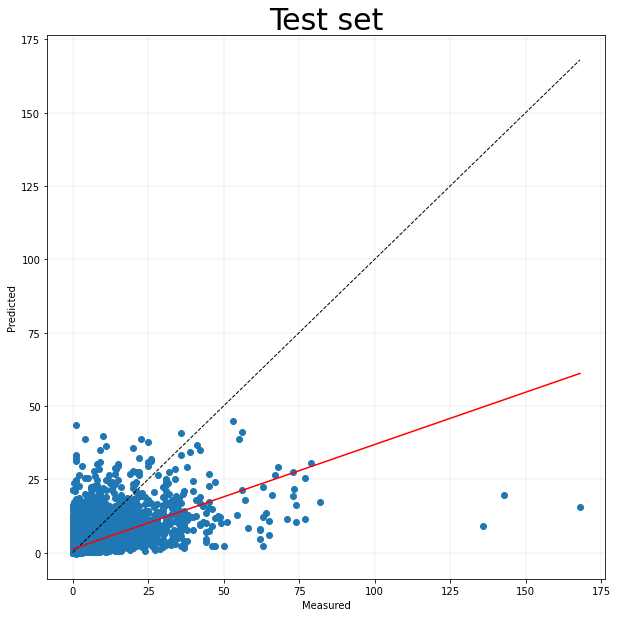

[0.35664511 1.16957672]
RMSE
[4.34119329]
R2
0.3550747144861929


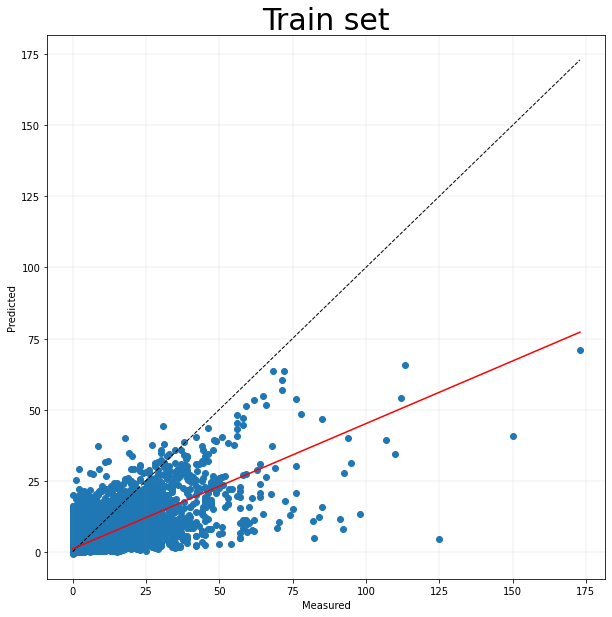

[0.44055178 1.00877895]
RMSE
[3.82994217]
R2
0.5106814332269924


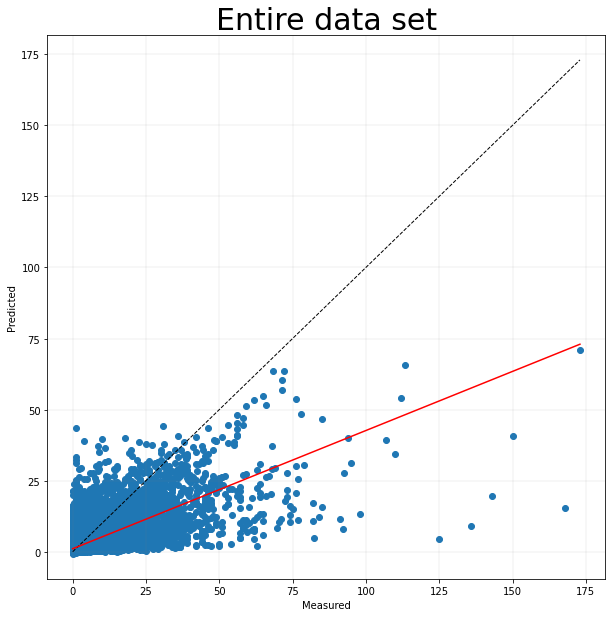

[0.41582362 1.05693207]
RMSE
[3.9902052]
R2
0.4648342728082433


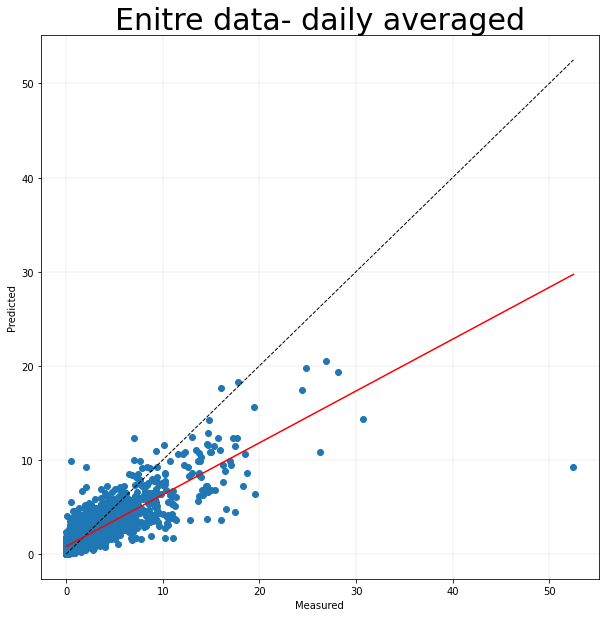

[0.55060015 0.8040812 ]
RMSE
[1.80879403]
R2
0.666313392479567


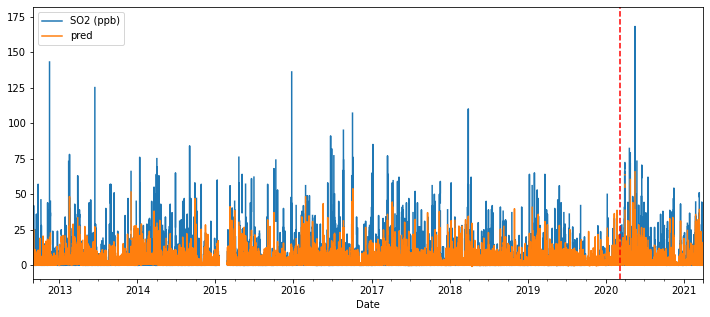

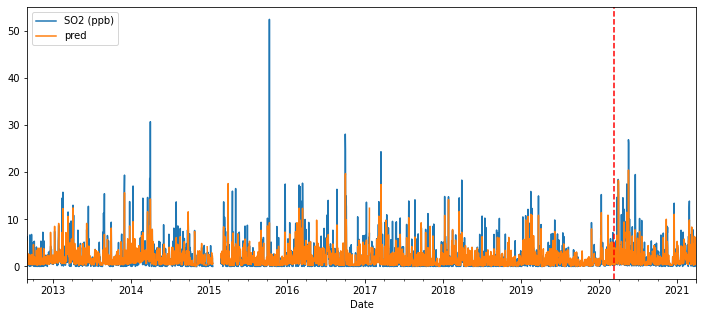

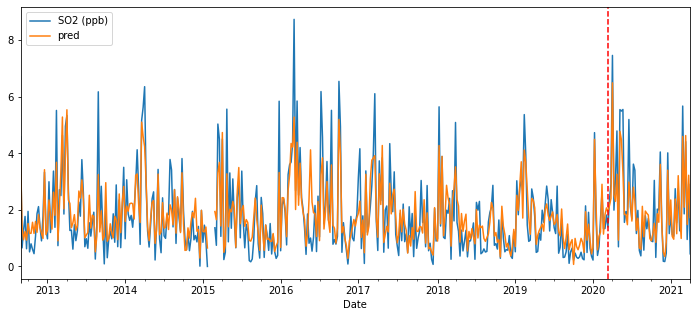

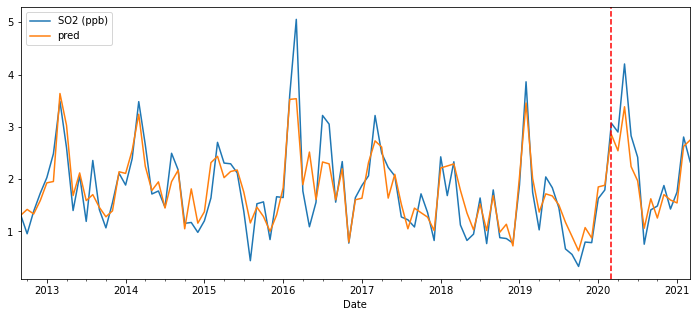

In [ ]:
model= xgb.XGBRegressor(booster = booster, reg_lambda=lambdaa, alpha=alpha,  
                          max_depth = max_depth, eta = eta, gamma = gamma,
                          grow_policy = grow_policy,
                          # n_estimators=n_estimators,
                          objective ='reg:squarederror', 
                          #normalize_type=normalize_type,sample_type=sample_type,rate_drop=rate_drop,skip_drop=skip_drop,
                          random_state=42)

eval_set = [(X_val, y_val)]
model.fit(X_traine, y_traine, early_stopping_rounds=20, eval_metric="rmse", eval_set=eval_set)


preds = model.predict(X_test) 
y_real = y_test.reshape(-1,1)
y_pred = preds.reshape(-1,1)

fig, ax = plt.subplots(1,1, figsize=(10,10))
y_real = np.array(y_real).reshape(-1,1)
y_pred = np.array(y_pred).reshape(-1,1)
ax.scatter(y_real, y_pred)
ax.plot([y_real.min(), y_real.max()], [y_real.min(), y_real.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('Test set',fontsize=30)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

a=y_real
b=y_pred
par= np.polyfit(a.flatten(),b.flatten(),1)

slope=par[0]
intercept=par[1]
xl = [min(a), max(a )]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, 'red')
plt.show()

print(par)
print("RMSE")
print(rmse(y_real.reshape(-1,1), y_pred.reshape(-1,1)))
print("R2")
print(sklearn.metrics.r2_score(y_real.reshape(-1,1), y_pred.reshape(-1,1)))

# model.load_weights(fn)
preds = model.predict(X_train) 
y_real_t = y_train.reshape(-1,1)
y_pred_t = preds.reshape(-1,1)

fig, ax = plt.subplots(1,1, figsize=(10,10))
y_real_t = np.array(y_real_t).reshape(-1,1)
y_pred_t = np.array(y_pred_t).reshape(-1,1)
ax.scatter(y_real_t, y_pred_t)
ax.plot([y_real_t.min(), y_real_t.max()], [y_real_t.min(), y_real_t.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('Train set',fontsize=30)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

a=y_real_t
b=y_pred_t
par= np.polyfit(a.flatten(),b.flatten(),1)
slope=par[0]
intercept=par[1]
xl = [min(a), max(a )]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, 'red')
plt.show()

print(par)
print('RMSE')
print(rmse(y_real_t.reshape(-1,1), y_pred_t.reshape(-1,1)))
print('R2')
print(sklearn.metrics.r2_score(y_real_t.reshape(-1,1), y_pred_t.reshape(-1,1)))

#TRAIN
# model.load_weights(fn)
preds = model.predict(X) 
y_real_to = Y.reshape(-1,1)
y_pred_to = preds.reshape(-1,1)


fig, ax = plt.subplots(1,1, figsize=(10,10))
y_real_to = np.array(y_real_to).reshape(-1,1)
y_pred_to = np.array(y_pred_to).reshape(-1,1)
ax.scatter(y_real_to, y_pred_to)
ax.plot([y_real_to.min(), y_real_to.max()], [y_real_to.min(), y_real_to.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('Entire data set',fontsize=30)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)


a=y_real_to
b=y_pred_to
par= np.polyfit(a.flatten(),b.flatten(),1)

slope=par[0]
intercept=par[1]
xl = [min(a), max(a )]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, 'red')

plt.show()

print(par)
print('RMSE')
print(rmse(y_real_to.reshape(-1,1), y_pred_to.reshape(-1,1)))
print('R2')
print(sklearn.metrics.r2_score(y_real_to.reshape(-1,1), y_pred_to.reshape(-1,1)))


# df3= df3.copy()
df4 = df1_w_c.copy()
df4['pred'] = model.predict(np.array(df4[df4.columns[1:]])) 
df10 = df4.resample('D').mean().copy()
df10.dropna(inplace= True)

fig, ax = plt.subplots(1,1, figsize=(10,10))
y_real = np.array(df10['SO2 (ppb)']).reshape(-1,1)
y_pred = np.array(df10['pred']).reshape(-1,1)
ax.scatter(y_real, y_pred)
ax.plot([y_real.min(), y_real.max()], [y_real.min(), y_real.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')

ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
ax.set_title('Enitre data- daily averaged',fontsize=30)

a=y_real
b=y_pred
par= np.polyfit(a.flatten(),b.flatten(),1)

slope=par[0]
intercept=par[1]
xl = [min(a), max(a )]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, 'red')
plt.show()
print(par)
print('RMSE')
print(rmse(y_real.reshape(-1,1), y_pred.reshape(-1,1)))
print('R2')
print(sklearn.metrics.r2_score(y_real.reshape(-1,1), y_pred.reshape(-1,1)))



df4['SO2 (ppb)'].resample('H').mean().plot(figsize = (12,5), legend = True)
#train['pred'].resample('H').mean().iloc[:1000].plot(figsize = (20,15), legend = True)
df4['pred'].resample('H').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()

df4['SO2 (ppb)'].resample('D').mean().plot(figsize = (12,5), legend = True)
#train['pred'].resample('H').mean().iloc[:1000].plot(figsize = (20,15), legend = True)
df4['pred'].resample('D').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()

df4['SO2 (ppb)'].resample('W').mean().plot(figsize = (12,5), legend = True)
#train['pred'].resample('H').mean().iloc[:1000].plot(figsize = (20,15), legend = True)
df4['pred'].resample('W').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()


df4['SO2 (ppb)'].resample('M').mean().plot(figsize = (12,5), legend = True)
#train['pred'].resample('H').mean().iloc[:1000].plot(figsize = (20,15), legend = True)
df4['pred'].resample('M').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()

In [ ]:
df4

SO2 (ppb)  T ( C) 45m  ...      trend      pred
Date                                        ...                     
2012-09-01 00:00:00        0.0        14.7  ...  12.666667  0.420673
2012-09-01 01:00:00        0.5        13.5  ...  12.666781  0.370862
2012-09-01 02:00:00        1.0        12.8  ...  12.666894  0.332571
2012-09-01 03:00:00        1.0        12.9  ...  12.667008  0.438219
2012-09-01 04:00:00        1.0        12.7  ...  12.667122  0.371028
...                        ...         ...  ...        ...       ...
2021-03-31 19:00:00        0.0         8.7  ...  21.245332  0.234844
2021-03-31 20:00:00        0.0         7.4  ...  21.245446  0.174354
2021-03-31 21:00:00        0.0         6.4  ...  21.245560  0.174354
2021-03-31 22:00:00        0.0         6.2  ...  21.245674  0.179416
2021-03-31 23:00:00        0.0         5.2  ...  21.245788  0.194360

[69875 rows x 15 columns]

In [ ]:
df4.columns

Index(['SO2 (ppb)', 'T ( C) 45m', 'RH (%) 45m', 'Std. Dev. of Wind Direction',
       'Std. Dev. of Wind Speed', 'Wind Direction', 'Wind Speed',
       'Incoming Solar Rad. (W/m2)', 'Precip. (mm)', 'hol', 'hour',
       'dayofweek_num', 'Day-year', 'trend', 'pred'],
      dtype='object')

In [ ]:
preds = model.predict(X_train) 
y_real = y_train.reshape(-1,1)
y_pred = preds.reshape(-1,1)
print(rmse(y_real.reshape(-1,1), y_pred.reshape(-1,1)))
print(sklearn.metrics.r2_score(y_real.reshape(-1,1), y_pred.reshape(-1,1)))

preds2 = model.predict(X_test) 
y_real2 = y_test.reshape(-1,1)
y_pred2 = preds2.reshape(-1,1)
print(rmse(y_real2.reshape(-1,1), y_pred2.reshape(-1,1)))
print(sklearn.metrics.r2_score(y_real2.reshape(-1,1), y_pred2.reshape(-1,1)))

train_col = ['T ( C) 45m', 'RH (%) 45m', 'Std. Dev. of Wind Direction',
       'Std. Dev. of Wind Speed', 'Wind Direction', 'Wind Speed',
       'Incoming Solar Rad. (W/m2)', 'Precip. (mm)', 'hol', 'hour',
       'dayofweek_num', 'Day-year', 'trend']
test_col = ['SO2 (ppb)']


df1_w_c = df1_w[['SO2 (ppb)', 'T ( C) 45m', 'RH (%) 45m', 'Std. Dev. of Wind Direction',
       'Std. Dev. of Wind Speed', 'Wind Direction', 'Wind Speed',
       'Incoming Solar Rad. (W/m2)', 'Precip. (mm)', 'hol', 'hour',
       'dayofweek_num', 'Day-year', 'trend'
        ]]
Y = df1_w_c[ 'SO2 (ppb)']
Y = np.array(Y).reshape(-1,1)
X = np.array(df1_w_c[df1_w_c.columns[1:]])

# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# X_traine, X_val, y_traine, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state = 42)


X_train2, X_test2, y_train2, y_test2 = train_test_split(df4[train_col], df4[test_col], test_size=0.3, random_state = 42)
Train2 = X_train2.copy()
Train2['SO2 (ppb)'] = y_real
Train2 ['Prediction'] = y_pred
Test2 = X_test2.copy()
Test2 ['SO2 (ppb)'] = y_real2
Test2  ['Prediction'] = y_pred2

Train2.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/XG_Mannix_outlier_Train.csv')
Test2.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/XG_Mannix_outlier_Test.csv')

[3.82994217]
0.5106814332269924
[4.34119329]
0.3550747144861929


In [ ]:
df4_h = df4.copy()
df4.drop(columns = ['pred'], inplace = True)

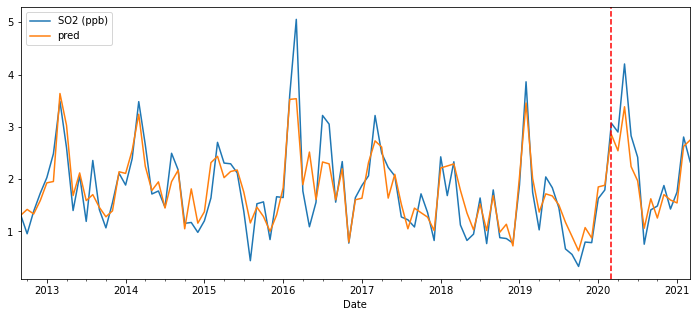

In [ ]:
df4_h['SO2 (ppb)'].resample('M').mean().plot(figsize = (12,5), legend = True)
df4_h['pred'].resample('M').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 

In [ ]:
df4.columns

Index(['SO2 (ppb)', 'T ( C) 45m', 'RH (%) 45m', 'Std. Dev. of Wind Direction',
       'Std. Dev. of Wind Speed', 'Wind Direction', 'Wind Speed',
       'Incoming Solar Rad. (W/m2)', 'Precip. (mm)', 'hol', 'hour',
       'dayofweek_num', 'Day-year', 'trend'],
      dtype='object')

Streaming output truncated to the last 5000 lines.
229
2.4261362552642822
2021-01-19 19:00:00
229
2.3159382343292236
2021-01-19 20:00:00
229
2.634830951690674
2021-01-19 21:00:00
229
2.315800189971924
2021-01-19 22:00:00
228
2.442440986633301
2021-01-19 23:00:00
225
2.4005141258239746
2021-01-20 00:00:00
221
2.0742075443267822
2021-01-20 01:00:00
221
2.0988993644714355
2021-01-20 02:00:00
217
1.8426594734191895
2021-01-20 03:00:00
217
2.0114216804504395
2021-01-20 04:00:00
214
2.397287130355835
2021-01-20 05:00:00
212
2.001267910003662
2021-01-20 06:00:00
211
1.9592819213867188
2021-01-20 07:00:00
217
2.1483523845672607
2021-01-20 08:00:00
214
1.918765902519226
2021-01-20 10:00:00
218
1.9820328950881958
2021-01-20 11:00:00
215
1.9403877258300781
2021-01-20 12:00:00
220
1.996401309967041
2021-01-20 13:00:00
216
2.018768310546875
2021-01-20 14:00:00
216
1.9148240089416504
2021-01-20 15:00:00
226
2.2117979526519775
2021-01-20 16:00:00
223
2.5295658111572266
2021-01-20 17:00:00
231
2.65842

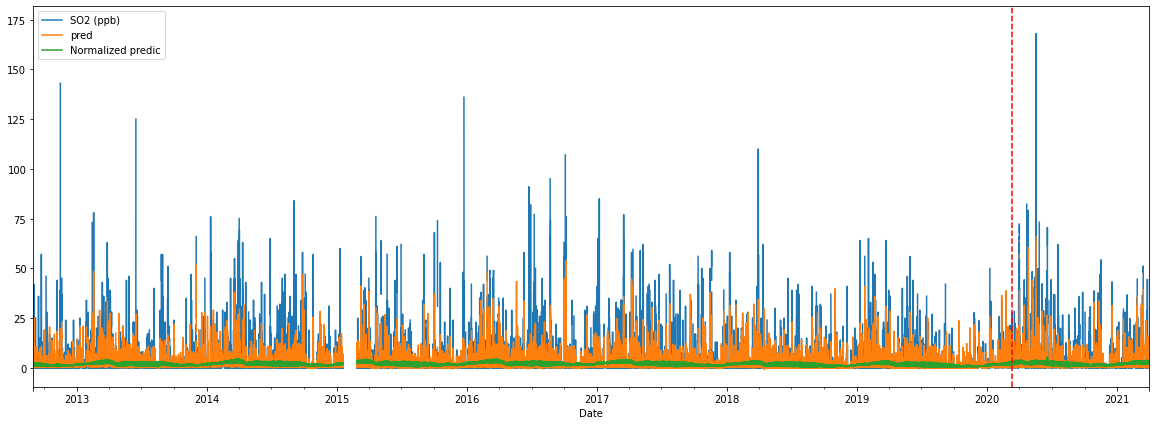

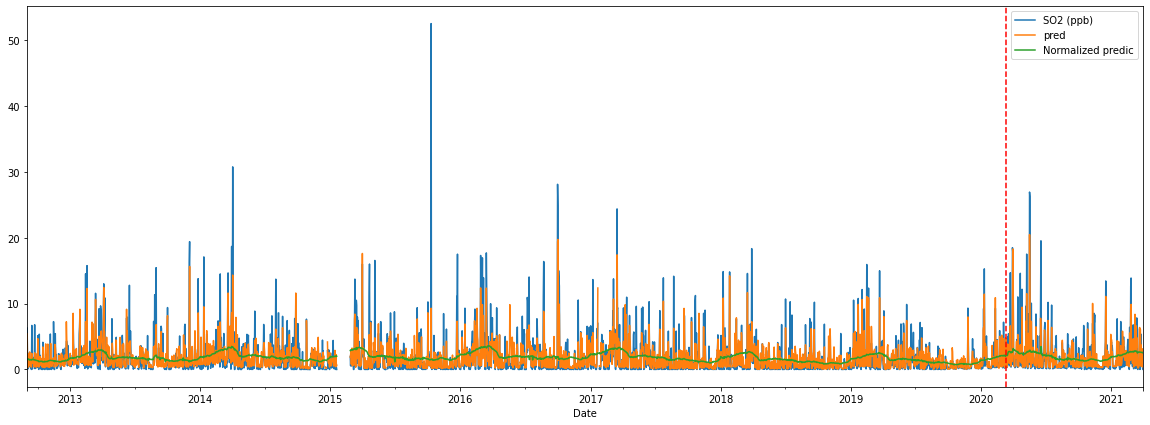

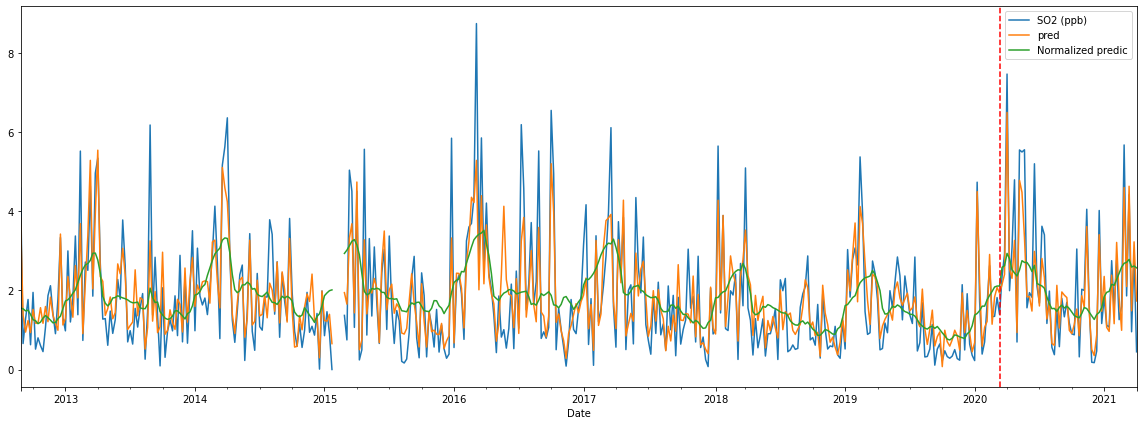

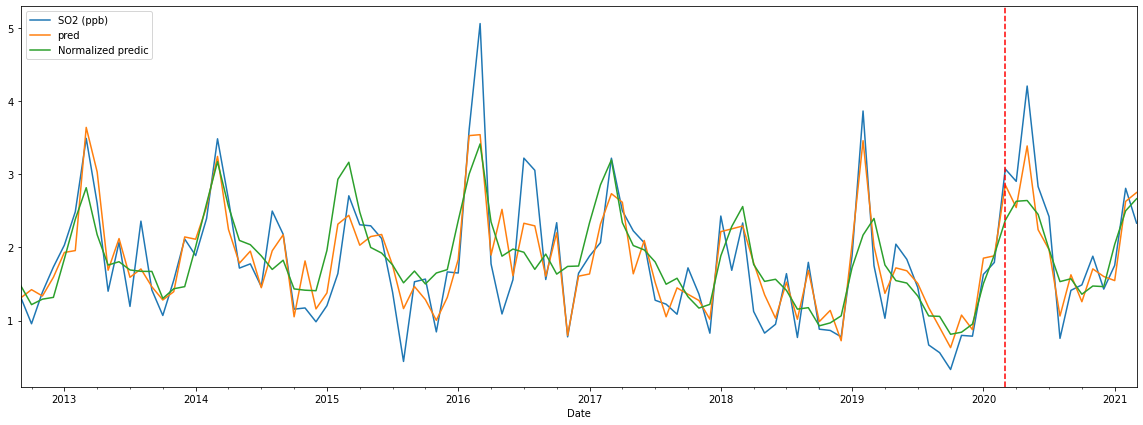

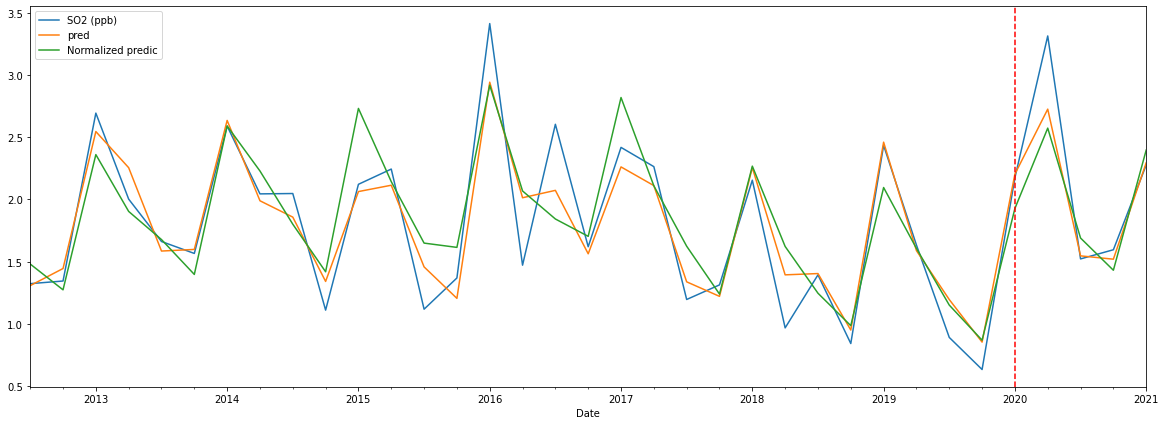

In [ ]:
z = []
for i in df4.index:
  print(i)
  a = df4['Day-year'].loc[i]
  trend = df4['trend'].loc[i]
  # counter = df2['counter'].loc[i]
  hour = df4['hour'].loc[i]
  if a < 14 :
    b = df4[(df4['Day-year'] < a + 15) | (df4['Day-year'] > a - 15 + 365 )].copy()
    # b['trend'] = trend
  if a > 351: 
    b = df4[(df4['Day-year'] > a - 15) | (df4['Day-year'] < a - 365 + 15 )].copy()
    # b['trend'] = trend
  else : 
    b = df4[(df4['Day-year'] > a - 15) &(df4['Day-year'] < a + 15 )].copy()
    # b['trend'] = trend
  #b.drop(columns =['Day-year'], inplace = True )
  c = b[b['hour'] ==  hour]
  c['trend'] = trend
  print(len(c))
  c['pred'] = model.predict(np.array(c[c.columns[1:]])) 
  yhat = c['pred'].mean()
  print(yhat)
  z.append(yhat)

z = np.array(z).reshape(-1,1)
# df3 = df2.copy()
df4_h['Normalized predic']= z
df4_D = df4_h.resample('D').mean()
df4_M = df4_h.resample('M').mean()

df4_h.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/XGB_outlier_Mannix_SO2_hourly_normalized_pred.csv')
df4_D.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/XGB_outlier_Mannix_SO2_Daily_normalized_pred.csv')
df4_M.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/XGB_outlier_Mannix_SO2_Monthly_normalized_pred.csv')


for i in ['H', 'D', 'W', 'M', 'Q']:
    df4_h['SO2 (ppb)'].resample(i).mean().plot(legend= True)
    df4_h['pred'].resample(i).mean().plot(legend= True,figsize = (20,7))
    df4_h['Normalized predic'].resample(i).mean().plot(legend= True,figsize = (20,7))
    plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
    plt.show()

In [ ]:
df4_h.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/XGB_outlier_Mannix_SO2_hourly_normalized_pred.csv')
df4_D.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/XGB_outlier_Mannix_SO2_Daily_normalized_pred.csv')
df4_M.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/XGB_outlier_Mannix_SO2_Monthly_normalized_pred.csv')

In [ ]:
##################################################################################################NN

In [ ]:
best_params["score"]

16.04395035127617

In [ ]:
df1_w

SO2 (ppb)  T ( C) 45m  ...      trend     score
Date                                        ...                     
2012-09-01 00:00:00        0.0        14.7  ...  12.666667  1.576923
2012-09-01 01:00:00        0.5        13.5  ...  12.666781  2.541667
2012-09-01 02:00:00        1.0        12.8  ...  12.666894  2.341965
2012-09-01 03:00:00        1.0        12.9  ...  12.667008  2.842395
2012-09-01 04:00:00        1.0        12.7  ...  12.667122  4.242857
...                        ...         ...  ...        ...       ...
2021-03-31 19:00:00        0.0         8.7  ...  21.245332  4.000000
2021-03-31 20:00:00        0.0         7.4  ...  21.245446  2.083333
2021-03-31 21:00:00        0.0         6.4  ...  21.245560  2.222009
2021-03-31 22:00:00        0.0         6.2  ...  21.245674  1.920395
2021-03-31 23:00:00        0.0         5.2  ...  21.245788  3.770833

[72110 rows x 15 columns]

In [ ]:
maximum_epochs = 250
early_stop_epochs= 60
learning_rate_epochs = 30
optimizer_direction = 'minimize'
number_of_random_points = 30  # random searches to start opt process
maximum_time = 8*60*60  # seconds

avg = df1_w['score'].mean()
std = df1_w['score'].std()

print(avg,std)

5.732306520449392 5.148339366148958


In [ ]:
df1_w.columns

Index(['SO2 (ppb)', 'T ( C) 45m', 'RH (%) 45m', 'Std. Dev. of Wind Direction',
       'Std. Dev. of Wind Speed', 'Wind Direction', 'Wind Speed',
       'Incoming Solar Rad. (W/m2)', 'Precip. (mm)', 'hol', 'hour',
       'dayofweek_num', 'Day-year', 'trend', 'score'],
      dtype='object')

In [ ]:
class Objective(object):
    def __init__(self,df1_w, max_epochs, learn_rate_epochs,
                  ):
        # self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, Y_scaler, test_size=0.001, random_state=42)
        # self.X_train, self.X_val, self.y_train, self.y_val = train_test_split(self.X_train, self.y_train, test_size=0.11, random_state=42)
        self.max_epochs = max_epochs
        #self.early_stop = early_stop
        self.learn_rate_epochs = learn_rate_epochs

        self.df1_w = df1_w.copy()
        self.n_features = len(self.df1_w.columns)-1
    def __call__(self, trial):        
       
        dict_params = {
                        'score' : trial.suggest_float( 'score', avg + 2 * std, avg + 5 * std ),
                        # 'delta': trial.suggest_float(  'delta',40, 100),
                        'layers': trial.suggest_int('layers', 2,3),
                       'alpha': trial.suggest_float('alpha', 0.01,0.9),
                       'batchsize': int(trial.suggest_discrete_uniform('batchsize', 100,5000,500)),
                       'num_dense_nodes1': trial.suggest_int('num_dense_nodes1', 30,40),
                       'learning_rate': trial.suggest_float( 'learning_rate',0.001, 0.1),
                       'drop_out1': trial.suggest_float('drop_out1',0.05, 0.3)}  

        # if dict_params['layers'] == 2 or dict_params['layers'] == 3 :
        dict_params['num_dense_nodes2'] = trial.suggest_int('num_dense_nodes2', 5,40)
        dict_params['drop_out2'] =trial.suggest_float('drop_out2',0.05, 0.3)
        if dict_params['layers'] == 3:
            dict_params['num_dense_nodes3'] = trial.suggest_int('num_dense_nodes3', 5,40)
            dict_params['drop_out3'] = trial.suggest_float('drop_out3',0.05, 0.3)

        self.df_nn =  self.df1_w[self.df1_w['score'] <  dict_params["score"]].copy()
        self.df_nn.drop(columns = ['score'], inplace = True)
        self.Y =   self.df_nn['SO2 (ppb)']
        self.Y = np.array(self.Y).reshape(-1,1)
        self.X = np.array(  self.df_nn[  self.df_nn.columns[1:]])
        self.X_train,  self.X_test,  self.y_train, self.y_test = train_test_split( self.X,   self.Y, test_size=0.000000001, random_state = 42)

        maximum_epochs = 250
        early_stop_epochs= 60
        learning_rate_epochs = 30
        optimizer_direction = 'minimize'
        number_of_random_points = 30  # random searches to start opt process
        maximum_time = 8*60*60  # seconds
                  
        model = Sequential()
        model.add(BatchNormalization())
        model.add(Dense(dict_params['num_dense_nodes1'], kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros() ))
        model.add(LeakyReLU(dict_params['alpha'])) 
        model.add(Dropout(dict_params['drop_out1']))
        # if dict_params['layers'] == 2 or dict_params['layers'] == 3 :
        model.add(Dense(dict_params['num_dense_nodes2'], kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros() ))
        model.add(LeakyReLU(alpha=dict_params['alpha'])) 
        model.add(Dropout(dict_params['drop_out2']))
        if dict_params['layers'] == 3 :
            model.add(Dense(dict_params['num_dense_nodes3'], kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros() ))
            model.add(LeakyReLU(alpha=dict_params['alpha'])) 
            model.add(Dropout(dict_params['drop_out3']))
        model.add(Dense(1, kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros() ))
        model.add(LeakyReLU(alpha=dict_params['alpha'])) 

        # instantiate and compile model
        opt = keras.optimizers.Adam(learning_rate=dict_params[ 'learning_rate'])
        model.compile(loss='mse',
                      # tf.keras.losses.Huber( delta=dict_params[ 'delta']),
                      # 'mse'
                          optimizer=opt)
        fn = "gdrive/My Drive/Colab Notebooks/Stations/MANIX_SO2__2l" +str(trial.number) + ".ckpt" 
        fnn = os.path.dirname(fn)
        # callbacks for early stopping and for learning rate reducer
        callbacks_list = [
                          #KerasPruningCallback(trial, 'val_loss'),
                          #tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=self.early_stop),                     
                          tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.9, 
                                            patience=self.learn_rate_epochs, 
                                            verbose=0, mode='auto', min_lr=0.000001),
                          tf.keras.callbacks.ModelCheckpoint(filepath=fn, save_weights_only=True,
                                          monitor='val_loss',mode='min', save_best_only=True)]

        n_f = 5
        kf = KFold(n_splits=n_f )
        acc = 0 
        for train_index, test_index in kf.split( self.X_train):   
                X_tr, X_tes =  self.X_train[train_index],  self.X_train[test_index]
                y_tr, y_tes =   self.y_train[train_index],   self.y_train[test_index]    
                # fit the model
                X_tra, X_val, y_tra, y_val = train_test_split(X_tr, y_tr, test_size=0.2, random_state = 42)
                h = model.fit(x=X_tra, y=y_tra,
                                  validation_data=(X_val, y_val),
                                  batch_size=dict_params['batchsize'],
                                  epochs=self.max_epochs,
                                  shuffle=True, verbose=0,
                                  callbacks=callbacks_list)
                model.load_weights(fn)
                preds = model.predict(X_tes)
                accuracy = mean_squared_error(y_tes, preds)
                # accuracy = np.min(h.history['val_loss'])
                acc = acc +  accuracy/n_f 


        print(acc)
        return acc    

In [ ]:
objective = Objective(df1_w,maximum_epochs,learning_rate_epochs)
study = optuna.create_study(direction=optimizer_direction, study_name='Mannix_2013__2layer__OT', storage='sqlite:///Mannix__2015__2layers_OT.db',
                            load_if_exists=True)
study.optimize(objective, n_trials=500)
df_results = study.trials_dataframe()
# df_results.to_csv('gdrive/My Drive/Colab Notebooks/results/Mannix_SO2_2013_HP.csv') #ghabli
df_results.to_csv('gdrive/My Drive/Colab Notebooks/results/NN_Mannix_SO2_2013_HP_2l_hourly_outlier.csv')

[I 2021-05-14 22:06:25,093] Using an existing study with name 'Mannix_2013__2layer__OT' instead of creating a new one.


KeyboardInterrupt: ignored

In [ ]:
# print(study.best_params)
study.best_trials

[FrozenTrial(number=275, values=[18.28920503987821], datetime_start=datetime.datetime(2021, 5, 14, 16, 34, 46, 180644), datetime_complete=datetime.datetime(2021, 5, 14, 16, 36, 2, 604055), params={'score': 16.276138428959957, 'layers': 2, 'alpha': 0.011380628665322173, 'batchsize': 4100.0, 'num_dense_nodes1': 35, 'learning_rate': 0.07387545322740646, 'drop_out1': 0.06374957957163459, 'num_dense_nodes2': 40, 'drop_out2': 0.09795083125856888}, distributions={'score': UniformDistribution(high=31.474003351194185, low=16.028985252747308), 'layers': IntUniformDistribution(high=3, low=2, step=1), 'alpha': UniformDistribution(high=0.9, low=0.01), 'batchsize': DiscreteUniformDistribution(high=4600.0, low=100.0, q=500.0), 'num_dense_nodes1': IntUniformDistribution(high=40, low=30, step=1), 'learning_rate': UniformDistribution(high=0.1, low=0.001), 'drop_out1': UniformDistribution(high=0.3, low=0.05), 'num_dense_nodes2': IntUniformDistribution(high=40, low=5, step=1), 'drop_out2': UniformDistribu

In [ ]:
study.best_params

{'alpha': 0.011380628665322173,
 'batchsize': 4100.0,
 'drop_out1': 0.06374957957163459,
 'drop_out2': 0.09795083125856888,
 'layers': 2,
 'learning_rate': 0.07387545322740646,
 'num_dense_nodes1': 35,
 'num_dense_nodes2': 40,
 'score': 16.276138428959957}

In [ ]:
#  ERROR2:Trial 533 finished with value: 17.947620692459207 and parameters: {'score': 16.736297981359147, 'delta': 48.01704814945821, 'layers': 2, 'alpha': 0.010660186759221701, 'batchsize': 3100.0, 'num_dense_nodes1': 39, 'learning_rate': 0.039588037740573775, 'drop_out1': 0.06158372221142019, 'num_dense_nodes2': 37, 'drop_out2': 0.053878597160021885}. Best is trial 533 with value: 17.947620692459207.

In [ ]:
# best_params = 
# {'alpha': 0.026196341809027104,
#  'batchsize': 2600.0,
#  'drop_out1': 0.06423319599547957,
#  'drop_out2': 0.05617949776762677,
#  'drop_out3': 0.1663945098938146,
#  'learning_rate': 0.013129870153458227,
#  'num_dense_nodes1': 38,
#  'num_dense_nodes2': 40,
#  'num_dense_nodes3': 10}. #rmse ghablie

In [ ]:
best_params_nn = {'score': 16.736297981359147, 
                  'delta': 48.01704814945821,
                  'layers': 2, 
                  'alpha': 0.010660186759221701,
                  'batchsize': 3100.0,
                  'num_dense_nodes1': 39,
                  'learning_rate': 0.039588037740573775, 
                  'drop_out1': 0.06158372221142019,
                  'num_dense_nodes2': 37,
                  'drop_out2': 0.053878597160021885} # Best is trial 533 with value: 17.947620692459207.

df1_w_n=  df1_w[df1_w['score'] <  best_params_nn["score"]].copy()
df1_w_n.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/NN_Mannix_outlier_Dataset.csv')
df1_w_n.drop(columns = ["score"], inplace = True)

In [ ]:
# best_params_nn ={'alpha': 0.011380628665322173,
#  'batchsize': 4100.0,
#  'drop_out1': 0.06374957957163459,
#  'drop_out2': 0.09795083125856888,
#  'layers': 2,
#  'learning_rate': 0.07387545322740646,
#  'num_dense_nodes1': 35,
#  'num_dense_nodes2': 40,
#  'score': 16.276138428959957} # number=275, values=[18.28920503987821]


# df1_w_n=  df1_w[df1_w['score'] <  best_params_nn["score"]].copy()
# df1_w_n.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/NN_Mannix_outlier_Dataset.csv')
# df1_w_n.drop(columns = ["score"], inplace = True)

In [ ]:
# df_results.to_csv('gdrive/My Drive/Colab Notebooks/results/NOX_Edmonton_East_Hyperparams-fixed.csv')

In [ ]:
# best_params = {'num_dense_nodes1': 29, 
#                'drop_out1': 0.005699067789286083, 
#                'num_dense_nodes2': 19, 'drop_out2': 0.07103058617619092, 
#                'batchsize': 300.0}

In [ ]:
# best_params = {'batchsize': 1300.0,
#  'drop_out1': 0.00012869242717143095,
#  'num_dense_nodes1': 28}

In [ ]:
print(len(df1_w),len(df1_w_n))

72110 70086


In [ ]:
Y = df1_w_n['SO2 (ppb)']
Y = np.array(Y).reshape(-1,1)
X = np.array(df1_w_n[df1_w_n.columns[1:]])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
X_traine, X_val, y_traine, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state = 42)

maximum_epochs = 250
early_stop_epochs= 60
learning_rate_epochs = 30
optimizer_direction = 'minimize'
number_of_random_points = 30  # random searches to start opt process
maximum_time = 8*60*60  # seconds

Epoch 1/250
12/12 - 3s - loss: 14.7721 - val_loss: 147.9555
Epoch 2/250
12/12 - 0s - loss: 13.0127 - val_loss: 32.2020
Epoch 3/250
12/12 - 0s - loss: 12.2869 - val_loss: 46.3451
Epoch 4/250
12/12 - 0s - loss: 11.9903 - val_loss: 44.1365
Epoch 5/250
12/12 - 0s - loss: 11.6288 - val_loss: 33.6448
Epoch 6/250
12/12 - 0s - loss: 11.4899 - val_loss: 20.7895
Epoch 7/250
12/12 - 0s - loss: 11.3489 - val_loss: 17.9904
Epoch 8/250
12/12 - 0s - loss: 11.4457 - val_loss: 13.3055
Epoch 9/250
12/12 - 0s - loss: 11.4522 - val_loss: 12.4241
Epoch 10/250
12/12 - 0s - loss: 11.3301 - val_loss: 16.1903
Epoch 11/250
12/12 - 0s - loss: 11.1883 - val_loss: 12.5443
Epoch 12/250
12/12 - 0s - loss: 11.1982 - val_loss: 14.1858
Epoch 13/250
12/12 - 0s - loss: 11.1209 - val_loss: 11.7684
Epoch 14/250
12/12 - 0s - loss: 11.3797 - val_loss: 11.5963
Epoch 15/250
12/12 - 0s - loss: 11.0406 - val_loss: 10.5906
Epoch 16/250
12/12 - 0s - loss: 11.1082 - val_loss: 11.5500
Epoch 17/250
12/12 - 0s - loss: 11.3861 - val_lo

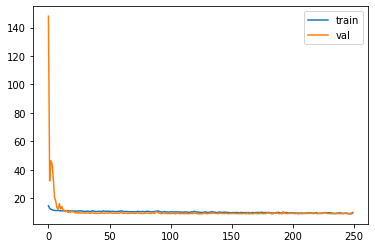

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 13)                52        
_________________________________________________________________
dense (Dense)                (None, 39)                546       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 39)                0         
_________________________________________________________________
dropout (Dropout)            (None, 39)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 37)                1480      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 37)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37)                0

In [ ]:
model = Sequential()
model.add(BatchNormalization())
model.add(Dense(best_params_nn ['num_dense_nodes1'], kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros() ))
model.add(LeakyReLU(best_params_nn ['alpha'])) 
model.add(Dropout(best_params_nn ['drop_out1']))
# if best_params_nn ['layers'] == 2 or best_params_nn ['layers'] == 3 :
model.add(Dense(best_params_nn ['num_dense_nodes2'], kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros() ))
model.add(LeakyReLU(alpha=best_params_nn ['alpha'])) 
model.add(Dropout(best_params_nn ['drop_out2']))
if best_params_nn ['layers'] == 3 :
    model.add(Dense(best_params_nn ['num_dense_nodes3'], kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros() ))
    model.add(LeakyReLU(alpha=best_params_nn ['alpha'])) 
    model.add(Dropout(best_params_nn ['drop_out3']))
model.add(Dense(1, kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros() ))
model.add(LeakyReLU(alpha=best_params_nn ['alpha'])) 

# instantiate and compile model
opt = keras.optimizers.Adam(learning_rate=best_params_nn [ 'learning_rate'])
model.compile(loss=
              # 'mse',
              tf.keras.losses.Huber(  delta=best_params_nn [ 'delta']),
                                                                # 'mse'
                                                      optimizer=opt)

fn = "gdrive/My Drive/Colab Notebooks/Stations/Training_SO2_Mannix.ckpt" 
fnn = os.path.dirname(fn)
# callbacks for early stopping and for learning rate reducer
callbacks_list = [
                  #KerasPruningCallback(trial, 'val_loss'),
                  #tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=self.early_stop),                     
                  tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.9, 
                                    patience=learning_rate_epochs, 
                                    verbose=0, mode='auto', min_lr=0.000001),
                  tf.keras.callbacks.ModelCheckpoint(filepath=fn, save_weights_only=True,
                                  monitor='val_loss',mode='min', save_best_only=True)]

history = model.fit(x=X_traine, y= y_traine,
                  validation_data=(X_val, y_val),
                  batch_size=int(best_params_nn ['batchsize']),
                  epochs=maximum_epochs,
                  shuffle=True, verbose=2,
                  callbacks=callbacks_list)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()
model.summary()


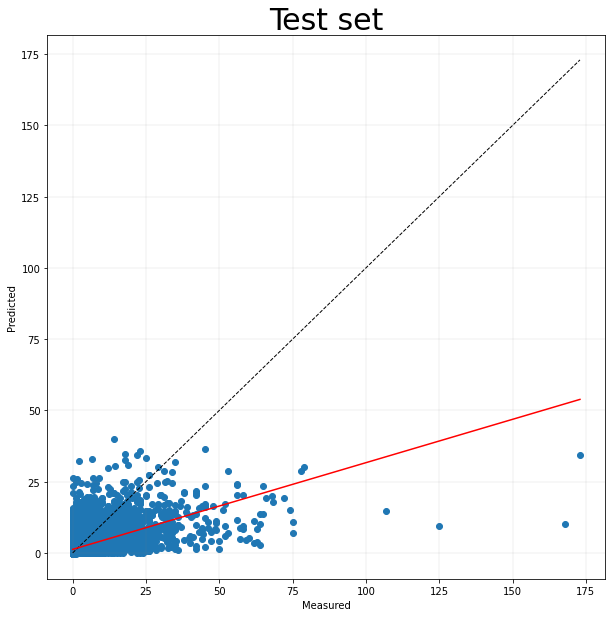

[0.30422026 1.22991764]
RMSE
[4.56910154]
R2
0.30506569248251536


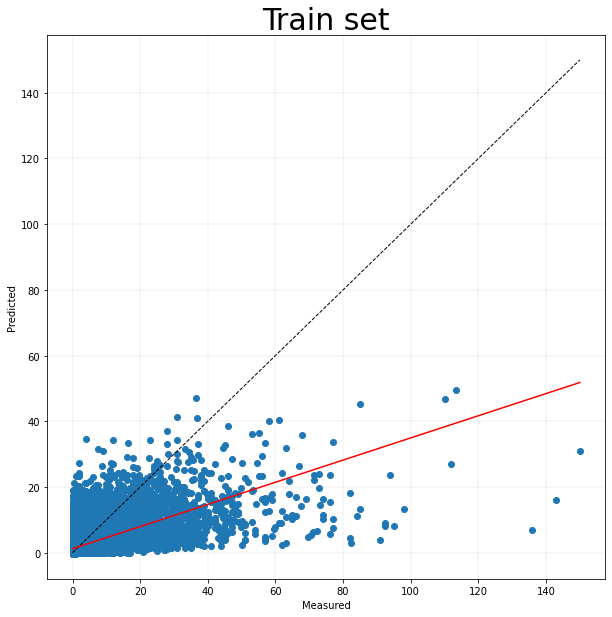

[0.33739103 1.18859741]
RMSE
[4.37973547]
R2
0.3659022144577545


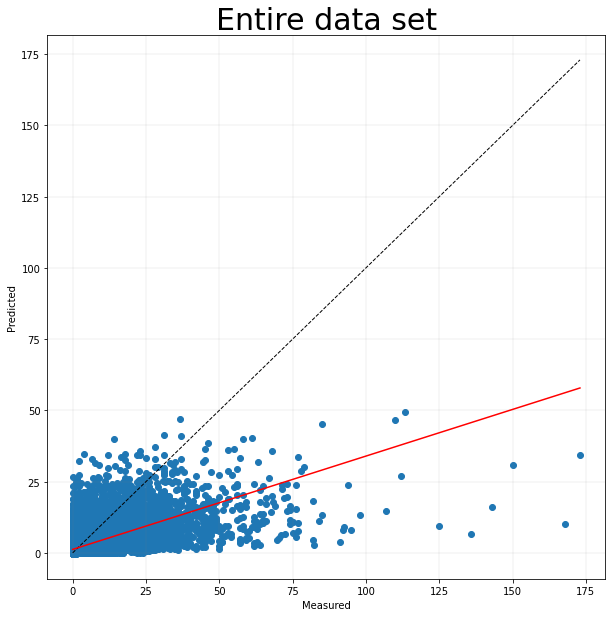

[0.32749086 1.20104695]
RMSE
[4.43739445]
R2
0.3477418569336981


In [ ]:
model.load_weights(fn)
precovid_model = 'gdrive/My Drive/Colab Notebooks/Mannix_SO2.h5'
model.save(precovid_model )
preds = model.predict(X_test) 
y_real = y_test.reshape(-1,1)
y_pred = preds.reshape(-1,1)

fig, ax = plt.subplots(1,1, figsize=(10,10))
y_real = np.array(y_real).reshape(-1,1)
y_pred = np.array(y_pred).reshape(-1,1)
ax.scatter(y_real, y_pred)
ax.plot([y_real.min(), y_real.max()], [y_real.min(), y_real.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('Test set',fontsize=30)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

a=y_real
b=y_pred
par= np.polyfit(a.flatten(),b.flatten(),1)

slope=par[0]
intercept=par[1]
xl = [min(a), max(a )]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, 'red')
plt.show()

print(par)
print("RMSE")
print(rmse(y_real.reshape(-1,1), y_pred.reshape(-1,1)))
print("R2")
print(sklearn.metrics.r2_score(y_real.reshape(-1,1), y_pred.reshape(-1,1)))

model.load_weights(fn)
preds = model.predict(X_train) 
y_real_t = y_train.reshape(-1,1)
y_pred_t = preds.reshape(-1,1)

fig, ax = plt.subplots(1,1, figsize=(10,10))
y_real_t = np.array(y_real_t).reshape(-1,1)
y_pred_t = np.array(y_pred_t).reshape(-1,1)
ax.scatter(y_real_t, y_pred_t)
ax.plot([y_real_t.min(), y_real_t.max()], [y_real_t.min(), y_real_t.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('Train set',fontsize=30)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

a=y_real_t
b=y_pred_t
par= np.polyfit(a.flatten(),b.flatten(),1)
slope=par[0]
intercept=par[1]
xl = [min(a), max(a )]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, 'red')
plt.show()

print(par)
print('RMSE')
print(rmse(y_real_t.reshape(-1,1), y_pred_t.reshape(-1,1)))
print('R2')
print(sklearn.metrics.r2_score(y_real_t.reshape(-1,1), y_pred_t.reshape(-1,1)))

#TRAIN
model.load_weights(fn)
preds = model.predict(X) 
y_real_to = Y.reshape(-1,1)
y_pred_to = preds.reshape(-1,1)


fig, ax = plt.subplots(1,1, figsize=(10,10))
y_real_to = np.array(y_real_to).reshape(-1,1)
y_pred_to = np.array(y_pred_to).reshape(-1,1)
ax.scatter(y_real_to, y_pred_to)
ax.plot([y_real_to.min(), y_real_to.max()], [y_real_to.min(), y_real_to.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('Entire data set',fontsize=30)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)


a=y_real_to
b=y_pred_to
par= np.polyfit(a.flatten(),b.flatten(),1)

slope=par[0]
intercept=par[1]
xl = [min(a), max(a )]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, 'red')

plt.show()

print(par)
print('RMSE')
print(rmse(y_real_to.reshape(-1,1), y_pred_to.reshape(-1,1)))
print('R2')
print(sklearn.metrics.r2_score(y_real_to.reshape(-1,1), y_pred_to.reshape(-1,1)))

In [ ]:
model = load_model(precovid_model )

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 13)                52        
_________________________________________________________________
dense (Dense)                (None, 39)                546       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 39)                0         
_________________________________________________________________
dropout (Dropout)            (None, 39)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 37)                1480      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 37)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37)                0

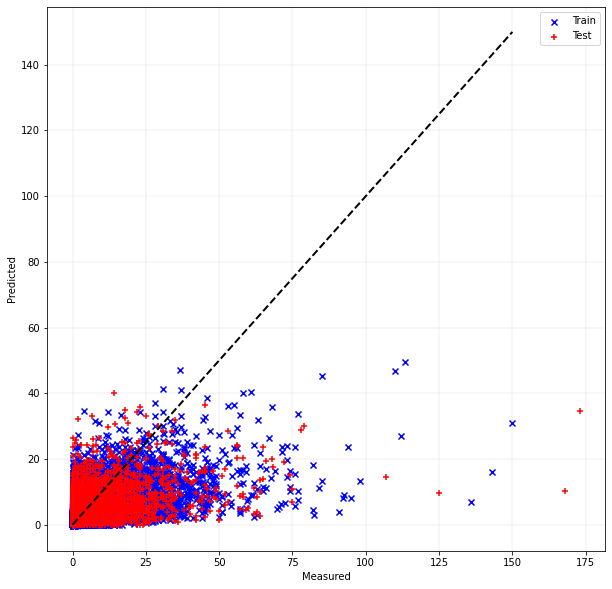

In [ ]:
import matplotlib.cm as cm
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.plot([0, max(y_real_t)], [0, max(y_real_t)], 'k--', lw=2) 

ax.scatter(y_real_t, y_pred_t, c = "blue",label = 'Train',marker="x")
ax.scatter(y_real, y_pred, c = "red", label = 'Test',marker="+", cmap=cm.brg)

ax.legend()
ax.plot([0,0.5], [0,0.5], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.show()


In [ ]:
# df2_w

In [ ]:
# df3= df3.copy()
df4 = df1_w_n.copy()
df4['pred'] = model.predict(np.array(df4[df4.columns[1:]])) 
df10 = df4.resample('D').mean()
df10.dropna(inplace= True)

In [ ]:
df4.columns

Index(['SO2 (ppb)', 'T ( C) 45m', 'RH (%) 45m', 'Std. Dev. of Wind Direction',
       'Std. Dev. of Wind Speed', 'Wind Direction', 'Wind Speed',
       'Incoming Solar Rad. (W/m2)', 'Precip. (mm)', 'hol', 'hour',
       'dayofweek_num', 'Day-year', 'trend', 'pred'],
      dtype='object')

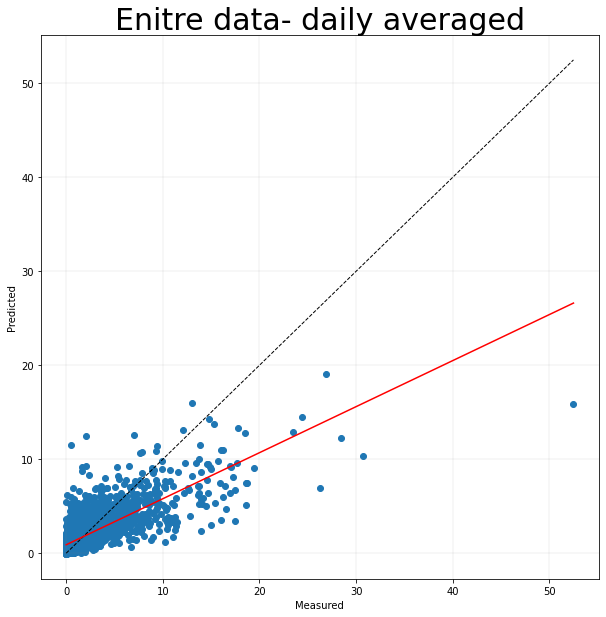

[0.48996296 0.89726083]
RMSE
[2.05271264]
R2
0.5733397776579225


In [ ]:
    fig, ax = plt.subplots(1,1, figsize=(10,10))
    y_real = np.array(df10['SO2 (ppb)']).reshape(-1,1)
    y_pred = np.array(df10['pred']).reshape(-1,1)
    ax.scatter(y_real, y_pred)
    ax.plot([y_real.min(), y_real.max()], [y_real.min(), y_real.max()], 'k--', lw=1)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')

    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
    ax.set_title('Enitre data- daily averaged',fontsize=30)

    a=y_real
    b=y_pred
    par= np.polyfit(a.flatten(),b.flatten(),1)
    
    slope=par[0]
    intercept=par[1]
    xl = [min(a), max(a )]
    yl = [slope*xx + intercept  for xx in xl]
    plt.plot(xl, yl, 'red')
    plt.show()
    print(par)
    print('RMSE')
    print(rmse(y_real.reshape(-1,1), y_pred.reshape(-1,1)))
    print('R2')
    print(sklearn.metrics.r2_score(y_real.reshape(-1,1), y_pred.reshape(-1,1)))


In [ ]:
df4.columns

Index(['SO2 (ppb)', 'T ( C) 45m', 'RH (%) 45m', 'Std. Dev. of Wind Direction',
       'Std. Dev. of Wind Speed', 'Wind Direction', 'Wind Speed',
       'Incoming Solar Rad. (W/m2)', 'Precip. (mm)', 'hol', 'hour',
       'dayofweek_num', 'Day-year', 'trend', 'pred'],
      dtype='object')

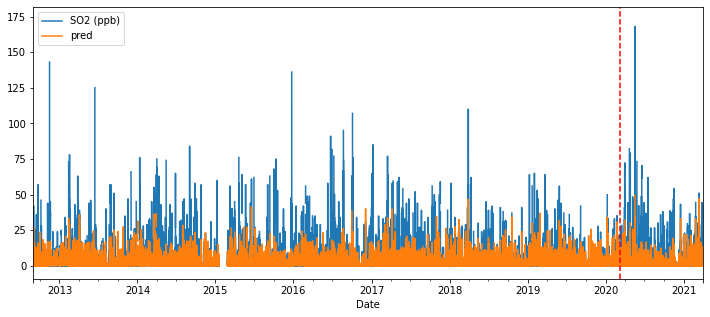

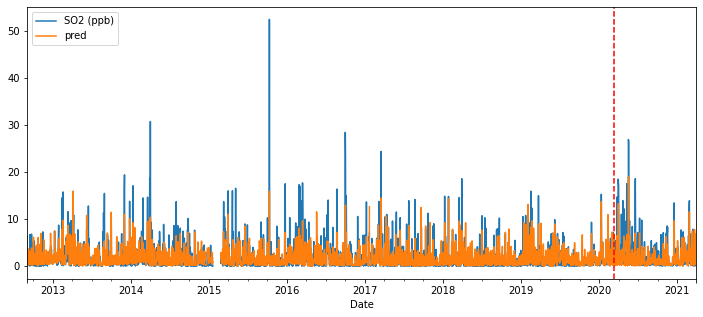

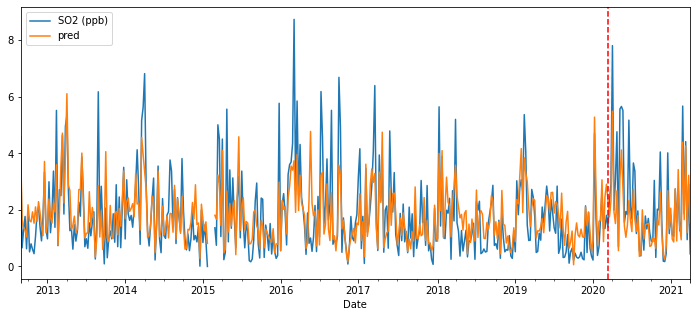

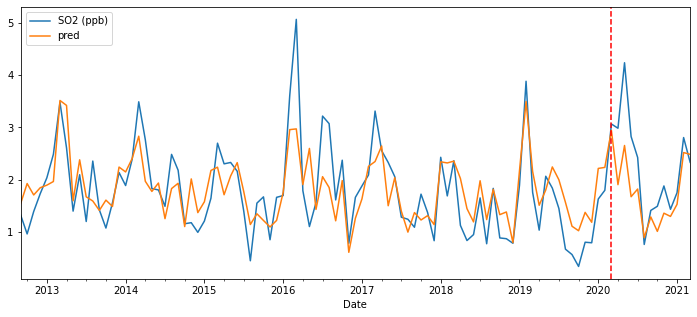

In [ ]:
df4['SO2 (ppb)'].resample('H').mean().plot(figsize = (12,5), legend = True)
#train['pred'].resample('H').mean().iloc[:1000].plot(figsize = (20,15), legend = True)
df4['pred'].resample('H').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()

df4['SO2 (ppb)'].resample('D').mean().plot(figsize = (12,5), legend = True)
#train['pred'].resample('H').mean().iloc[:1000].plot(figsize = (20,15), legend = True)
df4['pred'].resample('D').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()

df4['SO2 (ppb)'].resample('W').mean().plot(figsize = (12,5), legend = True)
#train['pred'].resample('H').mean().iloc[:1000].plot(figsize = (20,15), legend = True)
df4['pred'].resample('W').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()


df4['SO2 (ppb)'].resample('M').mean().plot(figsize = (12,5), legend = True)
#train['pred'].resample('H').mean().iloc[:1000].plot(figsize = (20,15), legend = True)
df4['pred'].resample('M').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()

In [ ]:
preds1 = model.predict(X_train) 
y_real1 = y_train.reshape(-1,1)
y_pred1 = preds1.reshape(-1,1)
print(rmse(y_real1.reshape(-1,1), y_pred1.reshape(-1,1)))
print(sklearn.metrics.r2_score(y_real1.reshape(-1,1), y_pred1.reshape(-1,1)))

[4.37973547]
0.3659022144577545


In [ ]:
preds = model.predict(X_test) 
y_real = y_test.reshape(-1,1)
y_pred = preds.reshape(-1,1)
print(rmse(y_real.reshape(-1,1), y_pred.reshape(-1,1)))
print(sklearn.metrics.r2_score(y_real.reshape(-1,1), y_pred.reshape(-1,1)))

[4.56910154]
0.30506569248251536


In [ ]:
df4.columns

Index(['SO2 (ppb)', 'T ( C) 45m', 'RH (%) 45m', 'Std. Dev. of Wind Direction',
       'Std. Dev. of Wind Speed', 'Wind Direction', 'Wind Speed',
       'Incoming Solar Rad. (W/m2)', 'Precip. (mm)', 'hol', 'hour',
       'dayofweek_num', 'Day-year', 'trend', 'pred'],
      dtype='object')

In [ ]:
preds = model.predict(X_train) 
y_real = y_train.reshape(-1,1)
y_pred = preds.reshape(-1,1)
print(rmse(y_real.reshape(-1,1), y_pred.reshape(-1,1)))
print(sklearn.metrics.r2_score(y_real.reshape(-1,1), y_pred.reshape(-1,1)))

preds2 = model.predict(X_test) 
y_real2 = y_test.reshape(-1,1)
y_pred2 = preds2.reshape(-1,1)
print(rmse(y_real2.reshape(-1,1), y_pred2.reshape(-1,1)))
print(sklearn.metrics.r2_score(y_real2.reshape(-1,1), y_pred2.reshape(-1,1)))

train_col = ['T ( C) 45m', 'RH (%) 45m', 'Std. Dev. of Wind Direction',
       'Std. Dev. of Wind Speed', 'Wind Direction', 'Wind Speed',
       'Incoming Solar Rad. (W/m2)', 'Precip. (mm)', 'hol', 'hour',
       'dayofweek_num', 'Day-year', 'trend']
test_col = ['SO2 (ppb)']


df1_w_c = df1_w[[ 'SO2 (ppb)', 'T ( C) 45m', 'RH (%) 45m', 'Std. Dev. of Wind Direction',
       'Std. Dev. of Wind Speed', 'Wind Direction', 'Wind Speed',
       'Incoming Solar Rad. (W/m2)', 'Precip. (mm)', 'hol', 'hour',
       'dayofweek_num', 'Day-year', 'trend'
        ]]
Y = df1_w_c[ 'SO2 (ppb)']
Y = np.array(Y).reshape(-1,1)
X = np.array(df1_w_c[df1_w_c.columns[1:]])

# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# X_traine, X_val, y_traine, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state = 42)


X_train2, X_test2, y_train2, y_test2 = train_test_split(df4[train_col], df4[test_col], test_size=0.3, random_state = 42)
Train2 = X_train2.copy()
Train2['SO2 (ppb)'] = y_real
Train2 ['Prediction'] = y_pred
Test2 = X_test2.copy()
Test2 ['SO2 (ppb)'] = y_real2
Test2  ['Prediction'] = y_pred2

Train2.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/NN_OT_Mannix_Train.csv')
Test2.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/NN_OT_Mannix_Test.csv')

[4.37973547]
0.3659022144577545
[4.56910154]
0.30506569248251536


In [ ]:
df4.columns

Index(['SO2 (ppb)', 'T ( C) 45m', 'RH (%) 45m', 'Std. Dev. of Wind Direction',
       'Std. Dev. of Wind Speed', 'Wind Direction', 'Wind Speed',
       'Incoming Solar Rad. (W/m2)', 'Precip. (mm)', 'hol', 'hour',
       'dayofweek_num', 'Day-year', 'trend', 'pred'],
      dtype='object')

In [ ]:
df4_h = df4.copy()
df4.drop(columns = ['pred'], inplace = True)

In [ ]:
# df4_D = df4_h.resample('D').mean()
# df4_M = df4_h.resample('M').mean()
# df4_h.to_csv('gdrive/My Drive/Colab Notebooks/Edmonton East/Mannix_SO2_hourly_pred.csv')
# df4_M.to_csv('gdrive/My Drive/Colab Notebooks/Edmonton East/Mannix_SO_monthly_pred.csv')

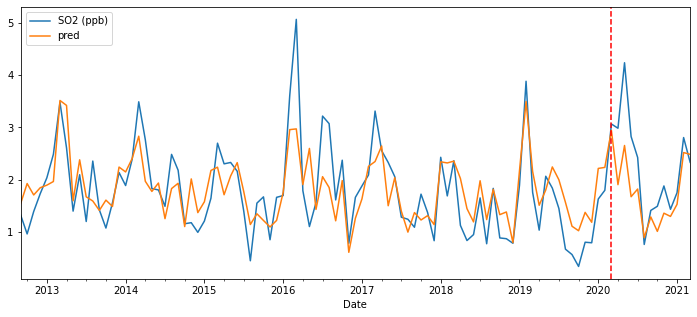

In [ ]:
df4_h['SO2 (ppb)'].resample('M').mean().plot(figsize = (12,5), legend = True)
df4_h['pred'].resample('M').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 

In [ ]:
df4

SO2 (ppb)  T ( C) 45m  ...  Day-year      trend
Date                                        ...                     
2012-09-01 00:00:00        0.0        14.7  ...       245  12.666667
2012-09-01 01:00:00        0.5        13.5  ...       245  12.666781
2012-09-01 02:00:00        1.0        12.8  ...       245  12.666894
2012-09-01 03:00:00        1.0        12.9  ...       245  12.667008
2012-09-01 04:00:00        1.0        12.7  ...       245  12.667122
...                        ...         ...  ...       ...        ...
2021-03-31 19:00:00        0.0         8.7  ...        90  21.245332
2021-03-31 20:00:00        0.0         7.4  ...        90  21.245446
2021-03-31 21:00:00        0.0         6.4  ...        90  21.245560
2021-03-31 22:00:00        0.0         6.2  ...        90  21.245674
2021-03-31 23:00:00        0.0         5.2  ...        90  21.245788

[70086 rows x 14 columns]

In [ ]:
df4_h

SO2 (ppb)  T ( C) 45m  ...      trend      pred
Date                                        ...                     
2012-09-01 00:00:00        0.0        14.7  ...  12.666667  1.081793
2012-09-01 01:00:00        0.5        13.5  ...  12.666781  0.982908
2012-09-01 02:00:00        1.0        12.8  ...  12.666894  0.977049
2012-09-01 03:00:00        1.0        12.9  ...  12.667008  1.079132
2012-09-01 04:00:00        1.0        12.7  ...  12.667122  1.111229
...                        ...         ...  ...        ...       ...
2021-03-31 19:00:00        0.0         8.7  ...  21.245332  0.941570
2021-03-31 20:00:00        0.0         7.4  ...  21.245446  0.471368
2021-03-31 21:00:00        0.0         6.4  ...  21.245560  0.110027
2021-03-31 22:00:00        0.0         6.2  ...  21.245674  0.593038
2021-03-31 23:00:00        0.0         5.2  ...  21.245788  0.646135

[70086 rows x 15 columns]

In [ ]:
z = []
for i in df4.index:
  print(i)
  a = df4['Day-year'].loc[i]
  trend = df4['trend'].loc[i]
  # counter = df2['counter'].loc[i]
  hour = df4['hour'].loc[i]
  if a < 14 :
    b = df4[(df4['Day-year'] < a + 15) | (df4['Day-year'] > a - 15 + 365 )].copy()
    # b['trend'] = trend
  if a > 351: 
    b = df4[(df4['Day-year'] > a - 15) | (df4['Day-year'] < a - 365 + 15 )].copy()
    # b['trend'] = trend
  else : 
    b = df4[(df4['Day-year'] > a - 15) &(df4['Day-year'] < a + 15 )].copy()
    # b['trend'] = trend
  #b.drop(columns =['Day-year'], inplace = True )
  c = b[b['hour'] ==  hour]
  c['trend'] = trend
  print(len(c))
  c['pred'] = model.predict(np.array(c[c.columns[1:]])) 
  yhat = c['pred'].mean()
  print(yhat)
  z.append(yhat)

Streaming output truncated to the last 5000 lines.
230
1.9706851243972778
2021-01-19 22:00:00
228
1.8713816404342651
2021-01-19 23:00:00
225
1.8187346458435059
2021-01-20 00:00:00
221
2.7552194595336914
2021-01-20 01:00:00
222
2.573481559753418
2021-01-20 02:00:00
218
2.473891496658325
2021-01-20 03:00:00
217
2.421678066253662
2021-01-20 04:00:00
214
2.592029333114624
2021-01-20 05:00:00
212
2.2081570625305176
2021-01-20 06:00:00
211
2.111166477203369
2021-01-20 07:00:00
217
2.0182881355285645
2021-01-20 08:00:00
216
1.923895239830017
2021-01-20 09:00:00
213
1.765943169593811
2021-01-20 10:00:00
218
2.006880760192871
2021-01-20 11:00:00
216
1.8526889085769653
2021-01-20 12:00:00
221
1.939498782157898
2021-01-20 13:00:00
217
2.0113394260406494
2021-01-20 14:00:00
216
1.921263575553894
2021-01-20 15:00:00
226
2.058202028274536
2021-01-20 16:00:00
223
2.0470049381256104
2021-01-20 17:00:00
231
2.162626266479492
2021-01-20 18:00:00
228
2.062614679336548
2021-01-20 19:00:00
228
1.9483796358

In [ ]:
z = np.array(z).reshape(-1,1)
# df3 = df2.copy()
df4_h['Normalized predic']= z
df4_D = df4_h.resample('D').mean()
df4_M = df4_h.resample('M').mean()

df4_h.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/NN_OT_Mannix_SO2_hourly_normalized_pred.csv')
df4_D.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/NN_OT_Mannix_SO2_Daily_normalized_pred.csv')
df4_M.to_csv('gdrive/My Drive/Colab Notebooks/Industrial/MildredLake/NN_OT_Mannix_SO2_Monthly_normalized_pred.csv')

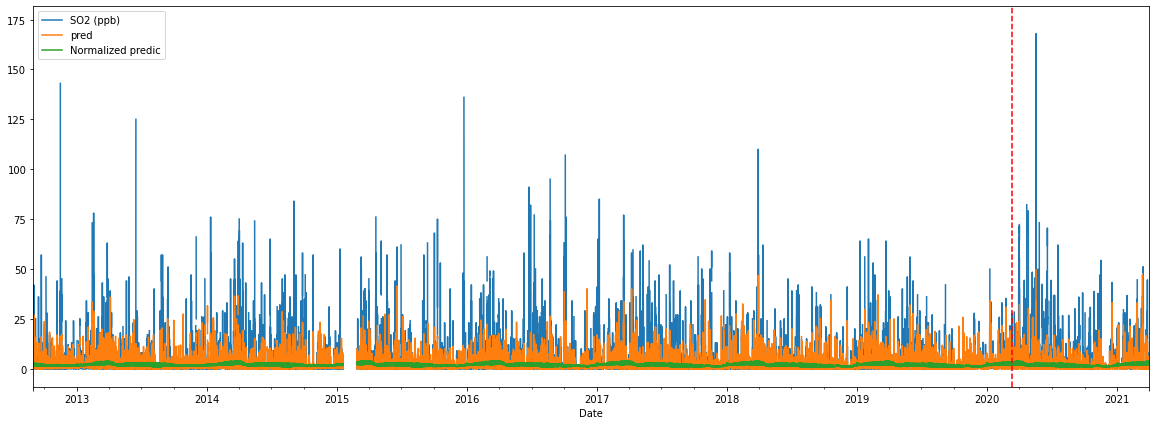

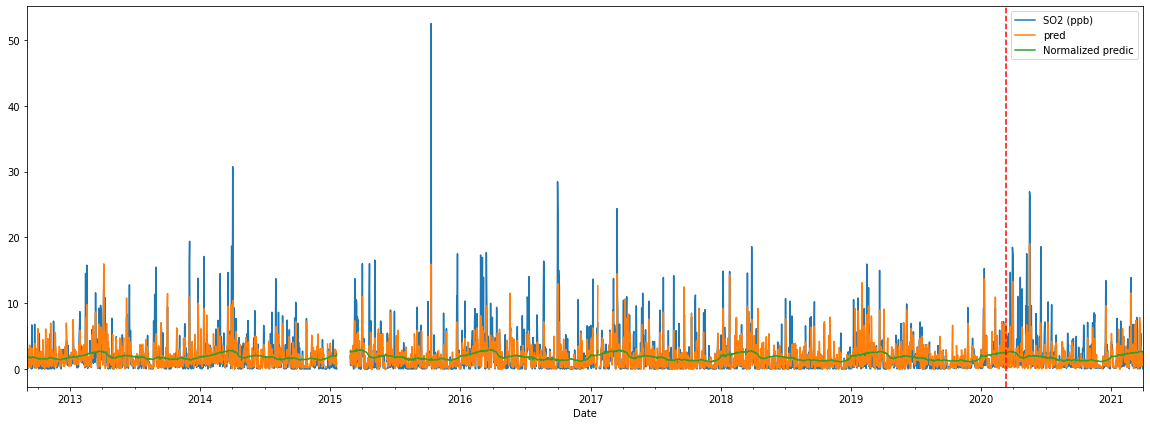

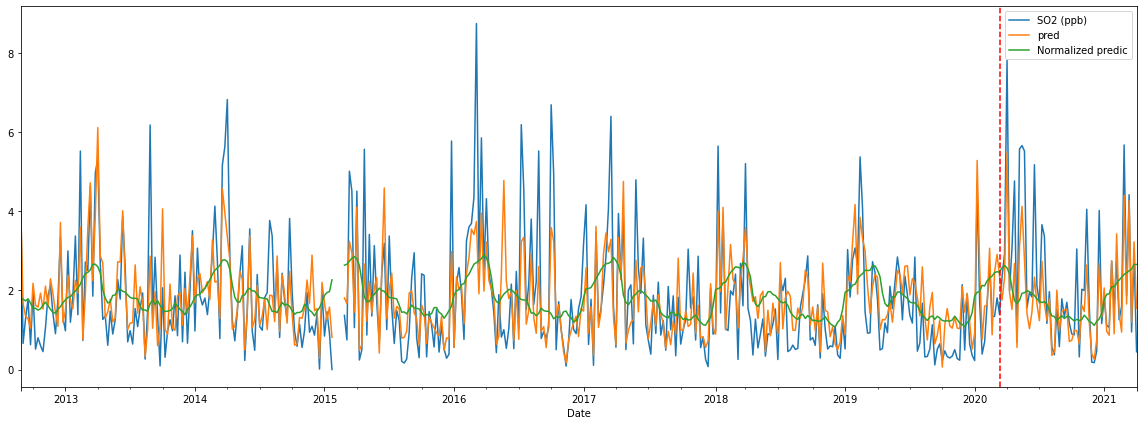

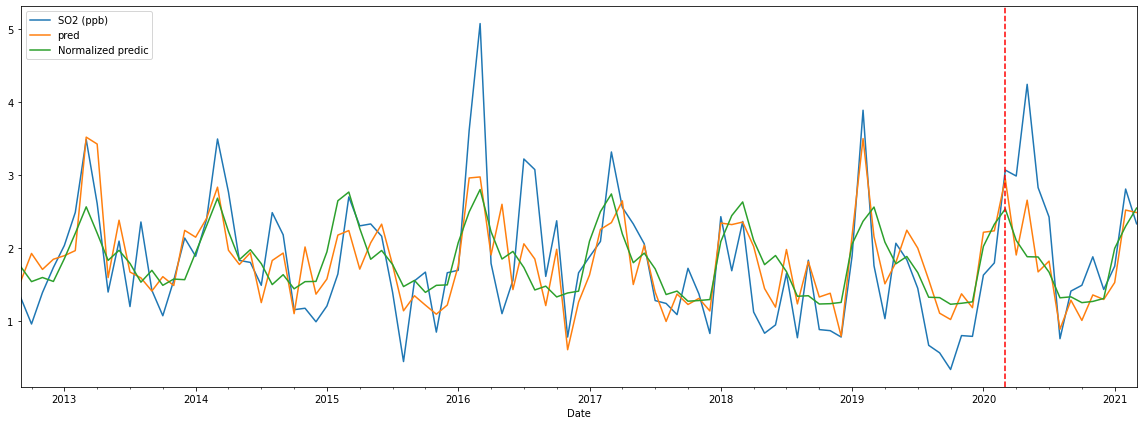

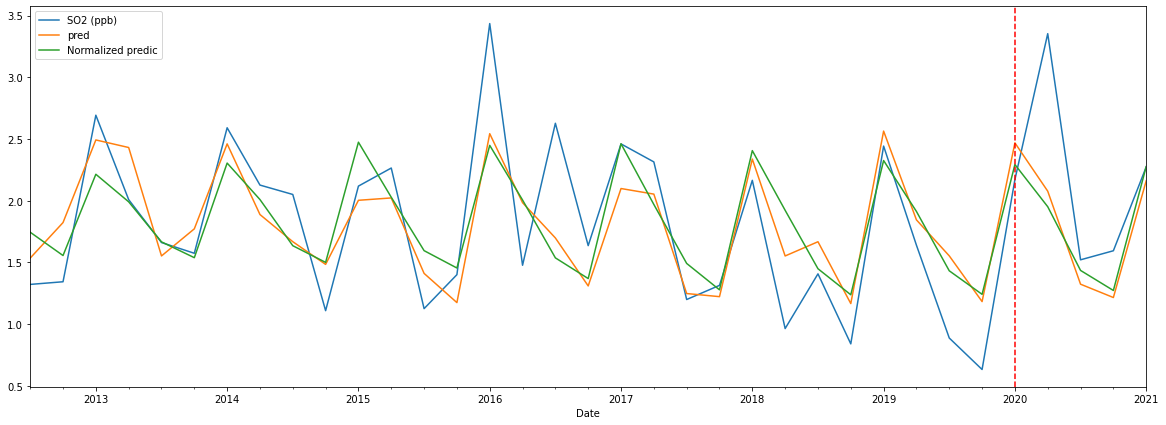

In [ ]:
for i in ['H','D','W','M','Q']:
    df4_h['SO2 (ppb)'].resample(i).mean().plot(legend= True)
    df4_h['pred'].resample(i).mean().plot(legend= True,figsize = (20,7))
    df4_h['Normalized predic'].resample(i).mean().plot(legend= True,figsize = (20,7))
    plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
    plt.show()

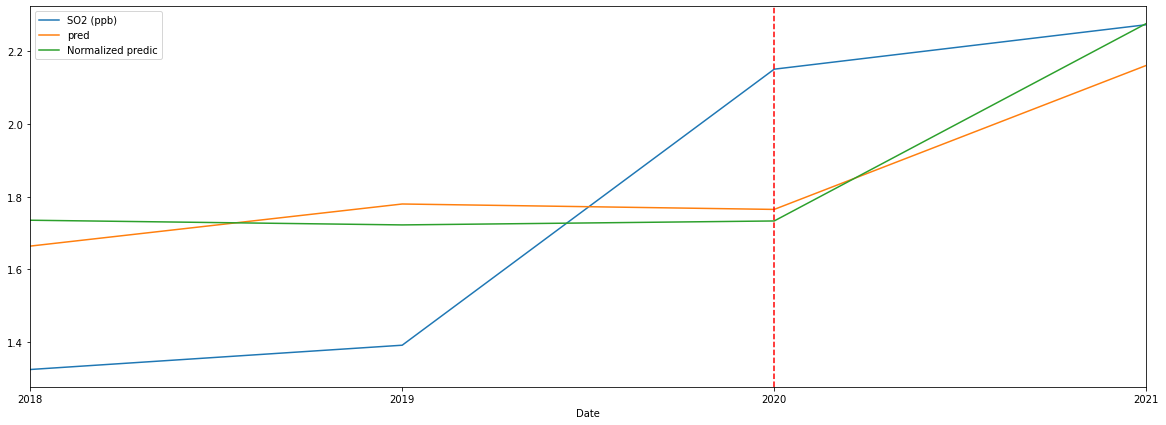

In [ ]:
df4_h['SO2 (ppb)'].resample('Y').mean().loc['2018':].plot(legend= True)
df4_h['pred'].resample('Y').mean().loc['2018':].plot(legend= True,figsize = (20,7))
df4_h['Normalized predic'].resample('Y').mean().loc['2018':].plot(legend= True,figsize = (20,7))
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 

In [ ]:
from keras.layers import Input
from keras.layers import Dense
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Input, Dense, Flatten, concatenate


df2_w_c = df2_w[[ 'CO(ppm)', 'T( C)', 'RH(%)', 'Wind Dir (STD)Unknown ', 'Wind Dir (deg)',
       'Wind speed', 'Incoming Solar Rad. (W/m2)', 'Precip. (mm)', 'hol',
       'hour', 'dayofweek_num', 'Day-year', 'trend',
       'driving', 'transit','walking',
]]
df2_w_c.columns

Index(['CO(ppm)', 'T( C)', 'RH(%)', 'Wind Dir (STD)Unknown ', 'Wind Dir (deg)',
       'Wind speed', 'Incoming Solar Rad. (W/m2)', 'Precip. (mm)', 'hol',
       'hour', 'dayofweek_num', 'Day-year', 'trend', 'driving', 'transit',
       'walking'],
      dtype='object')

In [ ]:
df2_w_c[['driving', 'transit', 'walking']]=df2_w_c[['driving', 'transit', 'walking']]/100

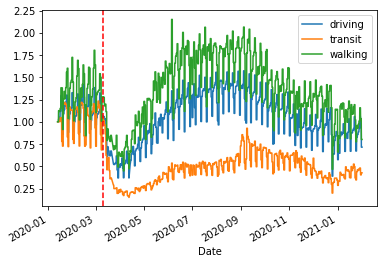

In [ ]:
df2_w_c[['driving', 'transit', 'walking']].plot()
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 

In [ ]:
a = df2_w_c[['driving', 'transit', 'walking']].loc[:'2020-03-11'].copy()
a.mean()

driving    1.124019
transit    1.025378
walking    1.331329
dtype: float64

In [ ]:
Y_a = df2_w_c['CO(ppm)']
Y_a = np.array(Y_a).reshape(-1,1)
X_a = np.array(df2_w_c[['T( C)', 'RH(%)', 'Wind Dir (STD)Unknown ',
       'Wind Dir (deg)', 'Wind speed', 'Incoming Solar Rad. (W/m2)',
       'Precip. (mm)', 'hol', 'hour', 'dayofweek_num', 'Day-year', 'trend',]])
X_b =  np.array(df2_w_c[ ['driving', 'transit', 'walking']])


X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_a, Y_a, test_size=0.2, random_state=42)
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, Y_a, test_size=0.2, random_state=42)

X_traine_a, X_val_a, y_traine_a, y_val_a = train_test_split(X_train_a, y_train_a, test_size=0.25, random_state = 42)
X_traine_b, X_val_b, y_traine_b, y_val_b = train_test_split(X_train_b, y_train_b, test_size=0.25, random_state = 42)

maximum_epochs = 450
early_stop_epochs= 60
learning_rate_epochs = 30
optimizer_direction = 'minimize'
number_of_random_points = 30  # random searches to start opt process
maximum_time = 8*60*60  # seconds

In [ ]:
print(np.shape(X_a),np.shape(X_b),np.shape(Y_a))

(9075, 12) (9075, 3) (9075, 1)


In [ ]:
from keras.layers import Concatenate
from keras.layers.merge import concatenate
from keras.layers import Input, Dense, concatenate
from tensorflow.keras.utils import plot_model
from keras.models import Model

In [ ]:
print(np.shape(X_train_a),np.shape(X_train_b))
print(np.shape(X_traine_a),np.shape(X_traine_b))
print(np.shape(X_val_a),np.shape(X_val_b))

(7260, 12) (7260, 3)
(5445, 12) (5445, 3)
(1815, 12) (1815, 3)


In [ ]:
best_params

{'batchsize': 2500.0,
 'drop_out1': 0.0057066589968766,
 'drop_out2': 0.008999530008727568,
 'drop_out3': 0.0006990849923195847,
 'layers': 3,
 'num_dense_nodes1': 35,
 'num_dense_nodes2': 24,
 'num_dense_nodes3': 28}

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 12)                48        
_________________________________________________________________
dense (Dense)                (None, 35)                455       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 35)                0         
_________________________________________________________________
dropout (Dropout)            (None, 35)                0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 35)                140       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                864       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 24)                0

In [ ]:
class Objective2(object):
    def __init__(self, X_a,X_b, Y, max_epochs, learn_rate_epochs,
                  ):
        self.X_train_a, self.X_test_a, self.y_train_a, self.y_test_a = train_test_split(X_a, Y, test_size=0.001, random_state=42)
        self.X_train_b, self.X_test_b, self.y_train_b, self.y_test_b = train_test_split(X_b, Y, test_size=0.001, random_state=42)

        self.max_epochs = max_epochs
        #self.early_stop = early_stop
        self.learn_rate_epochs = learn_rate_epochs
        # self.n_features = np.shape(self.X_train)[1]
        self.model_fixed = load_model(precovid_model)
        for i in range(0,len(self.model_fixed.layers)):
            self.model_fixed.layers[i].trainable = False

    def __call__(self, trial):        
        dict_params = { 
                        'last_layer' :trial.suggest_int('last_layer',0,1),
                        'two_layer' :trial.suggest_int('two_layer',0,1),
                        'num_dense_nodes1': trial.suggest_int('num_dense_nodes1', 1,3),
                       'num_dense_nodes2': trial.suggest_int('num_dense_nodes2', 1,8),
                        # 'layers': trial.suggest_int('layers', 2,3),
                       'batchsize': int(trial.suggest_discrete_uniform('batchsize', 100,2000,100)),
                      #  'drop_out1': trial.suggest_float('drop_out1',0.0, 0.2),
                       'learning_rate': trial.suggest_float(  'learning_rate',0.001, 0.1),
                        'alpha': trial.suggest_float(  'alpha',0.01, 0.9),
                       'layer_back' :-(trial.suggest_int('layer_back', 1,2)),
                       }  
        # print(dict_params[ 'layer_back'])
        l1 = Input(shape=(3,))
        l1_2 = BatchNormalization()(l1)
        l2 = Dense(dict_params['num_dense_nodes1'],kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(l1_2 )
        l2_2 = LeakyReLU(alpha=dict_params['alpha'])(l2)
        if dict_params['two_layer'] ==1 :
             l2_3 = Dense(1,kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(l2_2 )
             merged = concatenate([self.model_fixed.layers[dict_params[ 'layer_back']].output,l2_3])
        else :
             merged = concatenate([self.model_fixed.layers[dict_params[ 'layer_back']].output,l2_2])
        merged2 = BatchNormalization()(merged)

        if dict_params['last_layer'] ==0:
            l5_2 = Dense(1,kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(merged2)
            l5_3 = LeakyReLU(alpha=dict_params['alpha'])(l5_2)

        if dict_params['last_layer'] ==1:
            l5 = Dense(dict_params['num_dense_nodes2'],kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(merged2) 
            l5_1 = LeakyReLU(alpha=dict_params['alpha'])(l5)
            l5_2 = Dense(1,kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(l5_1)
            l5_3 = LeakyReLU(alpha=dict_params['alpha'])(l5_2)          
        
        model = Model(inputs=[self.model_fixed.input,l1], outputs=l5_3)

        # instantiate and compile model
        opt = keras.optimizers.Adam(learning_rate=dict_params['learning_rate'])
        model.compile(loss='mse',optimizer=opt)
        fn2 = "gdrive/My Drive/Colab Notebooks/Stations/East_ED_NOX_apple" +str(trial.number) + ".ckpt" 
        fnn2 = os.path.dirname(fn2)
        # callbacks for early stopping and for learning rate reducer
        callbacks_list = [
                          #KerasPruningCallback(trial, 'val_loss'),
                          #tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=self.early_stop),                     
                          tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.9, 
                                            patience=self.learn_rate_epochs, 
                                            verbose=0, mode='auto', min_lr=0.000001),
                          tf.keras.callbacks.ModelCheckpoint(filepath=fn2, save_weights_only=True,
                                          monitor='val_loss',mode='min', save_best_only=True)]
        n_f = 5
        kf = KFold(n_splits=n_f )
        acc = 0 

        for train_index, test_index in kf.split( self.X_train_a):   
                X_tr_a, X_tes_a =  self.X_train_a[train_index],  self.X_train_a[test_index]
                X_tr_b, X_tes_b =  self.X_train_b[train_index],  self.X_train_b[test_index]
                y_tr, y_tes =   self.y_train_a[train_index],   self.y_train_a[test_index]    
                # fit the model
                X_traine_a, X_val_a, y_traine_a, y_val_a = train_test_split( X_tr_a,  y_tr, test_size=0.12, random_state = 42)
                X_traine_b, X_val_b, y_traine_b, y_val_b = train_test_split( X_tr_b,  y_tr, test_size=0.12, random_state = 42)


                model.fit(x=[X_traine_a,X_traine_b], y= y_traine_a,
                  validation_data=([X_val_a,X_val_b], y_val_a),
                  batch_size=dict_params['batchsize'],
                  epochs=self.max_epochs,
                  shuffle=True, verbose=0,
                  callbacks=callbacks_list)
                
                model.load_weights(fn2)
                preds = model.predict([X_tes_a,X_tes_b]) 
                # print(np.shape(y_tes),np.shape( preds))
                accuracy = mean_squared_error(y_tes, preds)
                # accuracy = np.min(h.history['val_loss'])
                acc = acc +  accuracy/n_f 
        print(acc)
        return acc    

In [ ]:
objective2 = Objective2(X_a, X_b ,Y_a ,maximum_epochs, learning_rate_epochs)
study2 = optuna.create_study(direction=optimizer_direction, study_name='east_edm_CO_p2',storage='sqlite:///east_edm_CO_p2.db',load_if_exists=True)
study2.optimize(objective2, n_trials=300)
df_results2 = study2.trials_dataframe()
df_results2.to_csv('gdrive/My Drive/Colab Notebooks/results/CO_Edmonton_east_Hyperparams_Stations.csv')
study2.best_trial

[I 2021-04-18 06:37:44,453] A new study created in RDB with name: east_edm_CO_p2
[I 2021-04-18 06:40:22,320] Trial 0 finished with value: 0.0047897337392556185 and parameters: {'last_layer': 1, 'two_layer': 1, 'num_dense_nodes1': 2, 'num_dense_nodes2': 3, 'batchsize': 1300.0, 'learning_rate': 0.08684742896034063, 'alpha': 0.47486431649895633, 'layer_back': 1}. Best is trial 0 with value: 0.0047897337392556185.


0.0047897337392556185


[I 2021-04-18 06:46:17,741] Trial 1 finished with value: 0.0037995427144006185 and parameters: {'last_layer': 1, 'two_layer': 1, 'num_dense_nodes1': 2, 'num_dense_nodes2': 5, 'batchsize': 200.0, 'learning_rate': 0.026645640165432177, 'alpha': 0.2464432589680267, 'layer_back': 2}. Best is trial 1 with value: 0.0037995427144006185.


0.0037995427144006185


[I 2021-04-18 06:49:06,028] Trial 2 finished with value: 0.004990117939045318 and parameters: {'last_layer': 0, 'two_layer': 1, 'num_dense_nodes1': 3, 'num_dense_nodes2': 3, 'batchsize': 1200.0, 'learning_rate': 0.04246052710121524, 'alpha': 0.14036321226448864, 'layer_back': 1}. Best is trial 1 with value: 0.0037995427144006185.


0.004990117939045318


[I 2021-04-18 06:51:38,749] Trial 3 finished with value: 0.004435081840883617 and parameters: {'last_layer': 0, 'two_layer': 1, 'num_dense_nodes1': 2, 'num_dense_nodes2': 8, 'batchsize': 1900.0, 'learning_rate': 0.08019349670014007, 'alpha': 0.801795208357617, 'layer_back': 2}. Best is trial 1 with value: 0.0037995427144006185.


0.004435081840883617


[I 2021-04-18 06:55:41,325] Trial 4 finished with value: 0.004397006773851628 and parameters: {'last_layer': 1, 'two_layer': 1, 'num_dense_nodes1': 1, 'num_dense_nodes2': 6, 'batchsize': 400.0, 'learning_rate': 0.0922021495386216, 'alpha': 0.8714206976745991, 'layer_back': 2}. Best is trial 1 with value: 0.0037995427144006185.


0.004397006773851628


[I 2021-04-18 06:58:39,803] Trial 5 finished with value: 0.004472224808431502 and parameters: {'last_layer': 0, 'two_layer': 1, 'num_dense_nodes1': 1, 'num_dense_nodes2': 1, 'batchsize': 900.0, 'learning_rate': 0.054032085513753485, 'alpha': 0.36356263089297863, 'layer_back': 2}. Best is trial 1 with value: 0.0037995427144006185.


0.004472224808431502


[I 2021-04-18 07:02:19,968] Trial 6 finished with value: 0.004032658481373844 and parameters: {'last_layer': 1, 'two_layer': 1, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 500.0, 'learning_rate': 0.0034103388646587085, 'alpha': 0.8298599523597091, 'layer_back': 2}. Best is trial 1 with value: 0.0037995427144006185.


0.004032658481373844


[I 2021-04-18 07:04:57,913] Trial 7 finished with value: 0.004412881161440907 and parameters: {'last_layer': 0, 'two_layer': 1, 'num_dense_nodes1': 3, 'num_dense_nodes2': 5, 'batchsize': 1400.0, 'learning_rate': 0.024560851403922612, 'alpha': 0.8657303593335849, 'layer_back': 2}. Best is trial 1 with value: 0.0037995427144006185.


0.004412881161440907


[I 2021-04-18 07:07:33,362] Trial 8 finished with value: 0.003962766007027832 and parameters: {'last_layer': 1, 'two_layer': 1, 'num_dense_nodes1': 3, 'num_dense_nodes2': 3, 'batchsize': 1600.0, 'learning_rate': 0.0387484515918348, 'alpha': 0.5935061142207385, 'layer_back': 2}. Best is trial 1 with value: 0.0037995427144006185.


0.003962766007027832


[I 2021-04-18 07:10:45,080] Trial 9 finished with value: 0.004464174746733434 and parameters: {'last_layer': 0, 'two_layer': 1, 'num_dense_nodes1': 3, 'num_dense_nodes2': 2, 'batchsize': 700.0, 'learning_rate': 0.07156430296741274, 'alpha': 0.6837562117270939, 'layer_back': 2}. Best is trial 1 with value: 0.0037995427144006185.


0.004464174746733434


[I 2021-04-18 07:20:10,927] Trial 10 finished with value: 0.0047593223285363065 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 6, 'batchsize': 100.0, 'learning_rate': 0.006393597974084786, 'alpha': 0.09784392044369339, 'layer_back': 1}. Best is trial 1 with value: 0.0037995427144006185.


0.0047593223285363065


[I 2021-04-18 07:22:40,517] Trial 11 finished with value: 0.0038559859859853907 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 4, 'batchsize': 1900.0, 'learning_rate': 0.029641261114048665, 'alpha': 0.3455488342982123, 'layer_back': 2}. Best is trial 1 with value: 0.0037995427144006185.


0.0038559859859853907


[I 2021-04-18 07:25:12,650] Trial 12 finished with value: 0.0037802072596256108 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 5, 'batchsize': 2000.0, 'learning_rate': 0.021318248161901757, 'alpha': 0.27421676161966496, 'layer_back': 2}. Best is trial 12 with value: 0.0037802072596256108.


0.0037802072596256108


[I 2021-04-18 07:34:39,100] Trial 13 finished with value: 0.003838305552608133 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 1, 'num_dense_nodes2': 6, 'batchsize': 100.0, 'learning_rate': 0.01618259930894679, 'alpha': 0.2237909588852787, 'layer_back': 2}. Best is trial 12 with value: 0.0037802072596256108.


0.003838305552608133


[I 2021-04-18 07:37:13,171] Trial 14 finished with value: 0.0037727934709037452 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 5, 'batchsize': 1600.0, 'learning_rate': 0.05463156741271952, 'alpha': 0.023432883667647286, 'layer_back': 2}. Best is trial 14 with value: 0.0037727934709037452.


0.0037727934709037452


[I 2021-04-18 07:39:46,194] Trial 15 finished with value: 0.004717376020706112 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 7, 'batchsize': 1700.0, 'learning_rate': 0.057774493852787316, 'alpha': 0.013468966566860257, 'layer_back': 1}. Best is trial 14 with value: 0.0037727934709037452.


0.004717376020706112


[I 2021-04-18 07:42:17,141] Trial 16 finished with value: 0.003891606393255513 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 1, 'num_dense_nodes2': 4, 'batchsize': 1600.0, 'learning_rate': 0.06483099406582218, 'alpha': 0.048701457819810334, 'layer_back': 2}. Best is trial 14 with value: 0.0037727934709037452.


0.003891606393255513


[I 2021-04-18 07:44:50,068] Trial 17 finished with value: 0.003705317767648349 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 7, 'batchsize': 2000.0, 'learning_rate': 0.042981081545902175, 'alpha': 0.17151924705879706, 'layer_back': 2}. Best is trial 17 with value: 0.003705317767648349.


0.003705317767648349


[I 2021-04-18 07:47:22,992] Trial 18 finished with value: 0.003652074267837431 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.043120594200074316, 'alpha': 0.15356515832757994, 'layer_back': 2}. Best is trial 18 with value: 0.003652074267837431.


0.003652074267837431


[I 2021-04-18 07:49:56,748] Trial 19 finished with value: 0.004855364207538971 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 1, 'num_dense_nodes2': 7, 'batchsize': 2000.0, 'learning_rate': 0.03948108446690251, 'alpha': 0.1731767923827432, 'layer_back': 1}. Best is trial 18 with value: 0.003652074267837431.


0.004855364207538971


[I 2021-04-18 07:52:46,818] Trial 20 finished with value: 0.0036661417054684184 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 8, 'batchsize': 1000.0, 'learning_rate': 0.045596783441498825, 'alpha': 0.46487314129271234, 'layer_back': 2}. Best is trial 18 with value: 0.003652074267837431.


0.0036661417054684184


[I 2021-04-18 07:55:47,695] Trial 21 finished with value: 0.003772814522212643 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 8, 'batchsize': 900.0, 'learning_rate': 0.04376219782019011, 'alpha': 0.495381372771252, 'layer_back': 2}. Best is trial 18 with value: 0.003652074267837431.


0.003772814522212643


[I 2021-04-18 07:58:33,572] Trial 22 finished with value: 0.0037000579251144777 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 7, 'batchsize': 1100.0, 'learning_rate': 0.03235269324681574, 'alpha': 0.40139723428257024, 'layer_back': 2}. Best is trial 18 with value: 0.003652074267837431.


0.0037000579251144777


[I 2021-04-18 08:01:16,242] Trial 23 finished with value: 0.0037201394146138406 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 8, 'batchsize': 1100.0, 'learning_rate': 0.0335829823820747, 'alpha': 0.561915944028579, 'layer_back': 2}. Best is trial 18 with value: 0.003652074267837431.


0.0037201394146138406


[I 2021-04-18 08:04:15,280] Trial 24 finished with value: 0.0037030372913319023 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 7, 'batchsize': 900.0, 'learning_rate': 0.01268992251227287, 'alpha': 0.3938061003278891, 'layer_back': 2}. Best is trial 18 with value: 0.003652074267837431.


0.0037030372913319023


[I 2021-04-18 08:07:38,080] Trial 25 finished with value: 0.003918046517575021 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 8, 'batchsize': 600.0, 'learning_rate': 0.04897050026188292, 'alpha': 0.6753399284001078, 'layer_back': 2}. Best is trial 18 with value: 0.003652074267837431.


0.003918046517575021


[I 2021-04-18 08:10:15,782] Trial 26 finished with value: 0.0038008433695184197 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 1, 'num_dense_nodes2': 7, 'batchsize': 1400.0, 'learning_rate': 0.06522149016140043, 'alpha': 0.42163733919230845, 'layer_back': 2}. Best is trial 18 with value: 0.003652074267837431.


0.0038008433695184197


[I 2021-04-18 08:13:05,072] Trial 27 finished with value: 0.0036111388857046787 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1000.0, 'learning_rate': 0.03298839085103375, 'alpha': 0.3150552800923347, 'layer_back': 2}. Best is trial 27 with value: 0.0036111388857046787.


0.0036111388857046787


[I 2021-04-18 08:16:08,056] Trial 28 finished with value: 0.003597443791057043 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 800.0, 'learning_rate': 0.04885615301916258, 'alpha': 0.29269304131799223, 'layer_back': 2}. Best is trial 28 with value: 0.003597443791057043.


0.003597443791057043


[I 2021-04-18 08:19:12,662] Trial 29 finished with value: 0.0046809329310916956 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 6, 'batchsize': 800.0, 'learning_rate': 0.05995146156015323, 'alpha': 0.30446311601011683, 'layer_back': 1}. Best is trial 28 with value: 0.003597443791057043.


0.0046809329310916956


[I 2021-04-18 08:21:45,673] Trial 30 finished with value: 0.004425357656736 and parameters: {'last_layer': 0, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.0759352310855712, 'alpha': 0.21269011576180244, 'layer_back': 2}. Best is trial 28 with value: 0.003597443791057043.


0.004425357656736


[I 2021-04-18 08:24:37,569] Trial 31 finished with value: 0.0036547160400316313 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1000.0, 'learning_rate': 0.049811468875869416, 'alpha': 0.510738346787994, 'layer_back': 2}. Best is trial 28 with value: 0.003597443791057043.


0.0036547160400316313


[I 2021-04-18 08:27:52,823] Trial 32 finished with value: 0.0037521087301732345 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 700.0, 'learning_rate': 0.049503947678833926, 'alpha': 0.31735277463906175, 'layer_back': 2}. Best is trial 28 with value: 0.003597443791057043.


0.0037521087301732345


[I 2021-04-18 08:30:36,307] Trial 33 finished with value: 0.0037683419447327986 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 1200.0, 'learning_rate': 0.03290226547777786, 'alpha': 0.5286190169685012, 'layer_back': 2}. Best is trial 28 with value: 0.003597443791057043.


0.0037683419447327986


[I 2021-04-18 08:33:27,324] Trial 34 finished with value: 0.003597358919918322 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1000.0, 'learning_rate': 0.036818841872599595, 'alpha': 0.12570513379804832, 'layer_back': 2}. Best is trial 34 with value: 0.003597358919918322.


0.003597358919918322


[I 2021-04-18 08:37:26,272] Trial 35 finished with value: 0.003661138596451478 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 400.0, 'learning_rate': 0.03671876888449163, 'alpha': 0.08397801305678194, 'layer_back': 2}. Best is trial 34 with value: 0.003597358919918322.


0.003661138596451478


[I 2021-04-18 08:40:27,101] Trial 36 finished with value: 0.00359203525150731 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 800.0, 'learning_rate': 0.02437141103670945, 'alpha': 0.12749087727003588, 'layer_back': 2}. Best is trial 36 with value: 0.00359203525150731.


0.00359203525150731


[I 2021-04-18 08:43:26,782] Trial 37 finished with value: 0.0036756314419160397 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 6, 'batchsize': 800.0, 'learning_rate': 0.018931547569790746, 'alpha': 0.2516407308762111, 'layer_back': 2}. Best is trial 36 with value: 0.00359203525150731.


0.0036756314419160397


[I 2021-04-18 08:48:02,902] Trial 38 finished with value: 0.0036545643870157882 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 300.0, 'learning_rate': 0.02603462599572944, 'alpha': 0.14443719906111, 'layer_back': 2}. Best is trial 36 with value: 0.00359203525150731.


0.0036545643870157882


[I 2021-04-18 08:51:18,641] Trial 39 finished with value: 0.004398658143913983 and parameters: {'last_layer': 0, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 600.0, 'learning_rate': 0.02412418866542985, 'alpha': 0.09261962247455818, 'layer_back': 2}. Best is trial 36 with value: 0.00359203525150731.


0.004398658143913983


[I 2021-04-18 08:54:03,235] Trial 40 finished with value: 0.00366032853048446 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 6, 'batchsize': 1200.0, 'learning_rate': 0.028075997597257207, 'alpha': 0.20259126107498393, 'layer_back': 2}. Best is trial 36 with value: 0.00359203525150731.


0.00366032853048446


[I 2021-04-18 08:57:05,594] Trial 41 finished with value: 0.003674477629447893 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 800.0, 'learning_rate': 0.03773808729024592, 'alpha': 0.13311556018712936, 'layer_back': 2}. Best is trial 36 with value: 0.00359203525150731.


0.003674477629447893


[I 2021-04-18 08:59:59,665] Trial 42 finished with value: 0.0036705861586692643 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1000.0, 'learning_rate': 0.014115297813961467, 'alpha': 0.28611068588955, 'layer_back': 2}. Best is trial 36 with value: 0.00359203525150731.


0.0036705861586692643


[I 2021-04-18 09:03:13,164] Trial 43 finished with value: 0.0036713389468197555 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 700.0, 'learning_rate': 0.04560695580139573, 'alpha': 0.3437569312771207, 'layer_back': 2}. Best is trial 36 with value: 0.00359203525150731.


0.0036713389468197555


[I 2021-04-18 09:06:35,814] Trial 44 finished with value: 0.0035783836209078556 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 600.0, 'learning_rate': 0.009070889461271204, 'alpha': 0.13887248911600195, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0035783836209078556


[I 2021-04-18 09:09:57,729] Trial 45 finished with value: 0.003673148714195081 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 600.0, 'learning_rate': 0.009253166791610645, 'alpha': 0.2451607156425593, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003673148714195081


[I 2021-04-18 09:14:01,355] Trial 46 finished with value: 0.004344271113195811 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 1, 'batchsize': 400.0, 'learning_rate': 0.001551960808838477, 'alpha': 0.10569886410992255, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.004344271113195811


[I 2021-04-18 09:17:39,621] Trial 47 finished with value: 0.0037050254039840223 and parameters: {'last_layer': 1, 'two_layer': 1, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 500.0, 'learning_rate': 0.021082510170567333, 'alpha': 0.0668001215058446, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0037050254039840223


[I 2021-04-18 09:20:38,142] Trial 48 finished with value: 0.0036692619534721047 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 900.0, 'learning_rate': 0.007585468046031375, 'alpha': 0.2061475495973082, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0036692619534721047


[I 2021-04-18 09:23:49,174] Trial 49 finished with value: 0.004457879746783033 and parameters: {'last_layer': 0, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 700.0, 'learning_rate': 0.03483835282389286, 'alpha': 0.018344801879960376, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.004457879746783033


[I 2021-04-18 09:26:34,895] Trial 50 finished with value: 0.0035807581552902102 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 1100.0, 'learning_rate': 0.03005652498704963, 'alpha': 0.11696356203274105, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0035807581552902102


[I 2021-04-18 09:29:21,811] Trial 51 finished with value: 0.0036236342891670654 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1100.0, 'learning_rate': 0.09983893132352316, 'alpha': 0.11957067974916365, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0036236342891670654


[I 2021-04-18 09:32:02,631] Trial 52 finished with value: 0.0036302435793163423 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 1200.0, 'learning_rate': 0.02754867420830222, 'alpha': 0.05647608660638647, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0036302435793163423


[I 2021-04-18 09:34:44,744] Trial 53 finished with value: 0.003627053068071688 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.04005811816852655, 'alpha': 0.17080808493297003, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003627053068071688


[I 2021-04-18 09:37:45,884] Trial 54 finished with value: 0.0036920503523068266 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 900.0, 'learning_rate': 0.017979831294330218, 'alpha': 0.2570823577331828, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0036920503523068266


[I 2021-04-18 09:40:36,692] Trial 55 finished with value: 0.003612690295076574 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 1000.0, 'learning_rate': 0.029552755284063505, 'alpha': 0.18039366495456732, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003612690295076574


[I 2021-04-18 09:43:40,566] Trial 56 finished with value: 0.004012695527376038 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 2, 'batchsize': 800.0, 'learning_rate': 0.022565925713046567, 'alpha': 0.03734236499524329, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.004012695527376038


[I 2021-04-18 09:47:16,794] Trial 57 finished with value: 0.003698018600704401 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 6, 'batchsize': 500.0, 'learning_rate': 0.05338960509962787, 'alpha': 0.35126328332328843, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003698018600704401


[I 2021-04-18 09:50:04,725] Trial 58 finished with value: 0.003619003598112455 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1100.0, 'learning_rate': 0.011669376031158469, 'alpha': 0.2338658479883975, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003619003598112455


[I 2021-04-18 09:53:02,416] Trial 59 finished with value: 0.0036054917675212707 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 900.0, 'learning_rate': 0.031117560438016202, 'alpha': 0.12690434404626497, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0036054917675212707


[I 2021-04-18 09:56:06,738] Trial 60 finished with value: 0.003886966241395085 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 6, 'batchsize': 900.0, 'learning_rate': 0.003565187588275332, 'alpha': 0.12617304287730674, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003886966241395085


[I 2021-04-18 09:59:11,214] Trial 61 finished with value: 0.003618826532739045 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 800.0, 'learning_rate': 0.03119470670070372, 'alpha': 0.06717581966642143, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003618826532739045


[I 2021-04-18 10:02:02,407] Trial 62 finished with value: 0.0037632189106060355 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 5, 'batchsize': 1000.0, 'learning_rate': 0.04059941279624269, 'alpha': 0.16862336495408595, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0037632189106060355


[I 2021-04-18 10:05:19,179] Trial 63 finished with value: 0.003794832132947586 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 4, 'batchsize': 700.0, 'learning_rate': 0.036734160746832493, 'alpha': 0.01101319432018788, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003794832132947586


[I 2021-04-18 10:08:20,419] Trial 64 finished with value: 0.003758988776972788 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 900.0, 'learning_rate': 0.029855268948976825, 'alpha': 0.4386976096021802, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003758988776972788


[I 2021-04-18 10:11:42,186] Trial 65 finished with value: 0.0035876522982958357 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 600.0, 'learning_rate': 0.024552341120126213, 'alpha': 0.20134794489311997, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0035876522982958357


[I 2021-04-18 10:15:04,777] Trial 66 finished with value: 0.0036155628523736184 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 600.0, 'learning_rate': 0.016447401975405944, 'alpha': 0.14664495950811754, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0036155628523736184


[I 2021-04-18 10:18:40,103] Trial 67 finished with value: 0.0037361543406670638 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 500.0, 'learning_rate': 0.02482879535124779, 'alpha': 0.18911509071408622, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0037361543406670638


[I 2021-04-18 10:23:14,465] Trial 68 finished with value: 0.004737399253546576 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 300.0, 'learning_rate': 0.045839207163365064, 'alpha': 0.11572139542681772, 'layer_back': 1}. Best is trial 44 with value: 0.0035783836209078556.


0.004737399253546576


[I 2021-04-18 10:26:17,521] Trial 69 finished with value: 0.0035844609162026856 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 800.0, 'learning_rate': 0.021759460493932996, 'alpha': 0.08938362393003896, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0035844609162026856


[I 2021-04-18 10:29:40,721] Trial 70 finished with value: 0.003647474821726536 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 600.0, 'learning_rate': 0.020584896822209618, 'alpha': 0.08688700495047245, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003647474821726536


[I 2021-04-18 10:32:40,862] Trial 71 finished with value: 0.0036240235360119194 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 800.0, 'learning_rate': 0.026636013810065286, 'alpha': 0.04460753701062606, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0036240235360119194


[I 2021-04-18 10:35:57,924] Trial 72 finished with value: 0.003678997217185063 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 700.0, 'learning_rate': 0.02380154186526011, 'alpha': 0.15140441320203327, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003678997217185063


[I 2021-04-18 10:39:01,596] Trial 73 finished with value: 0.003659856745198834 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 800.0, 'learning_rate': 0.015277005770461548, 'alpha': 0.2178303763286192, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003659856745198834


[I 2021-04-18 10:42:16,571] Trial 74 finished with value: 0.0036399907750272265 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 700.0, 'learning_rate': 0.011408912622706538, 'alpha': 0.10321869296892679, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0036399907750272265


[I 2021-04-18 10:45:19,285] Trial 75 finished with value: 0.0037281104148537535 and parameters: {'last_layer': 1, 'two_layer': 1, 'num_dense_nodes1': 3, 'num_dense_nodes2': 6, 'batchsize': 900.0, 'learning_rate': 0.035323452421033984, 'alpha': 0.2846749869393032, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0037281104148537535


[I 2021-04-18 10:48:06,701] Trial 76 finished with value: 0.00361764726075232 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1100.0, 'learning_rate': 0.018785055346852722, 'alpha': 0.08247223174383175, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.00361764726075232


[I 2021-04-18 10:51:06,829] Trial 77 finished with value: 0.0036951690746862827 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 800.0, 'learning_rate': 0.030036815811613576, 'alpha': 0.15370233117847767, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0036951690746862827


[I 2021-04-18 10:53:48,194] Trial 78 finished with value: 0.003591197553125669 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.021596734858180668, 'alpha': 0.19705749126102656, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003591197553125669


[I 2021-04-18 10:56:31,899] Trial 79 finished with value: 0.0036875580454355968 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.004996727049177942, 'alpha': 0.19630957319700593, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.0036875580454355968


[I 2021-04-18 10:59:15,173] Trial 80 finished with value: 0.003672630637413495 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.009725768873874269, 'alpha': 0.23904793658858925, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003672630637413495


[I 2021-04-18 11:02:33,338] Trial 81 finished with value: 0.003608277041588192 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 600.0, 'learning_rate': 0.021177055101469718, 'alpha': 0.13273475258504627, 'layer_back': 2}. Best is trial 44 with value: 0.0035783836209078556.


0.003608277041588192


[I 2021-04-18 11:05:23,493] Trial 82 finished with value: 0.0035357134156083006 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1200.0, 'learning_rate': 0.03251063586877488, 'alpha': 0.16601335847048496, 'layer_back': 2}. Best is trial 82 with value: 0.0035357134156083006.


0.0035357134156083006


[I 2021-04-18 11:08:10,650] Trial 83 finished with value: 0.0035800395220561315 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1200.0, 'learning_rate': 0.027507014638668944, 'alpha': 0.26952999743969175, 'layer_back': 2}. Best is trial 82 with value: 0.0035357134156083006.


0.0035800395220561315


[I 2021-04-18 11:10:53,530] Trial 84 finished with value: 0.003641285084880817 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1200.0, 'learning_rate': 0.024468913257262442, 'alpha': 0.26941083528596615, 'layer_back': 2}. Best is trial 82 with value: 0.0035357134156083006.


0.003641285084880817


[I 2021-04-18 11:13:33,120] Trial 85 finished with value: 0.003613639352689042 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.027506935493900007, 'alpha': 0.16554636650660334, 'layer_back': 2}. Best is trial 82 with value: 0.0035357134156083006.


0.003613639352689042


[I 2021-04-18 11:16:13,848] Trial 86 finished with value: 0.0035454609704569555 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.034075180962035656, 'alpha': 0.19205737194876213, 'layer_back': 2}. Best is trial 82 with value: 0.0035357134156083006.


0.0035454609704569555


[I 2021-04-18 11:18:54,396] Trial 87 finished with value: 0.0036217548071173097 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.018105506543334197, 'alpha': 0.2172761829124636, 'layer_back': 2}. Best is trial 82 with value: 0.0035357134156083006.


0.0036217548071173097


[I 2021-04-18 11:21:32,202] Trial 88 finished with value: 0.0036196131119005967 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.013644839043071016, 'alpha': 0.18554443324755185, 'layer_back': 2}. Best is trial 82 with value: 0.0035357134156083006.


0.0036196131119005967


[I 2021-04-18 11:24:10,911] Trial 89 finished with value: 0.003572944589854708 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.02174303974596932, 'alpha': 0.06885902281378707, 'layer_back': 2}. Best is trial 82 with value: 0.0035357134156083006.


0.003572944589854708


[I 2021-04-18 11:26:50,606] Trial 90 finished with value: 0.003906346283951516 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 3, 'batchsize': 1500.0, 'learning_rate': 0.03323653174387488, 'alpha': 0.03163285232628042, 'layer_back': 2}. Best is trial 82 with value: 0.0035357134156083006.


0.003906346283951516


[I 2021-04-18 11:29:31,353] Trial 91 finished with value: 0.003578888868218704 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.022580602914511808, 'alpha': 0.06713185538847133, 'layer_back': 2}. Best is trial 82 with value: 0.0035357134156083006.


0.003578888868218704


[I 2021-04-18 11:32:08,581] Trial 92 finished with value: 0.0035789263141083713 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.021256605621501615, 'alpha': 0.06634621015162126, 'layer_back': 2}. Best is trial 82 with value: 0.0035357134156083006.


0.0035789263141083713


[I 2021-04-18 11:34:49,916] Trial 93 finished with value: 0.003544189206426239 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.02748340529865124, 'alpha': 0.07868991239964429, 'layer_back': 2}. Best is trial 82 with value: 0.0035357134156083006.


0.003544189206426239


[I 2021-04-18 11:37:33,179] Trial 94 finished with value: 0.0035499476797488643 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.02892486834145689, 'alpha': 0.07221984870581319, 'layer_back': 2}. Best is trial 82 with value: 0.0035357134156083006.


0.0035499476797488643


[I 2021-04-18 11:40:14,572] Trial 95 finished with value: 0.0035273632980514285 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.027834554447690413, 'alpha': 0.06732285000688103, 'layer_back': 2}. Best is trial 95 with value: 0.0035273632980514285.


0.0035273632980514285


[I 2021-04-18 11:42:52,853] Trial 96 finished with value: 0.0036086771352365947 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.02637530840203316, 'alpha': 0.05953489610216768, 'layer_back': 2}. Best is trial 95 with value: 0.0035273632980514285.


0.0036086771352365947


[I 2021-04-18 11:45:38,794] Trial 97 finished with value: 0.0035684357428775186 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1200.0, 'learning_rate': 0.027517728652115728, 'alpha': 0.07593898838347986, 'layer_back': 2}. Best is trial 95 with value: 0.0035273632980514285.


0.0035684357428775186


[I 2021-04-18 11:48:20,507] Trial 98 finished with value: 0.003583852513729412 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.03367874759681739, 'alpha': 0.06942447131849512, 'layer_back': 2}. Best is trial 95 with value: 0.0035273632980514285.


0.003583852513729412


[I 2021-04-18 11:50:57,066] Trial 99 finished with value: 0.003541288425685317 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.041358766423868744, 'alpha': 0.021920382234198947, 'layer_back': 2}. Best is trial 95 with value: 0.0035273632980514285.


0.003541288425685317


[I 2021-04-18 11:53:42,845] Trial 100 finished with value: 0.0036243488752047467 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1200.0, 'learning_rate': 0.04030568364072326, 'alpha': 0.02384229949250582, 'layer_back': 2}. Best is trial 95 with value: 0.0035273632980514285.


0.0036243488752047467


[I 2021-04-18 11:56:21,539] Trial 101 finished with value: 0.003627937411450544 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.035398043970041676, 'alpha': 0.03950052041260174, 'layer_back': 2}. Best is trial 95 with value: 0.0035273632980514285.


0.003627937411450544


[I 2021-04-18 11:59:00,418] Trial 102 finished with value: 0.003627126043875543 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.03832592467033967, 'alpha': 0.10048283220351684, 'layer_back': 2}. Best is trial 95 with value: 0.0035273632980514285.


0.003627126043875543


[I 2021-04-18 12:01:36,789] Trial 103 finished with value: 0.0035408315369076784 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.032256016881253326, 'alpha': 0.07030089565296588, 'layer_back': 2}. Best is trial 95 with value: 0.0035273632980514285.


0.0035408315369076784


[I 2021-04-18 12:04:17,971] Trial 104 finished with value: 0.003566082616285739 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04262395762710679, 'alpha': 0.01173160141920479, 'layer_back': 2}. Best is trial 95 with value: 0.0035273632980514285.


0.003566082616285739


[I 2021-04-18 12:06:58,238] Trial 105 finished with value: 0.0035737931205732376 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04227819138674002, 'alpha': 0.010660044984515019, 'layer_back': 2}. Best is trial 95 with value: 0.0035273632980514285.


0.0035737931205732376


[I 2021-04-18 12:09:32,119] Trial 106 finished with value: 0.0035184089995725617 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.043629287038235834, 'alpha': 0.010426390915745402, 'layer_back': 2}. Best is trial 106 with value: 0.0035184089995725617.


0.0035184089995725617


[I 2021-04-18 12:12:07,413] Trial 107 finished with value: 0.0034912184906821125 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04304162747051637, 'alpha': 0.044280753511746956, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0034912184906821125


[I 2021-04-18 12:14:44,123] Trial 108 finished with value: 0.0036380100736029142 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.046899784330746694, 'alpha': 0.011423731168029368, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0036380100736029142


[I 2021-04-18 12:17:20,619] Trial 109 finished with value: 0.0035930917231830005 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.05312662202242775, 'alpha': 0.04766526633420203, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035930917231830005


[I 2021-04-18 12:19:56,882] Trial 110 finished with value: 0.0035019395412586403 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04297554301809757, 'alpha': 0.03108575464071467, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035019395412586403


[I 2021-04-18 12:22:26,683] Trial 111 finished with value: 0.0035799057324392095 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.042791521010711986, 'alpha': 0.033242351358857565, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035799057324392095


[I 2021-04-18 12:25:01,093] Trial 112 finished with value: 0.003567586631908924 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04188075691123601, 'alpha': 0.012902457195305648, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003567586631908924


[I 2021-04-18 12:27:37,137] Trial 113 finished with value: 0.003552786707766206 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.04705313553365665, 'alpha': 0.024024393886675065, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003552786707766206


[I 2021-04-18 12:30:14,683] Trial 114 finished with value: 0.0035491374611036066 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1900.0, 'learning_rate': 0.04792414670441766, 'alpha': 0.04942912887788908, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035491374611036066


[I 2021-04-18 12:32:47,942] Trial 115 finished with value: 0.003934744163417141 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1900.0, 'learning_rate': 0.05138779832449931, 'alpha': 0.7678284116404237, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003934744163417141


[I 2021-04-18 12:35:21,813] Trial 116 finished with value: 0.0035480745063304685 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.04672929967596791, 'alpha': 0.0543681486748597, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035480745063304685


[I 2021-04-18 12:37:57,950] Trial 117 finished with value: 0.003645209428448006 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.058597540974892046, 'alpha': 0.054075814336391005, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003645209428448006


[I 2021-04-18 12:40:31,646] Trial 118 finished with value: 0.003635834268763575 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1900.0, 'learning_rate': 0.04497558570260886, 'alpha': 0.10395749038880057, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003635834268763575


[I 2021-04-18 12:43:09,338] Trial 119 finished with value: 0.0036447334704852665 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 1800.0, 'learning_rate': 0.04781462434994531, 'alpha': 0.04268750205527756, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0036447334704852665


[I 2021-04-18 12:45:44,270] Trial 120 finished with value: 0.003567690380984065 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.037831602089136926, 'alpha': 0.0894939850401166, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003567690380984065


[I 2021-04-18 12:48:19,955] Trial 121 finished with value: 0.0036418865284299482 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.049910163797960434, 'alpha': 0.02265761100617698, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0036418865284299482


[I 2021-04-18 12:50:50,152] Trial 122 finished with value: 0.003626350371093418 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 2000.0, 'learning_rate': 0.04409374352769631, 'alpha': 0.04839758470877351, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003626350371093418


[I 2021-04-18 12:53:25,935] Trial 123 finished with value: 0.004068899031879057 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 2, 'batchsize': 1900.0, 'learning_rate': 0.04692551724599392, 'alpha': 0.027164865650236767, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.004068899031879057


[I 2021-04-18 12:56:09,582] Trial 124 finished with value: 0.003549524306460534 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.05601252997839943, 'alpha': 0.08216270418670965, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003549524306460534


[I 2021-04-18 12:58:52,986] Trial 125 finished with value: 0.0036022166677025626 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.051026693295636215, 'alpha': 0.08169432284004574, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0036022166677025626


[I 2021-04-18 13:01:25,923] Trial 126 finished with value: 0.0036323884269265395 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.05755736475611723, 'alpha': 0.10764012747900042, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0036323884269265395


[I 2021-04-18 13:04:06,681] Trial 127 finished with value: 0.0035868803510106743 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.06484074739859898, 'alpha': 0.04916233098402338, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035868803510106743


[I 2021-04-18 13:06:48,784] Trial 128 finished with value: 0.003632038891645508 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 1400.0, 'learning_rate': 0.05481967090549042, 'alpha': 0.09493718561374137, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003632038891645508


[I 2021-04-18 13:09:24,704] Trial 129 finished with value: 0.0036332687347207073 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.06164699827462552, 'alpha': 0.11368639196612304, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0036332687347207073


[I 2021-04-18 13:12:02,225] Trial 130 finished with value: 0.0036107090038871685 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.031913432524153476, 'alpha': 0.07944764608488178, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0036107090038871685


[I 2021-04-18 13:14:37,997] Trial 131 finished with value: 0.003543857849946714 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.04047866711207972, 'alpha': 0.03334890991576665, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003543857849946714


[I 2021-04-18 13:17:10,956] Trial 132 finished with value: 0.003614544482168527 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.03927975006627224, 'alpha': 0.05750478466882326, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003614544482168527


[I 2021-04-18 13:19:52,496] Trial 133 finished with value: 0.0036289459230039846 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.03602600147397279, 'alpha': 0.03879102885756539, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0036289459230039846


[I 2021-04-18 13:22:21,926] Trial 134 finished with value: 0.004397730627210862 and parameters: {'last_layer': 0, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04121745337090514, 'alpha': 0.07727507999023213, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.004397730627210862


[I 2021-04-18 13:25:09,682] Trial 135 finished with value: 0.0035954891884910044 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1200.0, 'learning_rate': 0.05591938878661566, 'alpha': 0.011489115255243473, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035954891884910044


[I 2021-04-18 13:27:46,099] Trial 136 finished with value: 0.003632190940638184 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 2000.0, 'learning_rate': 0.04473961188420494, 'alpha': 0.05883472932516892, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003632190940638184


[I 2021-04-18 13:30:22,676] Trial 137 finished with value: 0.004797824764292689 and parameters: {'last_layer': 1, 'two_layer': 1, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1900.0, 'learning_rate': 0.03394020855741806, 'alpha': 0.6177230050734727, 'layer_back': 1}. Best is trial 107 with value: 0.0034912184906821125.


0.004797824764292689


[I 2021-04-18 13:32:54,827] Trial 138 finished with value: 0.0035575625191086686 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.03925631108791122, 'alpha': 0.02976577533102045, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035575625191086686


[I 2021-04-18 13:35:35,526] Trial 139 finished with value: 0.0037383972180743746 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 1400.0, 'learning_rate': 0.02925391477758371, 'alpha': 0.13393207397187767, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0037383972180743746


[I 2021-04-18 13:38:16,882] Trial 140 finished with value: 0.003617621733455551 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 1, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.03195637257591547, 'alpha': 0.0947751465706642, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003617621733455551


[I 2021-04-18 13:40:50,663] Trial 141 finished with value: 0.003579242154278799 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.0485447382823182, 'alpha': 0.01176858180870248, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003579242154278799


[I 2021-04-18 13:43:25,476] Trial 142 finished with value: 0.0035750086655864273 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1900.0, 'learning_rate': 0.046567743860348884, 'alpha': 0.026818371099279946, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035750086655864273


[I 2021-04-18 13:46:00,498] Trial 143 finished with value: 0.003623829402881311 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.03742158374219033, 'alpha': 0.04975293319513799, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003623829402881311


[I 2021-04-18 13:48:38,218] Trial 144 finished with value: 0.0036066806414085484 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.05148602571649974, 'alpha': 0.010300864640383572, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0036066806414085484


[I 2021-04-18 13:51:09,839] Trial 145 finished with value: 0.003610979298586066 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.043772802510158214, 'alpha': 0.07001141819525372, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003610979298586066


[I 2021-04-18 13:53:44,355] Trial 146 finished with value: 0.0035619962671982527 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.04082403791540483, 'alpha': 0.035248606443724864, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035619962671982527


[I 2021-04-18 13:56:26,877] Trial 147 finished with value: 0.003548864702878114 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.04862893209367515, 'alpha': 0.11504554485639235, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003548864702878114


[I 2021-04-18 13:59:07,487] Trial 148 finished with value: 0.0036127803252306075 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.034866037784612974, 'alpha': 0.15803031484071783, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0036127803252306075


[I 2021-04-18 14:01:52,630] Trial 149 finished with value: 0.0035717142472204513 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1200.0, 'learning_rate': 0.04905384303207223, 'alpha': 0.11415311920269179, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035717142472204513


[I 2021-04-18 14:04:32,812] Trial 150 finished with value: 0.0035749882689068164 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.04526973875676865, 'alpha': 0.14572957071712894, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035749882689068164


[I 2021-04-18 14:07:16,399] Trial 151 finished with value: 0.0035993304069324022 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.052491361045237814, 'alpha': 0.08397349335013253, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035993304069324022


[I 2021-04-18 14:09:58,621] Trial 152 finished with value: 0.0035685056911281127 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.04837346606791395, 'alpha': 0.06310254703879091, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035685056911281127


[I 2021-04-18 14:12:29,525] Trial 153 finished with value: 0.003629879513305761 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.0438214208862195, 'alpha': 0.10403865238259322, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003629879513305761


[I 2021-04-18 14:15:14,227] Trial 154 finished with value: 0.0036221795403482207 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1200.0, 'learning_rate': 0.03029487512047642, 'alpha': 0.04348614544060133, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0036221795403482207


[I 2021-04-18 14:17:57,080] Trial 155 finished with value: 0.0035922583407074988 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.03843837268200991, 'alpha': 0.08433177217864488, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035922583407074988


[I 2021-04-18 14:20:36,152] Trial 156 finished with value: 0.003578072413719791 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.046367859672450995, 'alpha': 0.12254720867272155, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003578072413719791


[I 2021-04-18 14:23:15,649] Trial 157 finished with value: 0.0038583845758324883 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.0871450624590979, 'alpha': 0.056755344230540905, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0038583845758324883


[I 2021-04-18 14:25:52,255] Trial 158 finished with value: 0.003580582397543033 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1900.0, 'learning_rate': 0.041182684797758676, 'alpha': 0.031335914276621774, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003580582397543033


[I 2021-04-18 14:28:31,244] Trial 159 finished with value: 0.003571554999049949 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.050511120203456654, 'alpha': 0.011355553310716315, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003571554999049949


[I 2021-04-18 14:31:10,768] Trial 160 finished with value: 0.0035740442082979025 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 1300.0, 'learning_rate': 0.054629022232272034, 'alpha': 0.09769506994297086, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035740442082979025


[I 2021-04-18 14:33:46,785] Trial 161 finished with value: 0.0035316717327896836 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.03947842688021926, 'alpha': 0.02587334876105694, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035316717327896836


[I 2021-04-18 14:36:22,973] Trial 162 finished with value: 0.003583261784611461 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.0426931007941171, 'alpha': 0.06941424492182441, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003583261784611461


[I 2021-04-18 14:38:56,920] Trial 163 finished with value: 0.0035638605296477717 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.03698103592588202, 'alpha': 0.02604575458608599, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035638605296477717


[I 2021-04-18 14:41:34,556] Trial 164 finished with value: 0.0036057247992290833 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.033843190233136235, 'alpha': 0.054628128789041205, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0036057247992290833


[I 2021-04-18 14:44:05,291] Trial 165 finished with value: 0.0036577139832949667 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1900.0, 'learning_rate': 0.02862847367159879, 'alpha': 0.041190982009615476, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0036577139832949667


[I 2021-04-18 14:46:34,411] Trial 166 finished with value: 0.0035796291367728578 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1100.0, 'learning_rate': 0.03989602686737119, 'alpha': 0.07720076451956273, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0035796291367728578


[I 2021-04-18 14:48:58,970] Trial 167 finished with value: 0.003644684403214736 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.031894620734671836, 'alpha': 0.011244612673171901, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003644684403214736


[I 2021-04-18 14:51:15,955] Trial 168 finished with value: 0.003719212403160626 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.061535654734255804, 'alpha': 0.04944139280228774, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003719212403160626


[I 2021-04-18 14:53:47,133] Trial 169 finished with value: 0.003569251268532048 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1200.0, 'learning_rate': 0.04736210238892834, 'alpha': 0.0924816749854882, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.003569251268532048


[I 2021-04-18 14:56:10,412] Trial 170 finished with value: 0.0037302293516410364 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 4, 'batchsize': 1800.0, 'learning_rate': 0.042194509368665326, 'alpha': 0.026662365080105572, 'layer_back': 2}. Best is trial 107 with value: 0.0034912184906821125.


0.0037302293516410364


[I 2021-04-18 14:58:32,142] Trial 171 finished with value: 0.003412203995094343 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.03982358083063548, 'alpha': 0.02422528261030567, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003412203995094343


[I 2021-04-18 15:00:56,204] Trial 172 finished with value: 0.003615212962045835 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 2000.0, 'learning_rate': 0.035269743884066396, 'alpha': 0.06515792117672077, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003615212962045835


[I 2021-04-18 15:03:19,432] Trial 173 finished with value: 0.0035065927685166407 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.04495904398462532, 'alpha': 0.03706846553808014, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035065927685166407


[I 2021-04-18 15:05:42,080] Trial 174 finished with value: 0.0036824767911479953 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.044788002773288774, 'alpha': 0.04279176989414291, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036824767911479953


[I 2021-04-18 15:07:59,615] Trial 175 finished with value: 0.0036000802274304988 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1900.0, 'learning_rate': 0.03973925069572923, 'alpha': 0.06946943028331976, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036000802274304988


[I 2021-04-18 15:10:20,601] Trial 176 finished with value: 0.0035611477676499243 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.03702719792209683, 'alpha': 0.1178740272614942, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035611477676499243


[I 2021-04-18 15:12:44,718] Trial 177 finished with value: 0.0035568862168302313 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.04446509916080676, 'alpha': 0.035536762139547574, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035568862168302313


[I 2021-04-18 15:15:03,641] Trial 178 finished with value: 0.0035634161691522025 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.02555669877180687, 'alpha': 0.01426667868106541, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035634161691522025


[I 2021-04-18 15:17:27,644] Trial 179 finished with value: 0.0035478477954239184 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.041044999411233324, 'alpha': 0.05809175905373737, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035478477954239184


[I 2021-04-18 15:19:49,604] Trial 180 finished with value: 0.003577680895181763 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04266781899508782, 'alpha': 0.057332493065063835, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003577680895181763


[I 2021-04-18 15:22:18,574] Trial 181 finished with value: 0.0037241810267514214 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1200.0, 'learning_rate': 0.04124794281390582, 'alpha': 0.08344018331911048, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0037241810267514214


[I 2021-04-18 15:24:42,413] Trial 182 finished with value: 0.003574937953275326 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1300.0, 'learning_rate': 0.03909174129413975, 'alpha': 0.04955591990925821, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003574937953275326


[I 2021-04-18 15:27:09,745] Trial 183 finished with value: 0.0035062207386055725 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.032919202764146074, 'alpha': 0.10296721914045874, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035062207386055725


[I 2021-04-18 15:29:33,614] Trial 184 finished with value: 0.003607310672142692 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.03299384364237505, 'alpha': 0.13543758486151475, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003607310672142692


[I 2021-04-18 15:31:56,820] Trial 185 finished with value: 0.0035645622965729045 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1400.0, 'learning_rate': 0.036200243037322145, 'alpha': 0.10015962959305305, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035645622965729045


[I 2021-04-18 15:34:23,869] Trial 186 finished with value: 0.0035128649499357135 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04591334979902456, 'alpha': 0.01300643385682445, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035128649499357135


[I 2021-04-18 15:36:50,059] Trial 187 finished with value: 0.003512579959993758 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.045967118012657425, 'alpha': 0.02955287318190126, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003512579959993758


[I 2021-04-18 15:39:17,519] Trial 188 finished with value: 0.003601852298015445 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04515211154273283, 'alpha': 0.02414511899844717, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003601852298015445


[I 2021-04-18 15:41:44,658] Trial 189 finished with value: 0.003551257039072739 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.043685650639080496, 'alpha': 0.011272541261604586, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003551257039072739


[I 2021-04-18 15:44:08,778] Trial 190 finished with value: 0.0035124462407048578 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04088523362317096, 'alpha': 0.027965921768034883, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035124462407048578


[I 2021-04-18 15:46:32,527] Trial 191 finished with value: 0.0036034748711966606 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04059492734596064, 'alpha': 0.0316931464485652, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036034748711966606


[I 2021-04-18 15:48:52,857] Trial 192 finished with value: 0.0035462040161388982 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.038480226797782575, 'alpha': 0.013080349410333715, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035462040161388982


[I 2021-04-18 15:51:15,074] Trial 193 finished with value: 0.003514729419201148 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.038804046086792734, 'alpha': 0.01722318588576137, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003514729419201148


[I 2021-04-18 15:53:39,774] Trial 194 finished with value: 0.003530635344402702 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.038022625191625484, 'alpha': 0.010260560665283323, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003530635344402702


[I 2021-04-18 15:56:01,357] Trial 195 finished with value: 0.0036120263950969846 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.037603653740255726, 'alpha': 0.010350360726464305, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036120263950969846


[I 2021-04-18 15:58:21,259] Trial 196 finished with value: 0.0035517522803226497 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.03532284563567649, 'alpha': 0.012252207673505294, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035517522803226497


[I 2021-04-18 16:00:42,685] Trial 197 finished with value: 0.0035774729128351572 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.03851591509172416, 'alpha': 0.024592933498452187, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035774729128351572


[I 2021-04-18 16:03:10,397] Trial 198 finished with value: 0.0036300873338133174 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.03161093718448926, 'alpha': 0.011231732922341914, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036300873338133174


[I 2021-04-18 16:05:32,864] Trial 199 finished with value: 0.003594899268962292 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.03400517384369343, 'alpha': 0.010987625678645163, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003594899268962292


[I 2021-04-18 16:07:55,556] Trial 200 finished with value: 0.003507502110225467 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.03903066389229184, 'alpha': 0.03436414346888904, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003507502110225467


[I 2021-04-18 16:10:20,454] Trial 201 finished with value: 0.0035410174116621788 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.0385769119015159, 'alpha': 0.03980816279456982, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035410174116621788


[I 2021-04-18 16:12:45,074] Trial 202 finished with value: 0.003500324891873184 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.042028674607372564, 'alpha': 0.035300834875109204, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003500324891873184


[I 2021-04-18 16:15:09,269] Trial 203 finished with value: 0.0035591510309502424 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04246721082689016, 'alpha': 0.03438254597895686, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035591510309502424


[I 2021-04-18 16:17:27,832] Trial 204 finished with value: 0.0035809591968109468 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.03985309920583796, 'alpha': 0.03051312835022787, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035809591968109468


[I 2021-04-18 16:19:46,336] Trial 205 finished with value: 0.0035329556853449626 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04302937726174949, 'alpha': 0.041497953561731075, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035329556853449626


[I 2021-04-18 16:22:06,046] Trial 206 finished with value: 0.0035995980573277605 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.042934896863311735, 'alpha': 0.039304783000125264, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035995980573277605


[I 2021-04-18 16:24:23,248] Trial 207 finished with value: 0.0036285669261463425 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04139101863112104, 'alpha': 0.04261236299648191, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036285669261463425


[I 2021-04-18 16:26:41,935] Trial 208 finished with value: 0.0035261087563540814 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.036838583737843406, 'alpha': 0.010914683684806366, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035261087563540814


[I 2021-04-18 16:28:57,689] Trial 209 finished with value: 0.0036736991070403626 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.03673113267779741, 'alpha': 0.01411948992981912, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036736991070403626


[I 2021-04-18 16:31:14,218] Trial 210 finished with value: 0.003515510628468558 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.0375123413072075, 'alpha': 0.026801330195408788, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003515510628468558


[I 2021-04-18 16:33:31,616] Trial 211 finished with value: 0.0036619003719104474 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.03820623138649496, 'alpha': 0.010153124386418449, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036619003719104474


[I 2021-04-18 16:35:49,042] Trial 212 finished with value: 0.003602818230449912 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.03959580915067272, 'alpha': 0.027499310441006536, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003602818230449912


[I 2021-04-18 16:38:08,801] Trial 213 finished with value: 0.003561704765028999 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.03612046104363647, 'alpha': 0.044035880327440075, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003561704765028999


[I 2021-04-18 16:40:34,504] Trial 214 finished with value: 0.003592007871833824 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04370049977603333, 'alpha': 0.02920150412919489, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003592007871833824


[I 2021-04-18 16:42:55,087] Trial 215 finished with value: 0.00351462664371098 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.0454740119732067, 'alpha': 0.010495159169710357, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.00351462664371098


[I 2021-04-18 16:45:14,094] Trial 216 finished with value: 0.003586321240898763 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04511581530325534, 'alpha': 0.05695382241574087, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003586321240898763


[I 2021-04-18 16:47:33,201] Trial 217 finished with value: 0.003550850628097577 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.046083333365054775, 'alpha': 0.010031182438903608, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003550850628097577


[I 2021-04-18 16:49:49,786] Trial 218 finished with value: 0.003574316805279423 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.03776962442231015, 'alpha': 0.01087974243831754, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003574316805279423


[I 2021-04-18 16:52:07,807] Trial 219 finished with value: 0.003592576788837446 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04233420788943894, 'alpha': 0.044863914777429736, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003592576788837446


[I 2021-04-18 16:54:23,320] Trial 220 finished with value: 0.0035791068843512115 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.03540338546231751, 'alpha': 0.06466753594289008, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035791068843512115


[I 2021-04-18 16:56:45,624] Trial 221 finished with value: 0.0035080006628703977 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04080187257128169, 'alpha': 0.02517051340915846, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035080006628703977


[I 2021-04-18 16:59:10,209] Trial 222 finished with value: 0.003534858951378764 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.039077436368116635, 'alpha': 0.02885009674334453, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003534858951378764


[I 2021-04-18 17:01:32,489] Trial 223 finished with value: 0.0035600183170591336 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04037327285207486, 'alpha': 0.010218259695493757, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035600183170591336


[I 2021-04-18 17:03:59,538] Trial 224 finished with value: 0.00357621728770453 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04402809698710642, 'alpha': 0.030946556782538822, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.00357621728770453


[I 2021-04-18 17:06:22,498] Trial 225 finished with value: 0.004343070192053122 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04210862734231485, 'alpha': 0.8978062302113005, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.004343070192053122


[I 2021-04-18 17:08:42,266] Trial 226 finished with value: 0.00348994671120034 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.039712978464816924, 'alpha': 0.024397619671189186, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.00348994671120034


[I 2021-04-18 17:10:59,711] Trial 227 finished with value: 0.0036327829172039363 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.03987289215731558, 'alpha': 0.02250455655984187, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036327829172039363


[I 2021-04-18 17:13:17,616] Trial 228 finished with value: 0.0035863816006844592 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.045535379101367554, 'alpha': 0.01124262972279364, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035863816006844592


[I 2021-04-18 17:15:35,516] Trial 229 finished with value: 0.003724723343216221 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.03704451183437776, 'alpha': 0.04707960454629442, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003724723343216221


[I 2021-04-18 17:17:56,682] Trial 230 finished with value: 0.003542300775869218 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.043373142611203674, 'alpha': 0.027741305329135237, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003542300775869218


[I 2021-04-18 17:20:22,682] Trial 231 finished with value: 0.0034967214164662516 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.0413254155114597, 'alpha': 0.05450900763386603, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0034967214164662516


[I 2021-04-18 17:22:44,729] Trial 232 finished with value: 0.0034902379436158775 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04068791995954499, 'alpha': 0.010222168909410259, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0034902379436158775


[I 2021-04-18 17:25:06,837] Trial 233 finished with value: 0.0035696997278384553 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04139126758896274, 'alpha': 0.026033995263578885, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035696997278384553


[I 2021-04-18 17:27:27,456] Trial 234 finished with value: 0.0035369994402819037 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.03942127208063995, 'alpha': 0.04286247942073264, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035369994402819037


[I 2021-04-18 17:29:47,698] Trial 235 finished with value: 0.004392673197272246 and parameters: {'last_layer': 0, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04159869114156704, 'alpha': 0.02367062769838194, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.004392673197272246


[I 2021-04-18 17:32:05,575] Trial 236 finished with value: 0.003575454952037897 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04328736011313493, 'alpha': 0.05601924009082433, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003575454952037897


[I 2021-04-18 17:34:26,141] Trial 237 finished with value: 0.0035897550318074005 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.038692258908575666, 'alpha': 0.012438389557101647, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035897550318074005


[I 2021-04-18 17:36:45,489] Trial 238 finished with value: 0.0035113323695952704 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04512252439416322, 'alpha': 0.03956753671308763, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035113323695952704


[I 2021-04-18 17:39:05,122] Trial 239 finished with value: 0.003584000428339544 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.047813674417420904, 'alpha': 0.010920917339477658, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003584000428339544


[I 2021-04-18 17:41:26,047] Trial 240 finished with value: 0.0035293567432161024 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04591099537879329, 'alpha': 0.04788686542870845, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035293567432161024


[I 2021-04-18 17:43:44,806] Trial 241 finished with value: 0.0035365143888050027 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.0454319059745853, 'alpha': 0.04686285373530562, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035365143888050027


[I 2021-04-18 17:46:08,022] Trial 242 finished with value: 0.0035210658084785856 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.046339728963809036, 'alpha': 0.010471024026785167, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035210658084785856


[I 2021-04-18 17:48:29,934] Trial 243 finished with value: 0.003556893132441123 and parameters: {'last_layer': 1, 'two_layer': 1, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.045764190567635574, 'alpha': 0.011848043731819085, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003556893132441123


[I 2021-04-18 17:50:53,782] Trial 244 finished with value: 0.003512689556017564 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.04972302364098935, 'alpha': 0.010679543273126932, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003512689556017564


[I 2021-04-18 17:53:13,307] Trial 245 finished with value: 0.0035453134197271506 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04959138720064781, 'alpha': 0.05462870622434733, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035453134197271506


[I 2021-04-18 17:55:33,896] Trial 246 finished with value: 0.0035509187170758008 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.04681538132569639, 'alpha': 0.03530358983480915, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035509187170758008


[I 2021-04-18 17:57:53,468] Trial 247 finished with value: 0.0035945304744609613 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.0489170612101526, 'alpha': 0.012016072897793495, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035945304744609613


[I 2021-04-18 18:00:12,340] Trial 248 finished with value: 0.003594461041794751 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.044638671537672245, 'alpha': 0.0639759181815157, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003594461041794751


[I 2021-04-18 18:02:34,344] Trial 249 finished with value: 0.0045477205315565955 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.046710061525816006, 'alpha': 0.011139267598519425, 'layer_back': 1}. Best is trial 171 with value: 0.003412203995094343.


0.0045477205315565955


[I 2021-04-18 18:04:55,855] Trial 250 finished with value: 0.0035781031672798575 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.049944254157000614, 'alpha': 0.032012199626475495, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035781031672798575


[I 2021-04-18 18:07:13,728] Trial 251 finished with value: 0.0036355280457136927 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.043756771131670855, 'alpha': 0.01035371316557724, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036355280457136927


[I 2021-04-18 18:09:34,549] Trial 252 finished with value: 0.003547550522620159 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04134146453588229, 'alpha': 0.04305486485387794, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003547550522620159


[I 2021-04-18 18:11:55,090] Trial 253 finished with value: 0.0035328942806100686 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04722011354069931, 'alpha': 0.05887719313144072, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035328942806100686


[I 2021-04-18 18:14:16,245] Trial 254 finished with value: 0.0035652527257973646 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04440826933940222, 'alpha': 0.025686391422111023, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035652527257973646


[I 2021-04-18 18:16:33,284] Trial 255 finished with value: 0.0036024245892215994 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.041749163700951185, 'alpha': 0.03872395194163038, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036024245892215994


[I 2021-04-18 18:18:57,458] Trial 256 finished with value: 0.0043164087416414365 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 1, 'batchsize': 1700.0, 'learning_rate': 0.04546093492413028, 'alpha': 0.010251060844410263, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0043164087416414365


[I 2021-04-18 18:21:15,604] Trial 257 finished with value: 0.003591252456109896 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.04784028159113087, 'alpha': 0.39811980716193374, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003591252456109896


[I 2021-04-18 18:23:37,528] Trial 258 finished with value: 0.003746425212177314 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 5, 'batchsize': 1500.0, 'learning_rate': 0.04279841819460297, 'alpha': 0.07024407706968394, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003746425212177314


[I 2021-04-18 18:25:58,122] Trial 259 finished with value: 0.00361357732181617 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.05159560529990878, 'alpha': 0.01020152753447857, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.00361357732181617


[I 2021-04-18 18:28:18,035] Trial 260 finished with value: 0.0035362959446181372 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.03677053865341993, 'alpha': 0.027761419825134706, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035362959446181372


[I 2021-04-18 18:30:36,058] Trial 261 finished with value: 0.0035777906284825637 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.040310822965333726, 'alpha': 0.049462864350921475, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035777906284825637


[I 2021-04-18 18:32:57,401] Trial 262 finished with value: 0.003570475495003743 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.044139009615794325, 'alpha': 0.027875323408408682, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003570475495003743


[I 2021-04-18 18:35:16,566] Trial 263 finished with value: 0.003522829834462358 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04198898881507155, 'alpha': 0.0580045705131251, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003522829834462358


[I 2021-04-18 18:37:34,064] Trial 264 finished with value: 0.0036007924735055267 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.041834497824705524, 'alpha': 0.06335278451503193, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036007924735055267


[I 2021-04-18 18:39:53,735] Trial 265 finished with value: 0.00348047469245996 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.046222652876472946, 'alpha': 0.07368192148073911, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.00348047469245996


[I 2021-04-18 18:42:12,703] Trial 266 finished with value: 0.003568839741377355 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.04374559623977401, 'alpha': 0.08301680728880435, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003568839741377355


[I 2021-04-18 18:44:32,571] Trial 267 finished with value: 0.0036106532294807115 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04856506403341819, 'alpha': 0.059921462082078616, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036106532294807115


[I 2021-04-18 18:46:54,806] Trial 268 finished with value: 0.0035951168812917724 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04059449904679494, 'alpha': 0.07437962110547948, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035951168812917724


[I 2021-04-18 18:49:14,594] Trial 269 finished with value: 0.0038806843614589267 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 3, 'batchsize': 1800.0, 'learning_rate': 0.04228778414610149, 'alpha': 0.040595160927241594, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0038806843614589267


[I 2021-04-18 18:51:36,459] Trial 270 finished with value: 0.003508514168830134 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.045758882185338856, 'alpha': 0.01019736087977181, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003508514168830134


[I 2021-04-18 18:53:59,279] Trial 271 finished with value: 0.003553706935151663 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.046600657692945004, 'alpha': 0.010547895437206084, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003553706935151663


[I 2021-04-18 18:56:21,879] Trial 272 finished with value: 0.0035704764601707352 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.05043397257419762, 'alpha': 0.02650206841715339, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035704764601707352


[I 2021-04-18 18:58:44,313] Trial 273 finished with value: 0.003537743421816448 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.04449406510721561, 'alpha': 0.02856531842383624, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003537743421816448


[I 2021-04-18 19:01:02,888] Trial 274 finished with value: 0.0035872021893232162 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04642553813259407, 'alpha': 0.04624146580754622, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035872021893232162


[I 2021-04-18 19:03:22,574] Trial 275 finished with value: 0.0035351187876377214 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04065895930001007, 'alpha': 0.023704805099300657, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035351187876377214


[I 2021-04-18 19:05:42,370] Trial 276 finished with value: 0.0035990310487486314 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04867882801126025, 'alpha': 0.04208190753853736, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035990310487486314


[I 2021-04-18 19:08:03,409] Trial 277 finished with value: 0.003558197358314823 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.043930643367720706, 'alpha': 0.013485130866568936, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003558197358314823


[I 2021-04-18 19:10:23,407] Trial 278 finished with value: 0.0035541437503373557 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.04255502288658978, 'alpha': 0.011078767415770078, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035541437503373557


[I 2021-04-18 19:12:43,428] Trial 279 finished with value: 0.003620482810610077 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1900.0, 'learning_rate': 0.03854967804178356, 'alpha': 0.37579417109166946, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003620482810610077


[I 2021-04-18 19:15:07,358] Trial 280 finished with value: 0.0035629539820494893 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04529240827319963, 'alpha': 0.05895876175064578, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035629539820494893


[I 2021-04-18 19:17:32,667] Trial 281 finished with value: 0.003644936734817557 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 7, 'batchsize': 1700.0, 'learning_rate': 0.04743933522020218, 'alpha': 0.011229961339488842, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003644936734817557


[I 2021-04-18 19:19:51,695] Trial 282 finished with value: 0.003577890922236646 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.03634827316862001, 'alpha': 0.03637036111412592, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003577890922236646


[I 2021-04-18 19:22:13,904] Trial 283 finished with value: 0.003560479118491405 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04043227290610643, 'alpha': 0.07344504222599207, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003560479118491405


[I 2021-04-18 19:24:43,874] Trial 284 finished with value: 0.0035526678878083024 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.043180320438559995, 'alpha': 0.028436472804207344, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035526678878083024


[I 2021-04-18 19:27:15,410] Trial 285 finished with value: 0.0036757146176305084 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.052504334338170644, 'alpha': 0.05281089842190032, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036757146176305084


[I 2021-04-18 19:29:40,892] Trial 286 finished with value: 0.0036856981873373005 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.03862798538332946, 'alpha': 0.5490775185484104, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036856981873373005


[I 2021-04-18 19:32:06,610] Trial 287 finished with value: 0.0035415069069481627 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04570583980728427, 'alpha': 0.02605355475095221, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035415069069481627


[I 2021-04-18 19:34:30,143] Trial 288 finished with value: 0.003740877917673408 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04190653811523166, 'alpha': 0.46924555745458885, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003740877917673408


[I 2021-04-18 19:36:56,774] Trial 289 finished with value: 0.0035775193145280654 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.03972018828716774, 'alpha': 0.011138839350697517, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035775193145280654


[I 2021-04-18 19:39:20,105] Trial 290 finished with value: 0.003692058852467178 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 1, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.034729016394914915, 'alpha': 0.010556512764700383, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003692058852467178


[I 2021-04-18 19:41:44,804] Trial 291 finished with value: 0.0035475416741049203 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.049954519743499, 'alpha': 0.04441757839268543, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035475416741049203


[I 2021-04-18 19:44:12,704] Trial 292 finished with value: 0.0036324451159960094 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04430093709294941, 'alpha': 0.010225541250839246, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036324451159960094


[I 2021-04-18 19:46:36,967] Trial 293 finished with value: 0.003543922988091805 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 2, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.03731682739206002, 'alpha': 0.061919915711980765, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003543922988091805


[I 2021-04-18 19:49:00,478] Trial 294 finished with value: 0.0035996695672530763 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.0481214227016496, 'alpha': 0.036533457449013804, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035996695672530763


[I 2021-04-18 19:51:28,050] Trial 295 finished with value: 0.00356117903500133 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1500.0, 'learning_rate': 0.04215437992851492, 'alpha': 0.08474282494115523, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.00356117903500133


[I 2021-04-18 19:53:54,926] Trial 296 finished with value: 0.0038629873621217974 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1800.0, 'learning_rate': 0.04644820116770873, 'alpha': 0.7525864522902106, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0038629873621217974


[I 2021-04-18 19:56:15,892] Trial 297 finished with value: 0.0036611473822737274 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1700.0, 'learning_rate': 0.04033473569538667, 'alpha': 0.050588041390175045, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0036611473822737274


[I 2021-04-18 19:58:46,046] Trial 298 finished with value: 0.0035034252484806043 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04324237328637403, 'alpha': 0.026717366574066884, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.0035034252484806043


[I 2021-04-18 20:01:13,035] Trial 299 finished with value: 0.003613095679125333 and parameters: {'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'batchsize': 1600.0, 'learning_rate': 0.04407463674017211, 'alpha': 0.06965159817543136, 'layer_back': 2}. Best is trial 171 with value: 0.003412203995094343.


0.003613095679125333


FrozenTrial(number=171, values=[0.003412203995094343], datetime_start=datetime.datetime(2021, 4, 18, 14, 56, 10, 420979), datetime_complete=datetime.datetime(2021, 4, 18, 14, 58, 32, 108827), params={'alpha': 0.02422528261030567, 'batchsize': 1800.0, 'last_layer': 1, 'layer_back': 2, 'learning_rate': 0.03982358083063548, 'num_dense_nodes1': 3, 'num_dense_nodes2': 8, 'two_layer': 0}, distributions={'alpha': UniformDistribution(high=0.9, low=0.01), 'batchsize': DiscreteUniformDistribution(high=2000.0, low=100.0, q=100.0), 'last_layer': IntUniformDistribution(high=1, low=0, step=1), 'layer_back': IntUniformDistribution(high=2, low=1, step=1), 'learning_rate': UniformDistribution(high=0.1, low=0.001), 'num_dense_nodes1': IntUniformDistribution(high=3, low=1, step=1), 'num_dense_nodes2': IntUniformDistribution(high=8, low=1, step=1), 'two_layer': IntUniformDistribution(high=1, low=0, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=172, state=TrialState.COMPLETE, v

In [ ]:
best_params2={'last_layer': 1, 'two_layer': 0, 'num_dense_nodes1': 3, 
              'num_dense_nodes2': 8, 'batchsize': 1800.0,
              'learning_rate': 0.03982358083063548, 'alpha': 0.02422528261030567, 'layer_back': 2}
              #  Best is trial 171 with value: 0.003412203995094343
best_params2['layer_back']=-best_params2['layer_back'] 

In [ ]:
# study2.best_params

In [ ]:
best_params2

{'alpha': 0.02422528261030567,
 'batchsize': 1800.0,
 'last_layer': 1,
 'layer_back': -2,
 'learning_rate': 0.03982358083063548,
 'num_dense_nodes1': 3,
 'num_dense_nodes2': 8,
 'two_layer': 0}

Epoch 1/450
4/4 - 1s - loss: 0.0410 - val_loss: 0.0159
Epoch 2/450
4/4 - 0s - loss: 0.0103 - val_loss: 0.0083
Epoch 3/450
4/4 - 0s - loss: 0.0079 - val_loss: 0.0079
Epoch 4/450
4/4 - 0s - loss: 0.0078 - val_loss: 0.0097
Epoch 5/450
4/4 - 0s - loss: 0.0074 - val_loss: 0.0086
Epoch 6/450
4/4 - 0s - loss: 0.0080 - val_loss: 0.0084
Epoch 7/450
4/4 - 0s - loss: 0.0072 - val_loss: 0.0076
Epoch 8/450
4/4 - 0s - loss: 0.0052 - val_loss: 0.0070
Epoch 9/450
4/4 - 0s - loss: 0.0051 - val_loss: 0.0071
Epoch 10/450
4/4 - 0s - loss: 0.0052 - val_loss: 0.0070
Epoch 11/450
4/4 - 0s - loss: 0.0052 - val_loss: 0.0066
Epoch 12/450
4/4 - 0s - loss: 0.0048 - val_loss: 0.0063
Epoch 13/450
4/4 - 0s - loss: 0.0046 - val_loss: 0.0064
Epoch 14/450
4/4 - 0s - loss: 0.0047 - val_loss: 0.0065
Epoch 15/450
4/4 - 0s - loss: 0.0043 - val_loss: 0.0066
Epoch 16/450
4/4 - 0s - loss: 0.0043 - val_loss: 0.0062
Epoch 17/450
4/4 - 0s - loss: 0.0043 - val_loss: 0.0066
Epoch 18/450
4/4 - 0s - loss: 0.0044 - val_loss: 0.0065
E

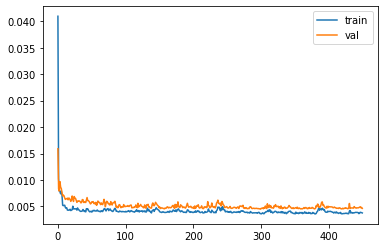

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
batch_normalization_input (Inpu [(None, 12)]         0                                            
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 12)           48          batch_normalization_input[0][0]  
__________________________________________________________________________________________________
dense (Dense)                   (None, 35)           455         batch_normalization[0][0]        
__________________________________________________________________________________________________
leaky_re_lu (LeakyReLU)         (None, 35)           0           dense[0][0]                      
______________________________________________________________________________________________

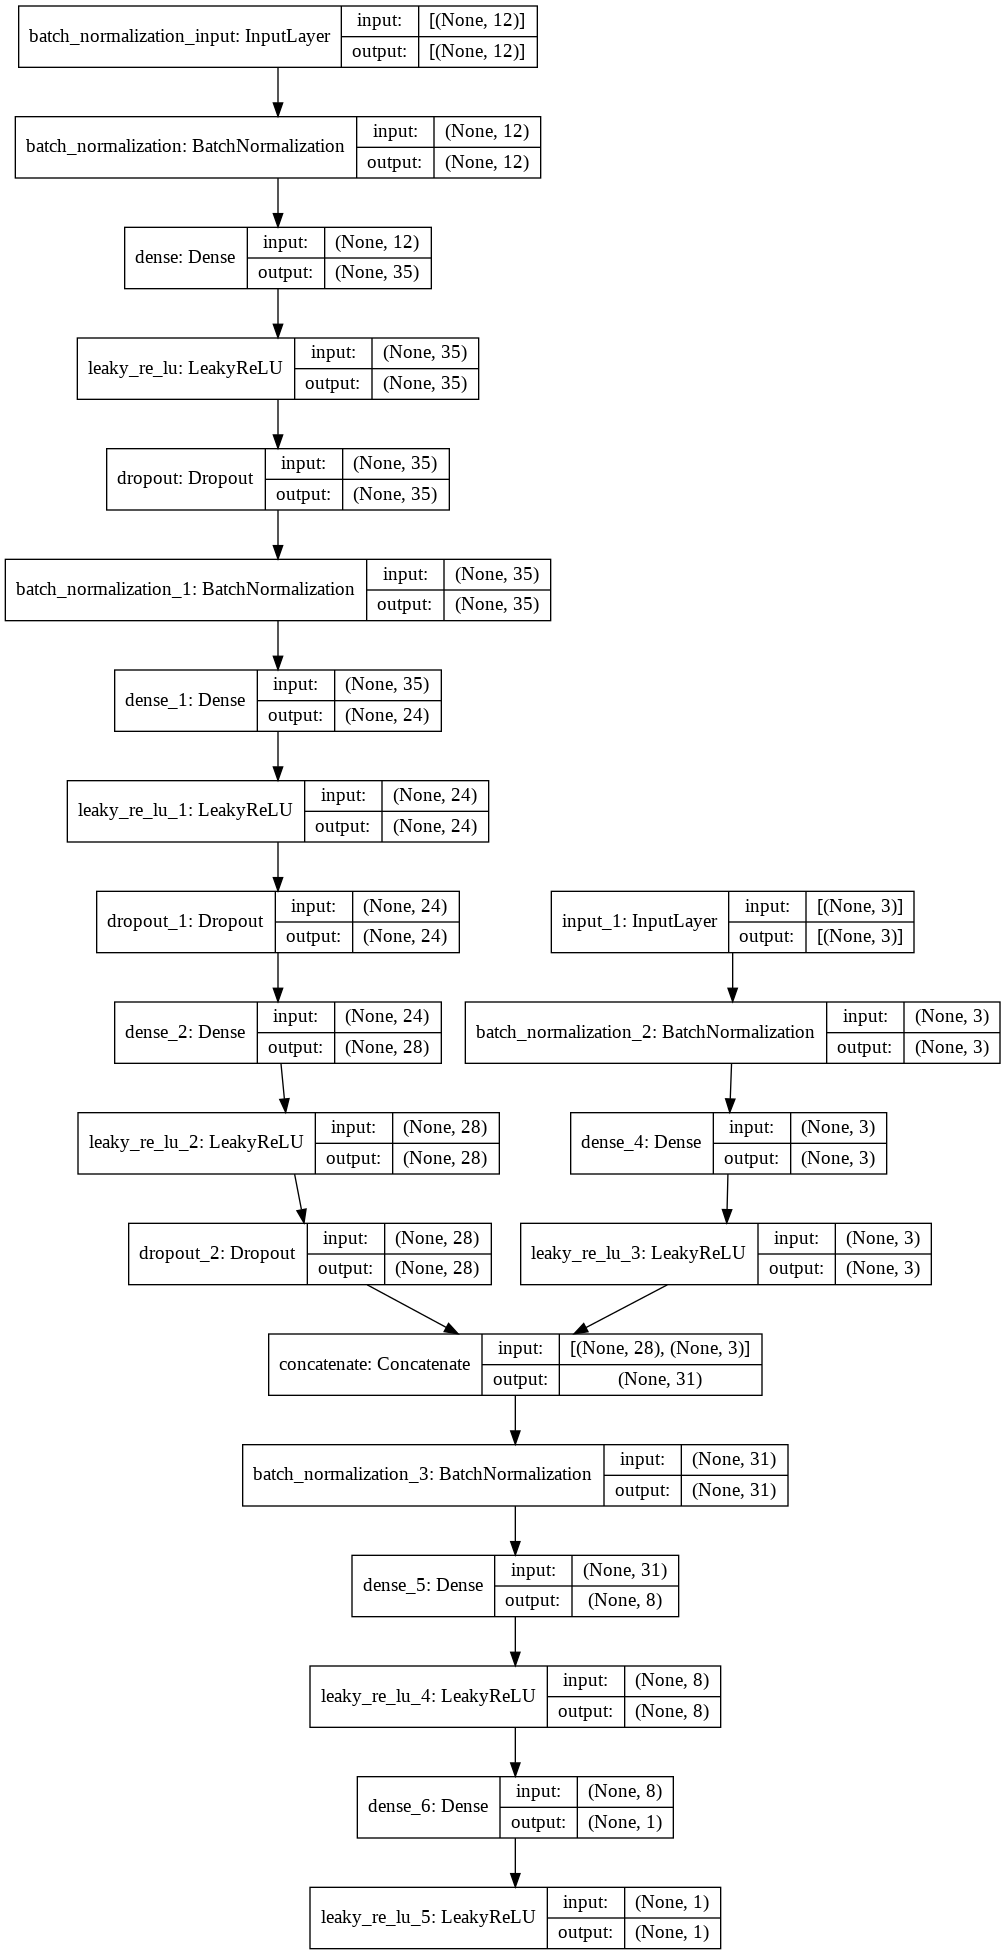

In [ ]:
model_fixed = load_model(precovid_model)
from keras.layers import Concatenate
from keras.layers.merge import concatenate
from keras.layers import Input, Dense, concatenate
from tensorflow.keras.utils import plot_model
from keras.models import Model

for i in range(0,len(model_fixed.layers)):
  model_fixed.layers[i].trainable = False

l1 = Input(shape=(3,))
l1_2 = BatchNormalization()(l1)
l2 = Dense(best_params2['num_dense_nodes1'],kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(l1_2 )
l2_2 = LeakyReLU(alpha=best_params2['alpha'])(l2)
if best_params2['two_layer'] ==1 :
      l2_3 = Dense(1,kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(l2_2 )
      merged = concatenate([model_fixed.layers[best_params2[ 'layer_back']].output,l2_3])
else :
      merged = concatenate([model_fixed.layers[best_params2[ 'layer_back']].output,l2_2])
merged2 = BatchNormalization()(merged)

if best_params2['last_layer'] ==0:
    l5_2 = Dense(1,kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(merged2)
    l5_3 = LeakyReLU(alpha=best_params2['alpha'])(l5_2)

if best_params2['last_layer'] ==1:
    l5 = Dense(best_params2['num_dense_nodes2'],kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(merged2) 
    l5_1 = LeakyReLU(alpha=best_params2['alpha'])(l5)
    l5_2 = Dense(1,kernel_initializer=initializers.RandomNormal(stddev=0.01,seed = 42),bias_initializer=initializers.Zeros())(l5_1)
    l5_3 = LeakyReLU(alpha=best_params2['alpha'])(l5_2)          

model = Model(inputs=[model_fixed.input,l1], outputs=l5_3)

opt = keras.optimizers.Adam(learning_rate=best_params2['learning_rate'])
model.compile(loss='mse',optimizer=opt)
fn_f = "gdrive/My Drive/Colab Notebooks/Stations/Training_CO_aftercovid.ckpt" 
fnn_f = os.path.dirname(fn)
# callbacks for early stopping and for learning rate reducer

callbacks_list = [
                  #KerasPruningCallback(trial, 'val_loss'),
                  #tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=self.early_stop),                     
                  tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.9, 
                                    patience=learning_rate_epochs, 
                                    verbose=0, mode='auto', min_lr=0.000001),
                  tf.keras.callbacks.ModelCheckpoint(filepath=fn_f, save_weights_only=True,
                                  monitor='val_loss',mode='min', save_best_only=True)]

history = model.fit(x=[X_traine_a,X_traine_b], y= y_traine_a,
                  validation_data=([X_val_a,X_val_b], y_val_a),
                  batch_size=int(best_params2['batchsize']),
                  epochs=maximum_epochs,
                  shuffle=True, verbose=2,
                  callbacks=callbacks_list)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()

model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

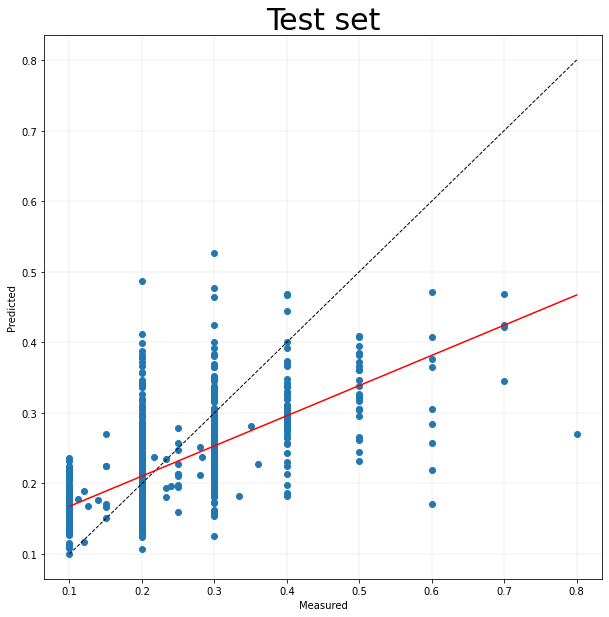

[0.42761824 0.12493499]
RMSE
[0.06297126]
R2
0.42194653306663965


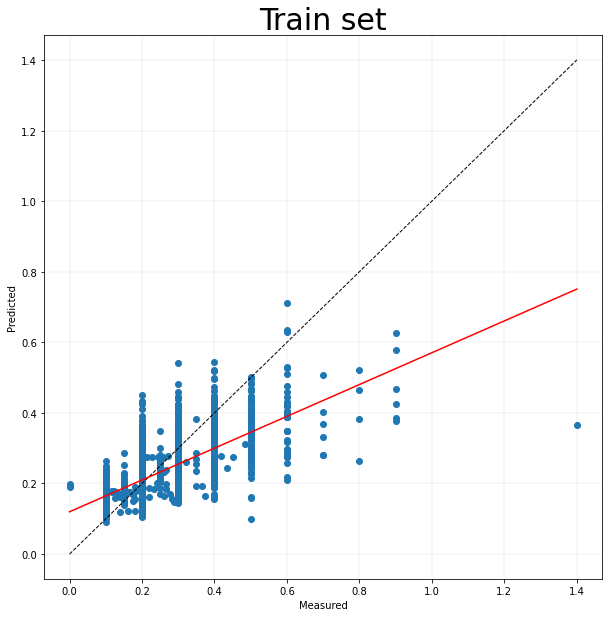

[0.45061179 0.11989867]
RMSE
[0.06110412]
R2
0.47311888956403503


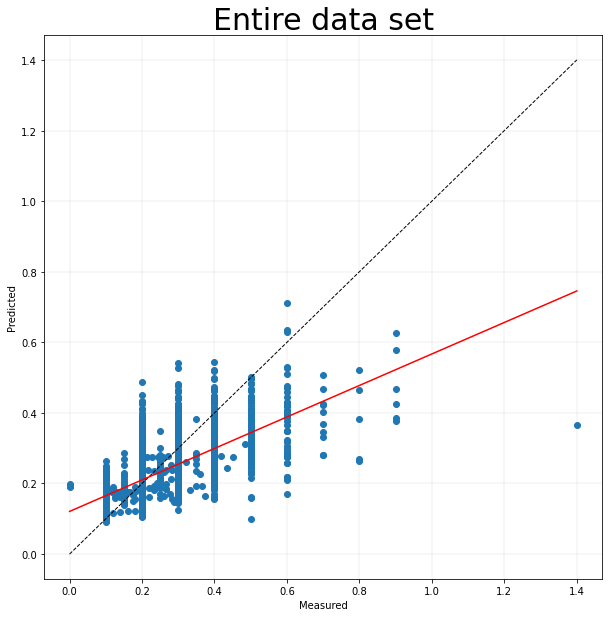

[0.4461315  0.12088052]
RMSE
[0.06148209]
R2
0.4631478722431982


In [ ]:
model.load_weights(fn_f )
model.save('gdrive/My Drive/Colab Notebooks/Model_Edmonton_east_after_Covid.h5')
preds = model.predict([X_test_a,X_test_b]) 
y_real = y_test_a.reshape(-1,1)
y_pred = preds.reshape(-1,1)

fig, ax = plt.subplots(1,1, figsize=(10,10))
y_real = np.array(y_real).reshape(-1,1)
y_pred = np.array(y_pred).reshape(-1,1)
ax.scatter(y_real, y_pred)
ax.plot([y_real.min(), y_real.max()], [y_real.min(), y_real.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('Test set',fontsize=30)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

a=y_real
b=y_pred
par= np.polyfit(a.flatten(),b.flatten(),1)

slope=par[0]
intercept=par[1]
xl = [min(a), max(a )]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, 'red')
plt.show()

print(par)
print("RMSE")
print(rmse(y_real.reshape(-1,1), y_pred.reshape(-1,1)))
print("R2")
print(sklearn.metrics.r2_score(y_real.reshape(-1,1), y_pred.reshape(-1,1)))

model.load_weights(fn_f)
preds = model.predict([X_train_a,X_train_b]) 
y_real_t = y_train_a.reshape(-1,1)
y_pred_t = preds.reshape(-1,1)

fig, ax = plt.subplots(1,1, figsize=(10,10))
y_real_t = np.array(y_real_t).reshape(-1,1)
y_pred_t = np.array(y_pred_t).reshape(-1,1)
ax.scatter(y_real_t, y_pred_t)
ax.plot([y_real_t.min(), y_real_t.max()], [y_real_t.min(), y_real_t.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('Train set',fontsize=30)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

a=y_real_t
b=y_pred_t
par= np.polyfit(a.flatten(),b.flatten(),1)
slope=par[0]
intercept=par[1]
xl = [min(a), max(a )]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, 'red')
plt.show()

print(par)
print('RMSE')
print(rmse(y_real_t.reshape(-1,1), y_pred_t.reshape(-1,1)))
print('R2')
print(sklearn.metrics.r2_score(y_real_t.reshape(-1,1), y_pred_t.reshape(-1,1)))

#TRAIN
model.load_weights(fn_f)
preds = model.predict([X_a,X_b]) 
y_real_to = Y_a.reshape(-1,1)
y_pred_to = preds.reshape(-1,1)


fig, ax = plt.subplots(1,1, figsize=(10,10))
y_real_to = np.array(y_real_to).reshape(-1,1)
y_pred_to = np.array(y_pred_to).reshape(-1,1)
ax.scatter(y_real_to, y_pred_to)
ax.plot([y_real_to.min(), y_real_to.max()], [y_real_to.min(), y_real_to.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('Entire data set',fontsize=30)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)


a=y_real_to
b=y_pred_to
par= np.polyfit(a.flatten(),b.flatten(),1)

slope=par[0]
intercept=par[1]
xl = [min(a), max(a )]
yl = [slope*xx + intercept  for xx in xl]
plt.plot(xl, yl, 'red')

plt.show()

print(par)
print('RMSE')
print(rmse(y_real_to.reshape(-1,1), y_pred_to.reshape(-1,1)))
print('R2')
print(sklearn.metrics.r2_score(y_real_to.reshape(-1,1), y_pred_to.reshape(-1,1)))

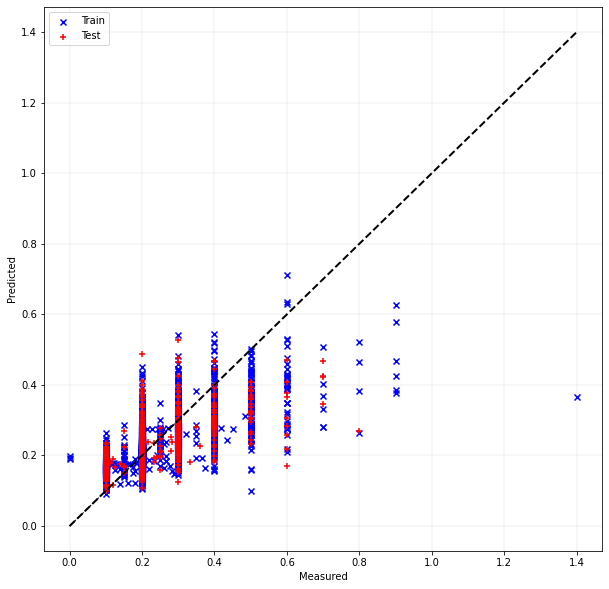

In [ ]:
import matplotlib.cm as cm
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.plot([0, max(y_real_t)], [0, max(y_real_t)], 'k--', lw=2) 

ax.scatter(y_real_t, y_pred_t, c = "blue",label = 'Train',marker="x")
ax.scatter(y_real, y_pred, c = "red", label = 'Test',marker="+", cmap=cm.brg)

ax.legend()
ax.plot([0,0.3], [0,0.3], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.show()


In [ ]:
df2_w_c

CO(ppm)  T( C)  RH(%)  ...  driving  transit  walking
Date                                        ...                           
2020-01-13 00:00:00      0.1  -25.4   68.0  ...   1.0000   1.0000   1.0000
2020-01-13 01:00:00      0.1  -25.7   68.0  ...   1.0000   1.0000   1.0000
2020-01-13 02:00:00      0.1  -25.8   66.0  ...   1.0000   1.0000   1.0000
2020-01-13 03:00:00      0.1  -25.8   65.0  ...   1.0000   1.0000   1.0000
2020-01-13 04:00:00      0.1  -26.0   65.0  ...   1.0000   1.0000   1.0000
...                      ...    ...    ...  ...      ...      ...      ...
2021-01-31 19:00:00      0.4  -15.5   76.0  ...   0.7143   0.4266   0.8011
2021-01-31 20:00:00      0.4  -15.4   78.0  ...   0.7143   0.4266   0.8011
2021-01-31 21:00:00      0.2  -15.5   79.0  ...   0.7143   0.4266   0.8011
2021-01-31 22:00:00      0.2  -16.3   80.0  ...   0.7143   0.4266   0.8011
2021-01-31 23:00:00      0.2  -16.7   81.0  ...   0.7143   0.4266   0.8011

[9075 rows x 16 columns]

In [ ]:
# df3= df3.copy()
df4 = df2_w_c.copy()
df4['pred'] = model.predict([X_a,X_b])
df10 = df4.resample('D').mean()
df10.dropna(inplace= True)

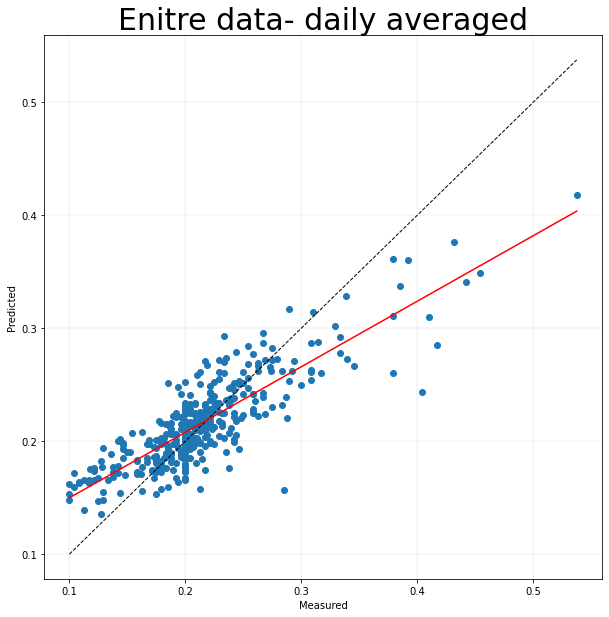

[0.57997188 0.09186987]
RMSE
[0.03240749]
R2
0.6798581783938966


In [ ]:
    fig, ax = plt.subplots(1,1, figsize=(10,10))
    y_real = np.array(df10['CO(ppm)']).reshape(-1,1)
    y_pred = np.array(df10['pred']).reshape(-1,1)
    ax.scatter(y_real, y_pred)
    ax.plot([y_real.min(), y_real.max()], [y_real.min(), y_real.max()], 'k--', lw=1)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')

    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
    ax.set_title('Enitre data- daily averaged',fontsize=30)

    a=y_real
    b=y_pred
    par= np.polyfit(a.flatten(),b.flatten(),1)
    
    slope=par[0]
    intercept=par[1]
    xl = [min(a), max(a )]
    yl = [slope*xx + intercept  for xx in xl]
    plt.plot(xl, yl, 'red')
    plt.show()
    print(par)
    print('RMSE')
    print(rmse(y_real.reshape(-1,1), y_pred.reshape(-1,1)))
    print('R2')
    print(sklearn.metrics.r2_score(y_real.reshape(-1,1), y_pred.reshape(-1,1)))


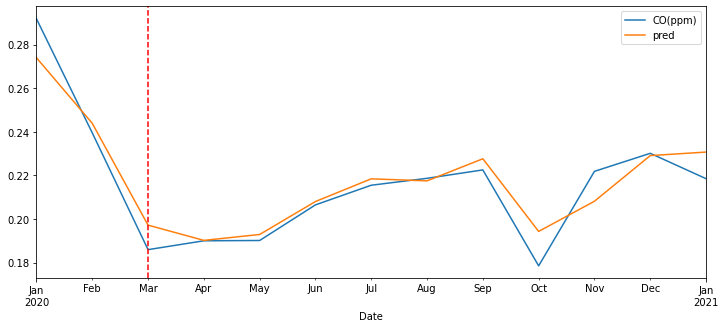

In [ ]:
df4['CO(ppm)'].resample('M').mean().plot(figsize = (12,5), legend = True)
#train['pred'].resample('H').mean().iloc[:1000].plot(figsize = (20,15), legend = True)
df4['pred'].resample('M').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 

In [ ]:
df3_w_c = df2_w_c.copy()
df3_w_c['driving'] = 1.124019
df3_w_c['transit']  = 1.025378
df3_w_c['walking'] = 1.331329

In [ ]:
Y_a = df3_w_c['CO(ppm)']
Y_a = np.array(Y_a).reshape(-1,1)
X_a = np.array(df3_w_c[['T( C)', 'RH(%)', 'Wind Dir (STD)Unknown ',
       'Wind Dir (deg)', 'Wind speed', 'Incoming Solar Rad. (W/m2)',
       'Precip. (mm)', 'hol', 'hour', 'dayofweek_num', 'Day-year', 'trend',]])
X_b =  np.array(df3_w_c[ ['driving', 'transit', 'walking']])




X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_a, Y_a, test_size=0.2, random_state=42)
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, Y_a, test_size=0.2, random_state=42)

X_traine_a, X_val_a, y_traine_a, y_val_a = train_test_split(X_train_a, y_train_a, test_size=0.25, random_state = 42)
X_traine_b, X_val_b, y_traine_b, y_val_b = train_test_split(X_train_b, y_train_b, test_size=0.25, random_state = 42)

maximum_epochs = 450
early_stop_epochs= 60
learning_rate_epochs = 30
optimizer_direction = 'minimize'
number_of_random_points = 30  # random searches to start opt process
maximum_time = 8*60*60  # seconds

In [ ]:
# df3= df3.copy()
df44 = df3_w_c.copy()
df44['No lockdown'] = model.predict([X_a,X_b])
df104 = df44.resample('D').mean()
df104.dropna(inplace= True)

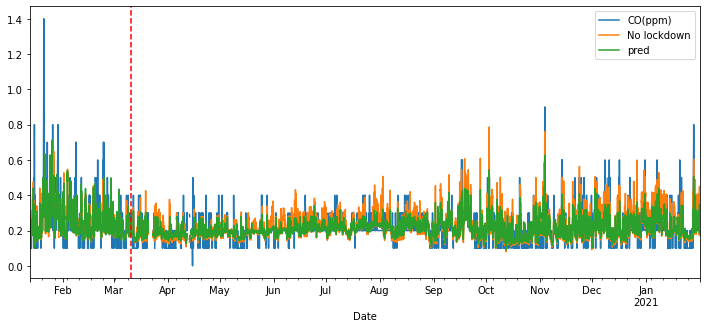

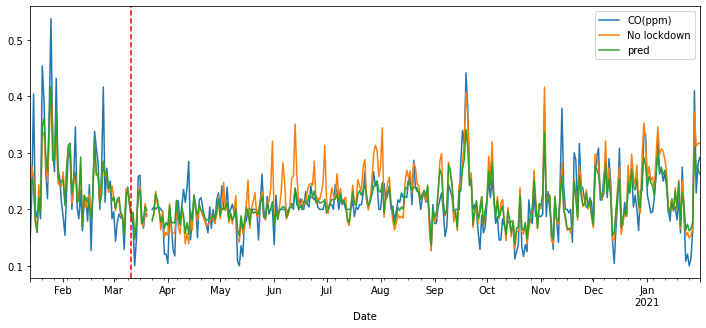

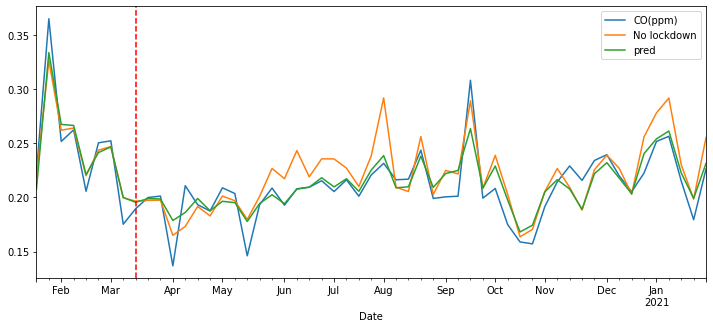

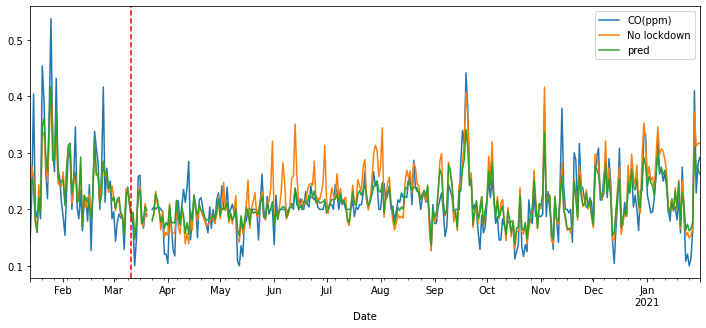

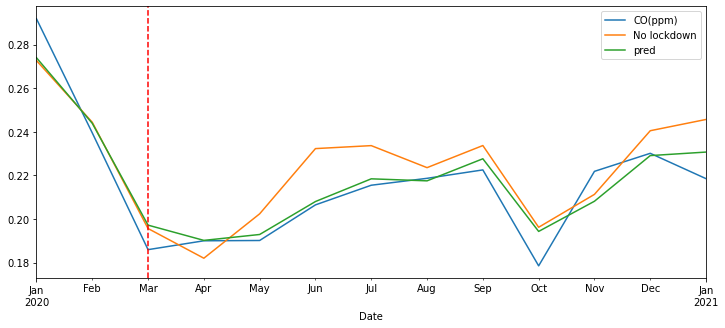

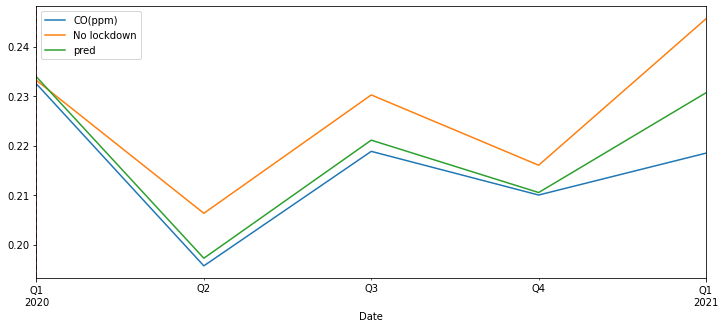

In [ ]:


df4['CO(ppm)'].resample('H').mean().plot(figsize = (12,5), legend = True)
df44['No lockdown'].resample('H').mean().plot(figsize = (12,5), legend = True)
df4['pred'].resample('H').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()

df4['CO(ppm)'].resample('D').mean().plot(figsize = (12,5), legend = True)
df44['No lockdown'].resample('D').mean().plot(figsize = (12,5), legend = True)
df4['pred'].resample('D').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()

df4['CO(ppm)'].resample('W').mean().plot(figsize = (12,5), legend = True)
df44['No lockdown'].resample('W').mean().plot(figsize = (12,5), legend = True)
df4['pred'].resample('W').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()
df4['CO(ppm)'].resample('D').mean().plot(figsize = (12,5), legend = True)
df44['No lockdown'].resample('D').mean().plot(figsize = (12,5), legend = True)
df4['pred'].resample('D').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()

df4['CO(ppm)'].resample('M').mean().plot(figsize = (12,5), legend = True)
df44['No lockdown'].resample('M').mean().plot(figsize = (12,5), legend = True)
df4['pred'].resample('M').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()

df4['CO(ppm)'].resample('Q').mean().plot(figsize = (12,5), legend = True)
df44['No lockdown'].resample('Q').mean().plot(figsize = (12,5), legend = True)
df4['pred'].resample('Q').mean().plot(figsize = (12,5), legend = True)
plt.axvline(x = '2020-03-11', color = 'red',linestyle ="--", label = 'axvline - full height') 
plt.show()

In [ ]:
df4['No lockdown']=df44['No lockdown'].copy()
print('No lockdown:',df4['No lockdown'].mean())
print('pred:',df4['pred'].mean())
print('CO(ppm):',df4['CO(ppm)'].mean())

No lockdown: 0.22312191128730774
pred: 0.2163834571838379
CO(ppm): 0.21406886884590973


In [ ]:
df4.head()

CO(ppm)  T( C)  RH(%)  ...  walking      pred  No lockdown
Date                                        ...                                
2020-01-13 00:00:00      0.1  -25.4   68.0  ...      1.0  0.144256     0.140617
2020-01-13 01:00:00      0.1  -25.7   68.0  ...      1.0  0.154986     0.151347
2020-01-13 02:00:00      0.1  -25.8   66.0  ...      1.0  0.158600     0.154960
2020-01-13 03:00:00      0.1  -25.8   65.0  ...      1.0  0.166749     0.168830
2020-01-13 04:00:00      0.1  -26.0   65.0  ...      1.0  0.185634     0.212358

[5 rows x 18 columns]

In [ ]:
df4.to_csv('gdrive/My Drive/Colab Notebooks/Edmonton East/NOX_mobility_aftercov_Edmonton_east-COVID_hourly_pred.csv')

In [ ]:
df4

NOX(ppm)  T( C)  RH(%)  ...  walking      pred  No lockdown
Date                                         ...                                
2020-01-13 00:00:00    0.0084  -25.4   68.0  ...   1.0000  0.012064     0.011699
2020-01-13 01:00:00    0.0078  -25.7   68.0  ...   1.0000  0.015269     0.014904
2020-01-13 02:00:00    0.0053  -25.8   66.0  ...   1.0000  0.015456     0.015090
2020-01-13 03:00:00    0.0050  -25.8   65.0  ...   1.0000  0.018650     0.018285
2020-01-13 04:00:00    0.0069  -26.0   65.0  ...   1.0000  0.023630     0.023264
...                       ...    ...    ...  ...      ...       ...          ...
2021-01-31 19:00:00    0.1137  -15.5   76.0  ...   0.8011  0.037565     0.041811
2021-01-31 20:00:00    0.1007  -15.4   78.0  ...   0.8011  0.024746     0.028993
2021-01-31 21:00:00    0.0515  -15.5   79.0  ...   0.8011  0.019648     0.023895
2021-01-31 22:00:00    0.0502  -16.3   80.0  ...   0.8011  0.030382     0.034629
2021-01-31 23:00:00    0.0408  -16.7   81.0  ...   0.8011  0.025745     0.029992

[9075 rows x 18 columns]